In [55]:
import pandas as pd
import sys
sys.path.append("/Users/maeva/Desktop/Modeling_trophosome/src/")
#sys.path.append("/home/qiulab/data/CRF_project/work/Modeling_trophosome/src/")

from project_package.generate_pop import generate_initial_pop_unlinked, generate_random_fisherlog_pop_unlinked,generate_random_fisherlog_pop_binomial_tree, SymPop
from project_package.update_pop import update_pop3
from project_package.run_model import run_generation_of_host_pop
from project_package.plot import visualize_pop
from project_package.simplify import merge_graphs

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing
from alive_progress import alive_bar

import time


# import seaborn as sns
%matplotlib inline
%reload_ext autoreload
%autoreload 2
# np.random.seed(666)

for myparams in [['toy_example1',1E-12,1E-2],['toyexample1_high_mutation_rate',1E-8,1E-2],['toy_example1_high_escape_rate',1E-12,1E-1]]:

    test=myparams[0]
    
    ## init results objects    
    time_series_freeliving={}
    time_series_hostassociated={}
    
    ## params grow_and_steady
    mutation_rate=myparams[1]
    growth_factor=1.2
    steady_state_runtime=50
    max_runtime=np.inf
    pop_size_thr=1E6
    simplify=1
    verbose=0
    sampling_rate=1
    
    ## params run_host_pop_gen
    n_worms=10
    infection_sym_count=10
    tot_host_pop_gen=100
    escape_rate=myparams[2]
    n_trials=20
    cpus=4
    
    # init tree log-fisher
    init_pop_strains=100
    is_init_pop_log_fisher=True
    
    if is_init_pop_log_fisher==True:  
        freelivingG=generate_random_fisherlog_pop_unlinked(i=init_pop_strains) #n=individuals, i=strains
        freelivingG=nx.relabel_nodes(freelivingG, dict([[i,'0.0.'+str(i)] for i in range(init_pop_strains)]))
        
    ## init tree
    
    # fitnesses=[0.95,0.9] # allele_id:fitness
    # abundances=[300000000,700000000] # allele_id:abundance # total 1G cells
    # freelivingG=generate_initial_pop_unlinked(fitnesses,abundances)
    # freelivingG=nx.relabel_nodes(freelivingG, {0:'0.0.0',1:'0.0.1'})
    # time_series_freeliving[0]=freelivingG
    
    
    
    
    myparams=['## params grow_and_steady',
    'mutation_rate='+str(mutation_rate),
    'growth_factor='+str(growth_factor),
    'steady_state_runtime='+str(steady_state_runtime),
    'max_runtime='+str(max_runtime),
    'pop_size_thr='+str(pop_size_thr),
    'simplify='+str(simplify),
    'verbose='+str(verbose),
    'sampling_rate='+str(sampling_rate),
    '',
    '## params run_host_pop_gen',
    'n_worms='+str(n_worms),
    'infection_sym_count='+str(infection_sym_count),
    'tot_host_pop_gen='+str(tot_host_pop_gen),
    'escape_rate='+str(escape_rate),
    'n_trials='+str(n_trials),
    'cpus='+str(cpus),
    '',
    '## init tree',
    'init_pop_strains='+str(init_pop_strains),
    'is_init_pop_log_fisher='+str(is_init_pop_log_fisher)]
    
    
    print(SymPop(freelivingG).pop_size)
    time_series_freeliving[0]=freelivingG
    
    
    ###############################
    ## init results objects    
    time_series_freeliving={}
    time_series_hostassociated={}
    
    start_time=time.time()
    
    with alive_bar((tot_host_pop_gen+1) * n_trials ,force_tty=True) as bar:
        for trial in range(n_trials):
            host_pop_gen=0
            time_series_freeliving[trial]=[freelivingG]
            time_series_hostassociated[trial]=[nx.Graph()]
            myfreelivingG=freelivingG.copy()
        
            for host_pop_gen in range(1,tot_host_pop_gen+1):
            
                merged_Graph_hostassociated, merged_Graph_freeliving,_=run_generation_of_host_pop(myfreelivingG, n_worms, infection_sym_count,host_pop_gen,escape_rate,
                                     mutation_rate, steady_state_runtime,
                                     max_runtime, growth_factor=growth_factor,
                                     stop_when_fixed=True, pop_size_thr=pop_size_thr, simplify=simplify,
                                     verbose=verbose, t=0,sampling_rate=sampling_rate,nthreads=cpus)
                
                time_series_hostassociated[trial]+=[merged_Graph_hostassociated]
                time_series_freeliving[trial]+=[merged_Graph_freeliving]
                myfreelivingG=merged_Graph_freeliving
                
                bar() 
    print('finished')
    
    print('it took', time.time()-start_time, 'seconds')
    
    ###########
    
    
    dump_dir='../examples/'
    
    with open(dump_dir+test+'.input_params.txt', 'w') as fa:
        fa.write('\n'.join(myparams))
    
    with open(dump_dir+test+'.time_series_hostassociated.txt', 'wb') as handle:
      pickle.dump(time_series_hostassociated, handle)
    
    with open(dump_dir+test+'.time_series_freeliving.txt', 'wb') as handle:
      pickle.dump(time_series_freeliving, handle)

4335
|                                        | ▂▄▆ 0/2020 [0%] in 0s (~0s, 0.0/s) 

python(96551) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96552) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96553) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96554) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|                                        | █▆▄ 0/2020 [0%] in 4s (~0s, 0.0/s) 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|                                        | ▅▃▁ 1/2020 [0%] in 4s (~2:25:11, 0.2/

python(96558) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96559) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96560) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96561) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|                                        | ▂▄▆ 1/2020 [0%] in 6s (~2:51:13, 0.2/

python(96564) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96565) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96566) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96567) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|                                        | ▅▃▁ 2/2020 [0%] in 9s (~2:23:36, 0.2/

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|                                        | ▃▁▃ 2/2020 [0%] in 10s (~2:33:15, 0.2

python(96576) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96577) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96578) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96579) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|                                        | ▅▃▁ 3/2020 [0%] in 15s (~2:31:22, 0.2

python(96586) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96587) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96588) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96589) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▏                                       | ▃▅▇ 4/2020 [0%] in 17s (~2:17:53, 0.2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(96593) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96594) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96595) MallocStackLogging: can't 

|▏                                       | ▅▃▁ 5/2020 [0%] in 20s (~2:06:12, 0.3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|▏                                       | ▄▂▂ 5/2020 [0%] in 45s (~2:20:03, 0.2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|▏                                       | ▁▃▅ 5/2020 [0%] in 56s (~3:40:50, 0.1

python(96633) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96634) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96635) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96636) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▏                                       | ▆█▆ 6/2020 [0%] in 1:04 (~5:48:38, 0.

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|▏                                       | ▇▇▅ 6/2020 [0%] in 1:04 (~5:51:05, 0.

python(96644) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96646) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96647) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▏                                       | █▆▄ 9/2020 [0%] in 1:16 (~4:56:45, 0.

python(96648) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(96653) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96654) MallocStackLogging: can't 

|▎                                       | ▂▄▆ 10/2020 [0%] in 1:20 (~4:48:29, 0

turn off malloc stack logging because it was not enabled.
python(96655) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96656) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(96660) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96661) MallocStackLogging: can't turn off malloc stack logging becau

|▎                                       | ▇▇▅ 10/2020 [0%] in 1:22 (~4:35:26, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(96673) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96674) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96675) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96676) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▎                                       | ▂▂▄ 11/2020 [1%] in 1:25 (~4:17:39, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(96680) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96681) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96682) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▎                                       | ▁▃▅ 12/2020 [1%] in 1:25 (~4:14:21, 0

python(96683) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▎                                       | ▅▃▁ 12/2020 [1%] in 1:29 (~4:06:07, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|▎                                       | ▂▄▆ 13/2020 [1%] in 1:31 (~3:56:50, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(96691) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96692) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96693) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96694) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▎                                       | ▄▆█ 13/2020 [1%] in 1:32 (~3:56:24, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|▎                                       | ▅▇▇ 14/2020 [1%] in 1:33 (~3:53:58, 0

python(96696) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96697) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96698) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96699) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▎                                       | ▅▃▁ 14/2020 [1%] in 1:35 (~3:46:21, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|▎                                       | ▄▂▂ 14/2020 [1%] in 1:35 (~3:46:35, 0

python(96701) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96702) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96703) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96704) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▎                                       | ▄▆█ 15/2020 [1%] in 1:38 (~3:38:11, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(96707) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96708) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96709) MallocStackLogging: can't 

|▍                                       | ▁▃▅ 16/2020 [1%] in 1:42 (~3:31:11, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(96715) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96716) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96719) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96720) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▍                                       | ▅▃▁ 17/2020 [1%] in 1:46 (~3:26:35, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|▍                                       | ▄▂▂ 18/2020 [1%] in 1:47 (~3:25:20, 0

python(96726) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96727) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▍                                       | ▂▄▆ 18/2020 [1%] in 1:48 (~3:21:17, 0

python(96728) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96729) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▍                                       | ▆█▆ 18/2020 [1%] in 1:50 (~3:21:52, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|▍                                       | ▇▇▅ 18/2020 [1%] in 1:50 (~3:22:22, 0

python(96733) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96734) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96735) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▍                                       | ▂▄▆ 20/2020 [1%] in 1:54 (~3:16:27, 0

python(96736) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(96738) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96739) MallocStackLogging: can't 

|▍                                       | █▆▄ 20/2020 [1%] in 1:56 (~3:12:42, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|▍                                       | ▇▅▃ 21/2020 [1%] in 1:56 (~3:11:28, 0

python(96748) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96749) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96750) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96752) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▍                                       | ▆▄▂ 21/2020 [1%] in 2:04 (~3:14:00, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|▍                                       | ▅▃▁ 21/2020 [1%] in 2:04 (~3:14:38, 0

python(96757) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96758) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96759) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96760) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▍                                       | ▇▇▅ 22/2020 [1%] in 2:14 (~3:13:19, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(96770) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96771) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96772) MallocStackLogging: can't 

|▌                                       | ▁▃▅ 23/2020 [1%] in 2:18 (~3:17:35, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(96774) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96775) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96776) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96777) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▌                                       | ▆▄▂ 24/2020 [1%] in 2:21 (~3:14:30, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(96785) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96786) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96787) MallocStackLogging: can't 

|▌                                       | ▂▂▄ 25/2020 [1%] in 2:23 (~3:11:10, 0

python(96788) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▌                                       | ▆█▆ 25/2020 [1%] in 2:25 (~3:11:36, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(96795) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96796) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96797) MallocStackLogging: can't 

|▌                                       | ▂▂▄ 26/2020 [1%] in 2:28 (~3:08:24, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(96804) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96805) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96806) MallocStackLogging: can't 

|▌                                       | ▁▃▅ 27/2020 [1%] in 2:28 (~3:07:32, 0

python(96807) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▌                                       | ▇▅▃ 27/2020 [1%] in 2:32 (~3:05:20, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(96809) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96810) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96811) MallocStackLogging: can't 

|▌                                       | ▅▃▁ 28/2020 [1%] in 2:32 (~3:03:43, 0

python(96812) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▌                                       | ▅▇▇ 28/2020 [1%] in 2:35 (~3:03:03, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(96818) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96819) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▋                                       | █▆▄ 31/2020 [2%] in 2:42 (~2:56:02, 0

python(96820) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96821) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(96822) MallocStackLogging: can't 

|▋                                       | ▂▂▄ 32/2020 [2%] in 2:44 (~2:53:54, 0

turn off malloc stack logging because it was not enabled.
python(96823) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96824) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96825) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.p

|▋                                       | ▆█▆ 32/2020 [2%] in 2:46 (~2:51:47, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(96838) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96839) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96840) MallocStackLogging: can't 

|▋                                       | ▁▃▅ 33/2020 [2%] in 2:50 (~2:49:26, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|▋                                       | ▂▄▆ 34/2020 [2%] in 2:50 (~2:48:54, 0

python(96842) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96843) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96844) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96845) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▋                                       | █▆▄ 34/2020 [2%] in 2:58 (~2:51:55, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|▋                                       | ▆▄▂ 34/2020 [2%] in 2:59 (~2:52:42, 0

python(96847) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96848) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96849) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96850) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▊                                       | ▂▂▄ 35/2020 [2%] in 3:06 (~2:54:28, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|▊                                       | ▁▃▅ 35/2020 [2%] in 3:06 (~2:54:49, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(96855) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96856) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96857) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▊                                       | ▅▇▇ 36/2020 [2%] in 3:08 (~2:53:04, 0

python(96858) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▊                                       | ▄▂▂ 36/2020 [2%] in 3:10 (~2:53:52, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|▊                                       | ▃▁▃ 37/2020 [2%] in 3:11 (~2:53:24, 0

python(96859) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96860) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▊                                       | █▆▄ 37/2020 [2%] in 3:14 (~2:52:35, 0

python(96861) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96862) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|▊                                       | ▇▅▃ 37/2020 [2%] in 3:15 (~2:52:51, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(96864) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96865) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96866) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96867) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▊                                       | ▆█▆ 38/2020 [2%] in 3:19 (~2:51:53, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|▊                                       | ▇▇▅ 38/2020 [2%] in 3:26 (~2:53:01, 0

python(96873) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96874) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96875) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96876) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▊                                       | ▄▆█ 39/2020 [2%] in 3:30 (~2:56:49, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(96877) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96878) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96879) MallocStackLogging: can't 

|▊                                       | ▄▂▂ 40/2020 [2%] in 3:33 (~2:55:13, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(96882) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96883) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96884) MallocStackLogging: can't 

|▊                                       | ▄▆█ 41/2020 [2%] in 3:35 (~2:53:07, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(96887) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96888) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96889) MallocStackLogging: can't 

|▉                                       | ▅▇▇ 42/2020 [2%] in 3:36 (~2:52:30, 0

python(96890) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▉                                       | ▅▃▁ 42/2020 [2%] in 3:38 (~2:50:46, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(96893) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▉                                       | ▄▂▂ 43/2020 [2%] in 3:38 (~2:50:14, 0

python(96894) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96895) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96896) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▉                                       | ▆█▆ 43/2020 [2%] in 3:41 (~2:48:58, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(96901) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96902) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96903) MallocStackLogging: can't 

|▉                                       | ▁▃▅ 44/2020 [2%] in 3:45 (~2:47:33, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(96907) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96908) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96910) MallocStackLogging: can't 

|▉                                       | ▇▇▅ 45/2020 [2%] in 3:47 (~2:45:52, 0

python(96911) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▉                                       | ▆▄▂ 45/2020 [2%] in 3:48 (~2:46:11, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(96915) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96916) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96917) MallocStackLogging: can't 

|▉                                       | ▅▃▁ 46/2020 [2%] in 3:48 (~2:45:47, 0

python(96918) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▉                                       | ▄▆█ 46/2020 [2%] in 3:51 (~2:44:44, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|▉                                       | ▅▇▇ 47/2020 [2%] in 3:51 (~2:44:18, 0

python(96920) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96921) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96922) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▉                                       | █▆▄ 47/2020 [2%] in 3:53 (~2:43:13, 0

python(96923) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▉                                       | ▄▂▂ 47/2020 [2%] in 3:54 (~2:43:14, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(96924) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96925) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96926) MallocStackLogging: can't 

|█                                       | ▂▂▄ 48/2020 [2%] in 3:55 (~2:42:23, 0

python(96927) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█                                       | ▄▆█ 48/2020 [2%] in 3:56 (~2:41:39, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█                                       | ▅▇▇ 49/2020 [2%] in 3:57 (~2:41:09, 0

python(96929) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96931) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96932) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96933) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█                                       | ▃▁▃ 49/2020 [2%] in 4:00 (~2:40:03, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(96937) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96938) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96939) MallocStackLogging: can't 

|█                                       | ▇▅▃ 50/2020 [2%] in 4:03 (~2:39:06, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(96941) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96942) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96943) MallocStackLogging: can't 

|█                                       | ▁▃▅ 51/2020 [3%] in 4:06 (~2:37:49, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█                                       | ▂▄▆ 52/2020 [3%] in 4:06 (~2:37:22, 0

python(96946) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96947) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96948) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96949) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█                                       | ▄▂▂ 52/2020 [3%] in 4:10 (~2:36:44, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█                                       | ▃▁▃ 53/2020 [3%] in 4:10 (~2:36:27, 0

python(96950) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96951) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96952) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█                                       | ▁▃▅ 53/2020 [3%] in 4:11 (~2:35:49, 0

python(96953) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█                                       | ▇▅▃ 53/2020 [3%] in 4:14 (~2:36:12, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█                                       | ▆▄▂ 53/2020 [3%] in 4:14 (~2:36:23, 0

python(96954) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96955) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96956) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96957) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█▏                                      | ▆█▆ 54/2020 [3%] in 4:18 (~2:35:47, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█▏                                      | ▇▇▅ 55/2020 [3%] in 4:18 (~2:35:30, 0

python(96958) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96959) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96960) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96961) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█▏                                      | ▂▂▄ 55/2020 [3%] in 4:24 (~2:35:03, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(96970) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96971) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96972) MallocStackLogging: can't 

|█▏                                      | ▆█▆ 56/2020 [3%] in 4:26 (~2:34:58, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(96975) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96976) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96977) MallocStackLogging: can't 

|█▏                                      | ▃▁▃ 57/2020 [3%] in 4:28 (~2:33:42, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(96986) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96987) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█▏                                      | ▂▂▄ 58/2020 [3%] in 4:29 (~2:33:20, 0

python(96988) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96989) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█▏                                      | ▇▇▅ 58/2020 [3%] in 4:31 (~2:32:29, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█▏                                      | █▆▄ 59/2020 [3%] in 4:32 (~2:32:10, 0

python(96992) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96993) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96994) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96995) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█▏                                      | ▆█▆ 59/2020 [3%] in 4:36 (~2:32:14, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█▎                                      | ▇▇▅ 60/2020 [3%] in 4:36 (~2:32:00, 0

python(97003) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97004) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97005) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97006) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█▎                                      | ▁▃▅ 60/2020 [3%] in 4:39 (~2:31:36, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97008) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97009) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█▎                                      | ▂▄▆ 61/2020 [3%] in 4:40 (~2:31:20, 0

python(97010) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97011) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█▎                                      | ▆▄▂ 61/2020 [3%] in 4:43 (~2:30:49, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97012) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97013) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█▎                                      | ▅▃▁ 62/2020 [3%] in 4:43 (~2:30:33, 0

python(97014) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97015) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█▎                                      | ▃▅▇ 62/2020 [3%] in 4:45 (~2:29:50, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█▎                                      | ▄▆█ 63/2020 [3%] in 4:46 (~2:29:31, 0

python(97018) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97019) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97020) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97021) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█▎                                      | ▆▄▂ 63/2020 [3%] in 4:48 (~2:28:42, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97022) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97023) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97024) MallocStackLogging: can't 

|█▎                                      | ▁▃▅ 64/2020 [3%] in 4:50 (~2:27:33, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97026) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97027) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97028) MallocStackLogging: can't 

|█▎                                      | █▆▄ 65/2020 [3%] in 4:52 (~2:26:10, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97030) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97031) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97032) MallocStackLogging: can't 

|█▎                                      | ▂▂▄ 66/2020 [3%] in 4:54 (~2:25:03, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97034) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97035) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97036) MallocStackLogging: can't 

|█▍                                      | ▆█▆ 67/2020 [3%] in 4:56 (~2:23:52, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97038) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97039) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97040) MallocStackLogging: can't 

|█▍                                      | ▃▁▃ 68/2020 [3%] in 4:59 (~2:22:45, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97045) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97046) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97047) MallocStackLogging: can't 

|█▍                                      | ▂▂▄ 69/2020 [3%] in 4:59 (~2:22:28, 0

python(97048) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█▍                                      | █▆▄ 69/2020 [3%] in 5:02 (~2:21:57, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97050) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97051) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97052) MallocStackLogging: can't 

|█▍                                      | ▁▃▅ 70/2020 [3%] in 5:05 (~2:21:12, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97054) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97055) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97056) MallocStackLogging: can't 

|█▍                                      | ▇▇▅ 71/2020 [4%] in 5:07 (~2:20:16, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█▍                                      | █▆▄ 71/2020 [4%] in 5:10 (~2:20:30, 0

python(97065) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97066) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97067) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97068) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█▍                                      | ▄▆█ 72/2020 [4%] in 5:14 (~2:20:59, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█▌                                      | ▅▇▇ 73/2020 [4%] in 5:14 (~2:20:48, 0

python(97069) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97070) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97071) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97072) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█▌                                      | ▅▃▁ 73/2020 [4%] in 5:16 (~2:20:21, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97075) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97076) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97077) MallocStackLogging: can't 

|█▌                                      | ▆█▆ 74/2020 [4%] in 5:19 (~2:19:39, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97081) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97082) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97083) MallocStackLogging: can't 

|█▌                                      | ▃▁▃ 75/2020 [4%] in 5:22 (~2:18:56, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97085) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97086) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97087) MallocStackLogging: can't 

|█▌                                      | ▆█▆ 76/2020 [4%] in 5:24 (~2:18:06, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97090) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97091) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97092) MallocStackLogging: can't 

|█▌                                      | ▃▁▃ 77/2020 [4%] in 5:27 (~2:17:17, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97096) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97097) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97098) MallocStackLogging: can't 

|█▋                                      | ▆█▆ 79/2020 [4%] in 5:29 (~2:16:11, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97100) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97101) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97102) MallocStackLogging: can't 

|█▋                                      | ▅▃▁ 79/2020 [4%] in 5:31 (~2:15:31, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97104) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97105) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97106) MallocStackLogging: can't 

|█▋                                      | ▃▅▇ 80/2020 [4%] in 5:33 (~2:14:36, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97109) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97110) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97111) MallocStackLogging: can't 

|█▋                                      | ▇▅▃ 81/2020 [4%] in 5:35 (~2:13:43, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97113) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97114) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97115) MallocStackLogging: can't 

|█▋                                      | ▂▄▆ 82/2020 [4%] in 5:38 (~2:12:53, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█▋                                      | ▃▅▇ 83/2020 [4%] in 5:38 (~2:12:41, 0

python(97118) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97119) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97120) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97121) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█▋                                      | ▄▂▂ 83/2020 [4%] in 5:41 (~2:12:25, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97122) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97123) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97124) MallocStackLogging: can't 

|█▋                                      | ▆█▆ 84/2020 [4%] in 5:44 (~2:11:58, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97126) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97127) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97128) MallocStackLogging: can't 

|█▋                                      | ▄▂▂ 85/2020 [4%] in 5:46 (~2:11:20, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97130) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97131) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█▊                                      | ▃▁▃ 86/2020 [4%] in 5:47 (~2:11:06, 0

python(97132) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97133) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█▊                                      | █▆▄ 86/2020 [4%] in 5:50 (~2:10:49, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97134) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97135) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97136) MallocStackLogging: can't 

|█▊                                      | ▇▅▃ 87/2020 [4%] in 5:50 (~2:10:40, 0

python(97137) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█▊                                      | ▁▃▅ 87/2020 [4%] in 5:52 (~2:10:18, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97138) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97139) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97140) MallocStackLogging: can't 

|█▊                                      | ▆█▆ 88/2020 [4%] in 5:54 (~2:09:37, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█▊                                      | ▇▇▅ 88/2020 [4%] in 5:57 (~2:09:46, 0

python(97142) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97143) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97144) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97145) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█▊                                      | ▂▂▄ 90/2020 [4%] in 6:00 (~2:09:32, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97146) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97147) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97148) MallocStackLogging: can't 

|█▊                                      | ▆█▆ 90/2020 [4%] in 6:02 (~2:09:08, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97150) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97151) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97152) MallocStackLogging: can't 

|█▊                                      | ▄▂▂ 91/2020 [5%] in 6:04 (~2:08:29, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97154) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97155) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97156) MallocStackLogging: can't 

|█▉                                      | ▃▁▃ 92/2020 [5%] in 6:04 (~2:08:16, 0

python(97157) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█▉                                      | ▄▆█ 92/2020 [5%] in 6:06 (~2:07:45, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97158) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97159) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97160) MallocStackLogging: can't 

|█▉                                      | ▅▃▁ 94/2020 [5%] in 6:08 (~2:06:50, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97162) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97163) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97164) MallocStackLogging: can't 

|█▉                                      | ▂▄▆ 94/2020 [5%] in 6:10 (~2:06:20, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97166) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97167) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97168) MallocStackLogging: can't 

|█▉                                      | █▆▄ 95/2020 [5%] in 6:12 (~2:05:38, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97170) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97171) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97172) MallocStackLogging: can't 

|█▉                                      | ▁▃▅ 96/2020 [5%] in 6:15 (~2:04:59, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97174) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97175) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97176) MallocStackLogging: can't 

|█▉                                      | ▇▇▅ 97/2020 [5%] in 6:17 (~2:04:22, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97178) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97179) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97180) MallocStackLogging: can't 

|██                                      | ▃▁▃ 98/2020 [5%] in 6:19 (~2:03:43, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97184) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97185) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97186) MallocStackLogging: can't 

|██                                      | ▇▇▅ 99/2020 [5%] in 6:22 (~2:03:09, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97189) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97190) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97191) MallocStackLogging: can't 

|██                                      | ▃▁▃ 100/2020 [5%] in 6:24 (~2:02:38, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██                                      | ▂▂▄ 101/2020 [5%] in 6:24 (~2:02:28, 

python(97193) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97194) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97195) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97196) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██                                      | ▅▇▇ 101/2020 [5%] in 6:26 (~2:02:02, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██                                      | ▆█▆ 102/2020 [5%] in 6:26 (~2:01:51, 

python(97199) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97200) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97201) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97202) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██                                      | ▅▃▁ 102/2020 [5%] in 6:28 (~2:01:26, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██                                      | ▄▂▂ 103/2020 [5%] in 6:28 (~2:01:15, 

python(97203) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97204) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97205) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97206) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██                                      | ▄▆█ 103/2020 [5%] in 6:30 (~2:00:51, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██                                      | ▅▇▇ 103/2020 [5%] in 6:31 (~2:00:55, 

python(97207) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97208) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97209) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97210) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██                                      | ▄▂▂ 104/2020 [5%] in 6:33 (~2:00:28, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97212) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97214) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97215) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97216) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▏                                     | ▄▆█ 105/2020 [5%] in 6:35 (~1:59:57, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██▏                                     | ▅▇▇ 105/2020 [5%] in 6:38 (~2:00:07, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97218) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97219) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97220) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97221) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▏                                     | ▄▂▂ 107/2020 [5%] in 6:40 (~2:00:04, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97224) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97225) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97226) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97227) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▏                                     | ▄▆█ 108/2020 [5%] in 6:43 (~1:59:35, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97228) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97229) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97230) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97231) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▏                                     | ▇▅▃ 108/2020 [5%] in 6:44 (~1:59:12, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97232) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97233) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97234) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97235) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▏                                     | ▁▃▅ 109/2020 [5%] in 6:46 (~1:58:39, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97236) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97237) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97238) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97239) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▎                                     | ▇▅▃ 111/2020 [5%] in 6:49 (~1:58:00, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97240) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97241) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97242) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97243) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▎                                     | ▁▃▅ 111/2020 [5%] in 6:51 (~1:57:42, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██▎                                     | ▂▄▆ 112/2020 [6%] in 6:52 (~1:57:33, 

python(97245) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97246) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97247) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97248) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▎                                     | █▆▄ 113/2020 [6%] in 6:54 (~1:57:05, 

python(97249) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97250) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97251) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97252) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▎                                     | ▂▂▄ 114/2020 [6%] in 6:56 (~1:56:34, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97254) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97255) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97256) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97257) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▎                                     | ▆█▆ 114/2020 [6%] in 6:58 (~1:56:15, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97258) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97259) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▎                                     | ▇▇▅ 115/2020 [6%] in 6:58 (~1:56:06, 

python(97260) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97261) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▎                                     | ▃▁▃ 115/2020 [6%] in 7:00 (~1:55:49, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97263) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97264) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97265) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97266) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▎                                     | ▅▇▇ 116/2020 [6%] in 7:02 (~1:55:23, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97267) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97268) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▍                                     | ▆█▆ 117/2020 [6%] in 7:02 (~1:55:14, 

python(97269) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97270) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▍                                     | ▄▂▂ 117/2020 [6%] in 7:05 (~1:54:56, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██▍                                     | ▃▁▃ 118/2020 [6%] in 7:05 (~1:54:48, 

python(97271) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97272) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97273) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97274) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▍                                     | ▄▆█ 118/2020 [6%] in 7:07 (~1:54:30, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97275) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97276) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97277) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97278) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▍                                     | ▅▃▁ 120/2020 [6%] in 7:09 (~1:53:53, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97279) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97280) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97281) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97282) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▍                                     | ▃▅▇ 120/2020 [6%] in 7:11 (~1:53:35, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97283) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97284) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97285) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97287) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▍                                     | ▆▄▂ 121/2020 [6%] in 7:13 (~1:53:12, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██▍                                     | ▅▃▁ 121/2020 [6%] in 7:14 (~1:53:15, 

python(97297) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97298) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97299) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97300) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▍                                     | ▃▁▃ 122/2020 [6%] in 7:25 (~1:55:11, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97309) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97310) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97311) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97312) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▍                                     | ▆█▆ 123/2020 [6%] in 7:28 (~1:54:55, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97317) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97318) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97319) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97320) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▌                                     | ▁▃▅ 125/2020 [6%] in 7:31 (~1:54:29, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97325) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97326) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97327) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97328) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▌                                     | █▆▄ 125/2020 [6%] in 7:33 (~1:54:19, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97332) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97333) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97334) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97335) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▌                                     | ▁▃▅ 126/2020 [6%] in 7:36 (~1:53:58, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97339) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97340) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97341) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97342) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▌                                     | █▆▄ 127/2020 [6%] in 7:38 (~1:53:36, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97343) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97344) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97345) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97346) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▌                                     | ▁▃▅ 128/2020 [6%] in 7:40 (~1:53:14, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97354) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97355) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97356) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97357) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▋                                     | █▆▄ 130/2020 [6%] in 7:43 (~1:52:43, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97359) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97360) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97361) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97362) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▋                                     | ▂▂▄ 130/2020 [6%] in 7:45 (~1:52:26, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██▋                                     | ▁▃▅ 131/2020 [6%] in 7:45 (~1:52:19, 

python(97364) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97365) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97366) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97367) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▋                                     | ▇▇▅ 131/2020 [6%] in 7:47 (~1:52:05, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97368) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97369) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97370) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97371) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▋                                     | ▂▂▄ 133/2020 [7%] in 7:49 (~1:51:35, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97374) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97375) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97376) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97377) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▋                                     | █▆▄ 133/2020 [7%] in 7:52 (~1:51:25, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97380) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97381) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97382) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97383) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▋                                     | ▃▅▇ 134/2020 [7%] in 7:55 (~1:51:14, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██▋                                     | ▄▆█ 135/2020 [7%] in 7:55 (~1:51:08, 

python(97386) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97387) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97388) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97389) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▋                                     | ▅▃▁ 135/2020 [7%] in 7:58 (~1:51:00, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97390) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97391) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97392) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97393) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▊                                     | ▄▆█ 137/2020 [7%] in 8:00 (~1:50:33, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97394) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97395) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97396) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97397) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▊                                     | ▆▄▂ 138/2020 [7%] in 8:02 (~1:50:09, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97399) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97400) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97401) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97402) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▊                                     | ▃▅▇ 138/2020 [7%] in 8:04 (~1:49:57, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██▊                                     | ▄▆█ 138/2020 [7%] in 8:07 (~1:50:04, 

python(97403) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97404) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97405) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97406) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▊                                     | ▅▃▁ 139/2020 [7%] in 8:09 (~1:50:10, 

python(97407) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97408) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97409) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97410) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▊                                     | ▄▆█ 141/2020 [7%] in 8:12 (~1:49:45, 

python(97411) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97412) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97413) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97414) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▊                                     | ▆▄▂ 142/2020 [7%] in 8:14 (~1:49:22, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97415) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97416) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97417) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97418) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▊                                     | ▂▄▆ 142/2020 [7%] in 8:16 (~1:49:09, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97419) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97420) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97421) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▉                                     | ▃▅▇ 143/2020 [7%] in 8:16 (~1:49:02, 

python(97422) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▉                                     | ▇▅▃ 144/2020 [7%] in 8:18 (~1:48:42, 

python(97423) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97424) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97425) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97426) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▉                                     | ▂▂▄ 144/2020 [7%] in 8:20 (~1:48:26, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97427) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97428) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97429) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97430) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▉                                     | ▇▇▅ 145/2020 [7%] in 8:22 (~1:48:05, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97432) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97433) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97434) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97435) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▉                                     | ▃▁▃ 146/2020 [7%] in 8:24 (~1:47:45, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97436) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97437) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97438) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97439) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▉                                     | ▅▇▇ 147/2020 [7%] in 8:26 (~1:47:24, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██▉                                     | ▆█▆ 148/2020 [7%] in 8:26 (~1:47:17, 

python(97440) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97441) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97442) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97443) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███                                     | ▄▂▂ 149/2020 [7%] in 8:28 (~1:46:55, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97444) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97445) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97446) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97447) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███                                     | ▄▆█ 150/2020 [7%] in 8:30 (~1:46:34, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97449) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97450) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97451) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97452) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███                                     | ▆▄▂ 150/2020 [7%] in 8:32 (~1:46:21, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97453) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97454) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97455) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97456) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███                                     | ▂▄▆ 152/2020 [8%] in 8:34 (~1:45:54, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97457) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97458) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97459) MallocStackLogging: can't 

|███                                     | █▆▄ 152/2020 [8%] in 8:36 (~1:45:39, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97461) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97462) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97463) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97464) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███                                     | ▂▂▄ 153/2020 [8%] in 8:38 (~1:45:21, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97465) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97466) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97467) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97468) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███                                     | █▆▄ 154/2020 [8%] in 8:41 (~1:45:05, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97471) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97472) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97473) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97474) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▏                                    | ▃▅▇ 155/2020 [8%] in 8:44 (~1:44:55, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███▏                                    | ▄▆█ 155/2020 [8%] in 8:48 (~1:45:04, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97480) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97481) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97482) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97483) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▏                                    | ▅▃▁ 156/2020 [8%] in 8:50 (~1:45:21, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97484) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97485) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97486) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97487) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▏                                    | ▃▅▇ 157/2020 [8%] in 8:52 (~1:45:08, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97488) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97489) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97490) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▏                                    | ▄▆█ 158/2020 [8%] in 8:52 (~1:45:02, 

python(97491) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▏                                    | ▆▄▂ 158/2020 [8%] in 8:54 (~1:44:50, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97492) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97493) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97494) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97495) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▏                                    | ▂▄▆ 160/2020 [8%] in 8:56 (~1:44:25, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97496) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97497) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97498) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97499) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▏                                    | █▆▄ 160/2020 [8%] in 8:58 (~1:44:11, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97500) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97501) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97502) MallocStackLogging: can't 

|███▎                                    | ▂▂▄ 161/2020 [8%] in 9:00 (~1:43:53, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97504) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97505) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97506) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97507) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▎                                    | ▆█▆ 162/2020 [8%] in 9:02 (~1:43:34, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97508) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97509) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97510) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97511) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▎                                    | ▃▁▃ 163/2020 [8%] in 9:05 (~1:43:17, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97512) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97513) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97514) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97515) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▎                                    | ▅▇▇ 164/2020 [8%] in 9:07 (~1:43:01, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97516) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97517) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97518) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97519) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▎                                    | ▄▂▂ 166/2020 [8%] in 9:09 (~1:42:36, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97520) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97521) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97522) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97523) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▎                                    | ▄▆█ 166/2020 [8%] in 9:11 (~1:42:25, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97524) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97525) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97526) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97527) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▎                                    | ▆▄▂ 167/2020 [8%] in 9:13 (~1:42:09, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97528) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97529) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97530) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97531) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▍                                    | ▄▆█ 168/2020 [8%] in 9:15 (~1:41:55, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97532) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97533) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97534) MallocStackLogging: can't 

|███▍                                    | ▆▄▂ 169/2020 [8%] in 9:17 (~1:41:41, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97536) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97537) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97538) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97539) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▍                                    | ▂▄▆ 170/2020 [8%] in 9:19 (~1:41:24, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97540) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97541) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97542) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97543) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▍                                    | ▆▄▂ 171/2020 [8%] in 9:22 (~1:41:10, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97544) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97545) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97546) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97547) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▍                                    | ▁▃▅ 172/2020 [9%] in 9:24 (~1:40:56, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███▍                                    | ▂▄▆ 172/2020 [9%] in 9:27 (~1:41:01, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97548) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97549) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97550) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97551) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▍                                    | █▆▄ 173/2020 [9%] in 9:29 (~1:41:05, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97552) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97553) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97554) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97555) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▌                                    | ▂▂▄ 174/2020 [9%] in 9:31 (~1:40:51, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97556) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97557) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97558) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97559) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▌                                    | ▇▇▅ 175/2020 [9%] in 9:33 (~1:40:36, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97562) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97563) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97564) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97565) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▌                                    | ▁▃▅ 176/2020 [9%] in 9:36 (~1:40:24, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97568) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▌                                    | ▂▄▆ 177/2020 [9%] in 9:36 (~1:40:20, 

python(97569) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97570) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97571) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▌                                    | ▄▂▂ 177/2020 [9%] in 9:39 (~1:40:22, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███▌                                    | ▃▁▃ 178/2020 [9%] in 9:40 (~1:40:19, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97575) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97576) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97577) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97578) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▌                                    | ▇▇▅ 178/2020 [9%] in 9:42 (~1:40:18, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97581) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97582) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97583) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97584) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▌                                    | ▃▅▇ 179/2020 [9%] in 9:46 (~1:40:14, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97586) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97587) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97588) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▋                                    | ▄▆█ 180/2020 [9%] in 9:46 (~1:40:11, 

python(97589) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▋                                    | ▆▄▂ 180/2020 [9%] in 9:48 (~1:40:05, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███▋                                    | ▅▃▁ 180/2020 [9%] in 9:48 (~1:40:07, 

python(97597) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97598) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97599) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97600) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▋                                    | ▄▆█ 181/2020 [9%] in 9:51 (~1:39:56, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97601) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97602) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97603) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97604) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▋                                    | ▄▂▂ 182/2020 [9%] in 9:54 (~1:39:46, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97605) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97606) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97607) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▋                                    | ▃▁▃ 183/2020 [9%] in 9:54 (~1:39:42, 

python(97608) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▋                                    | ▅▇▇ 183/2020 [9%] in 9:56 (~1:39:35, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███▋                                    | ▆█▆ 184/2020 [9%] in 9:56 (~1:39:30, 

python(97612) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97613) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97614) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97615) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▋                                    | ▄▂▂ 184/2020 [9%] in 9:58 (~1:39:23, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97618) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97619) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97620) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97621) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▋                                    | ▇▇▅ 185/2020 [9%] in 10:01 (~1:39:14,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97626) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97627) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97628) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97629) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▋                                    | ▃▁▃ 186/2020 [9%] in 10:03 (~1:39:03,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97630) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97631) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97632) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97633) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▊                                    | ▆█▆ 187/2020 [9%] in 10:05 (~1:38:49,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97634) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97635) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97636) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97637) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███▊                                    | ▃▁▃ 188/2020 [9%] in 10:10 (~1:38:40,

python(97640) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97641) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97642) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97643) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▊                                    | ▄▂▂ 189/2020 [9%] in 10:14 (~1:38:59,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97655) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97656) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97657) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97658) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▊                                    | ▆█▆ 190/2020 [9%] in 10:17 (~1:38:53,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97663) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97664) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97665) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▊                                    | ▇▇▅ 191/2020 [9%] in 10:17 (~1:38:49,

python(97666) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▊                                    | ▃▁▃ 191/2020 [9%] in 10:19 (~1:38:42,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97668) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97669) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97670) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97671) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▊                                    | ▅▇▇ 192/2020 [10%] in 10:21 (~1:38:29

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97672) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97673) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97674) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97675) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▉                                    | ▅▃▁ 193/2020 [10%] in 10:23 (~1:38:14

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97676) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97677) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97678) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▉                                    | ▄▂▂ 194/2020 [10%] in 10:23 (~1:38:09

python(97679) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▉                                    | ▃▅▇ 194/2020 [10%] in 10:25 (~1:37:59

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97680) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97681) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97682) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97683) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▉                                    | ▆▄▂ 195/2020 [10%] in 10:27 (~1:37:45

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97684) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97685) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97686) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97687) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▉                                    | ▂▄▆ 196/2020 [10%] in 10:29 (~1:37:32

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███▉                                    | ▃▅▇ 196/2020 [10%] in 10:30 (~1:37:33

python(97688) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97689) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97690) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97691) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▉                                    | ▇▅▃ 197/2020 [10%] in 10:32 (~1:37:21

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97692) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97693) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97694) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97695) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▉                                    | ▁▃▅ 198/2020 [10%] in 10:34 (~1:37:07

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97696) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97697) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97698) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97699) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████                                    | ▇▇▅ 199/2020 [10%] in 10:36 (~1:36:52

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97700) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97701) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97702) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97703) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████                                    | ▂▂▄ 200/2020 [10%] in 10:38 (~1:36:39

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97704) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97705) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97706) MallocStackLogging: can't 

|████                                    | ▇▇▅ 201/2020 [10%] in 10:40 (~1:36:27

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97708) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97709) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97710) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97711) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████                                    | ▂▂▄ 202/2020 [10%] in 10:42 (~1:36:16

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97712) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97713) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97714) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97715) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████                                    | ▆█▆ 203/2020 [10%] in 10:44 (~1:36:04

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████                                    | ▇▇▅ 204/2020 [10%] in 10:45 (~1:35:59

python(97716) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97717) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97718) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97719) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████                                    | ▃▁▃ 204/2020 [10%] in 10:47 (~1:35:52

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97720) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97721) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97722) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97723) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████                                    | ▅▇▇ 205/2020 [10%] in 10:49 (~1:35:39

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████                                    | ▆█▆ 205/2020 [10%] in 10:51 (~1:35:44

python(97724) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97725) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97726) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97727) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▏                                   | ▄▂▂ 206/2020 [10%] in 10:53 (~1:35:47

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97728) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97729) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97730) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97731) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▏                                   | ▄▆█ 207/2020 [10%] in 10:55 (~1:35:36

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97732) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97733) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97734) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97735) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▏                                   | ▆▄▂ 208/2020 [10%] in 10:57 (~1:35:23

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97736) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97737) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97738) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97739) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▏                                   | ▂▄▆ 209/2020 [10%] in 10:59 (~1:35:09

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97740) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97741) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97742) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97743) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▏                                   | █▆▄ 210/2020 [10%] in 11:01 (~1:34:56

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97744) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97745) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97746) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97747) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▎                                   | ▁▃▅ 212/2020 [10%] in 11:03 (~1:34:38

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97748) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97749) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97750) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97751) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▎                                   | ▇▇▅ 212/2020 [10%] in 11:05 (~1:34:30

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97752) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97753) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97754) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▎                                   | █▆▄ 213/2020 [11%] in 11:06 (~1:34:26

python(97755) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▎                                   | ▂▂▄ 213/2020 [11%] in 11:08 (~1:34:20

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97756) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97757) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▎                                   | ▁▃▅ 214/2020 [11%] in 11:08 (~1:34:16

python(97758) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97759) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▎                                   | ▇▇▅ 214/2020 [11%] in 11:10 (~1:34:10

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97760) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97761) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97762) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97763) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▎                                   | ▃▁▃ 215/2020 [11%] in 11:12 (~1:33:59

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97764) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97765) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97766) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97767) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▎                                   | ▆█▆ 217/2020 [11%] in 11:14 (~1:33:42

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97768) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97769) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97770) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97771) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▎                                   | ▄▂▂ 217/2020 [11%] in 11:16 (~1:33:35

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97772) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97773) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97774) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97775) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▍                                   | ▄▆█ 218/2020 [11%] in 11:18 (~1:33:24

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████▍                                   | ▅▇▇ 219/2020 [11%] in 11:19 (~1:33:20

python(97776) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97777) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97778) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97779) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▍                                   | ▆▄▂ 219/2020 [11%] in 11:20 (~1:33:12

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97780) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97781) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97782) MallocStackLogging: can't 

|████▍                                   | ▃▅▇ 221/2020 [11%] in 11:23 (~1:32:55

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97784) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97785) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97786) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97787) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▍                                   | ▇▅▃ 221/2020 [11%] in 11:25 (~1:32:48

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████▍                                   | ▆▄▂ 221/2020 [11%] in 11:27 (~1:32:52

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97788) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97789) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97790) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97791) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▍                                   | ▃▅▇ 222/2020 [11%] in 11:29 (~1:32:55

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97801) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97802) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97803) MallocStackLogging: can't 

|████▍                                   | ▇▅▃ 223/2020 [11%] in 11:31 (~1:32:46

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97805) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97806) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97807) MallocStackLogging: can't 

|████▍                                   | ▂▄▆ 224/2020 [11%] in 11:33 (~1:32:35

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97809) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97810) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97811) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97812) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▌                                   | █▆▄ 225/2020 [11%] in 11:35 (~1:32:24

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97813) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97814) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97815) MallocStackLogging: can't 

|████▌                                   | ▂▂▄ 226/2020 [11%] in 11:37 (~1:32:12

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97817) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97818) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97819) MallocStackLogging: can't 

|████▌                                   | ▇▇▅ 227/2020 [11%] in 11:40 (~1:32:01

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97821) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97822) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97823) MallocStackLogging: can't 

|████▌                                   | █▆▄ 228/2020 [11%] in 11:40 (~1:31:57

python(97824) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▌                                   | ▂▄▆ 229/2020 [11%] in 11:43 (~1:31:50

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97825) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97826) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97827) MallocStackLogging: can't 

|████▌                                   | █▆▄ 229/2020 [11%] in 11:44 (~1:31:45

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97829) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97830) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97831) MallocStackLogging: can't 

|████▌                                   | ▇▅▃ 230/2020 [11%] in 11:45 (~1:31:41

python(97832) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▌                                   | ▁▃▅ 230/2020 [11%] in 11:47 (~1:31:36

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97833) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97834) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97835) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97836) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▋                                   | ▇▇▅ 231/2020 [11%] in 11:49 (~1:31:26

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97837) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97838) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97839) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97840) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▋                                   | ▂▂▄ 233/2020 [12%] in 11:51 (~1:31:10

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97841) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97842) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97843) MallocStackLogging: can't 

|████▋                                   | ▆█▆ 234/2020 [12%] in 11:53 (~1:30:59

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97845) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97846) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97847) MallocStackLogging: can't 

|████▋                                   | ▃▁▃ 234/2020 [12%] in 11:55 (~1:30:54

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████▋                                   | ▂▂▄ 234/2020 [12%] in 11:56 (~1:30:55

python(97850) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97851) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97852) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97853) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▋                                   | █▆▄ 235/2020 [12%] in 11:58 (~1:30:50

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97854) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97855) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▋                                   | ▇▅▃ 236/2020 [12%] in 11:59 (~1:30:47

python(97856) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97857) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▊                                   | ▂▄▆ 237/2020 [12%] in 12:01 (~1:30:39

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97858) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97859) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97860) MallocStackLogging: can't 

|████▊                                   | █▆▄ 237/2020 [12%] in 12:03 (~1:30:33

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97862) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97863) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97864) MallocStackLogging: can't 

|████▊                                   | ▂▂▄ 238/2020 [12%] in 12:05 (~1:30:23

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████▊                                   | ▁▃▅ 238/2020 [12%] in 12:07 (~1:30:27

python(97866) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97867) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97868) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97869) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▊                                   | ▇▇▅ 239/2020 [12%] in 12:09 (~1:30:29

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97870) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97871) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97872) MallocStackLogging: can't 

|████▊                                   | ▃▁▃ 240/2020 [12%] in 12:11 (~1:30:20

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97874) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97875) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97876) MallocStackLogging: can't 

|████▊                                   | ▅▇▇ 242/2020 [12%] in 12:13 (~1:30:05

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97878) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97879) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97880) MallocStackLogging: can't 

|████▊                                   | ▅▃▁ 242/2020 [12%] in 12:15 (~1:29:57

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97882) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97883) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97884) MallocStackLogging: can't 

|████▊                                   | ▃▅▇ 243/2020 [12%] in 12:17 (~1:29:47

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97886) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97887) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97888) MallocStackLogging: can't 

|████▉                                   | ▇▅▃ 244/2020 [12%] in 12:19 (~1:29:37

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97890) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97891) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97892) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97893) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▉                                   | ▁▃▅ 245/2020 [12%] in 12:21 (~1:29:26

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97894) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97895) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97896) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97897) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▉                                   | █▆▄ 246/2020 [12%] in 12:23 (~1:29:16

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████▉                                   | ▇▅▃ 247/2020 [12%] in 12:24 (~1:29:12

python(97898) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97899) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97900) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97901) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▉                                   | ▁▃▅ 247/2020 [12%] in 12:26 (~1:29:08

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████▉                                   | ▂▄▆ 248/2020 [12%] in 12:26 (~1:29:04

python(97902) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97903) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97904) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97905) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▉                                   | ▇▇▅ 248/2020 [12%] in 12:28 (~1:28:59

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97906) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97907) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97908) MallocStackLogging: can't 

|████▉                                   | █▆▄ 249/2020 [12%] in 12:28 (~1:28:55

python(97909) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████                                   | ▂▂▄ 250/2020 [12%] in 12:30 (~1:28:44

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97910) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97911) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97912) MallocStackLogging: can't 

|█████                                   | ▆█▆ 251/2020 [12%] in 12:32 (~1:28:34

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97914) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97915) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97916) MallocStackLogging: can't 

|█████                                   | ▅▃▁ 251/2020 [12%] in 12:33 (~1:28:27

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97919) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97920) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████                                   | ▄▂▂ 252/2020 [12%] in 12:34 (~1:28:24

python(97921) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97922) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████                                   | ▅▇▇ 252/2020 [12%] in 12:36 (~1:28:19

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97923) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97924) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97925) MallocStackLogging: can't 

|█████                                   | ▅▃▁ 253/2020 [13%] in 12:38 (~1:28:11

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97927) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97928) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97929) MallocStackLogging: can't 

|█████                                   | ▃▅▇ 254/2020 [13%] in 12:40 (~1:28:01

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97931) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97932) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97933) MallocStackLogging: can't 

|█████                                   | ▇▅▃ 255/2020 [13%] in 12:44 (~1:28:03

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97935) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97936) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97937) MallocStackLogging: can't 

|█████▏                                  | ▁▃▅ 256/2020 [13%] in 12:46 (~1:27:56

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97939) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97940) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97941) MallocStackLogging: can't 

|█████▏                                  | ▇▇▅ 257/2020 [13%] in 12:48 (~1:27:46

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97943) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97944) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97945) MallocStackLogging: can't 

|█████▏                                  | ▃▁▃ 258/2020 [13%] in 12:50 (~1:27:35

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97947) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97948) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97949) MallocStackLogging: can't 

|█████▏                                  | ▅▇▇ 259/2020 [13%] in 12:52 (~1:27:25

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97951) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97952) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97953) MallocStackLogging: can't 

|█████▏                                  | ▅▃▁ 260/2020 [13%] in 12:54 (~1:27:15

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97955) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97956) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97957) MallocStackLogging: can't 

|█████▏                                  | ▃▅▇ 261/2020 [13%] in 12:56 (~1:27:05

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97959) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97960) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97961) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97962) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████▎                                  | ▇▅▃ 262/2020 [13%] in 12:58 (~1:26:55

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████▎                                  | ▆▄▂ 263/2020 [13%] in 12:58 (~1:26:52

python(97963) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97964) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97965) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97966) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████▎                                  | ▁▃▅ 263/2020 [13%] in 13:00 (~1:26:46

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97967) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97968) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97969) MallocStackLogging: can't 

|█████▎                                  | ▇▇▅ 264/2020 [13%] in 13:02 (~1:26:36

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97971) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97972) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97973) MallocStackLogging: can't 

|█████▎                                  | ▃▁▃ 265/2020 [13%] in 13:04 (~1:26:26

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97975) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97976) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97977) MallocStackLogging: can't 

|█████▎                                  | ▅▇▇ 266/2020 [13%] in 13:05 (~1:26:17

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97979) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97980) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97981) MallocStackLogging: can't 

|█████▎                                  | ▅▃▁ 267/2020 [13%] in 13:07 (~1:26:07

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97983) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97984) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97985) MallocStackLogging: can't 

|█████▎                                  | ▃▅▇ 268/2020 [13%] in 13:09 (~1:25:58

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97987) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97988) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97989) MallocStackLogging: can't 

|█████▍                                  | ▇▅▃ 269/2020 [13%] in 13:11 (~1:25:48

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97991) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97992) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97993) MallocStackLogging: can't 

|█████▍                                  | ▁▃▅ 270/2020 [13%] in 13:13 (~1:25:39

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(97995) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97996) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████▍                                  | ▂▄▆ 271/2020 [13%] in 13:14 (~1:25:35

python(97997) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97998) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████▍                                  | ▇▇▅ 271/2020 [13%] in 13:15 (~1:25:29

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████▍                                  | █▆▄ 271/2020 [13%] in 13:17 (~1:25:32

python(97999) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98000) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98001) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98002) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████▍                                  | ▂▂▄ 272/2020 [13%] in 13:19 (~1:25:32

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98003) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98004) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98005) MallocStackLogging: can't 

|█████▍                                  | ▆█▆ 273/2020 [14%] in 13:21 (~1:25:24

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98007) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98008) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98009) MallocStackLogging: can't 

|█████▍                                  | ▃▁▃ 274/2020 [14%] in 13:23 (~1:25:16

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98011) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98012) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98013) MallocStackLogging: can't 

|█████▌                                  | ▅▇▇ 275/2020 [14%] in 13:25 (~1:25:08

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98015) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98016) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98017) MallocStackLogging: can't 

|█████▌                                  | ▅▃▁ 276/2020 [14%] in 13:27 (~1:24:58

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98019) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98020) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98021) MallocStackLogging: can't 

|█████▌                                  | ▆█▆ 277/2020 [14%] in 13:30 (~1:24:52

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98023) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98024) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98025) MallocStackLogging: can't 

|█████▌                                  | ▂▂▄ 279/2020 [14%] in 13:33 (~1:24:44

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98027) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98028) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98029) MallocStackLogging: can't 

|█████▌                                  | ▇▇▅ 280/2020 [14%] in 13:35 (~1:24:36

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98031) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98032) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98033) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98034) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████▌                                  | ▃▁▃ 280/2020 [14%] in 13:37 (~1:24:32

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98035) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98036) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98037) MallocStackLogging: can't 

|█████▋                                  | ▂▂▄ 281/2020 [14%] in 13:37 (~1:24:29

python(98038) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████▋                                  | ▇▇▅ 281/2020 [14%] in 13:39 (~1:24:26

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98041) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98042) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98043) MallocStackLogging: can't 

|█████▋                                  | ▃▅▇ 282/2020 [14%] in 13:43 (~1:24:24

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98046) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98047) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98048) MallocStackLogging: can't 

|█████▋                                  | ▄▂▂ 283/2020 [14%] in 13:46 (~1:24:22

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98054) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98055) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98056) MallocStackLogging: can't 

|█████▋                                  | ▆█▆ 284/2020 [14%] in 13:48 (~1:24:18

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98063) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98064) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98065) MallocStackLogging: can't 

|█████▋                                  | ▇▇▅ 285/2020 [14%] in 13:49 (~1:24:16

python(98066) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████▋                                  | ▃▁▃ 285/2020 [14%] in 13:51 (~1:24:12

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98072) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98073) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98074) MallocStackLogging: can't 

|█████▋                                  | ▆█▆ 286/2020 [14%] in 13:53 (~1:24:05

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98078) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98079) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98080) MallocStackLogging: can't 

|█████▋                                  | ▂▂▄ 287/2020 [14%] in 13:55 (~1:23:59

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98084) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98085) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98086) MallocStackLogging: can't 

|█████▊                                  | ▇▇▅ 288/2020 [14%] in 13:58 (~1:23:53

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████▊                                  | █▆▄ 288/2020 [14%] in 13:59 (~1:23:55

python(98090) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98091) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98092) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98093) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████▊                                  | ▂▂▄ 289/2020 [14%] in 14:01 (~1:23:54

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98096) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98097) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98098) MallocStackLogging: can't 

|█████▊                                  | ▆█▆ 290/2020 [14%] in 14:03 (~1:23:47

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98100) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98101) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98102) MallocStackLogging: can't 

|█████▊                                  | ▃▁▃ 292/2020 [14%] in 14:05 (~1:23:35

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98104) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98105) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98106) MallocStackLogging: can't 

|█████▊                                  | ▄▆█ 292/2020 [14%] in 14:07 (~1:23:29

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98108) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98109) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98110) MallocStackLogging: can't 

|█████▊                                  | ▆▄▂ 293/2020 [15%] in 14:09 (~1:23:21

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98112) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98113) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98114) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98115) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████▉                                  | ▃▅▇ 294/2020 [15%] in 14:11 (~1:23:13

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98116) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98117) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98118) MallocStackLogging: can't 

|█████▉                                  | ▄▆█ 295/2020 [15%] in 14:11 (~1:23:10

python(98119) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████▉                                  | ▆▄▂ 295/2020 [15%] in 14:13 (~1:23:06

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98120) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98121) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████▉                                  | ▅▃▁ 296/2020 [15%] in 14:14 (~1:23:03

python(98122) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98123) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████▉                                  | ▅▇▇ 296/2020 [15%] in 14:16 (~1:23:02

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98124) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98125) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98126) MallocStackLogging: can't 

|█████▉                                  | ▄▂▂ 298/2020 [15%] in 14:18 (~1:22:53

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98128) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98129) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98130) MallocStackLogging: can't 

|█████▉                                  | ▄▆█ 298/2020 [15%] in 14:20 (~1:22:48

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98132) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98133) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98134) MallocStackLogging: can't 

|██████                                  | ▅▃▁ 300/2020 [15%] in 14:23 (~1:22:38

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98137) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98138) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98139) MallocStackLogging: can't 

|██████                                  | ▃▅▇ 301/2020 [15%] in 14:25 (~1:22:29

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98141) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98142) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98143) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98144) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████                                  | ▇▅▃ 302/2020 [15%] in 14:26 (~1:22:21

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98145) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98146) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98147) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98148) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████                                  | ▂▂▄ 302/2020 [15%] in 14:28 (~1:22:16

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98149) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98150) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98151) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98152) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████                                  | ▇▇▅ 303/2020 [15%] in 14:30 (~1:22:08

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98153) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98154) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98155) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98156) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████                                  | ▂▂▄ 304/2020 [15%] in 14:34 (~1:22:03

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98157) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98158) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98159) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98160) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████                                  | ▆█▆ 305/2020 [15%] in 14:36 (~1:22:02

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98161) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98162) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98163) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98164) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████                                  | ▂▂▄ 306/2020 [15%] in 14:38 (~1:21:56

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98166) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98167) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████▏                                 | ▁▃▅ 307/2020 [15%] in 14:39 (~1:21:54

python(98168) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98169) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████▏                                 | █▆▄ 307/2020 [15%] in 14:41 (~1:21:52

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████▏                                 | ▆▄▂ 308/2020 [15%] in 14:42 (~1:21:51

python(98170) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98171) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98172) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98173) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████▏                                 | ▃▅▇ 308/2020 [15%] in 14:44 (~1:21:49

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████▏                                 | ▄▆█ 309/2020 [15%] in 14:44 (~1:21:46

python(98174) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98175) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98176) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98177) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████▏                                 | ▅▃▁ 309/2020 [15%] in 14:46 (~1:21:44

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98178) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98179) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98180) MallocStackLogging: can't 

|██████▏                                 | ▄▆█ 311/2020 [15%] in 14:49 (~1:21:35

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98182) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98183) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98184) MallocStackLogging: can't 

|██████▏                                 | ▆█▆ 311/2020 [15%] in 14:55 (~1:21:50

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████▏                                 | █▆▄ 312/2020 [15%] in 14:56 (~1:21:51

python(98191) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98192) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98193) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98194) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████▏                                 | ▇▇▅ 312/2020 [15%] in 15:00 (~1:22:00

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████▏                                 | █▆▄ 312/2020 [15%] in 15:00 (~1:22:02

python(98207) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98208) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98209) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98210) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████▎                                 | ▂▂▄ 313/2020 [15%] in 15:02 (~1:21:57

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98214) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98215) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98216) MallocStackLogging: can't 

|██████▎                                 | ▁▃▅ 314/2020 [16%] in 15:02 (~1:21:54

python(98217) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████▎                                 | ▆█▆ 314/2020 [16%] in 15:04 (~1:21:49

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98220) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98221) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98222) MallocStackLogging: can't 

|██████▎                                 | ▄▂▂ 315/2020 [16%] in 15:06 (~1:21:41

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98224) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98225) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98226) MallocStackLogging: can't 

|██████▎                                 | ▃▁▃ 316/2020 [16%] in 15:06 (~1:21:38

python(98227) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████▎                                 | ▆█▆ 316/2020 [16%] in 15:08 (~1:21:34

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98234) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98235) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98236) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98237) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████▎                                 | ▃▁▃ 317/2020 [16%] in 15:11 (~1:21:29

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98240) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98241) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98242) MallocStackLogging: can't 

|██████▎                                 | █▆▄ 318/2020 [16%] in 15:13 (~1:21:25

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████▍                                 | ▇▅▃ 319/2020 [16%] in 15:14 (~1:21:22

python(98252) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98253) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98254) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98255) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████▍                                 | █▆▄ 319/2020 [16%] in 15:18 (~1:21:29

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████▍                                 | ▇▅▃ 319/2020 [16%] in 15:18 (~1:21:31

python(98263) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98264) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98265) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98266) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████▍                                 | ▂▄▆ 320/2020 [16%] in 15:20 (~1:21:27

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98269) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98270) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98271) MallocStackLogging: can't 

|██████▍                                 | █▆▄ 321/2020 [16%] in 15:22 (~1:21:20

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98277) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98278) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98279) MallocStackLogging: can't 

|██████▍                                 | ▂▂▄ 322/2020 [16%] in 15:27 (~1:21:23

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98283) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98284) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98285) MallocStackLogging: can't 

|██████▍                                 | ▆█▆ 323/2020 [16%] in 15:29 (~1:21:18

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98289) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98290) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████▍                                 | ▇▇▅ 324/2020 [16%] in 15:29 (~1:21:15

python(98291) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98292) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████▍                                 | ▄▂▂ 324/2020 [16%] in 15:31 (~1:21:10

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98294) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98295) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98296) MallocStackLogging: can't 

|██████▌                                 | ▄▆█ 326/2020 [16%] in 15:33 (~1:20:58

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98298) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98299) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98300) MallocStackLogging: can't 

|██████▌                                 | ▇▅▃ 326/2020 [16%] in 15:34 (~1:20:53

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98304) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98305) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98306) MallocStackLogging: can't 

|██████▌                                 | ▁▃▅ 327/2020 [16%] in 15:36 (~1:20:45

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98308) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98309) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98310) MallocStackLogging: can't 

|██████▌                                 | ▇▇▅ 328/2020 [16%] in 15:38 (~1:20:37

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98312) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98313) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98314) MallocStackLogging: can't 

|██████▌                                 | ▃▁▃ 329/2020 [16%] in 15:40 (~1:20:29

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████▌                                 | ▂▂▄ 330/2020 [16%] in 15:40 (~1:20:26

python(98316) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98317) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98318) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98319) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████▌                                 | ▆█▆ 330/2020 [16%] in 15:42 (~1:20:22

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98320) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98321) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98322) MallocStackLogging: can't 

|██████▋                                 | ▄▂▂ 332/2020 [16%] in 15:44 (~1:20:12

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98324) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98325) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98326) MallocStackLogging: can't 

|██████▋                                 | ▃▅▇ 332/2020 [16%] in 15:46 (~1:20:07

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98329) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98330) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98331) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98332) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████▋                                 | ▇▅▃ 333/2020 [16%] in 15:48 (~1:19:59

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98333) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98334) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98335) MallocStackLogging: can't 

|██████▋                                 | ▁▃▅ 334/2020 [17%] in 15:50 (~1:19:51

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98337) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98338) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98339) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98340) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████▋                                 | ▇▇▅ 335/2020 [17%] in 15:51 (~1:19:44

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98341) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98342) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98343) MallocStackLogging: can't 

|██████▋                                 | ▃▁▃ 337/2020 [17%] in 15:53 (~1:19:33

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98345) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98346) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98347) MallocStackLogging: can't 

|██████▋                                 | ▄▆█ 337/2020 [17%] in 15:55 (~1:19:27

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98349) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98350) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98351) MallocStackLogging: can't 

|██████▊                                 | ▇▅▃ 338/2020 [17%] in 15:57 (~1:19:19

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████▊                                 | ▆▄▂ 338/2020 [17%] in 16:00 (~1:19:22

python(98354) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98355) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98356) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98357) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████▊                                 | ▅▇▇ 339/2020 [17%] in 16:03 (~1:19:29

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98360) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98361) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98362) MallocStackLogging: can't 

|██████▊                                 | ▅▃▁ 340/2020 [17%] in 16:05 (~1:19:24

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98364) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98365) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████▊                                 | ▄▂▂ 341/2020 [17%] in 16:05 (~1:19:21

python(98366) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98367) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████▊                                 | ▃▅▇ 341/2020 [17%] in 16:07 (~1:19:17

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98368) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98369) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98370) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98371) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████▊                                 | ▆▄▂ 342/2020 [17%] in 16:09 (~1:19:10

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98372) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98373) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98374) MallocStackLogging: can't 

|██████▊                                 | ▂▄▆ 344/2020 [17%] in 16:11 (~1:19:00

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98376) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98377) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98378) MallocStackLogging: can't 

|██████▊                                 | ▇▇▅ 344/2020 [17%] in 16:12 (~1:18:55

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98380) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98381) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98382) MallocStackLogging: can't 

|██████▉                                 | ▃▁▃ 346/2020 [17%] in 16:14 (~1:18:44

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98384) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98385) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98386) MallocStackLogging: can't 

|██████▉                                 | ▄▆█ 346/2020 [17%] in 16:16 (~1:18:39

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████▉                                 | ▅▇▇ 347/2020 [17%] in 16:16 (~1:18:36

python(98388) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98389) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98390) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98391) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████▉                                 | ▅▃▁ 347/2020 [17%] in 16:18 (~1:18:32

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98392) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98393) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98394) MallocStackLogging: can't 

|██████▉                                 | ▃▅▇ 348/2020 [17%] in 16:20 (~1:18:26

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98396) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98397) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98398) MallocStackLogging: can't 

|██████▉                                 | ▇▅▃ 350/2020 [17%] in 16:22 (~1:18:16

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98400) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98401) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98402) MallocStackLogging: can't 

|██████▉                                 | ▁▃▅ 350/2020 [17%] in 16:24 (~1:18:11

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98404) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98405) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98406) MallocStackLogging: can't 

|███████                                 | ▇▇▅ 352/2020 [17%] in 16:26 (~1:18:01

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98408) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98409) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98410) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98411) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████                                 | ▃▁▃ 352/2020 [17%] in 16:27 (~1:17:57

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98412) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98413) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98414) MallocStackLogging: can't 

|███████                                 | ▅▇▇ 353/2020 [17%] in 16:29 (~1:17:50

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98416) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98417) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98418) MallocStackLogging: can't 

|███████                                 | ▅▃▁ 354/2020 [18%] in 16:31 (~1:17:43

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98420) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98421) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98422) MallocStackLogging: can't 

|███████                                 | ▂▄▆ 355/2020 [18%] in 16:33 (~1:17:36

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████                                 | ▃▅▇ 355/2020 [18%] in 16:35 (~1:17:37

python(98424) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98425) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98426) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98427) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████▏                                | ▇▅▃ 357/2020 [18%] in 16:37 (~1:17:33

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98429) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98430) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98431) MallocStackLogging: can't 

|███████▏                                | ▂▂▄ 357/2020 [18%] in 16:38 (~1:17:29

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98433) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98434) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98435) MallocStackLogging: can't 

|███████▏                                | ▆█▆ 358/2020 [18%] in 16:40 (~1:17:22

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98437) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98438) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98439) MallocStackLogging: can't 

|███████▏                                | ▄▂▂ 360/2020 [18%] in 16:42 (~1:17:12

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98441) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98442) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98443) MallocStackLogging: can't 

|███████▏                                | ▃▅▇ 360/2020 [18%] in 16:44 (~1:17:07

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98445) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98446) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98447) MallocStackLogging: can't 

|███████▏                                | █▆▄ 361/2020 [18%] in 16:45 (~1:17:00

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98449) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98450) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98451) MallocStackLogging: can't 

|███████▎                                | ▂▂▄ 363/2020 [18%] in 16:47 (~1:16:48

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98453) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98454) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98455) MallocStackLogging: can't 

|███████▎                                | ▅▇▇ 363/2020 [18%] in 16:49 (~1:16:43

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98457) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98458) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98459) MallocStackLogging: can't 

|███████▎                                | ▅▃▁ 365/2020 [18%] in 16:51 (~1:16:33

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98461) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98462) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98463) MallocStackLogging: can't 

|███████▎                                | ▂▄▆ 365/2020 [18%] in 16:52 (~1:16:28

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98465) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98466) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98467) MallocStackLogging: can't 

|███████▎                                | █▆▄ 366/2020 [18%] in 16:54 (~1:16:21

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98469) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98470) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98471) MallocStackLogging: can't 

|███████▎                                | ▂▂▄ 367/2020 [18%] in 16:56 (~1:16:15

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98473) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98474) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98475) MallocStackLogging: can't 

|███████▎                                | ▆█▆ 369/2020 [18%] in 16:58 (~1:16:05

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98477) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98478) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98479) MallocStackLogging: can't 

|███████▎                                | ▅▃▁ 369/2020 [18%] in 17:00 (~1:16:00

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98481) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98482) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98483) MallocStackLogging: can't 

|███████▍                                | ▄▆█ 370/2020 [18%] in 17:02 (~1:15:54

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98485) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98486) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98487) MallocStackLogging: can't 

|███████▍                                | ▇▅▃ 371/2020 [18%] in 17:03 (~1:15:48

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████▍                                | ▆▄▂ 371/2020 [18%] in 17:06 (~1:15:50

python(98489) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98490) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98491) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98492) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████▍                                | ▁▃▅ 372/2020 [18%] in 17:07 (~1:15:49

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98493) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98494) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98495) MallocStackLogging: can't 

|███████▍                                | ▇▇▅ 373/2020 [18%] in 17:09 (~1:15:43

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98497) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98498) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98499) MallocStackLogging: can't 

|███████▍                                | ▄▂▂ 374/2020 [19%] in 17:11 (~1:15:36

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98501) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98502) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98503) MallocStackLogging: can't 

|███████▍                                | ▄▆█ 375/2020 [19%] in 17:13 (~1:15:28

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98505) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98506) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98507) MallocStackLogging: can't 

|███████▌                                | ▆▄▂ 376/2020 [19%] in 17:15 (~1:15:22

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98509) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98510) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98511) MallocStackLogging: can't 

|███████▌                                | ▁▃▅ 377/2020 [19%] in 17:16 (~1:15:15

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98513) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98514) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98515) MallocStackLogging: can't 

|███████▌                                | ▇▇▅ 379/2020 [19%] in 17:18 (~1:15:04

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98517) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98518) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98519) MallocStackLogging: can't 

|███████▌                                | ▄▂▂ 379/2020 [19%] in 17:20 (~1:15:00

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98521) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98522) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98523) MallocStackLogging: can't 

|███████▌                                | ▄▆█ 381/2020 [19%] in 17:22 (~1:14:50

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98525) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98526) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98527) MallocStackLogging: can't 

|███████▌                                | ▇▅▃ 381/2020 [19%] in 17:23 (~1:14:45

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98529) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98530) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98531) MallocStackLogging: can't 

|███████▋                                | ▆▄▂ 382/2020 [19%] in 17:23 (~1:14:43

python(98532) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████▋                                | ▁▃▅ 382/2020 [19%] in 17:25 (~1:14:39

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98533) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98534) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98535) MallocStackLogging: can't 

|███████▋                                | ▆█▆ 383/2020 [19%] in 17:27 (~1:14:32

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98537) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98538) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98539) MallocStackLogging: can't 

|███████▋                                | ▄▂▂ 384/2020 [19%] in 17:28 (~1:14:25

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98541) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98542) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98543) MallocStackLogging: can't 

|███████▋                                | ▄▆█ 385/2020 [19%] in 17:30 (~1:14:18

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98545) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98546) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98547) MallocStackLogging: can't 

|███████▋                                | ▆▄▂ 387/2020 [19%] in 17:32 (~1:14:09

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98549) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98550) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98551) MallocStackLogging: can't 

|███████▋                                | ▁▃▅ 387/2020 [19%] in 17:34 (~1:14:05

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98553) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████▋                                | ▂▄▆ 388/2020 [19%] in 17:34 (~1:14:02

python(98554) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98555) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98556) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████▋                                | ▇▇▅ 388/2020 [19%] in 17:36 (~1:13:58

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98557) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98558) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98559) MallocStackLogging: can't 

|███████▊                                | ▂▂▄ 390/2020 [19%] in 17:40 (~1:13:57

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98561) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98562) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98563) MallocStackLogging: can't 

|███████▊                                | ▆█▆ 391/2020 [19%] in 17:42 (~1:13:52

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98565) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98566) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98567) MallocStackLogging: can't 

|███████▊                                | ▅▃▁ 391/2020 [19%] in 17:43 (~1:13:49

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98569) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98570) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98571) MallocStackLogging: can't 

|███████▊                                | ▃▅▇ 392/2020 [19%] in 17:45 (~1:13:42

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98573) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98574) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98575) MallocStackLogging: can't 

|███████▊                                | ▇▅▃ 394/2020 [20%] in 17:47 (~1:13:33

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98577) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98578) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98579) MallocStackLogging: can't 

|███████▊                                | ▂▂▄ 394/2020 [20%] in 17:49 (~1:13:29

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98581) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98582) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98583) MallocStackLogging: can't 

|███████▉                                | ▆█▆ 396/2020 [20%] in 17:51 (~1:13:20

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98585) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98586) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98587) MallocStackLogging: can't 

|███████▉                                | ▅▃▁ 396/2020 [20%] in 17:52 (~1:13:15

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████▉                                | ▄▂▂ 397/2020 [20%] in 17:52 (~1:13:13

python(98589) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98590) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98591) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98592) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████▉                                | ▃▅▇ 397/2020 [20%] in 17:54 (~1:13:09

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98593) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98594) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98595) MallocStackLogging: can't 

|███████▉                                | ▆▄▂ 398/2020 [20%] in 17:56 (~1:13:04

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98597) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98598) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98599) MallocStackLogging: can't 

|███████▉                                | ▂▄▆ 399/2020 [20%] in 17:58 (~1:12:58

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98601) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98602) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98603) MallocStackLogging: can't 

|████████                                | █▆▄ 401/2020 [20%] in 18:00 (~1:12:50

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98605) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98606) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98607) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98608) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████                                | ▂▄▆ 401/2020 [20%] in 18:03 (~1:12:48

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98610) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98611) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98612) MallocStackLogging: can't 

|████████                                | ▆▄▂ 402/2020 [20%] in 18:05 (~1:12:45

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98616) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98617) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98618) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98619) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████                                | ▃▅▇ 403/2020 [20%] in 18:07 (~1:12:40

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98620) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98621) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98622) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98623) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████                                | █▆▄ 404/2020 [20%] in 18:09 (~1:12:35

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████                                | ▇▅▃ 404/2020 [20%] in 18:11 (~1:12:36

python(98624) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98625) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98626) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98627) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████                                | ▁▃▅ 406/2020 [20%] in 18:13 (~1:12:32

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98628) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98629) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98630) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98631) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████                                | ▆█▆ 406/2020 [20%] in 18:14 (~1:12:29

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98632) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98633) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98634) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98635) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████▏                               | ▄▂▂ 408/2020 [20%] in 18:16 (~1:12:20

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98636) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98637) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98638) MallocStackLogging: can't 

|████████▏                               | ▃▅▇ 408/2020 [20%] in 18:18 (~1:12:16

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98640) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98641) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98642) MallocStackLogging: can't 

|████████▏                               | ▇▅▃ 409/2020 [20%] in 18:20 (~1:12:10

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98644) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98645) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98646) MallocStackLogging: can't 

|████████▏                               | ▁▃▅ 411/2020 [20%] in 18:22 (~1:12:01

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98648) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98649) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98650) MallocStackLogging: can't 

|████████▏                               | ▇▇▅ 412/2020 [20%] in 18:23 (~1:11:55

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98652) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98653) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98654) MallocStackLogging: can't 

|████████▏                               | ▄▂▂ 412/2020 [20%] in 18:25 (~1:11:51

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98656) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98657) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98658) MallocStackLogging: can't 

|████████▏                               | ▄▆█ 413/2020 [20%] in 18:27 (~1:11:45

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98660) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████▎                               | ▅▇▇ 414/2020 [20%] in 18:27 (~1:11:43

python(98661) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98662) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98663) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████▎                               | ▆▄▂ 414/2020 [20%] in 18:29 (~1:11:40

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98664) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98665) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98666) MallocStackLogging: can't 

|████████▎                               | ▂▄▆ 415/2020 [21%] in 18:31 (~1:11:34

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98668) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98669) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98670) MallocStackLogging: can't 

|████████▎                               | █▆▄ 417/2020 [21%] in 18:33 (~1:11:25

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98672) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98673) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98674) MallocStackLogging: can't 

|████████▎                               | ▃▁▃ 417/2020 [21%] in 18:34 (~1:11:21

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98676) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98677) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98678) MallocStackLogging: can't 

|████████▎                               | ▅▇▇ 418/2020 [21%] in 18:36 (~1:11:16

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98680) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98681) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98682) MallocStackLogging: can't 

|████████▍                               | ▅▃▁ 420/2020 [21%] in 18:38 (~1:11:07

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98684) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98685) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98686) MallocStackLogging: can't 

|████████▍                               | ▅▇▇ 420/2020 [21%] in 18:40 (~1:11:05

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████▍                               | ▆█▆ 421/2020 [21%] in 18:41 (~1:11:03

python(98690) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98691) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98692) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98693) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████▍                               | ▄▂▂ 421/2020 [21%] in 18:43 (~1:11:02

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████▍                               | ▃▁▃ 421/2020 [21%] in 18:46 (~1:11:04

python(98696) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98697) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98698) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98699) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████▍                               | ▇▇▅ 422/2020 [21%] in 18:49 (~1:11:10

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98700) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98701) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98702) MallocStackLogging: can't 

|████████▍                               | ▃▁▃ 423/2020 [21%] in 18:51 (~1:11:06

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98704) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98705) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98706) MallocStackLogging: can't 

|████████▍                               | ▅▇▇ 424/2020 [21%] in 18:52 (~1:11:01

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98708) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98709) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98710) MallocStackLogging: can't 

|████████▍                               | ▅▃▁ 425/2020 [21%] in 18:54 (~1:10:55

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98712) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98713) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98714) MallocStackLogging: can't 

|████████▌                               | ▃▅▇ 427/2020 [21%] in 18:56 (~1:10:47

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98716) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98717) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98718) MallocStackLogging: can't 

|████████▌                               | █▆▄ 427/2020 [21%] in 18:58 (~1:10:43

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98720) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98721) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98722) MallocStackLogging: can't 

|████████▌                               | ▂▂▄ 428/2020 [21%] in 19:00 (~1:10:37

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████▌                               | ▁▃▅ 429/2020 [21%] in 19:00 (~1:10:35

python(98724) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98725) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98726) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98727) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████▌                               | ▆█▆ 429/2020 [21%] in 19:01 (~1:10:32

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98728) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98729) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98730) MallocStackLogging: can't 

|████████▌                               | ▅▃▁ 430/2020 [21%] in 19:03 (~1:10:26

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98732) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98733) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98734) MallocStackLogging: can't 

|████████▌                               | ▃▅▇ 431/2020 [21%] in 19:05 (~1:10:19

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98736) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98737) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98738) MallocStackLogging: can't 

|████████▌                               | ▇▅▃ 432/2020 [21%] in 19:07 (~1:10:14

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98740) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98741) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98742) MallocStackLogging: can't 

|████████▋                               | ▁▃▅ 434/2020 [21%] in 19:09 (~1:10:05

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98744) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98745) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98746) MallocStackLogging: can't 

|████████▋                               | ▇▇▅ 435/2020 [22%] in 19:10 (~1:09:59

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98748) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98749) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98750) MallocStackLogging: can't 

|████████▋                               | ▄▂▂ 435/2020 [22%] in 19:12 (~1:09:56

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98752) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98753) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98754) MallocStackLogging: can't 

|████████▋                               | ▃▁▃ 436/2020 [22%] in 19:12 (~1:09:54

python(98755) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████▋                               | ▅▇▇ 436/2020 [22%] in 19:14 (~1:09:51

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98756) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98757) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98758) MallocStackLogging: can't 

|████████▋                               | ▅▃▁ 437/2020 [22%] in 19:16 (~1:09:46

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98760) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98761) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98762) MallocStackLogging: can't 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████▋                               | ▃▅▇ 438/2020 [22%] in 19:20 (~1:09:42

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98764) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98765) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98766) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98767) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████▊                               | █▆▄ 439/2020 [22%] in 19:22 (~1:09:41

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98768) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98769) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98770) MallocStackLogging: can't 

|████████▊                               | ▂▂▄ 441/2020 [22%] in 19:24 (~1:09:34

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98772) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98773) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98774) MallocStackLogging: can't 

|████████▊                               | ▅▇▇ 441/2020 [22%] in 19:25 (~1:09:30

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98776) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98777) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98778) MallocStackLogging: can't 

|████████▊                               | ▅▃▁ 442/2020 [22%] in 19:27 (~1:09:25

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98780) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98781) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98782) MallocStackLogging: can't 

|████████▊                               | ▃▅▇ 443/2020 [22%] in 19:29 (~1:09:19

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98784) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98785) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98786) MallocStackLogging: can't 

|████████▊                               | ▇▅▃ 445/2020 [22%] in 19:31 (~1:09:11

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98788) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98789) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98790) MallocStackLogging: can't 

|████████▊                               | ▂▂▄ 445/2020 [22%] in 19:32 (~1:09:08

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98792) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98793) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98794) MallocStackLogging: can't 

|████████▉                               | ▅▇▇ 446/2020 [22%] in 19:34 (~1:09:02

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98796) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98797) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98798) MallocStackLogging: can't 

|████████▉                               | ▄▂▂ 447/2020 [22%] in 19:36 (~1:08:56

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98800) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98801) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98802) MallocStackLogging: can't 

|████████▉                               | ▄▆█ 448/2020 [22%] in 19:38 (~1:08:51

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████▉                               | ▅▇▇ 449/2020 [22%] in 19:38 (~1:08:49

python(98804) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98806) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98807) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98808) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████▉                               | ▄▂▂ 449/2020 [22%] in 19:40 (~1:08:47

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████▉                               | ▃▁▃ 450/2020 [22%] in 19:41 (~1:08:45

python(98809) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98810) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98811) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98812) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████▉                               | ▅▇▇ 450/2020 [22%] in 19:43 (~1:08:44

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████▉                               | ▆█▆ 451/2020 [22%] in 19:43 (~1:08:42

python(98813) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98814) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98815) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98816) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████▉                               | ▃▁▃ 451/2020 [22%] in 19:45 (~1:08:40

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98818) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98819) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98820) MallocStackLogging: can't 

|█████████                               | ▅▇▇ 453/2020 [22%] in 19:47 (~1:08:33

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98822) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98823) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98824) MallocStackLogging: can't 

|█████████                               | ▆▄▂ 453/2020 [22%] in 19:49 (~1:08:30

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98826) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98827) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98828) MallocStackLogging: can't 

|█████████                               | ▂▄▆ 454/2020 [22%] in 19:50 (~1:08:24

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98830) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████                               | ▃▅▇ 455/2020 [23%] in 19:51 (~1:08:22

python(98831) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98832) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98833) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████                               | █▆▄ 455/2020 [23%] in 19:52 (~1:08:19

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████                               | ▇▅▃ 455/2020 [23%] in 19:55 (~1:08:21

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98834) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98835) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98836) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98837) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████                               | ▁▃▅ 457/2020 [23%] in 19:57 (~1:08:19

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98838) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98839) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98840) MallocStackLogging: can't 

|█████████                               | ▆█▆ 457/2020 [23%] in 19:58 (~1:08:17

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98842) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98843) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98844) MallocStackLogging: can't 

|█████████▏                              | ▄▂▂ 459/2020 [23%] in 20:00 (~1:08:09

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98846) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98847) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98848) MallocStackLogging: can't 

|█████████▏                              | ▃▅▇ 459/2020 [23%] in 20:02 (~1:08:06

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98850) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98851) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98852) MallocStackLogging: can't 

|█████████▏                              | ▃▁▃ 460/2020 [23%] in 20:05 (~1:08:03

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98854) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98855) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98856) MallocStackLogging: can't 

|█████████▏                              | ▅▇▇ 461/2020 [23%] in 20:07 (~1:07:59

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98858) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98859) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98860) MallocStackLogging: can't 

|█████████▏                              | ▃▁▃ 463/2020 [23%] in 20:09 (~1:07:52

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98862) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98863) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98864) MallocStackLogging: can't 

|█████████▎                              | ▅▇▇ 464/2020 [23%] in 20:11 (~1:07:48

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98867) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98868) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98869) MallocStackLogging: can't 

|█████████▎                              | ▅▃▁ 464/2020 [23%] in 20:13 (~1:07:45

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98871) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98872) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98873) MallocStackLogging: can't 

|█████████▎                              | ▄▆█ 466/2020 [23%] in 20:15 (~1:07:38

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98876) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98877) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98878) MallocStackLogging: can't 

|█████████▎                              | ▅▃▁ 467/2020 [23%] in 20:17 (~1:07:34

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98880) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98881) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98882) MallocStackLogging: can't 

|█████████▎                              | ▂▄▆ 467/2020 [23%] in 20:19 (~1:07:31

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98884) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98885) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98886) MallocStackLogging: can't 

|█████████▎                              | ▇▇▅ 468/2020 [23%] in 20:20 (~1:07:26

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98888) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98889) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98890) MallocStackLogging: can't 

|█████████▎                              | ▃▁▃ 469/2020 [23%] in 20:22 (~1:07:20

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98893) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98894) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98895) MallocStackLogging: can't 

|█████████▎                              | ▅▇▇ 470/2020 [23%] in 20:24 (~1:07:15

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98898) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98899) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98900) MallocStackLogging: can't 

|█████████▍                              | ▆▄▂ 471/2020 [23%] in 20:25 (~1:07:10

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████▍                              | ▅▃▁ 471/2020 [23%] in 20:27 (~1:07:10

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98904) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98905) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98906) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98907) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████▍                              | ▃▅▇ 472/2020 [23%] in 20:29 (~1:07:09

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98908) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98909) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98910) MallocStackLogging: can't 

|█████████▍                              | ▇▅▃ 473/2020 [23%] in 20:31 (~1:07:04

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98912) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98913) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98914) MallocStackLogging: can't 

|█████████▍                              | ▁▃▅ 475/2020 [24%] in 20:33 (~1:06:56

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98916) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98917) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98918) MallocStackLogging: can't 

|█████████▍                              | ▆█▆ 476/2020 [24%] in 20:34 (~1:06:50

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98920) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98921) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98922) MallocStackLogging: can't 

|█████████▍                              | ▅▃▁ 476/2020 [24%] in 20:36 (~1:06:47

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98924) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98925) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98926) MallocStackLogging: can't 

|█████████▌                              | ▄▆█ 477/2020 [24%] in 20:38 (~1:06:42

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98928) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98929) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98930) MallocStackLogging: can't 

|█████████▌                              | ▆▄▂ 478/2020 [24%] in 20:40 (~1:06:38

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████▌                              | ▅▃▁ 479/2020 [24%] in 20:40 (~1:06:36

python(98932) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98933) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98934) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98935) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████▌                              | ▃▅▇ 479/2020 [24%] in 20:42 (~1:06:33

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98936) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98937) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98938) MallocStackLogging: can't 

|█████████▌                              | ▅▃▁ 480/2020 [24%] in 20:44 (~1:06:30

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98942) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98943) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98944) MallocStackLogging: can't 

|█████████▌                              | █▆▄ 481/2020 [24%] in 20:48 (~1:06:29

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98949) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98950) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98951) MallocStackLogging: can't 

|█████████▌                              | ▂▂▄ 482/2020 [24%] in 20:50 (~1:06:26

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98953) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98954) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98955) MallocStackLogging: can't 

|█████████▋                              | ▇▇▅ 483/2020 [24%] in 20:52 (~1:06:21

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████▋                              | █▆▄ 484/2020 [24%] in 20:52 (~1:06:19

python(98961) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98962) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98963) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98964) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████▋                              | ▃▁▃ 484/2020 [24%] in 20:54 (~1:06:17

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98967) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98968) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98969) MallocStackLogging: can't 

|█████████▋                              | ▆█▆ 485/2020 [24%] in 20:56 (~1:06:12

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98976) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98977) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98978) MallocStackLogging: can't 

|█████████▋                              | ▃▁▃ 487/2020 [24%] in 20:58 (~1:06:06

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(98997) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98998) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98999) MallocStackLogging: can't 

|█████████▋                              | ▅▇▇ 488/2020 [24%] in 21:00 (~1:06:01

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99002) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99003) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99004) MallocStackLogging: can't 

|█████████▋                              | ▅▃▁ 488/2020 [24%] in 21:02 (~1:05:59

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████▋                              | ▄▂▂ 488/2020 [24%] in 21:04 (~1:06:00

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99006) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99007) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99008) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99009) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████▋                              | ▄▆█ 489/2020 [24%] in 21:06 (~1:06:01

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99012) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99013) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99014) MallocStackLogging: can't 

|█████████▊                              | ▆▄▂ 490/2020 [24%] in 21:08 (~1:05:57

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99016) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99017) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99018) MallocStackLogging: can't 

|█████████▊                              | ▃▅▇ 491/2020 [24%] in 21:10 (~1:05:52

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99020) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99021) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████▊                              | ▄▆█ 492/2020 [24%] in 21:10 (~1:05:51

python(99022) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99023) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████▊                              | ▇▅▃ 492/2020 [24%] in 21:12 (~1:05:48

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99024) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99025) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99026) MallocStackLogging: can't 

|█████████▊                              | ▁▃▅ 493/2020 [24%] in 21:14 (~1:05:43

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99029) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99030) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99031) MallocStackLogging: can't 

|█████████▊                              | ▇▇▅ 495/2020 [25%] in 21:15 (~1:05:36

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99033) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99034) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99035) MallocStackLogging: can't 

|█████████▊                              | ▄▂▂ 495/2020 [25%] in 21:17 (~1:05:33

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99037) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99038) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99039) MallocStackLogging: can't 

|█████████▉                              | ▄▆█ 496/2020 [25%] in 21:19 (~1:05:28

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████▉                              | ▅▇▇ 497/2020 [25%] in 21:19 (~1:05:26

python(99041) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99042) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99043) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99044) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████▉                              | ▆▄▂ 497/2020 [25%] in 21:21 (~1:05:23

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99045) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99046) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99047) MallocStackLogging: can't 

|█████████▉                              | ▂▄▆ 498/2020 [25%] in 21:22 (~1:05:18

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99049) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99050) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99051) MallocStackLogging: can't 

|█████████▉                              | █▆▄ 499/2020 [25%] in 21:24 (~1:05:13

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99053) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99054) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99055) MallocStackLogging: can't 

|█████████▉                              | ▂▂▄ 501/2020 [25%] in 21:26 (~1:05:06

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99057) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99058) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99059) MallocStackLogging: can't 

|██████████                              | ▆█▆ 502/2020 [25%] in 21:28 (~1:05:01

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99061) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99062) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99063) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99064) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████                              | ▄▂▂ 502/2020 [25%] in 21:30 (~1:04:58

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99065) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99066) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99067) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99068) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████                              | ▄▆█ 503/2020 [25%] in 21:32 (~1:04:54

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99069) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99070) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99071) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99072) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████                              | ▇▅▃ 504/2020 [25%] in 21:33 (~1:04:49

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████                              | ▆▄▂ 504/2020 [25%] in 21:35 (~1:04:50

python(99073) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99074) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99075) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99076) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████                              | ▂▄▆ 506/2020 [25%] in 21:37 (~1:04:47

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99077) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99078) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99079) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99080) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████                              | ▇▇▅ 506/2020 [25%] in 21:39 (~1:04:44

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99081) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99082) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99083) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99084) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████                              | ▃▁▃ 507/2020 [25%] in 21:40 (~1:04:39

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99085) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99086) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99087) MallocStackLogging: can't 

|██████████                              | ▅▇▇ 508/2020 [25%] in 21:42 (~1:04:35

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99089) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99090) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99091) MallocStackLogging: can't 

|██████████▏                             | ▅▃▁ 509/2020 [25%] in 21:44 (~1:04:30

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99093) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99094) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99095) MallocStackLogging: can't 

|██████████▏                             | ▂▄▆ 510/2020 [25%] in 21:46 (~1:04:25

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99097) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99098) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99099) MallocStackLogging: can't 

|██████████▏                             | ▇▅▃ 511/2020 [25%] in 21:48 (~1:04:20

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99102) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99103) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99104) MallocStackLogging: can't 

|██████████▏                             | ▁▃▅ 512/2020 [25%] in 21:50 (~1:04:16

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99106) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99107) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99108) MallocStackLogging: can't 

|██████████▏                             | ▇▇▅ 513/2020 [25%] in 21:51 (~1:04:11

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99111) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99112) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99113) MallocStackLogging: can't 

|██████████▎                             | ▂▂▄ 515/2020 [25%] in 21:54 (~1:04:05

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99115) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99116) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99117) MallocStackLogging: can't 

|██████████▎                             | ▅▇▇ 515/2020 [25%] in 21:55 (~1:04:02

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99119) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99120) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99121) MallocStackLogging: can't 

|██████████▎                             | ▅▃▁ 516/2020 [26%] in 21:57 (~1:03:57

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99123) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99124) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99125) MallocStackLogging: can't 

|██████████▎                             | ▃▅▇ 518/2020 [26%] in 21:59 (~1:03:50

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99127) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99128) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99129) MallocStackLogging: can't 

|██████████▎                             | █▆▄ 518/2020 [26%] in 22:00 (~1:03:47

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████▎                             | ▇▅▃ 519/2020 [26%] in 22:01 (~1:03:45

python(99131) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99132) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99133) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99134) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████▎                             | ▂▂▄ 519/2020 [26%] in 22:02 (~1:03:43

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99135) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99136) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99137) MallocStackLogging: can't 

|██████████▎                             | ▆█▆ 520/2020 [26%] in 22:04 (~1:03:38

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████▎                             | ▇▇▅ 520/2020 [26%] in 22:04 (~1:03:39

python(99140) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99141) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99142) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99143) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████▍                             | ▁▃▅ 521/2020 [26%] in 22:07 (~1:03:35

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████▍                             | ▂▄▆ 521/2020 [26%] in 22:10 (~1:03:37

python(99146) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99147) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99148) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99149) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████▍                             | ▇▅▃ 522/2020 [26%] in 22:12 (~1:03:41

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99150) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99151) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99152) MallocStackLogging: can't 

|██████████▍                             | ▁▃▅ 523/2020 [26%] in 22:14 (~1:03:38

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99155) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99156) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99157) MallocStackLogging: can't 

|██████████▍                             | ▇▇▅ 525/2020 [26%] in 22:16 (~1:03:31

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99159) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99160) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99161) MallocStackLogging: can't 

|██████████▍                             | ▄▂▂ 525/2020 [26%] in 22:18 (~1:03:28

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99163) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99164) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99165) MallocStackLogging: can't 

|██████████▍                             | ▄▆█ 526/2020 [26%] in 22:19 (~1:03:23

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99168) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99169) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99170) MallocStackLogging: can't 

|██████████▌                             | ▆▄▂ 528/2020 [26%] in 22:21 (~1:03:16

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99172) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99173) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99174) MallocStackLogging: can't 

|██████████▌                             | ▁▃▅ 528/2020 [26%] in 22:23 (~1:03:13

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99176) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99177) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99178) MallocStackLogging: can't 

|██████████▌                             | ▇▇▅ 530/2020 [26%] in 22:25 (~1:03:06

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99180) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99181) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99182) MallocStackLogging: can't 

|██████████▌                             | ▂▂▄ 530/2020 [26%] in 22:27 (~1:03:04

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████▌                             | ▁▃▅ 530/2020 [26%] in 22:27 (~1:03:05

python(99184) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99185) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99186) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99187) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████▌                             | ▇▇▅ 531/2020 [26%] in 22:29 (~1:03:01

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████▌                             | █▆▄ 532/2020 [26%] in 22:29 (~1:02:59

python(99188) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99189) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99190) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99191) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████▌                             | ▃▁▃ 532/2020 [26%] in 22:31 (~1:02:57

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99192) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99193) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99194) MallocStackLogging: can't 

|██████████▌                             | ▅▇▇ 533/2020 [26%] in 22:33 (~1:02:52

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99196) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99197) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99198) MallocStackLogging: can't 

|██████████▋                             | ▅▃▁ 534/2020 [26%] in 22:34 (~1:02:48

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99200) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99201) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99202) MallocStackLogging: can't 

|██████████▋                             | ▃▅▇ 535/2020 [26%] in 22:36 (~1:02:43

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99204) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99205) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99206) MallocStackLogging: can't 

|██████████▋                             | ▆▄▂ 536/2020 [27%] in 22:38 (~1:02:39

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99208) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99209) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99210) MallocStackLogging: can't 

|██████████▋                             | ▂▄▆ 537/2020 [27%] in 22:40 (~1:02:35

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99212) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99213) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99214) MallocStackLogging: can't 

|██████████▋                             | █▆▄ 538/2020 [27%] in 22:44 (~1:02:36

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99216) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99217) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99218) MallocStackLogging: can't 

|██████████▋                             | ▂▂▄ 539/2020 [27%] in 22:46 (~1:02:33

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99220) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99221) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99222) MallocStackLogging: can't 

|██████████▊                             | ▆█▆ 541/2020 [27%] in 22:48 (~1:02:26

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99224) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99225) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99226) MallocStackLogging: can't 

|██████████▊                             | ▅▃▁ 541/2020 [27%] in 22:50 (~1:02:23

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99228) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99229) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99230) MallocStackLogging: can't 

|██████████▊                             | ▃▅▇ 542/2020 [27%] in 22:51 (~1:02:19

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99232) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99233) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99234) MallocStackLogging: can't 

|██████████▊                             | ▇▅▃ 543/2020 [27%] in 22:53 (~1:02:14

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99236) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99237) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99238) MallocStackLogging: can't 

|██████████▊                             | ▁▃▅ 545/2020 [27%] in 22:55 (~1:02:07

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99240) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99241) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99242) MallocStackLogging: can't 

|██████████▊                             | ▇▇▅ 545/2020 [27%] in 22:57 (~1:02:05

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99244) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99245) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99246) MallocStackLogging: can't 

|██████████▊                             | ▃▁▃ 546/2020 [27%] in 22:59 (~1:02:01

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99248) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99249) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99250) MallocStackLogging: can't 

|██████████▉                             | ▅▇▇ 547/2020 [27%] in 23:01 (~1:01:57

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99252) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99253) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99254) MallocStackLogging: can't 

|██████████▉                             | ▅▃▁ 549/2020 [27%] in 23:02 (~1:01:50

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99256) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99257) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99258) MallocStackLogging: can't 

|██████████▉                             | ▂▄▆ 549/2020 [27%] in 23:04 (~1:01:47

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99260) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99261) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99262) MallocStackLogging: can't 

|██████████▉                             | █▆▄ 551/2020 [27%] in 23:06 (~1:01:40

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99264) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99265) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99266) MallocStackLogging: can't 

|██████████▉                             | ▃▁▃ 551/2020 [27%] in 23:07 (~1:01:38

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99268) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99269) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99270) MallocStackLogging: can't 

|██████████▉                             | ▂▂▄ 552/2020 [27%] in 23:08 (~1:01:36

python(99271) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████▉                             | ▅▇▇ 552/2020 [27%] in 23:09 (~1:01:33

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99272) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99273) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99274) MallocStackLogging: can't 

|███████████                             | ▅▃▁ 553/2020 [27%] in 23:11 (~1:01:29

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99276) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99277) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99278) MallocStackLogging: can't 

|███████████                             | ▃▅▇ 554/2020 [27%] in 23:13 (~1:01:24

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████                             | ▄▆█ 554/2020 [27%] in 23:15 (~1:01:26

python(99280) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99281) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99282) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99283) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████                             | ▆▄▂ 555/2020 [27%] in 23:17 (~1:01:26

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99284) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99285) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99286) MallocStackLogging: can't 

|███████████                             | ▁▃▅ 556/2020 [28%] in 23:19 (~1:01:22

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99288) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99289) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99290) MallocStackLogging: can't 

|███████████                             | ▇▇▅ 557/2020 [28%] in 23:20 (~1:01:17

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99292) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99293) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99294) MallocStackLogging: can't 

|███████████▏                            | ▃▁▃ 559/2020 [28%] in 23:22 (~1:01:11

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99296) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99297) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99298) MallocStackLogging: can't 

|███████████▏                            | ▄▆█ 559/2020 [28%] in 23:24 (~1:01:08

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99300) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99301) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99302) MallocStackLogging: can't 

|███████████▏                            | ▆▄▂ 560/2020 [28%] in 23:26 (~1:01:03

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99304) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99305) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99306) MallocStackLogging: can't 

|███████████▏                            | ▄▆█ 561/2020 [28%] in 23:28 (~1:01:00

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████▏                            | ▅▇▇ 562/2020 [28%] in 23:28 (~1:00:58

python(99308) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99309) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99310) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99311) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████▏                            | ▅▃▁ 562/2020 [28%] in 23:30 (~1:00:57

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99312) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99313) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99314) MallocStackLogging: can't 

|███████████▏                            | ▄▆█ 563/2020 [28%] in 23:32 (~1:00:53

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████▏                            | ▅▇▇ 564/2020 [28%] in 23:33 (~1:00:52

python(99316) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99317) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99318) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99319) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████▏                            | ▆▄▂ 564/2020 [28%] in 23:34 (~1:00:50

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99320) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99321) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99322) MallocStackLogging: can't 

|███████████▎                            | ▂▄▆ 566/2020 [28%] in 23:36 (~1:00:43

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99324) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99325) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99326) MallocStackLogging: can't 

|███████████▎                            | ▇▇▅ 566/2020 [28%] in 23:38 (~1:00:41

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99329) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99330) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99331) MallocStackLogging: can't 

|███████████▎                            | ▂▂▄ 567/2020 [28%] in 23:40 (~1:00:37

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99334) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99335) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99336) MallocStackLogging: can't 

|███████████▎                            | ▆█▆ 568/2020 [28%] in 23:42 (~1:00:33

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99338) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99339) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99340) MallocStackLogging: can't 

|███████████▎                            | ▂▂▄ 569/2020 [28%] in 23:44 (~1:00:29

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99344) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99345) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99346) MallocStackLogging: can't 

|███████████▎                            | █▆▄ 571/2020 [28%] in 23:46 (~1:00:25

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99348) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99349) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99350) MallocStackLogging: can't 

|███████████▎                            | ▁▃▅ 571/2020 [28%] in 23:49 (~1:00:23

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████▎                            | ▂▄▆ 571/2020 [28%] in 23:51 (~1:00:25

python(99355) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99356) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99357) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99358) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████▍                            | █▆▄ 573/2020 [28%] in 23:53 (~1:00:23

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99359) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99360) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99361) MallocStackLogging: can't 

|███████████▍                            | ▃▁▃ 573/2020 [28%] in 23:54 (~1:00:21

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99363) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99364) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99365) MallocStackLogging: can't 

|███████████▍                            | ▄▆█ 574/2020 [28%] in 23:56 (~1:00:17

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99367) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99368) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99369) MallocStackLogging: can't 

|███████████▍                            | ▅▃▁ 576/2020 [29%] in 23:58 (~1:00:10

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99371) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99372) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99373) MallocStackLogging: can't 

|███████████▍                            | ▃▅▇ 577/2020 [29%] in 24:00 (~1:00:06

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99375) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99376) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99377) MallocStackLogging: can't 

|███████████▌                            | ▇▅▃ 578/2020 [29%] in 24:02 (~1:00:02

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99379) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99380) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99381) MallocStackLogging: can't 

|███████████▌                            | ▂▂▄ 578/2020 [29%] in 24:03 (~59:59, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████▌                            | ▂▄▆ 579/2020 [29%] in 24:04 (~59:58, 

python(99383) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99384) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99385) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99386) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████▌                            | ▇▇▅ 579/2020 [29%] in 24:05 (~59:56, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99387) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99388) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99389) MallocStackLogging: can't 

|███████████▌                            | ▂▂▄ 580/2020 [29%] in 24:07 (~59:52, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████▌                            | ▁▃▅ 581/2020 [29%] in 24:08 (~59:50, 

python(99391) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99392) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99393) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99394) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████▌                            | █▆▄ 581/2020 [29%] in 24:10 (~59:49, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99395) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99396) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99397) MallocStackLogging: can't 

|███████████▌                            | ▂▂▄ 582/2020 [29%] in 24:12 (~59:46, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99399) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99400) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99401) MallocStackLogging: can't 

|███████████▌                            | █▆▄ 583/2020 [29%] in 24:14 (~59:42, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99403) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99404) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████▋                            | ▇▅▃ 584/2020 [29%] in 24:14 (~59:41, 

python(99405) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99406) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████▋                            | ▁▃▅ 585/2020 [29%] in 24:16 (~59:37, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99409) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99410) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99411) MallocStackLogging: can't 

|███████████▋                            | █▆▄ 585/2020 [29%] in 24:18 (~59:36, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99416) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99417) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99418) MallocStackLogging: can't 

|███████████▋                            | ▂▂▄ 586/2020 [29%] in 24:20 (~59:32, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99421) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99422) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99423) MallocStackLogging: can't 

|███████████▋                            | ▇▇▅ 587/2020 [29%] in 24:22 (~59:29, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99425) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99426) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99427) MallocStackLogging: can't 

|███████████▋                            | ▂▂▄ 588/2020 [29%] in 24:25 (~59:25, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████▋                            | ▁▃▅ 588/2020 [29%] in 24:28 (~59:27, 

python(99437) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99438) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99439) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99440) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████▋                            | █▆▄ 589/2020 [29%] in 24:30 (~59:29, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99445) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99446) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99447) MallocStackLogging: can't 

|███████████▋                            | ▇▅▃ 590/2020 [29%] in 24:30 (~59:27, 

python(99448) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████▋                            | ▅▇▇ 590/2020 [29%] in 24:33 (~59:29, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99456) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99457) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99458) MallocStackLogging: can't 

|███████████▊                            | ▄▂▂ 591/2020 [29%] in 24:35 (~59:26, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99463) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99464) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99465) MallocStackLogging: can't 

|███████████▊                            | ▅▇▇ 593/2020 [29%] in 24:38 (~59:20, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99470) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99471) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99472) MallocStackLogging: can't 

|███████████▊                            | ▃▁▃ 594/2020 [29%] in 24:40 (~59:17, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99478) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99479) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99480) MallocStackLogging: can't 

|███████████▊                            | ▅▇▇ 594/2020 [29%] in 24:42 (~59:16, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99487) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99488) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99489) MallocStackLogging: can't 

|███████████▊                            | ▄▂▂ 596/2020 [30%] in 24:44 (~59:10, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99493) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99494) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99495) MallocStackLogging: can't 

|███████████▊                            | ▃▅▇ 596/2020 [30%] in 24:45 (~59:08, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99497) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99498) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99499) MallocStackLogging: can't 

|███████████▉                            | ▇▅▃ 597/2020 [30%] in 24:47 (~59:04, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99501) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99502) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99503) MallocStackLogging: can't 

|███████████▉                            | ▂▄▆ 598/2020 [30%] in 24:49 (~59:00, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99506) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99507) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99508) MallocStackLogging: can't 

|███████████▉                            | █▆▄ 599/2020 [30%] in 24:51 (~58:56, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████▉                            | ▇▅▃ 600/2020 [30%] in 24:51 (~58:54, 

python(99510) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99511) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99512) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99513) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████▉                            | ▁▃▅ 600/2020 [30%] in 24:53 (~58:53, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99514) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99515) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99516) MallocStackLogging: can't 

|███████████▉                            | ▇▇▅ 601/2020 [30%] in 24:55 (~58:49, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99518) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99519) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99520) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████▉                            | █▆▄ 602/2020 [30%] in 24:55 (~58:47, 

python(99521) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████▉                            | ▃▁▃ 602/2020 [30%] in 24:57 (~58:45, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99523) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99524) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99525) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99526) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████                            | ▅▇▇ 603/2020 [30%] in 24:59 (~58:41, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99527) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99528) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99529) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99530) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████                            | ▅▃▁ 604/2020 [30%] in 25:01 (~58:37, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████                            | ▄▂▂ 604/2020 [30%] in 25:03 (~58:38, 

python(99531) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99532) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99533) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99534) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████                            | ▅▇▇ 605/2020 [30%] in 25:05 (~58:39, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99535) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99536) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99537) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99538) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████                            | ▄▂▂ 606/2020 [30%] in 25:07 (~58:36, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99539) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99540) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99541) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99542) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████                            | ▅▇▇ 607/2020 [30%] in 25:09 (~58:32, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99543) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99544) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99545) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99546) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████                            | ▂▂▄ 608/2020 [30%] in 25:12 (~58:30, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99547) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99548) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99549) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99550) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████                            | ▇▇▅ 609/2020 [30%] in 25:14 (~58:27, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99553) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99554) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99555) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99556) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▏                           | ▃▁▃ 610/2020 [30%] in 25:16 (~58:24, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99560) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99561) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99562) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99563) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▏                           | ▆█▆ 611/2020 [30%] in 25:18 (~58:20, 

python(99565) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99566) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99567) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99568) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▏                           | ▄▂▂ 612/2020 [30%] in 25:20 (~58:16, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99569) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99570) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99571) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99572) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▏                           | ▄▆█ 614/2020 [30%] in 25:22 (~58:10, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99574) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99575) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99576) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99577) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▏                           | ▆▄▂ 615/2020 [30%] in 25:24 (~58:06, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99578) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99579) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99580) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99581) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▏                           | ▂▄▆ 615/2020 [30%] in 25:26 (~58:04, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99582) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99583) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99584) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99585) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▎                           | █▆▄ 616/2020 [30%] in 25:27 (~58:00, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99587) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99589) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99590) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99591) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▎                           | ▂▂▄ 617/2020 [31%] in 25:29 (~57:56, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99592) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99593) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99594) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99595) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▎                           | ▆█▆ 618/2020 [31%] in 25:31 (~57:52, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████▎                           | ▇▇▅ 619/2020 [31%] in 25:31 (~57:51, 

python(99597) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99598) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99599) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99600) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▎                           | ▃▁▃ 619/2020 [31%] in 25:33 (~57:49, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████▎                           | ▂▂▄ 620/2020 [31%] in 25:34 (~57:47, 

python(99607) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99608) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99609) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99610) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▎                           | ▇▅▃ 620/2020 [31%] in 25:36 (~57:47, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99616) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99617) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99618) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99619) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▎                           | ▂▄▆ 621/2020 [31%] in 25:38 (~57:44, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████▎                           | ▃▅▇ 621/2020 [31%] in 25:41 (~57:46, 

python(99626) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99627) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99628) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99629) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▍                           | ▇▅▃ 622/2020 [31%] in 25:43 (~57:46, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99630) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99631) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99632) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99633) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▍                           | ▁▃▅ 623/2020 [31%] in 25:45 (~57:43, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99634) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99635) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99636) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99637) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▍                           | ▇▇▅ 624/2020 [31%] in 25:47 (~57:39, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99638) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99639) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99640) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99641) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▍                           | ▃▁▃ 626/2020 [31%] in 25:48 (~57:33, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99642) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99643) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99644) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99645) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▍                           | ▅▇▇ 626/2020 [31%] in 25:50 (~57:31, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99647) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99648) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99649) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99650) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▍                           | ▅▃▁ 627/2020 [31%] in 25:52 (~57:27, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99651) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99652) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99653) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99654) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▍                           | ▃▅▇ 628/2020 [31%] in 25:54 (~57:23, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99655) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99656) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99657) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99658) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▌                           | ▄▂▂ 630/2020 [31%] in 25:57 (~57:19, 

python(99659) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99660) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99661) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99662) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▌                           | ▃▅▇ 630/2020 [31%] in 25:58 (~57:17, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████▌                           | ▄▆█ 631/2020 [31%] in 25:58 (~57:15, 

python(99663) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99664) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99665) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99666) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▌                           | ▆▄▂ 632/2020 [31%] in 26:00 (~57:11, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99667) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99668) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99669) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99670) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▌                           | ▂▄▆ 632/2020 [31%] in 26:02 (~57:09, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99671) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99672) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99673) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99674) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▌                           | ▆▄▂ 634/2020 [31%] in 26:05 (~57:05, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99675) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99676) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99677) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99678) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▌                           | ▂▄▆ 634/2020 [31%] in 26:06 (~57:03, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99679) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99680) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99681) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99682) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▋                           | █▆▄ 635/2020 [31%] in 26:08 (~57:00, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99683) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▋                           | ▇▅▃ 636/2020 [31%] in 26:09 (~56:58, 

python(99684) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99685) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99686) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▋                           | ▃▅▇ 636/2020 [31%] in 26:11 (~56:57, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99688) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99689) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99690) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99691) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▋                           | ▄▂▂ 637/2020 [32%] in 26:14 (~56:55, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99692) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99693) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99694) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99695) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▋                           | ▅▇▇ 638/2020 [32%] in 26:19 (~56:54, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99698) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99699) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99700) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99701) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▋                           | ▅▃▁ 639/2020 [32%] in 26:21 (~56:55, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99702) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99703) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99704) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99705) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▊                           | ▃▅▇ 641/2020 [32%] in 26:23 (~56:50, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99706) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99707) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99708) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99709) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▊                           | ▇▅▃ 642/2020 [32%] in 26:25 (~56:46, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99710) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99711) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99712) MallocStackLogging: can't 

|████████████▊                           | ▁▃▅ 642/2020 [32%] in 26:26 (~56:44, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99714) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99715) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99716) MallocStackLogging: can't 

|████████████▊                           | ▇▇▅ 644/2020 [32%] in 26:28 (~56:38, 

python(99718) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99719) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99720) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99721) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▊                           | ▃▁▃ 644/2020 [32%] in 26:30 (~56:36, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99722) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99723) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99724) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99725) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▊                           | ▅▇▇ 645/2020 [32%] in 26:32 (~56:33, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████▊                           | ▆█▆ 646/2020 [32%] in 26:32 (~56:31, 

python(99726) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99727) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99728) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99729) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▊                           | ▅▃▁ 646/2020 [32%] in 26:34 (~56:29, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99730) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99731) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99732) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99733) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▊                           | ▃▅▇ 647/2020 [32%] in 26:36 (~56:25, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99734) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99735) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99736) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99737) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▉                           | ▇▅▃ 648/2020 [32%] in 26:38 (~56:21, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99738) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99739) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99740) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99741) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▉                           | ▃▅▇ 650/2020 [32%] in 26:40 (~56:16, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99742) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99743) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99744) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99745) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▉                           | ▇▅▃ 650/2020 [32%] in 26:42 (~56:15, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99746) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99747) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99748) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99749) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▉                           | ▁▃▅ 651/2020 [32%] in 26:44 (~56:11, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████▉                           | ▂▄▆ 652/2020 [32%] in 26:44 (~56:10, 

python(99750) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99751) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99752) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99753) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▉                           | ▇▅▃ 652/2020 [32%] in 26:46 (~56:08, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99754) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99755) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99756) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▉                           | ▆▄▂ 653/2020 [32%] in 26:46 (~56:07, 

python(99757) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████                           | ▂▄▆ 654/2020 [32%] in 26:48 (~56:03, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99758) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99759) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99760) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99761) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████                           | ▇▇▅ 654/2020 [32%] in 26:50 (~56:01, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████                           | █▆▄ 654/2020 [32%] in 26:52 (~56:02, 

python(99763) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99764) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99765) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99766) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████                           | ▃▁▃ 655/2020 [32%] in 26:53 (~56:01, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99767) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99768) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99769) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99770) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████                           | ▅▇▇ 656/2020 [32%] in 26:55 (~55:58, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99771) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99772) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99773) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99774) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████                           | ▅▃▁ 658/2020 [33%] in 26:57 (~55:52, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99775) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99776) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99777) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99778) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████                           | ▃▅▇ 659/2020 [33%] in 26:59 (~55:48, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99779) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99780) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99781) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99782) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████                           | █▆▄ 659/2020 [33%] in 27:00 (~55:46, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99783) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99784) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99785) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▏                          | ▇▅▃ 660/2020 [33%] in 27:01 (~55:44, 

python(99786) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▏                          | ▁▃▅ 661/2020 [33%] in 27:02 (~55:40, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99787) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99788) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99789) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99790) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▏                          | ▆█▆ 661/2020 [33%] in 27:04 (~55:38, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99791) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99792) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99793) MallocStackLogging: can't 

|█████████████▏                          | ▄▂▂ 663/2020 [33%] in 27:06 (~55:32, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99795) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99796) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99797) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99798) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▏                          | ▄▆█ 663/2020 [33%] in 27:08 (~55:30, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99799) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99800) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99801) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99802) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▏                          | ▆▄▂ 664/2020 [33%] in 27:09 (~55:27, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99803) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99804) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99805) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99806) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▏                          | ▃▅▇ 665/2020 [33%] in 27:12 (~55:23, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99807) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99808) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99809) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99810) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▎                          | ▇▅▃ 666/2020 [33%] in 27:13 (~55:20, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99811) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99812) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99813) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99814) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▎                          | ▁▃▅ 668/2020 [33%] in 27:15 (~55:14, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99815) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99816) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99817) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99818) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▎                          | ▆█▆ 668/2020 [33%] in 27:17 (~55:12, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99819) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99820) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99821) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99822) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▎                          | ▄▂▂ 669/2020 [33%] in 27:19 (~55:08, 

python(99823) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99824) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99825) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99826) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▎                          | ▄▆█ 671/2020 [33%] in 27:20 (~55:02, 

python(99827) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99828) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99829) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99830) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████▎                          | ▆▄▂ 671/2020 [33%] in 27:24 (~55:01, 

python(99831) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99832) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99833) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99834) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▍                          | ▂▄▆ 673/2020 [33%] in 27:26 (~54:58, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99835) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99836) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99837) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99838) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▍                          | ▇▇▅ 673/2020 [33%] in 27:27 (~54:56, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99839) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99840) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99841) MallocStackLogging: can't 

|█████████████▍                          | ▂▂▄ 674/2020 [33%] in 27:29 (~54:52, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99843) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99844) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99845) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99846) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▍                          | ▆█▆ 675/2020 [33%] in 27:31 (~54:49, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99847) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99848) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99849) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99850) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▍                          | ▅▃▁ 676/2020 [33%] in 27:33 (~54:45, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99851) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99852) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99853) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99854) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▍                          | ▃▅▇ 677/2020 [34%] in 27:34 (~54:41, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99855) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99856) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99857) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99858) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▌                          | ▅▃▁ 679/2020 [34%] in 27:37 (~54:36, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99859) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99860) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99861) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99862) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▌                          | ▂▄▆ 679/2020 [34%] in 27:38 (~54:34, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99863) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99864) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99865) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99866) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▌                          | █▆▄ 680/2020 [34%] in 27:40 (~54:31, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99867) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99868) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99869) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99870) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▌                          | ▁▃▅ 681/2020 [34%] in 27:42 (~54:27, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99871) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99872) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99873) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99874) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▌                          | ▇▇▅ 682/2020 [34%] in 27:44 (~54:24, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99875) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99876) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99877) MallocStackLogging: can't 

|█████████████▌                          | ▃▁▃ 684/2020 [34%] in 27:46 (~54:18, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99879) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99880) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99881) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99882) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▋                          | ▅▇▇ 685/2020 [34%] in 27:48 (~54:14, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99883) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99884) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99885) MallocStackLogging: can't 

|█████████████▋                          | ▅▃▁ 686/2020 [34%] in 27:49 (~54:10, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99887) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99888) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99889) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99890) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▋                          | ▂▄▆ 686/2020 [34%] in 27:51 (~54:08, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99891) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99892) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99893) MallocStackLogging: can't 

|█████████████▋                          | █▆▄ 687/2020 [34%] in 27:53 (~54:05, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99895) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99896) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99897) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99898) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▋                          | ▂▂▄ 688/2020 [34%] in 27:57 (~54:02, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99899) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99900) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99901) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99902) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▋                          | ▆█▆ 690/2020 [34%] in 27:59 (~54:00, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99903) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99904) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99905) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99906) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▋                          | ▅▃▁ 690/2020 [34%] in 28:01 (~53:59, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99907) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99908) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99909) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99910) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▋                          | ▃▅▇ 691/2020 [34%] in 28:02 (~53:55, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99911) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99912) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99913) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99914) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▊                          | ▇▅▃ 692/2020 [34%] in 28:04 (~53:51, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99915) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99916) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99917) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99918) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▊                          | ▁▃▅ 694/2020 [34%] in 28:06 (~53:46, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99919) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99920) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99921) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99922) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▊                          | ▆█▆ 694/2020 [34%] in 28:08 (~53:44, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99923) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99924) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99925) MallocStackLogging: can't 

|█████████████▊                          | ▄▂▂ 695/2020 [34%] in 28:09 (~53:40, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99927) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99928) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99929) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99930) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▊                          | ▄▆█ 696/2020 [34%] in 28:11 (~53:36, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99931) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99932) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99933) MallocStackLogging: can't 

|█████████████▊                          | ▃▁▃ 697/2020 [35%] in 28:14 (~53:34, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████▉                          | ▂▂▄ 698/2020 [35%] in 28:14 (~53:32, 

python(99936) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99937) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99938) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99939) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▉                          | █▆▄ 698/2020 [35%] in 28:17 (~53:32, 

python(99940) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99941) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99942) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99943) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▉                          | ▃▅▇ 699/2020 [35%] in 28:19 (~53:30, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99947) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99948) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99949) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99950) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▉                          | ▆▄▂ 701/2020 [35%] in 28:22 (~53:26, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99951) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99952) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99953) MallocStackLogging: can't 

|█████████████▉                          | ▂▄▆ 702/2020 [35%] in 28:23 (~53:22, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99955) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99956) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99957) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99958) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▉                          | █▆▄ 702/2020 [35%] in 28:25 (~53:21, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99959) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99960) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99961) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99962) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████                          | ▂▂▄ 704/2020 [35%] in 28:27 (~53:15, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99963) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99964) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99965) MallocStackLogging: can't 

|██████████████                          | ▆█▆ 705/2020 [35%] in 28:29 (~53:11, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99967) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99968) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99969) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99970) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████                          | ▄▂▂ 705/2020 [35%] in 28:33 (~53:10, 

python(99971) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99972) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99973) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99974) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████                          | ▄▆█ 707/2020 [35%] in 28:35 (~53:08, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99975) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99976) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99977) MallocStackLogging: can't 

|██████████████                          | ▇▅▃ 707/2020 [35%] in 28:36 (~53:07, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99979) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99980) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99981) MallocStackLogging: can't 

|██████████████                          | ▆▄▂ 708/2020 [35%] in 28:37 (~53:05, 

python(99982) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████                          | ▁▃▅ 708/2020 [35%] in 28:38 (~53:03, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99983) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99984) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99985) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99986) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████                          | █▆▄ 709/2020 [35%] in 28:40 (~53:00, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99988) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99989) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99990) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99991) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████                          | ▂▂▄ 710/2020 [35%] in 28:42 (~52:57, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99993) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99994) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████▏                         | ▁▃▅ 711/2020 [35%] in 28:42 (~52:55, 

python(99995) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99996) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████▏                         | █▆▄ 711/2020 [35%] in 28:45 (~52:54, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(99997) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99998) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████▏                         | ▇▅▃ 712/2020 [35%] in 28:45 (~52:52, 

python(101) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(102) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████▏                         | ▂▂▄ 712/2020 [35%] in 28:46 (~52:50, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████▏                         | ▁▃▅ 713/2020 [35%] in 28:47 (~52:49, 

python(104) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(106) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(107) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(108) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████▏                         | ▆█▆ 713/2020 [35%] in 28:48 (~52:47, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(109) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████▏                         | ▇▇▅ 714/2020 [35%] in 28:48 (~52:45, 

python(110) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(112) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(113) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████▏                         | ▃▁▃ 715/2020 [35%] in 28:50 (~52:42, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(114) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(115) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(117) MallocStackLogging: can't turn o

|██████████████▏                         | ▅▇▇ 716/2020 [35%] in 28:52 (~52:38, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(119) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(121) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(124) MallocStackLogging: can't turn o

|██████████████▏                         | ▆▄▂ 716/2020 [35%] in 28:54 (~52:36, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(126) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(128) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(129) MallocStackLogging: can't turn o

|██████████████▎                         | ▁▃▅ 717/2020 [35%] in 28:55 (~52:33, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(138) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(139) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(143) MallocStackLogging: can't turn o

|██████████████▎                         | ▇▇▅ 718/2020 [36%] in 28:57 (~52:29, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████▎                         | █▆▄ 719/2020 [36%] in 28:57 (~52:27, 

python(146) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(147) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(151) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(152) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████▎                         | ▂▂▄ 719/2020 [36%] in 28:59 (~52:26, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(155) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(159) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(161) MallocStackLogging: can't turn o

|██████████████▎                         | ▇▇▅ 721/2020 [36%] in 29:01 (~52:21, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(167) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(168) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(169) MallocStackLogging: can't turn o

|██████████████▎                         | ▄▂▂ 721/2020 [36%] in 29:03 (~52:19, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(171) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(172) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(173) MallocStackLogging: can't turn o

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████▎                         | ▅▇▇ 722/2020 [36%] in 29:07 (~52:16, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(176) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(177) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(178) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(179) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████▍                         | ▅▃▁ 723/2020 [36%] in 29:09 (~52:16, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(180) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(181) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(182) MallocStackLogging: can't turn o

|██████████████▍                         | ▃▅▇ 724/2020 [36%] in 29:11 (~52:13, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(186) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(188) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(189) MallocStackLogging: can't turn o

|██████████████▍                         | ▇▅▃ 726/2020 [36%] in 29:13 (~52:08, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(191) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(192) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(193) MallocStackLogging: can't turn o

|██████████████▍                         | ▁▃▅ 727/2020 [36%] in 29:15 (~52:04, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(195) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(196) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(197) MallocStackLogging: can't turn o

|██████████████▍                         | ▆█▆ 727/2020 [36%] in 29:16 (~52:02, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(199) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(200) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(201) MallocStackLogging: can't turn o

|██████████████▍                         | ▄▂▂ 729/2020 [36%] in 29:18 (~51:57, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(204) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(205) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(206) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(207) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████▍                         | ▃▅▇ 729/2020 [36%] in 29:19 (~51:55, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(208) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(209) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(210) MallocStackLogging: can't turn o

|██████████████▌                         | ▆▄▂ 730/2020 [36%] in 29:21 (~51:52, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(212) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(213) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(214) MallocStackLogging: can't turn o

|██████████████▌                         | ▂▄▆ 731/2020 [36%] in 29:23 (~51:48, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(218) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(219) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(220) MallocStackLogging: can't turn o

|██████████████▌                         | █▆▄ 733/2020 [36%] in 29:25 (~51:43, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(222) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(223) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(224) MallocStackLogging: can't turn o

|██████████████▌                         | ▂▂▄ 733/2020 [36%] in 29:27 (~51:41, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(226) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(230) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(231) MallocStackLogging: can't turn o

|██████████████▌                         | ▆█▆ 735/2020 [36%] in 29:29 (~51:36, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(233) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(234) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(235) MallocStackLogging: can't turn o

|██████████████▋                         | ▄▂▂ 736/2020 [36%] in 29:31 (~51:33, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(239) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(241) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(244) MallocStackLogging: can't turn o

|██████████████▋                         | ▃▅▇ 736/2020 [36%] in 29:32 (~51:31, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(246) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(248) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(249) MallocStackLogging: can't turn o

|██████████████▋                         | ▆▄▂ 738/2020 [37%] in 29:34 (~51:26, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(253) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(254) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(256) MallocStackLogging: can't turn o

|██████████████▋                         | ▁▃▅ 738/2020 [37%] in 29:36 (~51:24, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(259) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(260) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(261) MallocStackLogging: can't turn o

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████▋                         | █▆▄ 739/2020 [37%] in 29:42 (~51:22, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(264) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(265) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(269) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(270) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████▋                         | ▄▆█ 741/2020 [37%] in 29:45 (~51:23, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(272) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(274) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(275) MallocStackLogging: can't turn o

|██████████████▋                         | ▆▄▂ 741/2020 [37%] in 29:46 (~51:22, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(278) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(281) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(284) MallocStackLogging: can't turn o

|██████████████▊                         | ▃▅▇ 742/2020 [37%] in 29:49 (~51:19, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(293) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(294) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(296) MallocStackLogging: can't turn o

|██████████████▊                         | ▄▆█ 743/2020 [37%] in 29:49 (~51:18, 

python(297) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████▊                         | ▃▁▃ 743/2020 [37%] in 29:52 (~51:18, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(302) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(303) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(304) MallocStackLogging: can't turn o

|██████████████▊                         | ▅▇▇ 744/2020 [37%] in 29:53 (~51:15, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(307) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(308) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(309) MallocStackLogging: can't turn o

|██████████████▊                         | ▅▃▁ 745/2020 [37%] in 29:55 (~51:12, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████▊                         | ▄▂▂ 746/2020 [37%] in 29:56 (~51:10, 

python(311) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(312) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(313) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(314) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████▊                         | ▄▆█ 746/2020 [37%] in 29:57 (~51:08, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████▊                         | ▅▇▇ 746/2020 [37%] in 29:58 (~51:09, 

python(315) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(316) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(317) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(318) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████▊                         | ▄▆█ 747/2020 [37%] in 30:02 (~51:09, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(319) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(320) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(321) MallocStackLogging: can't turn o

|██████████████▊                         | ▅▃▁ 748/2020 [37%] in 30:04 (~51:06, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(325) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(326) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(327) MallocStackLogging: can't turn o

|██████████████▉                         | ▄▂▂ 749/2020 [37%] in 30:04 (~51:05, 

python(328) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████▉                         | ▄▆█ 749/2020 [37%] in 30:06 (~51:03, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████▉                         | ▅▇▇ 750/2020 [37%] in 30:06 (~51:02, 

python(332) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(333) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(335) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(336) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████▉                         | ▆▄▂ 750/2020 [37%] in 30:08 (~51:00, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████▉                         | ▅▃▁ 751/2020 [37%] in 30:08 (~50:59, 

python(341) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(342) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(343) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(344) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████▉                         | ▄▆█ 751/2020 [37%] in 30:10 (~50:58, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(349) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(351) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(352) MallocStackLogging: can't turn o

|██████████████▉                         | ▆▄▂ 752/2020 [37%] in 30:12 (~50:55, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(358) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(359) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(360) MallocStackLogging: can't turn o

|██████████████▉                         | ▂▄▆ 753/2020 [37%] in 30:14 (~50:51, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(365) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(366) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(367) MallocStackLogging: can't turn o

|██████████████▉                         | █▆▄ 754/2020 [37%] in 30:16 (~50:48, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(372) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(373) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(376) MallocStackLogging: can't turn o

|███████████████                         | ▃▅▇ 755/2020 [37%] in 30:21 (~50:46, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(381) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(382) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(384) MallocStackLogging: can't turn o

|███████████████                         | ▇▅▃ 756/2020 [37%] in 30:23 (~50:46, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(388) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(389) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(390) MallocStackLogging: can't turn o

|███████████████                         | ▁▃▅ 757/2020 [37%] in 30:25 (~50:43, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(397) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(398) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(399) MallocStackLogging: can't turn o

|███████████████                         | ▇▇▅ 759/2020 [38%] in 30:26 (~50:38, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(406) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(407) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(413) MallocStackLogging: can't turn o

|███████████████                         | ▃▁▃ 759/2020 [38%] in 30:28 (~50:37, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(416) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(418) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(421) MallocStackLogging: can't turn o

|███████████████▏                        | ▆█▆ 761/2020 [38%] in 30:30 (~50:32, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(423) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(427) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(430) MallocStackLogging: can't turn o

|███████████████▏                        | ▄▂▂ 762/2020 [38%] in 30:32 (~50:28, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(432) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(436) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(437) MallocStackLogging: can't turn o

|███████████████▏                        | ▄▆█ 762/2020 [38%] in 30:34 (~50:27, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████▏                        | ▅▇▇ 762/2020 [38%] in 30:34 (~50:27, 

python(441) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(443) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(444) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(445) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████▏                        | ▅▃▁ 763/2020 [38%] in 30:36 (~50:24, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████▏                        | ▄▂▂ 764/2020 [38%] in 30:37 (~50:23, 

python(451) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(452) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(453) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(455) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████▏                        | ▄▆█ 764/2020 [38%] in 30:38 (~50:21, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(458) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(459) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(460) MallocStackLogging: can't turn o

|███████████████▏                        | ▄▂▂ 765/2020 [38%] in 30:41 (~50:19, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(463) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(464) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(468) MallocStackLogging: can't turn o

|███████████████▏                        | ▅▇▇ 766/2020 [38%] in 30:43 (~50:16, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(473) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(475) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(476) MallocStackLogging: can't turn o

|███████████████▎                        | ▂▂▄ 767/2020 [38%] in 30:46 (~50:14, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(481) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(486) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(487) MallocStackLogging: can't turn o

|███████████████▎                        | ▇▇▅ 768/2020 [38%] in 30:48 (~50:11, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(497) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(498) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(499) MallocStackLogging: can't turn o

|███████████████▎                        | ▃▁▃ 769/2020 [38%] in 30:49 (~50:08, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(504) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(505) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(506) MallocStackLogging: can't turn o

|███████████████▎                        | ▆█▆ 771/2020 [38%] in 30:52 (~50:03, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(512) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(515) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(516) MallocStackLogging: can't turn o

|███████████████▎                        | ▂▂▄ 771/2020 [38%] in 30:54 (~50:02, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(525) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(526) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(528) MallocStackLogging: can't turn o

|███████████████▎                        | ▇▇▅ 772/2020 [38%] in 30:56 (~49:59, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████▎                        | █▆▄ 772/2020 [38%] in 30:59 (~50:00, 

python(537) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(538) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(539) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(540) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████▎                        | ▂▂▄ 773/2020 [38%] in 31:01 (~50:01, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(541) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(542) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(544) MallocStackLogging: can't turn o

|███████████████▍                        | ▇▇▅ 775/2020 [38%] in 31:03 (~49:56, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(547) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(548) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(549) MallocStackLogging: can't turn o

|███████████████▍                        | ▃▁▃ 776/2020 [38%] in 31:05 (~49:53, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(553) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(554) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(555) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(558) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████▍                        | ▆█▆ 776/2020 [38%] in 31:07 (~49:52, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(559) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(560) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(562) MallocStackLogging: can't turn o

|███████████████▍                        | ▄▂▂ 777/2020 [38%] in 31:09 (~49:49, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(564) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(565) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(566) MallocStackLogging: can't turn o

|███████████████▍                        | ▄▆█ 778/2020 [39%] in 31:11 (~49:46, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(569) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(570) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(573) MallocStackLogging: can't turn o

|███████████████▍                        | ▆▄▂ 779/2020 [39%] in 31:12 (~49:42, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(577) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████▌                        | ▅▃▁ 780/2020 [39%] in 31:13 (~49:41, 

python(578) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(579) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(580) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████▌                        | ▂▄▆ 780/2020 [39%] in 31:14 (~49:39, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(581) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(582) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(583) MallocStackLogging: can't turn o

|███████████████▌                        | █▆▄ 781/2020 [39%] in 31:16 (~49:36, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(586) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(587) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(588) MallocStackLogging: can't turn o

|███████████████▌                        | ▂▂▄ 782/2020 [39%] in 31:18 (~49:32, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(590) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(591) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(592) MallocStackLogging: can't turn o

|███████████████▌                        | ▆█▆ 783/2020 [39%] in 31:20 (~49:29, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(594) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(595) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(596) MallocStackLogging: can't turn o

|███████████████▌                        | ▄▂▂ 784/2020 [39%] in 31:21 (~49:25, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(598) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(599) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(600) MallocStackLogging: can't turn o

|███████████████▌                        | ▄▆█ 785/2020 [39%] in 31:23 (~49:22, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████▋                        | ▅▇▇ 786/2020 [39%] in 31:24 (~49:21, 

python(602) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(603) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(604) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(605) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████▋                        | ▆▄▂ 786/2020 [39%] in 31:25 (~49:19, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(606) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(607) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(608) MallocStackLogging: can't turn o

|███████████████▋                        | ▂▄▆ 787/2020 [39%] in 31:27 (~49:16, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(610) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(611) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(612) MallocStackLogging: can't turn o

|███████████████▋                        | █▆▄ 788/2020 [39%] in 31:29 (~49:12, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(614) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(615) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(616) MallocStackLogging: can't turn o

|███████████████▋                        | ▂▂▄ 789/2020 [39%] in 31:31 (~49:09, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████▋                        | ▁▃▅ 789/2020 [39%] in 31:33 (~49:10, 

python(618) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(619) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(620) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(621) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████▋                        | ▇▇▅ 790/2020 [39%] in 31:35 (~49:09, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(623) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(624) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(625) MallocStackLogging: can't turn o

|███████████████▋                        | ▄▂▂ 791/2020 [39%] in 31:36 (~49:06, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(628) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(629) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(631) MallocStackLogging: can't turn o

|███████████████▋                        | ▄▆█ 792/2020 [39%] in 31:38 (~49:02, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(633) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(634) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(635) MallocStackLogging: can't turn o

|███████████████▊                        | ▆▄▂ 793/2020 [39%] in 31:40 (~48:59, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(637) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(638) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(639) MallocStackLogging: can't turn o

|███████████████▊                        | ▂▄▆ 794/2020 [39%] in 31:42 (~48:56, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(641) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(642) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(643) MallocStackLogging: can't turn o

|███████████████▊                        | █▆▄ 796/2020 [39%] in 31:43 (~48:50, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(645) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(646) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(647) MallocStackLogging: can't turn o

|███████████████▊                        | ▃▁▃ 796/2020 [39%] in 31:45 (~48:49, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(649) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(650) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(651) MallocStackLogging: can't turn o

|███████████████▊                        | ▅▇▇ 797/2020 [39%] in 31:47 (~48:45, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(653) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(654) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(655) MallocStackLogging: can't turn o

|███████████████▊                        | ▄▂▂ 798/2020 [40%] in 31:49 (~48:42, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████▉                        | ▃▁▃ 799/2020 [40%] in 31:49 (~48:41, 

python(657) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(658) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(659) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(660) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████▉                        | ▆█▆ 800/2020 [40%] in 31:51 (~48:38, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(662) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(663) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(664) MallocStackLogging: can't turn o

|███████████████▉                        | ▅▃▁ 800/2020 [40%] in 31:53 (~48:36, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(666) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(667) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(668) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(669) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████▉                        | ▃▅▇ 801/2020 [40%] in 31:55 (~48:33, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(670) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(671) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(672) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(673) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████▉                        | ▆▄▂ 802/2020 [40%] in 31:57 (~48:30, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(674) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(675) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(676) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(677) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████▉                        | ▂▄▆ 803/2020 [40%] in 31:59 (~48:27, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(678) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(679) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(680) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(681) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████▉                        | █▆▄ 804/2020 [40%] in 32:00 (~48:24, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(682) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(683) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(684) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(685) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████                        | ▂▂▄ 805/2020 [40%] in 32:02 (~48:21, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(686) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(687) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(688) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(689) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████                        | ▇▇▅ 806/2020 [40%] in 32:07 (~48:18, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(690) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(691) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(692) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(693) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████                        | ▃▁▃ 808/2020 [40%] in 32:08 (~48:16, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(694) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(695) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(696) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(697) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████                        | ▅▇▇ 809/2020 [40%] in 32:10 (~48:13, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(698) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(699) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(700) MallocStackLogging: can't turn o

|████████████████                        | ▆▄▂ 809/2020 [40%] in 32:12 (~48:11, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(702) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(703) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(704) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(705) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████                        | ▂▄▆ 810/2020 [40%] in 32:13 (~48:08, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(706) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(707) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(708) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(709) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████                        | █▆▄ 811/2020 [40%] in 32:15 (~48:04, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(710) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(711) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(713) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(714) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▏                       | ▂▂▄ 813/2020 [40%] in 32:17 (~47:59, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(715) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(716) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(717) MallocStackLogging: can't turn o

|████████████████▏                       | ▆▄▂ 813/2020 [40%] in 32:20 (~47:59, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████▏                       | ▅▃▁ 814/2020 [40%] in 32:20 (~47:58, 

python(720) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(721) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(722) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(723) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▏                       | ▅▇▇ 814/2020 [40%] in 32:23 (~47:57, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████▏                       | ▆█▆ 815/2020 [40%] in 32:23 (~47:56, 

python(724) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(725) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(726) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(727) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▏                       | ▄▂▂ 815/2020 [40%] in 32:25 (~47:55, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(730) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(731) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(732) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(733) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▏                       | ▅▇▇ 816/2020 [40%] in 32:27 (~47:52, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(734) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(735) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(737) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(738) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▏                       | ▄▂▂ 817/2020 [40%] in 32:29 (~47:49, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(739) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(740) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(741) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(742) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▎                       | ▄▆█ 818/2020 [40%] in 32:31 (~47:46, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(743) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(744) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(745) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(746) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▎                       | ▆▄▂ 819/2020 [41%] in 32:33 (~47:43, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(747) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(748) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(749) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(750) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▎                       | ▂▄▆ 820/2020 [41%] in 32:35 (~47:40, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(751) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▎                       | ▃▅▇ 821/2020 [41%] in 32:35 (~47:38, 

python(752) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(753) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(754) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▎                       | █▆▄ 821/2020 [41%] in 32:37 (~47:37, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(755) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(756) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(757) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(758) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▎                       | ▃▁▃ 822/2020 [41%] in 32:38 (~47:33, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████▎                       | ▂▂▄ 822/2020 [41%] in 32:40 (~47:34, 

python(759) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(760) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(761) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(762) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▎                       | ▆█▆ 823/2020 [41%] in 32:42 (~47:33, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(763) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(764) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(765) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(766) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▍                       | ▄▂▂ 825/2020 [41%] in 32:44 (~47:28, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(767) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(768) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(769) MallocStackLogging: can't turn o

|████████████████▍                       | ▃▅▇ 825/2020 [41%] in 32:46 (~47:26, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(771) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(772) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(773) MallocStackLogging: can't turn o

|████████████████▍                       | ▇▅▃ 826/2020 [41%] in 32:47 (~47:23, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(775) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(776) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(777) MallocStackLogging: can't turn o

|████████████████▍                       | ▂▄▆ 828/2020 [41%] in 32:49 (~47:18, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(779) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(780) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(781) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(782) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▍                       | ▇▇▅ 828/2020 [41%] in 32:51 (~47:17, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(783) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(784) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(785) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(786) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▍                       | ▃▁▃ 829/2020 [41%] in 32:53 (~47:14, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(787) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(788) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(789) MallocStackLogging: can't turn o

|████████████████▍                       | ▅▇▇ 830/2020 [41%] in 32:55 (~47:10, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████▍                       | ▆█▆ 830/2020 [41%] in 32:55 (~47:11, 

python(791) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(792) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(793) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(794) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▌                       | ▄▂▂ 831/2020 [41%] in 32:57 (~47:08, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(795) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(796) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▌                       | ▃▁▃ 832/2020 [41%] in 32:57 (~47:06, 

python(797) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(798) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▌                       | ▄▆█ 832/2020 [41%] in 32:58 (~47:04, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(800) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(801) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(802) MallocStackLogging: can't turn o

|████████████████▌                       | ▆▄▂ 833/2020 [41%] in 33:00 (~47:01, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(804) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(805) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(806) MallocStackLogging: can't turn o

|████████████████▌                       | ▂▄▆ 834/2020 [41%] in 33:02 (~46:58, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(808) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(809) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(810) MallocStackLogging: can't turn o

|████████████████▌                       | █▆▄ 835/2020 [41%] in 33:04 (~46:55, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(812) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(813) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(814) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▌                       | ▇▅▃ 836/2020 [41%] in 33:04 (~46:53, 

python(815) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▌                       | ▂▄▆ 836/2020 [41%] in 33:06 (~46:52, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(816) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(817) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(818) MallocStackLogging: can't turn o

|████████████████▋                       | █▆▄ 837/2020 [41%] in 33:08 (~46:49, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(820) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(821) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(822) MallocStackLogging: can't turn o

|████████████████▋                       | ▂▂▄ 839/2020 [42%] in 33:10 (~46:44, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(824) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(825) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(826) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(827) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████▋                       | ▆█▆ 839/2020 [42%] in 33:14 (~46:43, 

python(828) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(829) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(830) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(831) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▋                       | ▄▂▂ 841/2020 [42%] in 33:16 (~46:41, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(832) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(833) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(834) MallocStackLogging: can't turn o

|████████████████▋                       | ▃▅▇ 841/2020 [42%] in 33:17 (~46:39, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(836) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(837) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(838) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(839) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▋                       | ▇▅▃ 842/2020 [42%] in 33:19 (~46:36, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(840) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(841) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(842) MallocStackLogging: can't turn o

|████████████████▊                       | ▁▃▅ 843/2020 [42%] in 33:21 (~46:33, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(844) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(845) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(846) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(847) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▊                       | ▇▇▅ 845/2020 [42%] in 33:23 (~46:28, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(848) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(849) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(850) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(851) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▊                       | ▃▁▃ 846/2020 [42%] in 33:24 (~46:25, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(852) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(853) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(854) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(856) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▊                       | ▅▇▇ 847/2020 [42%] in 33:26 (~46:21, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(857) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(858) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(859) MallocStackLogging: can't turn o

|████████████████▊                       | ▅▃▁ 847/2020 [42%] in 33:28 (~46:20, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████▊                       | ▄▂▂ 847/2020 [42%] in 33:28 (~46:20, 

python(861) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(862) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(863) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(864) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▊                       | ▄▆█ 848/2020 [42%] in 33:30 (~46:18, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(865) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(866) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(867) MallocStackLogging: can't turn o

|████████████████▊                       | ▆▄▂ 849/2020 [42%] in 33:32 (~46:14, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(869) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(870) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(871) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(872) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▉                       | ▃▅▇ 850/2020 [42%] in 33:34 (~46:12, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(873) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(874) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(875) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(876) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▉                       | ▇▅▃ 851/2020 [42%] in 33:36 (~46:09, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(877) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(878) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(879) MallocStackLogging: can't turn o

|████████████████▉                       | ▁▃▅ 853/2020 [42%] in 33:38 (~46:04, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(881) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(882) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(883) MallocStackLogging: can't turn o

|████████████████▉                       | ▇▇▅ 853/2020 [42%] in 33:39 (~46:02, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████▉                       | █▆▄ 854/2020 [42%] in 33:40 (~46:01, 

python(886) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(889) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(890) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(893) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▉                       | ▂▂▄ 854/2020 [42%] in 33:42 (~45:59, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(894) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(895) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(896) MallocStackLogging: can't turn o

|████████████████▉                       | ▇▅▃ 855/2020 [42%] in 33:44 (~45:57, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████▉                       | ▆▄▂ 855/2020 [42%] in 33:45 (~45:57, 

python(902) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(903) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(904) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(905) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████                       | ▅▇▇ 856/2020 [42%] in 33:50 (~45:56, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(911) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(912) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(913) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(914) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████                       | ▄▂▂ 857/2020 [42%] in 33:53 (~45:57, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(915) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(916) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(917) MallocStackLogging: can't turn o

|█████████████████                       | ▄▆█ 858/2020 [42%] in 33:54 (~45:54, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(920) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(921) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(922) MallocStackLogging: can't turn o

|█████████████████                       | ▆▄▂ 859/2020 [43%] in 33:56 (~45:51, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(935) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(936) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(937) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████                       | ▅▃▁ 860/2020 [43%] in 33:56 (~45:50, 

python(940) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████                       | ▂▄▆ 860/2020 [43%] in 33:58 (~45:48, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(941) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(942) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(943) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(944) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████                       | █▆▄ 861/2020 [43%] in 34:00 (~45:45, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(945) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(946) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(947) MallocStackLogging: can't turn o

|█████████████████▏                      | ▂▂▄ 862/2020 [43%] in 34:01 (~45:42, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(949) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(950) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(951) MallocStackLogging: can't turn o

|█████████████████▏                      | ▇▇▅ 864/2020 [43%] in 34:04 (~45:37, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(953) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(954) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(955) MallocStackLogging: can't turn o

|█████████████████▏                      | ▃▁▃ 864/2020 [43%] in 34:05 (~45:36, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(957) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(958) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(959) MallocStackLogging: can't turn o

|█████████████████▏                      | ▆█▆ 865/2020 [43%] in 34:07 (~45:33, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(965) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(966) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(968) MallocStackLogging: can't turn o

|█████████████████▏                      | ▄▂▂ 866/2020 [43%] in 34:09 (~45:30, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(970) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(971) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(972) MallocStackLogging: can't turn o

|█████████████████▏                      | ▄▆█ 867/2020 [43%] in 34:11 (~45:27, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(974) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(975) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(976) MallocStackLogging: can't turn o

|█████████████████▎                      | ▆▄▂ 868/2020 [43%] in 34:13 (~45:24, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(978) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(979) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(980) MallocStackLogging: can't turn o

|█████████████████▎                      | ▂▄▆ 869/2020 [43%] in 34:15 (~45:21, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(982) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(983) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(984) MallocStackLogging: can't turn o

|█████████████████▎                      | ▇▅▃ 870/2020 [43%] in 34:17 (~45:18, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(986) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(987) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(988) MallocStackLogging: can't turn o

|█████████████████▎                      | ▁▃▅ 871/2020 [43%] in 34:19 (~45:15, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(990) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(991) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(992) MallocStackLogging: can't turn o

|█████████████████▎                      | ▇▇▅ 872/2020 [43%] in 34:21 (~45:12, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████▎                      | █▆▄ 872/2020 [43%] in 34:23 (~45:13, 

python(994) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(996) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(997) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(998) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████▎                      | ▂▂▄ 873/2020 [43%] in 34:25 (~45:12, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1000) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1001) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1002) MallocStackLogging: can't tur

|█████████████████▎                      | ▆█▆ 874/2020 [43%] in 34:27 (~45:09, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1009) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1010) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1011) MallocStackLogging: can't tur

|█████████████████▍                      | ▄▂▂ 875/2020 [43%] in 34:29 (~45:06, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1013) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1014) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1015) MallocStackLogging: can't tur

|█████████████████▍                      | ▄▆█ 876/2020 [43%] in 34:30 (~45:03, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1018) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1019) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1020) MallocStackLogging: can't tur

|█████████████████▍                      | ▅▃▁ 878/2020 [43%] in 34:32 (~44:59, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1022) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1023) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1024) MallocStackLogging: can't tur

|█████████████████▍                      | ▃▅▇ 878/2020 [43%] in 34:34 (~44:57, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1027) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1028) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1029) MallocStackLogging: can't tur

|█████████████████▍                      | ▇▅▃ 879/2020 [44%] in 34:36 (~44:54, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████▍                      | ▆▄▂ 879/2020 [44%] in 34:36 (~44:54, 

python(1031) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1032) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1033) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1034) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████▍                      | ▃▅▇ 880/2020 [44%] in 34:38 (~44:52, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1035) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1036) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1037) MallocStackLogging: can't tur

|█████████████████▌                      | ▇▅▃ 881/2020 [44%] in 34:40 (~44:49, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1040) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1041) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1042) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1043) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████▌                      | ▁▃▅ 883/2020 [44%] in 34:42 (~44:44, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1044) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1045) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1046) MallocStackLogging: can't tur

|█████████████████▌                      | ▇▇▅ 883/2020 [44%] in 34:44 (~44:42, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1048) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1049) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1050) MallocStackLogging: can't tur

|█████████████████▌                      | ▃▁▃ 884/2020 [44%] in 34:46 (~44:39, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1052) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1053) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1054) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1055) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████▌                      | ▆█▆ 885/2020 [44%] in 34:48 (~44:37, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1057) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1058) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1059) MallocStackLogging: can't tur

|█████████████████▌                      | ▂▂▄ 886/2020 [44%] in 34:50 (~44:34, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1068) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1069) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████▋                      | ▁▃▅ 887/2020 [44%] in 34:50 (~44:33, 

python(1070) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1071) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████▋                      | ▆█▆ 887/2020 [44%] in 34:52 (~44:31, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1072) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1073) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████▋                      | ▇▇▅ 888/2020 [44%] in 34:52 (~44:30, 

python(1074) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1075) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████▋                      | ▃▁▃ 889/2020 [44%] in 34:54 (~44:27, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1076) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1077) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1078) MallocStackLogging: can't tur

|█████████████████▋                      | ▅▇▇ 890/2020 [44%] in 34:56 (~44:24, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1080) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1081) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1082) MallocStackLogging: can't tur

|█████████████████▋                      | ▆▄▂ 890/2020 [44%] in 34:57 (~44:22, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████▋                      | ▅▃▁ 890/2020 [44%] in 35:00 (~44:23, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1084) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1085) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1086) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1087) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████▋                      | ▃▅▇ 891/2020 [44%] in 35:02 (~44:23, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1088) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1089) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1090) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1091) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████▋                      | ▇▅▃ 892/2020 [44%] in 35:04 (~44:20, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1092) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1093) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1094) MallocStackLogging: can't tur

|█████████████████▋                      | ▁▃▅ 893/2020 [44%] in 35:06 (~44:17, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1096) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1097) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1098) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1099) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████▊                      | ▇▇▅ 894/2020 [44%] in 35:07 (~44:14, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1100) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1101) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1102) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1103) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████▊                      | ▁▃▅ 895/2020 [44%] in 35:10 (~44:11, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1104) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1105) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1106) MallocStackLogging: can't tur

|█████████████████▊                      | ▇▇▅ 896/2020 [44%] in 35:12 (~44:08, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████▊                      | █▆▄ 897/2020 [44%] in 35:12 (~44:07, 

python(1108) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1109) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1110) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1111) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████▊                      | ▂▂▄ 897/2020 [44%] in 35:14 (~44:06, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████▊                      | ▁▃▅ 898/2020 [44%] in 35:14 (~44:04, 

python(1116) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1117) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1118) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1119) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████▊                      | ▆█▆ 898/2020 [44%] in 35:16 (~44:03, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1120) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1121) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1122) MallocStackLogging: can't tur

|█████████████████▊                      | ▄▂▂ 899/2020 [45%] in 35:17 (~44:00, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1124) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1125) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1126) MallocStackLogging: can't tur

|█████████████████▉                      | ▄▆█ 900/2020 [45%] in 35:19 (~43:57, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1128) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1129) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1130) MallocStackLogging: can't tur

|█████████████████▉                      | ▆▄▂ 902/2020 [45%] in 35:21 (~43:52, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1132) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1133) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1134) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1135) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████▉                      | ▁▃▅ 902/2020 [45%] in 35:22 (~43:50, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1136) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1137) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████▉                      | ▂▄▆ 903/2020 [45%] in 35:23 (~43:49, 

python(1138) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1139) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████▉                      | ▇▇▅ 903/2020 [45%] in 35:24 (~43:47, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1140) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1141) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1142) MallocStackLogging: can't tur

|█████████████████▉                      | ▃▁▃ 905/2020 [45%] in 35:26 (~43:43, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1144) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1145) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1146) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1147) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████                      | ▅▇▇ 906/2020 [45%] in 35:28 (~43:39, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1148) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1149) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1150) MallocStackLogging: can't tur

|██████████████████                      | ▅▃▁ 907/2020 [45%] in 35:30 (~43:36, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1152) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1153) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1154) MallocStackLogging: can't tur

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████                      | ▃▅▇ 907/2020 [45%] in 35:34 (~43:35, 

python(1156) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1157) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1158) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1159) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████                      | ▇▅▃ 908/2020 [45%] in 35:36 (~43:35, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1160) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1161) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1162) MallocStackLogging: can't tur

|██████████████████                      | ▁▃▅ 909/2020 [45%] in 35:38 (~43:32, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1164) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1165) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1166) MallocStackLogging: can't tur

|██████████████████                      | █▆▄ 911/2020 [45%] in 35:40 (~43:28, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1168) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1169) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1170) MallocStackLogging: can't tur

|██████████████████                      | ▂▂▄ 911/2020 [45%] in 35:42 (~43:26, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1172) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1173) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1174) MallocStackLogging: can't tur

|██████████████████▏                     | ▇▇▅ 913/2020 [45%] in 35:44 (~43:22, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1176) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1177) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1178) MallocStackLogging: can't tur

|██████████████████▏                     | ▃▁▃ 913/2020 [45%] in 35:45 (~43:21, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1180) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1181) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1182) MallocStackLogging: can't tur

|██████████████████▏                     | ▅▇▇ 914/2020 [45%] in 35:47 (~43:18, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1184) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1185) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1186) MallocStackLogging: can't tur

|██████████████████▏                     | ▅▃▁ 915/2020 [45%] in 35:49 (~43:15, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████▏                     | ▄▂▂ 916/2020 [45%] in 35:49 (~43:13, 

python(1188) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1189) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1190) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1191) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▏                     | ▅▇▇ 916/2020 [45%] in 35:52 (~43:12, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1192) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1193) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▏                     | ▆█▆ 917/2020 [45%] in 35:52 (~43:11, 

python(1194) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1195) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▏                     | ▅▃▁ 917/2020 [45%] in 35:53 (~43:10, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1196) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1197) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1198) MallocStackLogging: can't tur

|██████████████████▎                     | ▃▅▇ 919/2020 [45%] in 35:55 (~43:05, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1200) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1201) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1202) MallocStackLogging: can't tur

|██████████████████▎                     | ▆▄▂ 919/2020 [45%] in 35:57 (~43:04, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1204) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1205) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1206) MallocStackLogging: can't tur

|██████████████████▎                     | ▂▄▆ 920/2020 [46%] in 35:59 (~43:01, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1208) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1209) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1210) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1211) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▎                     | █▆▄ 922/2020 [46%] in 36:01 (~42:57, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1212) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1213) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1214) MallocStackLogging: can't tur

|██████████████████▎                     | ▂▂▄ 922/2020 [46%] in 36:03 (~42:55, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1216) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1217) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1218) MallocStackLogging: can't tur

|██████████████████▎                     | ▅▇▇ 923/2020 [46%] in 36:04 (~42:52, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████▎                     | ▆█▆ 923/2020 [46%] in 36:07 (~42:53, 

python(1225) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1226) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1227) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1228) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▍                     | ▃▁▃ 925/2020 [46%] in 36:09 (~42:50, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1229) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1230) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1231) MallocStackLogging: can't tur

|██████████████████▍                     | ▄▆█ 925/2020 [46%] in 36:11 (~42:49, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1233) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1234) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1235) MallocStackLogging: can't tur

|██████████████████▍                     | ▆▄▂ 926/2020 [46%] in 36:12 (~42:46, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1238) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1239) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1240) MallocStackLogging: can't tur

|██████████████████▍                     | ▂▄▆ 927/2020 [46%] in 36:14 (~42:43, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1242) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1243) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1244) MallocStackLogging: can't tur

|██████████████████▍                     | █▆▄ 928/2020 [46%] in 36:16 (~42:40, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1246) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1247) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1248) MallocStackLogging: can't tur

|██████████████████▍                     | ▂▂▄ 929/2020 [46%] in 36:18 (~42:37, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1250) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1251) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1252) MallocStackLogging: can't tur

|██████████████████▍                     | ▆█▆ 930/2020 [46%] in 36:20 (~42:34, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1255) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1256) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1257) MallocStackLogging: can't tur

|██████████████████▍                     | ▄▂▂ 931/2020 [46%] in 36:21 (~42:31, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████▌                     | ▃▁▃ 932/2020 [46%] in 36:22 (~42:30, 

python(1259) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1260) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1261) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1262) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▌                     | ▇▅▃ 932/2020 [46%] in 36:25 (~42:29, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1264) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1265) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1266) MallocStackLogging: can't tur

|██████████████████▌                     | ▄▆█ 933/2020 [46%] in 36:27 (~42:27, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████▌                     | ▅▇▇ 934/2020 [46%] in 36:28 (~42:26, 

python(1268) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1269) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1270) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1271) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▌                     | ▂▂▄ 935/2020 [46%] in 36:30 (~42:24, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1272) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1273) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1274) MallocStackLogging: can't tur

|██████████████████▌                     | █▆▄ 935/2020 [46%] in 36:33 (~42:24, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1280) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1281) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1282) MallocStackLogging: can't tur

|██████████████████▌                     | ▂▄▆ 936/2020 [46%] in 36:35 (~42:22, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1289) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1290) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1291) MallocStackLogging: can't tur

|██████████████████▋                     | ▇▅▃ 938/2020 [46%] in 36:37 (~42:17, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1296) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1297) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1298) MallocStackLogging: can't tur

|██████████████████▋                     | ▁▃▅ 938/2020 [46%] in 36:39 (~42:16, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1303) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1304) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1305) MallocStackLogging: can't tur

|██████████████████▋                     | ▆▄▂ 939/2020 [46%] in 36:42 (~42:14, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1310) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1311) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▋                     | ▅▃▁ 940/2020 [47%] in 36:42 (~42:13, 

python(1312) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1313) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▋                     | ▂▄▆ 940/2020 [47%] in 36:44 (~42:11, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████▋                     | ▃▅▇ 940/2020 [47%] in 36:47 (~42:12, 

python(1317) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1320) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1323) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1324) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▋                     | ▇▅▃ 941/2020 [47%] in 36:48 (~42:11, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1326) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1327) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1328) MallocStackLogging: can't tur

|██████████████████▋                     | ▁▃▅ 942/2020 [47%] in 36:50 (~42:09, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1330) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1331) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1332) MallocStackLogging: can't tur

|██████████████████▋                     | ▇▇▅ 943/2020 [47%] in 36:52 (~42:06, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1334) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1335) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1336) MallocStackLogging: can't tur

|██████████████████▊                     | █▆▄ 944/2020 [47%] in 36:52 (~42:04, 

python(1337) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▊                     | ▂▂▄ 944/2020 [47%] in 36:54 (~42:03, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1338) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1339) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▊                     | ▁▃▅ 945/2020 [47%] in 36:54 (~42:01, 

python(1340) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1341) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▊                     | ▆█▆ 945/2020 [47%] in 36:56 (~42:00, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1343) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1344) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1345) MallocStackLogging: can't tur

|██████████████████▊                     | ▄▂▂ 947/2020 [47%] in 36:57 (~41:55, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1347) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1348) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1349) MallocStackLogging: can't tur

|██████████████████▊                     | ▄▆█ 948/2020 [47%] in 36:59 (~41:52, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1351) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1352) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1353) MallocStackLogging: can't tur

|██████████████████▊                     | ▆▄▂ 949/2020 [47%] in 37:01 (~41:49, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1355) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1356) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1357) MallocStackLogging: can't tur

|██████████████████▊                     | ▂▄▆ 949/2020 [47%] in 37:03 (~41:48, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████▊                     | ▃▅▇ 950/2020 [47%] in 37:03 (~41:47, 

python(1359) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1360) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1361) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1362) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▊                     | █▆▄ 950/2020 [47%] in 37:05 (~41:45, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1363) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1364) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1365) MallocStackLogging: can't tur

|██████████████████▉                     | ▂▂▄ 951/2020 [47%] in 37:07 (~41:42, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████▉                     | ▁▃▅ 952/2020 [47%] in 37:07 (~41:41, 

python(1367) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1368) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1369) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1370) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▉                     | █▆▄ 952/2020 [47%] in 37:09 (~41:40, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1371) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1372) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1373) MallocStackLogging: can't tur

|██████████████████▉                     | ▁▃▅ 954/2020 [47%] in 37:11 (~41:36, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1376) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1377) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1378) MallocStackLogging: can't tur

|██████████████████▉                     | █▆▄ 954/2020 [47%] in 37:13 (~41:34, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████▉                     | ▇▅▃ 955/2020 [47%] in 37:13 (~41:33, 

python(1380) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1381) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1382) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1383) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▉                     | ▁▃▅ 955/2020 [47%] in 37:15 (~41:32, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1384) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1385) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1386) MallocStackLogging: can't tur

|██████████████████▉                     | ▇▇▅ 956/2020 [47%] in 37:17 (~41:29, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1388) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1389) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1390) MallocStackLogging: can't tur

|███████████████████                     | ▄▂▂ 957/2020 [47%] in 37:18 (~41:26, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████                     | ▃▁▃ 957/2020 [47%] in 37:21 (~41:27, 

python(1392) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1393) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1394) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1396) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████                     | ▅▇▇ 959/2020 [47%] in 37:23 (~41:24, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1397) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1398) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1399) MallocStackLogging: can't tur

|███████████████████                     | ▅▃▁ 960/2020 [48%] in 37:25 (~41:21, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1401) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1402) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1403) MallocStackLogging: can't tur

|███████████████████                     | ▂▄▆ 960/2020 [48%] in 37:26 (~41:20, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1405) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1406) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1407) MallocStackLogging: can't tur

|███████████████████                     | █▆▄ 961/2020 [48%] in 37:28 (~41:17, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1409) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1411) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1412) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1413) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▏                    | ▁▃▅ 963/2020 [48%] in 37:30 (~41:13, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1414) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1416) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1417) MallocStackLogging: can't tur

|███████████████████▏                    | ▆█▆ 963/2020 [48%] in 37:32 (~41:11, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1419) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1420) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1421) MallocStackLogging: can't tur

|███████████████████▏                    | ▄▂▂ 964/2020 [48%] in 37:33 (~41:08, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1423) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1424) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1425) MallocStackLogging: can't tur

|███████████████████▏                    | ▄▆█ 965/2020 [48%] in 37:35 (~41:05, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1427) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1428) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1429) MallocStackLogging: can't tur

|███████████████████▏                    | ▆▄▂ 966/2020 [48%] in 37:37 (~41:02, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████▏                    | ▅▃▁ 967/2020 [48%] in 37:38 (~41:01, 

python(1431) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1432) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1433) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1434) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▏                    | ▂▄▆ 967/2020 [48%] in 37:39 (~40:59, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████▏                    | ▃▅▇ 968/2020 [48%] in 37:39 (~40:58, 

python(1435) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1436) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1437) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1438) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▏                    | █▆▄ 968/2020 [48%] in 37:41 (~40:57, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1439) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1440) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1442) MallocStackLogging: can't tur

|███████████████████▎                    | ▂▂▄ 969/2020 [48%] in 37:43 (~40:54, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1444) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1445) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1446) MallocStackLogging: can't tur

|███████████████████▎                    | ▆█▆ 970/2020 [48%] in 37:44 (~40:51, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1448) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1449) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1450) MallocStackLogging: can't tur

|███████████████████▎                    | ▄▂▂ 971/2020 [48%] in 37:46 (~40:48, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1452) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1453) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1454) MallocStackLogging: can't tur

|███████████████████▎                    | ▄▆█ 972/2020 [48%] in 37:48 (~40:45, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1456) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1457) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1458) MallocStackLogging: can't tur

|███████████████████▎                    | ▅▇▇ 973/2020 [48%] in 37:48 (~40:43, 

python(1459) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▎                    | ▄▂▂ 973/2020 [48%] in 37:50 (~40:42, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1460) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1461) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1462) MallocStackLogging: can't tur

|███████████████████▎                    | ▄▆█ 974/2020 [48%] in 37:52 (~40:40, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1464) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1465) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1466) MallocStackLogging: can't tur

|███████████████████▍                    | ▆▄▂ 976/2020 [48%] in 37:56 (~40:37, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1468) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1470) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1471) MallocStackLogging: can't tur

|███████████████████▍                    | ▂▄▆ 977/2020 [48%] in 37:58 (~40:35, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1473) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1474) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1475) MallocStackLogging: can't tur

|███████████████████▍                    | ▇▇▅ 977/2020 [48%] in 38:00 (~40:33, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1477) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1478) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1479) MallocStackLogging: can't tur

|███████████████████▍                    | █▆▄ 978/2020 [48%] in 38:00 (~40:32, 

python(1480) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▍                    | ▂▂▄ 979/2020 [48%] in 38:02 (~40:29, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1481) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1482) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1483) MallocStackLogging: can't tur

|███████████████████▍                    | ▆█▆ 980/2020 [49%] in 38:03 (~40:26, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1485) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1486) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1487) MallocStackLogging: can't tur

|███████████████████▍                    | ▅▃▁ 980/2020 [49%] in 38:05 (~40:24, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1489) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1490) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1491) MallocStackLogging: can't tur

|███████████████████▍                    | ▃▅▇ 981/2020 [49%] in 38:07 (~40:21, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1493) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1494) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1495) MallocStackLogging: can't tur

|███████████████████▌                    | ▄▆█ 982/2020 [49%] in 38:07 (~40:20, 

python(1496) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▌                    | ▆▄▂ 982/2020 [49%] in 38:09 (~40:19, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████▌                    | ▅▃▁ 983/2020 [49%] in 38:09 (~40:17, 

python(1497) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1498) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1499) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1500) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▌                    | ▂▄▆ 983/2020 [49%] in 38:11 (~40:16, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████▌                    | ▃▅▇ 984/2020 [49%] in 38:11 (~40:15, 

python(1501) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1502) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1503) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1504) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▌                    | █▆▄ 984/2020 [49%] in 38:12 (~40:13, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1506) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1507) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1508) MallocStackLogging: can't tur

|███████████████████▌                    | ▂▂▄ 985/2020 [49%] in 38:14 (~40:10, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1510) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1511) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1512) MallocStackLogging: can't tur

|███████████████████▌                    | ▆█▆ 986/2020 [49%] in 38:16 (~40:07, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1514) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1515) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1516) MallocStackLogging: can't tur

|███████████████████▌                    | ▄▂▂ 987/2020 [49%] in 38:18 (~40:04, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1518) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1519) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1520) MallocStackLogging: can't tur

|███████████████████▋                    | ▆█▆ 988/2020 [49%] in 38:20 (~40:02, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1522) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1523) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1524) MallocStackLogging: can't tur

|███████████████████▋                    | ▄▂▂ 989/2020 [49%] in 38:22 (~39:59, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1526) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1527) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1528) MallocStackLogging: can't tur

|███████████████████▋                    | ▄▆█ 990/2020 [49%] in 38:24 (~39:56, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1530) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1531) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1532) MallocStackLogging: can't tur

|███████████████████▋                    | ▇▅▃ 991/2020 [49%] in 38:25 (~39:53, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████▋                    | ▆▄▂ 991/2020 [49%] in 38:26 (~39:53, 

python(1534) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1535) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1536) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1537) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▋                    | ▂▄▆ 992/2020 [49%] in 38:30 (~39:53, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1538) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1539) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1540) MallocStackLogging: can't tur

|███████████████████▋                    | █▆▄ 993/2020 [49%] in 38:32 (~39:51, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1542) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1543) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▋                    | ▇▅▃ 994/2020 [49%] in 38:32 (~39:49, 

python(1544) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1545) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▊                    | ▂▄▆ 995/2020 [49%] in 38:34 (~39:47, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1546) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1547) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1548) MallocStackLogging: can't tur

|███████████████████▊                    | █▆▄ 996/2020 [49%] in 38:36 (~39:44, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1550) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1551) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1552) MallocStackLogging: can't tur

|███████████████████▊                    | ▃▁▃ 996/2020 [49%] in 38:38 (~39:42, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1555) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1556) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1557) MallocStackLogging: can't tur

|███████████████████▊                    | ▆█▆ 997/2020 [49%] in 38:40 (~39:40, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1560) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1561) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1562) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1563) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▊                    | ▃▁▃ 998/2020 [49%] in 38:42 (~39:37, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████▊                    | ▂▂▄ 999/2020 [49%] in 38:42 (~39:36, 

python(1564) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1565) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1566) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1567) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▊                    | █▆▄ 999/2020 [49%] in 38:44 (~39:35, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████▊                    | ▇▅▃ 1000/2020 [50%] in 38:45 (~39:34,

python(1570) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1571) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1572) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1573) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▊                    | ▄▆█ 1000/2020 [50%] in 38:47 (~39:33,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1576) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1577) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1578) MallocStackLogging: can't tur

|███████████████████▉                    | ▄▂▂ 1002/2020 [50%] in 38:50 (~39:29,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1580) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1581) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1582) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1583) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▉                    | ▄▆█ 1002/2020 [50%] in 38:52 (~39:28,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1584) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1585) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1586) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1587) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▉                    | ▆▄▂ 1003/2020 [50%] in 38:53 (~39:26,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1588) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1589) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1590) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1591) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▉                    | ▄▆█ 1004/2020 [50%] in 38:56 (~39:23,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1592) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1593) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1594) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1595) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▉                    | ▅▃▁ 1005/2020 [50%] in 38:58 (~39:21,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1596) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1597) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▉                    | ▄▂▂ 1006/2020 [50%] in 38:58 (~39:19,

python(1598) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1599) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▉                    | ▅▇▇ 1006/2020 [50%] in 39:00 (~39:18,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████                    | ▆█▆ 1007/2020 [50%] in 39:01 (~39:17,

python(1605) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1606) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1607) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1608) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████                    | ▃▁▃ 1007/2020 [50%] in 39:03 (~39:16,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████                    | ▂▂▄ 1008/2020 [50%] in 39:03 (~39:15,

python(1610) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1612) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1613) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1614) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████                    | ▇▇▅ 1008/2020 [50%] in 39:05 (~39:14,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████                    | █▆▄ 1008/2020 [50%] in 39:08 (~39:14,

python(1617) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1618) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1619) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1620) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████                    | ▂▂▄ 1009/2020 [50%] in 39:10 (~39:14,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1623) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1624) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1625) MallocStackLogging: can't tur

|████████████████████                    | ▇▇▅ 1010/2020 [50%] in 39:12 (~39:11,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1627) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1628) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1629) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1630) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████                    | ▂▂▄ 1011/2020 [50%] in 39:14 (~39:09,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1632) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1633) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1634) MallocStackLogging: can't tur

|████████████████████                    | ▁▃▅ 1012/2020 [50%] in 39:14 (~39:08,

python(1635) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████                    | ▆█▆ 1012/2020 [50%] in 39:16 (~39:06,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1636) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1637) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1638) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1639) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████                    | ▄▂▂ 1013/2020 [50%] in 39:18 (~39:03,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1640) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1641) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1642) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1643) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████▏                   | ▅▇▇ 1014/2020 [50%] in 39:20 (~39:01,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1644) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1645) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1646) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1647) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████▏                   | ▅▃▁ 1015/2020 [50%] in 39:21 (~38:58,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████▏                   | ▄▂▂ 1016/2020 [50%] in 39:22 (~38:56,

python(1648) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1649) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1650) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1651) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████▏                   | ▃▅▇ 1016/2020 [50%] in 39:23 (~38:55,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1653) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1654) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1655) MallocStackLogging: can't tur

|████████████████████▏                   | ▇▅▃ 1017/2020 [50%] in 39:25 (~38:52,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████▏                   | ▆▄▂ 1017/2020 [50%] in 39:25 (~38:52,

python(1657) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1658) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1659) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1660) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████▏                   | ▂▄▆ 1018/2020 [50%] in 39:27 (~38:50,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1661) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1662) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1663) MallocStackLogging: can't tur

|████████████████████▏                   | █▆▄ 1019/2020 [50%] in 39:29 (~38:47,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1665) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1666) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1667) MallocStackLogging: can't tur

|████████████████████▎                   | ▇▅▃ 1020/2020 [50%] in 39:29 (~38:45,

python(1668) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████▎                   | ▂▄▆ 1020/2020 [50%] in 39:31 (~38:44,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████▎                   | ▃▅▇ 1020/2020 [50%] in 39:32 (~38:44,

python(1672) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1673) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1674) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1675) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████▎                   | ▇▅▃ 1021/2020 [51%] in 39:33 (~38:42,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1676) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1677) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1678) MallocStackLogging: can't tur

|████████████████████▎                   | ▆▄▂ 1022/2020 [51%] in 39:34 (~38:41,

python(1679) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████▎                   | ▃▅▇ 1022/2020 [51%] in 39:36 (~38:39,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1680) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1681) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1682) MallocStackLogging: can't tur

|████████████████████▎                   | ▇▅▃ 1023/2020 [51%] in 39:38 (~38:37,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1685) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████▎                   | ▆▄▂ 1024/2020 [51%] in 39:38 (~38:35,

python(1686) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1687) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1688) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████▎                   | ▅▇▇ 1024/2020 [51%] in 39:41 (~38:35,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1691) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1692) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████▎                   | ▆█▆ 1025/2020 [51%] in 39:41 (~38:34,

python(1693) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1694) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████▎                   | ▂▂▄ 1025/2020 [51%] in 39:47 (~38:33,

python(1706) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1707) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1709) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1710) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████▍                   | █▆▄ 1026/2020 [51%] in 39:49 (~38:34,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1711) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1712) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1713) MallocStackLogging: can't tur

|████████████████████▍                   | ▇▅▃ 1027/2020 [51%] in 39:49 (~38:32,

python(1714) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████▍                   | ▂▄▆ 1027/2020 [51%] in 39:51 (~38:32,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1716) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1717) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1718) MallocStackLogging: can't tur

|████████████████████▍                   | ▄▆█ 1028/2020 [51%] in 39:52 (~38:29,

python(1719) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████▍                   | ▆▄▂ 1029/2020 [51%] in 39:54 (~38:28,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1723) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1724) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1725) MallocStackLogging: can't tur

|████████████████████▍                   | ▄▆█ 1029/2020 [51%] in 39:56 (~38:27,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1735) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1736) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1737) MallocStackLogging: can't tur

|████████████████████▍                   | ▅▇▇ 1030/2020 [51%] in 39:56 (~38:26,

python(1738) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████▍                   | ▅▃▁ 1031/2020 [51%] in 39:58 (~38:23,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1739) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1740) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1741) MallocStackLogging: can't tur

|████████████████████▍                   | ▃▅▇ 1032/2020 [51%] in 40:00 (~38:20,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1744) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1745) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1747) MallocStackLogging: can't tur

|████████████████████▌                   | ▇▅▃ 1033/2020 [51%] in 40:02 (~38:17,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1749) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1750) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1751) MallocStackLogging: can't tur

|████████████████████▌                   | ▁▃▅ 1033/2020 [51%] in 40:04 (~38:16,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████▌                   | ▂▄▆ 1034/2020 [51%] in 40:04 (~38:15,

python(1754) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1755) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1757) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1758) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████▌                   | █▆▄ 1034/2020 [51%] in 40:06 (~38:13,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1759) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1760) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1761) MallocStackLogging: can't tur

|████████████████████▌                   | ▂▂▄ 1035/2020 [51%] in 40:07 (~38:11,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1763) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1764) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1765) MallocStackLogging: can't tur

|████████████████████▌                   | ▇▇▅ 1036/2020 [51%] in 40:10 (~38:08,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1767) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1768) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1769) MallocStackLogging: can't tur

|████████████████████▌                   | ▃▁▃ 1037/2020 [51%] in 40:11 (~38:05,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1771) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1772) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1773) MallocStackLogging: can't tur

|████████████████████▌                   | ▅▇▇ 1038/2020 [51%] in 40:13 (~38:03,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1776) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1777) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1778) MallocStackLogging: can't tur

|████████████████████▋                   | ▄▂▂ 1039/2020 [51%] in 40:15 (~38:00,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1780) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1781) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1782) MallocStackLogging: can't tur

|████████████████████▋                   | ▄▆█ 1040/2020 [51%] in 40:17 (~37:57,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1784) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1785) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1786) MallocStackLogging: can't tur

|████████████████████▋                   | ▆▄▂ 1041/2020 [52%] in 40:19 (~37:54,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1790) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1791) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1792) MallocStackLogging: can't tur

|████████████████████▋                   | ▁▃▅ 1042/2020 [52%] in 40:20 (~37:51,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████▋                   | ▂▄▆ 1042/2020 [52%] in 40:23 (~37:52,

python(1795) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1796) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1797) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1798) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████▋                   | ▇▅▃ 1043/2020 [52%] in 40:25 (~37:51,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1799) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1800) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1801) MallocStackLogging: can't tur

|████████████████████▋                   | ▁▃▅ 1044/2020 [52%] in 40:27 (~37:48,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1803) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1804) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1805) MallocStackLogging: can't tur

|████████████████████▊                   | ▇▇▅ 1045/2020 [52%] in 40:28 (~37:45,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████▊                   | █▆▄ 1045/2020 [52%] in 40:29 (~37:45,

python(1807) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1808) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1809) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1810) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████▊                   | ▁▃▅ 1046/2020 [52%] in 40:31 (~37:43,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1811) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1812) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1813) MallocStackLogging: can't tur

|████████████████████▊                   | ▂▄▆ 1047/2020 [52%] in 40:31 (~37:42,

python(1814) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████▊                   | ▇▇▅ 1047/2020 [52%] in 40:33 (~37:40,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1815) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1816) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1817) MallocStackLogging: can't tur

|████████████████████▊                   | ▃▁▃ 1048/2020 [52%] in 40:34 (~37:37,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1819) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1820) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1821) MallocStackLogging: can't tur

|████████████████████▊                   | ▆█▆ 1049/2020 [52%] in 40:36 (~37:35,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1823) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1824) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1825) MallocStackLogging: can't tur

|████████████████████▊                   | ▃▁▃ 1050/2020 [52%] in 40:38 (~37:32,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████▊                   | ▂▂▄ 1051/2020 [52%] in 40:39 (~37:31,

python(1827) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1828) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1829) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1830) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████▊                   | ▆█▆ 1051/2020 [52%] in 40:41 (~37:30,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████▉                   | ▇▇▅ 1052/2020 [52%] in 40:41 (~37:28,

python(1831) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1832) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1833) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1834) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████▉                   | ▂▂▄ 1052/2020 [52%] in 40:43 (~37:27,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1835) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1836) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1837) MallocStackLogging: can't tur

|████████████████████▉                   | ▇▇▅ 1053/2020 [52%] in 40:45 (~37:25,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1839) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1840) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1841) MallocStackLogging: can't tur

|████████████████████▉                   | ▂▂▄ 1054/2020 [52%] in 40:47 (~37:22,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1843) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1844) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1845) MallocStackLogging: can't tur

|████████████████████▉                   | █▆▄ 1055/2020 [52%] in 40:49 (~37:20,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████▉                   | ▇▅▃ 1056/2020 [52%] in 40:50 (~37:19,

python(1848) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1849) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1850) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1851) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████▉                   | ▃▅▇ 1056/2020 [52%] in 40:52 (~37:18,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1852) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1853) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1854) MallocStackLogging: can't tur

|████████████████████▉                   | ▅▃▁ 1057/2020 [52%] in 40:55 (~37:16,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████▉                   | ▄▂▂ 1057/2020 [52%] in 40:55 (~37:16,

python(1857) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1858) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1859) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1860) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████                   | ▅▇▇ 1058/2020 [52%] in 40:57 (~37:14,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1861) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1862) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1863) MallocStackLogging: can't tur

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████                   | ▄▂▂ 1059/2020 [52%] in 41:02 (~37:12,

python(1865) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1866) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1867) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1868) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████                   | ▄▆█ 1060/2020 [52%] in 41:04 (~37:11,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1869) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1870) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1871) MallocStackLogging: can't tur

|█████████████████████                   | ▅▃▁ 1062/2020 [53%] in 41:06 (~37:07,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1873) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1874) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1875) MallocStackLogging: can't tur

|█████████████████████                   | ▃▅▇ 1063/2020 [53%] in 41:08 (~37:04,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1877) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1878) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1879) MallocStackLogging: can't tur

|█████████████████████                   | ▇▅▃ 1063/2020 [53%] in 41:09 (~37:03,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1881) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1882) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1883) MallocStackLogging: can't tur

|█████████████████████▏                  | ▁▃▅ 1064/2020 [53%] in 41:11 (~37:00,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1885) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1886) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1887) MallocStackLogging: can't tur

|█████████████████████▏                  | ▇▇▅ 1065/2020 [53%] in 41:13 (~36:57,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1889) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1890) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1891) MallocStackLogging: can't tur

|█████████████████████▏                  | ▂▂▄ 1067/2020 [53%] in 41:15 (~36:53,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1893) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1894) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1895) MallocStackLogging: can't tur

|█████████████████████▏                  | ▆█▆ 1067/2020 [53%] in 41:17 (~36:52,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████▏                  | ▇▇▅ 1068/2020 [53%] in 41:17 (~36:50,

python(1897) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1898) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1899) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1900) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████▏                  | ▃▁▃ 1068/2020 [53%] in 41:19 (~36:49,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1901) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1902) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1903) MallocStackLogging: can't tur

|█████████████████████▏                  | ▅▇▇ 1069/2020 [53%] in 41:21 (~36:46,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1905) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1906) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1908) MallocStackLogging: can't tur

|█████████████████████▎                  | ▅▃▁ 1070/2020 [53%] in 41:22 (~36:44,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1910) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1912) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1913) MallocStackLogging: can't tur

|█████████████████████▎                  | ▃▅▇ 1071/2020 [53%] in 41:24 (~36:41,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1915) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1916) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1917) MallocStackLogging: can't tur

|█████████████████████▎                  | ▆▄▂ 1073/2020 [53%] in 41:26 (~36:37,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1920) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1921) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1922) MallocStackLogging: can't tur

|█████████████████████▎                  | ▃▅▇ 1073/2020 [53%] in 41:28 (~36:35,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1924) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1925) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1926) MallocStackLogging: can't tur

|█████████████████████▎                  | ▆▄▂ 1075/2020 [53%] in 41:30 (~36:32,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1929) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1930) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1931) MallocStackLogging: can't tur

|█████████████████████▎                  | ▂▄▆ 1076/2020 [53%] in 41:32 (~36:29,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1935) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1936) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1939) MallocStackLogging: can't tur

|█████████████████████▎                  | ▇▅▃ 1076/2020 [53%] in 41:34 (~36:28,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████▎                  | ▆▄▂ 1076/2020 [53%] in 41:37 (~36:28,

python(1945) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1946) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1947) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1948) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████▍                  | ▂▄▆ 1077/2020 [53%] in 41:39 (~36:27,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1949) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1950) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1951) MallocStackLogging: can't tur

|█████████████████████▍                  | █▆▄ 1078/2020 [53%] in 41:41 (~36:25,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1953) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1954) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1955) MallocStackLogging: can't tur

|█████████████████████▍                  | ▁▃▅ 1080/2020 [53%] in 41:43 (~36:21,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1957) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1958) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1959) MallocStackLogging: can't tur

|█████████████████████▍                  | ▇▇▅ 1081/2020 [54%] in 41:44 (~36:18,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1961) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1962) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1963) MallocStackLogging: can't tur

|█████████████████████▍                  | ▄▂▂ 1081/2020 [54%] in 41:46 (~36:16,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1965) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1966) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1967) MallocStackLogging: can't tur

|█████████████████████▌                  | ▅▇▇ 1083/2020 [54%] in 41:48 (~36:12,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1969) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1970) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1971) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1972) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████▌                  | ▅▃▁ 1083/2020 [54%] in 41:50 (~36:11,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1973) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1974) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1975) MallocStackLogging: can't tur

|█████████████████████▌                  | ▃▅▇ 1084/2020 [54%] in 41:52 (~36:08,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████▌                  | ▄▆█ 1085/2020 [54%] in 41:52 (~36:07,

python(1977) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1978) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1979) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1980) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████▌                  | ▅▃▁ 1085/2020 [54%] in 41:54 (~36:06,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1982) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1983) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1984) MallocStackLogging: can't tur

|█████████████████████▌                  | ▃▅▇ 1086/2020 [54%] in 41:56 (~36:03,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1986) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1987) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1988) MallocStackLogging: can't tur

|█████████████████████▌                  | ▇▅▃ 1087/2020 [54%] in 41:58 (~36:01,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1990) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1991) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1992) MallocStackLogging: can't tur

|█████████████████████▌                  | ▃▅▇ 1088/2020 [54%] in 42:00 (~35:58,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(1994) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1995) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1996) MallocStackLogging: can't tur

|█████████████████████▋                  | ▆▄▂ 1089/2020 [54%] in 42:02 (~35:56,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████▋                  | ▅▃▁ 1090/2020 [54%] in 42:02 (~35:54,

python(1998) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1999) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2000) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2001) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████▋                  | ▃▅▇ 1090/2020 [54%] in 42:04 (~35:53,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2002) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2003) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2004) MallocStackLogging: can't tur

|█████████████████████▋                  | ▆▄▂ 1091/2020 [54%] in 42:06 (~35:51,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2006) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2007) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2008) MallocStackLogging: can't tur

|█████████████████████▋                  | ▄▆█ 1093/2020 [54%] in 42:09 (~35:47,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2011) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2012) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2013) MallocStackLogging: can't tur

|█████████████████████▋                  | ▆▄▂ 1093/2020 [54%] in 42:10 (~35:45,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████▋                  | ▅▃▁ 1093/2020 [54%] in 42:13 (~35:46,

python(2015) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2017) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2018) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2019) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████▋                  | ▄▆█ 1095/2020 [54%] in 42:15 (~35:43,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2020) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2021) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2022) MallocStackLogging: can't tur

|█████████████████████▊                  | ▆▄▂ 1096/2020 [54%] in 42:16 (~35:41,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2024) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2025) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2026) MallocStackLogging: can't tur

|█████████████████████▊                  | ▃▅▇ 1096/2020 [54%] in 42:19 (~35:40,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2029) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2030) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2031) MallocStackLogging: can't tur

|█████████████████████▊                  | ▆▄▂ 1097/2020 [54%] in 42:21 (~35:37,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2034) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2035) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2036) MallocStackLogging: can't tur

|█████████████████████▊                  | ▂▄▆ 1098/2020 [54%] in 42:22 (~35:35,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2038) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2039) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2040) MallocStackLogging: can't tur

|█████████████████████▊                  | █▆▄ 1099/2020 [54%] in 42:24 (~35:32,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████▊                  | ▇▅▃ 1100/2020 [54%] in 42:25 (~35:30,

python(2042) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2043) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2044) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2045) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████▊                  | ▂▂▄ 1100/2020 [54%] in 42:26 (~35:29,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████▊                  | ▁▃▅ 1101/2020 [55%] in 42:26 (~35:28,

python(2046) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2047) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2048) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2049) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████▊                  | ▆█▆ 1101/2020 [55%] in 42:28 (~35:26,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2050) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2051) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2052) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2053) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████▉                  | ▃▁▃ 1103/2020 [55%] in 42:30 (~35:22,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2054) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2055) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2056) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2057) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████▉                  | ▅▇▇ 1104/2020 [55%] in 42:32 (~35:19,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2058) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2059) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2060) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2061) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████▉                  | ▆▄▂ 1104/2020 [55%] in 42:33 (~35:18,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2062) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2063) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2064) MallocStackLogging: can't tur

|█████████████████████▉                  | ▂▄▆ 1105/2020 [55%] in 42:35 (~35:15,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2066) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2067) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2068) MallocStackLogging: can't tur

|█████████████████████▉                  | █▆▄ 1106/2020 [55%] in 42:37 (~35:13,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2070) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2071) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████▉                  | ▇▅▃ 1107/2020 [55%] in 42:37 (~35:11,

python(2072) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2073) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████▉                  | ▂▂▄ 1107/2020 [55%] in 42:39 (~35:10,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2074) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2075) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2076) MallocStackLogging: can't tur

|██████████████████████                  | ▆█▆ 1108/2020 [55%] in 42:40 (~35:07,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2078) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2079) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2080) MallocStackLogging: can't tur

|██████████████████████                  | ▄▂▂ 1109/2020 [55%] in 42:42 (~35:04,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████                  | ▃▁▃ 1110/2020 [55%] in 42:43 (~35:03,

python(2082) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2083) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2084) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2085) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████                  | ▄▆█ 1110/2020 [55%] in 42:44 (~35:02,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████                  | ▅▇▇ 1110/2020 [55%] in 42:47 (~35:02,

python(2086) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2087) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2088) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2089) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████                  | ▅▃▁ 1112/2020 [55%] in 42:48 (~34:59,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2090) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2091) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2092) MallocStackLogging: can't tur

|██████████████████████                  | ▃▅▇ 1113/2020 [55%] in 42:50 (~34:57,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2094) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2095) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2096) MallocStackLogging: can't tur

|██████████████████████                  | ▅▃▁ 1113/2020 [55%] in 42:53 (~34:56,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████                  | ▄▂▂ 1114/2020 [55%] in 42:53 (~34:55,

python(2099) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2100) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2101) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2102) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████                  | ▆█▆ 1114/2020 [55%] in 42:55 (~34:54,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2103) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2104) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▏                 | ▇▇▅ 1115/2020 [55%] in 42:56 (~34:53,

python(2105) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2106) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▏                 | ▃▁▃ 1115/2020 [55%] in 42:57 (~34:51,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2107) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2108) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2109) MallocStackLogging: can't tur

|██████████████████████▏                 | ▇▅▃ 1116/2020 [55%] in 43:00 (~34:49,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2115) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2116) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2117) MallocStackLogging: can't tur

|██████████████████████▏                 | ▁▃▅ 1117/2020 [55%] in 43:02 (~34:47,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2120) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▏                 | ▂▄▆ 1118/2020 [55%] in 43:02 (~34:46,

python(2121) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2122) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2123) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▏                 | ▇▇▅ 1118/2020 [55%] in 43:04 (~34:44,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2124) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2125) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2126) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2127) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▏                 | ▂▂▄ 1119/2020 [55%] in 43:06 (~34:42,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2128) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2129) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2130) MallocStackLogging: can't tur

|██████████████████████▏                 | ▆█▆ 1120/2020 [55%] in 43:08 (~34:39,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2132) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2133) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2134) MallocStackLogging: can't tur

|██████████████████████▎                 | ▃▁▃ 1122/2020 [56%] in 43:10 (~34:35,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2137) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2138) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2139) MallocStackLogging: can't tur

|██████████████████████▎                 | ▄▆█ 1122/2020 [56%] in 43:11 (~34:34,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████▎                 | ▅▇▇ 1123/2020 [56%] in 43:12 (~34:32,

python(2141) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2142) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2143) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2144) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▎                 | ▆▄▂ 1123/2020 [56%] in 43:13 (~34:31,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2145) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▎                 | ▅▃▁ 1124/2020 [56%] in 43:13 (~34:30,

python(2146) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2147) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2148) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▎                 | ▃▅▇ 1125/2020 [56%] in 43:15 (~34:27,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2149) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2150) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2151) MallocStackLogging: can't tur

|██████████████████████▎                 | ▇▅▃ 1125/2020 [56%] in 43:17 (~34:25,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2153) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2154) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2155) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2156) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▎                 | ▁▃▅ 1126/2020 [56%] in 43:19 (~34:23,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2157) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2158) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2159) MallocStackLogging: can't tur

|██████████████████████▍                 | ▆█▆ 1127/2020 [56%] in 43:20 (~34:20,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████▍                 | ▇▇▅ 1127/2020 [56%] in 43:23 (~34:20,

python(2162) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2163) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2164) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2165) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▍                 | ▃▁▃ 1128/2020 [56%] in 43:25 (~34:19,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2166) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2167) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2168) MallocStackLogging: can't tur

|██████████████████████▍                 | ▅▇▇ 1130/2020 [56%] in 43:26 (~34:15,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2171) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2172) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2173) MallocStackLogging: can't tur

|██████████████████████▍                 | ▆▄▂ 1130/2020 [56%] in 43:28 (~34:14,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2175) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2176) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2177) MallocStackLogging: can't tur

|██████████████████████▍                 | ▃▅▇ 1132/2020 [56%] in 43:30 (~34:10,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2180) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2181) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2182) MallocStackLogging: can't tur

|██████████████████████▍                 | ▆▄▂ 1132/2020 [56%] in 43:32 (~34:09,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2184) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2185) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2186) MallocStackLogging: can't tur

|██████████████████████▍                 | ▂▄▆ 1133/2020 [56%] in 43:34 (~34:06,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2190) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2191) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2192) MallocStackLogging: can't tur

|██████████████████████▌                 | █▆▄ 1134/2020 [56%] in 43:36 (~34:03,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████▌                 | ▇▅▃ 1134/2020 [56%] in 43:36 (~34:03,

python(2194) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2195) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2196) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2197) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▌                 | ▁▃▅ 1135/2020 [56%] in 43:38 (~34:01,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2199) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2200) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2201) MallocStackLogging: can't tur

|██████████████████████▌                 | █▆▄ 1136/2020 [56%] in 43:40 (~33:58,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2204) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2205) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2206) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2207) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▌                 | ▂▂▄ 1137/2020 [56%] in 43:42 (~33:56,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2208) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2209) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2210) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2211) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▌                 | ▇▅▃ 1138/2020 [56%] in 43:44 (~33:53,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2214) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2215) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▌                 | ▆▄▂ 1139/2020 [56%] in 43:45 (~33:52,

python(2216) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2217) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▌                 | ▃▅▇ 1139/2020 [56%] in 43:47 (~33:51,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████▌                 | ▄▆█ 1139/2020 [56%] in 43:47 (~33:51,

python(2221) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2222) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2223) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2224) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▋                 | ▅▃▁ 1140/2020 [56%] in 43:49 (~33:49,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2225) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2226) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▋                 | ▄▂▂ 1141/2020 [56%] in 43:49 (~33:48,

python(2227) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2228) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▋                 | ▄▆█ 1142/2020 [57%] in 43:51 (~33:45,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2229) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2230) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2231) MallocStackLogging: can't tur

|██████████████████████▋                 | ▆▄▂ 1143/2020 [57%] in 43:53 (~33:42,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2233) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2234) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2235) MallocStackLogging: can't tur

|██████████████████████▋                 | ▁▃▅ 1143/2020 [57%] in 43:54 (~33:41,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2237) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2238) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2239) MallocStackLogging: can't tur

|██████████████████████▋                 | ▇▇▅ 1144/2020 [57%] in 43:56 (~33:38,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████▋                 | █▆▄ 1144/2020 [57%] in 43:59 (~33:39,

python(2241) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2242) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2243) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2244) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▋                 | ▂▂▄ 1145/2020 [57%] in 44:01 (~33:38,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2245) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2246) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2247) MallocStackLogging: can't tur

|██████████████████████▊                 | █▆▄ 1146/2020 [57%] in 44:03 (~33:35,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2249) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2250) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2251) MallocStackLogging: can't tur

|██████████████████████▊                 | ▂▂▄ 1147/2020 [57%] in 44:05 (~33:33,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2253) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2254) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2255) MallocStackLogging: can't tur

|██████████████████████▊                 | ▆█▆ 1148/2020 [57%] in 44:07 (~33:30,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2257) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2258) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2259) MallocStackLogging: can't tur

|██████████████████████▊                 | ▄▂▂ 1149/2020 [57%] in 44:08 (~33:27,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2261) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2262) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2263) MallocStackLogging: can't tur

|██████████████████████▊                 | ▄▆█ 1150/2020 [57%] in 44:10 (~33:25,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2265) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2266) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2267) MallocStackLogging: can't tur

|██████████████████████▊                 | ▄▂▂ 1151/2020 [57%] in 44:13 (~33:22,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2269) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2270) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2271) MallocStackLogging: can't tur

|██████████████████████▉                 | ▅▇▇ 1153/2020 [57%] in 44:15 (~33:18,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2273) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2274) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2275) MallocStackLogging: can't tur

|██████████████████████▉                 | ▅▃▁ 1154/2020 [57%] in 44:16 (~33:16,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2277) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2278) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2279) MallocStackLogging: can't tur

|██████████████████████▉                 | ▂▄▆ 1154/2020 [57%] in 44:18 (~33:14,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████▉                 | ▃▅▇ 1154/2020 [57%] in 44:18 (~33:14,

python(2281) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2282) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2283) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2284) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▉                 | █▆▄ 1155/2020 [57%] in 44:20 (~33:12,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2285) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2286) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2287) MallocStackLogging: can't tur

|██████████████████████▉                 | ▂▄▆ 1156/2020 [57%] in 44:22 (~33:09,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2289) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2290) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2291) MallocStackLogging: can't tur

|██████████████████████▉                 | ▇▅▃ 1158/2020 [57%] in 44:24 (~33:05,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2293) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2294) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2295) MallocStackLogging: can't tur

|██████████████████████▉                 | ▂▂▄ 1158/2020 [57%] in 44:26 (~33:04,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2297) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2298) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2299) MallocStackLogging: can't tur

|███████████████████████                 | ▆█▆ 1159/2020 [57%] in 44:28 (~33:01,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2301) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2302) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2303) MallocStackLogging: can't tur

|███████████████████████                 | ▄▂▂ 1160/2020 [57%] in 44:29 (~32:59,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████                 | ▃▁▃ 1160/2020 [57%] in 44:30 (~32:59,

python(2305) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2306) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2307) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2308) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████                 | ▅▇▇ 1161/2020 [57%] in 44:31 (~32:56,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2309) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2310) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2311) MallocStackLogging: can't tur

|███████████████████████                 | ▆▄▂ 1162/2020 [58%] in 44:33 (~32:53,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████                 | ▅▃▁ 1162/2020 [58%] in 44:36 (~32:54,

python(2313) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2314) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2315) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2316) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████                 | ▃▅▇ 1163/2020 [58%] in 44:38 (~32:53,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2317) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2318) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2319) MallocStackLogging: can't tur

|███████████████████████                 | ▅▃▁ 1164/2020 [58%] in 44:40 (~32:50,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2322) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2323) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2324) MallocStackLogging: can't tur

|███████████████████████▏                | ▅▇▇ 1165/2020 [58%] in 44:43 (~32:48,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2326) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2327) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2328) MallocStackLogging: can't tur

|███████████████████████▏                | ▄▂▂ 1166/2020 [58%] in 44:45 (~32:46,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2330) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2331) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2332) MallocStackLogging: can't tur

|███████████████████████▏                | ▄▆█ 1167/2020 [58%] in 44:46 (~32:43,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2334) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2335) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2336) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2337) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▏                | ▆▄▂ 1168/2020 [58%] in 44:48 (~32:41,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2338) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2339) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2340) MallocStackLogging: can't tur

|███████████████████████▏                | ▂▄▆ 1169/2020 [58%] in 44:50 (~32:38,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████▏                | ▃▅▇ 1170/2020 [58%] in 44:50 (~32:37,

python(2342) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2343) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2344) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2345) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▏                | ▇▅▃ 1170/2020 [58%] in 44:52 (~32:35,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████▎                | ▆▄▂ 1171/2020 [58%] in 44:52 (~32:34,

python(2346) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2347) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2348) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2349) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▎                | ▂▄▆ 1171/2020 [58%] in 44:54 (~32:33,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2350) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2351) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2352) MallocStackLogging: can't tur

|███████████████████████▎                | ▇▅▃ 1172/2020 [58%] in 44:56 (~32:30,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2354) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2355) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2356) MallocStackLogging: can't tur

|███████████████████████▎                | ▁▃▅ 1173/2020 [58%] in 44:58 (~32:28,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2358) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2359) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2360) MallocStackLogging: can't tur

|███████████████████████▎                | ▇▇▅ 1175/2020 [58%] in 45:00 (~32:24,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2363) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2364) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2365) MallocStackLogging: can't tur

|███████████████████████▎                | ▃▁▃ 1175/2020 [58%] in 45:02 (~32:22,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2367) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2368) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2369) MallocStackLogging: can't tur

|███████████████████████▎                | ▅▇▇ 1176/2020 [58%] in 45:03 (~32:20,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2371) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2372) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2373) MallocStackLogging: can't tur

|███████████████████████▎                | ▅▃▁ 1177/2020 [58%] in 45:05 (~32:17,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2375) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2376) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2377) MallocStackLogging: can't tur

|███████████████████████▍                | ▂▄▆ 1178/2020 [58%] in 45:07 (~32:14,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████▍                | ▃▅▇ 1178/2020 [58%] in 45:09 (~32:15,

python(2379) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2380) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2381) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2382) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▍                | ▇▅▃ 1179/2020 [58%] in 45:11 (~32:13,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2384) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2385) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2386) MallocStackLogging: can't tur

|███████████████████████▍                | ▂▄▆ 1180/2020 [58%] in 45:13 (~32:11,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2389) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2390) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2391) MallocStackLogging: can't tur

|███████████████████████▍                | █▆▄ 1181/2020 [58%] in 45:15 (~32:09,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2393) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2394) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2395) MallocStackLogging: can't tur

|███████████████████████▍                | ▂▂▄ 1182/2020 [59%] in 45:17 (~32:06,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2397) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2398) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2399) MallocStackLogging: can't tur

|███████████████████████▍                | ▅▇▇ 1183/2020 [59%] in 45:18 (~32:03,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2401) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2402) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2403) MallocStackLogging: can't tur

|███████████████████████▌                | ▅▃▁ 1184/2020 [59%] in 45:20 (~32:00,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2405) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2406) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2407) MallocStackLogging: can't tur

|███████████████████████▌                | ▅▇▇ 1185/2020 [59%] in 45:23 (~31:58,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████▌                | ▆█▆ 1186/2020 [59%] in 45:23 (~31:57,

python(2409) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2410) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2411) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2412) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▌                | ▄▂▂ 1186/2020 [59%] in 45:25 (~31:56,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2413) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2414) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2415) MallocStackLogging: can't tur

|███████████████████████▌                | ▄▆█ 1187/2020 [59%] in 45:26 (~31:53,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2417) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2418) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2419) MallocStackLogging: can't tur

|███████████████████████▌                | ▅▃▁ 1188/2020 [59%] in 45:29 (~31:51,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2421) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2422) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2423) MallocStackLogging: can't tur

|███████████████████████▋                | ▄▆█ 1190/2020 [59%] in 45:31 (~31:47,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2425) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2426) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2427) MallocStackLogging: can't tur

|███████████████████████▋                | ▇▅▃ 1190/2020 [59%] in 45:32 (~31:45,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████▋                | ▆▄▂ 1190/2020 [59%] in 45:32 (~31:45,

python(2429) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2430) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2431) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2432) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▋                | ▂▄▆ 1191/2020 [59%] in 45:34 (~31:43,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2433) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2434) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2435) MallocStackLogging: can't tur

|███████████████████████▋                | █▆▄ 1192/2020 [59%] in 45:36 (~31:40,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2437) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2438) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2439) MallocStackLogging: can't tur

|███████████████████████▋                | ▂▂▄ 1193/2020 [59%] in 45:38 (~31:38,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2441) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2442) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2443) MallocStackLogging: can't tur

|███████████████████████▋                | ▁▃▅ 1194/2020 [59%] in 45:38 (~31:36,

python(2444) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▋                | ▇▇▅ 1195/2020 [59%] in 45:40 (~31:34,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2445) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2446) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2447) MallocStackLogging: can't tur

|███████████████████████▋                | ▄▂▂ 1195/2020 [59%] in 45:41 (~31:32,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████▋                | ▃▁▃ 1195/2020 [59%] in 45:44 (~31:33,

python(2449) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2450) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2451) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2452) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▋                | ▅▇▇ 1196/2020 [59%] in 45:46 (~31:31,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2453) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2454) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2455) MallocStackLogging: can't tur

|███████████████████████▊                | ▅▃▁ 1197/2020 [59%] in 45:47 (~31:29,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2457) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2458) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2459) MallocStackLogging: can't tur

|███████████████████████▊                | ▃▅▇ 1199/2020 [59%] in 45:49 (~31:25,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2461) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2462) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2463) MallocStackLogging: can't tur

|███████████████████████▊                | █▆▄ 1199/2020 [59%] in 45:51 (~31:23,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2465) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2466) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2467) MallocStackLogging: can't tur

|███████████████████████▊                | ▂▂▄ 1200/2020 [59%] in 45:52 (~31:20,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2469) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2470) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2471) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2472) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▊                | ▆█▆ 1201/2020 [59%] in 45:54 (~31:18,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2473) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2474) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2475) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2476) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▊                | ▄▂▂ 1202/2020 [60%] in 45:56 (~31:15,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2477) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2478) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2479) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2480) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▉                | ▅▇▇ 1203/2020 [60%] in 45:58 (~31:13,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2481) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2482) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2483) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2484) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▉                | ▅▃▁ 1204/2020 [60%] in 46:00 (~31:10,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2485) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2486) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2487) MallocStackLogging: can't tur

|███████████████████████▉                | ▄▆█ 1205/2020 [60%] in 46:02 (~31:08,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2489) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2490) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2491) MallocStackLogging: can't tur

|███████████████████████▉                | ▅▃▁ 1207/2020 [60%] in 46:04 (~31:04,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2493) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2494) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2495) MallocStackLogging: can't tur

|███████████████████████▉                | ▃▅▇ 1208/2020 [60%] in 46:06 (~31:01,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2497) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2498) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2499) MallocStackLogging: can't tur

|███████████████████████▉                | █▆▄ 1208/2020 [60%] in 46:07 (~31:00,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2501) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2502) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2503) MallocStackLogging: can't tur

|████████████████████████                | ▁▃▅ 1209/2020 [60%] in 46:09 (~30:57,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2505) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2506) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2507) MallocStackLogging: can't tur

|████████████████████████                | ▇▇▅ 1210/2020 [60%] in 46:11 (~30:55,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2509) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2510) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2511) MallocStackLogging: can't tur

|████████████████████████                | ▃▁▃ 1211/2020 [60%] in 46:13 (~30:52,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2513) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2514) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2515) MallocStackLogging: can't tur

|████████████████████████                | ▅▇▇ 1212/2020 [60%] in 46:15 (~30:49,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████                | ▆█▆ 1212/2020 [60%] in 46:17 (~30:50,

python(2517) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2518) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2519) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2520) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████                | ▄▂▂ 1214/2020 [60%] in 46:19 (~30:47,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2521) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2522) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2523) MallocStackLogging: can't tur

|████████████████████████                | ▃▅▇ 1214/2020 [60%] in 46:20 (~30:46,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2525) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2526) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2527) MallocStackLogging: can't tur

|████████████████████████                | ▇▅▃ 1215/2020 [60%] in 46:22 (~30:43,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2529) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2530) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2531) MallocStackLogging: can't tur

|████████████████████████▏               | ▁▃▅ 1216/2020 [60%] in 46:24 (~30:40,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2533) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2534) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████▏               | ▂▄▆ 1217/2020 [60%] in 46:24 (~30:39,

python(2535) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2536) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████▏               | ▇▇▅ 1217/2020 [60%] in 46:26 (~30:38,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2537) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2538) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2539) MallocStackLogging: can't tur

|████████████████████████▏               | ▃▁▃ 1218/2020 [60%] in 46:27 (~30:35,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2541) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2542) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2543) MallocStackLogging: can't tur

|████████████████████████▏               | ▅▇▇ 1219/2020 [60%] in 46:29 (~30:32,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2545) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2546) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2547) MallocStackLogging: can't tur

|████████████████████████▏               | ▅▃▁ 1220/2020 [60%] in 46:31 (~30:30,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████▏               | ▄▂▂ 1220/2020 [60%] in 46:31 (~30:30,

python(2549) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2550) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2551) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2552) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████▏               | ▄▆█ 1221/2020 [60%] in 46:33 (~30:27,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████▎               | ▅▇▇ 1222/2020 [60%] in 46:33 (~30:26,

python(2553) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2554) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2555) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2556) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████▎               | ▆▄▂ 1222/2020 [60%] in 46:35 (~30:25,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2557) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2558) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2559) MallocStackLogging: can't tur

|████████████████████████▎               | ▂▄▆ 1223/2020 [61%] in 46:36 (~30:22,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2561) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2562) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2563) MallocStackLogging: can't tur

|████████████████████████▎               | ▇▅▃ 1224/2020 [61%] in 46:39 (~30:20,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████▎               | ▆▄▂ 1225/2020 [61%] in 46:39 (~30:18,

python(2565) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2566) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2567) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2568) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████▎               | ▂▄▆ 1225/2020 [61%] in 46:41 (~30:17,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2569) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2570) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2571) MallocStackLogging: can't tur

|████████████████████████▎               | █▆▄ 1226/2020 [61%] in 46:42 (~30:15,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2573) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2574) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2575) MallocStackLogging: can't tur

|████████████████████████▎               | ▁▃▅ 1227/2020 [61%] in 46:45 (~30:12,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2577) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2578) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2579) MallocStackLogging: can't tur

|████████████████████████▍               | ▇▇▅ 1228/2020 [61%] in 46:46 (~30:10,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2581) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2582) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2583) MallocStackLogging: can't tur

|████████████████████████▍               | ▄▂▂ 1229/2020 [61%] in 46:48 (~30:07,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████▍               | ▃▁▃ 1229/2020 [61%] in 46:51 (~30:07,

python(2585) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2586) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2587) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2588) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████▍               | ▅▇▇ 1230/2020 [61%] in 46:52 (~30:06,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2589) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2590) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2591) MallocStackLogging: can't tur

|████████████████████████▍               | ▅▃▁ 1231/2020 [61%] in 46:54 (~30:03,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2593) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2594) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2595) MallocStackLogging: can't tur

|████████████████████████▍               | ▃▅▇ 1233/2020 [61%] in 46:56 (~29:59,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2597) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2598) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2599) MallocStackLogging: can't tur

|████████████████████████▍               | ▃▁▃ 1233/2020 [61%] in 46:59 (~29:59,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2602) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2603) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████▍               | ▂▂▄ 1234/2020 [61%] in 46:59 (~29:57,

python(2604) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2605) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████▌               | █▆▄ 1235/2020 [61%] in 47:02 (~29:55,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2606) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2607) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2608) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2609) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████▌               | ▁▃▅ 1235/2020 [61%] in 47:04 (~29:54,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████▌               | ▂▄▆ 1235/2020 [61%] in 47:04 (~29:54,

python(2615) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2616) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2617) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2618) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████▌               | █▆▄ 1236/2020 [61%] in 47:06 (~29:52,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2619) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2620) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2621) MallocStackLogging: can't tur

|████████████████████████▌               | ▂▂▄ 1237/2020 [61%] in 47:08 (~29:50,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2623) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2624) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2625) MallocStackLogging: can't tur

|████████████████████████▌               | ▆█▆ 1239/2020 [61%] in 47:09 (~29:46,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2627) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2628) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2629) MallocStackLogging: can't tur

|████████████████████████▌               | ▄▂▂ 1240/2020 [61%] in 47:11 (~29:43,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2631) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2632) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2633) MallocStackLogging: can't tur

|████████████████████████▌               | ▄▆█ 1240/2020 [61%] in 47:13 (~29:42,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2635) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2636) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████▋               | ▅▇▇ 1241/2020 [61%] in 47:13 (~29:40,

python(2637) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2638) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████▋               | ▆▄▂ 1241/2020 [61%] in 47:15 (~29:39,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2639) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2640) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2641) MallocStackLogging: can't tur

|████████████████████████▋               | ▃▅▇ 1243/2020 [62%] in 47:17 (~29:35,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2643) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2644) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2645) MallocStackLogging: can't tur

|████████████████████████▋               | ▇▅▃ 1244/2020 [62%] in 47:19 (~29:33,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2647) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2648) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2649) MallocStackLogging: can't tur

|████████████████████████▋               | ▂▂▄ 1244/2020 [62%] in 47:20 (~29:31,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2651) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2652) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2653) MallocStackLogging: can't tur

|████████████████████████▋               | ▆█▆ 1245/2020 [62%] in 47:22 (~29:29,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2655) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2656) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2657) MallocStackLogging: can't tur

|████████████████████████▋               | ▄▂▂ 1246/2020 [62%] in 47:24 (~29:26,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2659) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2660) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2661) MallocStackLogging: can't tur

|████████████████████████▊               | ▄▆█ 1247/2020 [62%] in 47:25 (~29:24,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████▊               | ▅▇▇ 1247/2020 [62%] in 47:28 (~29:24,

python(2663) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2664) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2665) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2666) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████▊               | ▅▃▁ 1248/2020 [62%] in 47:30 (~29:23,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2667) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2668) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2669) MallocStackLogging: can't tur

|████████████████████████▊               | ▃▅▇ 1249/2020 [62%] in 47:32 (~29:20,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2671) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2672) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2673) MallocStackLogging: can't tur

|████████████████████████▊               | ▇▅▃ 1250/2020 [62%] in 47:34 (~29:18,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2675) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2676) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2677) MallocStackLogging: can't tur

|████████████████████████▊               | ▁▃▅ 1251/2020 [62%] in 47:35 (~29:15,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2679) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2680) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2681) MallocStackLogging: can't tur

|████████████████████████▊               | ▇▇▅ 1252/2020 [62%] in 47:37 (~29:12,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2684) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2685) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2686) MallocStackLogging: can't tur

|████████████████████████▊               | ▂▂▄ 1253/2020 [62%] in 47:39 (~29:10,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2688) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2689) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2690) MallocStackLogging: can't tur

|████████████████████████▉               | ▁▃▅ 1254/2020 [62%] in 47:40 (~29:09,

python(2691) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████▉               | ▇▇▅ 1254/2020 [62%] in 47:41 (~29:07,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████▉               | █▆▄ 1255/2020 [62%] in 47:42 (~29:06,

python(2692) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2693) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2694) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2695) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████▉               | ▂▂▄ 1255/2020 [62%] in 47:43 (~29:05,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████▉               | ▁▃▅ 1255/2020 [62%] in 47:44 (~29:05,

python(2696) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2697) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2698) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2699) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████▉               | ▇▇▅ 1256/2020 [62%] in 47:46 (~29:03,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2700) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2701) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2702) MallocStackLogging: can't tur

|████████████████████████▉               | ▃▁▃ 1257/2020 [62%] in 47:47 (~29:00,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2704) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2705) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2706) MallocStackLogging: can't tur

|████████████████████████▉               | ▅▇▇ 1258/2020 [62%] in 47:49 (~28:58,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2708) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2709) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2710) MallocStackLogging: can't tur

|████████████████████████▉               | ▄▂▂ 1259/2020 [62%] in 47:51 (~28:55,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████               | ▃▁▃ 1260/2020 [62%] in 47:51 (~28:54,

python(2712) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2713) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2714) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2715) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████               | ▄▆█ 1260/2020 [62%] in 47:53 (~28:53,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████               | ▅▇▇ 1261/2020 [62%] in 47:53 (~28:51,

python(2716) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2717) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2718) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2719) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████               | ▅▃▁ 1261/2020 [62%] in 47:55 (~28:50,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████               | ▄▂▂ 1262/2020 [62%] in 47:55 (~28:49,

python(2720) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2721) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2722) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2723) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████               | ▄▆█ 1262/2020 [62%] in 47:57 (~28:48,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████               | ▅▇▇ 1263/2020 [63%] in 47:57 (~28:46,

python(2728) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2729) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2730) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2731) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████               | ▅▃▁ 1263/2020 [63%] in 48:01 (~28:46,

python(2736) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2737) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2738) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2739) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████               | ▃▅▇ 1264/2020 [63%] in 48:03 (~28:44,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2740) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2741) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2742) MallocStackLogging: can't tur

|█████████████████████████               | ▇▅▃ 1265/2020 [63%] in 48:05 (~28:42,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2744) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2745) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2746) MallocStackLogging: can't tur

|█████████████████████████▏              | ▁▃▅ 1266/2020 [63%] in 48:07 (~28:39,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2749) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2750) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2751) MallocStackLogging: can't tur

|█████████████████████████▏              | █▆▄ 1268/2020 [63%] in 48:09 (~28:35,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2753) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2754) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2755) MallocStackLogging: can't tur

|█████████████████████████▏              | ▃▁▃ 1268/2020 [63%] in 48:10 (~28:34,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2757) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2758) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2759) MallocStackLogging: can't tur

|█████████████████████████▏              | ▆█▆ 1270/2020 [63%] in 48:12 (~28:30,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2761) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2762) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2763) MallocStackLogging: can't tur

|█████████████████████████▏              | ▄▂▂ 1270/2020 [63%] in 48:14 (~28:29,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2765) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2766) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2767) MallocStackLogging: can't tur

|█████████████████████████▏              | ▄▆█ 1271/2020 [63%] in 48:16 (~28:26,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2769) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2770) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2771) MallocStackLogging: can't tur

|█████████████████████████▎              | ▅▃▁ 1272/2020 [63%] in 48:18 (~28:24,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2773) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2774) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2775) MallocStackLogging: can't tur

|█████████████████████████▎              | ▄▆█ 1273/2020 [63%] in 48:20 (~28:21,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2777) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2778) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2779) MallocStackLogging: can't tur

|█████████████████████████▎              | ▆▄▂ 1275/2020 [63%] in 48:22 (~28:18,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2781) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2782) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2783) MallocStackLogging: can't tur

|█████████████████████████▎              | ▂▄▆ 1276/2020 [63%] in 48:24 (~28:15,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2785) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2786) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2787) MallocStackLogging: can't tur

|█████████████████████████▎              | █▆▄ 1276/2020 [63%] in 48:25 (~28:14,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2789) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2790) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2791) MallocStackLogging: can't tur

|█████████████████████████▎              | ▂▂▄ 1277/2020 [63%] in 48:27 (~28:11,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2793) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2794) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2795) MallocStackLogging: can't tur

|█████████████████████████▎              | ▆█▆ 1278/2020 [63%] in 48:29 (~28:09,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████▍              | ▇▇▅ 1279/2020 [63%] in 48:29 (~28:07,

python(2797) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2798) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2799) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2800) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████▍              | ▄▂▂ 1279/2020 [63%] in 48:31 (~28:06,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2801) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2802) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2803) MallocStackLogging: can't tur

|█████████████████████████▍              | ▃▅▇ 1280/2020 [63%] in 48:32 (~28:04,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████▍              | ▄▆█ 1280/2020 [63%] in 48:35 (~28:04,

python(2805) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2806) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2807) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2808) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████▍              | ▆▄▂ 1282/2020 [63%] in 48:37 (~28:01,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2809) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2810) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2811) MallocStackLogging: can't tur

|█████████████████████████▍              | ▂▄▆ 1283/2020 [64%] in 48:39 (~27:59,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2813) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2814) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2815) MallocStackLogging: can't tur

|█████████████████████████▍              | ▇▅▃ 1284/2020 [64%] in 48:41 (~27:56,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2818) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2819) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2820) MallocStackLogging: can't tur

|█████████████████████████▍              | ▃▅▇ 1284/2020 [64%] in 48:43 (~27:55,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2824) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2825) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████▌              | ▄▆█ 1285/2020 [64%] in 48:44 (~27:54,

python(2826) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2827) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████▌              | ▄▂▂ 1285/2020 [64%] in 48:46 (~27:53,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2828) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2829) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2830) MallocStackLogging: can't tur

|█████████████████████████▌              | ▅▇▇ 1286/2020 [64%] in 48:48 (~27:51,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2834) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2835) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2836) MallocStackLogging: can't tur

|█████████████████████████▌              | ▄▂▂ 1287/2020 [64%] in 48:50 (~27:49,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2838) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2839) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2840) MallocStackLogging: can't tur

|█████████████████████████▌              | ▃▁▃ 1288/2020 [64%] in 48:51 (~27:47,

python(2841) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████▌              | ▄▆█ 1288/2020 [64%] in 48:52 (~27:46,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2842) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2843) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2844) MallocStackLogging: can't tur

|█████████████████████████▌              | ▆▄▂ 1289/2020 [64%] in 48:54 (~27:44,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2846) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2847) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2848) MallocStackLogging: can't tur

|█████████████████████████▌              | ▂▄▆ 1290/2020 [64%] in 48:56 (~27:41,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2850) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2851) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2852) MallocStackLogging: can't tur

|█████████████████████████▋              | █▆▄ 1291/2020 [64%] in 48:57 (~27:38,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2854) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████▋              | ▇▅▃ 1292/2020 [64%] in 48:58 (~27:37,

python(2855) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2856) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2857) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████▋              | ▃▅▇ 1292/2020 [64%] in 49:00 (~27:36,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████▋              | ▄▆█ 1293/2020 [64%] in 49:00 (~27:35,

python(2858) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2859) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2860) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2861) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████▋              | ▆▄▂ 1293/2020 [64%] in 49:02 (~27:34,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████▋              | ▅▃▁ 1293/2020 [64%] in 49:02 (~27:34,

python(2862) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2863) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2864) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2865) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████▋              | ▄▆█ 1294/2020 [64%] in 49:05 (~27:32,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2866) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2867) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2868) MallocStackLogging: can't tur

|█████████████████████████▋              | ▂▂▄ 1295/2020 [64%] in 49:07 (~27:30,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2872) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2873) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████▋              | ▁▃▅ 1296/2020 [64%] in 49:08 (~27:28,

python(2874) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2875) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████▋              | █▆▄ 1296/2020 [64%] in 49:10 (~27:28,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████▋              | ▇▅▃ 1297/2020 [64%] in 49:10 (~27:26,

python(2879) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2880) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2881) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2882) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████▋              | ▁▃▅ 1297/2020 [64%] in 49:12 (~27:25,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████▋              | ▂▄▆ 1297/2020 [64%] in 49:16 (~27:26,

python(2888) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2889) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2890) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2891) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████▊              | ▇▅▃ 1298/2020 [64%] in 49:18 (~27:25,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2893) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2894) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2895) MallocStackLogging: can't tur

|█████████████████████████▊              | ▃▅▇ 1299/2020 [64%] in 49:20 (~27:23,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2899) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2900) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2901) MallocStackLogging: can't tur

|█████████████████████████▊              | ▇▅▃ 1300/2020 [64%] in 49:22 (~27:20,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2904) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2905) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2906) MallocStackLogging: can't tur

|█████████████████████████▊              | ▄▆█ 1301/2020 [64%] in 49:24 (~27:18,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2910) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2911) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2912) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2913) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████▊              | ▆▄▂ 1302/2020 [64%] in 49:26 (~27:15,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2915) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2916) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2917) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2918) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████▊              | ▂▄▆ 1303/2020 [65%] in 49:28 (~27:13,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2920) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2921) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2922) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2923) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████▉              | ▅▃▁ 1305/2020 [65%] in 49:31 (~27:09,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2925) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2926) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2927) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2928) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████▉              | ▃▅▇ 1305/2020 [65%] in 49:32 (~27:08,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2929) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2930) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2931) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2932) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████▉              | ▇▅▃ 1306/2020 [65%] in 49:34 (~27:06,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2933) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2934) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2935) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2936) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████▉              | ▁▃▅ 1307/2020 [65%] in 49:36 (~27:03,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2937) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2938) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2939) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2940) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████▉              | █▆▄ 1308/2020 [65%] in 49:38 (~27:01,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████▉              | ▇▅▃ 1309/2020 [65%] in 49:38 (~27:00,

python(2943) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2944) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2945) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2946) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████▉              | ▃▅▇ 1309/2020 [65%] in 49:41 (~26:59,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2947) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2948) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2949) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████              | ▄▆█ 1310/2020 [65%] in 49:41 (~26:57,

python(2950) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████              | ▅▃▁ 1310/2020 [65%] in 49:43 (~26:56,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████              | ▄▂▂ 1310/2020 [65%] in 49:43 (~26:56,

python(2951) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2952) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2953) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2954) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████              | ▆█▆ 1311/2020 [65%] in 49:46 (~26:54,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2955) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2956) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2957) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2958) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████              | ▄▂▂ 1312/2020 [65%] in 49:47 (~26:52,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████              | ▃▁▃ 1312/2020 [65%] in 49:48 (~26:52,

python(2960) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2961) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2962) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2963) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████              | ▅▇▇ 1313/2020 [65%] in 49:50 (~26:50,

python(2964) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2965) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2966) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2967) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████              | ▃▁▃ 1314/2020 [65%] in 49:55 (~26:47,

python(2968) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2969) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2970) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2971) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████              | ▆█▆ 1315/2020 [65%] in 49:57 (~26:46,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2972) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2973) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2974) MallocStackLogging: can't tur

|██████████████████████████              | ▄▂▂ 1316/2020 [65%] in 49:59 (~26:44,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2976) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2977) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2978) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2979) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▏             | ▄▆█ 1317/2020 [65%] in 50:00 (~26:41,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2980) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2981) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2982) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2983) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▏             | ▆▄▂ 1318/2020 [65%] in 50:02 (~26:39,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2984) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2985) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2986) MallocStackLogging: can't tur

|██████████████████████████▏             | ▂▄▆ 1319/2020 [65%] in 50:04 (~26:36,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2989) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2990) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2991) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2992) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▏             | ▇▅▃ 1321/2020 [65%] in 50:06 (~26:32,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2993) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2994) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2995) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2996) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▏             | ▁▃▅ 1322/2020 [65%] in 50:08 (~26:30,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(2997) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2998) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2999) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3000) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▏             | ▇▇▅ 1322/2020 [65%] in 50:09 (~26:29,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3002) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3003) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▎             | █▆▄ 1323/2020 [65%] in 50:10 (~26:27,

python(3004) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3005) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▎             | ▁▃▅ 1323/2020 [65%] in 50:12 (~26:26,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████▎             | ▂▄▆ 1323/2020 [65%] in 50:12 (~26:26,

python(3006) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3007) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3008) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3009) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▎             | █▆▄ 1324/2020 [66%] in 50:14 (~26:24,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████▎             | ▇▅▃ 1324/2020 [66%] in 50:14 (~26:24,

python(3011) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3012) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3013) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3014) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▎             | ▁▃▅ 1325/2020 [66%] in 50:16 (~26:22,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████▎             | ▂▄▆ 1326/2020 [66%] in 50:16 (~26:21,

python(3015) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3016) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3017) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3018) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▎             | ▇▇▅ 1326/2020 [66%] in 50:18 (~26:19,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3019) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3020) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3021) MallocStackLogging: can't tur

|██████████████████████████▎             | ▃▁▃ 1327/2020 [66%] in 50:20 (~26:17,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3023) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3024) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3025) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3026) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▎             | ▅▇▇ 1328/2020 [66%] in 50:21 (~26:14,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3027) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3028) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3029) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3030) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▍             | ▅▃▁ 1329/2020 [66%] in 50:23 (~26:12,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3031) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▍             | ▄▂▂ 1330/2020 [66%] in 50:23 (~26:10,

python(3032) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3033) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3034) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▍             | ▃▅▇ 1330/2020 [66%] in 50:25 (~26:09,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3035) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3036) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3037) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▍             | ▄▆█ 1331/2020 [66%] in 50:25 (~26:08,

python(3038) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▍             | ▇▅▃ 1331/2020 [66%] in 50:27 (~26:07,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3039) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3040) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3041) MallocStackLogging: can't tur

|██████████████████████████▍             | ▁▃▅ 1332/2020 [66%] in 50:28 (~26:04,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████▍             | ▂▄▆ 1332/2020 [66%] in 50:31 (~26:04,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3043) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3044) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3045) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3046) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▍             | █▆▄ 1334/2020 [66%] in 50:33 (~26:01,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3047) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3049) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3050) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3053) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▍             | ▃▁▃ 1334/2020 [66%] in 50:34 (~26:00,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3054) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3056) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3057) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3058) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▌             | ▆█▆ 1336/2020 [66%] in 50:36 (~25:56,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3059) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3060) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3061) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3062) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▌             | ▄▂▂ 1336/2020 [66%] in 50:38 (~25:55,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3063) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3064) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3065) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▌             | ▃▁▃ 1337/2020 [66%] in 50:39 (~25:54,

python(3066) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▌             | ▅▇▇ 1337/2020 [66%] in 50:40 (~25:53,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3067) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3069) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3070) MallocStackLogging: can't tur

|██████████████████████████▌             | ▅▃▁ 1338/2020 [66%] in 50:42 (~25:50,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3076) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3077) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3079) MallocStackLogging: can't tur

|██████████████████████████▌             | ▅▇▇ 1339/2020 [66%] in 50:44 (~25:48,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3084) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3086) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3087) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3088) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▌             | ▅▃▁ 1340/2020 [66%] in 50:46 (~25:46,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3089) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3092) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3093) MallocStackLogging: can't tur

|██████████████████████████▌             | ▃▅▇ 1341/2020 [66%] in 50:48 (~25:43,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3095) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3096) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3097) MallocStackLogging: can't tur

|██████████████████████████▋             | ▅▃▁ 1342/2020 [66%] in 50:50 (~25:41,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3099) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3100) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3101) MallocStackLogging: can't tur

|██████████████████████████▋             | ▃▅▇ 1343/2020 [66%] in 50:52 (~25:38,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3103) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3104) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3105) MallocStackLogging: can't tur

|██████████████████████████▋             | ▇▅▃ 1345/2020 [67%] in 50:54 (~25:35,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3107) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3108) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3109) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3110) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▋             | ▁▃▅ 1345/2020 [67%] in 50:56 (~25:33,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3111) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3112) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3113) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3114) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▋             | ▇▇▅ 1346/2020 [67%] in 50:57 (~25:31,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3115) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3116) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3117) MallocStackLogging: can't tur

|██████████████████████████▋             | ▃▁▃ 1347/2020 [67%] in 50:59 (~25:28,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3119) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3120) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3121) MallocStackLogging: can't tur

|██████████████████████████▊             | ▄▆█ 1348/2020 [67%] in 51:01 (~25:26,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████▊             | ▅▇▇ 1348/2020 [67%] in 51:04 (~25:26,

python(3123) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3124) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3125) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3126) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▊             | ▁▃▅ 1349/2020 [67%] in 51:06 (~25:25,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████▊             | ▂▄▆ 1350/2020 [67%] in 51:07 (~25:24,

python(3128) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3129) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3130) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3131) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▊             | ▅▃▁ 1350/2020 [67%] in 51:09 (~25:23,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████▊             | ▄▂▂ 1351/2020 [67%] in 51:10 (~25:22,

python(3132) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3133) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3134) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3135) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▊             | ▄▆█ 1351/2020 [67%] in 51:11 (~25:21,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3138) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3139) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3140) MallocStackLogging: can't tur

|██████████████████████████▊             | ▅▃▁ 1352/2020 [67%] in 51:13 (~25:18,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3142) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3143) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3144) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▊             | ▄▂▂ 1353/2020 [67%] in 51:14 (~25:17,

python(3145) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▊             | ▃▅▇ 1353/2020 [67%] in 51:15 (~25:16,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3146) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3147) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3148) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3149) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▊             | ▇▅▃ 1354/2020 [67%] in 51:17 (~25:13,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3150) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3151) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3152) MallocStackLogging: can't tur

|██████████████████████████▉             | ▂▄▆ 1355/2020 [67%] in 51:19 (~25:11,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████▉             | ▃▅▇ 1356/2020 [67%] in 51:19 (~25:10,

python(3155) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3156) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3157) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3158) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▉             | █▆▄ 1356/2020 [67%] in 51:21 (~25:08,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████▉             | ▇▅▃ 1357/2020 [67%] in 51:21 (~25:07,

python(3159) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3160) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3161) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3162) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▉             | ▁▃▅ 1357/2020 [67%] in 51:23 (~25:06,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3163) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3164) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3165) MallocStackLogging: can't tur

|██████████████████████████▉             | ▇▇▅ 1358/2020 [67%] in 51:25 (~25:04,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3167) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3168) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3169) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3170) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▉             | ▃▁▃ 1359/2020 [67%] in 51:27 (~25:01,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3171) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3172) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3173) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3174) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▉             | ▅▇▇ 1360/2020 [67%] in 51:28 (~24:59,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3175) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3176) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3177) MallocStackLogging: can't tur

|███████████████████████████             | ▅▃▁ 1361/2020 [67%] in 51:30 (~24:56,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3179) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3180) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3181) MallocStackLogging: can't tur

|███████████████████████████             | ▃▅▇ 1362/2020 [67%] in 51:32 (~24:53,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3184) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3185) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3186) MallocStackLogging: can't tur

|███████████████████████████             | ▇▅▃ 1363/2020 [67%] in 51:34 (~24:51,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3188) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3189) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3190) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3191) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████             | ▂▄▆ 1364/2020 [68%] in 51:36 (~24:49,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3192) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3193) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3194) MallocStackLogging: can't tur

|███████████████████████████             | █▆▄ 1365/2020 [68%] in 51:37 (~24:46,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████             | ▇▅▃ 1365/2020 [68%] in 51:40 (~24:46,

python(3197) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3198) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3199) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3200) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████             | ▁▃▅ 1366/2020 [68%] in 51:42 (~24:45,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3201) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3202) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3203) MallocStackLogging: can't tur

|███████████████████████████▏            | ▇▅▃ 1368/2020 [68%] in 51:44 (~24:41,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3205) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3206) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3207) MallocStackLogging: can't tur

|███████████████████████████▏            | ▁▃▅ 1369/2020 [68%] in 51:46 (~24:39,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3209) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3210) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3211) MallocStackLogging: can't tur

|███████████████████████████▏            | ▇▇▅ 1370/2020 [68%] in 51:48 (~24:36,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3213) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3214) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3215) MallocStackLogging: can't tur

|███████████████████████████▏            | ▃▁▃ 1371/2020 [68%] in 51:49 (~24:34,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3217) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3218) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3219) MallocStackLogging: can't tur

|███████████████████████████▏            | ▄▆█ 1371/2020 [68%] in 51:51 (~24:32,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3221) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3222) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3223) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3224) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▏            | ▆▄▂ 1372/2020 [68%] in 51:53 (~24:30,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3225) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3226) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3227) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3228) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▎            | ▂▄▆ 1373/2020 [68%] in 51:54 (~24:27,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████▎            | ▃▅▇ 1374/2020 [68%] in 51:55 (~24:26,

python(3229) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3230) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3231) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3232) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▎            | ▇▅▃ 1375/2020 [68%] in 51:57 (~24:24,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3233) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3234) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3235) MallocStackLogging: can't tur

|███████████████████████████▎            | ▁▃▅ 1376/2020 [68%] in 51:58 (~24:21,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3237) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3238) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3239) MallocStackLogging: can't tur

|███████████████████████████▎            | █▆▄ 1377/2020 [68%] in 52:00 (~24:19,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3241) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3242) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3243) MallocStackLogging: can't tur

|███████████████████████████▎            | ▂▂▄ 1378/2020 [68%] in 52:02 (~24:16,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3245) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3246) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3247) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3248) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▎            | ▆█▆ 1379/2020 [68%] in 52:04 (~24:14,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3249) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3250) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3251) MallocStackLogging: can't tur

|███████████████████████████▎            | ▅▃▁ 1379/2020 [68%] in 52:05 (~24:13,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3253) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3254) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3255) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3256) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▍            | ▄▆█ 1380/2020 [68%] in 52:08 (~24:10,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3257) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3258) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3259) MallocStackLogging: can't tur

|███████████████████████████▍            | ▆▄▂ 1381/2020 [68%] in 52:09 (~24:08,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3262) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3263) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3264) MallocStackLogging: can't tur

|███████████████████████████▍            | ▁▃▅ 1382/2020 [68%] in 52:11 (~24:05,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████▍            | ▂▄▆ 1382/2020 [68%] in 52:14 (~24:05,

python(3266) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3267) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3268) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3269) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▍            | █▆▄ 1383/2020 [68%] in 52:15 (~24:04,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3270) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3271) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3272) MallocStackLogging: can't tur

|███████████████████████████▍            | ▂▂▄ 1384/2020 [69%] in 52:17 (~24:01,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3274) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3275) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3276) MallocStackLogging: can't tur

|███████████████████████████▌            | ▆█▆ 1386/2020 [69%] in 52:19 (~23:58,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3278) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3279) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3280) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3281) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▌            | ▅▃▁ 1386/2020 [69%] in 52:20 (~23:56,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3282) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3283) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3284) MallocStackLogging: can't tur

|███████████████████████████▌            | ▅▇▇ 1388/2020 [69%] in 52:23 (~23:53,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3286) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3287) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3288) MallocStackLogging: can't tur

|███████████████████████████▌            | ▆▄▂ 1388/2020 [69%] in 52:24 (~23:52,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3290) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3291) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3292) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3293) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▌            | ▂▄▆ 1389/2020 [69%] in 52:26 (~23:49,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3294) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3295) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3296) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3297) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▌            | █▆▄ 1390/2020 [69%] in 52:28 (~23:47,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████▌            | ▇▅▃ 1390/2020 [69%] in 52:28 (~23:47,

python(3298) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3299) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3300) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3301) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▌            | ▁▃▅ 1391/2020 [69%] in 52:30 (~23:44,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████▋            | ▂▄▆ 1392/2020 [69%] in 52:30 (~23:43,

python(3302) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3303) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3304) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3305) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▋            | █▆▄ 1392/2020 [69%] in 52:32 (~23:42,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3306) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3307) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3308) MallocStackLogging: can't tur

|███████████████████████████▋            | ▂▂▄ 1393/2020 [69%] in 52:34 (~23:39,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3310) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3311) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3312) MallocStackLogging: can't tur

|███████████████████████████▋            | ▆█▆ 1394/2020 [69%] in 52:35 (~23:37,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3314) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3315) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3316) MallocStackLogging: can't tur

|███████████████████████████▋            | ▄▂▂ 1395/2020 [69%] in 52:37 (~23:34,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3318) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3319) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3320) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3321) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▋            | ▄▆█ 1396/2020 [69%] in 52:39 (~23:32,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████▋            | ▅▇▇ 1397/2020 [69%] in 52:39 (~23:31,

python(3323) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3324) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3325) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3326) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▋            | ▅▃▁ 1398/2020 [69%] in 52:41 (~23:28,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3327) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3328) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3329) MallocStackLogging: can't tur

|███████████████████████████▊            | ▃▅▇ 1399/2020 [69%] in 52:43 (~23:26,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3331) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3332) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3333) MallocStackLogging: can't tur

|███████████████████████████▊            | █▆▄ 1399/2020 [69%] in 52:44 (~23:24,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████▊            | ▇▅▃ 1399/2020 [69%] in 52:47 (~23:25,

python(3335) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3336) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3337) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3338) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▊            | ▁▃▅ 1400/2020 [69%] in 52:49 (~23:23,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3339) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3340) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3341) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3342) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▊            | ▇▇▅ 1402/2020 [69%] in 52:51 (~23:19,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3343) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3344) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3345) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3346) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▊            | ▃▁▃ 1403/2020 [69%] in 52:52 (~23:17,

python(3347) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3348) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3349) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3350) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▊            | ▄▆█ 1403/2020 [69%] in 52:54 (~23:16,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3351) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3352) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3353) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3354) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▊            | ▆▄▂ 1404/2020 [70%] in 52:56 (~23:13,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3355) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3356) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3357) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3358) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▉            | ▂▄▆ 1405/2020 [70%] in 52:57 (~23:11,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3359) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3360) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3361) MallocStackLogging: can't tur

|███████████████████████████▉            | ▇▅▃ 1407/2020 [70%] in 52:59 (~23:07,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3363) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3364) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3365) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3366) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▉            | ▂▄▆ 1407/2020 [70%] in 53:01 (~23:06,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3367) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3368) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3369) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3370) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▉            | ▇▅▃ 1408/2020 [70%] in 53:04 (~23:04,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3371) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3372) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3373) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3374) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▉            | ▁▃▅ 1409/2020 [70%] in 53:05 (~23:01,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████▉            | ▂▄▆ 1409/2020 [70%] in 53:06 (~23:01,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3375) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3376) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3377) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3378) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▉            | █▆▄ 1410/2020 [70%] in 53:07 (~22:59,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3379) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3380) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3381) MallocStackLogging: can't tur

|████████████████████████████            | ▃▅▇ 1411/2020 [70%] in 53:10 (~22:57,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3384) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3385) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3386) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3387) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████            | ▄▂▂ 1412/2020 [70%] in 53:13 (~22:54,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████            | ▃▁▃ 1413/2020 [70%] in 53:13 (~22:53,

python(3388) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3389) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3390) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3391) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████            | ▆█▆ 1413/2020 [70%] in 53:15 (~22:52,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3394) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3395) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3396) MallocStackLogging: can't tur

|████████████████████████████            | ▄▂▂ 1414/2020 [70%] in 53:17 (~22:50,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3399) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3400) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3401) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3402) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████            | ▅▇▇ 1415/2020 [70%] in 53:19 (~22:48,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3404) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3405) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3406) MallocStackLogging: can't tur

|████████████████████████████            | ▅▃▁ 1416/2020 [70%] in 53:21 (~22:45,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████            | ▄▂▂ 1416/2020 [70%] in 53:23 (~22:45,

python(3408) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3409) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3410) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3411) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▏           | ▄▆█ 1418/2020 [70%] in 53:25 (~22:42,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3412) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3413) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3414) MallocStackLogging: can't tur

|████████████████████████████▏           | ▆▄▂ 1419/2020 [70%] in 53:27 (~22:40,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3416) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3417) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3418) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3419) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▏           | ▂▄▆ 1419/2020 [70%] in 53:28 (~22:39,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3420) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3421) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3422) MallocStackLogging: can't tur

|████████████████████████████▏           | ▃▅▇ 1420/2020 [70%] in 53:29 (~22:37,

python(3423) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▏           | ▆▄▂ 1421/2020 [70%] in 53:31 (~22:35,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3424) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3425) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3426) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3427) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▏           | ▂▄▆ 1422/2020 [70%] in 53:33 (~22:33,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3428) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3429) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3430) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3431) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▏           | █▆▄ 1423/2020 [70%] in 53:34 (~22:30,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3432) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3433) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3434) MallocStackLogging: can't tur

|████████████████████████████▎           | ▂▂▄ 1424/2020 [70%] in 53:36 (~22:28,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3436) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3437) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3438) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3439) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▎           | ▆█▆ 1424/2020 [70%] in 53:38 (~22:27,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████▎           | ▇▇▅ 1425/2020 [71%] in 53:38 (~22:25,

python(3440) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3441) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3442) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3443) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▎           | ▂▂▄ 1425/2020 [71%] in 53:40 (~22:24,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3445) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3446) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3447) MallocStackLogging: can't tur

|████████████████████████████▎           | ▆█▆ 1426/2020 [71%] in 53:42 (~22:22,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3449) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▎           | ▇▇▅ 1427/2020 [71%] in 53:42 (~22:21,

python(3450) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3451) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3452) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▎           | ▃▁▃ 1427/2020 [71%] in 53:44 (~22:20,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3454) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3455) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3456) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3457) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▎           | ▅▇▇ 1428/2020 [71%] in 53:46 (~22:17,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3458) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3459) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3460) MallocStackLogging: can't tur

|████████████████████████████▎           | ▆█▆ 1429/2020 [71%] in 53:46 (~22:16,

python(3461) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▍           | ▄▂▂ 1430/2020 [71%] in 53:48 (~22:14,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3463) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3464) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3465) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3466) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▍           | ▄▆█ 1430/2020 [71%] in 53:50 (~22:12,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3467) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3468) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3469) MallocStackLogging: can't tur

|████████████████████████████▍           | ▆▄▂ 1431/2020 [71%] in 53:52 (~22:10,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3472) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3473) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3474) MallocStackLogging: can't tur

|████████████████████████████▍           | ▂▄▆ 1432/2020 [71%] in 53:53 (~22:07,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3476) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3477) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3478) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3480) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▍           | █▆▄ 1433/2020 [71%] in 53:55 (~22:05,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████▍           | ▇▅▃ 1433/2020 [71%] in 53:58 (~22:05,

python(3482) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3483) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3484) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3485) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▍           | ▂▄▆ 1435/2020 [71%] in 54:00 (~22:02,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3490) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3491) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3493) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3494) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▍           | █▆▄ 1435/2020 [71%] in 54:02 (~22:01,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3496) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3497) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3498) MallocStackLogging: can't tur

|████████████████████████████▌           | ▁▃▅ 1437/2020 [71%] in 54:04 (~21:58,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3502) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3503) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3504) MallocStackLogging: can't tur

|████████████████████████████▌           | ▇▇▅ 1438/2020 [71%] in 54:05 (~21:55,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3506) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3507) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3508) MallocStackLogging: can't tur

|████████████████████████████▌           | ▂▂▄ 1438/2020 [71%] in 54:07 (~21:54,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3510) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3511) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3512) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▌           | ▁▃▅ 1439/2020 [71%] in 54:08 (~21:53,

python(3513) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▌           | ▇▇▅ 1439/2020 [71%] in 54:09 (~21:52,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3514) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3515) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3516) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3517) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▌           | ▃▁▃ 1440/2020 [71%] in 54:11 (~21:49,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3518) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3519) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3520) MallocStackLogging: can't tur

|████████████████████████████▌           | ▆█▆ 1441/2020 [71%] in 54:13 (~21:47,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████▌           | ▇▇▅ 1442/2020 [71%] in 54:14 (~21:46,

python(3522) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3523) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3524) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3525) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▌           | ▄▂▂ 1442/2020 [71%] in 54:15 (~21:45,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3526) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3527) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▋           | ▃▁▃ 1443/2020 [71%] in 54:15 (~21:43,

python(3528) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3529) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▋           | ▅▇▇ 1443/2020 [71%] in 54:17 (~21:42,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3532) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3533) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3534) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3535) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▋           | ▂▂▄ 1445/2020 [72%] in 54:20 (~21:39,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3536) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3537) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3538) MallocStackLogging: can't tur

|████████████████████████████▋           | ▆█▆ 1445/2020 [72%] in 54:21 (~21:38,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3540) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3541) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3542) MallocStackLogging: can't tur

|████████████████████████████▋           | ▃▁▃ 1446/2020 [72%] in 54:24 (~21:35,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3544) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3545) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3546) MallocStackLogging: can't tur

|████████████████████████████▋           | ▂▂▄ 1447/2020 [72%] in 54:24 (~21:34,

python(3547) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▋           | ▆█▆ 1448/2020 [72%] in 54:26 (~21:32,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3548) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3549) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3550) MallocStackLogging: can't tur

|████████████████████████████▋           | ▄▂▂ 1448/2020 [72%] in 54:27 (~21:30,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3552) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3553) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3554) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3555) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▊           | ▄▆█ 1449/2020 [72%] in 54:29 (~21:28,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3556) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3557) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3558) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3559) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▊           | ▇▅▃ 1450/2020 [72%] in 54:30 (~21:26,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████▊           | ▆▄▂ 1450/2020 [72%] in 54:33 (~21:26,

python(3560) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3561) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3562) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3563) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▊           | ▂▄▆ 1452/2020 [72%] in 54:35 (~21:23,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3564) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3565) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3566) MallocStackLogging: can't tur

|████████████████████████████▊           | ▇▇▅ 1452/2020 [72%] in 54:37 (~21:22,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3568) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3569) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3570) MallocStackLogging: can't tur

|████████████████████████████▊           | ▂▂▄ 1453/2020 [72%] in 54:39 (~21:19,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3573) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▊           | ▁▃▅ 1454/2020 [72%] in 54:39 (~21:18,

python(3574) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3575) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3576) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▊           | █▆▄ 1454/2020 [72%] in 54:41 (~21:17,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3577) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3578) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▊           | ▇▅▃ 1455/2020 [72%] in 54:41 (~21:16,

python(3579) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3580) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▊           | ▃▅▇ 1455/2020 [72%] in 54:44 (~21:15,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3581) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3582) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▉           | ▄▆█ 1456/2020 [72%] in 54:44 (~21:14,

python(3583) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3584) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▉           | ▅▃▁ 1456/2020 [72%] in 54:46 (~21:13,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3585) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▉           | ▄▂▂ 1457/2020 [72%] in 54:46 (~21:11,

python(3586) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3587) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3588) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▉           | ▄▆█ 1457/2020 [72%] in 54:48 (~21:10,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3589) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3590) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▉           | ▅▇▇ 1458/2020 [72%] in 54:49 (~21:09,

python(3592) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3591) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▉           | ▆▄▂ 1458/2020 [72%] in 54:50 (~21:08,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3593) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3594) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3595) MallocStackLogging: can't tur

|████████████████████████████▉           | ▃▅▇ 1459/2020 [72%] in 54:52 (~21:06,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3597) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3598) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3599) MallocStackLogging: can't tur

|████████████████████████████▉           | ▇▅▃ 1460/2020 [72%] in 54:54 (~21:03,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3601) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3602) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3603) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3604) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▉           | ▁▃▅ 1461/2020 [72%] in 54:56 (~21:01,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3605) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3606) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3607) MallocStackLogging: can't tur

|█████████████████████████████           | ▂▄▆ 1462/2020 [72%] in 54:56 (~21:00,

python(3608) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████           | ▇▇▅ 1462/2020 [72%] in 54:57 (~20:58,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████           | █▆▄ 1463/2020 [72%] in 54:58 (~20:57,

python(3609) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3610) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3611) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3612) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████           | ▃▁▃ 1463/2020 [72%] in 54:59 (~20:56,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3613) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3614) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3615) MallocStackLogging: can't tur

|█████████████████████████████           | ▂▂▄ 1464/2020 [72%] in 55:00 (~20:55,

python(3616) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████           | ▅▇▇ 1464/2020 [72%] in 55:01 (~20:54,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3617) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3618) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3619) MallocStackLogging: can't tur

|█████████████████████████████           | ▅▃▁ 1465/2020 [73%] in 55:03 (~20:51,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3621) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3622) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3623) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3624) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████           | ▃▅▇ 1466/2020 [73%] in 55:05 (~20:49,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3625) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3626) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3627) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3628) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████           | ▇▅▃ 1467/2020 [73%] in 55:06 (~20:46,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████           | ▆▄▂ 1467/2020 [73%] in 55:09 (~20:46,

python(3629) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3630) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3631) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3632) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████▏          | ▂▄▆ 1468/2020 [73%] in 55:11 (~20:45,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3633) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3634) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3635) MallocStackLogging: can't tur

|█████████████████████████████▏          | ▅▃▁ 1469/2020 [73%] in 55:14 (~20:43,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3637) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████▏          | ▄▂▂ 1470/2020 [73%] in 55:14 (~20:41,

python(3638) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3639) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3640) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████▏          | ▄▆█ 1471/2020 [73%] in 55:16 (~20:39,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3644) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3645) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3646) MallocStackLogging: can't tur

|█████████████████████████████▏          | ▆▄▂ 1472/2020 [73%] in 55:18 (~20:37,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3648) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3649) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3650) MallocStackLogging: can't tur

|█████████████████████████████▏          | ▁▃▅ 1472/2020 [73%] in 55:19 (~20:35,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3652) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3653) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3654) MallocStackLogging: can't tur

|█████████████████████████████▏          | ▇▇▅ 1473/2020 [73%] in 55:21 (~20:33,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████▏          | █▆▄ 1473/2020 [73%] in 55:21 (~20:33,

python(3656) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3657) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3658) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3659) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████▎          | ▁▃▅ 1474/2020 [73%] in 55:23 (~20:31,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3660) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3661) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3662) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3663) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████▎          | █▆▄ 1476/2020 [73%] in 55:25 (~20:27,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3664) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3665) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3666) MallocStackLogging: can't tur

|█████████████████████████████▎          | ▂▂▄ 1476/2020 [73%] in 55:27 (~20:26,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3668) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3669) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3670) MallocStackLogging: can't tur

|█████████████████████████████▎          | █▆▄ 1478/2020 [73%] in 55:29 (~20:23,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3672) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3673) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3674) MallocStackLogging: can't tur

|█████████████████████████████▎          | ▂▂▄ 1478/2020 [73%] in 55:31 (~20:21,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3676) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3677) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3678) MallocStackLogging: can't tur

|█████████████████████████████▎          | ▆█▆ 1479/2020 [73%] in 55:33 (~20:19,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3680) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3681) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3682) MallocStackLogging: can't tur

|█████████████████████████████▎          | ▄▂▂ 1480/2020 [73%] in 55:35 (~20:17,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3684) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3685) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3686) MallocStackLogging: can't tur

|█████████████████████████████▍          | ▄▆█ 1481/2020 [73%] in 55:36 (~20:14,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3688) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3689) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3690) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3691) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████▍          | ▅▃▁ 1483/2020 [73%] in 55:39 (~20:11,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3692) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3693) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3694) MallocStackLogging: can't tur

|█████████████████████████████▍          | ▃▅▇ 1483/2020 [73%] in 55:40 (~20:09,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3696) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3697) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3698) MallocStackLogging: can't tur

|█████████████████████████████▍          | ▇▅▃ 1484/2020 [73%] in 55:42 (~20:07,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████▍          | ▆▄▂ 1484/2020 [73%] in 55:45 (~20:07,

python(3700) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3701) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3702) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3703) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████▍          | ▃▅▇ 1486/2020 [74%] in 55:47 (~20:04,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3706) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3707) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3708) MallocStackLogging: can't tur

|█████████████████████████████▍          | ▇▅▃ 1486/2020 [74%] in 55:48 (~20:03,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3711) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3712) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3713) MallocStackLogging: can't tur

|█████████████████████████████▌          | ▁▃▅ 1488/2020 [74%] in 55:50 (~19:59,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3715) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3717) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3718) MallocStackLogging: can't tur

|█████████████████████████████▌          | ▇▇▅ 1489/2020 [74%] in 55:52 (~19:57,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3720) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3721) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3722) MallocStackLogging: can't tur

|█████████████████████████████▌          | ▄▂▂ 1489/2020 [74%] in 55:53 (~19:56,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3724) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3725) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3726) MallocStackLogging: can't tur

|█████████████████████████████▌          | ▄▆█ 1490/2020 [74%] in 55:55 (~19:53,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3728) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3729) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3730) MallocStackLogging: can't tur

|█████████████████████████████▌          | ▆▄▂ 1491/2020 [74%] in 55:57 (~19:51,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3732) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3733) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3734) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3735) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████▌          | ▂▄▆ 1492/2020 [74%] in 55:59 (~19:48,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████▋          | ▃▅▇ 1493/2020 [74%] in 55:59 (~19:47,

python(3736) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3737) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3738) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3739) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████▋          | ▆▄▂ 1493/2020 [74%] in 56:01 (~19:46,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████▋          | ▅▃▁ 1494/2020 [74%] in 56:01 (~19:45,

python(3740) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3741) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3742) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3743) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████▋          | ▃▅▇ 1494/2020 [74%] in 56:03 (~19:44,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3744) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3745) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3746) MallocStackLogging: can't tur

|█████████████████████████████▋          | ▇▅▃ 1495/2020 [74%] in 56:05 (~19:42,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3748) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3749) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3750) MallocStackLogging: can't tur

|█████████████████████████████▋          | ▁▃▅ 1496/2020 [74%] in 56:07 (~19:39,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3752) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3753) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3754) MallocStackLogging: can't tur

|█████████████████████████████▋          | ▇▇▅ 1497/2020 [74%] in 56:08 (~19:37,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3756) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████▋          | █▆▄ 1498/2020 [74%] in 56:09 (~19:35,

python(3757) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3758) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3759) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████▋          | ▃▁▃ 1498/2020 [74%] in 56:10 (~19:34,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3760) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3761) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3762) MallocStackLogging: can't tur

|█████████████████████████████▊          | ▆█▆ 1500/2020 [74%] in 56:12 (~19:31,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3764) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3765) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3766) MallocStackLogging: can't tur

|█████████████████████████████▊          | ▄▂▂ 1500/2020 [74%] in 56:14 (~19:29,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3768) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3769) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████▊          | ▃▁▃ 1501/2020 [74%] in 56:14 (~19:28,

python(3770) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3771) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████▊          | ▄▆█ 1501/2020 [74%] in 56:16 (~19:27,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████▊          | ▅▇▇ 1501/2020 [74%] in 56:18 (~19:27,

python(3772) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3773) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3774) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3775) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████▊          | ▅▃▁ 1502/2020 [74%] in 56:20 (~19:25,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3776) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3777) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3778) MallocStackLogging: can't tur

|█████████████████████████████▊          | ▃▅▇ 1503/2020 [74%] in 56:22 (~19:23,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3780) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3781) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3782) MallocStackLogging: can't tur

|█████████████████████████████▊          | ▄▆█ 1504/2020 [74%] in 56:22 (~19:22,

python(3783) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████▊          | ▆▄▂ 1505/2020 [75%] in 56:24 (~19:19,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3784) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3785) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3786) MallocStackLogging: can't tur

|█████████████████████████████▉          | ▂▄▆ 1506/2020 [75%] in 56:25 (~19:17,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3788) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3789) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3790) MallocStackLogging: can't tur

|█████████████████████████████▉          | █▆▄ 1507/2020 [75%] in 56:27 (~19:15,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3792) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3793) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3794) MallocStackLogging: can't tur

|█████████████████████████████▉          | ▂▂▄ 1508/2020 [75%] in 56:29 (~19:12,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3796) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3797) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3798) MallocStackLogging: can't tur

|█████████████████████████████▉          | ▆█▆ 1509/2020 [75%] in 56:31 (~19:10,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3800) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3801) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3802) MallocStackLogging: can't tur

|█████████████████████████████▉          | ▄▂▂ 1509/2020 [75%] in 56:32 (~19:09,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████▉          | ▃▁▃ 1510/2020 [75%] in 56:33 (~19:07,

python(3804) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3805) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3806) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3807) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████▉          | ▄▆█ 1510/2020 [75%] in 56:34 (~19:06,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3808) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3809) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3810) MallocStackLogging: can't tur

|██████████████████████████████          | ▄▂▂ 1512/2020 [75%] in 56:37 (~19:03,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3812) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3813) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3814) MallocStackLogging: can't tur

|██████████████████████████████          | ▅▇▇ 1513/2020 [75%] in 56:39 (~19:00,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3816) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3817) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3818) MallocStackLogging: can't tur

|██████████████████████████████          | ▅▃▁ 1514/2020 [75%] in 56:41 (~18:58,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3820) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3821) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3822) MallocStackLogging: can't tur

|██████████████████████████████          | ▃▅▇ 1515/2020 [75%] in 56:42 (~18:56,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3824) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3825) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3826) MallocStackLogging: can't tur

|██████████████████████████████          | █▆▄ 1515/2020 [75%] in 56:44 (~18:54,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3828) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3829) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3830) MallocStackLogging: can't tur

|██████████████████████████████          | ▁▃▅ 1516/2020 [75%] in 56:46 (~18:52,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3832) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3833) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████          | ▂▄▆ 1517/2020 [75%] in 56:46 (~18:51,

python(3834) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3835) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████          | █▆▄ 1517/2020 [75%] in 56:48 (~18:50,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3836) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3837) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3838) MallocStackLogging: can't tur

|██████████████████████████████          | ▂▂▄ 1518/2020 [75%] in 56:50 (~18:47,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3840) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3841) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3842) MallocStackLogging: can't tur

|██████████████████████████████▏         | ▆█▆ 1519/2020 [75%] in 56:54 (~18:46,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3844) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3845) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3846) MallocStackLogging: can't tur

|██████████████████████████████▏         | ▅▃▁ 1520/2020 [75%] in 56:56 (~18:44,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3848) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3849) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3850) MallocStackLogging: can't tur

|██████████████████████████████▏         | ▃▅▇ 1521/2020 [75%] in 56:57 (~18:41,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3853) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3854) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3855) MallocStackLogging: can't tur

|██████████████████████████████▏         | ▇▅▃ 1522/2020 [75%] in 56:59 (~18:39,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3857) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3858) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3859) MallocStackLogging: can't tur

|██████████████████████████████▏         | ▁▃▅ 1523/2020 [75%] in 57:01 (~18:36,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3861) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3862) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3863) MallocStackLogging: can't tur

|██████████████████████████████▏         | ▇▇▅ 1524/2020 [75%] in 57:03 (~18:34,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3866) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3867) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3868) MallocStackLogging: can't tur

|██████████████████████████████▎         | ▃▁▃ 1525/2020 [75%] in 57:04 (~18:31,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3870) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3871) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3872) MallocStackLogging: can't tur

|██████████████████████████████▎         | ▅▇▇ 1526/2020 [76%] in 57:06 (~18:29,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3874) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3875) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3876) MallocStackLogging: can't tur

|██████████████████████████████▎         | ▄▂▂ 1528/2020 [76%] in 57:08 (~18:25,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3878) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3879) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3880) MallocStackLogging: can't tur

|██████████████████████████████▎         | ▄▆█ 1528/2020 [76%] in 57:10 (~18:24,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████▎         | ▅▇▇ 1529/2020 [76%] in 57:10 (~18:23,

python(3882) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3883) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3884) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3885) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████▎         | ▆▄▂ 1529/2020 [76%] in 57:12 (~18:22,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████▎         | ▅▃▁ 1530/2020 [76%] in 57:12 (~18:21,

python(3886) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3887) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3888) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3889) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████▍         | ▅▇▇ 1531/2020 [76%] in 57:14 (~18:18,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3890) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3891) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3892) MallocStackLogging: can't tur

|██████████████████████████████▍         | ▃▁▃ 1532/2020 [76%] in 57:17 (~18:16,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3895) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3896) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3897) MallocStackLogging: can't tur

|██████████████████████████████▍         | ▇▇▅ 1532/2020 [76%] in 57:19 (~18:15,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████▍         | █▆▄ 1533/2020 [76%] in 57:19 (~18:14,

python(3899) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3900) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3901) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3902) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████▍         | ▁▃▅ 1533/2020 [76%] in 57:22 (~18:13,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████▍         | ▂▄▆ 1534/2020 [76%] in 57:22 (~18:12,

python(3904) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3905) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3906) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3907) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████▍         | █▆▄ 1534/2020 [76%] in 57:24 (~18:11,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3908) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3909) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3910) MallocStackLogging: can't tur

|██████████████████████████████▍         | ▁▃▅ 1536/2020 [76%] in 57:26 (~18:07,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3912) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3913) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3914) MallocStackLogging: can't tur

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████▍         | ▇▇▅ 1536/2020 [76%] in 57:30 (~18:06,

python(3916) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3917) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3918) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3919) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████▍         | ▃▁▃ 1537/2020 [76%] in 57:32 (~18:04,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3920) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3921) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3922) MallocStackLogging: can't tur

|██████████████████████████████▌         | ▅▇▇ 1538/2020 [76%] in 57:33 (~18:02,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3924) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3925) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3926) MallocStackLogging: can't tur

|██████████████████████████████▌         | ▅▃▁ 1539/2020 [76%] in 57:35 (~18:00,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3928) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3930) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3931) MallocStackLogging: can't tur

|██████████████████████████████▌         | ▃▅▇ 1540/2020 [76%] in 57:37 (~17:57,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3933) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3934) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3935) MallocStackLogging: can't tur

|██████████████████████████████▌         | ▇▅▃ 1541/2020 [76%] in 57:39 (~17:55,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3937) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3938) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3939) MallocStackLogging: can't tur

|██████████████████████████████▌         | ▁▃▅ 1542/2020 [76%] in 57:40 (~17:53,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3941) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3942) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3943) MallocStackLogging: can't tur

|██████████████████████████████▌         | ▂▄▆ 1543/2020 [76%] in 57:41 (~17:51,

python(3944) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████▌         | ▇▅▃ 1543/2020 [76%] in 57:43 (~17:50,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3945) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3946) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3947) MallocStackLogging: can't tur

|██████████████████████████████▋         | ▁▃▅ 1544/2020 [76%] in 57:45 (~17:48,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████▋         | ▂▄▆ 1545/2020 [76%] in 57:45 (~17:47,

python(3949) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3950) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3951) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3952) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████▋         | ▇▅▃ 1545/2020 [76%] in 57:47 (~17:46,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3953) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3954) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3955) MallocStackLogging: can't tur

|██████████████████████████████▋         | ▁▃▅ 1546/2020 [77%] in 57:49 (~17:43,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3957) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3958) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3959) MallocStackLogging: can't tur

|██████████████████████████████▋         | ▇▅▃ 1548/2020 [77%] in 57:51 (~17:40,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3961) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3962) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3963) MallocStackLogging: can't tur

|██████████████████████████████▋         | ▁▃▅ 1549/2020 [77%] in 57:53 (~17:38,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3965) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3966) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3967) MallocStackLogging: can't tur

|██████████████████████████████▋         | ▆█▆ 1549/2020 [77%] in 57:54 (~17:36,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3970) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3971) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3972) MallocStackLogging: can't tur

|██████████████████████████████▊         | ▇▇▅ 1550/2020 [77%] in 57:55 (~17:35,

python(3973) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████▊         | ▃▁▃ 1550/2020 [77%] in 57:57 (~17:34,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3974) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3975) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3976) MallocStackLogging: can't tur

|██████████████████████████████▊         | ▅▇▇ 1551/2020 [77%] in 57:58 (~17:32,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3978) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3979) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3980) MallocStackLogging: can't tur

|██████████████████████████████▊         | ▅▃▁ 1552/2020 [77%] in 58:00 (~17:29,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3982) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3983) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3984) MallocStackLogging: can't tur

|██████████████████████████████▊         | ▃▅▇ 1553/2020 [77%] in 58:02 (~17:27,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3986) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3987) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3988) MallocStackLogging: can't tur

|██████████████████████████████▊         | ▆▄▂ 1555/2020 [77%] in 58:07 (~17:24,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3992) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3993) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3994) MallocStackLogging: can't tur

|██████████████████████████████▊         | ▂▄▆ 1555/2020 [77%] in 58:08 (~17:23,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(3997) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3998) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3999) MallocStackLogging: can't tur

|██████████████████████████████▊         | █▆▄ 1556/2020 [77%] in 58:10 (~17:21,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4002) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4003) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4004) MallocStackLogging: can't tur

|██████████████████████████████▉         | ▂▂▄ 1557/2020 [77%] in 58:12 (~17:18,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4006) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4007) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4008) MallocStackLogging: can't tur

|██████████████████████████████▉         | ▆█▆ 1558/2020 [77%] in 58:14 (~17:16,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4010) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4011) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4012) MallocStackLogging: can't tur

|██████████████████████████████▉         | ▂▂▄ 1560/2020 [77%] in 58:16 (~17:12,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4014) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4015) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4016) MallocStackLogging: can't tur

|██████████████████████████████▉         | ▆█▆ 1560/2020 [77%] in 58:18 (~17:11,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4019) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4020) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████▉         | ▇▇▅ 1561/2020 [77%] in 58:18 (~17:10,

python(4021) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4022) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████▉         | ▂▄▆ 1562/2020 [77%] in 58:21 (~17:08,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4031) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4032) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4033) MallocStackLogging: can't tur

|██████████████████████████████▉         | ▇▅▃ 1562/2020 [77%] in 58:23 (~17:07,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4036) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4037) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4038) MallocStackLogging: can't tur

|███████████████████████████████         | ▂▄▆ 1564/2020 [77%] in 58:25 (~17:03,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4042) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4043) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4044) MallocStackLogging: can't tur

|███████████████████████████████         | █▆▄ 1564/2020 [77%] in 58:27 (~17:02,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4046) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4047) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4048) MallocStackLogging: can't tur

|███████████████████████████████         | ▁▃▅ 1565/2020 [77%] in 58:29 (~17:00,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4050) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4051) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4052) MallocStackLogging: can't tur

|███████████████████████████████         | ▇▇▅ 1566/2020 [78%] in 58:30 (~16:58,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4054) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4055) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4056) MallocStackLogging: can't tur

|███████████████████████████████         | ▂▂▄ 1568/2020 [78%] in 58:32 (~16:54,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4058) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4059) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4060) MallocStackLogging: can't tur

|███████████████████████████████         | ▆█▆ 1568/2020 [78%] in 58:34 (~16:53,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4062) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4063) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4064) MallocStackLogging: can't tur

|███████████████████████████████▏        | ▄▂▂ 1569/2020 [78%] in 58:36 (~16:51,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4066) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4067) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4068) MallocStackLogging: can't tur

|███████████████████████████████▏        | ▄▆█ 1570/2020 [78%] in 58:38 (~16:48,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████▏        | ▅▇▇ 1570/2020 [78%] in 58:40 (~16:48,

python(4071) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4072) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4073) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4074) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▏        | ▅▃▁ 1571/2020 [78%] in 58:42 (~16:46,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4076) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4077) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4078) MallocStackLogging: can't tur

|███████████████████████████████▏        | ▆█▆ 1572/2020 [78%] in 58:45 (~16:44,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4081) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4082) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4083) MallocStackLogging: can't tur

|███████████████████████████████▏        | ▂▂▄ 1573/2020 [78%] in 58:47 (~16:42,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4088) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4089) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4090) MallocStackLogging: can't tur

|███████████████████████████████▏        | █▆▄ 1574/2020 [78%] in 58:49 (~16:40,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████▎        | ▇▅▃ 1575/2020 [78%] in 58:49 (~16:39,

python(4092) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4093) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4094) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4095) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▎        | ▂▂▄ 1575/2020 [78%] in 58:51 (~16:38,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4096) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4097) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4098) MallocStackLogging: can't tur

|███████████████████████████████▎        | ▆█▆ 1576/2020 [78%] in 58:53 (~16:35,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4100) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4101) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4102) MallocStackLogging: can't tur

|███████████████████████████████▎        | ▃▁▃ 1577/2020 [78%] in 58:55 (~16:33,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████▎        | ▂▂▄ 1578/2020 [78%] in 58:55 (~16:32,

python(4104) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4105) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4106) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4107) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▎        | ▅▇▇ 1578/2020 [78%] in 58:57 (~16:30,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████▎        | ▆█▆ 1579/2020 [78%] in 58:57 (~16:29,

python(4108) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4109) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4110) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4111) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▎        | ▃▁▃ 1579/2020 [78%] in 58:59 (~16:28,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4112) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4113) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4114) MallocStackLogging: can't tur

|███████████████████████████████▎        | ▅▇▇ 1580/2020 [78%] in 59:01 (~16:26,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4116) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4117) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4118) MallocStackLogging: can't tur

|███████████████████████████████▎        | ▅▃▁ 1581/2020 [78%] in 59:02 (~16:24,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4120) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4121) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4122) MallocStackLogging: can't tur

|███████████████████████████████▍        | ▄▆█ 1582/2020 [78%] in 59:05 (~16:21,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4124) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4125) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4126) MallocStackLogging: can't tur

|███████████████████████████████▍        | ▆▄▂ 1583/2020 [78%] in 59:06 (~16:19,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4128) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4129) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▍        | ▅▃▁ 1584/2020 [78%] in 59:07 (~16:18,

python(4130) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4131) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▍        | ▃▅▇ 1584/2020 [78%] in 59:08 (~16:17,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4132) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4133) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4134) MallocStackLogging: can't tur

|███████████████████████████████▍        | ▆▄▂ 1586/2020 [79%] in 59:10 (~16:13,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4136) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4137) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4138) MallocStackLogging: can't tur

|███████████████████████████████▍        | ▁▃▅ 1586/2020 [79%] in 59:12 (~16:12,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4140) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4141) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4142) MallocStackLogging: can't tur

|███████████████████████████████▍        | ▇▅▃ 1587/2020 [79%] in 59:14 (~16:10,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4144) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4145) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4146) MallocStackLogging: can't tur

|███████████████████████████████▌        | ▂▂▄ 1588/2020 [79%] in 59:16 (~16:07,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████▌        | ▁▃▅ 1588/2020 [79%] in 59:19 (~16:07,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4149) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4150) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▌        | ▂▄▆ 1589/2020 [79%] in 59:20 (~16:06,

python(4151) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4152) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▌        | ▁▃▅ 1589/2020 [79%] in 59:23 (~16:06,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4162) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4163) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4164) MallocStackLogging: can't tur

|███████████████████████████████▌        | ▅▇▇ 1590/2020 [79%] in 59:24 (~16:04,

python(4165) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▌        | █▆▄ 1591/2020 [79%] in 59:25 (~16:03,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4166) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4167) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4168) MallocStackLogging: can't tur

|███████████████████████████████▌        | ▂▄▆ 1591/2020 [79%] in 59:28 (~16:02,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4174) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4175) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4176) MallocStackLogging: can't tur

|███████████████████████████████▌        | ▃▅▇ 1592/2020 [79%] in 59:28 (~16:01,

python(4177) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▌        | ▇▅▃ 1593/2020 [79%] in 59:30 (~15:58,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4179) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4181) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4182) MallocStackLogging: can't tur

|███████████████████████████████▌        | ▁▃▅ 1593/2020 [79%] in 59:32 (~15:57,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4185) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4186) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4187) MallocStackLogging: can't tur

|███████████████████████████████▋        | █▆▄ 1595/2020 [79%] in 59:34 (~15:54,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4189) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4190) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4191) MallocStackLogging: can't tur

|███████████████████████████████▋        | ▂▂▄ 1596/2020 [79%] in 59:35 (~15:51,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4193) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4194) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4195) MallocStackLogging: can't tur

|███████████████████████████████▋        | ▆█▆ 1596/2020 [79%] in 59:37 (~15:50,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████▋        | ▇▇▅ 1597/2020 [79%] in 59:38 (~15:49,

python(4197) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4198) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4199) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4200) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▋        | ▃▁▃ 1597/2020 [79%] in 59:39 (~15:48,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4201) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4202) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4203) MallocStackLogging: can't tur

|███████████████████████████████▋        | ▅▇▇ 1598/2020 [79%] in 59:41 (~15:46,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4205) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4206) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4207) MallocStackLogging: can't tur

|███████████████████████████████▋        | ▃▁▃ 1600/2020 [79%] in 59:43 (~15:42,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4213) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4214) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4215) MallocStackLogging: can't tur

|███████████████████████████████▊        | ▅▇▇ 1601/2020 [79%] in 59:45 (~15:40,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4217) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4218) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4219) MallocStackLogging: can't tur

|███████████████████████████████▊        | ▅▃▁ 1602/2020 [79%] in 59:47 (~15:37,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4221) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4222) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4223) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4224) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▊        | ▃▅▇ 1602/2020 [79%] in 59:49 (~15:36,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████▊        | ▄▆█ 1603/2020 [79%] in 59:49 (~15:35,

python(4225) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4226) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4227) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4228) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▊        | ▆▄▂ 1603/2020 [79%] in 59:51 (~15:34,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4229) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4230) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4231) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4232) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▊        | ▂▄▆ 1604/2020 [79%] in 59:52 (~15:32,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████▊        | ▃▅▇ 1604/2020 [79%] in 59:55 (~15:32,

python(4233) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4234) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4235) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4236) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▊        | ▇▅▃ 1605/2020 [79%] in 59:57 (~15:30,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4237) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4238) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4239) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4240) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▊        | ▁▃▅ 1606/2020 [80%] in 59:59 (~15:28,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4241) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4242) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4243) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4244) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▉        | ▇▇▅ 1607/2020 [80%] in 1:00:00 (~15:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4245) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4246) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4247) MallocStackLogging: can't tur

|███████████████████████████████▉        | ▂▂▄ 1608/2020 [80%] in 1:00:03 (~15:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4249) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4250) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4251) MallocStackLogging: can't tur

|███████████████████████████████▉        | ▁▃▅ 1609/2020 [80%] in 1:00:03 (~15:2

python(4252) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▉        | █▆▄ 1610/2020 [80%] in 1:00:05 (~15:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4253) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4254) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4255) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4256) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▉        | ▁▃▅ 1611/2020 [80%] in 1:00:07 (~15:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4257) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4258) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4259) MallocStackLogging: can't tur

|███████████████████████████████▉        | █▆▄ 1611/2020 [80%] in 1:00:09 (~15:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4261) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4262) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4263) MallocStackLogging: can't tur

|███████████████████████████████▉        | ▂▂▄ 1612/2020 [80%] in 1:00:11 (~15:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████████        | ▁▃▅ 1613/2020 [80%] in 1:00:11 (~15:1

python(4265) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4266) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4267) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4268) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████        | ▆█▆ 1613/2020 [80%] in 1:00:13 (~15:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4270) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4271) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4272) MallocStackLogging: can't tur

|████████████████████████████████        | ▂▂▄ 1614/2020 [80%] in 1:00:15 (~15:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4274) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4275) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4276) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4277) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████        | ▆█▆ 1615/2020 [80%] in 1:00:17 (~15:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4278) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4279) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4280) MallocStackLogging: can't tur

|████████████████████████████████        | ▃▁▃ 1617/2020 [80%] in 1:00:19 (~15:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4283) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4284) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4285) MallocStackLogging: can't tur

|████████████████████████████████        | ▅▇▇ 1617/2020 [80%] in 1:00:20 (~15:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4287) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4288) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4289) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4290) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████        | ▅▃▁ 1618/2020 [80%] in 1:00:22 (~15:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4291) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4292) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4293) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4294) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▏       | ▄▆█ 1620/2020 [80%] in 1:00:24 (~14:5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4295) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4296) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4297) MallocStackLogging: can't tur

|████████████████████████████████▏       | ▇▅▃ 1620/2020 [80%] in 1:00:26 (~14:5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████████▏       | ▆▄▂ 1620/2020 [80%] in 1:00:26 (~14:5

python(4299) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4300) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4301) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4302) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▏       | ▂▄▆ 1621/2020 [80%] in 1:00:28 (~14:5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████████▏       | ▃▅▇ 1622/2020 [80%] in 1:00:28 (~14:5

python(4303) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4304) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4305) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4306) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▏       | ▇▅▃ 1622/2020 [80%] in 1:00:30 (~14:5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████████▏       | ▆▄▂ 1622/2020 [80%] in 1:00:33 (~14:5

python(4307) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4308) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4309) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4310) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▏       | ▂▄▆ 1624/2020 [80%] in 1:00:35 (~14:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4311) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4312) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4313) MallocStackLogging: can't tur

|████████████████████████████████▏       | █▆▄ 1624/2020 [80%] in 1:00:36 (~14:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4315) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4316) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4317) MallocStackLogging: can't tur

|████████████████████████████████▎       | ▂▄▆ 1626/2020 [80%] in 1:00:39 (~14:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4319) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4320) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4321) MallocStackLogging: can't tur

|████████████████████████████████▎       | █▆▄ 1626/2020 [80%] in 1:00:41 (~14:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4323) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4324) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▎       | ▇▅▃ 1627/2020 [81%] in 1:00:41 (~14:4

python(4325) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4326) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▎       | ▂▄▆ 1627/2020 [81%] in 1:00:43 (~14:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4327) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4328) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4329) MallocStackLogging: can't tur

|████████████████████████████████▎       | ▇▅▃ 1628/2020 [81%] in 1:00:45 (~14:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4331) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4332) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4333) MallocStackLogging: can't tur

|████████████████████████████████▎       | ▁▃▅ 1629/2020 [81%] in 1:00:47 (~14:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4335) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▎       | ▂▄▆ 1630/2020 [81%] in 1:00:47 (~14:3

python(4336) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4337) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4338) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▎       | █▆▄ 1630/2020 [81%] in 1:00:49 (~14:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4339) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4340) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4341) MallocStackLogging: can't tur

|████████████████████████████████▎       | ▂▂▄ 1631/2020 [81%] in 1:00:51 (~14:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4344) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4345) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4346) MallocStackLogging: can't tur

|████████████████████████████████▍       | ▆█▆ 1632/2020 [81%] in 1:00:52 (~14:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4348) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4349) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4350) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4351) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▍       | ▄▂▂ 1633/2020 [81%] in 1:00:54 (~14:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4352) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4353) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4354) MallocStackLogging: can't tur

|████████████████████████████████▍       | ▃▁▃ 1634/2020 [81%] in 1:00:54 (~14:2

python(4355) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▍       | ▅▇▇ 1634/2020 [81%] in 1:00:56 (~14:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4356) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4357) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4358) MallocStackLogging: can't tur

|████████████████████████████████▍       | ▅▃▁ 1635/2020 [81%] in 1:00:58 (~14:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4360) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▍       | ▄▂▂ 1636/2020 [81%] in 1:00:58 (~14:2

python(4361) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4362) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4363) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▍       | ▃▅▇ 1636/2020 [81%] in 1:01:00 (~14:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4364) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4365) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4366) MallocStackLogging: can't tur

|████████████████████████████████▍       | ▄▆█ 1637/2020 [81%] in 1:01:00 (~14:1

python(4367) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▍       | ▆▄▂ 1638/2020 [81%] in 1:01:02 (~14:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4368) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4369) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4370) MallocStackLogging: can't tur

|████████████████████████████████▌       | ▂▄▆ 1639/2020 [81%] in 1:01:04 (~14:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4372) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4373) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4374) MallocStackLogging: can't tur

|████████████████████████████████▌       | ▇▇▅ 1639/2020 [81%] in 1:01:05 (~14:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████████▌       | █▆▄ 1639/2020 [81%] in 1:01:08 (~14:1

python(4376) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4377) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4378) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4379) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▌       | ▂▂▄ 1640/2020 [81%] in 1:01:10 (~14:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4380) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4381) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4382) MallocStackLogging: can't tur

|████████████████████████████████▌       | ▆█▆ 1641/2020 [81%] in 1:01:11 (~14:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4384) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4385) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4386) MallocStackLogging: can't tur

|████████████████████████████████▌       | ▄▂▂ 1642/2020 [81%] in 1:01:13 (~14:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4388) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4389) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4390) MallocStackLogging: can't tur

|████████████████████████████████▌       | ▅▇▇ 1643/2020 [81%] in 1:01:15 (~14:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4392) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4393) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4394) MallocStackLogging: can't tur

|████████████████████████████████▌       | ▄▂▂ 1644/2020 [81%] in 1:01:17 (~14:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4396) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4397) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4398) MallocStackLogging: can't tur

|████████████████████████████████▋       | ▄▆█ 1645/2020 [81%] in 1:01:19 (~13:5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4400) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4401) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4402) MallocStackLogging: can't tur

|████████████████████████████████▋       | ▆▄▂ 1646/2020 [81%] in 1:01:21 (~13:5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4404) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4405) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4406) MallocStackLogging: can't tur

|████████████████████████████████▋       | ▂▄▆ 1647/2020 [82%] in 1:01:22 (~13:5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4408) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4409) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4410) MallocStackLogging: can't tur

|████████████████████████████████▋       | ▇▅▃ 1648/2020 [82%] in 1:01:24 (~13:5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4413) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▋       | ▆▄▂ 1649/2020 [82%] in 1:01:25 (~13:5

python(4414) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4415) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4416) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▋       | ▄▆█ 1649/2020 [82%] in 1:01:27 (~13:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████████▋       | ▆█▆ 1650/2020 [82%] in 1:01:28 (~13:4

python(4417) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4418) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4419) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4421) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▋       | ▁▃▅ 1650/2020 [82%] in 1:01:30 (~13:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4425) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4426) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4427) MallocStackLogging: can't tur

|████████████████████████████████▊       | █▆▄ 1651/2020 [82%] in 1:01:32 (~13:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4429) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4430) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4431) MallocStackLogging: can't tur

|████████████████████████████████▊       | ▂▂▄ 1652/2020 [82%] in 1:01:34 (~13:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4433) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4434) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4435) MallocStackLogging: can't tur

|████████████████████████████████▊       | ▆█▆ 1653/2020 [82%] in 1:01:36 (~13:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4437) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4438) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4439) MallocStackLogging: can't tur

|████████████████████████████████▊       | ▄▂▂ 1654/2020 [82%] in 1:01:38 (~13:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████████▊       | ▃▁▃ 1655/2020 [82%] in 1:01:38 (~13:3

python(4441) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4442) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4443) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4444) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▊       | ▄▆█ 1655/2020 [82%] in 1:01:40 (~13:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4445) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4446) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4447) MallocStackLogging: can't tur

|████████████████████████████████▊       | ▄▂▂ 1656/2020 [82%] in 1:01:42 (~13:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4449) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4450) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4451) MallocStackLogging: can't tur

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████████▊       | ▅▇▇ 1657/2020 [82%] in 1:01:46 (~13:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4453) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4454) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4455) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4456) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▉       | ▅▃▁ 1658/2020 [82%] in 1:01:48 (~13:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4457) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4458) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4459) MallocStackLogging: can't tur

|████████████████████████████████▉       | ▃▅▇ 1659/2020 [82%] in 1:01:50 (~13:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4461) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4462) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4463) MallocStackLogging: can't tur

|████████████████████████████████▉       | ▇▅▃ 1660/2020 [82%] in 1:01:52 (~13:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4465) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4466) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4467) MallocStackLogging: can't tur

|████████████████████████████████▉       | ▁▃▅ 1661/2020 [82%] in 1:01:53 (~13:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4469) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4470) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4471) MallocStackLogging: can't tur

|████████████████████████████████▉       | █▆▄ 1662/2020 [82%] in 1:01:55 (~13:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4473) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4474) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4475) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4476) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████       | ▁▃▅ 1664/2020 [82%] in 1:01:57 (~13:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4477) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4478) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4479) MallocStackLogging: can't tur

|█████████████████████████████████       | ▇▇▅ 1664/2020 [82%] in 1:01:59 (~13:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4481) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4482) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4483) MallocStackLogging: can't tur

|█████████████████████████████████       | ▃▁▃ 1665/2020 [82%] in 1:02:01 (~13:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████████       | ▂▂▄ 1666/2020 [82%] in 1:02:01 (~13:1

python(4485) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4486) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4487) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4488) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████       | ▆█▆ 1666/2020 [82%] in 1:02:03 (~13:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████████       | ▇▇▅ 1667/2020 [83%] in 1:02:03 (~13:1

python(4489) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4490) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4491) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4492) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████       | ▄▂▂ 1667/2020 [83%] in 1:02:05 (~13:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4494) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4495) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4496) MallocStackLogging: can't tur

|█████████████████████████████████       | ▅▇▇ 1668/2020 [83%] in 1:02:07 (~13:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4498) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4499) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4500) MallocStackLogging: can't tur

|█████████████████████████████████       | ▅▃▁ 1669/2020 [83%] in 1:02:09 (~13:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4502) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4503) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4504) MallocStackLogging: can't tur

|█████████████████████████████████▏      | ▃▅▇ 1670/2020 [83%] in 1:02:10 (~13:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4506) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4507) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4508) MallocStackLogging: can't tur

|█████████████████████████████████▏      | ▇▅▃ 1671/2020 [83%] in 1:02:12 (~12:5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4510) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4511) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4512) MallocStackLogging: can't tur

|█████████████████████████████████▏      | ▂▄▆ 1673/2020 [83%] in 1:02:14 (~12:5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4514) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4515) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4516) MallocStackLogging: can't tur

|█████████████████████████████████▏      | █▆▄ 1673/2020 [83%] in 1:02:16 (~12:5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4518) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4519) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4520) MallocStackLogging: can't tur

|█████████████████████████████████▏      | ▁▃▅ 1674/2020 [83%] in 1:02:18 (~12:5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████████▏      | ▂▄▆ 1674/2020 [83%] in 1:02:21 (~12:5

python(4522) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4523) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4524) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4525) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▏      | █▆▄ 1675/2020 [83%] in 1:02:22 (~12:5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4526) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4527) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4528) MallocStackLogging: can't tur

|█████████████████████████████████▎      | ▂▂▄ 1676/2020 [83%] in 1:02:24 (~12:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4530) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4531) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4532) MallocStackLogging: can't tur

|█████████████████████████████████▎      | ▆█▆ 1677/2020 [83%] in 1:02:26 (~12:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4534) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4535) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4536) MallocStackLogging: can't tur

|█████████████████████████████████▎      | ▄▂▂ 1678/2020 [83%] in 1:02:28 (~12:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4538) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4539) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4540) MallocStackLogging: can't tur

|█████████████████████████████████▎      | ▅▇▇ 1680/2020 [83%] in 1:02:30 (~12:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4542) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4543) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4544) MallocStackLogging: can't tur

|█████████████████████████████████▎      | ▅▃▁ 1680/2020 [83%] in 1:02:31 (~12:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4546) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4547) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4548) MallocStackLogging: can't tur

|█████████████████████████████████▎      | ▃▅▇ 1681/2020 [83%] in 1:02:33 (~12:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████████▎      | ▄▆█ 1681/2020 [83%] in 1:02:34 (~12:3

python(4550) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4551) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4552) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4553) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▎      | ▆▄▂ 1682/2020 [83%] in 1:02:35 (~12:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4554) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4555) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4556) MallocStackLogging: can't tur

|█████████████████████████████████▍      | ▃▅▇ 1683/2020 [83%] in 1:02:37 (~12:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4558) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4559) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4560) MallocStackLogging: can't tur

|█████████████████████████████████▍      | ▆▄▂ 1684/2020 [83%] in 1:02:39 (~12:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4562) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4563) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4564) MallocStackLogging: can't tur

|█████████████████████████████████▍      | ▂▄▆ 1685/2020 [83%] in 1:02:41 (~12:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4568) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4569) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4570) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4571) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▍      | █▆▄ 1686/2020 [83%] in 1:02:43 (~12:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4573) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4574) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4575) MallocStackLogging: can't tur

|█████████████████████████████████▍      | ▂▂▄ 1687/2020 [84%] in 1:02:45 (~12:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████████▍      | ▁▃▅ 1688/2020 [84%] in 1:02:45 (~12:2

python(4578) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4579) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4580) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4581) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▍      | ▇▇▅ 1688/2020 [84%] in 1:02:47 (~12:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4582) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4583) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4584) MallocStackLogging: can't tur

|█████████████████████████████████▌      | ▃▁▃ 1689/2020 [84%] in 1:02:48 (~12:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4586) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4587) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4588) MallocStackLogging: can't tur

|█████████████████████████████████▌      | ▅▇▇ 1690/2020 [84%] in 1:02:50 (~12:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4590) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4591) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4592) MallocStackLogging: can't tur

|█████████████████████████████████▌      | ▆▄▂ 1691/2020 [84%] in 1:02:52 (~12:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████████▌      | ▅▃▁ 1691/2020 [84%] in 1:02:55 (~12:1

python(4596) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4597) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4598) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4599) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▌      | ▅▇▇ 1692/2020 [84%] in 1:02:57 (~12:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4600) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4601) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4602) MallocStackLogging: can't tur

|█████████████████████████████████▌      | ▅▃▁ 1693/2020 [84%] in 1:02:59 (~12:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4604) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4605) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4606) MallocStackLogging: can't tur

|█████████████████████████████████▌      | ▃▅▇ 1694/2020 [84%] in 1:03:00 (~12:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4608) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4609) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4610) MallocStackLogging: can't tur

|█████████████████████████████████▋      | ▆▄▂ 1696/2020 [84%] in 1:03:02 (~12:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4612) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4613) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4614) MallocStackLogging: can't tur

|█████████████████████████████████▋      | ▂▄▆ 1697/2020 [84%] in 1:03:04 (~12:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4616) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4617) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4618) MallocStackLogging: can't tur

|█████████████████████████████████▋      | █▆▄ 1698/2020 [84%] in 1:03:06 (~11:5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4620) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4621) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4622) MallocStackLogging: can't tur

|█████████████████████████████████▋      | ▂▂▄ 1698/2020 [84%] in 1:03:08 (~11:5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4624) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4625) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4626) MallocStackLogging: can't tur

|█████████████████████████████████▋      | ▆█▆ 1699/2020 [84%] in 1:03:10 (~11:5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████████▋      | ▇▇▅ 1700/2020 [84%] in 1:03:10 (~11:5

python(4628) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4630) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4631) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4632) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▋      | ▃▁▃ 1700/2020 [84%] in 1:03:12 (~11:5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4633) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4634) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4635) MallocStackLogging: can't tur

|█████████████████████████████████▋      | ▅▇▇ 1701/2020 [84%] in 1:03:13 (~11:5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████████▊      | ▆█▆ 1702/2020 [84%] in 1:03:14 (~11:5

python(4637) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4638) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4639) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4640) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▊      | ▄▂▂ 1703/2020 [84%] in 1:03:15 (~11:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4641) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4642) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4643) MallocStackLogging: can't tur

|█████████████████████████████████▊      | ▄▆█ 1703/2020 [84%] in 1:03:17 (~11:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████████▊      | ▅▇▇ 1704/2020 [84%] in 1:03:18 (~11:4

python(4647) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4648) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4649) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4650) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▊      | ▆▄▂ 1704/2020 [84%] in 1:03:19 (~11:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4651) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4652) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4653) MallocStackLogging: can't tur

|█████████████████████████████████▊      | ▅▃▁ 1705/2020 [84%] in 1:03:19 (~11:4

python(4654) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▊      | ▃▅▇ 1706/2020 [84%] in 1:03:21 (~11:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4655) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4656) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4657) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4658) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▊      | █▆▄ 1706/2020 [84%] in 1:03:22 (~11:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4660) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4661) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4662) MallocStackLogging: can't tur

|█████████████████████████████████▊      | ▁▃▅ 1707/2020 [85%] in 1:03:25 (~11:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4665) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4666) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4667) MallocStackLogging: can't tur

|█████████████████████████████████▉      | ▇▇▅ 1708/2020 [85%] in 1:03:26 (~11:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4670) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4671) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4672) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4673) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▉      | ▄▆█ 1709/2020 [85%] in 1:03:33 (~11:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4674) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4675) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4676) MallocStackLogging: can't tur

|█████████████████████████████████▉      | ▄▂▂ 1710/2020 [85%] in 1:03:35 (~11:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4682) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4683) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4684) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4685) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▉      | ▅▇▇ 1711/2020 [85%] in 1:03:37 (~11:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████████▉      | ▆█▆ 1712/2020 [85%] in 1:03:37 (~11:2

python(4686) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4687) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4688) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4689) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▉      | ▄▂▂ 1712/2020 [85%] in 1:03:39 (~11:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4691) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▉      | ▃▁▃ 1713/2020 [85%] in 1:03:39 (~11:2

python(4692) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4693) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4694) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▉      | ▅▇▇ 1713/2020 [85%] in 1:03:41 (~11:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4695) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4696) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4697) MallocStackLogging: can't tur

|██████████████████████████████████      | ▂▂▄ 1714/2020 [85%] in 1:03:44 (~11:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████      | ▁▃▅ 1715/2020 [85%] in 1:03:44 (~11:2

python(4701) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4702) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4703) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4704) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████      | █▆▄ 1715/2020 [85%] in 1:03:46 (~11:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4705) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4706) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4707) MallocStackLogging: can't tur

|██████████████████████████████████      | ▇▅▃ 1716/2020 [85%] in 1:03:47 (~11:1

python(4708) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████      | ▂▄▆ 1717/2020 [85%] in 1:03:49 (~11:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4710) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4711) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4712) MallocStackLogging: can't tur

|██████████████████████████████████      | █▆▄ 1717/2020 [85%] in 1:03:50 (~11:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4714) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4715) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4716) MallocStackLogging: can't tur

|██████████████████████████████████      | ▁▃▅ 1718/2020 [85%] in 1:03:52 (~11:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████      | ▂▄▆ 1719/2020 [85%] in 1:03:53 (~11:1

python(4719) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4720) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4721) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4722) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████      | █▆▄ 1719/2020 [85%] in 1:03:54 (~11:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4724) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4725) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4726) MallocStackLogging: can't tur

|██████████████████████████████████      | ▂▂▄ 1720/2020 [85%] in 1:03:56 (~11:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4728) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4729) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4730) MallocStackLogging: can't tur

|██████████████████████████████████▏     | ▇▇▅ 1722/2020 [85%] in 1:03:58 (~11:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4732) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4733) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4734) MallocStackLogging: can't tur

|██████████████████████████████████▏     | ▃▁▃ 1722/2020 [85%] in 1:04:00 (~11:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4736) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4737) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4738) MallocStackLogging: can't tur

|██████████████████████████████████▏     | ▅▇▇ 1723/2020 [85%] in 1:04:02 (~11:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4740) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4741) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4742) MallocStackLogging: can't tur

|██████████████████████████████████▏     | ▄▂▂ 1724/2020 [85%] in 1:04:04 (~11:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████▏     | ▃▁▃ 1724/2020 [85%] in 1:04:04 (~11:0

python(4744) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4745) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4746) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4747) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▏     | ▅▇▇ 1725/2020 [85%] in 1:04:06 (~10:5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████▏     | ▆█▆ 1725/2020 [85%] in 1:04:09 (~10:5

python(4748) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4749) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4750) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4751) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▏     | ▄▂▂ 1726/2020 [85%] in 1:04:11 (~10:5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4752) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4753) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4754) MallocStackLogging: can't tur

|██████████████████████████████████▎     | ▄▆█ 1727/2020 [85%] in 1:04:12 (~10:5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████▎     | ▅▇▇ 1728/2020 [86%] in 1:04:13 (~10:5

python(4756) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4757) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4758) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4759) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▎     | ▅▃▁ 1728/2020 [86%] in 1:04:14 (~10:5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4760) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4761) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4762) MallocStackLogging: can't tur

|██████████████████████████████████▎     | ▃▅▇ 1729/2020 [86%] in 1:04:16 (~10:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4764) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4765) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4766) MallocStackLogging: can't tur

|██████████████████████████████████▎     | ▇▅▃ 1730/2020 [86%] in 1:04:18 (~10:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4768) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4769) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4770) MallocStackLogging: can't tur

|██████████████████████████████████▎     | ▂▄▆ 1732/2020 [86%] in 1:04:20 (~10:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4772) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4773) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4774) MallocStackLogging: can't tur

|██████████████████████████████████▍     | █▆▄ 1733/2020 [86%] in 1:04:22 (~10:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4776) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4777) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4778) MallocStackLogging: can't tur

|██████████████████████████████████▍     | ▂▂▄ 1733/2020 [86%] in 1:04:23 (~10:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4780) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4781) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4782) MallocStackLogging: can't tur

|██████████████████████████████████▍     | ▆█▆ 1734/2020 [86%] in 1:04:25 (~10:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████▍     | ▇▇▅ 1735/2020 [86%] in 1:04:25 (~10:3

python(4784) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4785) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4786) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4787) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▍     | ▃▁▃ 1736/2020 [86%] in 1:04:27 (~10:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4788) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4789) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4790) MallocStackLogging: can't tur

|██████████████████████████████████▍     | ▅▇▇ 1736/2020 [86%] in 1:04:29 (~10:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4792) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4793) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4794) MallocStackLogging: can't tur

|██████████████████████████████████▍     | ▅▃▁ 1738/2020 [86%] in 1:04:31 (~10:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4796) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4797) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4798) MallocStackLogging: can't tur

|██████████████████████████████████▍     | ▃▅▇ 1738/2020 [86%] in 1:04:33 (~10:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4800) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4801) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4802) MallocStackLogging: can't tur

|██████████████████████████████████▍     | ▇▅▃ 1739/2020 [86%] in 1:04:34 (~10:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4804) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4805) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4806) MallocStackLogging: can't tur

|██████████████████████████████████▌     | ▁▃▅ 1740/2020 [86%] in 1:04:36 (~10:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4808) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4809) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4810) MallocStackLogging: can't tur

|██████████████████████████████████▌     | ▅▃▁ 1741/2020 [86%] in 1:04:39 (~10:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4813) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4814) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4815) MallocStackLogging: can't tur

|██████████████████████████████████▌     | ▅▇▇ 1742/2020 [86%] in 1:04:41 (~10:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████▌     | ▆█▆ 1742/2020 [86%] in 1:04:45 (~10:1

python(4818) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4819) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4820) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4821) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▌     | ▄▂▂ 1743/2020 [86%] in 1:04:47 (~10:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4822) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4823) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4824) MallocStackLogging: can't tur

|██████████████████████████████████▌     | ▅▇▇ 1744/2020 [86%] in 1:04:49 (~10:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4826) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4827) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4828) MallocStackLogging: can't tur

|██████████████████████████████████▌     | ▆█▆ 1745/2020 [86%] in 1:04:49 (~10:1

python(4829) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▌     | ▅▃▁ 1745/2020 [86%] in 1:04:50 (~10:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4830) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4831) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4832) MallocStackLogging: can't tur

|██████████████████████████████████▋     | ▄▆█ 1747/2020 [86%] in 1:04:52 (~10:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4835) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4836) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4837) MallocStackLogging: can't tur

|██████████████████████████████████▋     | ▆▄▂ 1747/2020 [86%] in 1:04:54 (~10:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4839) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4840) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4841) MallocStackLogging: can't tur

|██████████████████████████████████▋     | ▂▄▆ 1748/2020 [87%] in 1:04:56 (~10:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4843) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4844) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4845) MallocStackLogging: can't tur

|██████████████████████████████████▋     | █▆▄ 1749/2020 [87%] in 1:04:58 (~10:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████▋     | ▇▅▃ 1749/2020 [87%] in 1:04:58 (~10:0

python(4847) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4848) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4849) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4850) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▋     | ▂▄▆ 1750/2020 [87%] in 1:05:00 (~10:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4851) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4852) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4853) MallocStackLogging: can't tur

|██████████████████████████████████▋     | ▆▄▂ 1751/2020 [87%] in 1:05:02 (~9:59

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████▊     | ▅▃▁ 1752/2020 [87%] in 1:05:03 (~9:58

python(4856) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4858) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4859) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4860) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▊     | ▄▆█ 1752/2020 [87%] in 1:05:05 (~9:57

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4861) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4862) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4863) MallocStackLogging: can't tur

|██████████████████████████████████▊     | ▄▂▂ 1753/2020 [87%] in 1:05:07 (~9:55

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████▊     | ▃▁▃ 1753/2020 [87%] in 1:05:07 (~9:55

python(4866) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4867) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4868) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4869) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▊     | ▇▇▅ 1754/2020 [87%] in 1:05:10 (~9:53

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4871) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4872) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4873) MallocStackLogging: can't tur

|██████████████████████████████████▊     | ▂▄▆ 1755/2020 [87%] in 1:05:12 (~9:51

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4879) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4880) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4881) MallocStackLogging: can't tur

|██████████████████████████████████▊     | ▅▃▁ 1756/2020 [87%] in 1:05:15 (~9:48

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4884) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4885) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4886) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4887) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▊     | ▄▆█ 1758/2020 [87%] in 1:05:17 (~9:45

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4892) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4893) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4894) MallocStackLogging: can't tur

|██████████████████████████████████▊     | ▆▄▂ 1758/2020 [87%] in 1:05:19 (~9:44

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4899) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4900) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4901) MallocStackLogging: can't tur

|██████████████████████████████████▉     | ▃▅▇ 1759/2020 [87%] in 1:05:21 (~9:42

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4904) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4905) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4906) MallocStackLogging: can't tur

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████▉     | ▆▄▂ 1760/2020 [87%] in 1:05:26 (~9:39

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4910) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4911) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4912) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4913) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▉     | ▂▄▆ 1761/2020 [87%] in 1:05:27 (~9:38

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4914) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4915) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4916) MallocStackLogging: can't tur

|██████████████████████████████████▉     | ▇▅▃ 1762/2020 [87%] in 1:05:29 (~9:35

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4918) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4919) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4921) MallocStackLogging: can't tur

|██████████████████████████████████▉     | ▂▄▆ 1764/2020 [87%] in 1:05:31 (~9:32

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4923) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4924) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4925) MallocStackLogging: can't tur

|██████████████████████████████████▉     | ▅▃▁ 1764/2020 [87%] in 1:05:34 (~9:31

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████████     | ▄▂▂ 1765/2020 [87%] in 1:05:34 (~9:30

python(4928) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4929) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4930) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4932) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████     | █▆▄ 1765/2020 [87%] in 1:05:37 (~9:29

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4933) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4934) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4935) MallocStackLogging: can't tur

|███████████████████████████████████     | ▄▆█ 1767/2020 [87%] in 1:05:40 (~9:25

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4940) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4941) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4942) MallocStackLogging: can't tur

|███████████████████████████████████     | ▇▇▅ 1767/2020 [87%] in 1:05:41 (~9:24

python(4943) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████     | ▅▃▁ 1767/2020 [87%] in 1:05:42 (~9:24

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4946) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4947) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4948) MallocStackLogging: can't tur

|███████████████████████████████████     | ▇▇▅ 1768/2020 [88%] in 1:05:45 (~9:22

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4954) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4955) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4956) MallocStackLogging: can't tur

|███████████████████████████████████     | ▁▃▅ 1770/2020 [88%] in 1:05:48 (~9:19

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4961) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4962) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4963) MallocStackLogging: can't tur

|███████████████████████████████████     | ▅▇▇ 1770/2020 [88%] in 1:05:49 (~9:18

python(4964) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████     | █▆▄ 1770/2020 [88%] in 1:05:50 (~9:18

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4965) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4966) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4967) MallocStackLogging: can't tur

|███████████████████████████████████▏    | ▂▂▄ 1771/2020 [88%] in 1:05:51 (~9:16

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4969) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4970) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4972) MallocStackLogging: can't tur

|███████████████████████████████████▏    | ▆█▆ 1772/2020 [88%] in 1:05:53 (~9:13

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4975) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4976) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4977) MallocStackLogging: can't tur

|███████████████████████████████████▏    | ▃▁▃ 1774/2020 [88%] in 1:05:55 (~9:10

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4979) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4980) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4981) MallocStackLogging: can't tur

|███████████████████████████████████▏    | ▅▇▇ 1774/2020 [88%] in 1:05:57 (~9:09

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4990) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4991) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4992) MallocStackLogging: can't tur

|███████████████████████████████████▏    | ▅▃▁ 1775/2020 [88%] in 1:05:59 (~9:06

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(4994) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4995) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4996) MallocStackLogging: can't tur

|███████████████████████████████████▏    | ▃▅▇ 1776/2020 [88%] in 1:06:00 (~9:04

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████████▏    | ▄▆█ 1776/2020 [88%] in 1:06:04 (~9:04

python(5000) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5001) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5002) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5003) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▎    | ▆▄▂ 1777/2020 [88%] in 1:06:06 (~9:02

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5004) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5005) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5006) MallocStackLogging: can't tur

|███████████████████████████████████▎    | ▂▄▆ 1778/2020 [88%] in 1:06:07 (~9:00

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5008) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5009) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5010) MallocStackLogging: can't tur

|███████████████████████████████████▎    | █▆▄ 1779/2020 [88%] in 1:06:09 (~8:58

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5012) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5013) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5014) MallocStackLogging: can't tur

|███████████████████████████████████▎    | ▂▂▄ 1780/2020 [88%] in 1:06:11 (~8:55

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5016) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5017) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5018) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5019) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▎    | ▆█▆ 1781/2020 [88%] in 1:06:13 (~8:53

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5020) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5021) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5022) MallocStackLogging: can't tur

|███████████████████████████████████▎    | ▃▁▃ 1782/2020 [88%] in 1:06:15 (~8:51

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5024) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▎    | ▂▂▄ 1783/2020 [88%] in 1:06:15 (~8:50

python(5025) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5026) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5027) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▎    | █▆▄ 1783/2020 [88%] in 1:06:17 (~8:49

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████████▍    | ▇▅▃ 1784/2020 [88%] in 1:06:18 (~8:47

python(5028) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5029) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5030) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5031) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▍    | ▁▃▅ 1785/2020 [88%] in 1:06:19 (~8:45

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5032) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5033) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5034) MallocStackLogging: can't tur

|███████████████████████████████████▍    | ▇▇▅ 1785/2020 [88%] in 1:06:21 (~8:44

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5036) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5037) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5038) MallocStackLogging: can't tur

|███████████████████████████████████▍    | █▆▄ 1786/2020 [88%] in 1:06:21 (~8:43

python(5039) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▍    | ▃▁▃ 1786/2020 [88%] in 1:06:23 (~8:42

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5040) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5041) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5042) MallocStackLogging: can't tur

|███████████████████████████████████▍    | ▅▇▇ 1787/2020 [88%] in 1:06:25 (~8:40

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5044) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5045) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5046) MallocStackLogging: can't tur

|███████████████████████████████████▍    | ▅▃▁ 1788/2020 [89%] in 1:06:26 (~8:37

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5048) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5049) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5050) MallocStackLogging: can't tur

|███████████████████████████████████▍    | ▃▅▇ 1789/2020 [89%] in 1:06:28 (~8:35

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5052) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5053) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5054) MallocStackLogging: can't tur

|███████████████████████████████████▌    | ▇▅▃ 1790/2020 [89%] in 1:06:30 (~8:33

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5056) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5057) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5058) MallocStackLogging: can't tur

|███████████████████████████████████▌    | ▁▃▅ 1791/2020 [89%] in 1:06:32 (~8:30

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5060) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5061) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5062) MallocStackLogging: can't tur

|███████████████████████████████████▌    | ▇▇▅ 1792/2020 [89%] in 1:06:33 (~8:28

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5064) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5065) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5066) MallocStackLogging: can't tur

|███████████████████████████████████▌    | ▃▁▃ 1793/2020 [89%] in 1:06:35 (~8:26

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████████▌    | ▂▂▄ 1794/2020 [89%] in 1:06:36 (~8:25

python(5068) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5069) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5070) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5071) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▌    | ▆█▆ 1794/2020 [89%] in 1:06:40 (~8:24

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5072) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5073) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5074) MallocStackLogging: can't tur

|███████████████████████████████████▋    | ▃▁▃ 1796/2020 [89%] in 1:06:42 (~8:20

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5076) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5077) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5078) MallocStackLogging: can't tur

|███████████████████████████████████▋    | ▅▇▇ 1796/2020 [89%] in 1:06:44 (~8:19

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5081) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5082) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5083) MallocStackLogging: can't tur

|███████████████████████████████████▋    | ▄▂▂ 1797/2020 [89%] in 1:06:46 (~8:17

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5085) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5086) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5087) MallocStackLogging: can't tur

|███████████████████████████████████▋    | ▄▆█ 1798/2020 [89%] in 1:06:48 (~8:15

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5090) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5091) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5092) MallocStackLogging: can't tur

|███████████████████████████████████▋    | ▅▃▁ 1800/2020 [89%] in 1:06:50 (~8:11

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5095) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5096) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5097) MallocStackLogging: can't tur

|███████████████████████████████████▋    | ▃▅▇ 1800/2020 [89%] in 1:06:52 (~8:10

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5099) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5100) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5101) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▋    | ▄▆█ 1801/2020 [89%] in 1:06:52 (~8:09

python(5102) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▋    | ▆▄▂ 1801/2020 [89%] in 1:06:54 (~8:08

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████████▋    | ▅▃▁ 1801/2020 [89%] in 1:06:54 (~8:08

python(5103) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5104) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5105) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5106) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▋    | ▃▅▇ 1802/2020 [89%] in 1:06:56 (~8:06

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████████▊    | ▄▆█ 1803/2020 [89%] in 1:06:56 (~8:05

python(5107) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5108) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5109) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5110) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▊    | ▆▄▂ 1803/2020 [89%] in 1:06:58 (~8:04

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5111) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5112) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5113) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5114) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▊    | ▂▄▆ 1804/2020 [89%] in 1:07:00 (~8:01

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5115) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5116) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5117) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5118) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▊    | █▆▄ 1805/2020 [89%] in 1:07:01 (~7:59

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5120) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5121) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5122) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5123) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▊    | ▂▂▄ 1806/2020 [89%] in 1:07:03 (~7:57

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5124) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5125) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5126) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5127) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▊    | ▆█▆ 1807/2020 [89%] in 1:07:05 (~7:54

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5128) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5129) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5130) MallocStackLogging: can't tur

|███████████████████████████████████▊    | ▇▇▅ 1808/2020 [90%] in 1:07:05 (~7:53

python(5131) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▊    | ▃▁▃ 1808/2020 [90%] in 1:07:07 (~7:52

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████████▉    | ▂▂▄ 1809/2020 [90%] in 1:07:07 (~7:51

python(5132) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5133) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5134) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5135) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▉    | ▅▇▇ 1809/2020 [90%] in 1:07:09 (~7:50

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████████▉    | ▆█▆ 1809/2020 [90%] in 1:07:09 (~7:50

python(5137) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5138) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5139) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5140) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▉    | ▂▂▄ 1810/2020 [90%] in 1:07:11 (~7:48

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5141) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5142) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5143) MallocStackLogging: can't tur

|███████████████████████████████████▉    | ▆█▆ 1811/2020 [90%] in 1:07:13 (~7:45

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████████▉    | ▇▇▅ 1811/2020 [90%] in 1:07:16 (~7:45

python(5145) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5146) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5147) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5148) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▉    | ▃▁▃ 1812/2020 [90%] in 1:07:18 (~7:43

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5149) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5150) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5151) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5152) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▉    | ▅▇▇ 1813/2020 [90%] in 1:07:19 (~7:41

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5153) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5154) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5155) MallocStackLogging: can't tur

|███████████████████████████████████▉    | ▅▃▁ 1814/2020 [90%] in 1:07:21 (~7:39

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5157) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5158) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5159) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5160) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████    | ▄▆█ 1816/2020 [90%] in 1:07:23 (~7:35

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5161) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5162) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5163) MallocStackLogging: can't tur

|████████████████████████████████████    | ▆▄▂ 1816/2020 [90%] in 1:07:25 (~7:34

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5165) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5166) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5167) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████    | ▅▃▁ 1817/2020 [90%] in 1:07:25 (~7:33

python(5168) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████    | ▄▆█ 1817/2020 [90%] in 1:07:27 (~7:32

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5169) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5170) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5171) MallocStackLogging: can't tur

|████████████████████████████████████    | ▆▄▂ 1818/2020 [90%] in 1:07:29 (~7:30

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5173) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5174) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5175) MallocStackLogging: can't tur

|████████████████████████████████████    | ▂▄▆ 1820/2020 [90%] in 1:07:31 (~7:26

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5177) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5178) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5179) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5180) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████    | ▇▇▅ 1820/2020 [90%] in 1:07:32 (~7:25

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5181) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5182) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5183) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5184) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████    | ▃▁▃ 1821/2020 [90%] in 1:07:34 (~7:23

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5185) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5186) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5187) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▏   | ▂▂▄ 1822/2020 [90%] in 1:07:34 (~7:22

python(5188) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▏   | ▅▇▇ 1822/2020 [90%] in 1:07:36 (~7:21

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5189) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5190) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5191) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5192) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▏   | ▅▃▁ 1824/2020 [90%] in 1:07:38 (~7:17

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5193) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5194) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5195) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5196) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▏   | ▆█▆ 1824/2020 [90%] in 1:07:40 (~7:16

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5198) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5199) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5200) MallocStackLogging: can't tur

|████████████████████████████████████▏   | ▇▇▅ 1825/2020 [90%] in 1:07:41 (~7:15

python(5201) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▏   | ▁▃▅ 1825/2020 [90%] in 1:07:43 (~7:14

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████████████▏   | ▂▄▆ 1826/2020 [90%] in 1:07:43 (~7:13

python(5202) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5203) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5204) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5205) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▏   | ▇▅▃ 1826/2020 [90%] in 1:07:45 (~7:12

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5208) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▏   | ▆▄▂ 1827/2020 [90%] in 1:07:46 (~7:11

python(5209) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5210) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▏   | ▅▃▁ 1827/2020 [90%] in 1:07:46 (~7:10

python(5211) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▏   | ▃▅▇ 1827/2020 [90%] in 1:07:48 (~7:10

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5212) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5213) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5214) MallocStackLogging: can't tur

|████████████████████████████████████▎   | ▄▆█ 1828/2020 [90%] in 1:07:48 (~7:09

python(5215) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████████████▎   | ▆▄▂ 1828/2020 [90%] in 1:07:52 (~7:07

python(5216) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5217) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5218) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5219) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▎   | ▂▄▆ 1829/2020 [91%] in 1:07:54 (~7:05

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5220) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5221) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5222) MallocStackLogging: can't tur

|████████████████████████████████████▎   | █▆▄ 1830/2020 [91%] in 1:07:56 (~7:03

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5224) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5225) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5226) MallocStackLogging: can't tur

|████████████████████████████████████▎   | ▂▄▆ 1831/2020 [91%] in 1:07:58 (~7:01

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5228) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5229) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5230) MallocStackLogging: can't tur

|████████████████████████████████████▎   | █▆▄ 1832/2020 [91%] in 1:08:00 (~6:59

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5232) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5233) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5234) MallocStackLogging: can't tur

|████████████████████████████████████▎   | ▂▂▄ 1833/2020 [91%] in 1:08:02 (~6:56

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5236) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5237) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5238) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5239) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▍   | ▆█▆ 1834/2020 [91%] in 1:08:03 (~6:54

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5240) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5241) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5242) MallocStackLogging: can't tur

|████████████████████████████████████▍   | ▄▂▂ 1835/2020 [91%] in 1:08:05 (~6:52

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5244) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5245) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5246) MallocStackLogging: can't tur

|████████████████████████████████████▍   | ▇▇▅ 1836/2020 [91%] in 1:08:08 (~6:50

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5248) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5249) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5250) MallocStackLogging: can't tur

|████████████████████████████████████▍   | █▆▄ 1837/2020 [91%] in 1:08:08 (~6:48

python(5251) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▍   | ▂▂▄ 1837/2020 [91%] in 1:08:10 (~6:47

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████████████▍   | ▁▃▅ 1838/2020 [91%] in 1:08:10 (~6:46

python(5252) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5253) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5254) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5255) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▍   | ▆█▆ 1838/2020 [91%] in 1:08:12 (~6:45

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5256) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5257) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5258) MallocStackLogging: can't tur

|████████████████████████████████████▍   | ▃▁▃ 1839/2020 [91%] in 1:08:14 (~6:43

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5260) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5261) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5262) MallocStackLogging: can't tur

|████████████████████████████████████▍   | ▅▇▇ 1840/2020 [91%] in 1:08:15 (~6:41

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5264) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5265) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5266) MallocStackLogging: can't tur

|████████████████████████████████████▌   | ▅▃▁ 1841/2020 [91%] in 1:08:17 (~6:38

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5268) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5269) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5270) MallocStackLogging: can't tur

|████████████████████████████████████▌   | ▅▇▇ 1842/2020 [91%] in 1:08:20 (~6:36

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5273) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5274) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▌   | ▆█▆ 1843/2020 [91%] in 1:08:20 (~6:35

python(5275) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5276) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▌   | ▅▃▁ 1843/2020 [91%] in 1:08:21 (~6:34

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5277) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5278) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5279) MallocStackLogging: can't tur

|████████████████████████████████████▌   | ▄▂▂ 1844/2020 [91%] in 1:08:22 (~6:33

python(5280) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▌   | ▃▅▇ 1844/2020 [91%] in 1:08:23 (~6:32

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5281) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5282) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5283) MallocStackLogging: can't tur

|████████████████████████████████████▌   | ▇▅▃ 1845/2020 [91%] in 1:08:25 (~6:29

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5285) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5286) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5287) MallocStackLogging: can't tur

|████████████████████████████████████▌   | ▁▃▅ 1846/2020 [91%] in 1:08:30 (~6:27

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5289) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5290) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5291) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5292) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▋   | ▇▇▅ 1847/2020 [91%] in 1:08:31 (~6:25

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5293) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5294) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5295) MallocStackLogging: can't tur

|████████████████████████████████████▋   | ▃▁▃ 1848/2020 [91%] in 1:08:33 (~6:23

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5297) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5298) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5299) MallocStackLogging: can't tur

|████████████████████████████████████▋   | ▅▇▇ 1849/2020 [92%] in 1:08:35 (~6:21

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5301) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5302) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5303) MallocStackLogging: can't tur

|████████████████████████████████████▋   | ▅▃▁ 1850/2020 [92%] in 1:08:36 (~6:18

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5305) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5306) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5307) MallocStackLogging: can't tur

|████████████████████████████████████▋   | ▃▅▇ 1851/2020 [92%] in 1:08:38 (~6:16

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5309) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5310) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5311) MallocStackLogging: can't tur

|████████████████████████████████████▋   | ▅▃▁ 1852/2020 [92%] in 1:08:41 (~6:14

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5314) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5315) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5316) MallocStackLogging: can't tur

|████████████████████████████████████▊   | ▄▆█ 1853/2020 [92%] in 1:08:43 (~6:12

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████████████▊   | ▆█▆ 1854/2020 [92%] in 1:08:43 (~6:10

python(5320) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5321) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5322) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5323) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▊   | ▂▂▄ 1854/2020 [92%] in 1:08:46 (~6:09

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5325) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5326) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5327) MallocStackLogging: can't tur

|████████████████████████████████████▊   | ▆▄▂ 1856/2020 [92%] in 1:08:49 (~6:06

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5333) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5334) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5335) MallocStackLogging: can't tur

|████████████████████████████████████▊   | ▃▅▇ 1856/2020 [92%] in 1:08:51 (~6:05

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5338) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5339) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5340) MallocStackLogging: can't tur

|████████████████████████████████████▊   | ▅▃▁ 1857/2020 [92%] in 1:08:53 (~6:03

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5347) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5348) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5349) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5350) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▊   | ▅▇▇ 1858/2020 [92%] in 1:08:55 (~6:01

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5351) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▊   | ▆█▆ 1859/2020 [92%] in 1:08:56 (~5:59

python(5352) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5353) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5354) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▊   | ▄▂▂ 1859/2020 [92%] in 1:08:57 (~5:58

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5355) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5356) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5357) MallocStackLogging: can't tur

|████████████████████████████████████▉   | ▅▇▇ 1860/2020 [92%] in 1:09:00 (~5:56

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5359) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5360) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5361) MallocStackLogging: can't tur

|████████████████████████████████████▉   | ▄▆█ 1862/2020 [92%] in 1:09:03 (~5:53

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5370) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5371) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5372) MallocStackLogging: can't tur

|████████████████████████████████████▉   | ▅▇▇ 1862/2020 [92%] in 1:09:04 (~5:52

python(5373) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▉   | ▄▂▂ 1862/2020 [92%] in 1:09:06 (~5:52

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████████████▉   | ▃▁▃ 1862/2020 [92%] in 1:09:09 (~5:52

python(5386) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5387) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5388) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5389) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▉   | ▇▇▅ 1863/2020 [92%] in 1:09:12 (~5:50

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5396) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5397) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5398) MallocStackLogging: can't tur

|████████████████████████████████████▉   | ▂▄▆ 1864/2020 [92%] in 1:09:14 (~5:48

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5400) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5401) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5402) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▉   | ▃▅▇ 1865/2020 [92%] in 1:09:15 (~5:47

python(5403) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▉   | ▅▃▁ 1865/2020 [92%] in 1:09:17 (~5:45

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5408) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5409) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5410) MallocStackLogging: can't tur

|█████████████████████████████████████   | ▄▂▂ 1866/2020 [92%] in 1:09:17 (~5:44

python(5411) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████   | ▅▇▇ 1866/2020 [92%] in 1:09:19 (~5:43

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5414) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5415) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5416) MallocStackLogging: can't tur

|█████████████████████████████████████   | ▃▁▃ 1867/2020 [92%] in 1:09:22 (~5:41

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5422) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5423) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5424) MallocStackLogging: can't tur

|█████████████████████████████████████   | ▅▇▇ 1868/2020 [92%] in 1:09:24 (~5:39

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5427) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5428) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5429) MallocStackLogging: can't tur

|█████████████████████████████████████   | ▄▂▂ 1869/2020 [93%] in 1:09:26 (~5:37

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5432) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5433) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5434) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5435) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████   | ▄▆█ 1870/2020 [93%] in 1:09:27 (~5:34

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5436) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5437) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5438) MallocStackLogging: can't tur

|█████████████████████████████████████   | ▅▃▁ 1871/2020 [93%] in 1:09:29 (~5:32

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████████████▏  | ▄▂▂ 1872/2020 [93%] in 1:09:30 (~5:31

python(5441) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5442) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5443) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5444) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▏  | ▅▇▇ 1872/2020 [93%] in 1:09:32 (~5:30

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5445) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5446) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5447) MallocStackLogging: can't tur

|█████████████████████████████████████▏  | ▄▂▂ 1873/2020 [93%] in 1:09:34 (~5:28

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5450) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5451) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5452) MallocStackLogging: can't tur

|█████████████████████████████████████▏  | ▅▇▇ 1874/2020 [93%] in 1:09:36 (~5:25

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5454) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5455) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5456) MallocStackLogging: can't tur

|█████████████████████████████████████▏  | ▄▂▂ 1876/2020 [93%] in 1:09:38 (~5:22

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5458) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5459) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5460) MallocStackLogging: can't tur

|█████████████████████████████████████▏  | ▂▄▆ 1877/2020 [93%] in 1:09:43 (~5:19

python(5461) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5463) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5464) MallocStackLogging: can't tur

|█████████████████████████████████████▎  | ▆▄▂ 1878/2020 [93%] in 1:09:46 (~5:16

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5472) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5473) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5474) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5475) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▎  | ▃▅▇ 1879/2020 [93%] in 1:09:48 (~5:14

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5476) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5477) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5478) MallocStackLogging: can't tur

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████████████▎  | ▆▄▂ 1880/2020 [93%] in 1:09:53 (~5:12

python(5481) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5482) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5483) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5484) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▎  | ▄▆█ 1881/2020 [93%] in 1:09:55 (~5:10

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5485) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5486) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5487) MallocStackLogging: can't tur

|█████████████████████████████████████▎  | ▄▂▂ 1882/2020 [93%] in 1:09:57 (~5:08

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5489) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5490) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5491) MallocStackLogging: can't tur

|█████████████████████████████████████▎  | ▅▇▇ 1883/2020 [93%] in 1:09:59 (~5:06

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5493) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5494) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5495) MallocStackLogging: can't tur

|█████████████████████████████████████▍  | ▄▂▂ 1885/2020 [93%] in 1:10:02 (~5:02

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5497) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5498) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5499) MallocStackLogging: can't tur

|█████████████████████████████████████▍  | ▄▆█ 1885/2020 [93%] in 1:10:03 (~5:01

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5502) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5503) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5504) MallocStackLogging: can't tur

|█████████████████████████████████████▍  | ▆▄▂ 1886/2020 [93%] in 1:10:05 (~4:59

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████████████▍  | ▅▃▁ 1887/2020 [93%] in 1:10:05 (~4:58

python(5506) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5507) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5508) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5509) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▍  | ▃▅▇ 1887/2020 [93%] in 1:10:07 (~4:57

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████████████▍  | ▄▆█ 1888/2020 [93%] in 1:10:08 (~4:55

python(5510) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5511) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5512) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5513) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▍  | ▆▄▂ 1888/2020 [93%] in 1:10:09 (~4:54

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5516) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▍  | ▅▃▁ 1889/2020 [94%] in 1:10:10 (~4:53

python(5517) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5518) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5519) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▍  | ▃▅▇ 1890/2020 [94%] in 1:10:11 (~4:51

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5520) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5521) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5522) MallocStackLogging: can't tur

|█████████████████████████████████████▍  | ▇▅▃ 1890/2020 [94%] in 1:10:13 (~4:50

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5524) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5525) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5526) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5527) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▌  | ▂▄▆ 1891/2020 [94%] in 1:10:15 (~4:48

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5528) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5529) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5530) MallocStackLogging: can't tur

|█████████████████████████████████████▌  | ▆▄▂ 1892/2020 [94%] in 1:10:18 (~4:45

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████████████▌  | ▅▃▁ 1893/2020 [94%] in 1:10:18 (~4:44

python(5532) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5533) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5534) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5535) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▌  | ▄▆█ 1893/2020 [94%] in 1:10:20 (~4:43

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5536) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5537) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5538) MallocStackLogging: can't tur

|█████████████████████████████████████▌  | ▆▄▂ 1894/2020 [94%] in 1:10:22 (~4:41

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5540) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5541) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5542) MallocStackLogging: can't tur

|█████████████████████████████████████▌  | ▃▅▇ 1895/2020 [94%] in 1:10:24 (~4:39

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5544) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5545) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5546) MallocStackLogging: can't tur

|█████████████████████████████████████▌  | ▇▅▃ 1896/2020 [94%] in 1:10:25 (~4:36

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5548) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5549) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5550) MallocStackLogging: can't tur

|█████████████████████████████████████▋  | ▂▄▆ 1897/2020 [94%] in 1:10:27 (~4:34

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████████████▋  | ▃▅▇ 1897/2020 [94%] in 1:10:31 (~4:34

python(5552) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5553) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5554) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5555) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▋  | ▇▅▃ 1899/2020 [94%] in 1:10:33 (~4:31

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5556) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5557) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5558) MallocStackLogging: can't tur

|█████████████████████████████████████▋  | ▂▂▄ 1899/2020 [94%] in 1:10:35 (~4:30

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5560) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5561) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5562) MallocStackLogging: can't tur

|█████████████████████████████████████▋  | ▇▇▅ 1900/2020 [94%] in 1:10:37 (~4:28

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5564) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5565) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5566) MallocStackLogging: can't tur

|█████████████████████████████████████▋  | ▂▂▄ 1902/2020 [94%] in 1:10:39 (~4:24

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5568) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5569) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5570) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5571) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▋  | ▇▇▅ 1903/2020 [94%] in 1:10:41 (~4:22

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5572) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5573) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5574) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5575) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▊  | ▃▁▃ 1904/2020 [94%] in 1:10:43 (~4:20

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5576) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5577) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5578) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5579) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▊  | ▅▇▇ 1904/2020 [94%] in 1:10:44 (~4:19

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5580) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5581) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5582) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5583) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▊  | ▅▃▁ 1905/2020 [94%] in 1:10:46 (~4:16

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5584) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5585) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5586) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5587) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▊  | ▄▆█ 1907/2020 [94%] in 1:10:48 (~4:13

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5588) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5589) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5590) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5592) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▊  | ▆▄▂ 1908/2020 [94%] in 1:10:50 (~4:11

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5593) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5594) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5595) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5596) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▊  | ▂▄▆ 1908/2020 [94%] in 1:10:52 (~4:10

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5597) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5598) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5599) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5600) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▊  | █▆▄ 1909/2020 [95%] in 1:10:53 (~4:07

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5601) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5602) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5603) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5604) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▉  | ▂▂▄ 1910/2020 [95%] in 1:10:55 (~4:05

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5605) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5606) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5607) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5608) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▉  | ▆█▆ 1911/2020 [95%] in 1:10:57 (~4:03

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5609) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▉  | ▇▇▅ 1912/2020 [95%] in 1:10:57 (~4:02

python(5610) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5611) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5612) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▉  | ▃▁▃ 1912/2020 [95%] in 1:10:59 (~4:01

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████████████▉  | ▂▂▄ 1913/2020 [95%] in 1:10:59 (~3:59

python(5613) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5614) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5615) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5616) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▉  | ▆█▆ 1914/2020 [95%] in 1:11:01 (~3:57

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5617) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5618) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5619) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5620) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▉  | ▅▃▁ 1914/2020 [95%] in 1:11:03 (~3:56

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████████████▉  | ▄▂▂ 1914/2020 [95%] in 1:11:06 (~3:56

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5621) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5622) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5623) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5624) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▉  | ▄▆█ 1915/2020 [95%] in 1:11:08 (~3:54

python(5625) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5626) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5627) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5628) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████  | ▅▃▁ 1917/2020 [95%] in 1:11:10 (~3:51

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5629) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5630) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5631) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5632) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████  | ▃▅▇ 1917/2020 [95%] in 1:11:11 (~3:49

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5633) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5634) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5635) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5636) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████  | ▆▄▂ 1918/2020 [95%] in 1:11:13 (~3:47

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5643) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████  | ▅▃▁ 1919/2020 [95%] in 1:11:14 (~3:46

python(5644) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5646) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5647) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████  | ▃▅▇ 1920/2020 [95%] in 1:11:16 (~3:44

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5648) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5649) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5650) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5651) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████  | ▇▅▃ 1921/2020 [95%] in 1:11:17 (~3:42

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5652) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5653) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5654) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5655) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████  | ▁▃▅ 1922/2020 [95%] in 1:11:19 (~3:39

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5656) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5657) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5658) MallocStackLogging: can't tur

|██████████████████████████████████████  | ▇▇▅ 1922/2020 [95%] in 1:11:21 (~3:38

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████████▏ | █▆▄ 1923/2020 [95%] in 1:11:21 (~3:37

python(5660) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5661) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5662) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5663) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▏ | ▂▂▄ 1923/2020 [95%] in 1:11:23 (~3:36

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████████▏ | ▁▃▅ 1924/2020 [95%] in 1:11:23 (~3:35

python(5664) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5665) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5666) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5667) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▏ | ▇▇▅ 1924/2020 [95%] in 1:11:25 (~3:34

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5668) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5669) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5670) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5671) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▏ | ▃▁▃ 1925/2020 [95%] in 1:11:27 (~3:32

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5672) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5673) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5674) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5675) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▏ | ▅▇▇ 1926/2020 [95%] in 1:11:28 (~3:29

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5676) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5677) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5678) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5679) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▏ | ▄▂▂ 1927/2020 [95%] in 1:11:30 (~3:27

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████████▏ | ▃▁▃ 1928/2020 [95%] in 1:11:31 (~3:26

python(5680) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5681) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5682) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5683) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▏ | ▄▆█ 1928/2020 [95%] in 1:11:32 (~3:25

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5684) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5685) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5686) MallocStackLogging: can't tur

|██████████████████████████████████████▎ | ▆▄▂ 1929/2020 [95%] in 1:11:34 (~3:23

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5688) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5689) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5690) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▎ | ▅▃▁ 1930/2020 [96%] in 1:11:34 (~3:21

python(5691) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▎ | ▄▆█ 1930/2020 [96%] in 1:11:36 (~3:20

python(5692) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5693) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5694) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5695) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▎ | ▆▄▂ 1931/2020 [96%] in 1:11:41 (~3:18

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5696) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5697) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5698) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5699) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▎ | ▄▆█ 1932/2020 [96%] in 1:11:43 (~3:16

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5700) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5701) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5702) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5703) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▎ | ▆▄▂ 1933/2020 [96%] in 1:11:45 (~3:14

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5704) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5705) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5706) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5707) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▎ | ▅▇▇ 1934/2020 [96%] in 1:11:48 (~3:12

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5709) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5710) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5711) MallocStackLogging: can't tur

|██████████████████████████████████████▍ | ▆█▆ 1935/2020 [96%] in 1:11:48 (~3:10

python(5712) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▍ | ▃▁▃ 1935/2020 [96%] in 1:11:50 (~3:09

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5713) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5714) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5715) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▍ | ▂▂▄ 1936/2020 [96%] in 1:11:50 (~3:08

python(5716) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▍ | █▆▄ 1936/2020 [96%] in 1:11:53 (~3:07

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████████▍ | ▇▅▃ 1937/2020 [96%] in 1:11:53 (~3:06

python(5721) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5722) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5723) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5724) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▍ | ▂▄▆ 1937/2020 [96%] in 1:11:55 (~3:05

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████████▍ | ▃▅▇ 1938/2020 [96%] in 1:11:56 (~3:04

python(5725) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5726) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5727) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5728) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▍ | ▇▅▃ 1938/2020 [96%] in 1:11:57 (~3:03

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5729) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5730) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▍ | ▆▄▂ 1939/2020 [96%] in 1:11:58 (~3:02

python(5731) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5732) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▍ | ▁▃▅ 1939/2020 [96%] in 1:11:59 (~3:00

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5733) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5734) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5735) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5736) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▍ | ▇▅▃ 1940/2020 [96%] in 1:12:01 (~2:58

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5737) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5738) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5739) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5740) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▍ | ▂▄▆ 1941/2020 [96%] in 1:12:03 (~2:56

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5741) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5742) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5743) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5744) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▌ | █▆▄ 1942/2020 [96%] in 1:12:05 (~2:54

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5745) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5746) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5747) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5748) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▌ | ▂▂▄ 1943/2020 [96%] in 1:12:07 (~2:51

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5749) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5750) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5751) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5752) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▌ | ▆█▆ 1944/2020 [96%] in 1:12:09 (~2:49

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5753) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5754) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5755) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5756) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▌ | ▄▂▂ 1945/2020 [96%] in 1:12:11 (~2:47

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5757) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5758) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5759) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5760) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▌ | ▅▇▇ 1947/2020 [96%] in 1:12:13 (~2:44

python(5761) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5762) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5763) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5764) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▌ | ▆▄▂ 1947/2020 [96%] in 1:12:14 (~2:43

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████████▌ | ▅▃▁ 1947/2020 [96%] in 1:12:17 (~2:43

python(5765) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5766) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5767) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5768) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▋ | ▄▆█ 1949/2020 [96%] in 1:12:19 (~2:39

python(5769) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5770) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5771) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5772) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▋ | ▆▄▂ 1950/2020 [97%] in 1:12:21 (~2:37

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5773) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5774) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5775) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5776) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▋ | ▂▄▆ 1951/2020 [97%] in 1:12:23 (~2:35

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5777) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5778) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5779) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5780) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▋ | █▆▄ 1952/2020 [97%] in 1:12:24 (~2:33

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5781) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5782) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5783) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5784) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▋ | ▂▂▄ 1952/2020 [97%] in 1:12:26 (~2:31

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5785) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5786) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5787) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5788) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▋ | ▆█▆ 1953/2020 [97%] in 1:12:28 (~2:29

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5790) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5791) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5792) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5793) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▊ | ▃▁▃ 1954/2020 [97%] in 1:12:30 (~2:27

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████████▊ | ▂▂▄ 1954/2020 [97%] in 1:12:30 (~2:27

python(5794) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5795) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5796) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5797) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▊ | ▆█▆ 1955/2020 [97%] in 1:12:32 (~2:25

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5798) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5799) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5800) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5801) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▊ | ▃▁▃ 1956/2020 [97%] in 1:12:34 (~2:22

python(5802) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5803) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5804) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5805) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▊ | ▅▇▇ 1957/2020 [97%] in 1:12:36 (~2:20

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5806) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5807) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5808) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5809) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▊ | ▂▂▄ 1958/2020 [97%] in 1:12:38 (~2:18

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5810) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5811) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5812) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5813) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▊ | ▇▇▅ 1959/2020 [97%] in 1:12:40 (~2:16

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5814) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5815) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5816) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5817) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▊ | ▁▃▅ 1960/2020 [97%] in 1:12:43 (~2:14

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5818) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5819) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5820) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5821) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▉ | ▇▇▅ 1961/2020 [97%] in 1:12:45 (~2:11

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5822) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5823) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5824) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5825) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▉ | ▂▂▄ 1963/2020 [97%] in 1:12:47 (~2:08

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5826) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5827) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5828) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5829) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▉ | ▆█▆ 1963/2020 [97%] in 1:12:48 (~2:07

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5830) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5831) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5832) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5833) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▉ | ▄▂▂ 1964/2020 [97%] in 1:12:50 (~2:05

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5834) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5835) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5836) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5837) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▉ | ▄▆█ 1965/2020 [97%] in 1:12:55 (~2:02

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5839) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5840) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5841) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5842) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▉ | ▆▄▂ 1966/2020 [97%] in 1:12:57 (~2:00

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5843) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5844) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5845) MallocStackLogging: can't tur

|███████████████████████████████████████ | ▂▄▆ 1967/2020 [97%] in 1:12:58 (~1:58

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5847) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5848) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5849) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5850) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████ | ▇▅▃ 1969/2020 [97%] in 1:13:00 (~1:55

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5851) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5852) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5853) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5854) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████ | ▂▂▄ 1969/2020 [97%] in 1:13:02 (~1:54

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5855) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5856) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5857) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5858) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████ | ▇▇▅ 1971/2020 [98%] in 1:13:04 (~1:50

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5859) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5860) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5861) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5862) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████ | ▄▂▂ 1971/2020 [98%] in 1:13:05 (~1:49

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5863) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5864) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5865) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5866) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████ | ▅▇▇ 1972/2020 [98%] in 1:13:07 (~1:47

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████████████▏| ▆█▆ 1973/2020 [98%] in 1:13:08 (~1:46

python(5867) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5868) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5869) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5870) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████▏| ▅▃▁ 1973/2020 [98%] in 1:13:09 (~1:45

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5871) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5872) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5873) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5874) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████▏| ▃▅▇ 1974/2020 [98%] in 1:13:11 (~1:42

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████████████▏| ▄▆█ 1974/2020 [98%] in 1:13:11 (~1:42

python(5875) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5876) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5877) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5878) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████▏| ▄▂▂ 1976/2020 [98%] in 1:13:14 (~1:39

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5879) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5880) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5881) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5882) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████▏| ▄▆█ 1977/2020 [98%] in 1:13:15 (~1:37

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5883) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5884) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5885) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5886) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████▏| ▆▄▂ 1977/2020 [98%] in 1:13:17 (~1:36

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5887) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5888) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5889) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5890) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████▏| ▆▄▂ 1978/2020 [98%] in 1:13:21 (~1:33

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5893) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5894) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5895) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5896) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████▎| ▅▇▇ 1980/2020 [98%] in 1:13:24 (~1:30

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5898) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5899) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5900) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5901) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████▎| ▅▃▁ 1980/2020 [98%] in 1:13:26 (~1:29

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5903) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5904) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5905) MallocStackLogging: can't tur

|███████████████████████████████████████▎| ▄▆█ 1981/2020 [98%] in 1:13:28 (~1:27

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████████████▎| ▅▇▇ 1982/2020 [98%] in 1:13:28 (~1:26

python(5909) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5910) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5911) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5912) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████▎| ▄▂▂ 1982/2020 [98%] in 1:13:30 (~1:25

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████████████▎| ▃▁▃ 1982/2020 [98%] in 1:13:33 (~1:25

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5917) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5918) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5919) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5920) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████▎| ▆█▆ 1983/2020 [98%] in 1:13:35 (~1:22

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5924) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5925) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5926) MallocStackLogging: can't tur

|███████████████████████████████████████▎| ▇▇▅ 1984/2020 [98%] in 1:13:36 (~1:21

python(5928) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████▎| ▂▄▆ 1985/2020 [98%] in 1:13:38 (~1:19

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5933) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5934) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5935) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5936) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████▍| ▆▄▂ 1986/2020 [98%] in 1:13:41 (~1:17

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5939) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5940) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5941) MallocStackLogging: can't tur

|███████████████████████████████████████▍| ▂▄▆ 1986/2020 [98%] in 1:13:42 (~1:16

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████████████▍| ▃▅▇ 1987/2020 [98%] in 1:13:43 (~1:15

python(5946) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5947) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5948) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5949) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████▍| ▄▂▂ 1987/2020 [98%] in 1:13:45 (~1:13

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5950) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5951) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5952) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5953) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████▍| ▆█▆ 1989/2020 [98%] in 1:13:48 (~1:10

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5956) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5957) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5958) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5959) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████▍| ▂▂▄ 1989/2020 [98%] in 1:13:50 (~1:09

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5961) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5962) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5963) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████▍| ▁▃▅ 1990/2020 [99%] in 1:13:51 (~1:08

python(5964) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████▍| █▆▄ 1990/2020 [99%] in 1:13:53 (~1:07

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5965) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5966) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5967) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5968) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████▍| ▁▃▅ 1991/2020 [99%] in 1:13:55 (~1:05

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5969) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5970) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5971) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5972) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████▌| ▇▇▅ 1992/2020 [99%] in 1:13:56 (~1:02

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5975) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5976) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5977) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5978) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████▌| ▁▃▅ 1993/2020 [99%] in 1:13:59 (~1:00

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5979) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5980) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5981) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5982) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████▌| ▇▅▃ 1995/2020 [99%] in 1:14:01 (~57s,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5983) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5984) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5985) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5986) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████▌| ▁▃▅ 1995/2020 [99%] in 1:14:03 (~56s,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████████████▌| ▂▄▆ 1996/2020 [99%] in 1:14:03 (~55s,

python(5987) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5988) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5989) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5990) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████▌| ▇▇▅ 1996/2020 [99%] in 1:14:05 (~53s,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5991) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5992) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5993) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5994) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████▌| ▂▂▄ 1997/2020 [99%] in 1:14:07 (~51s,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5995) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5996) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5997) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5998) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████▋| ▇▇▅ 1999/2020 [99%] in 1:14:09 (~48s,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(5999) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6000) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6001) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6002) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████▋| ▃▁▃ 1999/2020 [99%] in 1:14:11 (~47s,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████████████▋⚠︎ (!) 2000/2020 [99%] in 1:14:13.4 (0.4
finished
it took 4453.302717208862 seconds
2509
|                                        | ▂▄▆ 0/2020 [0%] in 0s (~0s, 0.0/s) 

python(6009) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6010) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6011) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6012) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|                                        | ▄▆█ 0/2020 [0%] in 2s (~0s, 0.0/s) 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6014) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6015) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6016) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6017) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|                                        | ▅▃▁ 2/2020 [0%] in 4s (~1:28:14, 0.4/

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6018) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6019) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6020) MallocStackLogging: can't tur

|                                        | ▂▄▆ 2/2020 [0%] in 5s (~1:22:46, 0.4/

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6022) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6023) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6024) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6025) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▏                                       | ▆▄▂ 4/2020 [0%] in 8s (~1:15:25, 0.5/

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6026) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6027) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6028) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6029) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▏                                       | ▂▄▆ 4/2020 [0%] in 10s (~1:14:39, 0.4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6030) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6031) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6032) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6033) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▏                                       | ▇▅▃ 5/2020 [0%] in 12s (~1:13:12, 0.5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6034) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6035) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6036) MallocStackLogging: can't tur

|▏                                       | ▂▄▆ 6/2020 [0%] in 14s (~1:12:13, 0.5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6038) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6039) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6040) MallocStackLogging: can't tur

|▏                                       | ▇▅▃ 7/2020 [0%] in 16s (~1:11:24, 0.5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6042) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6043) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6044) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▏                                       | ▆▄▂ 8/2020 [0%] in 16s (~1:10:50, 0.5

python(6045) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▏                                       | ▁▃▅ 8/2020 [0%] in 17s (~1:10:13, 0.5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|▏                                       | ▂▄▆ 8/2020 [0%] in 18s (~1:10:52, 0.5

python(6046) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6047) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6048) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6049) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▏                                       | ▆▄▂ 9/2020 [0%] in 20s (~1:11:09, 0.5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6050) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6051) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▎                                       | ▅▃▁ 10/2020 [0%] in 20s (~1:10:50, 0.

python(6052) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6053) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▎                                       | ▃▅▇ 10/2020 [0%] in 22s (~1:11:11, 0.

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|▎                                       | ▄▆█ 10/2020 [0%] in 22s (~1:11:51, 0.

python(6055) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6056) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6057) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6058) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▎                                       | ▄▂▂ 11/2020 [1%] in 25s (~1:12:26, 0.

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6059) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6060) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6061) MallocStackLogging: can't tur

|▎                                       | ▃▁▃ 12/2020 [1%] in 25s (~1:12:10, 0.

python(6062) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▎                                       | ▆█▆ 12/2020 [1%] in 27s (~1:12:58, 0.

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6063) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6064) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6065) MallocStackLogging: can't tur

|▎                                       | ▂▂▄ 13/2020 [1%] in 29s (~1:13:18, 0.

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6067) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6068) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6069) MallocStackLogging: can't tur

|▎                                       | ▆█▆ 14/2020 [1%] in 31s (~1:12:43, 0.

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6071) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6072) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6073) MallocStackLogging: can't tur

|▎                                       | ▄▂▂ 15/2020 [1%] in 33s (~1:11:45, 0.

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|▎                                       | ▃▁▃ 15/2020 [1%] in 36s (~1:13:01, 0.

python(6075) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6076) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6077) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6078) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▍                                       | ▅▇▇ 16/2020 [1%] in 38s (~1:16:59, 0.

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6079) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6080) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▍                                       | ▆█▆ 17/2020 [1%] in 38s (~1:16:51, 0.

python(6081) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6082) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▍                                       | ▅▃▁ 17/2020 [1%] in 40s (~1:16:43, 0.

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6083) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6084) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6085) MallocStackLogging: can't tur

|▍                                       | ▃▅▇ 18/2020 [1%] in 41s (~1:15:46, 0.

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6087) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6088) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6089) MallocStackLogging: can't tur

|▍                                       | ▆▄▂ 19/2020 [1%] in 43s (~1:15:04, 0.

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6091) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6092) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6093) MallocStackLogging: can't tur

|▍                                       | ▂▄▆ 20/2020 [1%] in 45s (~1:14:24, 0.

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6095) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6096) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6097) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6098) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▍                                       | ▇▅▃ 21/2020 [1%] in 47s (~1:13:51, 0.

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|▍                                       | ▆▄▂ 22/2020 [1%] in 47s (~1:13:37, 0.

python(6099) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6100) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6101) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6102) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▍                                       | ▂▄▆ 22/2020 [1%] in 49s (~1:13:34, 0.

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6103) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6104) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6105) MallocStackLogging: can't tur

|▌                                       | █▆▄ 23/2020 [1%] in 51s (~1:13:04, 0.

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6107) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6108) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6109) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6110) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▌                                       | ▂▄▆ 24/2020 [1%] in 53s (~1:12:55, 0.

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|▌                                       | ▃▅▇ 25/2020 [1%] in 54s (~1:12:46, 0.

python(6111) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6112) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6113) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6114) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▌                                       | ▇▅▃ 25/2020 [1%] in 55s (~1:12:51, 0.

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6115) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6116) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6117) MallocStackLogging: can't tur

|▌                                       | ▂▄▆ 26/2020 [1%] in 58s (~1:12:40, 0.

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6121) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6122) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6123) MallocStackLogging: can't tur

|▌                                       | █▆▄ 27/2020 [1%] in 59s (~1:12:16, 0.

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6125) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6126) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6127) MallocStackLogging: can't tur

|▌                                       | ▂▂▄ 28/2020 [1%] in 1:01 (~1:11:45, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6129) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6130) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6131) MallocStackLogging: can't tur

|▋                                       | ▆█▆ 29/2020 [1%] in 1:03 (~1:11:14, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6133) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6134) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6135) MallocStackLogging: can't tur

|▋                                       | ▄▂▂ 30/2020 [1%] in 1:05 (~1:10:49, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6137) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6138) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6139) MallocStackLogging: can't tur

|▋                                       | ▄▆█ 31/2020 [2%] in 1:06 (~1:10:23, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6141) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6142) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6143) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6144) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▋                                       | ▆▄▂ 32/2020 [2%] in 1:08 (~1:09:58, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|▋                                       | ▅▃▁ 32/2020 [2%] in 1:11 (~1:10:30, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6145) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6146) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6147) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6148) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▋                                       | ▃▅▇ 33/2020 [2%] in 1:13 (~1:12:01, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6149) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6150) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6151) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6152) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▊                                       | ▆▄▂ 35/2020 [2%] in 1:15 (~1:11:42, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6153) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6154) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6155) MallocStackLogging: can't tur

|▊                                       | ▂▄▆ 36/2020 [2%] in 1:16 (~1:11:18, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6157) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6158) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6159) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6160) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▊                                       | █▆▄ 36/2020 [2%] in 1:18 (~1:11:11, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6161) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6162) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6163) MallocStackLogging: can't tur

|▊                                       | ▂▂▄ 37/2020 [2%] in 1:20 (~1:10:52, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6165) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6166) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6167) MallocStackLogging: can't tur

|▊                                       | ▇▇▅ 38/2020 [2%] in 1:22 (~1:10:36, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6169) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6170) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6171) MallocStackLogging: can't tur

|▊                                       | ▂▂▄ 39/2020 [2%] in 1:24 (~1:10:27, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6173) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6174) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6175) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6176) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▊                                       | ▇▇▅ 40/2020 [2%] in 1:26 (~1:10:19, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6177) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6178) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6179) MallocStackLogging: can't tur

|▊                                       | ▃▅▇ 41/2020 [2%] in 1:29 (~1:10:46, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6183) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6184) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6185) MallocStackLogging: can't tur

|▉                                       | ▂▂▄ 43/2020 [2%] in 1:32 (~1:11:14, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6189) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6190) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6191) MallocStackLogging: can't tur

|▉                                       | ▆█▆ 43/2020 [2%] in 1:34 (~1:11:19, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6194) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6195) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6196) MallocStackLogging: can't tur

|▉                                       | ▄▂▂ 44/2020 [2%] in 1:35 (~1:11:05, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6200) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6201) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6202) MallocStackLogging: can't tur

|▉                                       | ▅▇▇ 46/2020 [2%] in 1:37 (~1:10:36, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6206) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6207) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6208) MallocStackLogging: can't tur

|▉                                       | ▄▂▂ 46/2020 [2%] in 1:40 (~1:10:40, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6214) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6215) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6217) MallocStackLogging: can't tur

|▉                                       | █▆▄ 47/2020 [2%] in 1:42 (~1:11:03, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|▉                                       | ▇▅▃ 47/2020 [2%] in 1:43 (~1:11:13, 0

python(6219) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6220) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6221) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6222) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█                                       | ▅▇▇ 48/2020 [2%] in 1:46 (~1:11:44, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█                                       | ▆█▆ 48/2020 [2%] in 1:49 (~1:12:14, 0

python(6227) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6228) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6229) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6230) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█                                       | ▃▁▃ 49/2020 [2%] in 1:51 (~1:13:51, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6231) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6232) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6233) MallocStackLogging: can't tur

|█                                       | ▆█▆ 50/2020 [2%] in 1:53 (~1:13:56, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6235) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6236) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6237) MallocStackLogging: can't tur

|█                                       | ▃▁▃ 52/2020 [3%] in 1:55 (~1:13:34, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6239) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6240) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6241) MallocStackLogging: can't tur

|█                                       | ▅▇▇ 52/2020 [3%] in 1:57 (~1:13:29, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6243) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6244) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█                                       | ▆█▆ 53/2020 [3%] in 1:57 (~1:13:22, 0

python(6245) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6246) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█                                       | ▅▃▁ 53/2020 [3%] in 1:59 (~1:13:13, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6247) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6248) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6249) MallocStackLogging: can't tur

|█▏                                      | ▃▅▇ 54/2020 [3%] in 2:01 (~1:12:54, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6251) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6252) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6253) MallocStackLogging: can't tur

|█▏                                      | ▇▅▃ 55/2020 [3%] in 2:02 (~1:12:34, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6255) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6256) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6257) MallocStackLogging: can't tur

|█▏                                      | ▃▅▇ 56/2020 [3%] in 2:05 (~1:12:27, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6259) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6260) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6261) MallocStackLogging: can't tur

|█▏                                      | ▇▅▃ 57/2020 [3%] in 2:06 (~1:12:18, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6263) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6264) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6265) MallocStackLogging: can't tur

|█▏                                      | ▂▄▆ 59/2020 [3%] in 2:09 (~1:11:56, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6267) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6268) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6269) MallocStackLogging: can't tur

|█▏                                      | █▆▄ 59/2020 [3%] in 2:10 (~1:11:52, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6271) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6272) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6273) MallocStackLogging: can't tur

|█▎                                      | ▁▃▅ 61/2020 [3%] in 2:12 (~1:11:31, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6275) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6276) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6277) MallocStackLogging: can't tur

|█▎                                      | ▇▇▅ 61/2020 [3%] in 2:14 (~1:11:27, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6279) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6280) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6281) MallocStackLogging: can't tur

|█▎                                      | ▃▁▃ 62/2020 [3%] in 2:16 (~1:11:14, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6283) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6284) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6285) MallocStackLogging: can't tur

|█▎                                      | ▅▇▇ 63/2020 [3%] in 2:18 (~1:10:59, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6287) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6288) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6289) MallocStackLogging: can't tur

|█▎                                      | ▅▃▁ 64/2020 [3%] in 2:19 (~1:10:44, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█▎                                      | ▄▂▂ 65/2020 [3%] in 2:20 (~1:10:37, 0

python(6291) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6292) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6293) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6294) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█▎                                      | ▆█▆ 65/2020 [3%] in 2:24 (~1:10:56, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6296) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6297) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6298) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6299) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█▍                                      | ▂▂▄ 67/2020 [3%] in 2:27 (~1:11:46, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6300) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6301) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6302) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6303) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█▍                                      | █▆▄ 67/2020 [3%] in 2:29 (~1:12:05, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6305) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6306) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6307) MallocStackLogging: can't tur

|█▍                                      | ▁▃▅ 68/2020 [3%] in 2:31 (~1:12:04, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6311) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6312) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6313) MallocStackLogging: can't tur

|█▍                                      | █▆▄ 70/2020 [3%] in 2:33 (~1:11:46, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6315) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6316) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6317) MallocStackLogging: can't tur

|█▍                                      | ▁▃▅ 70/2020 [3%] in 2:35 (~1:11:47, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6324) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6325) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6326) MallocStackLogging: can't tur

|█▍                                      | █▆▄ 71/2020 [4%] in 2:37 (~1:11:43, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6331) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6332) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6333) MallocStackLogging: can't tur

|█▌                                      | ▁▃▅ 73/2020 [4%] in 2:39 (~1:11:26, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6336) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6337) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6338) MallocStackLogging: can't tur

|█▌                                      | ▇▇▅ 73/2020 [4%] in 2:41 (~1:11:22, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█▌                                      | █▆▄ 74/2020 [4%] in 2:41 (~1:11:17, 0

python(6343) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6344) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6345) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6346) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█▌                                      | ▂▂▄ 74/2020 [4%] in 2:43 (~1:11:16, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6348) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6349) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6350) MallocStackLogging: can't tur

|█▌                                      | ▇▇▅ 76/2020 [4%] in 2:45 (~1:11:00, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6353) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6354) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6355) MallocStackLogging: can't tur

|█▌                                      | ▃▁▃ 76/2020 [4%] in 2:47 (~1:10:57, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6357) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6358) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6359) MallocStackLogging: can't tur

|█▌                                      | ▅▇▇ 77/2020 [4%] in 2:49 (~1:10:47, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6362) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6363) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6364) MallocStackLogging: can't tur

|█▌                                      | ▅▃▁ 78/2020 [4%] in 2:51 (~1:10:35, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6366) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6367) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6368) MallocStackLogging: can't tur

|█▋                                      | ▄▆█ 80/2020 [4%] in 2:53 (~1:10:17, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6370) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6371) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6372) MallocStackLogging: can't tur

|█▋                                      | ▆▄▂ 80/2020 [4%] in 2:54 (~1:10:14, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6376) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6377) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6378) MallocStackLogging: can't tur

|█▋                                      | ▃▅▇ 81/2020 [4%] in 2:59 (~1:10:16, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6380) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6381) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6382) MallocStackLogging: can't tur

|█▋                                      | ▆▄▂ 83/2020 [4%] in 3:01 (~1:10:43, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6384) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6385) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6386) MallocStackLogging: can't tur

|█▋                                      | ▄▆█ 83/2020 [4%] in 3:03 (~1:10:53, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6388) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6389) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6390) MallocStackLogging: can't tur

|█▋                                      | ▅▃▁ 84/2020 [4%] in 3:05 (~1:10:51, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6392) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6393) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6394) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6395) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█▋                                      | ▃▅▇ 85/2020 [4%] in 3:07 (~1:10:41, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6396) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6397) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6398) MallocStackLogging: can't tur

|█▊                                      | ▇▅▃ 86/2020 [4%] in 3:09 (~1:10:29, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6400) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6401) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6402) MallocStackLogging: can't tur

|█▊                                      | ▃▅▇ 88/2020 [4%] in 3:11 (~1:10:16, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6404) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6405) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6406) MallocStackLogging: can't tur

|█▊                                      | ▇▅▃ 88/2020 [4%] in 3:13 (~1:10:15, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█▊                                      | ▆▄▂ 89/2020 [4%] in 3:13 (~1:10:11, 0

python(6408) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6409) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6410) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6411) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█▊                                      | ▁▃▅ 89/2020 [4%] in 3:14 (~1:10:07, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6412) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6413) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6414) MallocStackLogging: can't tur

|█▊                                      | █▆▄ 91/2020 [5%] in 3:16 (~1:09:51, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6416) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6417) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6418) MallocStackLogging: can't tur

|█▊                                      | ▂▂▄ 91/2020 [5%] in 3:18 (~1:09:47, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6420) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6421) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6422) MallocStackLogging: can't tur

|█▉                                      | ▆█▆ 92/2020 [5%] in 3:20 (~1:09:39, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6424) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6425) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6426) MallocStackLogging: can't tur

|█▉                                      | ▄▂▂ 93/2020 [5%] in 3:22 (~1:09:28, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6428) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6429) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6430) MallocStackLogging: can't tur

|█▉                                      | ▄▆█ 94/2020 [5%] in 3:23 (~1:09:17, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6432) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█▉                                      | ▅▇▇ 95/2020 [5%] in 3:24 (~1:09:13, 0

python(6433) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6434) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6435) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█▉                                      | ▅▃▁ 95/2020 [5%] in 3:25 (~1:09:10, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6437) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6438) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6439) MallocStackLogging: can't tur

|█▉                                      | ▄▂▂ 96/2020 [5%] in 3:26 (~1:09:06, 0

python(6440) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█▉                                      | ▃▅▇ 96/2020 [5%] in 3:27 (~1:09:02, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6441) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6442) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6443) MallocStackLogging: can't tur

|██                                      | ▆▄▂ 98/2020 [5%] in 3:29 (~1:08:47, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6445) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6446) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6447) MallocStackLogging: can't tur

|██                                      | ▁▃▅ 98/2020 [5%] in 3:31 (~1:08:41, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██                                      | ▂▄▆ 98/2020 [5%] in 3:33 (~1:08:50, 0

python(6449) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6450) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6451) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6452) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██                                      | █▆▄ 99/2020 [5%] in 3:35 (~1:09:09, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██                                      | ▇▅▃ 100/2020 [5%] in 3:35 (~1:09:06, 

python(6453) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6454) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6455) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6456) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██                                      | ▂▄▆ 100/2020 [5%] in 3:37 (~1:09:11, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6457) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6458) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6459) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6460) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██                                      | █▆▄ 101/2020 [5%] in 3:39 (~1:09:05, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6461) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6462) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6463) MallocStackLogging: can't tur

|██                                      | ▁▃▅ 103/2020 [5%] in 3:41 (~1:08:51, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6465) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6466) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6467) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6468) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██                                      | ▇▇▅ 104/2020 [5%] in 3:42 (~1:08:41, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6469) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6470) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6471) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6472) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██                                      | ▂▂▄ 104/2020 [5%] in 3:44 (~1:08:41, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6474) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6475) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6476) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6477) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▏                                     | ▆▄▂ 105/2020 [5%] in 3:47 (~1:08:51, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6478) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6479) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6480) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6481) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▏                                     | ▄▆█ 106/2020 [5%] in 3:50 (~1:08:56, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6484) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6485) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6486) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▏                                     | ▅▇▇ 107/2020 [5%] in 3:50 (~1:08:53, 

python(6487) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▏                                     | ▄▂▂ 108/2020 [5%] in 3:52 (~1:08:51, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6488) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6489) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6490) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6491) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▏                                     | ▄▆█ 108/2020 [5%] in 3:54 (~1:08:50, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6492) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6493) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6494) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6495) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▏                                     | ▆▄▂ 109/2020 [5%] in 3:56 (~1:08:43, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6496) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6497) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6498) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6499) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▏                                     | ▂▄▆ 110/2020 [5%] in 3:57 (~1:08:34, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6500) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6501) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6502) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6503) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▎                                     | ▇▅▃ 111/2020 [5%] in 3:59 (~1:08:27, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6504) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6505) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6506) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6507) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▎                                     | ▁▃▅ 112/2020 [6%] in 4:01 (~1:08:21, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6508) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6509) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6510) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▎                                     | ▂▄▆ 113/2020 [6%] in 4:02 (~1:08:17, 

python(6511) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▎                                     | █▆▄ 113/2020 [6%] in 4:03 (~1:08:14, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6512) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6513) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6514) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6515) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▎                                     | ▃▁▃ 114/2020 [6%] in 4:05 (~1:08:05, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██▎                                     | ▂▂▄ 114/2020 [6%] in 4:05 (~1:08:07, 

python(6516) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6517) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6518) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6519) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▎                                     | ▆█▆ 115/2020 [6%] in 4:09 (~1:08:28, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6520) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6521) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6522) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6523) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▎                                     | ▄▂▂ 116/2020 [6%] in 4:11 (~1:08:25, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6524) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6525) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6526) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6527) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▍                                     | ▅▇▇ 117/2020 [6%] in 4:13 (~1:08:19, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6528) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6529) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6530) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6531) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▍                                     | ▅▃▁ 118/2020 [6%] in 4:14 (~1:08:12, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6532) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6533) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6534) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▍                                     | ▄▂▂ 119/2020 [6%] in 4:15 (~1:08:08, 

python(6535) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▍                                     | ▄▆█ 119/2020 [6%] in 4:17 (~1:08:07, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6536) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6537) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6538) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6539) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▍                                     | ▆▄▂ 120/2020 [6%] in 4:18 (~1:08:01, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6540) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6541) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▍                                     | ▅▃▁ 121/2020 [6%] in 4:19 (~1:07:57, 

python(6542) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6543) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▍                                     | ▃▅▇ 122/2020 [6%] in 4:20 (~1:07:49, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6544) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6545) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6546) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6547) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▍                                     | ▅▃▁ 122/2020 [6%] in 4:23 (~1:07:53, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6549) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6550) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6551) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6552) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▍                                     | ▄▆█ 123/2020 [6%] in 4:25 (~1:07:52, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6554) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6555) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6556) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6557) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▌                                     | ▁▃▅ 124/2020 [6%] in 4:28 (~1:08:03, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██▌                                     | ▂▄▆ 125/2020 [6%] in 4:28 (~1:08:01, 

python(6560) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6561) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6562) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6563) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▌                                     | ▆▄▂ 125/2020 [6%] in 4:31 (~1:08:09, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6564) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6565) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▌                                     | ▅▃▁ 126/2020 [6%] in 4:31 (~1:08:07, 

python(6566) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6567) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▌                                     | ▄▆█ 127/2020 [6%] in 4:33 (~1:08:05, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6569) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6570) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6571) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6572) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▌                                     | ▆▄▂ 127/2020 [6%] in 4:35 (~1:08:04, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██▌                                     | ▅▃▁ 128/2020 [6%] in 4:35 (~1:08:01, 

python(6574) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6575) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6576) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6577) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▌                                     | ▂▄▆ 128/2020 [6%] in 4:36 (~1:07:58, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6578) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▌                                     | ▃▅▇ 129/2020 [6%] in 4:37 (~1:07:55, 

python(6579) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6580) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6581) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▌                                     | ▇▅▃ 129/2020 [6%] in 4:38 (~1:07:53, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6582) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6583) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6584) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6585) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▋                                     | ▁▃▅ 130/2020 [6%] in 4:40 (~1:07:46, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6586) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6587) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6588) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6589) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██▋                                     | ▆▄▂ 132/2020 [7%] in 4:46 (~1:07:54, 

python(6593) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6594) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6595) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6597) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▋                                     | ▃▅▇ 133/2020 [7%] in 4:48 (~1:08:14, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6601) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6602) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6603) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6604) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▋                                     | ▇▅▃ 133/2020 [7%] in 4:49 (~1:08:16, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6607) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6608) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6609) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6610) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▋                                     | ▁▃▅ 134/2020 [7%] in 4:51 (~1:08:10, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6611) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6612) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6613) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6614) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▊                                     | █▆▄ 136/2020 [7%] in 4:53 (~1:07:58, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6615) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6616) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6617) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6618) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▊                                     | ▂▂▄ 137/2020 [7%] in 4:55 (~1:07:50, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6619) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6620) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6621) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6622) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▊                                     | ▇▅▃ 137/2020 [7%] in 4:57 (~1:07:57, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6623) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6624) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6625) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6626) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▊                                     | ▂▄▆ 138/2020 [7%] in 5:00 (~1:07:56, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6627) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6628) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6629) MallocStackLogging: can't tur

|██▊                                     | █▆▄ 139/2020 [7%] in 5:01 (~1:07:50, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██▊                                     | ▇▅▃ 140/2020 [7%] in 5:02 (~1:07:47, 

python(6631) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6632) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6633) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6634) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▊                                     | ▁▃▅ 140/2020 [7%] in 5:03 (~1:07:45, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6635) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6636) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6637) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6638) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▊                                     | ▇▇▅ 141/2020 [7%] in 5:05 (~1:07:39, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6639) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6640) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6641) MallocStackLogging: can't tur

|██▊                                     | ▃▁▃ 142/2020 [7%] in 5:07 (~1:07:31, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6643) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6644) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6645) MallocStackLogging: can't tur

|██▉                                     | ▅▇▇ 143/2020 [7%] in 5:09 (~1:07:24, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6647) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6648) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6649) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6650) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▉                                     | ▅▃▁ 144/2020 [7%] in 5:10 (~1:07:16, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6651) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6652) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6653) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6654) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▉                                     | ▃▅▇ 145/2020 [7%] in 5:12 (~1:07:09, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██▉                                     | ▄▆█ 146/2020 [7%] in 5:12 (~1:07:05, 

python(6655) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6656) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6657) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6658) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▉                                     | ▅▃▁ 147/2020 [7%] in 5:14 (~1:07:01, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6659) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6660) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6661) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6662) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▉                                     | ▂▄▆ 147/2020 [7%] in 5:16 (~1:06:58, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██▉                                     | ▃▅▇ 147/2020 [7%] in 5:18 (~1:07:04, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6663) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6664) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6665) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6666) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███                                     | ▆▄▂ 149/2020 [7%] in 5:20 (~1:07:14, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6667) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6668) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6669) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6670) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███                                     | ▂▄▆ 149/2020 [7%] in 5:22 (~1:07:14, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6672) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6673) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6674) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6675) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███                                     | ▅▃▁ 151/2020 [7%] in 5:25 (~1:07:11, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6676) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6677) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6678) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6679) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███                                     | ▅▇▇ 152/2020 [8%] in 5:27 (~1:07:11, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6680) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6681) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6682) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6683) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███                                     | ▃▁▃ 153/2020 [8%] in 5:29 (~1:07:10, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6684) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6685) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6686) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6687) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███                                     | █▆▄ 154/2020 [8%] in 5:32 (~1:07:14, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6688) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6689) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6690) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6691) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███                                     | ▂▄▆ 154/2020 [8%] in 5:34 (~1:07:19, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6692) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6693) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6694) MallocStackLogging: can't tur

|███▏                                    | █▆▄ 155/2020 [8%] in 5:36 (~1:07:15, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6696) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6697) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6698) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6699) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▏                                    | ▁▃▅ 157/2020 [8%] in 5:38 (~1:07:05, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6700) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6701) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6702) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6703) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▏                                    | ▇▇▅ 157/2020 [8%] in 5:40 (~1:07:03, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6704) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6705) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6706) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6707) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▏                                    | ▃▁▃ 158/2020 [8%] in 5:41 (~1:06:57, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6708) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6709) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6710) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6711) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▏                                    | ▅▇▇ 159/2020 [8%] in 5:43 (~1:06:50, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6712) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6713) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6714) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6715) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▏                                    | ▅▃▁ 160/2020 [8%] in 5:45 (~1:06:43, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6716) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6717) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▎                                    | ▄▂▂ 161/2020 [8%] in 5:45 (~1:06:40, 

python(6718) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6719) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▎                                    | ▅▇▇ 161/2020 [8%] in 5:47 (~1:06:40, 

python(6720) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6721) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6722) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6723) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▎                                    | ▂▂▄ 162/2020 [8%] in 5:50 (~1:06:42, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6724) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6725) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6726) MallocStackLogging: can't tur

|███▎                                    | █▆▄ 163/2020 [8%] in 5:52 (~1:06:43, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███▎                                    | ▇▅▃ 164/2020 [8%] in 5:52 (~1:06:41, 

python(6728) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6729) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6730) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6731) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▎                                    | ▂▂▄ 164/2020 [8%] in 5:54 (~1:06:39, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███▎                                    | ▁▃▅ 164/2020 [8%] in 5:57 (~1:06:45, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6733) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6734) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6735) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6736) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▎                                    | ▇▇▅ 165/2020 [8%] in 5:58 (~1:06:59, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6737) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6738) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6739) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6740) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▎                                    | ▃▁▃ 166/2020 [8%] in 6:00 (~1:06:55, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6741) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6742) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6743) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6744) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▎                                    | ▅▇▇ 167/2020 [8%] in 6:02 (~1:06:48, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6745) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6746) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6747) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6748) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▍                                    | ▄▂▂ 168/2020 [8%] in 6:04 (~1:06:43, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6749) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6750) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6751) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6752) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▍                                    | ▄▆█ 169/2020 [8%] in 6:05 (~1:06:38, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6753) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6754) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6755) MallocStackLogging: can't tur

|███▍                                    | ▆▄▂ 170/2020 [8%] in 6:07 (~1:06:31, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6757) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6758) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6759) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6760) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▍                                    | ▃▅▇ 172/2020 [9%] in 6:09 (~1:06:21, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6761) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6762) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6763) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6764) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▍                                    | ▇▅▃ 172/2020 [9%] in 6:11 (~1:06:19, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6765) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6766) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6767) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6768) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▍                                    | ▂▄▆ 173/2020 [9%] in 6:13 (~1:06:15, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6769) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6770) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6771) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6772) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▌                                    | █▆▄ 174/2020 [9%] in 6:15 (~1:06:10, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6773) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6774) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6775) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▌                                    | ▇▅▃ 175/2020 [9%] in 6:15 (~1:06:07, 

python(6776) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▌                                    | ▁▃▅ 176/2020 [9%] in 6:17 (~1:06:01, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6777) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6778) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6779) MallocStackLogging: can't tur

|███▌                                    | ▇▇▅ 177/2020 [9%] in 6:19 (~1:05:55, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6781) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6782) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6783) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6784) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▌                                    | ▂▂▄ 178/2020 [9%] in 6:21 (~1:05:50, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6785) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6786) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6787) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6788) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▌                                    | ▇▅▃ 178/2020 [9%] in 6:23 (~1:05:56, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6789) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6790) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6791) MallocStackLogging: can't tur

|███▌                                    | ▆▄▂ 179/2020 [9%] in 6:23 (~1:05:54, 

python(6792) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▌                                    | ▂▄▆ 179/2020 [9%] in 6:25 (~1:05:54, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6793) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6794) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6795) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6796) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▋                                    | ▇▅▃ 180/2020 [9%] in 6:27 (~1:05:51, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6797) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6798) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6799) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6800) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▋                                    | ▁▃▅ 181/2020 [9%] in 6:32 (~1:06:10, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6801) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6802) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6803) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6804) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▋                                    | ▇▇▅ 182/2020 [9%] in 6:33 (~1:06:08, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6805) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6806) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6807) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6808) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▋                                    | ▂▂▄ 183/2020 [9%] in 6:35 (~1:06:04, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6810) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6811) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6812) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6813) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▋                                    | █▆▄ 184/2020 [9%] in 6:38 (~1:06:02, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███▋                                    | ▇▅▃ 184/2020 [9%] in 6:38 (~1:06:04, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6814) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6815) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▋                                    | ▆▄▂ 185/2020 [9%] in 6:38 (~1:06:02, 

python(6816) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6817) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▋                                    | ▂▄▆ 186/2020 [9%] in 6:40 (~1:05:58, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6818) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6819) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6820) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6821) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▋                                    | █▆▄ 186/2020 [9%] in 6:42 (~1:05:56, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6822) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6823) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6824) MallocStackLogging: can't tur

|███▊                                    | ▂▂▄ 187/2020 [9%] in 6:44 (~1:05:51, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6826) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6827) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6828) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6829) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▊                                    | ▇▇▅ 188/2020 [9%] in 6:46 (~1:05:46, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6830) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6831) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6832) MallocStackLogging: can't tur

|███▊                                    | ▃▁▃ 189/2020 [9%] in 6:47 (~1:05:41, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6834) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6835) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6836) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6837) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▊                                    | ▆█▆ 190/2020 [9%] in 6:49 (~1:05:37, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6838) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6839) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6840) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6841) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▊                                    | ▃▁▃ 192/2020 [10%] in 6:51 (~1:05:29,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6852) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6853) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6854) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6855) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▊                                    | ▅▇▇ 192/2020 [10%] in 6:53 (~1:05:27,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6862) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6863) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6865) MallocStackLogging: can't tur

|███▉                                    | ▅▃▁ 193/2020 [10%] in 6:55 (~1:05:23,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6868) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6869) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6870) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6871) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▉                                    | ▅▇▇ 194/2020 [10%] in 6:57 (~1:05:20,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6872) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6873) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▉                                    | ▆█▆ 195/2020 [10%] in 6:57 (~1:05:18,

python(6874) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6875) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▉                                    | ▄▂▂ 195/2020 [10%] in 6:59 (~1:05:18,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6876) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6877) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6878) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6879) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▉                                    | ▃▅▇ 196/2020 [10%] in 7:01 (~1:05:12,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███▉                                    | ▄▆█ 196/2020 [10%] in 7:03 (~1:05:16,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6880) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6881) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6882) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6883) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▉                                    | ▆▄▂ 197/2020 [10%] in 7:05 (~1:05:25,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6884) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6885) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6886) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6887) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████                                    | ▃▅▇ 199/2020 [10%] in 7:07 (~1:05:19,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6889) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6890) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6891) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6892) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████                                    | ▇▅▃ 199/2020 [10%] in 7:09 (~1:05:18,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6893) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6894) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6895) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6896) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████                                    | ▁▃▅ 200/2020 [10%] in 7:10 (~1:05:13,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6897) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6898) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6899) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████                                    | ▂▄▆ 201/2020 [10%] in 7:11 (~1:05:10,

python(6900) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████                                    | ▇▇▅ 201/2020 [10%] in 7:12 (~1:05:07,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6901) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6902) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6903) MallocStackLogging: can't tur

|████                                    | ▂▂▄ 203/2020 [10%] in 7:14 (~1:04:58,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6905) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6906) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6907) MallocStackLogging: can't tur

|████                                    | ▆█▆ 204/2020 [10%] in 7:16 (~1:04:53,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6909) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6910) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6911) MallocStackLogging: can't tur

|████                                    | ▄▂▂ 204/2020 [10%] in 7:18 (~1:04:51,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6913) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6914) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6915) MallocStackLogging: can't tur

|████                                    | ▄▆█ 205/2020 [10%] in 7:19 (~1:04:46,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████                                    | ▅▇▇ 205/2020 [10%] in 7:20 (~1:04:47,

python(6917) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6918) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6919) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6920) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▏                                   | ▅▃▁ 206/2020 [10%] in 7:21 (~1:04:43,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6921) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6922) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6923) MallocStackLogging: can't tur

|████▏                                   | ▃▅▇ 207/2020 [10%] in 7:23 (~1:04:37,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6925) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6926) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6927) MallocStackLogging: can't tur

|████▏                                   | ▇▅▃ 208/2020 [10%] in 7:25 (~1:04:32,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6929) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6930) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6931) MallocStackLogging: can't tur

|████▏                                   | ▁▃▅ 209/2020 [10%] in 7:27 (~1:04:26,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6933) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6934) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6935) MallocStackLogging: can't tur

|████▏                                   | ▇▇▅ 210/2020 [10%] in 7:28 (~1:04:20,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6937) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6938) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6939) MallocStackLogging: can't tur

|████▏                                   | ▁▃▅ 211/2020 [10%] in 7:31 (~1:04:18,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6941) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6942) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▎                                   | ▂▄▆ 212/2020 [10%] in 7:31 (~1:04:16,

python(6943) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6944) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▎                                   | ▇▅▃ 212/2020 [10%] in 7:35 (~1:04:20,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6945) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6946) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6947) MallocStackLogging: can't tur

|████▎                                   | ▁▃▅ 213/2020 [11%] in 7:37 (~1:04:29,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6949) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6950) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6951) MallocStackLogging: can't tur

|████▎                                   | ▇▇▅ 214/2020 [11%] in 7:39 (~1:04:26,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6953) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6954) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6955) MallocStackLogging: can't tur

|████▎                                   | ▃▁▃ 215/2020 [11%] in 7:40 (~1:04:20,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6957) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6958) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6959) MallocStackLogging: can't tur

|████▎                                   | ▅▇▇ 216/2020 [11%] in 7:42 (~1:04:15,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6961) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6962) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6963) MallocStackLogging: can't tur

|████▎                                   | ▅▃▁ 217/2020 [11%] in 7:44 (~1:04:09,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6965) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6966) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6967) MallocStackLogging: can't tur

|████▍                                   | ▄▆█ 219/2020 [11%] in 7:46 (~1:04:01,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6969) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6970) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6971) MallocStackLogging: can't tur

|████▍                                   | ▆▄▂ 220/2020 [11%] in 7:47 (~1:03:56,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6973) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6974) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6975) MallocStackLogging: can't tur

|████▍                                   | ▂▄▆ 220/2020 [11%] in 7:49 (~1:03:54,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6977) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6978) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6979) MallocStackLogging: can't tur

|████▍                                   | ▇▅▃ 221/2020 [11%] in 7:51 (~1:03:51,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6981) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6982) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6983) MallocStackLogging: can't tur

|████▍                                   | ▆▄▂ 222/2020 [11%] in 7:52 (~1:03:49,

python(6984) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▍                                   | ▂▄▆ 223/2020 [11%] in 7:53 (~1:03:45,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6985) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6986) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6987) MallocStackLogging: can't tur

|████▍                                   | ▁▃▅ 223/2020 [11%] in 7:57 (~1:03:57,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████▍                                   | ▂▄▆ 224/2020 [11%] in 7:57 (~1:03:55,

python(6990) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6991) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6992) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6993) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▍                                   | ▆▄▂ 224/2020 [11%] in 8:00 (~1:03:59,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(6994) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6995) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6996) MallocStackLogging: can't tur

|████▌                                   | ▄▆█ 225/2020 [11%] in 8:02 (~1:03:59,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7001) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7002) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7003) MallocStackLogging: can't tur

|████▌                                   | ▅▃▁ 226/2020 [11%] in 8:04 (~1:03:57,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7006) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7007) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7008) MallocStackLogging: can't tur

|████▌                                   | ▄▆█ 228/2020 [11%] in 8:06 (~1:03:50,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7010) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7011) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7012) MallocStackLogging: can't tur

|████▌                                   | ▆▄▂ 228/2020 [11%] in 8:08 (~1:03:49,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7015) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7016) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7017) MallocStackLogging: can't tur

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████▌                                   | ▃▅▇ 229/2020 [11%] in 8:12 (~1:03:48,

python(7020) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7021) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7022) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7023) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▌                                   | ▇▅▃ 230/2020 [11%] in 8:14 (~1:03:56,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7025) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7026) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7027) MallocStackLogging: can't tur

|████▋                                   | ▁▃▅ 231/2020 [11%] in 8:15 (~1:03:53,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7029) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7030) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7031) MallocStackLogging: can't tur

|████▋                                   | █▆▄ 233/2020 [12%] in 8:17 (~1:03:46,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7033) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7034) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7035) MallocStackLogging: can't tur

|████▋                                   | ▂▂▄ 234/2020 [12%] in 8:19 (~1:03:40,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7037) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7038) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7039) MallocStackLogging: can't tur

|████▋                                   | ▇▇▅ 234/2020 [12%] in 8:21 (~1:03:40,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████▋                                   | █▆▄ 235/2020 [12%] in 8:22 (~1:03:38,

python(7041) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7042) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7043) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7044) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▋                                   | ▂▂▄ 235/2020 [12%] in 8:23 (~1:03:38,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7047) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7048) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7049) MallocStackLogging: can't tur

|████▋                                   | ▇▇▅ 236/2020 [12%] in 8:25 (~1:03:34,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7051) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7052) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7053) MallocStackLogging: can't tur

|████▊                                   | ▂▂▄ 237/2020 [12%] in 8:27 (~1:03:31,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████▊                                   | ▁▃▅ 238/2020 [12%] in 8:28 (~1:03:29,

python(7057) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7058) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7059) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7060) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▊                                   | ▇▇▅ 238/2020 [12%] in 8:29 (~1:03:29,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7062) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7063) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7064) MallocStackLogging: can't tur

|████▊                                   | ▂▂▄ 240/2020 [12%] in 8:31 (~1:03:22,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7066) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7067) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7068) MallocStackLogging: can't tur

|████▊                                   | ▆█▆ 240/2020 [12%] in 8:33 (~1:03:21,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7070) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7071) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7072) MallocStackLogging: can't tur

|████▊                                   | ▄▂▂ 242/2020 [12%] in 8:35 (~1:03:13,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7074) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7075) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7076) MallocStackLogging: can't tur

|████▊                                   | ▄▆█ 242/2020 [12%] in 8:37 (~1:03:11,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7079) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7080) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7081) MallocStackLogging: can't tur

|████▊                                   | ▅▇▇ 243/2020 [12%] in 8:37 (~1:03:09,

python(7082) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▊                                   | ▆▄▂ 243/2020 [12%] in 8:38 (~1:03:07,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7083) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7084) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7085) MallocStackLogging: can't tur

|████▉                                   | ▅▃▁ 244/2020 [12%] in 8:39 (~1:03:05,

python(7086) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▉                                   | ▃▅▇ 244/2020 [12%] in 8:40 (~1:03:03,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7087) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7088) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7089) MallocStackLogging: can't tur

|████▉                                   | ▇▅▃ 245/2020 [12%] in 8:42 (~1:02:59,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7091) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7092) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7093) MallocStackLogging: can't tur

|████▉                                   | ▁▃▅ 246/2020 [12%] in 8:46 (~1:03:06,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7095) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7096) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7097) MallocStackLogging: can't tur

|████▉                                   | ▇▇▅ 247/2020 [12%] in 8:48 (~1:03:03,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7099) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7100) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7101) MallocStackLogging: can't tur

|████▉                                   | ▃▁▃ 248/2020 [12%] in 8:49 (~1:02:58,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7103) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7104) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7105) MallocStackLogging: can't tur

|████▉                                   | ▇▇▅ 249/2020 [12%] in 8:52 (~1:02:56,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7107) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7108) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████                                   | █▆▄ 250/2020 [12%] in 8:52 (~1:02:54,

python(7109) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7110) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████                                   | ▂▂▄ 251/2020 [12%] in 8:54 (~1:02:50,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7111) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7112) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7113) MallocStackLogging: can't tur

|█████                                   | ▆█▆ 252/2020 [12%] in 8:55 (~1:02:45,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7115) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7116) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7117) MallocStackLogging: can't tur

|█████                                   | ▅▃▁ 252/2020 [12%] in 8:57 (~1:02:43,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7119) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7120) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7121) MallocStackLogging: can't tur

|█████                                   | ▄▆█ 253/2020 [13%] in 8:59 (~1:02:39,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7123) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7124) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7125) MallocStackLogging: can't tur

|█████                                   | ▆▄▂ 254/2020 [13%] in 9:01 (~1:02:35,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7127) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7128) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7129) MallocStackLogging: can't tur

|█████                                   | ▂▄▆ 255/2020 [13%] in 9:02 (~1:02:30,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7131) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7132) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7133) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7134) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████▏                                  | ▇▅▃ 257/2020 [13%] in 9:04 (~1:02:23,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7135) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7136) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7137) MallocStackLogging: can't tur

|█████▏                                  | ▁▃▅ 257/2020 [13%] in 9:06 (~1:02:22,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7140) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7141) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7142) MallocStackLogging: can't tur

|█████▏                                  | ▇▇▅ 258/2020 [13%] in 9:08 (~1:02:18,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7144) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7145) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7146) MallocStackLogging: can't tur

|█████▏                                  | ▃▁▃ 259/2020 [13%] in 9:10 (~1:02:13,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7148) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7149) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7150) MallocStackLogging: can't tur

|█████▏                                  | ▂▂▄ 260/2020 [13%] in 9:10 (~1:02:11,

python(7151) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████▏                                  | ▆█▆ 260/2020 [13%] in 9:12 (~1:02:10,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7152) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7153) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7154) MallocStackLogging: can't tur

|█████▏                                  | ▃▁▃ 261/2020 [13%] in 9:14 (~1:02:07,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7156) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7157) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7158) MallocStackLogging: can't tur

|█████▎                                  | ▅▇▇ 262/2020 [13%] in 9:15 (~1:02:03,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████▎                                  | ▆█▆ 262/2020 [13%] in 9:18 (~1:02:07,

python(7160) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7161) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7162) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7163) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████▎                                  | ▄▂▂ 263/2020 [13%] in 9:20 (~1:02:15,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7164) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7165) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7166) MallocStackLogging: can't tur

|█████▎                                  | ▅▇▇ 265/2020 [13%] in 9:22 (~1:02:10,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7168) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7169) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7170) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7171) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████▎                                  | ▂▂▄ 265/2020 [13%] in 9:24 (~1:02:13,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7173) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7174) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7175) MallocStackLogging: can't tur

|█████▎                                  | ▇▇▅ 266/2020 [13%] in 9:26 (~1:02:11,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████▎                                  | █▆▄ 267/2020 [13%] in 9:27 (~1:02:09,

python(7179) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7180) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7181) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7182) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████▎                                  | ▂▄▆ 267/2020 [13%] in 9:29 (~1:02:11,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7183) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7184) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7185) MallocStackLogging: can't tur

|█████▎                                  | ▃▅▇ 268/2020 [13%] in 9:29 (~1:02:10,

python(7186) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████▎                                  | ▆▄▂ 268/2020 [13%] in 9:32 (~1:02:12,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7189) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7190) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████▍                                  | ▅▃▁ 269/2020 [13%] in 9:32 (~1:02:10,

python(7191) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7192) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████▍                                  | ▄▆█ 269/2020 [13%] in 9:34 (~1:02:11,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7193) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7194) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7195) MallocStackLogging: can't tur

|█████▍                                  | ▆▄▂ 270/2020 [13%] in 9:36 (~1:02:08,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7197) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7198) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7199) MallocStackLogging: can't tur

|█████▍                                  | ▃▅▇ 272/2020 [13%] in 9:38 (~1:02:01,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7201) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7202) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7203) MallocStackLogging: can't tur

|█████▍                                  | ▇▅▃ 272/2020 [13%] in 9:39 (~1:01:59,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7205) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7206) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7207) MallocStackLogging: can't tur

|█████▍                                  | ▁▃▅ 273/2020 [14%] in 9:41 (~1:01:55,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7209) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7210) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7211) MallocStackLogging: can't tur

|█████▍                                  | █▆▄ 274/2020 [14%] in 9:43 (~1:01:52,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7213) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7214) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7215) MallocStackLogging: can't tur

|█████▌                                  | ▂▄▆ 275/2020 [14%] in 9:45 (~1:01:50,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7217) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7218) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7219) MallocStackLogging: can't tur

|█████▌                                  | ▇▅▃ 277/2020 [14%] in 9:47 (~1:01:45,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7221) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7222) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7223) MallocStackLogging: can't tur

|█████▌                                  | ▁▃▅ 277/2020 [14%] in 9:49 (~1:01:44,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7225) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7226) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7227) MallocStackLogging: can't tur

|█████▌                                  | ▇▇▅ 278/2020 [14%] in 9:51 (~1:01:40,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7229) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7230) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7231) MallocStackLogging: can't tur

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████▌                                  | ▂▄▆ 279/2020 [14%] in 9:56 (~1:01:41,

python(7234) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7235) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7236) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7237) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████▌                                  | █▆▄ 280/2020 [14%] in 9:58 (~1:01:48,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7238) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7239) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7240) MallocStackLogging: can't tur

|█████▋                                  | ▁▃▅ 282/2020 [14%] in 10:00 (~1:01:44

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7242) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7243) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7244) MallocStackLogging: can't tur

|█████▋                                  | █▆▄ 282/2020 [14%] in 10:02 (~1:01:43

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7246) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7247) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7248) MallocStackLogging: can't tur

|█████▋                                  | ▁▃▅ 283/2020 [14%] in 10:04 (~1:01:41

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7250) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7251) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7252) MallocStackLogging: can't tur

|█████▋                                  | ▇▇▅ 284/2020 [14%] in 10:05 (~1:01:37

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7254) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7255) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7256) MallocStackLogging: can't tur

|█████▋                                  | ▂▂▄ 285/2020 [14%] in 10:07 (~1:01:34

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7258) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7259) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7260) MallocStackLogging: can't tur

|█████▋                                  | ▆█▆ 286/2020 [14%] in 10:09 (~1:01:30

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████▋                                  | ▇▇▅ 287/2020 [14%] in 10:09 (~1:01:28

python(7262) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7263) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7264) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7265) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████▋                                  | ▃▁▃ 287/2020 [14%] in 10:11 (~1:01:26

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7266) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7267) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7268) MallocStackLogging: can't tur

|█████▊                                  | ▅▇▇ 288/2020 [14%] in 10:13 (~1:01:22

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7270) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7271) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7272) MallocStackLogging: can't tur

|█████▊                                  | ▅▃▁ 289/2020 [14%] in 10:15 (~1:01:18

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7274) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7275) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7276) MallocStackLogging: can't tur

|█████▊                                  | ▃▅▇ 290/2020 [14%] in 10:16 (~1:01:13

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7278) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7279) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7280) MallocStackLogging: can't tur

|█████▊                                  | ▆▄▂ 292/2020 [14%] in 10:18 (~1:01:07

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7282) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7283) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7284) MallocStackLogging: can't tur

|█████▊                                  | ▂▄▆ 292/2020 [14%] in 10:20 (~1:01:05

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████▊                                  | ▃▅▇ 293/2020 [15%] in 10:20 (~1:01:03

python(7286) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7287) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7288) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7289) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████▊                                  | ▇▅▃ 293/2020 [15%] in 10:22 (~1:01:02

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7290) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7291) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7292) MallocStackLogging: can't tur

|█████▉                                  | ▆▄▂ 294/2020 [15%] in 10:22 (~1:01:01

python(7293) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████▉                                  | ▁▃▅ 294/2020 [15%] in 10:24 (~1:00:59

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7294) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7295) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7296) MallocStackLogging: can't tur

|█████▉                                  | █▆▄ 296/2020 [15%] in 10:26 (~1:00:53

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7298) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7299) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7300) MallocStackLogging: can't tur

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████▉                                  | ▁▃▅ 296/2020 [15%] in 10:30 (~1:00:54

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7302) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7303) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7304) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7305) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████▉                                  | ▇▅▃ 298/2020 [15%] in 10:32 (~1:01:00

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7306) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7307) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7308) MallocStackLogging: can't tur

|█████▉                                  | ▁▃▅ 299/2020 [15%] in 10:34 (~1:00:57

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7310) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7311) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7312) MallocStackLogging: can't tur

|█████▉                                  | ▇▇▅ 299/2020 [15%] in 10:36 (~1:00:56

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7314) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7315) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7316) MallocStackLogging: can't tur

|██████                                  | ▃▁▃ 300/2020 [15%] in 10:37 (~1:00:52

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7318) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7319) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7320) MallocStackLogging: can't tur

|██████                                  | ▅▇▇ 301/2020 [15%] in 10:39 (~1:00:48

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7322) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7323) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7324) MallocStackLogging: can't tur

|██████                                  | ▆█▆ 302/2020 [15%] in 10:39 (~1:00:46

python(7325) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████                                  | ▄▂▂ 303/2020 [15%] in 10:41 (~1:00:41

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7326) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7327) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7328) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7329) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████                                  | ▄▆█ 304/2020 [15%] in 10:43 (~1:00:37

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7330) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7331) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7332) MallocStackLogging: can't tur

|██████                                  | ▅▃▁ 304/2020 [15%] in 10:45 (~1:00:37

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████                                  | ▄▂▂ 305/2020 [15%] in 10:45 (~1:00:35

python(7335) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7336) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7337) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7338) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████                                  | ▄▆█ 305/2020 [15%] in 10:47 (~1:00:34

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7339) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7340) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7341) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7342) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████                                  | ▆▄▂ 306/2020 [15%] in 10:49 (~1:00:31

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7343) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7344) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7345) MallocStackLogging: can't tur

|██████▏                                 | ▆█▆ 307/2020 [15%] in 10:52 (~1:00:31

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7347) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7348) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7349) MallocStackLogging: can't tur

|██████▏                                 | ▁▃▅ 308/2020 [15%] in 10:54 (~1:00:31

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7351) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7352) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7353) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████▏                                 | ▂▄▆ 309/2020 [15%] in 10:54 (~1:00:30

python(7355) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████▏                                 | ▆▄▂ 309/2020 [15%] in 10:57 (~1:00:32

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7358) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7359) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7360) MallocStackLogging: can't tur

|██████▏                                 | ▅▇▇ 310/2020 [15%] in 10:59 (~1:00:32

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████▏                                 | ▆█▆ 311/2020 [15%] in 11:00 (~1:00:31

python(7367) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7368) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7369) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7370) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████▏                                 | ▃▁▃ 312/2020 [15%] in 11:02 (~1:00:29

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7374) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7375) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7376) MallocStackLogging: can't tur

|██████▏                                 | █▆▄ 312/2020 [15%] in 11:07 (~1:00:34

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7383) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7384) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7385) MallocStackLogging: can't tur

|██████▎                                 | ▁▃▅ 313/2020 [15%] in 11:09 (~1:00:42

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7388) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7389) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7390) MallocStackLogging: can't tur

|██████▎                                 | █▆▄ 315/2020 [16%] in 11:11 (~1:00:37

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7392) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7393) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7394) MallocStackLogging: can't tur

|██████▎                                 | ▂▂▄ 316/2020 [16%] in 11:12 (~1:00:33

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7397) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7398) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7399) MallocStackLogging: can't tur

|██████▎                                 | ▆█▆ 316/2020 [16%] in 11:14 (~1:00:32

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7402) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7403) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7404) MallocStackLogging: can't tur

|██████▎                                 | ▄▂▂ 317/2020 [16%] in 11:16 (~1:00:28

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7406) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7407) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7408) MallocStackLogging: can't tur

|██████▎                                 | ▄▆█ 318/2020 [16%] in 11:18 (~1:00:24

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7410) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7411) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7412) MallocStackLogging: can't tur

|██████▍                                 | ▅▃▁ 319/2020 [16%] in 11:20 (~1:00:21

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7415) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7416) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7417) MallocStackLogging: can't tur

|██████▍                                 | ▄▆█ 320/2020 [16%] in 11:22 (~1:00:18

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7419) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7420) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7421) MallocStackLogging: can't tur

|██████▍                                 | ▅▃▁ 322/2020 [16%] in 11:24 (~1:00:12

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7423) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7424) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7425) MallocStackLogging: can't tur

|██████▍                                 | ▃▅▇ 322/2020 [16%] in 11:25 (~1:00:11

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7427) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7428) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7429) MallocStackLogging: can't tur

|██████▍                                 | ▆▄▂ 323/2020 [16%] in 11:27 (~1:00:08

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7431) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7432) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7433) MallocStackLogging: can't tur

|██████▍                                 | ▃▅▇ 325/2020 [16%] in 11:29 (~1:00:03

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7435) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7436) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7437) MallocStackLogging: can't tur

|██████▍                                 | ▇▅▃ 325/2020 [16%] in 11:31 (~1:00:01

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7439) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7440) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7441) MallocStackLogging: can't tur

|██████▌                                 | ▁▃▅ 326/2020 [16%] in 11:33 (~59:57, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7443) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7444) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7445) MallocStackLogging: can't tur

|██████▌                                 | ▆▄▂ 327/2020 [16%] in 11:35 (~59:56, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7447) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7448) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7449) MallocStackLogging: can't tur

|██████▌                                 | ▂▄▆ 328/2020 [16%] in 11:37 (~59:53, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7451) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7452) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7453) MallocStackLogging: can't tur

|██████▌                                 | ▇▅▃ 329/2020 [16%] in 11:41 (~59:52, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7455) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7456) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7457) MallocStackLogging: can't tur

|██████▌                                 | ▁▃▅ 330/2020 [16%] in 11:43 (~59:56, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7459) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7460) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7461) MallocStackLogging: can't tur

|██████▌                                 | ▇▇▅ 331/2020 [16%] in 11:45 (~59:54, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7463) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7464) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7465) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7466) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████▋                                 | ▂▂▄ 333/2020 [16%] in 11:47 (~59:48, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7467) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7468) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7469) MallocStackLogging: can't tur

|██████▋                                 | ▆█▆ 333/2020 [16%] in 11:48 (~59:46, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7471) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7472) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7473) MallocStackLogging: can't tur

|██████▋                                 | ▄▂▂ 334/2020 [17%] in 11:50 (~59:42, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7475) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7476) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7477) MallocStackLogging: can't tur

|██████▋                                 | ▄▆█ 335/2020 [17%] in 11:52 (~59:38, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7479) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7480) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7481) MallocStackLogging: can't tur

|██████▋                                 | ▅▃▁ 337/2020 [17%] in 11:54 (~59:32, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7484) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7485) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7486) MallocStackLogging: can't tur

|██████▋                                 | ▃▅▇ 337/2020 [17%] in 11:56 (~59:31, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7488) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7489) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7490) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████▊                                 | ▄▆█ 338/2020 [17%] in 11:56 (~59:29, 

python(7491) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████▊                                 | ▆▄▂ 338/2020 [17%] in 11:58 (~59:28, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7493) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7494) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7495) MallocStackLogging: can't tur

|██████▊                                 | ▂▄▆ 339/2020 [17%] in 11:59 (~59:24, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7497) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████▊                                 | ▃▅▇ 340/2020 [17%] in 12:00 (~59:23, 

python(7498) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7499) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7500) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████▊                                 | ▇▅▃ 341/2020 [17%] in 12:01 (~59:19, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7501) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7502) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7503) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7504) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████▊                                 | ▂▄▆ 341/2020 [17%] in 12:03 (~59:18, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7506) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7507) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7508) MallocStackLogging: can't tur

|██████▊                                 | ▁▃▅ 342/2020 [17%] in 12:07 (~59:23, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7510) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7511) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7512) MallocStackLogging: can't tur

|██████▊                                 | ▇▅▃ 343/2020 [17%] in 12:09 (~59:23, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7514) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████▊                                 | ▆▄▂ 344/2020 [17%] in 12:10 (~59:21, 

python(7515) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7516) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████▊                                 | ▄▂▂ 344/2020 [17%] in 12:10 (~59:19, 

python(7517) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████▊                                 | ▃▅▇ 344/2020 [17%] in 12:12 (~59:22, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████▉                                 | ▄▆█ 345/2020 [17%] in 12:12 (~59:20, 

python(7518) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7519) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7520) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7521) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████▉                                 | ▄▂▂ 346/2020 [17%] in 12:14 (~59:19, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7525) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7526) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7527) MallocStackLogging: can't tur

|██████▉                                 | ▃▅▇ 346/2020 [17%] in 12:16 (~59:17, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████▉                                 | ▄▆█ 346/2020 [17%] in 12:19 (~59:20, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7530) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7531) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7532) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7533) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████▉                                 | ▆▄▂ 347/2020 [17%] in 12:20 (~59:25, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7534) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7535) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7536) MallocStackLogging: can't tur

|██████▉                                 | ▃▅▇ 348/2020 [17%] in 12:22 (~59:23, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7538) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7539) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7540) MallocStackLogging: can't tur

|██████▉                                 | ▆▄▂ 350/2020 [17%] in 12:24 (~59:18, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7542) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7543) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7544) MallocStackLogging: can't tur

|██████▉                                 | ▂▄▆ 350/2020 [17%] in 12:26 (~59:17, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7546) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7547) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7548) MallocStackLogging: can't tur

|███████                                 | █▆▄ 351/2020 [17%] in 12:28 (~59:13, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7550) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7551) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7552) MallocStackLogging: can't tur

|███████                                 | ▂▂▄ 352/2020 [17%] in 12:29 (~59:09, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7554) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7555) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7556) MallocStackLogging: can't tur

|███████                                 | ▆█▆ 353/2020 [17%] in 12:31 (~59:05, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7558) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7559) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7560) MallocStackLogging: can't tur

|███████                                 | ▃▁▃ 354/2020 [18%] in 12:33 (~59:02, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████                                 | ▂▂▄ 355/2020 [18%] in 12:34 (~59:00, 

python(7562) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7563) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7564) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7565) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████                                 | ▆█▆ 355/2020 [18%] in 12:35 (~58:59, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7566) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7567) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7568) MallocStackLogging: can't tur

|███████                                 | ▄▂▂ 356/2020 [18%] in 12:37 (~58:56, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7570) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7571) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7572) MallocStackLogging: can't tur

|███████▏                                | ▆█▆ 357/2020 [18%] in 12:39 (~58:54, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████▏                                | ▇▇▅ 358/2020 [18%] in 12:40 (~58:52, 

python(7574) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7575) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7576) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7577) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████▏                                | ▃▁▃ 358/2020 [18%] in 12:41 (~58:52, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7578) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7579) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7580) MallocStackLogging: can't tur

|███████▏                                | ▅▇▇ 359/2020 [18%] in 12:43 (~58:48, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7582) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7583) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7584) MallocStackLogging: can't tur

|███████▏                                | ▆█▆ 360/2020 [18%] in 12:43 (~58:47, 

python(7585) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████▏                                | ▄▂▂ 361/2020 [18%] in 12:45 (~58:43, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7586) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7587) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7588) MallocStackLogging: can't tur

|███████▏                                | ▄▆█ 362/2020 [18%] in 12:47 (~58:39, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7591) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7592) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7593) MallocStackLogging: can't tur

|███████▏                                | ▇▅▃ 362/2020 [18%] in 12:48 (~58:37, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████▏                                | ▆▄▂ 362/2020 [18%] in 12:51 (~58:39, 

python(7595) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7596) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7597) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7598) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████▎                                | ▂▄▆ 363/2020 [18%] in 12:52 (~58:42, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7599) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7600) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7601) MallocStackLogging: can't tur

|███████▎                                | ▇▅▃ 365/2020 [18%] in 12:54 (~58:37, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7603) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7604) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7605) MallocStackLogging: can't tur

|███████▎                                | ▁▃▅ 366/2020 [18%] in 12:56 (~58:34, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7607) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7608) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7609) MallocStackLogging: can't tur

|███████▎                                | ▇▇▅ 367/2020 [18%] in 12:58 (~58:30, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7611) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7612) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7613) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7614) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████▎                                | ▂▄▆ 367/2020 [18%] in 13:00 (~58:31, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7615) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7616) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████▎                                | ▃▅▇ 368/2020 [18%] in 13:01 (~58:30, 

python(7617) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7618) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████▎                                | ▇▅▃ 369/2020 [18%] in 13:02 (~58:27, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7619) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7620) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7621) MallocStackLogging: can't tur

|███████▍                                | ▁▃▅ 370/2020 [18%] in 13:04 (~58:23, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7623) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7624) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7625) MallocStackLogging: can't tur

|███████▍                                | ▇▇▅ 371/2020 [18%] in 13:06 (~58:19, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7627) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7628) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7629) MallocStackLogging: can't tur

|███████▍                                | ▃▁▃ 371/2020 [18%] in 13:08 (~58:18, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7631) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7632) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7633) MallocStackLogging: can't tur

|███████▍                                | ▆█▆ 373/2020 [18%] in 13:10 (~58:13, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7635) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7636) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7637) MallocStackLogging: can't tur

|███████▍                                | ▂▂▄ 374/2020 [19%] in 13:12 (~58:11, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7639) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7640) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7641) MallocStackLogging: can't tur

|███████▍                                | ▇▇▅ 374/2020 [19%] in 13:14 (~58:11, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7643) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7644) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7645) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7646) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████▌                                | ▂▂▄ 376/2020 [19%] in 13:16 (~58:06, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7647) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7648) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7650) MallocStackLogging: can't tur

|███████▌                                | ▆█▆ 376/2020 [19%] in 13:18 (~58:05, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7652) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7653) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7654) MallocStackLogging: can't tur

|███████▌                                | ▄▂▂ 377/2020 [19%] in 13:19 (~58:02, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7656) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7657) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7658) MallocStackLogging: can't tur

|███████▌                                | ▄▆█ 378/2020 [19%] in 13:21 (~57:58, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7660) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7661) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7662) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7663) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████▌                                | ▅▃▁ 379/2020 [19%] in 13:25 (~57:56, 

python(7664) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7665) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7666) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7667) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████▌                                | ▃▅▇ 380/2020 [19%] in 13:27 (~57:59, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7668) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7669) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7670) MallocStackLogging: can't tur

|███████▋                                | ▆▄▂ 382/2020 [19%] in 13:29 (~57:55, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7672) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7673) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7674) MallocStackLogging: can't tur

|███████▋                                | ▁▃▅ 382/2020 [19%] in 13:30 (~57:53, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7676) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7677) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7678) MallocStackLogging: can't tur

|███████▋                                | █▆▄ 383/2020 [19%] in 13:32 (~57:50, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7680) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7681) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7682) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7683) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████▋                                | ▂▂▄ 384/2020 [19%] in 13:34 (~57:46, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7684) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7685) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7686) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7687) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████▋                                | ▆█▆ 385/2020 [19%] in 13:36 (~57:42, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7688) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7689) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7690) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7691) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████▋                                | ▄▂▂ 386/2020 [19%] in 13:37 (~57:39, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7692) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7693) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7694) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████▋                                | ▃▁▃ 387/2020 [19%] in 13:38 (~57:37, 

python(7695) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████▋                                | ▄▆█ 387/2020 [19%] in 13:39 (~57:35, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7696) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7697) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7698) MallocStackLogging: can't tur

|███████▋                                | ▅▃▁ 388/2020 [19%] in 13:41 (~57:32, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7700) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7701) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7702) MallocStackLogging: can't tur

|███████▊                                | ▄▆█ 389/2020 [19%] in 13:43 (~57:29, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████▊                                | ▅▇▇ 390/2020 [19%] in 13:43 (~57:27, 

python(7704) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7705) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7706) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7707) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████▊                                | ▄▂▂ 390/2020 [19%] in 13:46 (~57:27, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7708) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7709) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████▊                                | ▃▁▃ 391/2020 [19%] in 13:46 (~57:26, 

python(7710) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7711) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████▊                                | ▄▆█ 391/2020 [19%] in 13:47 (~57:24, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7712) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7713) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7714) MallocStackLogging: can't tur

|███████▊                                | ▅▃▁ 392/2020 [19%] in 13:49 (~57:21, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7716) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7717) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7718) MallocStackLogging: can't tur

|███████▊                                | ▃▅▇ 393/2020 [19%] in 13:51 (~57:18, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7720) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████▊                                | ▄▆█ 394/2020 [20%] in 13:51 (~57:16, 

python(7721) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7722) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7723) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████▊                                | ▆▄▂ 394/2020 [20%] in 13:53 (~57:15, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7724) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7725) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7726) MallocStackLogging: can't tur

|███████▉                                | ▂▄▆ 395/2020 [20%] in 13:55 (~57:12, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7728) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7729) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7730) MallocStackLogging: can't tur

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████▉                                | ▇▅▃ 396/2020 [20%] in 13:59 (~57:10, 

python(7732) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7733) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7734) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7735) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████▉                                | ▂▄▆ 398/2020 [20%] in 14:01 (~57:12, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7736) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7737) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7738) MallocStackLogging: can't tur

|███████▉                                | █▆▄ 399/2020 [20%] in 14:03 (~57:10, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7740) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7741) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7742) MallocStackLogging: can't tur

|███████▉                                | ▃▁▃ 399/2020 [20%] in 14:04 (~57:08, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7744) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7745) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7746) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7747) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████                                | ▆█▆ 401/2020 [20%] in 14:06 (~57:02, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7748) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7749) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7750) MallocStackLogging: can't tur

|████████                                | ▄▂▂ 402/2020 [20%] in 14:08 (~56:59, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7752) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7753) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7754) MallocStackLogging: can't tur

|████████                                | ▄▆█ 403/2020 [20%] in 14:10 (~56:55, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7756) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7757) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7758) MallocStackLogging: can't tur

|████████                                | ▁▃▅ 403/2020 [20%] in 14:13 (~56:58, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████                                | ▂▄▆ 404/2020 [20%] in 14:13 (~56:57, 

python(7761) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7762) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7763) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7764) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████                                | ▆▄▂ 404/2020 [20%] in 14:16 (~56:59, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████                                | ▅▃▁ 404/2020 [20%] in 14:16 (~57:00, 

python(7765) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7766) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7767) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7768) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████                                | ▅▇▇ 405/2020 [20%] in 14:18 (~56:59, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7771) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7772) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7773) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7774) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████                                | ▄▂▂ 406/2020 [20%] in 14:20 (~56:57, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7777) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7778) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7779) MallocStackLogging: can't tur

|████████▏                               | ▅▇▇ 408/2020 [20%] in 14:22 (~56:52, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7782) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7783) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7784) MallocStackLogging: can't tur

|████████▏                               | ▄▂▂ 409/2020 [20%] in 14:24 (~56:49, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7787) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7788) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7789) MallocStackLogging: can't tur

|████████▏                               | ▅▇▇ 409/2020 [20%] in 14:26 (~56:49, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████▏                               | ▆█▆ 410/2020 [20%] in 14:27 (~56:48, 

python(7792) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7793) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7794) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7795) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████▏                               | ▄▂▂ 410/2020 [20%] in 14:28 (~56:47, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7796) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7797) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7798) MallocStackLogging: can't tur

|████████▏                               | ▅▇▇ 411/2020 [20%] in 14:30 (~56:45, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7800) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7801) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7802) MallocStackLogging: can't tur

|████████▏                               | ▆█▆ 412/2020 [20%] in 14:31 (~56:43, 

python(7803) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████▏                               | ▄▂▂ 413/2020 [20%] in 14:32 (~56:40, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7804) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7805) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7806) MallocStackLogging: can't tur

|████████▏                               | ▄▆█ 413/2020 [20%] in 14:34 (~56:39, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████▏                               | ▅▇▇ 413/2020 [20%] in 14:37 (~56:41, 

python(7808) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7809) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7810) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7811) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████▎                               | ▅▃▁ 414/2020 [20%] in 14:39 (~56:45, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7812) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7813) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7814) MallocStackLogging: can't tur

|████████▎                               | ▅▇▇ 415/2020 [21%] in 14:41 (~56:44, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7816) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7817) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7818) MallocStackLogging: can't tur

|████████▎                               | ▄▂▂ 416/2020 [21%] in 14:43 (~56:42, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7820) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7821) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7822) MallocStackLogging: can't tur

|████████▎                               | ▄▆█ 417/2020 [21%] in 14:45 (~56:39, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7824) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7825) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7826) MallocStackLogging: can't tur

|████████▎                               | ▆▄▂ 418/2020 [21%] in 14:46 (~56:35, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7828) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7829) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7830) MallocStackLogging: can't tur

|████████▍                               | ▃▅▇ 420/2020 [21%] in 14:48 (~56:30, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7832) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7833) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7834) MallocStackLogging: can't tur

|████████▍                               | ▇▅▃ 420/2020 [21%] in 14:50 (~56:28, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████▍                               | ▆▄▂ 421/2020 [21%] in 14:50 (~56:27, 

python(7836) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7837) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7838) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7839) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████▍                               | ▂▄▆ 421/2020 [21%] in 14:52 (~56:26, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7840) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7841) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7842) MallocStackLogging: can't tur

|████████▍                               | █▆▄ 422/2020 [21%] in 14:54 (~56:23, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7844) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7845) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7846) MallocStackLogging: can't tur

|████████▍                               | ▁▃▅ 423/2020 [21%] in 14:56 (~56:20, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7848) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7849) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7850) MallocStackLogging: can't tur

|████████▍                               | █▆▄ 424/2020 [21%] in 14:58 (~56:18, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7852) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7853) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7854) MallocStackLogging: can't tur

|████████▍                               | ▂▂▄ 425/2020 [21%] in 15:00 (~56:14, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████▍                               | ▁▃▅ 426/2020 [21%] in 15:00 (~56:13, 

python(7857) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7858) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7859) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7860) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████▍                               | ▇▇▅ 426/2020 [21%] in 15:02 (~56:11, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7861) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7862) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7863) MallocStackLogging: can't tur

|████████▌                               | ▂▂▄ 427/2020 [21%] in 15:04 (~56:09, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████▌                               | ▁▃▅ 428/2020 [21%] in 15:04 (~56:08, 

python(7866) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7867) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7868) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7869) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████▌                               | ▇▇▅ 428/2020 [21%] in 15:06 (~56:07, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████▌                               | █▆▄ 429/2020 [21%] in 15:06 (~56:06, 

python(7873) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7875) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7876) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7877) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████▌                               | ▃▁▃ 429/2020 [21%] in 15:08 (~56:04, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████▌                               | ▂▂▄ 429/2020 [21%] in 15:11 (~56:06, 

python(7879) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7880) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7881) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7882) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████▌                               | ▇▅▃ 430/2020 [21%] in 15:13 (~56:13, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7892) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7893) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7894) MallocStackLogging: can't tur

|████████▌                               | ▂▄▆ 431/2020 [21%] in 15:15 (~56:12, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7897) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7898) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7899) MallocStackLogging: can't tur

|████████▌                               | ▆▄▂ 432/2020 [21%] in 15:18 (~56:10, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7903) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7904) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7905) MallocStackLogging: can't tur

|████████▋                               | ▃▅▇ 434/2020 [21%] in 15:20 (~56:06, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7907) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7908) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7909) MallocStackLogging: can't tur

|████████▋                               | ▇▅▃ 434/2020 [21%] in 15:21 (~56:04, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7911) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7912) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7913) MallocStackLogging: can't tur

|████████▋                               | ▄▆█ 435/2020 [22%] in 15:24 (~56:03, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████▋                               | ▅▇▇ 436/2020 [22%] in 15:24 (~56:02, 

python(7916) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7917) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7918) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7919) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████▋                               | ▃▁▃ 436/2020 [22%] in 15:27 (~56:03, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████▋                               | ▂▂▄ 437/2020 [22%] in 15:27 (~56:02, 

python(7920) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7921) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7922) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7923) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████▋                               | ▇▇▅ 437/2020 [22%] in 15:29 (~56:02, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7924) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7925) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7926) MallocStackLogging: can't tur

|████████▋                               | ▂▂▄ 438/2020 [22%] in 15:31 (~56:00, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7928) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7929) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7930) MallocStackLogging: can't tur

|████████▊                               | ▇▇▅ 440/2020 [22%] in 15:33 (~55:55, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7932) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7933) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7934) MallocStackLogging: can't tur

|████████▊                               | ▃▁▃ 440/2020 [22%] in 15:35 (~55:54, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7937) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████▊                               | ▂▂▄ 441/2020 [22%] in 15:35 (~55:52, 

python(7938) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7939) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7940) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████▊                               | ▇▇▅ 441/2020 [22%] in 15:37 (~55:52, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7941) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7942) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7943) MallocStackLogging: can't tur

|████████▊                               | ▃▁▃ 442/2020 [22%] in 15:39 (~55:49, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7945) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7946) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7947) MallocStackLogging: can't tur

|████████▊                               | ▆█▆ 444/2020 [22%] in 15:41 (~55:44, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7949) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7950) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7951) MallocStackLogging: can't tur

|████████▊                               | ▂▂▄ 445/2020 [22%] in 15:43 (~55:42, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7953) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7954) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7955) MallocStackLogging: can't tur

|████████▊                               | ▆█▆ 445/2020 [22%] in 15:45 (~55:41, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7957) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7958) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████▉                               | ▇▇▅ 446/2020 [22%] in 15:45 (~55:40, 

python(7959) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7960) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████▉                               | ▄▂▂ 446/2020 [22%] in 15:46 (~55:38, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████▉                               | ▃▁▃ 446/2020 [22%] in 15:49 (~55:40, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7961) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7962) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7963) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7964) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████▉                               | ▅▇▇ 447/2020 [22%] in 15:51 (~55:43, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7965) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7966) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7967) MallocStackLogging: can't tur

|████████▉                               | ▃▁▃ 449/2020 [22%] in 15:53 (~55:40, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7969) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7970) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7971) MallocStackLogging: can't tur

|████████▉                               | ▅▇▇ 449/2020 [22%] in 15:55 (~55:39, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7973) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7974) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7975) MallocStackLogging: can't tur

|████████▉                               | ▄▂▂ 451/2020 [22%] in 15:57 (~55:34, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7979) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7980) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7981) MallocStackLogging: can't tur

|█████████                               | ▄▆█ 452/2020 [22%] in 15:59 (~55:31, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7983) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7984) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7985) MallocStackLogging: can't tur

|█████████                               | ▆▄▂ 452/2020 [22%] in 16:00 (~55:29, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7988) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7989) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7990) MallocStackLogging: can't tur

|█████████                               | ▂▄▆ 453/2020 [22%] in 16:02 (~55:26, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7992) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7993) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7994) MallocStackLogging: can't tur

|█████████                               | █▆▄ 454/2020 [22%] in 16:04 (~55:23, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(7996) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7997) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████                               | ▇▅▃ 455/2020 [23%] in 16:04 (~55:21, 

python(7998) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7999) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████                               | ▁▃▅ 456/2020 [23%] in 16:06 (~55:18, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8000) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8001) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8002) MallocStackLogging: can't tur

|█████████                               | ▇▇▅ 456/2020 [23%] in 16:08 (~55:16, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8004) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8005) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8006) MallocStackLogging: can't tur

|█████████                               | ▃▁▃ 457/2020 [23%] in 16:09 (~55:13, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8008) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8009) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8010) MallocStackLogging: can't tur

|█████████▏                              | ▅▇▇ 458/2020 [23%] in 16:11 (~55:10, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8012) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8013) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8014) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8015) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████▏                              | ▄▂▂ 459/2020 [23%] in 16:13 (~55:07, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8016) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8017) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8018) MallocStackLogging: can't tur

|█████████▏                              | ▇▇▅ 460/2020 [23%] in 16:16 (~55:06, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████▏                              | █▆▄ 461/2020 [23%] in 16:16 (~55:05, 

python(8021) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8022) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8023) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8024) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████▏                              | ▃▅▇ 461/2020 [23%] in 16:19 (~55:06, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████▏                              | ▄▆█ 462/2020 [23%] in 16:19 (~55:05, 

python(8025) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8026) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8027) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8028) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████▏                              | ▃▁▃ 462/2020 [23%] in 16:22 (~55:07, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8029) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8030) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8031) MallocStackLogging: can't tur

|█████████▏                              | ▂▂▄ 463/2020 [23%] in 16:22 (~55:06, 

python(8032) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████▏                              | ▇▇▅ 463/2020 [23%] in 16:24 (~55:06, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████▏                              | █▆▄ 463/2020 [23%] in 16:28 (~55:09, 

python(8034) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8035) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8036) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8037) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████▎                              | ▂▄▆ 465/2020 [23%] in 16:30 (~55:14, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8038) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8039) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8040) MallocStackLogging: can't tur

|█████████▎                              | █▆▄ 465/2020 [23%] in 16:32 (~55:14, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8042) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8043) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8044) MallocStackLogging: can't tur

|█████████▎                              | ▁▃▅ 466/2020 [23%] in 16:34 (~55:11, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8046) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8047) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8048) MallocStackLogging: can't tur

|█████████▎                              | ▇▇▅ 467/2020 [23%] in 16:35 (~55:08, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8051) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8052) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8053) MallocStackLogging: can't tur

|█████████▎                              | ▂▂▄ 469/2020 [23%] in 16:37 (~55:03, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8055) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8056) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8057) MallocStackLogging: can't tur

|█████████▎                              | ▆█▆ 469/2020 [23%] in 16:39 (~55:02, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8059) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8060) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8061) MallocStackLogging: can't tur

|█████████▎                              | ▄▂▂ 470/2020 [23%] in 16:41 (~54:59, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████▍                              | ▃▁▃ 471/2020 [23%] in 16:41 (~54:57, 

python(8063) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8064) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8065) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8066) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████▍                              | ▅▇▇ 471/2020 [23%] in 16:43 (~54:56, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8067) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8068) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8069) MallocStackLogging: can't tur

|█████████▍                              | ▅▃▁ 472/2020 [23%] in 16:45 (~54:53, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8071) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8072) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8073) MallocStackLogging: can't tur

|█████████▍                              | ▄▆█ 474/2020 [23%] in 16:47 (~54:48, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8075) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8076) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8077) MallocStackLogging: can't tur

|█████████▍                              | ▆▄▂ 474/2020 [23%] in 16:48 (~54:47, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8079) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8080) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8081) MallocStackLogging: can't tur

|█████████▍                              | ▂▄▆ 475/2020 [24%] in 16:50 (~54:44, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8083) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8084) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8085) MallocStackLogging: can't tur

|█████████▍                              | █▆▄ 476/2020 [24%] in 16:52 (~54:40, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████▍                              | ▇▅▃ 476/2020 [24%] in 16:52 (~54:41, 

python(8087) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8088) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8089) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8090) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████▌                              | ▂▄▆ 477/2020 [24%] in 16:54 (~54:38, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8091) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8092) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8093) MallocStackLogging: can't tur

|█████████▌                              | ▇▅▃ 479/2020 [24%] in 16:56 (~54:34, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8095) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8096) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8097) MallocStackLogging: can't tur

|█████████▌                              | ▂▄▆ 479/2020 [24%] in 16:58 (~54:33, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████▌                              | ▃▅▇ 480/2020 [24%] in 16:58 (~54:31, 

python(8100) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8101) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8102) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8103) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████▌                              | ▇▅▃ 480/2020 [24%] in 17:00 (~54:31, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8104) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8105) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8106) MallocStackLogging: can't tur

|█████████▌                              | ▁▃▅ 481/2020 [24%] in 17:04 (~54:34, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8108) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8109) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8110) MallocStackLogging: can't tur

|█████████▌                              | ▇▇▅ 482/2020 [24%] in 17:06 (~54:32, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8112) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8113) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8114) MallocStackLogging: can't tur

|█████████▋                              | ▃▁▃ 483/2020 [24%] in 17:08 (~54:29, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8116) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8117) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8118) MallocStackLogging: can't tur

|█████████▋                              | ▅▇▇ 484/2020 [24%] in 17:09 (~54:25, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8120) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8121) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8122) MallocStackLogging: can't tur

|█████████▋                              | ▄▂▂ 486/2020 [24%] in 17:11 (~54:20, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8124) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8125) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8126) MallocStackLogging: can't tur

|█████████▋                              | ▄▆█ 487/2020 [24%] in 17:13 (~54:17, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8128) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8129) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8130) MallocStackLogging: can't tur

|█████████▋                              | ▆▄▂ 488/2020 [24%] in 17:15 (~54:14, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8132) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8133) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8134) MallocStackLogging: can't tur

|█████████▋                              | ▂▄▆ 489/2020 [24%] in 17:17 (~54:10, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8136) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8137) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8138) MallocStackLogging: can't tur

|█████████▊                              | █▆▄ 490/2020 [24%] in 17:18 (~54:07, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8140) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8141) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8142) MallocStackLogging: can't tur

|█████████▊                              | ▂▂▄ 490/2020 [24%] in 17:20 (~54:06, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8144) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8145) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8146) MallocStackLogging: can't tur

|█████████▊                              | ▆█▆ 491/2020 [24%] in 17:22 (~54:03, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████▊                              | ▇▇▅ 492/2020 [24%] in 17:22 (~54:01, 

python(8148) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8149) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8150) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8151) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████▊                              | ▄▂▂ 492/2020 [24%] in 17:24 (~54:00, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████▊                              | ▃▁▃ 493/2020 [24%] in 17:24 (~53:58, 

python(8152) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8153) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8154) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8155) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████▊                              | ▅▇▇ 493/2020 [24%] in 17:26 (~53:57, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8156) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8157) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8158) MallocStackLogging: can't tur

|█████████▊                              | ▅▃▁ 494/2020 [24%] in 17:27 (~53:54, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8160) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8161) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8162) MallocStackLogging: can't tur

|█████████▊                              | ▄▆█ 495/2020 [25%] in 17:29 (~53:51, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8164) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8165) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8166) MallocStackLogging: can't tur

|█████████▉                              | ▅▃▁ 496/2020 [25%] in 17:31 (~53:49, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████▉                              | ▄▂▂ 496/2020 [25%] in 17:33 (~53:50, 

python(8168) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8169) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8170) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8171) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████▉                              | ▅▇▇ 498/2020 [25%] in 17:35 (~53:50, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8172) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8173) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8174) MallocStackLogging: can't tur

|█████████▉                              | ▅▃▁ 499/2020 [25%] in 17:37 (~53:47, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8176) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8177) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8178) MallocStackLogging: can't tur

|█████████▉                              | ▃▅▇ 499/2020 [25%] in 17:39 (~53:46, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8180) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8181) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8182) MallocStackLogging: can't tur

|█████████▉                              | ▆▄▂ 500/2020 [25%] in 17:41 (~53:43, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8184) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8185) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8186) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8187) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████▉                              | ▂▄▆ 501/2020 [25%] in 17:43 (~53:40, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8188) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8189) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8190) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8191) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████                              | ▇▅▃ 503/2020 [25%] in 17:45 (~53:35, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8192) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8193) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8194) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8195) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████                              | ▁▃▅ 504/2020 [25%] in 17:46 (~53:32, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8196) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8197) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8198) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8199) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████                              | ▆█▆ 504/2020 [25%] in 17:48 (~53:31, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8200) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8201) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8202) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████                              | ▇▇▅ 505/2020 [25%] in 17:48 (~53:29, 

python(8203) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████                              | ▁▃▅ 505/2020 [25%] in 17:50 (~53:29, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8204) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8205) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████                              | ▂▄▆ 506/2020 [25%] in 17:51 (~53:28, 

python(8206) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8207) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████                              | █▆▄ 506/2020 [25%] in 17:52 (~53:27, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8208) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8209) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8210) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8211) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████                              | ▁▃▅ 507/2020 [25%] in 17:54 (~53:25, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8212) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8213) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8214) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8215) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████▏                             | █▆▄ 509/2020 [25%] in 17:56 (~53:20, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8216) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8217) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8218) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8219) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████▏                             | ▁▃▅ 510/2020 [25%] in 17:58 (~53:17, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8220) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8221) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8222) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8223) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████▏                             | █▆▄ 510/2020 [25%] in 18:00 (~53:17, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8225) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8226) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8227) MallocStackLogging: can't tur

|██████████▏                             | ▂▄▆ 511/2020 [25%] in 18:03 (~53:15, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8229) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8230) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8231) MallocStackLogging: can't tur

|██████████▏                             | ▇▅▃ 512/2020 [25%] in 18:05 (~53:13, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8233) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8234) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8235) MallocStackLogging: can't tur

|██████████▏                             | ▂▄▆ 513/2020 [25%] in 18:09 (~53:12, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8238) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8239) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8240) MallocStackLogging: can't tur

|██████████▏                             | ▃▅▇ 514/2020 [25%] in 18:13 (~53:21, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8245) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8246) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8247) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8248) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████▎                             | ▆▄▂ 515/2020 [25%] in 18:16 (~53:20, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8252) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8253) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8254) MallocStackLogging: can't tur

|██████████▎                             | ▃▅▇ 516/2020 [26%] in 18:18 (~53:17, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8258) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8259) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8260) MallocStackLogging: can't tur

|██████████▎                             | ▆▄▂ 518/2020 [26%] in 18:20 (~53:13, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8263) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8264) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8265) MallocStackLogging: can't tur

|██████████▎                             | ▂▄▆ 518/2020 [26%] in 18:21 (~53:11, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8268) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8269) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8270) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8271) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████▎                             | ▄▆█ 520/2020 [26%] in 18:26 (~53:14, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8279) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8280) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8281) MallocStackLogging: can't tur

|██████████▎                             | ▆█▆ 520/2020 [26%] in 18:27 (~53:12, 

python(8282) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████▎                             | ▃▁▃ 520/2020 [26%] in 18:29 (~53:15, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8283) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8284) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8285) MallocStackLogging: can't tur

|██████████▍                             | ▂▄▆ 521/2020 [26%] in 18:29 (~53:13, 

python(8286) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████▍                             | ▇▇▅ 522/2020 [26%] in 18:31 (~53:12, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8288) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8289) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8290) MallocStackLogging: can't tur

|██████████▍                             | ▁▃▅ 522/2020 [26%] in 18:33 (~53:12, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8301) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8302) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8303) MallocStackLogging: can't tur

|██████████▍                             | ▂▄▆ 523/2020 [26%] in 18:34 (~53:11, 

python(8304) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████▍                             | █▆▄ 524/2020 [26%] in 18:35 (~53:08, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8306) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8307) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8308) MallocStackLogging: can't tur

|██████████▍                             | ▃▁▃ 524/2020 [26%] in 18:37 (~53:07, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8310) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8311) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8312) MallocStackLogging: can't tur

|██████████▍                             | ▆█▆ 525/2020 [26%] in 18:39 (~53:04, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8315) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8316) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8317) MallocStackLogging: can't tur

|██████████▍                             | ▄▂▂ 526/2020 [26%] in 18:40 (~53:01, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8319) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8320) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8321) MallocStackLogging: can't tur

|██████████▍                             | ▅▇▇ 527/2020 [26%] in 18:42 (~52:58, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████▌                             | ▆█▆ 528/2020 [26%] in 18:43 (~52:57, 

python(8324) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8325) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8326) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8327) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████▌                             | ▄▂▂ 528/2020 [26%] in 18:44 (~52:56, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8328) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8329) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8330) MallocStackLogging: can't tur

|██████████▌                             | ▄▆█ 529/2020 [26%] in 18:46 (~52:53, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8332) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8333) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8334) MallocStackLogging: can't tur

|██████████▌                             | ▅▃▁ 530/2020 [26%] in 18:48 (~52:50, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████▌                             | ▄▂▂ 530/2020 [26%] in 18:51 (~52:51, 

python(8338) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8339) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8340) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8341) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████▌                             | ▇▇▅ 531/2020 [26%] in 18:54 (~52:56, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8342) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8343) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████▌                             | █▆▄ 532/2020 [26%] in 18:54 (~52:55, 

python(8344) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8345) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████▌                             | ▃▁▃ 532/2020 [26%] in 18:55 (~52:54, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8346) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8347) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8348) MallocStackLogging: can't tur

|██████████▌                             | ▆█▆ 533/2020 [26%] in 18:57 (~52:51, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8350) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8351) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8352) MallocStackLogging: can't tur

|██████████▋                             | ▄▂▂ 534/2020 [26%] in 18:59 (~52:48, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8355) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8356) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8357) MallocStackLogging: can't tur

|██████████▋                             | ▅▇▇ 536/2020 [27%] in 19:01 (~52:43, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8359) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8360) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8361) MallocStackLogging: can't tur

|██████████▋                             | ▅▃▁ 537/2020 [27%] in 19:03 (~52:40, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8363) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8364) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8365) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8366) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████▋                             | ▄▆█ 537/2020 [27%] in 19:05 (~52:39, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8370) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8371) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8372) MallocStackLogging: can't tur

|██████████▋                             | ▆▄▂ 538/2020 [27%] in 19:06 (~52:37, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8374) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████▋                             | ▅▃▁ 539/2020 [27%] in 19:07 (~52:35, 

python(8375) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8376) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8377) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████▋                             | ▃▅▇ 539/2020 [27%] in 19:08 (~52:34, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8378) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8379) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8380) MallocStackLogging: can't tur

|██████████▊                             | ▆▄▂ 541/2020 [27%] in 19:10 (~52:30, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8382) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8383) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8384) MallocStackLogging: can't tur

|██████████▊                             | ▂▄▆ 541/2020 [27%] in 19:12 (~52:28, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8386) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8387) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8388) MallocStackLogging: can't tur

|██████████▊                             | ▇▅▃ 542/2020 [27%] in 19:14 (~52:26, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8390) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8391) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8392) MallocStackLogging: can't tur

|██████████▊                             | ▃▅▇ 543/2020 [27%] in 19:17 (~52:24, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8394) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8395) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8396) MallocStackLogging: can't tur

|██████████▊                             | ▆▄▂ 544/2020 [27%] in 19:19 (~52:22, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8398) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8399) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8400) MallocStackLogging: can't tur

|██████████▊                             | ▃▅▇ 545/2020 [27%] in 19:21 (~52:19, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8403) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8404) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8405) MallocStackLogging: can't tur

|██████████▊                             | ▄▂▂ 546/2020 [27%] in 19:23 (~52:18, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████▉                             | ▃▁▃ 547/2020 [27%] in 19:23 (~52:17, 

python(8408) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8409) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8410) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8411) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████▉                             | ▅▇▇ 547/2020 [27%] in 19:25 (~52:16, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████▉                             | ▆█▆ 548/2020 [27%] in 19:29 (~52:16, 

python(8414) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8415) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8416) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8417) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████▉                             | ▃▁▃ 549/2020 [27%] in 19:31 (~52:21, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8421) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8422) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8423) MallocStackLogging: can't tur

|██████████▉                             | ▆█▆ 549/2020 [27%] in 19:33 (~52:21, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8425) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8426) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8427) MallocStackLogging: can't tur

|██████████▉                             | ▄▂▂ 550/2020 [27%] in 19:35 (~52:18, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8429) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8430) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8431) MallocStackLogging: can't tur

|██████████▉                             | ▅▇▇ 552/2020 [27%] in 19:37 (~52:14, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8433) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8434) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8435) MallocStackLogging: can't tur

|██████████▉                             | ▅▃▁ 552/2020 [27%] in 19:38 (~52:12, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8437) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8438) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8439) MallocStackLogging: can't tur

|███████████                             | ▃▅▇ 553/2020 [27%] in 19:40 (~52:09, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8441) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8442) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8443) MallocStackLogging: can't tur

|███████████                             | ▆▄▂ 554/2020 [27%] in 19:42 (~52:07, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8445) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8446) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8447) MallocStackLogging: can't tur

|███████████                             | ▂▄▆ 555/2020 [27%] in 19:44 (~52:04, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8449) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8450) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8451) MallocStackLogging: can't tur

|███████████                             | ▃▅▇ 556/2020 [28%] in 19:44 (~52:02, 

python(8452) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████                             | ▇▅▃ 556/2020 [28%] in 19:46 (~52:01, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8453) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8454) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8455) MallocStackLogging: can't tur

|███████████                             | ▁▃▅ 557/2020 [28%] in 19:48 (~51:58, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8457) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8458) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8459) MallocStackLogging: can't tur

|███████████▏                            | █▆▄ 559/2020 [28%] in 19:50 (~51:54, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8461) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8462) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8463) MallocStackLogging: can't tur

|███████████▏                            | ▂▂▄ 560/2020 [28%] in 19:51 (~51:51, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8465) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8466) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8467) MallocStackLogging: can't tur

|███████████▏                            | ▆█▆ 560/2020 [28%] in 19:53 (~51:49, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8469) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8470) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8471) MallocStackLogging: can't tur

|███████████▏                            | ▂▂▄ 561/2020 [28%] in 19:56 (~51:47, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████▏                            | ▁▃▅ 562/2020 [28%] in 19:56 (~51:46, 

python(8473) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8474) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8475) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8476) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████▏                            | ▇▇▅ 562/2020 [28%] in 19:58 (~51:45, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8477) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8478) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8479) MallocStackLogging: can't tur

|███████████▏                            | ▂▂▄ 563/2020 [28%] in 20:00 (~51:43, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8481) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8482) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8483) MallocStackLogging: can't tur

|███████████▏                            | ▅▇▇ 564/2020 [28%] in 20:01 (~51:40, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████▏                            | ▆█▆ 564/2020 [28%] in 20:03 (~51:41, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8485) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8486) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8487) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8488) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████▎                            | ▄▂▂ 565/2020 [28%] in 20:05 (~51:42, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8489) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8490) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8491) MallocStackLogging: can't tur

|███████████▎                            | ▄▆█ 566/2020 [28%] in 20:07 (~51:39, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8493) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8494) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8495) MallocStackLogging: can't tur

|███████████▎                            | ▆▄▂ 567/2020 [28%] in 20:09 (~51:36, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8497) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8498) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8499) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8500) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████▎                            | ▂▄▆ 568/2020 [28%] in 20:10 (~51:33, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8501) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8502) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8503) MallocStackLogging: can't tur

|███████████▎                            | ▇▅▃ 570/2020 [28%] in 20:12 (~51:28, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8505) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8506) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8507) MallocStackLogging: can't tur

|███████████▎                            | ▁▃▅ 570/2020 [28%] in 20:14 (~51:27, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8509) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8510) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8511) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8512) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████▎                            | █▆▄ 571/2020 [28%] in 20:16 (~51:24, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8513) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8514) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8515) MallocStackLogging: can't tur

|███████████▍                            | ▂▂▄ 572/2020 [28%] in 20:18 (~51:22, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8517) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████▍                            | ▁▃▅ 573/2020 [28%] in 20:18 (~51:20, 

python(8518) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8519) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8520) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████▍                            | ▇▇▅ 573/2020 [28%] in 20:20 (~51:19, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8521) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8523) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8524) MallocStackLogging: can't tur

|███████████▍                            | ▂▂▄ 574/2020 [28%] in 20:22 (~51:16, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████▍                            | ▁▃▅ 575/2020 [28%] in 20:22 (~51:15, 

python(8533) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8534) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8535) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8536) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████▍                            | ▆▄▂ 575/2020 [28%] in 20:25 (~51:16, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████▍                            | ▅▃▁ 575/2020 [28%] in 20:25 (~51:17, 

python(8537) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8538) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8539) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8540) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████▍                            | █▆▄ 576/2020 [29%] in 20:28 (~51:17, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████▍                            | ▇▅▃ 577/2020 [29%] in 20:29 (~51:16, 

python(8541) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8542) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8543) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8544) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████▍                            | ▃▅▇ 577/2020 [29%] in 20:31 (~51:16, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8545) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8546) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8547) MallocStackLogging: can't tur

|███████████▌                            | ▅▃▁ 578/2020 [29%] in 20:33 (~51:15, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8549) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8550) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8551) MallocStackLogging: can't tur

|███████████▌                            | ▄▆█ 579/2020 [29%] in 20:35 (~51:13, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8554) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8555) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8556) MallocStackLogging: can't tur

|███████████▌                            | ▄▂▂ 580/2020 [29%] in 20:39 (~51:11, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8558) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8559) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8560) MallocStackLogging: can't tur

|███████████▌                            | ▄▆█ 581/2020 [29%] in 20:41 (~51:12, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8562) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8563) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8564) MallocStackLogging: can't tur

|███████████▌                            | ▆▄▂ 582/2020 [29%] in 20:43 (~51:09, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8566) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8567) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8568) MallocStackLogging: can't tur

|███████████▋                            | ▃▅▇ 584/2020 [29%] in 20:45 (~51:05, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8570) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8571) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8572) MallocStackLogging: can't tur

|███████████▋                            | ▇▅▃ 585/2020 [29%] in 20:47 (~51:02, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8574) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8575) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8576) MallocStackLogging: can't tur

|███████████▋                            | ▁▃▅ 585/2020 [29%] in 20:48 (~51:01, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8578) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8579) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8580) MallocStackLogging: can't tur

|███████████▋                            | █▆▄ 586/2020 [29%] in 20:50 (~50:58, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8583) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8584) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8585) MallocStackLogging: can't tur

|███████████▋                            | ▂▂▄ 587/2020 [29%] in 20:52 (~50:55, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8590) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8591) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8592) MallocStackLogging: can't tur

|███████████▋                            | ▇▇▅ 588/2020 [29%] in 20:54 (~50:53, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████▋                            | █▆▄ 588/2020 [29%] in 20:54 (~50:53, 

python(8594) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8595) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8596) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8597) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████▋                            | ▂▂▄ 589/2020 [29%] in 20:56 (~50:50, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8598) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████▋                            | ▁▃▅ 590/2020 [29%] in 20:56 (~50:49, 

python(8599) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8600) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8601) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████▋                            | ▇▇▅ 590/2020 [29%] in 20:58 (~50:48, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8603) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8604) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8605) MallocStackLogging: can't tur

|███████████▊                            | █▆▄ 591/2020 [29%] in 20:58 (~50:46, 

python(8606) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████▊                            | ▂▄▆ 591/2020 [29%] in 21:01 (~50:46, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8607) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8608) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8609) MallocStackLogging: can't tur

|███████████▊                            | █▆▄ 592/2020 [29%] in 21:02 (~50:44, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8611) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8612) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8613) MallocStackLogging: can't tur

|███████████▊                            | ▁▃▅ 593/2020 [29%] in 21:04 (~50:41, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8615) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8616) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8617) MallocStackLogging: can't tur

|███████████▊                            | ▇▇▅ 594/2020 [29%] in 21:06 (~50:39, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████▊                            | █▆▄ 595/2020 [29%] in 21:07 (~50:37, 

python(8619) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8620) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8621) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8622) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████▊                            | ▂▂▄ 595/2020 [29%] in 21:08 (~50:36, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8623) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8624) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8625) MallocStackLogging: can't tur

|███████████▊                            | ▁▃▅ 596/2020 [30%] in 21:09 (~50:35, 

python(8626) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████▉                            | ▇▇▅ 597/2020 [30%] in 21:10 (~50:32, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8633) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8634) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8635) MallocStackLogging: can't tur

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████▉                            | ▂▂▄ 597/2020 [30%] in 21:14 (~50:32, 

python(8637) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8638) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8639) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8640) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████▉                            | ▆█▆ 598/2020 [30%] in 21:16 (~50:33, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8643) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8644) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8645) MallocStackLogging: can't tur

|███████████▉                            | ▄▂▂ 599/2020 [30%] in 21:18 (~50:30, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8647) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8648) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8649) MallocStackLogging: can't tur

|███████████▉                            | ▅▇▇ 600/2020 [30%] in 21:20 (~50:28, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8651) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8652) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8653) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8654) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████▉                            | ▄▂▂ 602/2020 [30%] in 21:22 (~50:23, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8656) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8657) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8658) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8659) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████                            | ▅▇▇ 603/2020 [30%] in 21:24 (~50:21, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8661) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8662) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8663) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8664) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████                            | ▅▃▁ 603/2020 [30%] in 21:26 (~50:20, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8665) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8666) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8667) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8668) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████                            | ▄▆█ 604/2020 [30%] in 21:28 (~50:17, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████                            | ▅▇▇ 605/2020 [30%] in 21:28 (~50:16, 

python(8669) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8670) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8671) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8672) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████                            | ▅▃▁ 605/2020 [30%] in 21:30 (~50:15, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████                            | ▄▂▂ 606/2020 [30%] in 21:30 (~50:14, 

python(8673) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8674) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8675) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8676) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████                            | ▅▇▇ 606/2020 [30%] in 21:32 (~50:13, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8677) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8678) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████                            | ▆█▆ 607/2020 [30%] in 21:33 (~50:12, 

python(8679) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8680) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████                            | ▅▃▁ 607/2020 [30%] in 21:34 (~50:11, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8681) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8682) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8683) MallocStackLogging: can't tur

|████████████                            | ▄▆█ 609/2020 [30%] in 21:36 (~50:06, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8685) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8686) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8687) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8688) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▏                           | ▆▄▂ 610/2020 [30%] in 21:38 (~50:03, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8689) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8690) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8691) MallocStackLogging: can't tur

|████████████▏                           | ▄▆█ 610/2020 [30%] in 21:40 (~50:03, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8693) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8694) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8695) MallocStackLogging: can't tur

|████████████▏                           | ▆▄▂ 611/2020 [30%] in 21:42 (~50:01, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8697) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8698) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8699) MallocStackLogging: can't tur

|████████████▏                           | ▂▄▆ 612/2020 [30%] in 21:44 (~49:58, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8701) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8702) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8703) MallocStackLogging: can't tur

|████████████▏                           | ▇▅▃ 613/2020 [30%] in 21:48 (~49:56, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8705) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8706) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8707) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8708) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▏                           | ▁▃▅ 614/2020 [30%] in 21:50 (~49:58, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8709) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8710) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8711) MallocStackLogging: can't tur

|████████████▏                           | ▇▇▅ 615/2020 [30%] in 21:52 (~49:56, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8713) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8714) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8715) MallocStackLogging: can't tur

|████████████▎                           | ▃▁▃ 616/2020 [30%] in 21:53 (~49:53, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8717) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8718) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8719) MallocStackLogging: can't tur

|████████████▎                           | ▆█▆ 618/2020 [31%] in 21:55 (~49:48, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8722) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8723) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8724) MallocStackLogging: can't tur

|████████████▎                           | ▄▂▂ 618/2020 [31%] in 21:57 (~49:47, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8728) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8729) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8730) MallocStackLogging: can't tur

|████████████▎                           | ▄▆█ 619/2020 [31%] in 21:59 (~49:44, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8732) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8733) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8734) MallocStackLogging: can't tur

|████████████▎                           | ▆▄▂ 620/2020 [31%] in 22:01 (~49:41, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8736) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8738) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8739) MallocStackLogging: can't tur

|████████████▎                           | ▂▄▆ 621/2020 [31%] in 22:02 (~49:38, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8741) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8742) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8743) MallocStackLogging: can't tur

|████████████▍                           | ▃▅▇ 622/2020 [31%] in 22:03 (~49:37, 

python(8744) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▍                           | ▅▃▁ 622/2020 [31%] in 22:05 (~49:36, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████▍                           | ▄▂▂ 623/2020 [31%] in 22:05 (~49:35, 

python(8746) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8747) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8748) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8749) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▍                           | ▃▅▇ 623/2020 [31%] in 22:07 (~49:34, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8750) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8751) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8752) MallocStackLogging: can't tur

|████████████▍                           | ▆▄▂ 624/2020 [31%] in 22:09 (~49:31, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8754) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8755) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8756) MallocStackLogging: can't tur

|████████████▍                           | ▂▄▆ 625/2020 [31%] in 22:11 (~49:29, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8758) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8759) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8760) MallocStackLogging: can't tur

|████████████▍                           | █▆▄ 626/2020 [31%] in 22:12 (~49:26, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8763) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8764) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8765) MallocStackLogging: can't tur

|████████████▍                           | ▂▂▄ 627/2020 [31%] in 22:14 (~49:23, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8767) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8768) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8769) MallocStackLogging: can't tur

|████████████▍                           | ▆█▆ 628/2020 [31%] in 22:16 (~49:20, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████▍                           | ▇▇▅ 628/2020 [31%] in 22:16 (~49:20, 

python(8771) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8772) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8773) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8774) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▌                           | ▃▁▃ 629/2020 [31%] in 22:18 (~49:17, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8775) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8776) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8777) MallocStackLogging: can't tur

|████████████▌                           | ▆█▆ 630/2020 [31%] in 22:22 (~49:15, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8782) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8783) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8784) MallocStackLogging: can't tur

|████████████▌                           | ▃▁▃ 631/2020 [31%] in 22:24 (~49:17, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8789) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8790) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8791) MallocStackLogging: can't tur

|████████████▌                           | ▅▇▇ 632/2020 [31%] in 22:26 (~49:15, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8793) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8794) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8795) MallocStackLogging: can't tur

|████████████▌                           | ▅▃▁ 633/2020 [31%] in 22:28 (~49:12, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8797) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8798) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8799) MallocStackLogging: can't tur

|████████████▋                           | ▄▆█ 635/2020 [31%] in 22:30 (~49:07, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8801) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8802) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8803) MallocStackLogging: can't tur

|████████████▋                           | ▆▄▂ 636/2020 [31%] in 22:31 (~49:04, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8806) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8807) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8808) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8809) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▋                           | ▂▄▆ 637/2020 [32%] in 22:33 (~49:01, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8810) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8811) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8812) MallocStackLogging: can't tur

|████████████▋                           | ▅▃▁ 637/2020 [32%] in 22:36 (~49:02, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8815) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8816) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▋                           | ▃▁▃ 638/2020 [32%] in 22:36 (~49:00, 

python(8817) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8818) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▋                           | ▆█▆ 638/2020 [32%] in 22:38 (~49:01, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████▋                           | █▆▄ 639/2020 [32%] in 22:39 (~49:00, 

python(8819) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8820) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8821) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8822) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▋                           | ▁▃▅ 639/2020 [32%] in 22:41 (~49:00, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8823) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8824) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8825) MallocStackLogging: can't tur

|████████████▊                           | ▆▄▂ 641/2020 [32%] in 22:44 (~48:57, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8830) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8831) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8832) MallocStackLogging: can't tur

|████████████▊                           | ▄▆█ 642/2020 [32%] in 22:46 (~48:56, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8834) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8835) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8836) MallocStackLogging: can't tur

|████████████▊                           | ▅▃▁ 643/2020 [32%] in 22:48 (~48:53, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8839) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8840) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8841) MallocStackLogging: can't tur

|████████████▊                           | ▃▅▇ 643/2020 [32%] in 22:50 (~48:52, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8843) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8844) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8845) MallocStackLogging: can't tur

|████████████▊                           | ▇▅▃ 644/2020 [32%] in 22:52 (~48:50, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8847) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8848) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8849) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▊                           | ▆▄▂ 645/2020 [32%] in 22:52 (~48:48, 

python(8850) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▊                           | ▂▄▆ 645/2020 [32%] in 22:54 (~48:47, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8852) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8853) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8854) MallocStackLogging: can't tur

|████████████▊                           | ▇▅▃ 647/2020 [32%] in 22:56 (~48:43, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8856) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8857) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8858) MallocStackLogging: can't tur

|████████████▊                           | ▂▂▄ 647/2020 [32%] in 22:57 (~48:41, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████▊                           | ▁▃▅ 647/2020 [32%] in 23:01 (~48:43, 

python(8861) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8862) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8863) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8864) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▉                           | ▇▇▅ 649/2020 [32%] in 23:02 (~48:43, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8865) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8866) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8867) MallocStackLogging: can't tur

|████████████▉                           | ▄▂▂ 649/2020 [32%] in 23:04 (~48:42, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8869) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8870) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8871) MallocStackLogging: can't tur

|████████████▉                           | ▅▇▇ 651/2020 [32%] in 23:06 (~48:38, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8873) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8874) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8875) MallocStackLogging: can't tur

|████████████▉                           | ▆▄▂ 651/2020 [32%] in 23:07 (~48:36, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8878) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8879) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8880) MallocStackLogging: can't tur

|████████████▉                           | ▃▅▇ 653/2020 [32%] in 23:09 (~48:32, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8882) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8883) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8884) MallocStackLogging: can't tur

|█████████████                           | ▇▅▃ 654/2020 [32%] in 23:11 (~48:29, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8886) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8887) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8888) MallocStackLogging: can't tur

|█████████████                           | ▁▃▅ 655/2020 [32%] in 23:13 (~48:26, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8890) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8891) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8893) MallocStackLogging: can't tur

|█████████████                           | ▇▇▅ 655/2020 [32%] in 23:14 (~48:25, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8895) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8896) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8897) MallocStackLogging: can't tur

|█████████████                           | ▃▁▃ 656/2020 [32%] in 23:16 (~48:22, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8901) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8902) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8903) MallocStackLogging: can't tur

|█████████████                           | ▅▇▇ 657/2020 [33%] in 23:18 (~48:19, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8905) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8906) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8907) MallocStackLogging: can't tur

|█████████████                           | ▅▃▁ 658/2020 [33%] in 23:20 (~48:16, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8909) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8910) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8911) MallocStackLogging: can't tur

|█████████████                           | ▅▇▇ 659/2020 [33%] in 23:22 (~48:14, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████▏                          | ▆█▆ 660/2020 [33%] in 23:22 (~48:13, 

python(8913) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8914) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8915) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8916) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▏                          | ▄▂▂ 660/2020 [33%] in 23:24 (~48:12, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8917) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8918) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8919) MallocStackLogging: can't tur

|█████████████▏                          | ▄▆█ 661/2020 [33%] in 23:26 (~48:09, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8921) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8922) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8923) MallocStackLogging: can't tur

|█████████████▏                          | ▅▃▁ 663/2020 [33%] in 23:28 (~48:05, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8925) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8926) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8927) MallocStackLogging: can't tur

|█████████████▏                          | ▃▅▇ 664/2020 [33%] in 23:29 (~48:02, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8929) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8930) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8931) MallocStackLogging: can't tur

|█████████████▏                          | █▆▄ 664/2020 [33%] in 23:31 (~48:00, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████▏                          | ▇▅▃ 664/2020 [33%] in 23:33 (~48:01, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8933) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8934) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8935) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8936) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▏                          | ▁▃▅ 665/2020 [33%] in 23:35 (~48:02, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8937) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8938) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8939) MallocStackLogging: can't tur

|█████████████▎                          | ▇▇▅ 666/2020 [33%] in 23:37 (~47:59, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8941) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8942) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8943) MallocStackLogging: can't tur

|█████████████▎                          | ▃▁▃ 667/2020 [33%] in 23:38 (~47:56, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8945) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8946) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8947) MallocStackLogging: can't tur

|█████████████▎                          | ▅▇▇ 668/2020 [33%] in 23:40 (~47:53, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8949) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8950) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8951) MallocStackLogging: can't tur

|█████████████▎                          | ▅▃▁ 669/2020 [33%] in 23:42 (~47:51, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8953) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8954) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8955) MallocStackLogging: can't tur

|█████████████▎                          | ▄▆█ 671/2020 [33%] in 23:44 (~47:46, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8957) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8958) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8959) MallocStackLogging: can't tur

|█████████████▎                          | ▆▄▂ 672/2020 [33%] in 23:46 (~47:43, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8961) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8962) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8963) MallocStackLogging: can't tur

|█████████████▎                          | ▁▃▅ 672/2020 [33%] in 23:47 (~47:42, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8965) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8966) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8967) MallocStackLogging: can't tur

|█████████████▍                          | █▆▄ 674/2020 [33%] in 23:49 (~47:37, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8969) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8970) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8971) MallocStackLogging: can't tur

|█████████████▍                          | ▂▂▄ 674/2020 [33%] in 23:51 (~47:36, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████▍                          | ▁▃▅ 675/2020 [33%] in 23:51 (~47:35, 

python(8973) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8974) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8975) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8976) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▍                          | █▆▄ 675/2020 [33%] in 23:53 (~47:34, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8977) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8978) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8979) MallocStackLogging: can't tur

|█████████████▍                          | ▂▂▄ 676/2020 [33%] in 23:55 (~47:32, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8981) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8982) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8983) MallocStackLogging: can't tur

|█████████████▍                          | ▇▇▅ 678/2020 [34%] in 23:57 (~47:28, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8985) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8986) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8987) MallocStackLogging: can't tur

|█████████████▍                          | ▂▄▆ 678/2020 [34%] in 24:00 (~47:28, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8989) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▌                          | ▃▅▇ 679/2020 [34%] in 24:00 (~47:27, 

python(8990) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8991) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8992) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▌                          | ▇▅▃ 679/2020 [34%] in 24:02 (~47:26, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(8993) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8994) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8995) MallocStackLogging: can't tur

|█████████████▌                          | ▆▄▂ 680/2020 [34%] in 24:02 (~47:25, 

python(8996) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████▌                          | ▂▄▆ 680/2020 [34%] in 24:06 (~47:24, 

python(8997) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8998) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8999) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9000) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▌                          | █▆▄ 681/2020 [34%] in 24:08 (~47:25, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9001) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9002) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9003) MallocStackLogging: can't tur

|█████████████▌                          | ▂▂▄ 682/2020 [34%] in 24:09 (~47:22, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9005) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9006) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9007) MallocStackLogging: can't tur

|█████████████▌                          | ▆█▆ 683/2020 [34%] in 24:11 (~47:19, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9009) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9010) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9011) MallocStackLogging: can't tur

|█████████████▋                          | ▃▁▃ 685/2020 [34%] in 24:13 (~47:15, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9013) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9014) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9015) MallocStackLogging: can't tur

|█████████████▋                          | ▅▇▇ 685/2020 [34%] in 24:15 (~47:14, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9017) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9018) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9019) MallocStackLogging: can't tur

|█████████████▋                          | ▅▃▁ 686/2020 [34%] in 24:16 (~47:11, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9021) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9022) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9023) MallocStackLogging: can't tur

|█████████████▋                          | ▃▅▇ 687/2020 [34%] in 24:18 (~47:08, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9025) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9026) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9027) MallocStackLogging: can't tur

|█████████████▋                          | ▆▄▂ 688/2020 [34%] in 24:20 (~47:06, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9029) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9030) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9031) MallocStackLogging: can't tur

|█████████████▋                          | ▂▄▆ 689/2020 [34%] in 24:22 (~47:03, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████▋                          | ▃▅▇ 690/2020 [34%] in 24:22 (~47:02, 

python(9033) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9034) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9035) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9036) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▋                          | ▄▂▂ 690/2020 [34%] in 24:25 (~47:02, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████▋                          | ▃▁▃ 691/2020 [34%] in 24:25 (~47:01, 

python(9038) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9039) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9040) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9041) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▋                          | ▇▇▅ 691/2020 [34%] in 24:27 (~47:01, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9044) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9045) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9046) MallocStackLogging: can't tur

|█████████████▊                          | ▂▄▆ 692/2020 [34%] in 24:30 (~46:59, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9048) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9049) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9050) MallocStackLogging: can't tur

|█████████████▊                          | ▃▅▇ 693/2020 [34%] in 24:30 (~46:58, 

python(9051) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▊                          | ▆▄▂ 693/2020 [34%] in 24:32 (~46:58, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████▊                          | ▅▃▁ 694/2020 [34%] in 24:33 (~46:57, 

python(9052) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9053) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9054) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9055) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▊                          | ▃▅▇ 694/2020 [34%] in 24:34 (~46:56, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9059) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9060) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9061) MallocStackLogging: can't tur

|█████████████▊                          | ▆▄▂ 696/2020 [34%] in 24:36 (~46:52, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9064) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9065) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9066) MallocStackLogging: can't tur

|█████████████▊                          | ▂▄▆ 697/2020 [35%] in 24:38 (~46:49, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9068) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9069) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9070) MallocStackLogging: can't tur

|█████████████▊                          | ▇▅▃ 697/2020 [35%] in 24:40 (~46:48, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████▊                          | ▆▄▂ 697/2020 [35%] in 24:44 (~46:49, 

python(9072) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9073) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9074) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9075) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▉                          | ▂▄▆ 698/2020 [35%] in 24:45 (~46:51, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9076) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9077) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9078) MallocStackLogging: can't tur

|█████████████▉                          | █▆▄ 699/2020 [35%] in 24:47 (~46:49, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9080) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9081) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9082) MallocStackLogging: can't tur

|█████████████▉                          | ▁▃▅ 701/2020 [35%] in 24:49 (~46:45, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9084) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9085) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9086) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9087) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▉                          | ▇▇▅ 701/2020 [35%] in 24:51 (~46:44, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9088) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▉                          | █▆▄ 702/2020 [35%] in 24:51 (~46:42, 

python(9089) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9090) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9091) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▉                          | ▃▁▃ 702/2020 [35%] in 24:52 (~46:41, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9092) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9093) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9094) MallocStackLogging: can't tur

|█████████████▉                          | ▆█▆ 703/2020 [35%] in 24:54 (~46:39, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9096) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9097) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9098) MallocStackLogging: can't tur

|██████████████                          | ▄▂▂ 704/2020 [35%] in 24:56 (~46:36, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████                          | ▃▁▃ 705/2020 [35%] in 24:56 (~46:35, 

python(9100) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9101) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9102) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9103) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████                          | ▆█▆ 705/2020 [35%] in 24:59 (~46:34, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████                          | ▇▇▅ 706/2020 [35%] in 24:59 (~46:33, 

python(9104) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9105) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9106) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9107) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████                          | ▃▁▃ 706/2020 [35%] in 25:01 (~46:32, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9108) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9109) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9110) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9111) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████                          | ▆█▆ 708/2020 [35%] in 25:03 (~46:28, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9112) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9113) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9114) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9115) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████                          | ▄▂▂ 708/2020 [35%] in 25:04 (~46:27, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9116) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9117) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9118) MallocStackLogging: can't tur

|██████████████                          | ▄▆█ 709/2020 [35%] in 25:06 (~46:24, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9120) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9121) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9122) MallocStackLogging: can't tur

|██████████████                          | ▆▄▂ 710/2020 [35%] in 25:08 (~46:21, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9124) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████▏                         | ▅▃▁ 711/2020 [35%] in 25:08 (~46:20, 

python(9125) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9126) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9127) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████▏                         | ▄▆█ 711/2020 [35%] in 25:10 (~46:19, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9128) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9129) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9130) MallocStackLogging: can't tur

|██████████████▏                         | ▃▁▃ 712/2020 [35%] in 25:13 (~46:18, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9132) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9133) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9134) MallocStackLogging: can't tur

|██████████████▏                         | ▅▇▇ 713/2020 [35%] in 25:15 (~46:16, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████▏                         | ▆█▆ 714/2020 [35%] in 25:15 (~46:14, 

python(9136) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9137) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9138) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9139) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████▏                         | ▅▃▁ 714/2020 [35%] in 25:16 (~46:13, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████▏                         | ▄▂▂ 714/2020 [35%] in 25:19 (~46:14, 

python(9140) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9141) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9142) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9143) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████▏                         | ▄▆█ 716/2020 [35%] in 25:21 (~46:13, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9144) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9145) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9146) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9147) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████▏                         | ▅▃▁ 716/2020 [35%] in 25:23 (~46:13, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9149) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9150) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9151) MallocStackLogging: can't tur

|██████████████▎                         | ▆█▆ 717/2020 [35%] in 25:26 (~46:11, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████▎                         | ▇▇▅ 718/2020 [36%] in 25:26 (~46:10, 

python(9153) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9154) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9155) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9156) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████▎                         | ▂▂▄ 718/2020 [36%] in 25:28 (~46:10, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9157) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9158) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9159) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9160) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████▎                         | ▇▇▅ 719/2020 [36%] in 25:30 (~46:08, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9161) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9162) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9163) MallocStackLogging: can't tur

|██████████████▎                         | ▂▂▄ 721/2020 [36%] in 25:32 (~46:04, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9165) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9166) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9167) MallocStackLogging: can't tur

|██████████████▎                         | ▆█▆ 721/2020 [36%] in 25:34 (~46:02, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9169) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9170) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9171) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9172) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████▎                         | ▄▂▂ 722/2020 [36%] in 25:36 (~46:00, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████▍                         | ▃▁▃ 723/2020 [36%] in 25:36 (~45:59, 

python(9173) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9174) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9175) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9176) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████▍                         | ▅▇▇ 723/2020 [36%] in 25:38 (~45:57, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9177) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9178) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9179) MallocStackLogging: can't tur

|██████████████▍                         | ▅▃▁ 724/2020 [36%] in 25:39 (~45:55, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9181) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9182) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9183) MallocStackLogging: can't tur

|██████████████▍                         | ▃▅▇ 725/2020 [36%] in 25:41 (~45:52, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9185) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9186) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9187) MallocStackLogging: can't tur

|██████████████▍                         | ▇▅▃ 726/2020 [36%] in 25:43 (~45:49, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████▍                         | ▅▃▁ 727/2020 [36%] in 25:44 (~45:47, 

python(9189) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9190) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9191) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9192) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████▍                         | ▃▅▇ 727/2020 [36%] in 25:45 (~45:47, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9193) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9194) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9195) MallocStackLogging: can't tur

|██████████████▍                         | ▆▄▂ 729/2020 [36%] in 25:47 (~45:43, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9197) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9198) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9199) MallocStackLogging: can't tur

|██████████████▍                         | ▂▄▆ 729/2020 [36%] in 25:49 (~45:42, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9201) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9202) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9203) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9204) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████▌                         | █▆▄ 730/2020 [36%] in 25:51 (~45:39, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9205) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9206) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████▌                         | ▇▅▃ 731/2020 [36%] in 25:51 (~45:38, 

python(9207) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9208) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████▌                         | ▁▃▅ 731/2020 [36%] in 25:55 (~45:37, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9209) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9210) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9211) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9212) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████▌                         | ▇▇▅ 732/2020 [36%] in 25:57 (~45:38, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9214) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9215) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9216) MallocStackLogging: can't tur

|██████████████▌                         | ▃▁▃ 733/2020 [36%] in 25:58 (~45:35, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9218) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9219) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9220) MallocStackLogging: can't tur

|██████████████▌                         | ▆█▆ 735/2020 [36%] in 26:00 (~45:31, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9222) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9223) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9224) MallocStackLogging: can't tur

|██████████████▋                         | ▄▂▂ 736/2020 [36%] in 26:02 (~45:28, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9226) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9227) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9228) MallocStackLogging: can't tur

|██████████████▋                         | ▄▆█ 737/2020 [36%] in 26:04 (~45:26, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9230) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9231) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9232) MallocStackLogging: can't tur

|██████████████▋                         | ▇▅▃ 737/2020 [36%] in 26:05 (~45:24, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9234) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9235) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9236) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9237) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████▋                         | ▁▃▅ 738/2020 [37%] in 26:07 (~45:21, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9238) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9239) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9240) MallocStackLogging: can't tur

|██████████████▋                         | ▇▇▅ 739/2020 [37%] in 26:09 (~45:18, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9242) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9243) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9244) MallocStackLogging: can't tur

|██████████████▋                         | ▃▁▃ 740/2020 [37%] in 26:10 (~45:16, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9246) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9247) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9248) MallocStackLogging: can't tur

|██████████████▋                         | ▅▇▇ 741/2020 [37%] in 26:12 (~45:13, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9250) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9251) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9252) MallocStackLogging: can't tur

|██████████████▊                         | ▃▁▃ 742/2020 [37%] in 26:14 (~45:11, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████▊                         | ▂▂▄ 742/2020 [37%] in 26:15 (~45:11, 

python(9254) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9255) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9256) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9257) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████▊                         | ▆█▆ 743/2020 [37%] in 26:16 (~45:09, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9258) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9259) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9260) MallocStackLogging: can't tur

|██████████████▊                         | ▄▂▂ 744/2020 [37%] in 26:18 (~45:06, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9262) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9263) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9264) MallocStackLogging: can't tur

|██████████████▊                         | ▄▆█ 745/2020 [37%] in 26:20 (~45:03, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9266) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9267) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9268) MallocStackLogging: can't tur

|██████████████▊                         | ▅▃▁ 746/2020 [37%] in 26:22 (~45:01, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9270) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9271) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9272) MallocStackLogging: can't tur

|██████████████▊                         | ▄▆█ 747/2020 [37%] in 26:26 (~44:59, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9274) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9275) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9276) MallocStackLogging: can't tur

|██████████████▊                         | ▆▄▂ 748/2020 [37%] in 26:28 (~44:59, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9278) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9279) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9280) MallocStackLogging: can't tur

|██████████████▉                         | ▂▄▆ 749/2020 [37%] in 26:30 (~44:57, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9282) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9283) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9284) MallocStackLogging: can't tur

|██████████████▉                         | ▇▅▃ 751/2020 [37%] in 26:32 (~44:53, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9286) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9287) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9288) MallocStackLogging: can't tur

|██████████████▉                         | ▁▃▅ 752/2020 [37%] in 26:33 (~44:50, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9290) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9291) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9292) MallocStackLogging: can't tur

|██████████████▉                         | ▇▇▅ 752/2020 [37%] in 26:35 (~44:49, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9294) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9295) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9296) MallocStackLogging: can't tur

|██████████████▉                         | ▂▂▄ 754/2020 [37%] in 26:37 (~44:45, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9298) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9299) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9300) MallocStackLogging: can't tur

|███████████████                         | ▆█▆ 755/2020 [37%] in 26:39 (~44:42, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9302) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9303) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9304) MallocStackLogging: can't tur

|███████████████                         | ▄▂▂ 755/2020 [37%] in 26:41 (~44:41, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9314) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9315) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9316) MallocStackLogging: can't tur

|███████████████                         | ▆█▆ 756/2020 [37%] in 26:43 (~44:39, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████                         | ▇▇▅ 757/2020 [37%] in 26:43 (~44:38, 

python(9319) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9320) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9321) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9322) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████                         | ▁▃▅ 757/2020 [37%] in 26:46 (~44:38, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████                         | ▂▄▆ 757/2020 [37%] in 26:46 (~44:38, 

python(9324) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9325) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9326) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9327) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████                         | ▆▄▂ 758/2020 [38%] in 26:48 (~44:36, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9328) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9329) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████                         | ▅▃▁ 759/2020 [38%] in 26:49 (~44:35, 

python(9330) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9331) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████                         | ▅▇▇ 759/2020 [38%] in 26:51 (~44:35, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9332) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9333) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9334) MallocStackLogging: can't tur

|███████████████                         | ▄▂▂ 760/2020 [38%] in 26:53 (~44:33, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████                         | ▃▁▃ 760/2020 [38%] in 26:53 (~44:33, 

python(9336) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9337) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9338) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9339) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████▏                        | ▇▇▅ 761/2020 [38%] in 26:55 (~44:31, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9340) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9341) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9342) MallocStackLogging: can't tur

|███████████████▏                        | ▃▁▃ 762/2020 [38%] in 26:57 (~44:29, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9344) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████▏                        | ▂▂▄ 763/2020 [38%] in 26:58 (~44:28, 

python(9345) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9346) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9347) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████▏                        | ▆█▆ 764/2020 [38%] in 26:59 (~44:25, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9348) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9349) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9350) MallocStackLogging: can't tur

|███████████████▏                        | ▅▃▁ 764/2020 [38%] in 27:01 (~44:24, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████▏                        | ▄▂▂ 764/2020 [38%] in 27:03 (~44:24, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9352) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9353) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9354) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9355) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████▏                        | ▄▆█ 765/2020 [38%] in 27:05 (~44:25, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9356) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9357) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9358) MallocStackLogging: can't tur

|███████████████▎                        | ▅▃▁ 767/2020 [38%] in 27:07 (~44:21, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9360) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9361) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9362) MallocStackLogging: can't tur

|███████████████▎                        | ▃▅▇ 768/2020 [38%] in 27:09 (~44:18, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9364) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9365) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9366) MallocStackLogging: can't tur

|███████████████▎                        | ▇▅▃ 768/2020 [38%] in 27:11 (~44:17, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9368) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9369) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9370) MallocStackLogging: can't tur

|███████████████▎                        | ▂▄▆ 770/2020 [38%] in 27:12 (~44:13, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9372) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9373) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9374) MallocStackLogging: can't tur

|███████████████▎                        | ▆▄▂ 770/2020 [38%] in 27:15 (~44:13, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9376) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9377) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9378) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9379) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████▎                        | ▃▅▇ 771/2020 [38%] in 27:17 (~44:11, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████▎                        | ▄▆█ 772/2020 [38%] in 27:17 (~44:09, 

python(9380) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9381) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9382) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9383) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████▎                        | ▆▄▂ 772/2020 [38%] in 27:19 (~44:08, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9384) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9385) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9386) MallocStackLogging: can't tur

|███████████████▎                        | ▂▄▆ 773/2020 [38%] in 27:21 (~44:06, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9388) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9389) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9390) MallocStackLogging: can't tur

|███████████████▍                        | ▇▅▃ 774/2020 [38%] in 27:23 (~44:03, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████▍                        | ▆▄▂ 775/2020 [38%] in 27:23 (~44:02, 

python(9393) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9394) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9395) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9396) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████▍                        | ▄▆█ 775/2020 [38%] in 27:25 (~44:02, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9398) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9399) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9400) MallocStackLogging: can't tur

|███████████████▍                        | ▄▂▂ 776/2020 [38%] in 27:27 (~44:00, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████▍                        | ▃▁▃ 777/2020 [38%] in 27:28 (~43:59, 

python(9404) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9405) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9406) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9407) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████▍                        | ▆█▆ 778/2020 [39%] in 27:30 (~43:57, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9408) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9409) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9410) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9411) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████▍                        | ▃▁▃ 778/2020 [39%] in 27:32 (~43:56, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9412) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9413) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9414) MallocStackLogging: can't tur

|███████████████▍                        | ▅▇▇ 779/2020 [39%] in 27:34 (~43:53, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9416) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9417) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9418) MallocStackLogging: can't tur

|███████████████▌                        | ▅▃▁ 780/2020 [39%] in 27:35 (~43:51, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████▌                        | ▄▂▂ 780/2020 [39%] in 27:38 (~43:51, 

python(9420) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9421) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9422) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9423) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████▌                        | ▄▆█ 781/2020 [39%] in 27:39 (~43:51, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9424) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9425) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9426) MallocStackLogging: can't tur

|███████████████▌                        | ▅▃▁ 783/2020 [39%] in 27:41 (~43:47, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9428) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9429) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9430) MallocStackLogging: can't tur

|███████████████▌                        | ▃▅▇ 784/2020 [39%] in 27:43 (~43:45, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9432) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9433) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9434) MallocStackLogging: can't tur

|███████████████▌                        | ▆▄▂ 784/2020 [39%] in 27:45 (~43:44, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9436) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9437) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9438) MallocStackLogging: can't tur

|███████████████▌                        | ▃▅▇ 785/2020 [39%] in 27:47 (~43:42, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9440) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9441) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9442) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9443) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████▋                        | ▇▅▃ 786/2020 [39%] in 27:49 (~43:39, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9444) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9445) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9446) MallocStackLogging: can't tur

|███████████████▋                        | ▂▄▆ 788/2020 [39%] in 27:51 (~43:35, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9448) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9449) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9450) MallocStackLogging: can't tur

|███████████████▋                        | █▆▄ 788/2020 [39%] in 27:52 (~43:34, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████▋                        | ▇▅▃ 789/2020 [39%] in 27:53 (~43:33, 

python(9452) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9453) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9454) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9455) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████▋                        | ▁▃▅ 789/2020 [39%] in 27:55 (~43:32, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9456) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9457) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9458) MallocStackLogging: can't tur

|███████████████▋                        | █▆▄ 790/2020 [39%] in 27:57 (~43:29, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9460) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9461) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9462) MallocStackLogging: can't tur

|███████████████▋                        | ▂▂▄ 791/2020 [39%] in 27:58 (~43:27, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9464) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9465) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9466) MallocStackLogging: can't tur

|███████████████▊                        | ▇▇▅ 793/2020 [39%] in 28:00 (~43:23, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9468) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9469) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9470) MallocStackLogging: can't tur

|███████████████▊                        | ▃▁▃ 793/2020 [39%] in 28:02 (~43:22, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████▊                        | ▁▃▅ 794/2020 [39%] in 28:03 (~43:21, 

python(9472) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9473) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9474) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9475) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████▊                        | ▇▇▅ 794/2020 [39%] in 28:04 (~43:20, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9476) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9477) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9478) MallocStackLogging: can't tur

|███████████████▊                        | █▆▄ 795/2020 [39%] in 28:05 (~43:18, 

python(9479) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████▊                        | ▃▁▃ 795/2020 [39%] in 28:06 (~43:17, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9480) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9481) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9482) MallocStackLogging: can't tur

|███████████████▊                        | ▅▇▇ 796/2020 [39%] in 28:08 (~43:15, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9484) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9485) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9486) MallocStackLogging: can't tur

|███████████████▊                        | ▅▃▁ 797/2020 [39%] in 28:10 (~43:12, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████▊                        | ▄▂▂ 797/2020 [39%] in 28:12 (~43:13, 

python(9488) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9489) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9490) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9491) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████▊                        | ▅▇▇ 798/2020 [40%] in 28:14 (~43:13, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9492) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9493) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9494) MallocStackLogging: can't tur

|███████████████▉                        | ▆█▆ 799/2020 [40%] in 28:14 (~43:12, 

python(9495) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████▉                        | ▄▂▂ 799/2020 [40%] in 28:16 (~43:11, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9496) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9497) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9498) MallocStackLogging: can't tur

|███████████████▉                        | ▅▇▇ 801/2020 [40%] in 28:18 (~43:07, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9500) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9501) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9502) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9503) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████▉                        | ▅▃▁ 801/2020 [40%] in 28:20 (~43:06, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9504) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9505) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9506) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9507) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████▉                        | ▄▆█ 803/2020 [40%] in 28:22 (~43:02, 

python(9508) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9509) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9510) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9511) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████▉                        | ▆▄▂ 803/2020 [40%] in 28:24 (~43:01, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9513) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9514) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9515) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9516) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████▉                        | ▃▅▇ 804/2020 [40%] in 28:26 (~42:59, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████                        | ▄▆█ 805/2020 [40%] in 28:26 (~42:57, 

python(9517) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9518) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9519) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9520) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████                        | ▆▄▂ 805/2020 [40%] in 28:28 (~42:56, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9521) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9522) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9523) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9524) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████                        | ▂▄▆ 806/2020 [40%] in 28:29 (~42:54, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9525) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9526) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9527) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9528) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████                        | ▇▅▃ 808/2020 [40%] in 28:31 (~42:50, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9529) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9530) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9531) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9532) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████                        | ▁▃▅ 808/2020 [40%] in 28:33 (~42:49, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9533) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9534) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9535) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9536) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████                        | ▇▇▅ 809/2020 [40%] in 28:35 (~42:46, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9537) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9538) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9539) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9540) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████                        | ▃▁▃ 810/2020 [40%] in 28:36 (~42:43, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9541) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9542) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9543) MallocStackLogging: can't tur

|████████████████                        | ▂▂▄ 811/2020 [40%] in 28:37 (~42:42, 

python(9544) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████                        | ▅▇▇ 811/2020 [40%] in 28:38 (~42:41, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9545) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9546) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9547) MallocStackLogging: can't tur

|████████████████▏                       | ▄▂▂ 812/2020 [40%] in 28:40 (~42:38, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9549) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9550) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9551) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9552) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▏                       | ▄▆█ 813/2020 [40%] in 28:42 (~42:36, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9553) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9554) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9555) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9556) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▏                       | ▃▁▃ 814/2020 [40%] in 28:45 (~42:34, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9557) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9558) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9559) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9560) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▏                       | ▅▇▇ 815/2020 [40%] in 28:49 (~42:35, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9561) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9562) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9563) MallocStackLogging: can't tur

|████████████████▏                       | ▂▂▄ 816/2020 [40%] in 28:52 (~42:34, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9566) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9567) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▏                       | ▁▃▅ 817/2020 [40%] in 28:52 (~42:33, 

python(9568) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9569) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▏                       | ▇▅▃ 817/2020 [40%] in 28:54 (~42:33, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9570) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▎                       | ▆▄▂ 818/2020 [40%] in 28:55 (~42:32, 

python(9571) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9572) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9573) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▎                       | ▃▅▇ 818/2020 [40%] in 28:57 (~42:31, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9574) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9575) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9576) MallocStackLogging: can't tur

|████████████████▎                       | ▅▃▁ 819/2020 [41%] in 28:59 (~42:29, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████▎                       | ▄▂▂ 820/2020 [41%] in 29:00 (~42:28, 

python(9582) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9583) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9584) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9585) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▎                       | ▄▆█ 820/2020 [41%] in 29:01 (~42:27, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████▎                       | ▅▇▇ 821/2020 [41%] in 29:02 (~42:26, 

python(9586) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9587) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9588) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9589) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▎                       | ▆▄▂ 821/2020 [41%] in 29:03 (~42:25, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9590) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9591) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9592) MallocStackLogging: can't tur

|████████████████▎                       | ▄▆█ 823/2020 [41%] in 29:05 (~42:21, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9594) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9595) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9596) MallocStackLogging: can't tur

|████████████████▎                       | ▆▄▂ 823/2020 [41%] in 29:07 (~42:20, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9598) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9599) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9600) MallocStackLogging: can't tur

|████████████████▍                       | ▃▅▇ 825/2020 [41%] in 29:09 (~42:16, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9603) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9604) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9605) MallocStackLogging: can't tur

|████████████████▍                       | ▆▄▂ 825/2020 [41%] in 29:11 (~42:15, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9607) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9608) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9609) MallocStackLogging: can't tur

|████████████████▍                       | ▃▅▇ 826/2020 [41%] in 29:13 (~42:13, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9613) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9614) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9615) MallocStackLogging: can't tur

|████████████████▍                       | ▇▅▃ 827/2020 [41%] in 29:15 (~42:11, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9618) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▍                       | ▆▄▂ 828/2020 [41%] in 29:15 (~42:10, 

python(9619) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9620) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9621) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▍                       | ▂▄▆ 829/2020 [41%] in 29:17 (~42:07, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9622) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9623) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9624) MallocStackLogging: can't tur

|████████████████▍                       | █▆▄ 829/2020 [41%] in 29:19 (~42:06, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9626) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9627) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9628) MallocStackLogging: can't tur

|████████████████▍                       | ▁▃▅ 830/2020 [41%] in 29:21 (~42:03, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9630) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9631) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9632) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9633) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▌                       | ▆▄▂ 831/2020 [41%] in 29:23 (~42:02, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████▌                       | ▅▃▁ 832/2020 [41%] in 29:27 (~42:01, 

python(9637) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9638) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9639) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9640) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▌                       | ▅▇▇ 832/2020 [41%] in 29:29 (~42:04, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9641) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9642) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9643) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9644) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▌                       | ▄▂▂ 833/2020 [41%] in 29:31 (~42:03, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9645) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9646) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▌                       | ▃▁▃ 834/2020 [41%] in 29:31 (~42:01, 

python(9647) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9648) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▌                       | ▆█▆ 834/2020 [41%] in 29:33 (~42:01, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9649) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9650) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9651) MallocStackLogging: can't tur

|████████████████▌                       | ▄▂▂ 835/2020 [41%] in 29:35 (~41:58, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9653) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9654) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9655) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9656) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▌                       | ▄▆█ 836/2020 [41%] in 29:37 (~41:56, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9657) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9658) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9659) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9660) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▋                       | ▅▃▁ 838/2020 [41%] in 29:39 (~41:52, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9661) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9662) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9663) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9664) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▋                       | ▃▅▇ 838/2020 [41%] in 29:40 (~41:50, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9665) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9666) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9667) MallocStackLogging: can't tur

|████████████████▋                       | ▆▄▂ 839/2020 [42%] in 29:43 (~41:48, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9669) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9670) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9671) MallocStackLogging: can't tur

|████████████████▋                       | ▂▄▆ 840/2020 [42%] in 29:44 (~41:46, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████▋                       | ▃▅▇ 841/2020 [42%] in 29:45 (~41:44, 

python(9673) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9674) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9675) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9676) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▋                       | ▇▅▃ 842/2020 [42%] in 29:46 (~41:42, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9677) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9678) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9679) MallocStackLogging: can't tur

|████████████████▋                       | ▂▂▄ 842/2020 [42%] in 29:48 (~41:40, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9681) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9682) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9683) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9684) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▊                       | ▇▇▅ 844/2020 [42%] in 29:50 (~41:36, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9685) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9686) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9687) MallocStackLogging: can't tur

|████████████████▊                       | ▃▁▃ 845/2020 [42%] in 29:51 (~41:34, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9689) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9690) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9691) MallocStackLogging: can't tur

|████████████████▊                       | ▆█▆ 845/2020 [42%] in 29:53 (~41:33, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████▊                       | ▇▇▅ 846/2020 [42%] in 29:54 (~41:32, 

python(9693) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9694) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9695) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9696) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▊                       | ▂▂▄ 846/2020 [42%] in 29:56 (~41:31, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9697) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9698) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9699) MallocStackLogging: can't tur

|████████████████▊                       | ▇▇▅ 847/2020 [42%] in 29:58 (~41:29, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████▊                       | █▆▄ 848/2020 [42%] in 29:58 (~41:28, 

python(9701) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9702) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9703) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9704) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▊                       | ▃▁▃ 848/2020 [42%] in 30:00 (~41:26, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████▊                       | ▂▂▄ 848/2020 [42%] in 30:02 (~41:27, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9705) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9706) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9707) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9708) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▊                       | ▆█▆ 849/2020 [42%] in 30:04 (~41:27, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9709) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9710) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9711) MallocStackLogging: can't tur

|████████████████▉                       | ▄▂▂ 850/2020 [42%] in 30:06 (~41:25, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9713) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9714) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9715) MallocStackLogging: can't tur

|████████████████▉                       | ▄▆█ 851/2020 [42%] in 30:07 (~41:22, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9717) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9718) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9719) MallocStackLogging: can't tur

|████████████████▉                       | ▆▄▂ 852/2020 [42%] in 30:09 (~41:20, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9721) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9722) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9723) MallocStackLogging: can't tur

|████████████████▉                       | ▃▅▇ 854/2020 [42%] in 30:11 (~41:16, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9725) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9726) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9727) MallocStackLogging: can't tur

|████████████████▉                       | ▇▅▃ 854/2020 [42%] in 30:13 (~41:14, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9729) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9730) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9731) MallocStackLogging: can't tur

|████████████████▉                       | ▁▃▅ 855/2020 [42%] in 30:15 (~41:12, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9733) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9734) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9735) MallocStackLogging: can't tur

|█████████████████                       | ▇▇▅ 856/2020 [42%] in 30:16 (~41:09, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████                       | █▆▄ 857/2020 [42%] in 30:17 (~41:08, 

python(9737) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9738) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9739) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9740) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████                       | ▂▂▄ 857/2020 [42%] in 30:18 (~41:07, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9741) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9742) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9743) MallocStackLogging: can't tur

|█████████████████                       | ▇▇▅ 858/2020 [42%] in 30:20 (~41:05, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████                       | █▆▄ 859/2020 [43%] in 30:21 (~41:03, 

python(9745) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9746) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9747) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9748) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████                       | ▁▃▅ 860/2020 [43%] in 30:23 (~41:01, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9750) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9751) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9752) MallocStackLogging: can't tur

|█████████████████                       | ▄▂▂ 860/2020 [43%] in 30:26 (~41:02, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9754) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9755) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9756) MallocStackLogging: can't tur

|█████████████████                       | ▃▁▃ 861/2020 [43%] in 30:26 (~41:00, 

python(9757) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████                       | ▇▇▅ 861/2020 [43%] in 30:29 (~41:00, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████▏                      | █▆▄ 862/2020 [43%] in 30:29 (~40:59, 

python(9758) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9759) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9760) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9761) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████▏                      | ▂▂▄ 862/2020 [43%] in 30:31 (~40:58, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████▏                      | ▁▃▅ 863/2020 [43%] in 30:31 (~40:57, 

python(9762) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9763) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9764) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9765) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████▏                      | ▇▇▅ 864/2020 [43%] in 30:33 (~40:55, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9766) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9767) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9768) MallocStackLogging: can't tur

|█████████████████▏                      | ▄▂▂ 864/2020 [43%] in 30:34 (~40:53, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████▏                      | ▃▁▃ 864/2020 [43%] in 30:37 (~40:54, 

python(9770) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9771) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9772) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9773) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████▏                      | ▅▇▇ 865/2020 [43%] in 30:39 (~40:54, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9774) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9775) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9776) MallocStackLogging: can't tur

|█████████████████▏                      | ▅▃▁ 867/2020 [43%] in 30:40 (~40:50, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9778) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9779) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9780) MallocStackLogging: can't tur

|█████████████████▎                      | ▃▅▇ 868/2020 [43%] in 30:42 (~40:48, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9782) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9783) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9784) MallocStackLogging: can't tur

|█████████████████▎                      | ▇▅▃ 869/2020 [43%] in 30:44 (~40:45, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9786) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9787) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9788) MallocStackLogging: can't tur

|█████████████████▎                      | ▁▃▅ 869/2020 [43%] in 30:46 (~40:44, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9790) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9791) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9792) MallocStackLogging: can't tur

|█████████████████▎                      | ▇▇▅ 870/2020 [43%] in 30:47 (~40:41, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9794) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9795) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9796) MallocStackLogging: can't tur

|█████████████████▎                      | ▂▂▄ 872/2020 [43%] in 30:49 (~40:37, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9798) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9799) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9800) MallocStackLogging: can't tur

|█████████████████▎                      | ▆█▆ 872/2020 [43%] in 30:51 (~40:36, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9802) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9803) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9804) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9805) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████▎                      | ▃▁▃ 873/2020 [43%] in 30:53 (~40:34, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9806) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████▎                      | ▂▂▄ 874/2020 [43%] in 30:53 (~40:33, 

python(9807) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9808) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9809) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████▎                      | █▆▄ 874/2020 [43%] in 30:56 (~40:32, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9810) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9811) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9812) MallocStackLogging: can't tur

|█████████████████▍                      | ▂▄▆ 875/2020 [43%] in 30:58 (~40:30, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9814) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9815) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9816) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9817) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████▍                      | ▆▄▂ 876/2020 [43%] in 31:00 (~40:29, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9821) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9822) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9823) MallocStackLogging: can't tur

|█████████████████▍                      | ▂▄▆ 877/2020 [43%] in 31:02 (~40:26, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9827) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9828) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████▍                      | ▃▅▇ 878/2020 [43%] in 31:02 (~40:25, 

python(9829) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9830) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████▍                      | ▇▅▃ 878/2020 [43%] in 31:04 (~40:24, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9831) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9832) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9833) MallocStackLogging: can't tur

|█████████████████▍                      | ▁▃▅ 879/2020 [44%] in 31:06 (~40:21, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9835) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9836) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9837) MallocStackLogging: can't tur

|█████████████████▍                      | ▇▇▅ 880/2020 [44%] in 31:08 (~40:19, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9839) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████▌                      | █▆▄ 881/2020 [44%] in 31:08 (~40:17, 

python(9840) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9841) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9842) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████▌                      | ▂▂▄ 881/2020 [44%] in 31:12 (~40:17, 

python(9843) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9844) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9845) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9846) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████▌                      | ▇▇▅ 883/2020 [44%] in 31:14 (~40:15, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9847) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9848) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9849) MallocStackLogging: can't tur

|█████████████████▌                      | ▃▁▃ 883/2020 [44%] in 31:16 (~40:14, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9851) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9852) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9853) MallocStackLogging: can't tur

|█████████████████▌                      | ▅▇▇ 884/2020 [44%] in 31:17 (~40:12, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9855) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9856) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9857) MallocStackLogging: can't tur

|█████████████████▌                      | ▅▃▁ 885/2020 [44%] in 31:19 (~40:09, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9859) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9860) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9861) MallocStackLogging: can't tur

|█████████████████▌                      | ▄▆█ 886/2020 [44%] in 31:21 (~40:07, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9863) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9864) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9865) MallocStackLogging: can't tur

|█████████████████▋                      | ▅▃▁ 888/2020 [44%] in 31:23 (~40:03, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9867) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9868) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9869) MallocStackLogging: can't tur

|█████████████████▋                      | ▃▅▇ 888/2020 [44%] in 31:25 (~40:02, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████▋                      | ▄▆█ 889/2020 [44%] in 31:25 (~40:01, 

python(9871) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9872) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9873) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9874) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████▋                      | ▅▃▁ 889/2020 [44%] in 31:27 (~40:00, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████▋                      | ▄▂▂ 890/2020 [44%] in 31:28 (~39:59, 

python(9875) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9876) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9877) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9878) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████▋                      | ▅▇▇ 890/2020 [44%] in 31:30 (~39:58, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9879) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9880) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9881) MallocStackLogging: can't tur

|█████████████████▋                      | ▅▃▁ 891/2020 [44%] in 31:31 (~39:56, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9883) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9884) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9885) MallocStackLogging: can't tur

|█████████████████▋                      | ▄▆█ 893/2020 [44%] in 31:33 (~39:52, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9887) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9888) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9889) MallocStackLogging: can't tur

|█████████████████▋                      | ▆▄▂ 893/2020 [44%] in 31:35 (~39:51, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9891) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9892) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9893) MallocStackLogging: can't tur

|█████████████████▊                      | ▂▄▆ 894/2020 [44%] in 31:37 (~39:48, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████▊                      | ▃▅▇ 895/2020 [44%] in 31:37 (~39:47, 

python(9895) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9896) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9897) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9898) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████▊                      | ▇▅▃ 895/2020 [44%] in 31:39 (~39:46, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9899) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9900) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9901) MallocStackLogging: can't tur

|█████████████████▊                      | ▂▄▆ 896/2020 [44%] in 31:41 (~39:44, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9903) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9904) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9905) MallocStackLogging: can't tur

|█████████████████▊                      | ▇▅▃ 898/2020 [44%] in 31:43 (~39:40, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9907) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9908) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9909) MallocStackLogging: can't tur

|█████████████████▊                      | ▁▃▅ 898/2020 [44%] in 31:45 (~39:39, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9911) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9912) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9913) MallocStackLogging: can't tur

|█████████████████▊                      | ▇▇▅ 899/2020 [45%] in 31:49 (~39:39, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9915) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9916) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9917) MallocStackLogging: can't tur

|█████████████████▉                      | ▂▂▄ 900/2020 [45%] in 31:51 (~39:37, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9919) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9920) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9921) MallocStackLogging: can't tur

|█████████████████▉                      | ▆█▆ 901/2020 [45%] in 31:53 (~39:35, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9923) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9924) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9925) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9926) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████▉                      | ▃▁▃ 903/2020 [45%] in 31:55 (~39:31, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9927) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9928) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9929) MallocStackLogging: can't tur

|█████████████████▉                      | ▅▇▇ 904/2020 [45%] in 31:56 (~39:28, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9931) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9932) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9933) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9934) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████▉                      | ▄▂▂ 904/2020 [45%] in 31:58 (~39:27, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9935) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9936) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████▉                      | ▃▁▃ 905/2020 [45%] in 31:59 (~39:26, 

python(9937) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9938) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████▉                      | ▆█▆ 905/2020 [45%] in 32:01 (~39:25, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9939) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9940) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9941) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9942) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████                      | ▄▂▂ 906/2020 [45%] in 32:02 (~39:23, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████                      | ▃▁▃ 907/2020 [45%] in 32:03 (~39:22, 

python(9943) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9944) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9945) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9946) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████                      | ▄▆█ 907/2020 [45%] in 32:04 (~39:21, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9947) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9948) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9949) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9950) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████                      | ▆▄▂ 908/2020 [45%] in 32:06 (~39:18, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9951) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9952) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9953) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9954) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████                      | ▃▅▇ 910/2020 [45%] in 32:08 (~39:14, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9955) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9956) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9957) MallocStackLogging: can't tur

|██████████████████                      | ▇▅▃ 911/2020 [45%] in 32:10 (~39:12, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9959) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9960) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9961) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9962) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████                      | ▁▃▅ 911/2020 [45%] in 32:11 (~39:10, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9963) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9964) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9965) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9966) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████                      | █▆▄ 912/2020 [45%] in 32:13 (~39:08, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9967) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9968) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9969) MallocStackLogging: can't tur

|██████████████████▏                     | ▂▂▄ 913/2020 [45%] in 32:15 (~39:06, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9971) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9972) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9973) MallocStackLogging: can't tur

|██████████████████▏                     | ▆█▆ 914/2020 [45%] in 32:17 (~39:03, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9975) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9976) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9977) MallocStackLogging: can't tur

|██████████████████▏                     | ▃▁▃ 915/2020 [45%] in 32:21 (~39:01, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9979) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9980) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9981) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9982) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▏                     | ▆█▆ 917/2020 [45%] in 32:23 (~38:59, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9983) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9984) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9985) MallocStackLogging: can't tur

|██████████████████▏                     | ▄▂▂ 918/2020 [45%] in 32:25 (~38:57, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9987) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9988) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9989) MallocStackLogging: can't tur

|██████████████████▏                     | ▄▆█ 918/2020 [45%] in 32:27 (~38:56, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9991) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9992) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9993) MallocStackLogging: can't tur

|██████████████████▎                     | ▄▂▂ 919/2020 [45%] in 32:29 (~38:54, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9995) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9996) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9997) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9998) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▎                     | ▅▇▇ 920/2020 [46%] in 32:31 (~38:52, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(9999) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10000) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10001) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10002) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▎                     | ▅▃▁ 921/2020 [46%] in 32:33 (~38:49, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10003) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10004) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10005) MallocStackLogging: can't 

|██████████████████▎                     | ▃▅▇ 922/2020 [46%] in 32:34 (~38:47, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████▎                     | ▄▆█ 922/2020 [46%] in 32:35 (~38:47, 

python(10007) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10008) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10009) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10010) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▎                     | ▆▄▂ 923/2020 [46%] in 32:36 (~38:45, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████▎                     | ▅▃▁ 924/2020 [46%] in 32:37 (~38:43, 

python(10011) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10012) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10013) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10014) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▍                     | ▃▅▇ 925/2020 [46%] in 32:38 (~38:41, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10015) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10016) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10017) MallocStackLogging: can't 

|██████████████████▍                     | ▇▅▃ 925/2020 [46%] in 32:40 (~38:40, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10019) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10020) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10021) MallocStackLogging: can't 

|██████████████████▍                     | ▂▄▆ 927/2020 [46%] in 32:42 (~38:36, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10023) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10024) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10025) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10026) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▍                     | █▆▄ 927/2020 [46%] in 32:44 (~38:35, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10027) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10028) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10029) MallocStackLogging: can't 

|██████████████████▍                     | ▂▂▄ 928/2020 [46%] in 32:45 (~38:32, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████▍                     | ▁▃▅ 929/2020 [46%] in 32:46 (~38:31, 

python(10031) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10032) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10033) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10034) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▍                     | █▆▄ 929/2020 [46%] in 32:48 (~38:30, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10035) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▍                     | ▇▅▃ 930/2020 [46%] in 32:48 (~38:29, 

python(10036) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10037) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10038) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▍                     | ▂▂▄ 930/2020 [46%] in 32:50 (~38:28, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10039) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10040) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10041) MallocStackLogging: can't 

|██████████████████▌                     | ▇▇▅ 932/2020 [46%] in 32:52 (~38:24, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10043) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10044) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10045) MallocStackLogging: can't 

|██████████████████▌                     | ▄▂▂ 932/2020 [46%] in 32:53 (~38:23, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████▌                     | ▃▁▃ 932/2020 [46%] in 32:56 (~38:23, 

python(10047) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10048) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10049) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10050) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▌                     | ▅▇▇ 933/2020 [46%] in 32:58 (~38:23, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10051) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10052) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10053) MallocStackLogging: can't 

|██████████████████▌                     | ▂▂▄ 934/2020 [46%] in 33:00 (~38:22, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10055) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10056) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10057) MallocStackLogging: can't 

|██████████████████▌                     | ▇▅▃ 935/2020 [46%] in 33:03 (~38:20, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████▌                     | ▆▄▂ 935/2020 [46%] in 33:03 (~38:20, 

python(10060) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10061) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10062) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10063) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▌                     | ▄▆█ 936/2020 [46%] in 33:06 (~38:19, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10064) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10065) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10066) MallocStackLogging: can't 

|██████████████████▌                     | ▅▇▇ 937/2020 [46%] in 33:06 (~38:17, 

python(10067) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▌                     | ▃▁▃ 937/2020 [46%] in 33:08 (~38:17, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████▋                     | ▂▂▄ 938/2020 [46%] in 33:09 (~38:16, 

python(10071) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10072) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10073) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10074) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▋                     | ▇▇▅ 938/2020 [46%] in 33:11 (~38:15, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10075) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10076) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10077) MallocStackLogging: can't 

|██████████████████▋                     | ▁▃▅ 939/2020 [46%] in 33:13 (~38:14, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10079) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10080) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▋                     | ▂▄▆ 940/2020 [47%] in 33:13 (~38:12, 

python(10081) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10082) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▋                     | █▆▄ 940/2020 [47%] in 33:15 (~38:11, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10084) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10085) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10086) MallocStackLogging: can't 

|██████████████████▋                     | ▂▂▄ 941/2020 [47%] in 33:17 (~38:09, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10088) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10089) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10090) MallocStackLogging: can't 

|██████████████████▋                     | ▆█▆ 942/2020 [47%] in 33:19 (~38:07, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10092) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10093) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10094) MallocStackLogging: can't 

|██████████████████▊                     | ▃▁▃ 944/2020 [47%] in 33:21 (~38:03, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10096) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10097) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10098) MallocStackLogging: can't 

|██████████████████▊                     | ▅▇▇ 945/2020 [47%] in 33:22 (~38:00, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10100) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10101) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10102) MallocStackLogging: can't 

|██████████████████▊                     | ▅▃▁ 946/2020 [47%] in 33:24 (~37:58, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10104) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10105) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10106) MallocStackLogging: can't 

|██████████████████▊                     | ▃▅▇ 946/2020 [47%] in 33:26 (~37:56, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10108) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10109) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10110) MallocStackLogging: can't 

|██████████████████▊                     | ▇▅▃ 947/2020 [47%] in 33:28 (~37:54, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10112) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10113) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10114) MallocStackLogging: can't 

|██████████████████▊                     | ▁▃▅ 948/2020 [47%] in 33:29 (~37:52, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████▊                     | ▂▄▆ 948/2020 [47%] in 33:32 (~37:52, 

python(10116) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10117) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10118) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10119) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▊                     | ▇▅▃ 950/2020 [47%] in 33:34 (~37:51, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10120) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10121) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10122) MallocStackLogging: can't 

|██████████████████▊                     | ▁▃▅ 950/2020 [47%] in 33:36 (~37:50, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10124) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10125) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10126) MallocStackLogging: can't 

|██████████████████▉                     | ▇▇▅ 951/2020 [47%] in 33:38 (~37:48, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10128) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10129) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10130) MallocStackLogging: can't 

|██████████████████▉                     | ▂▂▄ 953/2020 [47%] in 33:40 (~37:44, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10132) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10133) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10134) MallocStackLogging: can't 

|██████████████████▉                     | ▆█▆ 954/2020 [47%] in 33:41 (~37:41, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10136) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10137) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10138) MallocStackLogging: can't 

|██████████████████▉                     | ▃▁▃ 954/2020 [47%] in 33:43 (~37:40, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████▉                     | ▂▂▄ 955/2020 [47%] in 33:44 (~37:39, 

python(10141) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10142) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10143) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10144) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▉                     | ▆█▆ 955/2020 [47%] in 33:45 (~37:38, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10145) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10146) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10147) MallocStackLogging: can't 

|██████████████████▉                     | ▃▁▃ 956/2020 [47%] in 33:47 (~37:36, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10149) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████                     | ▂▂▄ 957/2020 [47%] in 33:48 (~37:35, 

python(10150) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10151) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10152) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████                     | ▅▇▇ 957/2020 [47%] in 33:49 (~37:33, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10153) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10154) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████                     | ▆█▆ 958/2020 [47%] in 33:49 (~37:32, 

python(10155) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10156) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████                     | ▄▂▂ 958/2020 [47%] in 33:51 (~37:31, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10157) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10158) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10159) MallocStackLogging: can't 

|███████████████████                     | ▃▁▃ 959/2020 [47%] in 33:52 (~37:30, 

python(10160) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████                     | ▄▆█ 959/2020 [47%] in 33:53 (~37:29, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10161) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10162) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10163) MallocStackLogging: can't 

|███████████████████                     | ▅▃▁ 961/2020 [48%] in 33:55 (~37:25, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10165) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10166) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10167) MallocStackLogging: can't 

|███████████████████                     | ▃▅▇ 961/2020 [48%] in 33:57 (~37:24, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10169) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10170) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10171) MallocStackLogging: can't 

|███████████████████                     | ▇▅▃ 962/2020 [48%] in 33:58 (~37:21, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████▏                    | ▆▄▂ 963/2020 [48%] in 33:59 (~37:20, 

python(10173) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10174) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10175) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10176) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▏                    | ▂▄▆ 963/2020 [48%] in 34:00 (~37:19, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10177) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10178) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▏                    | ▃▅▇ 964/2020 [48%] in 34:01 (~37:18, 

python(10179) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10180) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▏                    | ▇▅▃ 964/2020 [48%] in 34:03 (~37:17, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10181) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10182) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10183) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10184) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▏                    | ▁▃▅ 965/2020 [48%] in 34:04 (~37:14, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10185) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10186) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10187) MallocStackLogging: can't 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████▏                    | █▆▄ 966/2020 [48%] in 34:09 (~37:12, 

python(10189) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10190) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10191) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10192) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▏                    | ▂▂▄ 967/2020 [48%] in 34:11 (~37:12, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10193) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10194) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10195) MallocStackLogging: can't 

|███████████████████▎                    | ▇▇▅ 969/2020 [48%] in 34:13 (~37:09, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10197) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10198) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10199) MallocStackLogging: can't 

|███████████████████▎                    | ▂▂▄ 969/2020 [48%] in 34:15 (~37:08, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10201) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10202) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▎                    | ▁▃▅ 970/2020 [48%] in 34:15 (~37:07, 

python(10203) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10204) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▎                    | ▇▇▅ 970/2020 [48%] in 34:17 (~37:06, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10205) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10206) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10207) MallocStackLogging: can't 

|███████████████████▎                    | ▃▁▃ 971/2020 [48%] in 34:18 (~37:03, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10209) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10210) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10211) MallocStackLogging: can't 

|███████████████████▎                    | ▆█▆ 972/2020 [48%] in 34:20 (~37:01, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10213) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10214) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10215) MallocStackLogging: can't 

|███████████████████▎                    | ▄▂▂ 973/2020 [48%] in 34:22 (~36:59, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████▎                    | ▃▁▃ 974/2020 [48%] in 34:22 (~36:57, 

python(10217) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10218) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10219) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10220) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▎                    | ▆█▆ 974/2020 [48%] in 34:24 (~36:56, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████▎                    | ▇▇▅ 975/2020 [48%] in 34:25 (~36:55, 

python(10222) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10223) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10224) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10225) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▎                    | ▂▂▄ 975/2020 [48%] in 34:27 (~36:54, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10228) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10229) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10230) MallocStackLogging: can't 

|███████████████████▍                    | ▇▅▃ 976/2020 [48%] in 34:30 (~36:53, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10232) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10233) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10234) MallocStackLogging: can't 

|███████████████████▍                    | ▃▅▇ 977/2020 [48%] in 34:32 (~36:51, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████▍                    | ▄▆█ 978/2020 [48%] in 34:32 (~36:50, 

python(10236) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10237) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10238) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10239) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▍                    | ▅▃▁ 978/2020 [48%] in 34:34 (~36:49, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10247) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▍                    | ▄▂▂ 979/2020 [48%] in 34:35 (~36:48, 

python(10248) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10249) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10250) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▍                    | ▄▆█ 980/2020 [49%] in 34:36 (~36:46, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10251) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10252) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10253) MallocStackLogging: can't 

|███████████████████▍                    | ▆▄▂ 981/2020 [49%] in 34:38 (~36:43, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10256) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10257) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10258) MallocStackLogging: can't 

|███████████████████▍                    | ▁▃▅ 981/2020 [49%] in 34:39 (~36:42, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10260) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10261) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▌                    | ▂▄▆ 982/2020 [49%] in 34:40 (~36:41, 

python(10262) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10263) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▌                    | ▆▄▂ 982/2020 [49%] in 34:42 (~36:40, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████▌                    | ▅▃▁ 982/2020 [49%] in 34:45 (~36:41, 

python(10264) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10265) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10266) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10267) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▌                    | ▃▅▇ 983/2020 [49%] in 34:47 (~36:41, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10268) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10269) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10270) MallocStackLogging: can't 

|███████████████████▌                    | ▇▅▃ 984/2020 [49%] in 34:49 (~36:39, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10272) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10273) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10274) MallocStackLogging: can't 

|███████████████████▌                    | ▂▄▆ 985/2020 [49%] in 34:51 (~36:36, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10276) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10277) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10278) MallocStackLogging: can't 

|███████████████████▌                    | █▆▄ 986/2020 [49%] in 34:52 (~36:34, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10280) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10281) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10282) MallocStackLogging: can't 

|███████████████████▌                    | ▂▂▄ 987/2020 [49%] in 34:54 (~36:31, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10284) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10285) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10286) MallocStackLogging: can't 

|███████████████████▋                    | ▆█▆ 988/2020 [49%] in 34:56 (~36:29, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10288) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10289) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10290) MallocStackLogging: can't 

|███████████████████▋                    | ▂▂▄ 989/2020 [49%] in 34:58 (~36:27, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10292) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10293) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10294) MallocStackLogging: can't 

|███████████████████▋                    | ▇▇▅ 991/2020 [49%] in 35:00 (~36:23, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10296) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10297) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10298) MallocStackLogging: can't 

|███████████████████▋                    | ▃▁▃ 991/2020 [49%] in 35:02 (~36:22, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10300) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10301) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10302) MallocStackLogging: can't 

|███████████████████▋                    | ▆█▆ 992/2020 [49%] in 35:04 (~36:20, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10304) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10305) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10306) MallocStackLogging: can't 

|███████████████████▋                    | ▄▂▂ 993/2020 [49%] in 35:06 (~36:17, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10308) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10309) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10310) MallocStackLogging: can't 

|███████████████████▋                    | ▅▇▇ 994/2020 [49%] in 35:08 (~36:15, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████▊                    | ▆█▆ 995/2020 [49%] in 35:08 (~36:14, 

python(10312) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10313) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10314) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10315) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▊                    | ▂▄▆ 995/2020 [49%] in 35:11 (~36:14, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████▊                    | ▃▅▇ 996/2020 [49%] in 35:11 (~36:13, 

python(10316) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10317) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10318) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10319) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▊                    | ▇▅▃ 996/2020 [49%] in 35:13 (~36:12, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████▊                    | ▆▄▂ 997/2020 [49%] in 35:13 (~36:11, 

python(10320) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10321) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10322) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10323) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▊                    | ▂▄▆ 997/2020 [49%] in 35:15 (~36:10, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10324) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10325) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10326) MallocStackLogging: can't 

|███████████████████▊                    | █▆▄ 998/2020 [49%] in 35:17 (~36:07, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10328) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10329) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10330) MallocStackLogging: can't 

|███████████████████▊                    | ▂▂▄ 999/2020 [49%] in 35:19 (~36:05, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████▊                    | ▁▃▅ 1000/2020 [50%] in 35:19 (~36:03,

python(10332) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10333) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10334) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10335) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████▉                    | ▅▇▇ 1001/2020 [50%] in 35:23 (~36:03,

python(10336) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10337) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10338) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10339) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▉                    | ▄▂▂ 1002/2020 [50%] in 35:25 (~36:01,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10340) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10341) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10342) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10343) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▉                    | ▄▆█ 1003/2020 [50%] in 35:27 (~35:59,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10344) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10345) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10346) MallocStackLogging: can't 

|███████████████████▉                    | ▆▄▂ 1003/2020 [50%] in 35:28 (~35:57,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10348) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10349) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10350) MallocStackLogging: can't 

|███████████████████▉                    | ▂▄▆ 1004/2020 [50%] in 35:30 (~35:55,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10352) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10353) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10354) MallocStackLogging: can't 

|███████████████████▉                    | ▇▅▃ 1006/2020 [50%] in 35:32 (~35:51,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10356) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10357) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10358) MallocStackLogging: can't 

|████████████████████                    | ▁▃▅ 1007/2020 [50%] in 35:34 (~35:49,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10360) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10361) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10362) MallocStackLogging: can't 

|████████████████████                    | ▇▅▃ 1007/2020 [50%] in 35:36 (~35:48,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████                    | ▅▃▁ 1008/2020 [50%] in 35:37 (~35:47,

python(10364) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10365) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10366) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10367) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████                    | ▃▅▇ 1008/2020 [50%] in 35:39 (~35:46,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10368) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10369) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10370) MallocStackLogging: can't 

|████████████████████                    | ▇▅▃ 1009/2020 [50%] in 35:40 (~35:44,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10372) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10373) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10374) MallocStackLogging: can't 

|████████████████████                    | ▂▄▆ 1010/2020 [50%] in 35:42 (~35:42,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10376) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10377) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10378) MallocStackLogging: can't 

|████████████████████                    | █▆▄ 1011/2020 [50%] in 35:44 (~35:39,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10380) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10381) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10382) MallocStackLogging: can't 

|████████████████████                    | ▁▃▅ 1012/2020 [50%] in 35:46 (~35:37,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10384) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10385) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10386) MallocStackLogging: can't 

|████████████████████                    | ▇▇▅ 1013/2020 [50%] in 35:48 (~35:35,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10388) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10389) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10390) MallocStackLogging: can't 

|████████████████████▏                   | ▃▁▃ 1014/2020 [50%] in 35:50 (~35:32,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10392) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10393) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10394) MallocStackLogging: can't 

|████████████████████▏                   | ▆█▆ 1015/2020 [50%] in 35:52 (~35:30,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10396) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10397) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10398) MallocStackLogging: can't 

|████████████████████▏                   | ▄▂▂ 1016/2020 [50%] in 35:53 (~35:27,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████▏                   | ▃▁▃ 1016/2020 [50%] in 35:56 (~35:28,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10400) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10401) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10402) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10403) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████▏                   | ▆█▆ 1018/2020 [50%] in 35:58 (~35:26,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10405) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10406) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10407) MallocStackLogging: can't 

|████████████████████▏                   | ▄▂▂ 1019/2020 [50%] in 36:00 (~35:24,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10409) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10410) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10411) MallocStackLogging: can't 

|████████████████████▏                   | ▃▁▃ 1019/2020 [50%] in 36:00 (~35:23,

python(10412) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████▏                   | ▄▆█ 1019/2020 [50%] in 36:01 (~35:22,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10413) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10414) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10415) MallocStackLogging: can't 

|████████████████████▎                   | ▆▄▂ 1020/2020 [50%] in 36:03 (~35:20,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10417) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10418) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10419) MallocStackLogging: can't 

|████████████████████▎                   | ▄▆█ 1021/2020 [51%] in 36:05 (~35:18,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10421) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10422) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████▎                   | ▅▇▇ 1022/2020 [51%] in 36:06 (~35:17,

python(10423) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10424) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████▎                   | ▅▃▁ 1022/2020 [51%] in 36:07 (~35:16,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10425) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10426) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10427) MallocStackLogging: can't 

|████████████████████▎                   | ▄▆█ 1024/2020 [51%] in 36:09 (~35:12,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10429) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10430) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10431) MallocStackLogging: can't 

|████████████████████▎                   | ▆▄▂ 1025/2020 [51%] in 36:11 (~35:10,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10435) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10436) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10437) MallocStackLogging: can't 

|████████████████████▎                   | ▂▄▆ 1025/2020 [51%] in 36:13 (~35:09,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████▎                   | ▃▅▇ 1025/2020 [51%] in 36:13 (~35:09,

python(10439) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10440) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10441) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10442) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████▍                   | ▇▅▃ 1026/2020 [51%] in 36:15 (~35:06,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10443) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10444) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10445) MallocStackLogging: can't 

|████████████████████▍                   | ▁▃▅ 1027/2020 [51%] in 36:17 (~35:04,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10447) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10448) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10449) MallocStackLogging: can't 

|████████████████████▍                   | █▆▄ 1029/2020 [51%] in 36:19 (~35:00,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10451) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10452) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10453) MallocStackLogging: can't 

|████████████████████▍                   | ▂▂▄ 1029/2020 [51%] in 36:20 (~34:59,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10455) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10456) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10457) MallocStackLogging: can't 

|████████████████████▍                   | ▇▇▅ 1030/2020 [51%] in 36:22 (~34:57,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10459) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10460) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10461) MallocStackLogging: can't 

|████████████████████▍                   | ▂▂▄ 1031/2020 [51%] in 36:24 (~34:55,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10463) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████▍                   | ▁▃▅ 1032/2020 [51%] in 36:25 (~34:54,

python(10464) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10465) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10466) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████▍                   | █▆▄ 1032/2020 [51%] in 36:27 (~34:53,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████▌                   | ▇▅▃ 1033/2020 [51%] in 36:27 (~34:52,

python(10467) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10468) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10469) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10470) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████▌                   | ▁▃▅ 1033/2020 [51%] in 36:29 (~34:51,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10471) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10472) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10473) MallocStackLogging: can't 

|████████████████████▌                   | ▇▇▅ 1034/2020 [51%] in 36:33 (~34:50,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10475) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10476) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10477) MallocStackLogging: can't 

|████████████████████▌                   | ▂▂▄ 1035/2020 [51%] in 36:35 (~34:49,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10479) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10480) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10481) MallocStackLogging: can't 

|████████████████████▌                   | ▇▇▅ 1037/2020 [51%] in 36:37 (~34:45,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10483) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10484) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10485) MallocStackLogging: can't 

|████████████████████▌                   | ▃▁▃ 1037/2020 [51%] in 36:39 (~34:44,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10487) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10488) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10489) MallocStackLogging: can't 

|████████████████████▌                   | ▅▇▇ 1038/2020 [51%] in 36:41 (~34:42,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10491) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10492) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10493) MallocStackLogging: can't 

|████████████████████▋                   | ▅▃▁ 1039/2020 [51%] in 36:43 (~34:39,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10495) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10496) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10497) MallocStackLogging: can't 

|████████████████████▋                   | ▃▅▇ 1040/2020 [51%] in 36:44 (~34:37,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10499) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10500) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10501) MallocStackLogging: can't 

|████████████████████▋                   | ▇▅▃ 1041/2020 [52%] in 36:46 (~34:34,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████▋                   | ▆▄▂ 1041/2020 [52%] in 36:46 (~34:34,

python(10503) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10504) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10505) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10506) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████▋                   | ▂▄▆ 1042/2020 [52%] in 36:48 (~34:32,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████▋                   | ▃▅▇ 1043/2020 [52%] in 36:48 (~34:31,

python(10507) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10508) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10509) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10510) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████▋                   | ▇▅▃ 1043/2020 [52%] in 36:50 (~34:30,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10511) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10512) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10513) MallocStackLogging: can't 

|████████████████████▋                   | ▁▃▅ 1044/2020 [52%] in 36:52 (~34:27,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10515) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10516) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10517) MallocStackLogging: can't 

|████████████████████▊                   | ▇▇▅ 1045/2020 [52%] in 36:53 (~34:25,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10519) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10520) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10521) MallocStackLogging: can't 

|████████████████████▊                   | ▃▁▃ 1046/2020 [52%] in 36:55 (~34:22,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10523) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10524) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10525) MallocStackLogging: can't 

|████████████████████▊                   | ▆█▆ 1047/2020 [52%] in 36:57 (~34:20,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10527) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10528) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10529) MallocStackLogging: can't 

|████████████████████▊                   | ▃▁▃ 1048/2020 [52%] in 36:59 (~34:18,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10531) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10532) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10533) MallocStackLogging: can't 

|████████████████████▊                   | ▅▇▇ 1049/2020 [52%] in 37:01 (~34:15,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10535) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10536) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10537) MallocStackLogging: can't 

|████████████████████▊                   | ▃▁▃ 1050/2020 [52%] in 37:03 (~34:13,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████▊                   | ▂▂▄ 1050/2020 [52%] in 37:06 (~34:14,

python(10540) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10541) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10542) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10543) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████▊                   | ▆█▆ 1051/2020 [52%] in 37:08 (~34:13,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10544) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10545) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10546) MallocStackLogging: can't 

|████████████████████▉                   | ▃▁▃ 1053/2020 [52%] in 37:10 (~34:10,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10548) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10549) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10550) MallocStackLogging: can't 

|████████████████████▉                   | ▅▇▇ 1054/2020 [52%] in 37:11 (~34:07,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10552) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10553) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10554) MallocStackLogging: can't 

|████████████████████▉                   | ▄▂▂ 1054/2020 [52%] in 37:13 (~34:06,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████▉                   | ▃▁▃ 1055/2020 [52%] in 37:14 (~34:05,

python(10557) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10558) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10559) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████▉                   | ▄▆█ 1055/2020 [52%] in 37:15 (~34:04,

python(10560) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████▉                   | █▆▄ 1055/2020 [52%] in 37:16 (~34:05,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████▉                   | ▇▅▃ 1056/2020 [52%] in 37:17 (~34:04,

python(10561) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10562) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10563) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10564) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████▉                   | ▃▅▇ 1056/2020 [52%] in 37:19 (~34:03,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10565) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10566) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10567) MallocStackLogging: can't 

|████████████████████▉                   | ▅▃▁ 1057/2020 [52%] in 37:21 (~34:01,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10569) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10570) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10571) MallocStackLogging: can't 

|█████████████████████                   | ▅▇▇ 1058/2020 [52%] in 37:24 (~33:59,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████                   | ▆█▆ 1059/2020 [52%] in 37:24 (~33:58,

python(10578) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10579) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10580) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10581) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████                   | ▄▂▂ 1060/2020 [52%] in 37:26 (~33:56,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10582) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10583) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10584) MallocStackLogging: can't 

|█████████████████████                   | ▄▆█ 1060/2020 [52%] in 37:27 (~33:55,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10587) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████                   | ▅▇▇ 1061/2020 [53%] in 37:28 (~33:54,

python(10588) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10589) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10590) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████                   | ▅▃▁ 1061/2020 [53%] in 37:29 (~33:53,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████                   | ▄▂▂ 1062/2020 [53%] in 37:30 (~33:51,

python(10591) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10592) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10593) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10594) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████                   | ▄▆█ 1063/2020 [53%] in 37:32 (~33:49,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10595) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10596) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10597) MallocStackLogging: can't 

|█████████████████████                   | ▃▁▃ 1063/2020 [53%] in 37:34 (~33:49,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10600) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████▏                  | ▂▂▄ 1064/2020 [53%] in 37:35 (~33:48,

python(10601) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10602) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10603) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████▏                  | ▆█▆ 1064/2020 [53%] in 37:36 (~33:47,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10604) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████▏                  | ▇▇▅ 1065/2020 [53%] in 37:37 (~33:45,

python(10605) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10606) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10607) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████▏                  | ▃▁▃ 1065/2020 [53%] in 37:38 (~33:44,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10608) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10609) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10610) MallocStackLogging: can't 

|█████████████████████▏                  | ▅▇▇ 1066/2020 [53%] in 37:40 (~33:42,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10613) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10614) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████▏                  | ▆█▆ 1067/2020 [53%] in 37:40 (~33:41,

python(10615) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10616) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████▏                  | ▄▂▂ 1067/2020 [53%] in 37:42 (~33:40,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10617) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10618) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10619) MallocStackLogging: can't 

|█████████████████████▏                  | ▄▆█ 1068/2020 [53%] in 37:47 (~33:40,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10623) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10624) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10625) MallocStackLogging: can't 

|█████████████████████▎                  | ▅▃▁ 1070/2020 [53%] in 37:49 (~33:36,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10627) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10628) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10629) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10630) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████▎                  | ▃▅▇ 1070/2020 [53%] in 37:50 (~33:35,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10631) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10632) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10633) MallocStackLogging: can't 

|█████████████████████▎                  | ▇▅▃ 1071/2020 [53%] in 37:52 (~33:33,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10635) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10636) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10637) MallocStackLogging: can't 

|█████████████████████▎                  | ▂▄▆ 1073/2020 [53%] in 37:54 (~33:29,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10640) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10641) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10642) MallocStackLogging: can't 

|█████████████████████▎                  | █▆▄ 1073/2020 [53%] in 37:56 (~33:28,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10648) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10649) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10650) MallocStackLogging: can't 

|█████████████████████▎                  | ▁▃▅ 1074/2020 [53%] in 37:58 (~33:26,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10652) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10653) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10654) MallocStackLogging: can't 

|█████████████████████▎                  | ▇▇▅ 1075/2020 [53%] in 38:00 (~33:24,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████▎                  | █▆▄ 1076/2020 [53%] in 38:00 (~33:22,

python(10656) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10657) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10658) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10659) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████▎                  | ▂▂▄ 1076/2020 [53%] in 38:02 (~33:21,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████▍                  | ▁▃▅ 1077/2020 [53%] in 38:02 (~33:20,

python(10660) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10661) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10662) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10663) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████▍                  | █▆▄ 1077/2020 [53%] in 38:04 (~33:19,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████▍                  | ▇▅▃ 1078/2020 [53%] in 38:04 (~33:18,

python(10664) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10665) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10666) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10667) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████▍                  | ▁▃▅ 1078/2020 [53%] in 38:06 (~33:17,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10668) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10669) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10670) MallocStackLogging: can't 

|█████████████████████▍                  | ▇▇▅ 1079/2020 [53%] in 38:08 (~33:15,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10672) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10673) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10674) MallocStackLogging: can't 

|█████████████████████▍                  | ▃▁▃ 1080/2020 [53%] in 38:10 (~33:12,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10676) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10677) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10678) MallocStackLogging: can't 

|█████████████████████▍                  | ▆█▆ 1081/2020 [54%] in 38:12 (~33:10,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10680) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10681) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10682) MallocStackLogging: can't 

|█████████████████████▍                  | ▃▁▃ 1082/2020 [54%] in 38:14 (~33:08,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10684) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10685) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10686) MallocStackLogging: can't 

|█████████████████████▌                  | ▅▇▇ 1083/2020 [54%] in 38:15 (~33:05,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████▌                  | ▆█▆ 1083/2020 [54%] in 38:18 (~33:06,

python(10688) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10689) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10690) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10691) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████▌                  | ▄▂▂ 1084/2020 [54%] in 38:20 (~33:05,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10692) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10693) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10694) MallocStackLogging: can't 

|█████████████████████▌                  | ▅▇▇ 1086/2020 [54%] in 38:22 (~33:02,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10696) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10697) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10698) MallocStackLogging: can't 

|█████████████████████▌                  | ▅▃▁ 1086/2020 [54%] in 38:23 (~33:00,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10701) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10702) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10703) MallocStackLogging: can't 

|█████████████████████▌                  | ▃▅▇ 1087/2020 [54%] in 38:25 (~32:58,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10705) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10706) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10707) MallocStackLogging: can't 

|█████████████████████▋                  | ▆▄▂ 1089/2020 [54%] in 38:27 (~32:54,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10709) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10710) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10711) MallocStackLogging: can't 

|█████████████████████▋                  | ▂▄▆ 1090/2020 [54%] in 38:29 (~32:52,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10713) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10714) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10715) MallocStackLogging: can't 

|█████████████████████▋                  | █▆▄ 1090/2020 [54%] in 38:31 (~32:51,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10717) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10718) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10719) MallocStackLogging: can't 

|█████████████████████▋                  | ▂▂▄ 1091/2020 [54%] in 38:32 (~32:49,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████▋                  | ▁▃▅ 1092/2020 [54%] in 38:33 (~32:47,

python(10721) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10722) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10723) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10724) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████▋                  | █▆▄ 1092/2020 [54%] in 38:35 (~32:46,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████▋                  | ▇▅▃ 1092/2020 [54%] in 38:35 (~32:47,

python(10725) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10726) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10727) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10728) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████▋                  | ▁▃▅ 1093/2020 [54%] in 38:37 (~32:44,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10729) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10730) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10731) MallocStackLogging: can't 

|█████████████████████▋                  | ▇▇▅ 1094/2020 [54%] in 38:38 (~32:42,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10733) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10734) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10735) MallocStackLogging: can't 

|█████████████████████▊                  | ▂▂▄ 1096/2020 [54%] in 38:41 (~32:38,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10737) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10738) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10739) MallocStackLogging: can't 

|█████████████████████▊                  | ▆█▆ 1096/2020 [54%] in 38:42 (~32:37,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10741) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10742) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10743) MallocStackLogging: can't 

|█████████████████████▊                  | ▄▂▂ 1097/2020 [54%] in 38:44 (~32:35,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10745) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10746) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10747) MallocStackLogging: can't 

|█████████████████████▊                  | ▅▇▇ 1098/2020 [54%] in 38:46 (~32:33,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10749) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10750) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10751) MallocStackLogging: can't 

|█████████████████████▊                  | ▅▃▁ 1099/2020 [54%] in 38:48 (~32:30,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████▊                  | ▄▂▂ 1100/2020 [54%] in 38:48 (~32:29,

python(10753) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10754) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10755) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10756) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████▊                  | ▄▆█ 1100/2020 [54%] in 38:50 (~32:28,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████▊                  | ▅▇▇ 1101/2020 [55%] in 38:50 (~32:27,

python(10757) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10758) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10759) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10760) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████▊                  | ▅▃▁ 1101/2020 [55%] in 38:54 (~32:26,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10761) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10762) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10763) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10764) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████▉                  | ▃▅▇ 1102/2020 [55%] in 38:56 (~32:25,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10765) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10766) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10767) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10768) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████▉                  | ▆▄▂ 1104/2020 [55%] in 38:58 (~32:22,

python(10769) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10770) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10771) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10772) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████▉                  | ▁▃▅ 1104/2020 [55%] in 38:59 (~32:20,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10773) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10774) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10775) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10776) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████▉                  | █▆▄ 1106/2020 [55%] in 39:01 (~32:17,

python(10777) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10778) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10779) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10780) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████▉                  | ▂▂▄ 1106/2020 [55%] in 39:03 (~32:16,

python(10781) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10782) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10783) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10784) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████                  | ▇▅▃ 1108/2020 [55%] in 39:05 (~32:12,

python(10785) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10786) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10787) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10788) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████                  | ▁▃▅ 1108/2020 [55%] in 39:07 (~32:11,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10789) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████                  | ▂▄▆ 1109/2020 [55%] in 39:07 (~32:10,

python(10790) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10791) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10792) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████                  | █▆▄ 1109/2020 [55%] in 39:09 (~32:09,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10793) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10794) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10795) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10796) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████                  | ▂▂▄ 1110/2020 [55%] in 39:11 (~32:07,

python(10797) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10798) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10799) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10800) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████                  | ▇▇▅ 1112/2020 [55%] in 39:13 (~32:03,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10801) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10802) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10803) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10804) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████                  | ▃▁▃ 1112/2020 [55%] in 39:15 (~32:02,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10805) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10806) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10807) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10808) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████                  | ▅▇▇ 1113/2020 [55%] in 39:16 (~32:00,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10809) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10810) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10811) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10812) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▏                 | ▄▂▂ 1115/2020 [55%] in 39:18 (~31:56,

python(10813) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10814) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10815) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10816) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▏                 | ▄▆█ 1115/2020 [55%] in 39:20 (~31:55,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10817) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10818) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10819) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10820) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▏                 | ▂▂▄ 1116/2020 [55%] in 39:23 (~31:54,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████▏                 | ▁▃▅ 1117/2020 [55%] in 39:23 (~31:52,

python(10823) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10824) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10825) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10826) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▏                 | ▄▂▂ 1117/2020 [55%] in 39:27 (~31:52,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████▏                 | ▃▁▃ 1117/2020 [55%] in 39:30 (~31:53,

python(10833) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10834) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10835) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10836) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▏                 | ▆█▆ 1119/2020 [55%] in 39:32 (~31:52,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10837) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10838) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10839) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10840) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▏                 | ▄▂▂ 1119/2020 [55%] in 39:34 (~31:51,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10841) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10842) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10843) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10844) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▏                 | ▄▆█ 1120/2020 [55%] in 39:36 (~31:49,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10845) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10846) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10847) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10848) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▎                 | ▅▃▁ 1122/2020 [56%] in 39:38 (~31:45,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10849) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10850) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10851) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10852) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▎                 | ▃▅▇ 1122/2020 [56%] in 39:40 (~31:44,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10853) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10854) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10855) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10856) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▎                 | ▆▄▂ 1124/2020 [56%] in 39:42 (~31:40,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10859) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10860) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10861) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10862) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▎                 | ▃▅▇ 1124/2020 [56%] in 39:44 (~31:40,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10863) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10864) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10865) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▎                 | ▄▆█ 1125/2020 [56%] in 39:44 (~31:38,

python(10866) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▎                 | ▆▄▂ 1125/2020 [56%] in 39:46 (~31:37,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████▎                 | ▅▃▁ 1126/2020 [56%] in 39:46 (~31:36,

python(10867) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10868) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10869) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10870) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▎                 | ▃▅▇ 1126/2020 [56%] in 39:48 (~31:35,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10873) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10874) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10875) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10876) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▍                 | ▃▁▃ 1127/2020 [56%] in 39:51 (~31:34,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10879) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10880) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10881) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▍                 | ▂▂▄ 1128/2020 [56%] in 39:51 (~31:32,

python(10882) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▍                 | ▇▇▅ 1128/2020 [56%] in 39:53 (~31:32,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10884) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10885) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10886) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10887) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▍                 | ▂▂▄ 1129/2020 [56%] in 39:55 (~31:30,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████▍                 | ▁▃▅ 1130/2020 [56%] in 39:55 (~31:29,

python(10888) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10889) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10890) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10891) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▍                 | ▇▇▅ 1130/2020 [56%] in 39:57 (~31:28,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10892) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10893) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10894) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10895) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▍                 | ▂▂▄ 1132/2020 [56%] in 39:59 (~31:24,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10896) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10897) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10898) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10899) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▍                 | ▆█▆ 1132/2020 [56%] in 40:01 (~31:23,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10900) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10901) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10902) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10903) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▌                 | ▃▁▃ 1134/2020 [56%] in 40:03 (~31:19,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10904) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10905) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10906) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10907) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▌                 | ▅▇▇ 1134/2020 [56%] in 40:05 (~31:18,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10908) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10909) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10910) MallocStackLogging: can't 

|██████████████████████▌                 | ▄▂▂ 1136/2020 [56%] in 40:10 (~31:17,

python(10912) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10913) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10914) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10915) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▌                 | ▄▆█ 1136/2020 [56%] in 40:11 (~31:16,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10916) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10917) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10918) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10919) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▌                 | ▄▂▂ 1138/2020 [56%] in 40:14 (~31:12,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10920) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10921) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10922) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10923) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▌                 | ▄▆█ 1139/2020 [56%] in 40:15 (~31:10,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10924) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10925) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10926) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10927) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▌                 | ▆▄▂ 1139/2020 [56%] in 40:17 (~31:09,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10928) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10929) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10930) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10931) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▋                 | ▂▄▆ 1140/2020 [56%] in 40:19 (~31:07,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10932) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10933) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10934) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▋                 | ▃▅▇ 1141/2020 [56%] in 40:19 (~31:05,

python(10935) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▋                 | ▇▅▃ 1142/2020 [57%] in 40:21 (~31:03,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10936) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10937) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10938) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10939) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▋                 | ▄▆█ 1142/2020 [57%] in 40:23 (~31:02,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████▋                 | ▅▇▇ 1143/2020 [57%] in 40:24 (~31:01,

python(10941) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10942) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10943) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10944) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▋                 | ▂▂▄ 1143/2020 [57%] in 40:26 (~31:01,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10945) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10946) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10947) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10948) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▋                 | ▇▅▃ 1144/2020 [57%] in 40:29 (~30:59,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████▋                 | ▅▃▁ 1145/2020 [57%] in 40:29 (~30:58,

python(10949) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10950) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10951) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10952) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▋                 | ▃▅▇ 1145/2020 [57%] in 40:31 (~30:57,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10953) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10954) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10955) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10956) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▊                 | ▅▃▁ 1147/2020 [57%] in 40:33 (~30:54,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10957) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10958) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10959) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10960) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▊                 | ▃▅▇ 1147/2020 [57%] in 40:35 (~30:53,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10962) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10963) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10964) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10965) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▊                 | ▆▄▂ 1148/2020 [57%] in 40:37 (~30:51,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10966) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10967) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10968) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10969) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▊                 | ▂▄▆ 1149/2020 [57%] in 40:39 (~30:49,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████▊                 | ▃▅▇ 1150/2020 [57%] in 40:39 (~30:47,

python(10970) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10971) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10972) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10973) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▊                 | ▇▅▃ 1150/2020 [57%] in 40:41 (~30:46,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10974) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10975) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10976) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10977) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▊                 | ▁▃▅ 1151/2020 [57%] in 40:43 (~30:44,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████▊                 | ▂▄▆ 1151/2020 [57%] in 40:46 (~30:44,

python(10978) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10979) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10980) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10981) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▉                 | ▅▃▁ 1153/2020 [57%] in 40:48 (~30:43,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10982) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10983) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10984) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10985) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▉                 | ▃▅▇ 1154/2020 [57%] in 40:50 (~30:40,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10986) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10987) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10988) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10989) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▉                 | ▇▅▃ 1154/2020 [57%] in 40:52 (~30:39,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10990) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10991) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10992) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10993) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▉                 | ▂▄▆ 1155/2020 [57%] in 40:54 (~30:37,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10994) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10995) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10996) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10997) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▉                 | ▇▅▃ 1156/2020 [57%] in 40:56 (~30:35,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(10998) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10999) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11000) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11001) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▉                 | ▁▃▅ 1157/2020 [57%] in 40:57 (~30:33,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████▉                 | ▂▄▆ 1158/2020 [57%] in 40:58 (~30:31,

python(11004) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11005) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11006) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11007) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▉                 | █▆▄ 1158/2020 [57%] in 40:59 (~30:30,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11008) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11009) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████                 | ▇▅▃ 1159/2020 [57%] in 41:00 (~30:29,

python(11010) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11011) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████                 | ▁▃▅ 1159/2020 [57%] in 41:01 (~30:28,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████                 | ▂▄▆ 1160/2020 [57%] in 41:02 (~30:27,

python(11012) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11013) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11014) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11015) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████                 | ▇▇▅ 1160/2020 [57%] in 41:03 (~30:26,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11016) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11017) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11018) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11019) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████                 | ▂▂▄ 1161/2020 [57%] in 41:05 (~30:23,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11020) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11021) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11022) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11023) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████                 | ▆█▆ 1162/2020 [58%] in 41:07 (~30:21,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11024) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11025) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11026) MallocStackLogging: can't 

|███████████████████████                 | ▄▂▂ 1163/2020 [58%] in 41:09 (~30:19,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████                 | ▃▁▃ 1164/2020 [58%] in 41:09 (~30:18,

python(11028) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11029) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11030) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11031) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████                 | ▆█▆ 1164/2020 [58%] in 41:11 (~30:17,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████▏                | ▇▇▅ 1165/2020 [58%] in 41:11 (~30:15,

python(11032) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11033) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11034) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11035) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▏                | ▂▂▄ 1165/2020 [58%] in 41:13 (~30:15,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11036) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11037) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11038) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11039) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▏                | ▆█▆ 1166/2020 [58%] in 41:15 (~30:12,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11040) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11041) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11042) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11043) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▏                | ▁▃▅ 1167/2020 [58%] in 41:18 (~30:10,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11044) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11045) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11046) MallocStackLogging: can't 

|███████████████████████▏                | ▇▇▅ 1168/2020 [58%] in 41:19 (~30:08,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████▏                | █▆▄ 1168/2020 [58%] in 41:22 (~30:09,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11048) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11049) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11050) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11051) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▏                | ▁▃▅ 1169/2020 [58%] in 41:24 (~30:08,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11052) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11053) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11054) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11055) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▏                | █▆▄ 1170/2020 [58%] in 41:26 (~30:06,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11056) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11057) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11058) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11059) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▎                | ▂▂▄ 1171/2020 [58%] in 41:28 (~30:03,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11060) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11061) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▎                | ▁▃▅ 1172/2020 [58%] in 41:28 (~30:02,

python(11062) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11063) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▎                | ▆▄▂ 1172/2020 [58%] in 41:31 (~30:02,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11065) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▎                | ▅▃▁ 1173/2020 [58%] in 41:31 (~30:00,

python(11066) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11067) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11068) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▎                | ▆█▆ 1173/2020 [58%] in 41:34 (~30:00,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11069) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11070) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11071) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▎                | ▇▇▅ 1174/2020 [58%] in 41:34 (~29:59,

python(11072) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▎                | ▂▂▄ 1174/2020 [58%] in 41:36 (~29:58,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████▎                | ▁▃▅ 1175/2020 [58%] in 41:36 (~29:57,

python(11073) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11074) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11075) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11076) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▎                | █▆▄ 1175/2020 [58%] in 41:38 (~29:56,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11080) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11081) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11082) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11083) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▎                | ▂▄▆ 1176/2020 [58%] in 41:41 (~29:54,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11084) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11085) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11086) MallocStackLogging: can't 

|███████████████████████▍                | ▇▅▃ 1178/2020 [58%] in 41:43 (~29:51,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11088) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11089) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11090) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11091) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▍                | ▁▃▅ 1178/2020 [58%] in 41:44 (~29:50,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11092) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11093) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11094) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▍                | ▂▄▆ 1179/2020 [58%] in 41:45 (~29:49,

python(11095) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▍                | ▇▅▃ 1180/2020 [58%] in 41:47 (~29:46,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11096) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11097) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11098) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11099) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▍                | ▄▆█ 1181/2020 [58%] in 41:49 (~29:44,

python(11100) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11101) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11102) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11103) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▍                | ▄▂▂ 1181/2020 [58%] in 41:52 (~29:44,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11104) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11106) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11107) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11108) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▍                | ▅▇▇ 1182/2020 [59%] in 41:54 (~29:42,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11109) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11110) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11111) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11112) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▍                | ▄▂▂ 1183/2020 [59%] in 41:56 (~29:40,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11113) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11114) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11115) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11116) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▌                | ▅▇▇ 1184/2020 [59%] in 41:58 (~29:37,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11117) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11118) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11119) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11120) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████▌                | ▁▃▅ 1185/2020 [59%] in 42:05 (~29:36,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11132) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11134) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▌                | ▂▄▆ 1186/2020 [59%] in 42:05 (~29:35,

python(11135) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11136) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▌                | ▄▂▂ 1186/2020 [59%] in 42:08 (~29:37,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████▌                | ▃▅▇ 1187/2020 [59%] in 42:09 (~29:35,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11140) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11141) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11142) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11143) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▌                | ▅▇▇ 1187/2020 [59%] in 42:10 (~29:35,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11145) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11146) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11147) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11148) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▌                | ▄▂▂ 1188/2020 [59%] in 42:12 (~29:33,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11150) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11151) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11152) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11153) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▋                | ▅▇▇ 1190/2020 [59%] in 42:14 (~29:29,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11154) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11155) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11156) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11157) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▋                | ▅▃▁ 1190/2020 [59%] in 42:16 (~29:28,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11159) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11160) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11161) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11162) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▋                | ▅▇▇ 1191/2020 [59%] in 42:18 (~29:26,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11164) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11165) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11166) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11167) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▋                | ▄▂▂ 1193/2020 [59%] in 42:20 (~29:23,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11168) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11169) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11170) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11171) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▋                | ▄▆█ 1193/2020 [59%] in 42:22 (~29:22,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████▋                | ▅▇▇ 1194/2020 [59%] in 42:22 (~29:20,

python(11172) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11173) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11174) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11176) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▋                | ▄▂▂ 1194/2020 [59%] in 42:24 (~29:19,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11177) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11178) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11179) MallocStackLogging: can't 

|███████████████████████▋                | ▇▇▅ 1195/2020 [59%] in 42:27 (~29:18,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11181) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11182) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▋                | █▆▄ 1196/2020 [59%] in 42:27 (~29:17,

python(11183) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11184) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▊                | ▂▂▄ 1197/2020 [59%] in 42:29 (~29:14,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11185) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11186) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11187) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11188) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▊                | ▆█▆ 1197/2020 [59%] in 42:31 (~29:13,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11189) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11190) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11191) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11192) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▊                | ▄▂▂ 1198/2020 [59%] in 42:32 (~29:11,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████▊                | ▃▁▃ 1199/2020 [59%] in 42:33 (~29:10,

python(11193) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11194) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11195) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11196) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▊                | ▅▇▇ 1199/2020 [59%] in 42:34 (~29:09,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████▊                | ▆█▆ 1200/2020 [59%] in 42:35 (~29:07,

python(11197) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11198) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11199) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11200) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▊                | ▄▂▂ 1200/2020 [59%] in 42:36 (~29:06,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11201) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11202) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11203) MallocStackLogging: can't 

|███████████████████████▊                | ▄▆█ 1201/2020 [59%] in 42:38 (~29:04,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████▊                | ▅▇▇ 1201/2020 [59%] in 42:41 (~29:04,

python(11206) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11207) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11208) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11209) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▊                | ▄▂▂ 1202/2020 [60%] in 42:43 (~29:03,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11211) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11212) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▉                | ▃▁▃ 1203/2020 [60%] in 42:43 (~29:02,

python(11213) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11214) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▉                | ▅▇▇ 1204/2020 [60%] in 42:45 (~29:00,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11215) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11216) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11217) MallocStackLogging: can't 

|███████████████████████▉                | ▅▃▁ 1204/2020 [60%] in 42:46 (~28:59,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11219) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11220) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11221) MallocStackLogging: can't 

|███████████████████████▉                | ▄▆█ 1205/2020 [60%] in 42:48 (~28:57,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11223) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11224) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11225) MallocStackLogging: can't 

|███████████████████████▉                | ▆▄▂ 1206/2020 [60%] in 42:50 (~28:54,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11227) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11228) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11229) MallocStackLogging: can't 

|███████████████████████▉                | ▃▅▇ 1207/2020 [60%] in 42:52 (~28:52,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11231) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11232) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11233) MallocStackLogging: can't 

|███████████████████████▉                | ▅▃▁ 1208/2020 [60%] in 42:54 (~28:50,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████                | ▄▂▂ 1209/2020 [60%] in 42:55 (~28:49,

python(11235) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11236) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11237) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11238) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████                | ▅▇▇ 1209/2020 [60%] in 42:57 (~28:48,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11239) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11240) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11241) MallocStackLogging: can't 

|████████████████████████                | ▄▂▂ 1211/2020 [60%] in 42:59 (~28:45,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11243) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11244) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11245) MallocStackLogging: can't 

|████████████████████████                | ▄▆█ 1211/2020 [60%] in 43:01 (~28:44,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11247) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11248) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11249) MallocStackLogging: can't 

|████████████████████████                | ▆▄▂ 1212/2020 [60%] in 43:02 (~28:41,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11251) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11252) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11253) MallocStackLogging: can't 

|████████████████████████                | ▃▅▇ 1214/2020 [60%] in 43:04 (~28:38,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11255) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11256) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11257) MallocStackLogging: can't 

|████████████████████████                | ▇▅▃ 1214/2020 [60%] in 43:06 (~28:37,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11259) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11260) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11261) MallocStackLogging: can't 

|████████████████████████                | ▁▃▅ 1215/2020 [60%] in 43:08 (~28:34,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11263) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11264) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11265) MallocStackLogging: can't 

|████████████████████████▏               | █▆▄ 1216/2020 [60%] in 43:10 (~28:32,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11267) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11268) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11269) MallocStackLogging: can't 

|████████████████████████▏               | ▂▂▄ 1217/2020 [60%] in 43:11 (~28:30,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11271) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11272) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11273) MallocStackLogging: can't 

|████████████████████████▏               | ▇▇▅ 1218/2020 [60%] in 43:13 (~28:27,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████▏               | █▆▄ 1218/2020 [60%] in 43:16 (~28:28,

python(11275) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11276) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11277) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11278) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████▏               | ▂▂▄ 1219/2020 [60%] in 43:18 (~28:26,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11279) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11280) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11281) MallocStackLogging: can't 

|████████████████████████▏               | ▇▇▅ 1221/2020 [60%] in 43:20 (~28:23,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11283) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11284) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11285) MallocStackLogging: can't 

|████████████████████████▎               | ▃▁▃ 1222/2020 [60%] in 43:22 (~28:21,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11287) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11288) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11289) MallocStackLogging: can't 

|████████████████████████▎               | ▇▇▅ 1222/2020 [60%] in 43:24 (~28:20,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11291) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11292) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11293) MallocStackLogging: can't 

|████████████████████████▎               | █▆▄ 1223/2020 [61%] in 43:24 (~28:19,

python(11294) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████▎               | ▂▂▄ 1224/2020 [61%] in 43:26 (~28:17,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11295) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11296) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11297) MallocStackLogging: can't 

|████████████████████████▎               | ▆█▆ 1224/2020 [61%] in 43:28 (~28:15,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11299) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11300) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11301) MallocStackLogging: can't 

|████████████████████████▎               | ▄▂▂ 1225/2020 [61%] in 43:29 (~28:13,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████▎               | ▃▁▃ 1225/2020 [61%] in 43:30 (~28:13,

python(11303) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11304) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11305) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11306) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████▎               | ▅▇▇ 1226/2020 [61%] in 43:31 (~28:11,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████▎               | ▆█▆ 1227/2020 [61%] in 43:32 (~28:10,

python(11307) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11308) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11309) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11310) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████▎               | ▃▁▃ 1227/2020 [61%] in 43:34 (~28:09,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11311) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11312) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████▍               | ▂▂▄ 1228/2020 [61%] in 43:34 (~28:08,

python(11313) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11314) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████▍               | ▅▇▇ 1228/2020 [61%] in 43:35 (~28:07,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11315) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11316) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11317) MallocStackLogging: can't 

|████████████████████████▍               | ▃▁▃ 1229/2020 [61%] in 43:38 (~28:04,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████▍               | ▂▂▄ 1230/2020 [61%] in 43:38 (~28:03,

python(11320) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11321) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████▍               | ▅▇▇ 1230/2020 [61%] in 43:40 (~28:02,

python(11322) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11323) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████▍               | ▆▄▂ 1230/2020 [61%] in 43:41 (~28:03,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11324) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████▍               | ▅▃▁ 1231/2020 [61%] in 43:41 (~28:02,

python(11325) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11326) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████▍               | ▄▂▂ 1231/2020 [61%] in 43:42 (~28:01,

python(11327) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████▍               | ▅▇▇ 1231/2020 [61%] in 43:44 (~28:01,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████▍               | ▆█▆ 1232/2020 [61%] in 43:44 (~28:00,

python(11328) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11329) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11330) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████▍               | ▇▇▅ 1232/2020 [61%] in 43:44 (~27:59,

python(11331) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████▍               | ▃▁▃ 1232/2020 [61%] in 43:46 (~27:59,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11335) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████▍               | ▂▂▄ 1233/2020 [61%] in 43:46 (~27:58,

python(11336) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11337) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11338) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████▍               | █▆▄ 1233/2020 [61%] in 43:49 (~27:57,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11339) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11340) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11341) MallocStackLogging: can't 

|████████████████████████▍               | ▁▃▅ 1234/2020 [61%] in 43:51 (~27:55,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████▌               | ▂▄▆ 1235/2020 [61%] in 43:51 (~27:54,

python(11345) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11346) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11347) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11348) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████▌               | █▆▄ 1235/2020 [61%] in 43:56 (~27:53,

python(11349) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11350) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11351) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11352) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████▌               | ▁▃▅ 1237/2020 [61%] in 43:58 (~27:51,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11353) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11354) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11355) MallocStackLogging: can't 

|████████████████████████▌               | ▇▇▅ 1238/2020 [61%] in 43:59 (~27:49,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11357) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11358) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11359) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11360) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████▌               | ▃▁▃ 1239/2020 [61%] in 44:01 (~27:47,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11361) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11362) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11363) MallocStackLogging: can't 

|████████████████████████▌               | ▅▇▇ 1240/2020 [61%] in 44:03 (~27:44,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11365) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11366) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11367) MallocStackLogging: can't 

|████████████████████████▌               | ▅▃▁ 1240/2020 [61%] in 44:05 (~27:43,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11369) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11370) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11371) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11372) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████▋               | ▃▅▇ 1241/2020 [61%] in 44:06 (~27:41,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11373) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11374) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11375) MallocStackLogging: can't 

|████████████████████████▋               | ▆▄▂ 1243/2020 [62%] in 44:08 (~27:37,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11377) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11378) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11379) MallocStackLogging: can't 

|████████████████████████▋               | ▂▄▆ 1243/2020 [62%] in 44:10 (~27:36,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████▋               | ▃▅▇ 1244/2020 [62%] in 44:10 (~27:35,

python(11381) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11382) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11383) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11384) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████▋               | ▇▅▃ 1244/2020 [62%] in 44:12 (~27:34,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11385) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11386) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11387) MallocStackLogging: can't 

|████████████████████████▋               | ▂▄▆ 1246/2020 [62%] in 44:14 (~27:31,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11389) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11390) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11391) MallocStackLogging: can't 

|████████████████████████▋               | ▇▅▃ 1246/2020 [62%] in 44:16 (~27:30,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11395) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11396) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11397) MallocStackLogging: can't 

|████████████████████████▊               | ▂▄▆ 1248/2020 [62%] in 44:18 (~27:26,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11400) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11401) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11402) MallocStackLogging: can't 

|████████████████████████▊               | ▆▄▂ 1248/2020 [62%] in 44:21 (~27:25,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11404) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11405) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11406) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11407) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████▊               | ▃▅▇ 1249/2020 [62%] in 44:23 (~27:23,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11409) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11410) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████▊               | ▄▆█ 1250/2020 [62%] in 44:23 (~27:22,

python(11411) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11412) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████▊               | ▆▄▂ 1250/2020 [62%] in 44:25 (~27:21,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11414) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11415) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11416) MallocStackLogging: can't 

|████████████████████████▊               | ▆█▆ 1251/2020 [62%] in 44:28 (~27:19,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11420) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11421) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11422) MallocStackLogging: can't 

|████████████████████████▊               | ▁▃▅ 1252/2020 [62%] in 44:30 (~27:17,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11424) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████▊               | ▂▄▆ 1253/2020 [62%] in 44:31 (~27:16,

python(11425) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11426) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11427) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████▊               | ▇▅▃ 1253/2020 [62%] in 44:33 (~27:16,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████▊               | ▆▄▂ 1253/2020 [62%] in 44:37 (~27:16,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11444) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11445) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11446) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11447) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████▉               | ▃▅▇ 1254/2020 [62%] in 44:39 (~27:16,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11448) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11449) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11450) MallocStackLogging: can't 

|████████████████████████▉               | ▅▃▁ 1256/2020 [62%] in 44:41 (~27:13,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11452) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11453) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11454) MallocStackLogging: can't 

|████████████████████████▉               | ▃▅▇ 1256/2020 [62%] in 44:43 (~27:11,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11456) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11457) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11458) MallocStackLogging: can't 

|████████████████████████▉               | ▄▆█ 1257/2020 [62%] in 44:43 (~27:10,

python(11459) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████▉               | ▅▃▁ 1258/2020 [62%] in 44:45 (~27:08,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11460) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11461) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11462) MallocStackLogging: can't 

|████████████████████████▉               | ▄▆█ 1259/2020 [62%] in 44:47 (~27:06,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11464) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11465) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11466) MallocStackLogging: can't 

|████████████████████████▉               | ▅▃▁ 1259/2020 [62%] in 44:49 (~27:05,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11468) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11469) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11470) MallocStackLogging: can't 

|█████████████████████████               | ▄▆█ 1260/2020 [62%] in 44:51 (~27:03,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11472) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11473) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11474) MallocStackLogging: can't 

|█████████████████████████               | ▃▁▃ 1261/2020 [62%] in 44:54 (~27:01,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11476) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11477) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11478) MallocStackLogging: can't 

|█████████████████████████               | ▆█▆ 1262/2020 [62%] in 44:56 (~26:59,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████               | ▇▇▅ 1263/2020 [63%] in 44:56 (~26:58,

python(11480) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11481) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11482) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11483) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████               | ▂▂▄ 1263/2020 [63%] in 44:58 (~26:57,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████               | ▁▃▅ 1264/2020 [63%] in 44:58 (~26:56,

python(11484) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11485) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11486) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11487) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████               | ▇▇▅ 1264/2020 [63%] in 45:00 (~26:55,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████               | █▆▄ 1265/2020 [63%] in 45:01 (~26:53,

python(11488) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11489) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11490) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11491) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████▏              | ▂▂▄ 1266/2020 [63%] in 45:02 (~26:51,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11492) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11493) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11494) MallocStackLogging: can't 

|█████████████████████████▏              | ▆█▆ 1266/2020 [63%] in 45:04 (~26:50,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11497) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11498) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11499) MallocStackLogging: can't 

|█████████████████████████▏              | ▁▃▅ 1267/2020 [63%] in 45:07 (~26:48,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11501) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11502) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11503) MallocStackLogging: can't 

|█████████████████████████▏              | █▆▄ 1268/2020 [63%] in 45:09 (~26:46,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████▏              | ▇▅▃ 1269/2020 [63%] in 45:09 (~26:45,

python(11505) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11506) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11507) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11508) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████▏              | ▄▆█ 1269/2020 [63%] in 45:12 (~26:44,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11509) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11510) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11511) MallocStackLogging: can't 

|█████████████████████████▏              | ▄▂▂ 1270/2020 [63%] in 45:14 (~26:42,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████▏              | ▃▁▃ 1270/2020 [63%] in 45:17 (~26:43,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11517) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11518) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11519) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11520) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████▏              | ▇▇▅ 1271/2020 [63%] in 45:19 (~26:42,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11522) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11523) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11524) MallocStackLogging: can't 

|█████████████████████████▎              | ▂▂▄ 1272/2020 [63%] in 45:21 (~26:40,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████▎              | ▁▃▅ 1273/2020 [63%] in 45:21 (~26:39,

python(11526) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11527) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11528) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████▎              | ▆▄▂ 1274/2020 [63%] in 45:24 (~26:37,

python(11529) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11531) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11532) MallocStackLogging: can't 

|█████████████████████████▎              | ▄▆█ 1274/2020 [63%] in 45:26 (~26:36,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11535) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11536) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11537) MallocStackLogging: can't 

|█████████████████████████▎              | ▄▂▂ 1276/2020 [63%] in 45:28 (~26:33,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11539) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11540) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11541) MallocStackLogging: can't 

|█████████████████████████▎              | ▅▇▇ 1276/2020 [63%] in 45:31 (~26:32,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11543) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11544) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11545) MallocStackLogging: can't 

|█████████████████████████▎              | ▄▂▂ 1277/2020 [63%] in 45:33 (~26:30,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11547) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11548) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████▎              | ▃▁▃ 1278/2020 [63%] in 45:33 (~26:28,

python(11549) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11550) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████▎              | ▆█▆ 1278/2020 [63%] in 45:35 (~26:27,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11551) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11552) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11553) MallocStackLogging: can't 

|█████████████████████████▍              | ▃▁▃ 1280/2020 [63%] in 45:37 (~26:24,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11555) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11556) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11557) MallocStackLogging: can't 

|█████████████████████████▍              | ▅▇▇ 1280/2020 [63%] in 45:39 (~26:23,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11559) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11560) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11561) MallocStackLogging: can't 

|█████████████████████████▍              | ▄▂▂ 1282/2020 [63%] in 45:41 (~26:19,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11563) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11564) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11565) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11566) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████▍              | ▄▆█ 1282/2020 [63%] in 45:42 (~26:18,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11567) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11568) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11569) MallocStackLogging: can't 

|█████████████████████████▍              | ▅▃▁ 1284/2020 [64%] in 45:44 (~26:15,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11571) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11572) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11573) MallocStackLogging: can't 

|█████████████████████████▍              | ▆█▆ 1284/2020 [64%] in 45:47 (~26:14,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████▌              | ▇▇▅ 1285/2020 [64%] in 45:47 (~26:13,

python(11575) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11576) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11577) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11578) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████▌              | ▂▂▄ 1285/2020 [64%] in 45:49 (~26:12,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11579) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11580) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11581) MallocStackLogging: can't 

|█████████████████████████▌              | ▇▇▅ 1286/2020 [64%] in 45:51 (~26:10,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████▌              | █▆▄ 1286/2020 [64%] in 45:54 (~26:10,

python(11583) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11584) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11585) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11586) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████▌              | ▁▃▅ 1287/2020 [64%] in 45:56 (~26:09,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11588) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11589) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11590) MallocStackLogging: can't 

|█████████████████████████▌              | █▆▄ 1288/2020 [64%] in 45:58 (~26:07,

python(11591) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████▌              | ▇▅▃ 1288/2020 [64%] in 45:58 (~26:07,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11593) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11594) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11595) MallocStackLogging: can't 

|█████████████████████████▌              | ▅▃▁ 1289/2020 [64%] in 45:59 (~26:05,

python(11596) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████▌              | ▂▄▆ 1289/2020 [64%] in 46:00 (~26:05,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11598) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11599) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11600) MallocStackLogging: can't 

|█████████████████████████▋              | ▇▅▃ 1291/2020 [64%] in 46:02 (~26:01,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11603) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11604) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11605) MallocStackLogging: can't 

|█████████████████████████▋              | ▁▃▅ 1291/2020 [64%] in 46:04 (~26:00,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11607) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11608) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11609) MallocStackLogging: can't 

|█████████████████████████▋              | █▆▄ 1292/2020 [64%] in 46:06 (~25:58,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11611) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11612) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11613) MallocStackLogging: can't 

|█████████████████████████▋              | ▁▃▅ 1294/2020 [64%] in 46:08 (~25:55,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11615) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11616) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11617) MallocStackLogging: can't 

|█████████████████████████▋              | ▇▇▅ 1294/2020 [64%] in 46:10 (~25:54,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████▋              | █▆▄ 1295/2020 [64%] in 46:10 (~25:52,

python(11619) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11620) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11621) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11622) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████▋              | ▂▂▄ 1295/2020 [64%] in 46:12 (~25:51,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████▋              | ▁▃▅ 1296/2020 [64%] in 46:12 (~25:50,

python(11623) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11624) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11625) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11626) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████▋              | ▇▇▅ 1296/2020 [64%] in 46:14 (~25:49,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11627) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11628) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11629) MallocStackLogging: can't 

|█████████████████████████▊              | ▂▂▄ 1298/2020 [64%] in 46:16 (~25:46,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11631) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11632) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11633) MallocStackLogging: can't 

|█████████████████████████▊              | ▆█▆ 1298/2020 [64%] in 46:18 (~25:45,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11635) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11636) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11637) MallocStackLogging: can't 

|█████████████████████████▊              | ▃▁▃ 1299/2020 [64%] in 46:20 (~25:42,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11639) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11640) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11641) MallocStackLogging: can't 

|█████████████████████████▊              | ▇▇▅ 1300/2020 [64%] in 46:22 (~25:40,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████▊              | █▆▄ 1301/2020 [64%] in 46:22 (~25:39,

python(11643) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11644) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11645) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11646) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████▊              | ▁▃▅ 1302/2020 [64%] in 46:24 (~25:37,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11647) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11648) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11649) MallocStackLogging: can't 

|█████████████████████████▊              | ▄▂▂ 1302/2020 [64%] in 46:27 (~25:37,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████▊              | ▃▁▃ 1303/2020 [65%] in 46:28 (~25:36,

python(11651) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11652) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11653) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11654) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████▊              | ▅▇▇ 1303/2020 [65%] in 46:29 (~25:35,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11655) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11656) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11657) MallocStackLogging: can't 

|█████████████████████████▉              | ▄▂▂ 1304/2020 [65%] in 46:31 (~25:32,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11659) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11660) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11661) MallocStackLogging: can't 

|█████████████████████████▉              | ▅▇▇ 1305/2020 [65%] in 46:36 (~25:32,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11663) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11664) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11665) MallocStackLogging: can't 

|█████████████████████████▉              | ▄▂▂ 1307/2020 [65%] in 46:39 (~25:28,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11667) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11668) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11669) MallocStackLogging: can't 

|█████████████████████████▉              | ▄▆█ 1307/2020 [65%] in 46:40 (~25:27,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11671) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11672) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11673) MallocStackLogging: can't 

|█████████████████████████▉              | ▅▃▁ 1308/2020 [65%] in 46:42 (~25:25,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11675) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11676) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11677) MallocStackLogging: can't 

|█████████████████████████▉              | ▃▅▇ 1309/2020 [65%] in 46:44 (~25:23,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11679) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11680) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11681) MallocStackLogging: can't 

|██████████████████████████              | ▆▄▂ 1310/2020 [65%] in 46:46 (~25:20,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11683) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11684) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11685) MallocStackLogging: can't 

|██████████████████████████              | ▃▅▇ 1311/2020 [65%] in 46:48 (~25:18,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11687) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11688) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11689) MallocStackLogging: can't 

|██████████████████████████              | ▄▆█ 1312/2020 [65%] in 46:48 (~25:17,

python(11690) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████              | ▅▃▁ 1312/2020 [65%] in 46:50 (~25:16,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████              | ▄▂▂ 1313/2020 [65%] in 46:51 (~25:15,

python(11691) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11692) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11693) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11694) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████              | ▅▇▇ 1313/2020 [65%] in 46:53 (~25:14,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11695) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11696) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████              | ▆█▆ 1314/2020 [65%] in 46:53 (~25:13,

python(11697) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11698) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████              | ▄▂▂ 1315/2020 [65%] in 46:55 (~25:11,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11699) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11700) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11701) MallocStackLogging: can't 

|██████████████████████████              | ▄▆█ 1315/2020 [65%] in 46:57 (~25:10,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11703) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11704) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11705) MallocStackLogging: can't 

|██████████████████████████▏             | ▅▃▁ 1317/2020 [65%] in 46:59 (~25:06,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11707) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11708) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11709) MallocStackLogging: can't 

|██████████████████████████▏             | ▄▆█ 1317/2020 [65%] in 47:01 (~25:05,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11712) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11713) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▏             | ▅▇▇ 1318/2020 [65%] in 47:01 (~25:04,

python(11714) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11715) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▏             | ▅▃▁ 1318/2020 [65%] in 47:03 (~25:03,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11716) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11717) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11718) MallocStackLogging: can't 

|██████████████████████████▏             | ▄▆█ 1319/2020 [65%] in 47:05 (~25:01,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11720) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11721) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11722) MallocStackLogging: can't 

|██████████████████████████▏             | ▅▇▇ 1320/2020 [65%] in 47:05 (~25:00,

python(11723) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▏             | ▅▃▁ 1320/2020 [65%] in 47:07 (~24:59,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11724) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11725) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11726) MallocStackLogging: can't 

|██████████████████████████▏             | ▃▅▇ 1321/2020 [65%] in 47:08 (~24:56,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████▏             | ▄▆█ 1321/2020 [65%] in 47:11 (~24:57,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11728) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11729) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11730) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11731) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▎             | ▄▂▂ 1323/2020 [65%] in 47:14 (~24:54,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11732) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11733) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11734) MallocStackLogging: can't 

|██████████████████████████▎             | ▅▇▇ 1323/2020 [65%] in 47:16 (~24:53,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11736) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11737) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11738) MallocStackLogging: can't 

|██████████████████████████▎             | ▃▁▃ 1325/2020 [66%] in 47:18 (~24:50,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11748) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11749) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11750) MallocStackLogging: can't 

|██████████████████████████▎             | █▆▄ 1326/2020 [66%] in 47:21 (~24:48,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11754) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11755) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11756) MallocStackLogging: can't 

|██████████████████████████▎             | ▇▅▃ 1326/2020 [66%] in 47:21 (~24:48,

python(11757) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▎             | ▁▃▅ 1326/2020 [66%] in 47:23 (~24:47,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11758) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11759) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11760) MallocStackLogging: can't 

|██████████████████████████▎             | █▆▄ 1327/2020 [66%] in 47:25 (~24:45,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11762) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11763) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11764) MallocStackLogging: can't 

|██████████████████████████▎             | ▁▃▅ 1328/2020 [66%] in 47:27 (~24:43,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11767) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11768) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11769) MallocStackLogging: can't 

|██████████████████████████▍             | ▇▇▅ 1329/2020 [66%] in 47:28 (~24:41,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████▍             | █▆▄ 1329/2020 [66%] in 47:29 (~24:41,

python(11771) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11772) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11773) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11774) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▍             | ▂▂▄ 1330/2020 [66%] in 47:30 (~24:39,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11775) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11776) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11777) MallocStackLogging: can't 

|██████████████████████████▍             | ▁▃▅ 1331/2020 [66%] in 47:31 (~24:37,

python(11778) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▍             | ▇▇▅ 1331/2020 [66%] in 47:32 (~24:36,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11779) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11780) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11781) MallocStackLogging: can't 

|██████████████████████████▍             | ▂▂▄ 1332/2020 [66%] in 47:34 (~24:34,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11783) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11784) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11785) MallocStackLogging: can't 

|██████████████████████████▍             | ▇▇▅ 1333/2020 [66%] in 47:36 (~24:32,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11787) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11788) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11789) MallocStackLogging: can't 

|██████████████████████████▍             | ▃▁▃ 1334/2020 [66%] in 47:38 (~24:30,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11791) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11792) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11793) MallocStackLogging: can't 

|██████████████████████████▍             | ▂▂▄ 1335/2020 [66%] in 47:38 (~24:28,

python(11794) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▍             | ▇▅▃ 1335/2020 [66%] in 47:41 (~24:28,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11795) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11796) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▌             | ▆▄▂ 1336/2020 [66%] in 47:41 (~24:27,

python(11797) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11798) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▌             | ▆█▆ 1336/2020 [66%] in 47:44 (~24:26,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11799) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11800) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11801) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11802) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▌             | ▃▁▃ 1337/2020 [66%] in 47:46 (~24:24,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11805) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11806) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11807) MallocStackLogging: can't 

|██████████████████████████▌             | ▆█▆ 1338/2020 [66%] in 47:48 (~24:22,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11809) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11810) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11811) MallocStackLogging: can't 

|██████████████████████████▌             | ▄▂▂ 1339/2020 [66%] in 47:50 (~24:19,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████▌             | ▃▁▃ 1339/2020 [66%] in 47:55 (~24:20,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11814) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11815) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11816) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11817) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▌             | ▇▇▅ 1340/2020 [66%] in 47:57 (~24:20,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11818) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▌             | █▆▄ 1341/2020 [66%] in 47:58 (~24:19,

python(11819) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11820) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11821) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▌             | ▁▃▅ 1341/2020 [66%] in 48:00 (~24:18,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11822) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11823) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11824) MallocStackLogging: can't 

|██████████████████████████▋             | ▇▇▅ 1342/2020 [66%] in 48:01 (~24:16,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11826) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11827) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11828) MallocStackLogging: can't 

|██████████████████████████▋             | ▂▂▄ 1344/2020 [67%] in 48:03 (~24:12,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11830) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11831) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11832) MallocStackLogging: can't 

|██████████████████████████▋             | ▆█▆ 1344/2020 [67%] in 48:05 (~24:11,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11834) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11835) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11836) MallocStackLogging: can't 

|██████████████████████████▋             | ▇▇▅ 1345/2020 [67%] in 48:05 (~24:10,

python(11837) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▋             | ▃▁▃ 1345/2020 [67%] in 48:07 (~24:09,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████▋             | ▂▂▄ 1345/2020 [67%] in 48:08 (~24:09,

python(11838) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11839) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11840) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11841) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▋             | ▇▇▅ 1346/2020 [67%] in 48:10 (~24:07,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11842) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11843) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11844) MallocStackLogging: can't 

|██████████████████████████▋             | ▂▂▄ 1347/2020 [67%] in 48:12 (~24:04,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████▊             | ▁▃▅ 1348/2020 [67%] in 48:12 (~24:03,

python(11846) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11847) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11848) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11849) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▊             | ▇▇▅ 1348/2020 [67%] in 48:14 (~24:02,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11850) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11851) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11852) MallocStackLogging: can't 

|██████████████████████████▊             | ▂▂▄ 1349/2020 [67%] in 48:16 (~24:00,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11854) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11855) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▊             | ▁▃▅ 1350/2020 [67%] in 48:16 (~23:59,

python(11856) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11857) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▊             | ▇▇▅ 1350/2020 [67%] in 48:18 (~23:58,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████▊             | █▆▄ 1351/2020 [67%] in 48:18 (~23:57,

python(11858) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11859) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11860) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11861) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▊             | ▂▂▄ 1351/2020 [67%] in 48:20 (~23:56,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11862) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11863) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11864) MallocStackLogging: can't 

|██████████████████████████▊             | █▆▄ 1352/2020 [67%] in 48:22 (~23:53,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11866) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11867) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11868) MallocStackLogging: can't 

|██████████████████████████▊             | ▃▅▇ 1353/2020 [67%] in 48:25 (~23:52,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11870) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11871) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11872) MallocStackLogging: can't 

|██████████████████████████▊             | ▄▆█ 1354/2020 [67%] in 48:25 (~23:50,

python(11873) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▊             | ▆▄▂ 1354/2020 [67%] in 48:27 (~23:49,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11874) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11875) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11876) MallocStackLogging: can't 

|██████████████████████████▉             | ▃▅▇ 1356/2020 [67%] in 48:29 (~23:46,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11878) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11879) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11880) MallocStackLogging: can't 

|██████████████████████████▉             | █▆▄ 1356/2020 [67%] in 48:30 (~23:45,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████▉             | ▇▅▃ 1356/2020 [67%] in 48:33 (~23:45,

python(11883) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11884) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11885) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11886) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▉             | ▁▃▅ 1357/2020 [67%] in 48:35 (~23:44,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11887) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11888) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11889) MallocStackLogging: can't 

|██████████████████████████▉             | █▆▄ 1358/2020 [67%] in 48:37 (~23:42,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11891) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11892) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▉             | ▇▅▃ 1359/2020 [67%] in 48:37 (~23:40,

python(11893) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11894) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▉             | ▁▃▅ 1360/2020 [67%] in 48:39 (~23:38,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11895) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11896) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11897) MallocStackLogging: can't 

|██████████████████████████▉             | ▇▇▅ 1360/2020 [67%] in 48:40 (~23:37,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11899) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11900) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11901) MallocStackLogging: can't 

|███████████████████████████             | █▆▄ 1361/2020 [67%] in 48:41 (~23:36,

python(11902) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████             | ▂▂▄ 1361/2020 [67%] in 48:42 (~23:35,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11903) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11904) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11905) MallocStackLogging: can't 

|███████████████████████████             | ▇▇▅ 1362/2020 [67%] in 48:44 (~23:33,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11907) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11908) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11909) MallocStackLogging: can't 

|███████████████████████████             | █▆▄ 1363/2020 [67%] in 48:45 (~23:31,

python(11910) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████             | ▂▂▄ 1363/2020 [67%] in 48:46 (~23:30,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████             | ▁▃▅ 1364/2020 [68%] in 48:47 (~23:29,

python(11911) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11912) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11913) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11914) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████             | ▇▇▅ 1364/2020 [68%] in 48:49 (~23:28,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████             | █▆▄ 1365/2020 [68%] in 48:49 (~23:27,

python(11915) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11916) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11917) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11918) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████             | ▁▃▅ 1365/2020 [68%] in 48:51 (~23:26,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11919) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11920) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11921) MallocStackLogging: can't 

|███████████████████████████             | ▇▇▅ 1366/2020 [68%] in 48:53 (~23:24,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11923) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11924) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11925) MallocStackLogging: can't 

|███████████████████████████▏            | ▂▂▄ 1368/2020 [68%] in 48:55 (~23:20,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11927) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11928) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11929) MallocStackLogging: can't 

|███████████████████████████▏            | ▇▇▅ 1368/2020 [68%] in 48:57 (~23:19,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████▏            | █▆▄ 1369/2020 [68%] in 48:57 (~23:18,

python(11931) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11932) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11933) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11934) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▏            | ▂▂▄ 1369/2020 [68%] in 48:59 (~23:17,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████▏            | ▁▃▅ 1370/2020 [68%] in 48:59 (~23:16,

python(11935) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11936) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11937) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11938) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▏            | ▇▇▅ 1370/2020 [68%] in 49:01 (~23:15,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11939) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11940) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11941) MallocStackLogging: can't 

|███████████████████████████▏            | ▃▁▃ 1371/2020 [68%] in 49:03 (~23:13,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11943) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11944) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11945) MallocStackLogging: can't 

|███████████████████████████▎            | ▆█▆ 1373/2020 [68%] in 49:05 (~23:09,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11947) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11948) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11949) MallocStackLogging: can't 

|███████████████████████████▎            | ▅▃▁ 1373/2020 [68%] in 49:06 (~23:08,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████▎            | ▄▂▂ 1373/2020 [68%] in 49:09 (~23:08,

python(11951) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11952) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11953) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11954) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▎            | ▅▇▇ 1375/2020 [68%] in 49:11 (~23:06,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11955) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11956) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11957) MallocStackLogging: can't 

|███████████████████████████▎            | ▅▃▁ 1376/2020 [68%] in 49:12 (~23:03,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11959) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11960) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11961) MallocStackLogging: can't 

|███████████████████████████▎            | ▃▅▇ 1376/2020 [68%] in 49:14 (~23:02,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11963) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11964) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11965) MallocStackLogging: can't 

|███████████████████████████▎            | ▇▅▃ 1377/2020 [68%] in 49:16 (~23:00,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11967) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11968) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11969) MallocStackLogging: can't 

|███████████████████████████▎            | ▆▄▂ 1378/2020 [68%] in 49:16 (~22:59,

python(11970) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▎            | ▄▆█ 1378/2020 [68%] in 49:19 (~22:58,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11971) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11972) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11973) MallocStackLogging: can't 

|███████████████████████████▍            | ▅▃▁ 1380/2020 [68%] in 49:21 (~22:55,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11975) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11976) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11977) MallocStackLogging: can't 

|███████████████████████████▍            | ▃▅▇ 1380/2020 [68%] in 49:22 (~22:54,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████▍            | ▄▆█ 1381/2020 [68%] in 49:23 (~22:52,

python(11979) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11980) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11981) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11982) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▍            | ▅▃▁ 1381/2020 [68%] in 49:25 (~22:51,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████▍            | ▄▂▂ 1381/2020 [68%] in 49:25 (~22:52,

python(11984) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11985) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11986) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11987) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▍            | ▅▇▇ 1382/2020 [68%] in 49:27 (~22:49,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████▍            | ▆█▆ 1383/2020 [68%] in 49:27 (~22:48,

python(11990) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11991) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11992) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▍            | █▆▄ 1383/2020 [68%] in 49:28 (~22:47,

python(11993) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▍            | ▂▂▄ 1383/2020 [68%] in 49:30 (~22:47,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(11994) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11995) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11996) MallocStackLogging: can't 

|███████████████████████████▍            | ▇▅▃ 1384/2020 [69%] in 49:32 (~22:46,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████▍            | ▆▄▂ 1385/2020 [69%] in 49:33 (~22:44,

python(12001) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12002) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12003) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12004) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▍            | ▃▅▇ 1385/2020 [69%] in 49:35 (~22:44,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████▌            | ▄▆█ 1386/2020 [69%] in 49:35 (~22:42,

python(12005) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12006) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12007) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12008) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▌            | ▇▅▃ 1386/2020 [69%] in 49:37 (~22:41,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12009) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12010) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12011) MallocStackLogging: can't 

|███████████████████████████▌            | ▂▄▆ 1387/2020 [69%] in 49:39 (~22:39,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12013) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12014) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12015) MallocStackLogging: can't 

|███████████████████████████▌            | █▆▄ 1388/2020 [69%] in 49:40 (~22:37,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12017) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12018) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12019) MallocStackLogging: can't 

|███████████████████████████▌            | ▂▄▆ 1389/2020 [69%] in 49:43 (~22:35,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████▌            | ▃▅▇ 1390/2020 [69%] in 49:43 (~22:33,

python(12021) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12022) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12023) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12024) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▌            | ▇▅▃ 1390/2020 [69%] in 49:45 (~22:32,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████▌            | ▆▄▂ 1390/2020 [69%] in 49:48 (~22:33,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12025) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12026) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12027) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12028) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▌            | ▂▄▆ 1391/2020 [69%] in 49:49 (~22:31,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12029) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12030) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12031) MallocStackLogging: can't 

|███████████████████████████▋            | █▆▄ 1392/2020 [69%] in 49:51 (~22:29,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12033) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12034) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12035) MallocStackLogging: can't 

|███████████████████████████▋            | ▁▃▅ 1394/2020 [69%] in 49:53 (~22:26,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12037) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12038) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12039) MallocStackLogging: can't 

|███████████████████████████▋            | ▆█▆ 1394/2020 [69%] in 49:55 (~22:25,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12041) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12042) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12043) MallocStackLogging: can't 

|███████████████████████████▋            | ▄▂▂ 1395/2020 [69%] in 49:56 (~22:22,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12045) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12046) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12047) MallocStackLogging: can't 

|███████████████████████████▋            | ▆▄▂ 1396/2020 [69%] in 50:00 (~22:20,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12049) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12050) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12051) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12052) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▋            | ▃▅▇ 1397/2020 [69%] in 50:02 (~22:18,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████▋            | ▄▆█ 1397/2020 [69%] in 50:02 (~22:18,

python(12053) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12054) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12055) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12056) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▋            | ▄▂▂ 1398/2020 [69%] in 50:04 (~22:16,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████▊            | ▃▁▃ 1399/2020 [69%] in 50:05 (~22:15,

python(12057) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12058) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12059) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12060) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▊            | ▄▆█ 1399/2020 [69%] in 50:06 (~22:14,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12061) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12062) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12063) MallocStackLogging: can't 

|███████████████████████████▊            | ▅▃▁ 1401/2020 [69%] in 50:08 (~22:11,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12065) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12066) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12067) MallocStackLogging: can't 

|███████████████████████████▊            | ▃▅▇ 1401/2020 [69%] in 50:10 (~22:10,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12069) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12070) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12071) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12072) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▊            | ▇▅▃ 1402/2020 [69%] in 50:12 (~22:07,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████▊            | ▆▄▂ 1403/2020 [69%] in 50:12 (~22:06,

python(12073) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12074) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12075) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12076) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▊            | ▂▄▆ 1403/2020 [69%] in 50:14 (~22:05,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████▊            | ▃▅▇ 1404/2020 [70%] in 50:14 (~22:04,

python(12077) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12078) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12079) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12080) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▊            | ▇▅▃ 1404/2020 [70%] in 50:16 (~22:03,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12081) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▉            | ▆▄▂ 1405/2020 [70%] in 50:16 (~22:02,

python(12082) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12083) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12084) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▉            | ▁▃▅ 1405/2020 [70%] in 50:18 (~22:01,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12085) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12086) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12087) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12088) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▉            | ▆▄▂ 1407/2020 [70%] in 50:20 (~21:57,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12089) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12090) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12091) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12092) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▉            | ▂▄▆ 1407/2020 [70%] in 50:22 (~21:56,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████▉            | ▃▅▇ 1407/2020 [70%] in 50:25 (~21:57,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12093) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12094) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12095) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12096) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▉            | ▇▅▃ 1408/2020 [70%] in 50:27 (~21:55,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12097) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12098) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12099) MallocStackLogging: can't 

|███████████████████████████▉            | ▂▄▆ 1410/2020 [70%] in 50:29 (~21:52,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12101) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12102) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12103) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12104) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▉            | █▆▄ 1410/2020 [70%] in 50:31 (~21:51,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12105) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12106) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12107) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12108) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████            | ▁▃▅ 1412/2020 [70%] in 50:33 (~21:48,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12109) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12110) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12111) MallocStackLogging: can't 

|████████████████████████████            | ▇▇▅ 1412/2020 [70%] in 50:35 (~21:46,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12113) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12114) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12115) MallocStackLogging: can't 

|████████████████████████████            | ▃▁▃ 1413/2020 [70%] in 50:36 (~21:44,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12117) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12118) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12119) MallocStackLogging: can't 

|████████████████████████████            | ▆█▆ 1414/2020 [70%] in 50:38 (~21:42,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████            | ▇▇▅ 1415/2020 [70%] in 50:39 (~21:41,

python(12121) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12122) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12123) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12124) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████            | ▄▂▂ 1415/2020 [70%] in 50:40 (~21:40,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12125) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12126) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12127) MallocStackLogging: can't 

|████████████████████████████            | ▅▇▇ 1416/2020 [70%] in 50:42 (~21:37,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12129) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12130) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12131) MallocStackLogging: can't 

|████████████████████████████            | ▅▃▁ 1417/2020 [70%] in 50:44 (~21:35,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12133) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12134) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12135) MallocStackLogging: can't 

|████████████████████████████▏           | ▅▇▇ 1419/2020 [70%] in 50:46 (~21:32,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12137) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12138) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12139) MallocStackLogging: can't 

|████████████████████████████▏           | ▄▂▂ 1419/2020 [70%] in 50:48 (~21:31,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████▏           | ▃▁▃ 1420/2020 [70%] in 50:49 (~21:30,

python(12141) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12142) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12143) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12144) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▏           | ▅▇▇ 1420/2020 [70%] in 50:50 (~21:29,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12145) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12146) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12147) MallocStackLogging: can't 

|████████████████████████████▏           | ▅▃▁ 1421/2020 [70%] in 50:52 (~21:26,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12149) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12150) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12151) MallocStackLogging: can't 

|████████████████████████████▏           | ▄▂▂ 1422/2020 [70%] in 50:52 (~21:25,

python(12152) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▏           | ▄▆█ 1422/2020 [70%] in 50:54 (~21:24,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12153) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12154) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12155) MallocStackLogging: can't 

|████████████████████████████▏           | ▆▄▂ 1423/2020 [70%] in 50:56 (~21:22,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12160) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12161) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12162) MallocStackLogging: can't 

|████████████████████████████▎           | ▂▄▆ 1424/2020 [70%] in 51:00 (~21:20,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12164) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12165) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12166) MallocStackLogging: can't 

|████████████████████████████▎           | █▆▄ 1425/2020 [71%] in 51:02 (~21:18,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12168) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12169) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12170) MallocStackLogging: can't 

|████████████████████████████▎           | ▂▂▄ 1426/2020 [71%] in 51:04 (~21:16,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12172) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12173) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12174) MallocStackLogging: can't 

|████████████████████████████▎           | ▇▇▅ 1428/2020 [71%] in 51:06 (~21:13,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12176) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12177) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12178) MallocStackLogging: can't 

|████████████████████████████▎           | ▃▁▃ 1428/2020 [71%] in 51:08 (~21:11,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12180) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12181) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12182) MallocStackLogging: can't 

|████████████████████████████▍           | ▆█▆ 1430/2020 [71%] in 51:10 (~21:08,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12184) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12185) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12186) MallocStackLogging: can't 

|████████████████████████████▍           | ▄▂▂ 1431/2020 [71%] in 51:11 (~21:06,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12188) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12189) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12190) MallocStackLogging: can't 

|████████████████████████████▍           | ▅▇▇ 1431/2020 [71%] in 51:13 (~21:05,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████▍           | ▆█▆ 1431/2020 [71%] in 51:14 (~21:05,

python(12192) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12193) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12194) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12195) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▍           | ▃▁▃ 1432/2020 [71%] in 51:16 (~21:03,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12196) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12197) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12198) MallocStackLogging: can't 

|████████████████████████████▍           | ▆█▆ 1434/2020 [71%] in 51:18 (~20:59,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12200) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12201) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12202) MallocStackLogging: can't 

|████████████████████████████▍           | ▂▂▄ 1434/2020 [71%] in 51:20 (~20:58,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12204) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12205) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12206) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12207) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▍           | ▇▇▅ 1436/2020 [71%] in 51:22 (~20:55,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12208) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12209) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12210) MallocStackLogging: can't 

|████████████████████████████▍           | ▃▁▃ 1436/2020 [71%] in 51:24 (~20:54,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████▌           | ▂▂▄ 1437/2020 [71%] in 51:24 (~20:53,

python(12212) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12213) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12214) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12215) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▌           | ▆█▆ 1437/2020 [71%] in 51:26 (~20:52,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12216) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12217) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12218) MallocStackLogging: can't 

|████████████████████████████▌           | ▃▁▃ 1438/2020 [71%] in 51:28 (~20:50,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12220) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12221) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12222) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12223) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▌           | ▅▇▇ 1439/2020 [71%] in 51:30 (~20:47,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12224) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12225) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12226) MallocStackLogging: can't 

|████████████████████████████▌           | ▅▃▁ 1440/2020 [71%] in 51:31 (~20:45,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████▌           | ▄▂▂ 1440/2020 [71%] in 51:34 (~20:45,

python(12228) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12229) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12230) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12231) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▌           | ▄▆█ 1441/2020 [71%] in 51:36 (~20:44,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12232) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12233) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12234) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12235) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▌           | ▆▄▂ 1442/2020 [71%] in 51:37 (~20:41,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12236) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12237) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12238) MallocStackLogging: can't 

|████████████████████████████▋           | ▂▄▆ 1443/2020 [71%] in 51:39 (~20:39,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12240) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12241) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12242) MallocStackLogging: can't 

|████████████████████████████▋           | ▇▅▃ 1445/2020 [72%] in 51:41 (~20:36,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12244) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12245) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12246) MallocStackLogging: can't 

|████████████████████████████▋           | ▂▄▆ 1445/2020 [72%] in 51:43 (~20:34,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12248) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12249) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▋           | ▃▅▇ 1446/2020 [72%] in 51:43 (~20:33,

python(12250) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▋           | ▅▇▇ 1446/2020 [72%] in 51:44 (~20:32,

python(12251) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▋           | ▆▄▂ 1447/2020 [72%] in 51:45 (~20:31,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12252) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12253) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12254) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12255) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▋           | ▂▄▆ 1447/2020 [72%] in 51:47 (~20:30,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████▋           | ▃▅▇ 1448/2020 [72%] in 51:47 (~20:29,

python(12256) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12257) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12258) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12259) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▋           | ▇▅▃ 1448/2020 [72%] in 51:49 (~20:28,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12260) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12261) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12262) MallocStackLogging: can't 

|████████████████████████████▊           | ▁▃▅ 1449/2020 [72%] in 51:51 (~20:26,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12264) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12265) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12266) MallocStackLogging: can't 

|████████████████████████████▊           | █▆▄ 1451/2020 [72%] in 51:53 (~20:22,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12268) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12269) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12270) MallocStackLogging: can't 

|████████████████████████████▊           | ▂▂▄ 1452/2020 [72%] in 51:55 (~20:20,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12272) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12273) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12274) MallocStackLogging: can't 

|████████████████████████████▊           | ▆█▆ 1452/2020 [72%] in 51:57 (~20:19,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12276) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12277) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12278) MallocStackLogging: can't 

|████████████████████████████▊           | ▄▂▂ 1453/2020 [72%] in 51:58 (~20:17,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████▊           | ▃▁▃ 1454/2020 [72%] in 51:59 (~20:16,

python(12280) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12281) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12282) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12283) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▊           | ▅▇▇ 1454/2020 [72%] in 52:00 (~20:14,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12284) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12285) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12286) MallocStackLogging: can't 

|████████████████████████████▊           | ▅▃▁ 1455/2020 [72%] in 52:02 (~20:12,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12288) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12289) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12290) MallocStackLogging: can't 

|████████████████████████████▉           | ▇▅▃ 1456/2020 [72%] in 52:05 (~20:10,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12293) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12294) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▉           | ▆▄▂ 1457/2020 [72%] in 52:06 (~20:09,

python(12295) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12296) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▉           | ▄▆█ 1457/2020 [72%] in 52:08 (~20:08,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████▉           | ▅▇▇ 1458/2020 [72%] in 52:08 (~20:07,

python(12297) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12298) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12299) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12300) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████▉           | ▃▁▃ 1458/2020 [72%] in 52:14 (~20:07,

python(12304) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12305) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12306) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12307) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▉           | ▆█▆ 1459/2020 [72%] in 52:16 (~20:06,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12308) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12309) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12310) MallocStackLogging: can't 

|████████████████████████████▉           | ▄▂▂ 1460/2020 [72%] in 52:18 (~20:04,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12312) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12313) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12314) MallocStackLogging: can't 

|████████████████████████████▉           | ▅▇▇ 1461/2020 [72%] in 52:20 (~20:01,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12316) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12317) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12318) MallocStackLogging: can't 

|█████████████████████████████           | ▅▃▁ 1462/2020 [72%] in 52:22 (~19:59,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12320) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12321) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████           | ▄▂▂ 1463/2020 [72%] in 52:22 (~19:58,

python(12322) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12323) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████           | ▄▆█ 1463/2020 [72%] in 52:24 (~19:57,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12324) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12325) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12326) MallocStackLogging: can't 

|█████████████████████████████           | ▆▄▂ 1464/2020 [72%] in 52:26 (~19:55,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████           | ▄▂▂ 1465/2020 [73%] in 52:26 (~19:53,

python(12328) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12329) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12330) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12331) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████           | ▅▇▇ 1465/2020 [73%] in 52:28 (~19:52,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████           | ▆█▆ 1466/2020 [73%] in 52:29 (~19:51,

python(12333) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12334) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12335) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12336) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████           | ▄▂▂ 1467/2020 [73%] in 52:30 (~19:49,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12337) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12338) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12339) MallocStackLogging: can't 

|█████████████████████████████           | ▄▆█ 1467/2020 [73%] in 52:32 (~19:48,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12341) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12342) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12343) MallocStackLogging: can't 

|█████████████████████████████▏          | ▅▃▁ 1468/2020 [73%] in 52:34 (~19:46,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12345) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12346) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12347) MallocStackLogging: can't 

|█████████████████████████████▏          | ▃▅▇ 1469/2020 [73%] in 52:36 (~19:44,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████▏          | ▄▆█ 1470/2020 [73%] in 52:36 (~19:42,

python(12349) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12350) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12351) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12352) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████▏          | ▇▅▃ 1470/2020 [73%] in 52:38 (~19:41,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12353) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12354) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12355) MallocStackLogging: can't 

|█████████████████████████████▏          | ▂▄▆ 1471/2020 [73%] in 52:40 (~19:39,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12357) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12358) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12359) MallocStackLogging: can't 

|█████████████████████████████▏          | ▇▅▃ 1473/2020 [73%] in 52:42 (~19:36,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12361) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12362) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12363) MallocStackLogging: can't 

|█████████████████████████████▎          | ▁▃▅ 1474/2020 [73%] in 52:43 (~19:33,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12365) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12366) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12367) MallocStackLogging: can't 

|█████████████████████████████▎          | █▆▄ 1474/2020 [73%] in 52:45 (~19:32,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████▎          | ▇▅▃ 1474/2020 [73%] in 52:46 (~19:32,

python(12369) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12370) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12371) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12372) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████▎          | ▂▄▆ 1475/2020 [73%] in 52:51 (~19:30,

python(12374) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12375) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12376) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12377) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████▎          | █▆▄ 1476/2020 [73%] in 52:53 (~19:29,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12378) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12379) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12380) MallocStackLogging: can't 

|█████████████████████████████▎          | ▂▂▄ 1477/2020 [73%] in 52:54 (~19:27,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12382) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12383) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12384) MallocStackLogging: can't 

|█████████████████████████████▎          | ▆█▆ 1478/2020 [73%] in 52:56 (~19:25,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12386) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12387) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12388) MallocStackLogging: can't 

|█████████████████████████████▎          | ▄▂▂ 1479/2020 [73%] in 52:58 (~19:22,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12390) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12391) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12392) MallocStackLogging: can't 

|█████████████████████████████▎          | ▄▆█ 1480/2020 [73%] in 53:00 (~19:20,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12394) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12395) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12396) MallocStackLogging: can't 

|█████████████████████████████▍          | ▆▄▂ 1481/2020 [73%] in 53:01 (~19:18,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12398) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12399) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12400) MallocStackLogging: can't 

|█████████████████████████████▍          | ▃▅▇ 1483/2020 [73%] in 53:03 (~19:14,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12402) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12403) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12404) MallocStackLogging: can't 

|█████████████████████████████▍          | ▇▅▃ 1484/2020 [73%] in 53:05 (~19:12,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12406) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12407) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12408) MallocStackLogging: can't 

|█████████████████████████████▍          | ▁▃▅ 1484/2020 [73%] in 53:07 (~19:11,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12410) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12411) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████▍          | ▂▄▆ 1485/2020 [74%] in 53:07 (~19:10,

python(12412) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12413) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████▍          | █▆▄ 1485/2020 [74%] in 53:09 (~19:09,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████▍          | ▆▄▂ 1486/2020 [74%] in 53:10 (~19:08,

python(12414) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12415) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12416) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12417) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████▍          | ▂▄▆ 1486/2020 [74%] in 53:11 (~19:07,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12418) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12419) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12420) MallocStackLogging: can't 

|█████████████████████████████▌          | ▇▅▃ 1488/2020 [74%] in 53:13 (~19:03,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12422) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12423) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12424) MallocStackLogging: can't 

|█████████████████████████████▌          | ▁▃▅ 1489/2020 [74%] in 53:15 (~19:01,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12426) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12427) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12428) MallocStackLogging: can't 

|█████████████████████████████▌          | ▇▇▅ 1490/2020 [74%] in 53:17 (~18:59,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12430) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12431) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12432) MallocStackLogging: can't 

|█████████████████████████████▌          | ▃▁▃ 1490/2020 [74%] in 53:19 (~18:58,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12434) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12435) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12436) MallocStackLogging: can't 

|█████████████████████████████▌          | ▅▇▇ 1491/2020 [74%] in 53:20 (~18:55,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12438) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12439) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12440) MallocStackLogging: can't 

|█████████████████████████████▌          | ▅▃▁ 1492/2020 [74%] in 53:22 (~18:53,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████▌          | ▄▂▂ 1492/2020 [74%] in 53:25 (~18:53,

python(12442) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12443) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12444) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12445) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████▋          | ▄▆█ 1493/2020 [74%] in 53:26 (~18:52,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12446) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12447) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12448) MallocStackLogging: can't 

|█████████████████████████████▋          | ▆▄▂ 1494/2020 [74%] in 53:28 (~18:49,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12451) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12452) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12453) MallocStackLogging: can't 

|█████████████████████████████▋          | ▂▄▆ 1495/2020 [74%] in 53:30 (~18:47,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12456) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12457) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12458) MallocStackLogging: can't 

|█████████████████████████████▋          | █▆▄ 1496/2020 [74%] in 53:32 (~18:45,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12460) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12461) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12462) MallocStackLogging: can't 

|█████████████████████████████▋          | ▂▂▄ 1497/2020 [74%] in 53:33 (~18:43,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12464) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12465) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12466) MallocStackLogging: can't 

|█████████████████████████████▋          | ▆█▆ 1498/2020 [74%] in 53:35 (~18:40,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12468) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12469) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12470) MallocStackLogging: can't 

|█████████████████████████████▋          | ▃▁▃ 1499/2020 [74%] in 53:37 (~18:38,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████▊          | ▂▂▄ 1500/2020 [74%] in 53:37 (~18:37,

python(12472) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12473) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12474) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12475) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████▊          | ▇▇▅ 1501/2020 [74%] in 53:39 (~18:35,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12476) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12477) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12478) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12479) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████▊          | ▃▁▃ 1501/2020 [74%] in 53:41 (~18:34,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12480) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12481) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12482) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12483) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████▊          | ▅▇▇ 1502/2020 [74%] in 53:43 (~18:31,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████▊          | ▆█▆ 1503/2020 [74%] in 53:43 (~18:30,

python(12484) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12485) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12486) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12487) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████▊          | ▂▂▄ 1504/2020 [74%] in 53:46 (~18:28,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12488) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12489) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12490) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12491) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████▊          | ▆█▆ 1505/2020 [75%] in 53:47 (~18:26,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12492) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12493) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12494) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12495) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████▊          | ▄▂▂ 1505/2020 [75%] in 53:49 (~18:25,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12496) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12497) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12498) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12499) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████▉          | ▅▇▇ 1506/2020 [75%] in 53:51 (~18:23,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12500) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12501) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12502) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12503) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████▉          | ▅▃▁ 1507/2020 [75%] in 53:53 (~18:20,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████▉          | ▄▂▂ 1508/2020 [75%] in 53:53 (~18:19,

python(12504) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12505) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12506) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12507) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████▉          | ▃▅▇ 1508/2020 [75%] in 53:55 (~18:18,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████▉          | ▄▆█ 1509/2020 [75%] in 53:55 (~18:17,

python(12508) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12509) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12510) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12511) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████▉          | ▆▄▂ 1509/2020 [75%] in 53:57 (~18:16,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████▉          | ▅▃▁ 1509/2020 [75%] in 53:59 (~18:16,

python(12512) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12513) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12514) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12515) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████▉          | ▃▅▇ 1510/2020 [75%] in 54:01 (~18:14,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12516) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12517) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12518) MallocStackLogging: can't 

|█████████████████████████████▉          | ▇▅▃ 1511/2020 [75%] in 54:03 (~18:12,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12520) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12521) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12522) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12523) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████          | ▄▆█ 1512/2020 [75%] in 54:05 (~18:10,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12524) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12525) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12526) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12527) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████          | ▆▄▂ 1513/2020 [75%] in 54:07 (~18:08,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12528) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12529) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12530) MallocStackLogging: can't 

|██████████████████████████████          | ▅▃▁ 1514/2020 [75%] in 54:07 (~18:07,

python(12531) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████          | ▃▅▇ 1515/2020 [75%] in 54:09 (~18:04,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12532) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12533) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12534) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12535) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████          | ▄▂▂ 1515/2020 [75%] in 54:12 (~18:04,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████          | ▂▂▄ 1516/2020 [75%] in 54:12 (~18:03,

python(12537) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12538) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12539) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12540) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████          | ▇▅▃ 1516/2020 [75%] in 54:15 (~18:02,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12541) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12542) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12543) MallocStackLogging: can't 

|██████████████████████████████          | ▄▂▂ 1517/2020 [75%] in 54:16 (~18:00,

python(12544) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████          | ▂▄▆ 1517/2020 [75%] in 54:17 (~18:00,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████          | ▃▅▇ 1518/2020 [75%] in 54:17 (~17:59,

python(12545) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12546) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12547) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12548) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████          | ▆▄▂ 1518/2020 [75%] in 54:19 (~17:58,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12552) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12553) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12554) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12555) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████▏         | ▂▄▆ 1519/2020 [75%] in 54:21 (~17:55,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12556) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12557) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12558) MallocStackLogging: can't 

|██████████████████████████████▏         | ▇▅▃ 1521/2020 [75%] in 54:23 (~17:52,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12561) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12562) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12563) MallocStackLogging: can't 

|██████████████████████████████▏         | ▃▅▇ 1521/2020 [75%] in 54:26 (~17:51,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12571) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12572) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12573) MallocStackLogging: can't 

|██████████████████████████████▏         | ▂▂▄ 1523/2020 [75%] in 54:29 (~17:48,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12579) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12580) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12581) MallocStackLogging: can't 

|██████████████████████████████▏         | ▇▇▅ 1523/2020 [75%] in 54:31 (~17:47,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12587) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12588) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12589) MallocStackLogging: can't 

|██████████████████████████████▏         | ▁▃▅ 1524/2020 [75%] in 54:33 (~17:45,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12593) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12594) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12595) MallocStackLogging: can't 

|██████████████████████████████▎         | █▆▄ 1526/2020 [76%] in 54:35 (~17:42,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12598) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12599) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12600) MallocStackLogging: can't 

|██████████████████████████████▎         | ▂▂▄ 1526/2020 [76%] in 54:37 (~17:41,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12603) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12604) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12605) MallocStackLogging: can't 

|██████████████████████████████▎         | ▆▄▂ 1527/2020 [76%] in 54:43 (~17:40,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████▎         | ▅▃▁ 1528/2020 [76%] in 54:43 (~17:38,

python(12608) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12609) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12610) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12611) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████▎         | ▇▇▅ 1528/2020 [76%] in 54:46 (~17:38,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12613) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12614) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12615) MallocStackLogging: can't 

|██████████████████████████████▎         | █▆▄ 1529/2020 [76%] in 54:46 (~17:37,

python(12616) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████▎         | ▂▂▄ 1529/2020 [76%] in 54:48 (~17:36,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12619) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12620) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12621) MallocStackLogging: can't 

|██████████████████████████████▎         | ▇▇▅ 1530/2020 [76%] in 54:50 (~17:33,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12625) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12626) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12627) MallocStackLogging: can't 

|██████████████████████████████▍         | ▁▃▅ 1532/2020 [76%] in 54:52 (~17:30,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12629) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12630) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12631) MallocStackLogging: can't 

|██████████████████████████████▍         | ▇▇▅ 1532/2020 [76%] in 54:54 (~17:29,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████▍         | █▆▄ 1533/2020 [76%] in 54:54 (~17:28,

python(12634) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12635) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12636) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12637) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████▍         | ▂▂▄ 1533/2020 [76%] in 54:56 (~17:27,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████▍         | ▁▃▅ 1533/2020 [76%] in 54:56 (~17:27,

python(12638) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12639) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12640) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12641) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████▍         | ▇▅▃ 1535/2020 [76%] in 54:59 (~17:24,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12642) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12643) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12644) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12645) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████▍         | ▁▃▅ 1535/2020 [76%] in 55:01 (~17:23,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12646) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12647) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12648) MallocStackLogging: can't 

|██████████████████████████████▍         | █▆▄ 1537/2020 [76%] in 55:03 (~17:19,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12650) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12651) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12652) MallocStackLogging: can't 

|██████████████████████████████▍         | ▂▂▄ 1537/2020 [76%] in 55:04 (~17:18,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████▌         | ▁▃▅ 1538/2020 [76%] in 55:05 (~17:17,

python(12655) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12656) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12657) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12658) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████▌         | ▇▇▅ 1538/2020 [76%] in 55:06 (~17:16,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12659) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12660) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12661) MallocStackLogging: can't 

|██████████████████████████████▌         | ▂▂▄ 1539/2020 [76%] in 55:08 (~17:14,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12663) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12664) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12665) MallocStackLogging: can't 

|██████████████████████████████▌         | ▁▃▅ 1540/2020 [76%] in 55:09 (~17:13,

python(12666) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████▌         | ▇▇▅ 1541/2020 [76%] in 55:10 (~17:10,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12667) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12668) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12669) MallocStackLogging: can't 

|██████████████████████████████▌         | ▃▁▃ 1541/2020 [76%] in 55:12 (~17:09,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12671) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12672) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12673) MallocStackLogging: can't 

|██████████████████████████████▌         | ▆█▆ 1542/2020 [76%] in 55:14 (~17:07,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12675) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12676) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12677) MallocStackLogging: can't 

|██████████████████████████████▌         | ▄▂▂ 1543/2020 [76%] in 55:16 (~17:05,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12679) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12680) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12681) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12682) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████▋         | ▅▇▇ 1545/2020 [76%] in 55:21 (~17:02,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12683) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12684) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12685) MallocStackLogging: can't 

|██████████████████████████████▋         | ▃▁▃ 1545/2020 [76%] in 55:23 (~17:01,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████▋         | ▂▂▄ 1546/2020 [77%] in 55:23 (~17:00,

python(12688) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12689) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12690) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12691) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████▋         | █▆▄ 1546/2020 [77%] in 55:26 (~16:59,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12692) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12693) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12694) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12695) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████▋         | ▃▅▇ 1547/2020 [77%] in 55:28 (~16:57,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12696) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12697) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12698) MallocStackLogging: can't 

|██████████████████████████████▋         | ▆█▆ 1548/2020 [77%] in 55:29 (~16:55,

python(12699) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████▋         | ▅▃▁ 1548/2020 [77%] in 55:31 (~16:55,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12700) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████▋         | ▄▂▂ 1549/2020 [77%] in 55:31 (~16:54,

python(12701) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12702) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12703) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████▋         | ▄▆█ 1549/2020 [77%] in 55:33 (~16:53,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████▊         | ▅▇▇ 1550/2020 [77%] in 55:33 (~16:52,

python(12704) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12705) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12706) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12707) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████▊         | ▅▃▁ 1550/2020 [77%] in 55:35 (~16:51,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████▊         | ▄▂▂ 1551/2020 [77%] in 55:35 (~16:50,

python(12708) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12709) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12710) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12711) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████▊         | ▄▆█ 1552/2020 [77%] in 55:37 (~16:48,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12712) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12713) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12714) MallocStackLogging: can't 

|██████████████████████████████▊         | ▆▄▂ 1552/2020 [77%] in 55:39 (~16:47,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12717) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████▊         | ▅▃▁ 1553/2020 [77%] in 55:39 (~16:45,

python(12718) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12719) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12720) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████▊         | ▃▅▇ 1553/2020 [77%] in 55:41 (~16:44,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12722) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████▊         | ▄▆█ 1554/2020 [77%] in 55:41 (~16:43,

python(12723) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12724) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12725) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████▊         | ▆▄▂ 1555/2020 [77%] in 55:43 (~16:41,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12726) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12727) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12728) MallocStackLogging: can't 

|██████████████████████████████▊         | ▂▄▆ 1555/2020 [77%] in 55:44 (~16:40,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████▊         | ▃▅▇ 1556/2020 [77%] in 55:45 (~16:39,

python(12730) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12731) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12732) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12733) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████▉         | ▇▅▃ 1557/2020 [77%] in 55:46 (~16:37,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12734) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12735) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12736) MallocStackLogging: can't 

|██████████████████████████████▉         | ▁▃▅ 1557/2020 [77%] in 55:48 (~16:35,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████▉         | ▂▄▆ 1557/2020 [77%] in 55:48 (~16:36,

python(12738) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12739) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12741) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12742) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████▉         | ▆▄▂ 1558/2020 [77%] in 55:51 (~16:33,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12743) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12744) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████▉         | ▅▃▁ 1559/2020 [77%] in 55:51 (~16:32,

python(12745) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12746) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████▉         | ▃▅▇ 1559/2020 [77%] in 55:53 (~16:31,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████▉         | ▄▆█ 1560/2020 [77%] in 55:53 (~16:30,

python(12747) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12748) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12749) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12750) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████▉         | ▆▄▂ 1560/2020 [77%] in 55:55 (~16:29,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12751) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12752) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12753) MallocStackLogging: can't 

|██████████████████████████████▉         | ▂▄▆ 1561/2020 [77%] in 56:00 (~16:28,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12755) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12756) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12757) MallocStackLogging: can't 

|██████████████████████████████▉         | █▆▄ 1562/2020 [77%] in 56:01 (~16:25,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12759) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12760) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12761) MallocStackLogging: can't 

|███████████████████████████████         | ▂▂▄ 1563/2020 [77%] in 56:03 (~16:23,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12763) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12764) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12765) MallocStackLogging: can't 

|███████████████████████████████         | ▆█▆ 1564/2020 [77%] in 56:05 (~16:21,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12767) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12768) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12769) MallocStackLogging: can't 

|███████████████████████████████         | ▃▁▃ 1565/2020 [77%] in 56:07 (~16:19,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12771) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12772) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12773) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████         | ▂▂▄ 1566/2020 [78%] in 56:07 (~16:18,

python(12774) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████         | ▇▇▅ 1567/2020 [78%] in 56:09 (~16:15,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12775) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12776) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12777) MallocStackLogging: can't 

|███████████████████████████████         | ▃▁▃ 1567/2020 [78%] in 56:11 (~16:14,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12779) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12780) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12781) MallocStackLogging: can't 

|███████████████████████████████         | ▅▇▇ 1568/2020 [78%] in 56:13 (~16:12,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12783) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12784) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12785) MallocStackLogging: can't 

|███████████████████████████████▏        | ▃▁▃ 1569/2020 [78%] in 56:15 (~16:10,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████▏        | ▂▂▄ 1570/2020 [78%] in 56:15 (~16:09,

python(12787) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12788) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12789) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12790) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▏        | ▇▅▃ 1570/2020 [78%] in 56:18 (~16:08,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12792) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12793) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12794) MallocStackLogging: can't 

|███████████████████████████████▏        | ▂▂▄ 1571/2020 [78%] in 56:19 (~16:06,

python(12795) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▏        | ▄▆█ 1571/2020 [78%] in 56:21 (~16:06,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████▏        | ▅▇▇ 1572/2020 [78%] in 56:21 (~16:05,

python(12796) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12797) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12798) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12799) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▏        | ▂▂▄ 1573/2020 [78%] in 56:23 (~16:03,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12800) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12801) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12802) MallocStackLogging: can't 

|███████████████████████████████▏        | █▆▄ 1573/2020 [78%] in 56:26 (~16:02,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████▏        | ▇▅▃ 1574/2020 [78%] in 56:26 (~16:01,

python(12805) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12806) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12807) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12808) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▏        | ▃▅▇ 1574/2020 [78%] in 56:28 (~16:00,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████▎        | ▄▆█ 1575/2020 [78%] in 56:29 (~15:59,

python(12810) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12811) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12812) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12813) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▎        | ▅▃▁ 1575/2020 [78%] in 56:31 (~15:58,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12817) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12818) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12819) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12820) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▎        | ▃▅▇ 1576/2020 [78%] in 56:32 (~15:56,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12822) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12823) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12824) MallocStackLogging: can't 

|███████████████████████████████▎        | ▆▄▂ 1577/2020 [78%] in 56:34 (~15:53,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12826) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12827) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12828) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12829) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▎        | ▃▅▇ 1578/2020 [78%] in 56:40 (~15:52,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12830) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12831) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12832) MallocStackLogging: can't 

|███████████████████████████████▎        | ▇▅▃ 1579/2020 [78%] in 56:41 (~15:50,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12834) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12835) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12836) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12837) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▎        | ▂▄▆ 1581/2020 [78%] in 56:43 (~15:46,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12839) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12840) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12841) MallocStackLogging: can't 

|███████████████████████████████▎        | █▆▄ 1581/2020 [78%] in 56:45 (~15:45,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12843) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12844) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12845) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12846) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▍        | ▂▂▄ 1582/2020 [78%] in 56:47 (~15:43,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12847) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12848) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12849) MallocStackLogging: can't 

|███████████████████████████████▍        | ▇▇▅ 1583/2020 [78%] in 56:49 (~15:41,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12851) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12852) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12853) MallocStackLogging: can't 

|███████████████████████████████▍        | ▂▂▄ 1585/2020 [78%] in 56:51 (~15:38,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12855) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12856) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12857) MallocStackLogging: can't 

|███████████████████████████████▍        | ▆█▆ 1585/2020 [78%] in 56:53 (~15:36,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████▍        | ▇▇▅ 1586/2020 [79%] in 56:53 (~15:35,

python(12859) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12860) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12861) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12862) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▍        | ▃▁▃ 1586/2020 [79%] in 56:55 (~15:34,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████▍        | ▂▂▄ 1587/2020 [79%] in 56:55 (~15:33,

python(12863) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12864) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12865) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12866) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▍        | ▅▇▇ 1587/2020 [79%] in 56:56 (~15:32,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████▍        | ▆█▆ 1587/2020 [79%] in 56:57 (~15:32,

python(12867) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12868) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12869) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12870) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▌        | ▂▂▄ 1588/2020 [79%] in 56:59 (~15:30,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12871) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12872) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12873) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▌        | ▁▃▅ 1589/2020 [79%] in 56:59 (~15:29,

python(12874) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▌        | ▇▇▅ 1589/2020 [79%] in 57:01 (~15:28,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12875) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12876) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12877) MallocStackLogging: can't 

|███████████████████████████████▌        | ▂▂▄ 1590/2020 [79%] in 57:03 (~15:26,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████▌        | ▁▃▅ 1591/2020 [79%] in 57:03 (~15:24,

python(12880) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12881) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12882) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12883) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▌        | ▆█▆ 1591/2020 [79%] in 57:05 (~15:23,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12884) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12885) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12886) MallocStackLogging: can't 

|███████████████████████████████▌        | ▃▁▃ 1592/2020 [79%] in 57:07 (~15:21,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12888) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12889) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12890) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12891) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▌        | ▆█▆ 1593/2020 [79%] in 57:09 (~15:19,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12892) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12893) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12894) MallocStackLogging: can't 

|███████████████████████████████▋        | ▄▂▂ 1594/2020 [79%] in 57:11 (~15:17,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12896) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12897) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12898) MallocStackLogging: can't 

|███████████████████████████████▋        | ▄▆█ 1595/2020 [79%] in 57:12 (~15:14,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████▋        | ▅▇▇ 1595/2020 [79%] in 57:16 (~15:15,

python(12900) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12901) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12902) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12903) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▋        | ▅▃▁ 1596/2020 [79%] in 57:17 (~15:13,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12904) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12905) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12906) MallocStackLogging: can't 

|███████████████████████████████▋        | ▄▆█ 1598/2020 [79%] in 57:19 (~15:10,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12908) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12909) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12910) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12911) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▋        | ▆▄▂ 1598/2020 [79%] in 57:21 (~15:09,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12912) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12913) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12914) MallocStackLogging: can't 

|███████████████████████████████▋        | ▄▆█ 1599/2020 [79%] in 57:23 (~15:06,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12916) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12917) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▋        | ▅▇▇ 1600/2020 [79%] in 57:24 (~15:05,

python(12918) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12919) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▋        | ▄▂▂ 1600/2020 [79%] in 57:26 (~15:04,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12920) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12921) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12922) MallocStackLogging: can't 

|███████████████████████████████▊        | ▄▆█ 1601/2020 [79%] in 57:28 (~15:02,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████▊        | ▆█▆ 1602/2020 [79%] in 57:28 (~15:01,

python(12924) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12925) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12926) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12927) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▊        | ▅▃▁ 1602/2020 [79%] in 57:30 (~15:00,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████▊        | ▃▁▃ 1603/2020 [79%] in 57:30 (~14:59,

python(12928) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12929) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12930) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12931) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▊        | ▄▆█ 1603/2020 [79%] in 57:32 (~14:58,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12932) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12933) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12934) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12935) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▊        | ▆▄▂ 1604/2020 [79%] in 57:33 (~14:56,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12936) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12937) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12938) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12939) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▊        | ▃▅▇ 1605/2020 [79%] in 57:35 (~14:53,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12940) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12941) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12942) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12943) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▊        | ▇▅▃ 1606/2020 [80%] in 57:37 (~14:51,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12944) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12945) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12946) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12947) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▉        | ▂▄▆ 1607/2020 [80%] in 57:39 (~14:49,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12948) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12949) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12950) MallocStackLogging: can't 

|███████████████████████████████▉        | █▆▄ 1608/2020 [80%] in 57:41 (~14:47,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12952) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12953) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▉        | ▇▅▃ 1609/2020 [80%] in 57:41 (~14:46,

python(12954) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12955) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▉        | ▁▃▅ 1609/2020 [80%] in 57:43 (~14:44,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12956) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12957) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12958) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▉        | ▂▄▆ 1610/2020 [80%] in 57:43 (~14:43,

python(12959) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▉        | ▇▅▃ 1610/2020 [80%] in 57:45 (~14:42,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████▉        | ▆▄▂ 1611/2020 [80%] in 57:46 (~14:41,

python(12960) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12961) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12962) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12963) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▉        | ▂▄▆ 1611/2020 [80%] in 57:47 (~14:40,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████▉        | ▃▅▇ 1612/2020 [80%] in 57:48 (~14:39,

python(12964) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12965) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12966) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12967) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▉        | ▇▅▃ 1612/2020 [80%] in 57:52 (~14:38,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12968) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12969) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12970) MallocStackLogging: can't 

|████████████████████████████████        | ▁▃▅ 1613/2020 [80%] in 57:54 (~14:36,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12972) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12973) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12974) MallocStackLogging: can't 

|████████████████████████████████        | █▆▄ 1615/2020 [80%] in 57:56 (~14:33,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12976) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12977) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12978) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12979) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████        | ▂▂▄ 1615/2020 [80%] in 57:58 (~14:32,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12980) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12981) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12982) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████        | ▁▃▅ 1616/2020 [80%] in 57:58 (~14:31,

python(12983) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████        | ▆█▆ 1616/2020 [80%] in 57:59 (~14:30,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12984) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12985) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12986) MallocStackLogging: can't 

|████████████████████████████████        | ▃▁▃ 1618/2020 [80%] in 58:01 (~14:26,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12988) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12989) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12990) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12991) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████        | ▅▇▇ 1618/2020 [80%] in 58:03 (~14:25,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(12992) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12993) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12994) MallocStackLogging: can't 

|████████████████████████████████        | ▅▃▁ 1619/2020 [80%] in 58:05 (~14:23,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████████        | ▄▂▂ 1619/2020 [80%] in 58:05 (~14:23,

python(12996) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12997) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12998) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12999) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▏       | ▄▆█ 1620/2020 [80%] in 58:07 (~14:21,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████████▏       | ▅▇▇ 1621/2020 [80%] in 58:07 (~14:20,

python(13000) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13001) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13002) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13003) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▏       | ▅▃▁ 1621/2020 [80%] in 58:09 (~14:19,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████████▏       | ▄▂▂ 1622/2020 [80%] in 58:09 (~14:18,

python(13004) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13005) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13006) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13007) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▏       | ▅▇▇ 1622/2020 [80%] in 58:11 (~14:16,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13008) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13009) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▏       | ▆█▆ 1623/2020 [80%] in 58:11 (~14:15,

python(13010) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▏       | ▇▇▅ 1623/2020 [80%] in 58:12 (~14:15,

python(13011) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▏       | ▃▁▃ 1623/2020 [80%] in 58:13 (~14:14,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13012) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13013) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13014) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13015) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▏       | ▅▇▇ 1624/2020 [80%] in 58:15 (~14:12,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████████▏       | ▆█▆ 1625/2020 [80%] in 58:15 (~14:11,

python(13016) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13017) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13018) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13019) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▏       | ▄▂▂ 1625/2020 [80%] in 58:17 (~14:10,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13020) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13021) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13022) MallocStackLogging: can't 

|████████████████████████████████▎       | ▄▆█ 1626/2020 [80%] in 58:19 (~14:08,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13024) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13025) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13026) MallocStackLogging: can't 

|████████████████████████████████▎       | ▆▄▂ 1627/2020 [81%] in 58:21 (~14:06,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13028) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13029) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13030) MallocStackLogging: can't 

|████████████████████████████████▎       | ▂▄▆ 1628/2020 [81%] in 58:22 (~14:03,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████████▎       | ▃▅▇ 1628/2020 [81%] in 58:27 (~14:03,

python(13033) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13034) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13035) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13036) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▎       | ▅▃▁ 1629/2020 [81%] in 58:29 (~14:02,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13037) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13038) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13039) MallocStackLogging: can't 

|████████████████████████████████▎       | ▆█▆ 1630/2020 [81%] in 58:32 (~14:00,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13041) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13042) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13043) MallocStackLogging: can't 

|████████████████████████████████▎       | ▃▁▃ 1631/2020 [81%] in 58:34 (~13:58,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13048) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13049) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13050) MallocStackLogging: can't 

|████████████████████████████████▍       | ▂▂▄ 1632/2020 [81%] in 58:34 (~13:57,

python(13051) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▍       | ▇▇▅ 1632/2020 [81%] in 58:36 (~13:56,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13052) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13053) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13054) MallocStackLogging: can't 

|████████████████████████████████▍       | ▃▁▃ 1633/2020 [81%] in 58:38 (~13:54,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13056) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13057) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13058) MallocStackLogging: can't 

|████████████████████████████████▍       | ▆█▆ 1634/2020 [81%] in 58:40 (~13:51,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████████▍       | ▇▇▅ 1635/2020 [81%] in 58:40 (~13:50,

python(13060) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13061) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13062) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13063) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▍       | ▃▁▃ 1635/2020 [81%] in 58:42 (~13:49,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████████▍       | ▂▂▄ 1636/2020 [81%] in 58:42 (~13:48,

python(13064) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13065) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13066) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13067) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▍       | ▆█▆ 1636/2020 [81%] in 58:44 (~13:47,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13068) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13069) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13070) MallocStackLogging: can't 

|████████████████████████████████▍       | ▄▂▂ 1637/2020 [81%] in 58:46 (~13:45,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13072) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13073) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13074) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13075) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▌       | ▅▇▇ 1639/2020 [81%] in 58:48 (~13:41,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13076) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13077) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13078) MallocStackLogging: can't 

|████████████████████████████████▌       | ▅▃▁ 1639/2020 [81%] in 58:50 (~13:40,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13080) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13081) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13082) MallocStackLogging: can't 

|████████████████████████████████▌       | ▃▅▇ 1640/2020 [81%] in 58:51 (~13:38,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13084) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▌       | ▄▆█ 1641/2020 [81%] in 58:52 (~13:37,

python(13085) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13086) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13087) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▌       | ▆▄▂ 1641/2020 [81%] in 58:53 (~13:36,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13088) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13089) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13090) MallocStackLogging: can't 

|████████████████████████████████▌       | ▃▅▇ 1642/2020 [81%] in 58:55 (~13:34,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13092) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13093) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13094) MallocStackLogging: can't 

|████████████████████████████████▌       | ▇▅▃ 1643/2020 [81%] in 58:57 (~13:32,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13096) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13097) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13098) MallocStackLogging: can't 

|████████████████████████████████▌       | ▁▃▅ 1644/2020 [81%] in 58:59 (~13:29,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13100) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13101) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13102) MallocStackLogging: can't 

|████████████████████████████████▋       | ▇▇▅ 1645/2020 [81%] in 59:01 (~13:27,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13104) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13105) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13106) MallocStackLogging: can't 

|████████████████████████████████▋       | ▂▂▄ 1646/2020 [81%] in 59:05 (~13:25,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████████▋       | ▁▃▅ 1647/2020 [82%] in 59:06 (~13:24,

python(13109) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13110) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13111) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13112) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▋       | █▆▄ 1647/2020 [82%] in 59:08 (~13:23,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13113) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13114) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13115) MallocStackLogging: can't 

|████████████████████████████████▋       | ▁▃▅ 1649/2020 [82%] in 59:10 (~13:20,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13117) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13118) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13119) MallocStackLogging: can't 

|████████████████████████████████▋       | ▇▇▅ 1650/2020 [82%] in 59:12 (~13:18,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13121) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13122) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13123) MallocStackLogging: can't 

|████████████████████████████████▋       | ▃▁▃ 1650/2020 [82%] in 59:13 (~13:17,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13125) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13126) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13127) MallocStackLogging: can't 

|████████████████████████████████▊       | ▅▇▇ 1651/2020 [82%] in 59:15 (~13:14,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13129) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13130) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13131) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13132) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▊       | ▅▃▁ 1652/2020 [82%] in 59:17 (~13:12,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13133) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13134) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13135) MallocStackLogging: can't 

|████████████████████████████████▊       | ▄▆█ 1653/2020 [82%] in 59:19 (~13:10,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████████▊       | ▅▇▇ 1653/2020 [82%] in 59:19 (~13:10,

python(13137) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13138) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13139) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13140) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▊       | ▅▃▁ 1654/2020 [82%] in 59:21 (~13:08,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13141) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13142) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13143) MallocStackLogging: can't 

|████████████████████████████████▊       | ▄▆█ 1655/2020 [82%] in 59:23 (~13:06,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13145) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13146) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13147) MallocStackLogging: can't 

|████████████████████████████████▊       | ▄▂▂ 1656/2020 [82%] in 59:25 (~13:03,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13152) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13153) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13154) MallocStackLogging: can't 

|████████████████████████████████▊       | ▇▅▃ 1657/2020 [82%] in 59:32 (~13:02,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████████▉       | ▅▃▁ 1658/2020 [82%] in 59:33 (~13:01,

python(13169) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13170) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13171) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▉       | ▁▃▅ 1659/2020 [82%] in 59:38 (~12:58,

python(13172) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13173) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13174) MallocStackLogging: can't 

|████████████████████████████████▉       | ▃▅▇ 1659/2020 [82%] in 59:39 (~12:59,

turn off malloc stack logging because it was not enabled.
python(13175) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13176) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.l

|████████████████████████████████▉       | ▄▂▂ 1660/2020 [82%] in 59:41 (~12:57,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13182) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13183) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13184) MallocStackLogging: can't 

|████████████████████████████████▉       | ▃▁▃ 1661/2020 [82%] in 59:42 (~12:55,

python(13185) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▉       | ▅▇▇ 1661/2020 [82%] in 59:43 (~12:54,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13190) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13191) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13192) MallocStackLogging: can't 

|████████████████████████████████▉       | ▄▂▂ 1662/2020 [82%] in 59:46 (~12:52,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13200) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13201) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13202) MallocStackLogging: can't 

|████████████████████████████████▉       | ▇▇▅ 1663/2020 [82%] in 59:52 (~12:51,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13204) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13205) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13206) MallocStackLogging: can't 

|█████████████████████████████████       | █▆▄ 1664/2020 [82%] in 59:52 (~12:50,

python(13207) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████       | ▂▂▄ 1665/2020 [82%] in 59:54 (~12:48,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13208) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13209) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13210) MallocStackLogging: can't 

|█████████████████████████████████       | ▆█▆ 1665/2020 [82%] in 59:55 (~12:46,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13212) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13213) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13214) MallocStackLogging: can't 

|█████████████████████████████████       | ▃▁▃ 1666/2020 [82%] in 59:57 (~12:44,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13216) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13217) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13218) MallocStackLogging: can't 

|█████████████████████████████████       | ▆█▆ 1667/2020 [83%] in 59:59 (~12:42,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████████       | ▇▇▅ 1667/2020 [83%] in 1:00:00 (~12:4

python(13220) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13221) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13222) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13223) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████       | ▂▂▄ 1668/2020 [83%] in 1:00:02 (~12:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13224) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13225) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13226) MallocStackLogging: can't 

|█████████████████████████████████       | ▆█▆ 1669/2020 [83%] in 1:00:03 (~12:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13228) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13229) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▏      | ▇▇▅ 1670/2020 [83%] in 1:00:04 (~12:3

python(13230) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13231) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▏      | ▃▁▃ 1670/2020 [83%] in 1:00:05 (~12:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13232) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13233) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13234) MallocStackLogging: can't 

|█████████████████████████████████▏      | ▆█▆ 1672/2020 [83%] in 1:00:07 (~12:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13236) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13237) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13238) MallocStackLogging: can't 

|█████████████████████████████████▏      | ▄▂▂ 1672/2020 [83%] in 1:00:09 (~12:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13240) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13241) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▏      | ▃▁▃ 1673/2020 [83%] in 1:00:10 (~12:3

python(13242) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13243) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▏      | ▅▇▇ 1673/2020 [83%] in 1:00:11 (~12:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13244) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13245) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13246) MallocStackLogging: can't 

|█████████████████████████████████▏      | ▄▂▂ 1674/2020 [83%] in 1:00:13 (~12:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13248) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13249) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13250) MallocStackLogging: can't 

|█████████████████████████████████▏      | ▇▇▅ 1675/2020 [83%] in 1:00:16 (~12:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13252) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13253) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13254) MallocStackLogging: can't 

|█████████████████████████████████▎      | ▂▂▄ 1676/2020 [83%] in 1:00:18 (~12:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13256) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13257) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13258) MallocStackLogging: can't 

|█████████████████████████████████▎      | ▇▇▅ 1677/2020 [83%] in 1:00:20 (~12:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13260) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13261) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13262) MallocStackLogging: can't 

|█████████████████████████████████▎      | ▂▂▄ 1678/2020 [83%] in 1:00:22 (~12:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13264) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13265) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13266) MallocStackLogging: can't 

|█████████████████████████████████▎      | █▆▄ 1679/2020 [83%] in 1:00:24 (~12:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████████▎      | ▇▅▃ 1679/2020 [83%] in 1:00:29 (~12:1

python(13269) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13270) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13271) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13272) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▎      | ▂▄▆ 1681/2020 [83%] in 1:00:31 (~12:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13273) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13274) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13275) MallocStackLogging: can't 

|█████████████████████████████████▎      | ▅▃▁ 1681/2020 [83%] in 1:00:33 (~12:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████████▎      | ▄▂▂ 1682/2020 [83%] in 1:00:34 (~12:1

python(13277) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13278) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13279) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13280) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▍      | ▅▇▇ 1683/2020 [83%] in 1:00:36 (~12:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13281) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13282) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13283) MallocStackLogging: can't 

|█████████████████████████████████▍      | ▅▃▁ 1683/2020 [83%] in 1:00:37 (~12:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13285) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13286) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13287) MallocStackLogging: can't 

|█████████████████████████████████▍      | ▃▅▇ 1684/2020 [83%] in 1:00:39 (~12:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13289) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13290) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13291) MallocStackLogging: can't 

|█████████████████████████████████▍      | ▆▄▂ 1685/2020 [83%] in 1:00:41 (~12:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13293) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13294) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13295) MallocStackLogging: can't 

|█████████████████████████████████▍      | ▃▅▇ 1686/2020 [83%] in 1:00:43 (~12:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13297) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13298) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13299) MallocStackLogging: can't 

|█████████████████████████████████▍      | ▆▄▂ 1687/2020 [84%] in 1:00:45 (~11:5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13305) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13306) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13307) MallocStackLogging: can't 

|█████████████████████████████████▍      | ▅▃▁ 1688/2020 [84%] in 1:00:46 (~11:5

python(13308) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▌      | █▆▄ 1689/2020 [84%] in 1:00:49 (~11:5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13316) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13317) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13318) MallocStackLogging: can't 

|█████████████████████████████████▌      | ▂▂▄ 1689/2020 [84%] in 1:00:51 (~11:5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13321) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13322) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13323) MallocStackLogging: can't 

|█████████████████████████████████▌      | ▇▇▅ 1690/2020 [84%] in 1:00:53 (~11:5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13325) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13326) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13327) MallocStackLogging: can't 

|█████████████████████████████████▌      | ▁▃▅ 1691/2020 [84%] in 1:00:55 (~11:5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████████▌      | ▂▄▆ 1692/2020 [84%] in 1:00:55 (~11:5

python(13332) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13333) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13334) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13335) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▌      | ▆▄▂ 1692/2020 [84%] in 1:00:58 (~11:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13336) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13337) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13338) MallocStackLogging: can't 

|█████████████████████████████████▌      | ▂▄▆ 1693/2020 [84%] in 1:00:59 (~11:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13341) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13342) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13343) MallocStackLogging: can't 

|█████████████████████████████████▋      | ▇▅▃ 1695/2020 [84%] in 1:01:02 (~11:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13346) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13347) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13348) MallocStackLogging: can't 

|█████████████████████████████████▋      | ▁▃▅ 1695/2020 [84%] in 1:01:03 (~11:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13350) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13351) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13352) MallocStackLogging: can't 

|█████████████████████████████████▋      | █▆▄ 1696/2020 [84%] in 1:01:05 (~11:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13354) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13355) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13356) MallocStackLogging: can't 

|█████████████████████████████████▋      | ▁▃▅ 1697/2020 [84%] in 1:01:10 (~11:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13358) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13359) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13360) MallocStackLogging: can't 

|█████████████████████████████████▋      | ▇▇▅ 1698/2020 [84%] in 1:01:12 (~11:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13362) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13363) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13364) MallocStackLogging: can't 

|█████████████████████████████████▋      | ▃▁▃ 1699/2020 [84%] in 1:01:14 (~11:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13366) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13367) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13368) MallocStackLogging: can't 

|█████████████████████████████████▋      | ▆█▆ 1700/2020 [84%] in 1:01:16 (~11:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13370) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13371) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13372) MallocStackLogging: can't 

|█████████████████████████████████▋      | ▄▂▂ 1701/2020 [84%] in 1:01:17 (~11:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13374) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13375) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13376) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13377) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▊      | ▅▇▇ 1703/2020 [84%] in 1:01:19 (~11:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13378) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13379) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13380) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13381) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▊      | ▅▃▁ 1703/2020 [84%] in 1:01:21 (~11:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13382) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13383) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▊      | ▄▂▂ 1704/2020 [84%] in 1:01:21 (~11:2

python(13384) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13385) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▊      | ▄▆█ 1704/2020 [84%] in 1:01:23 (~11:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13386) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13387) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13388) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13389) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▊      | ▄▂▂ 1705/2020 [84%] in 1:01:25 (~11:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████████▊      | ▂▂▄ 1706/2020 [84%] in 1:01:26 (~11:2

python(13390) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13391) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13392) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13393) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▊      | ▇▇▅ 1706/2020 [84%] in 1:01:28 (~11:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13394) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13395) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13396) MallocStackLogging: can't 

|█████████████████████████████████▉      | ▂▂▄ 1708/2020 [85%] in 1:01:30 (~11:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13398) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13399) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13400) MallocStackLogging: can't 

|█████████████████████████████████▉      | ▆█▆ 1708/2020 [85%] in 1:01:32 (~11:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13402) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13403) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13404) MallocStackLogging: can't 

|█████████████████████████████████▉      | ▄▂▂ 1709/2020 [85%] in 1:01:34 (~11:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13406) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13407) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13408) MallocStackLogging: can't 

|█████████████████████████████████▉      | ▅▇▇ 1710/2020 [85%] in 1:01:36 (~11:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13410) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13411) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13412) MallocStackLogging: can't 

|█████████████████████████████████▉      | ▅▃▁ 1711/2020 [85%] in 1:01:37 (~11:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████████▉      | ▄▂▂ 1712/2020 [85%] in 1:01:38 (~11:0

python(13414) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13415) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13416) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13417) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▉      | ▄▆█ 1712/2020 [85%] in 1:01:39 (~11:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13418) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13419) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13420) MallocStackLogging: can't 

|█████████████████████████████████▉      | ▆▄▂ 1713/2020 [85%] in 1:01:41 (~11:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████      | ▅▃▁ 1714/2020 [85%] in 1:01:42 (~11:0

python(13422) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13423) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13424) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13425) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████      | ▂▄▆ 1714/2020 [85%] in 1:01:43 (~11:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████      | ▃▅▇ 1714/2020 [85%] in 1:01:46 (~11:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13426) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13427) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13428) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13429) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████      | ▇▅▃ 1715/2020 [85%] in 1:01:48 (~10:5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13430) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13431) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13432) MallocStackLogging: can't 

|██████████████████████████████████      | ▁▃▅ 1716/2020 [85%] in 1:01:50 (~10:5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13434) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13435) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13436) MallocStackLogging: can't 

|██████████████████████████████████      | █▆▄ 1717/2020 [85%] in 1:01:52 (~10:5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13438) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13439) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████      | ▇▅▃ 1718/2020 [85%] in 1:01:52 (~10:5

python(13440) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13441) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████      | ▂▄▆ 1718/2020 [85%] in 1:01:54 (~10:5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13442) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13443) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████      | ▃▅▇ 1719/2020 [85%] in 1:01:54 (~10:5

python(13444) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13445) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████      | ▇▅▃ 1720/2020 [85%] in 1:01:56 (~10:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13446) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13447) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13448) MallocStackLogging: can't 

|██████████████████████████████████      | ▁▃▅ 1720/2020 [85%] in 1:01:58 (~10:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13450) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13451) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13452) MallocStackLogging: can't 

|██████████████████████████████████▏     | █▆▄ 1721/2020 [85%] in 1:02:00 (~10:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13454) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13455) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13456) MallocStackLogging: can't 

|██████████████████████████████████▏     | ▂▂▄ 1722/2020 [85%] in 1:02:01 (~10:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████▏     | ▁▃▅ 1722/2020 [85%] in 1:02:02 (~10:4

python(13458) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13459) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13460) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13461) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▏     | █▆▄ 1723/2020 [85%] in 1:02:04 (~10:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13462) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13463) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13464) MallocStackLogging: can't 

|██████████████████████████████████▏     | ▂▂▄ 1724/2020 [85%] in 1:02:05 (~10:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13466) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13467) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13468) MallocStackLogging: can't 

|██████████████████████████████████▏     | ▇▇▅ 1725/2020 [85%] in 1:02:07 (~10:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13470) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13471) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13472) MallocStackLogging: can't 

|██████████████████████████████████▎     | ▂▂▄ 1727/2020 [85%] in 1:02:09 (~10:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13474) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13475) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13476) MallocStackLogging: can't 

|██████████████████████████████████▎     | ▆█▆ 1727/2020 [85%] in 1:02:11 (~10:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13478) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13479) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13480) MallocStackLogging: can't 

|██████████████████████████████████▎     | ▂▂▄ 1728/2020 [86%] in 1:02:14 (~10:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13482) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▎     | ▁▃▅ 1729/2020 [86%] in 1:02:14 (~10:3

python(13483) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13484) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13485) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▎     | ▇▇▅ 1729/2020 [86%] in 1:02:16 (~10:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13486) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13487) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13488) MallocStackLogging: can't 

|██████████████████████████████████▎     | ▃▁▃ 1730/2020 [86%] in 1:02:17 (~10:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13490) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13491) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13492) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13493) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▎     | ▅▇▇ 1731/2020 [86%] in 1:02:19 (~10:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13495) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13496) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13497) MallocStackLogging: can't 

|██████████████████████████████████▎     | ▅▃▁ 1732/2020 [86%] in 1:02:23 (~10:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13499) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13500) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13501) MallocStackLogging: can't 

|██████████████████████████████████▍     | ▄▆█ 1733/2020 [86%] in 1:02:26 (~10:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13503) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13504) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13505) MallocStackLogging: can't 

|██████████████████████████████████▍     | ▅▃▁ 1734/2020 [86%] in 1:02:28 (~10:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13507) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13508) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13509) MallocStackLogging: can't 

|██████████████████████████████████▍     | ▃▅▇ 1735/2020 [86%] in 1:02:29 (~10:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13511) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13512) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13513) MallocStackLogging: can't 

|██████████████████████████████████▍     | ▄▂▂ 1737/2020 [86%] in 1:02:32 (~10:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13515) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13516) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13517) MallocStackLogging: can't 

|██████████████████████████████████▍     | ▄▆█ 1737/2020 [86%] in 1:02:34 (~10:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13519) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13520) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13521) MallocStackLogging: can't 

|██████████████████████████████████▍     | ▆▄▂ 1738/2020 [86%] in 1:02:35 (~10:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13523) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13524) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13525) MallocStackLogging: can't 

|██████████████████████████████████▍     | ▄▆█ 1739/2020 [86%] in 1:02:38 (~10:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████▌     | ▅▇▇ 1740/2020 [86%] in 1:02:38 (~10:0

python(13528) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13529) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13530) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13531) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▌     | ▂▂▄ 1740/2020 [86%] in 1:02:41 (~10:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████▌     | ▁▃▅ 1741/2020 [86%] in 1:02:41 (~10:0

python(13532) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13533) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13534) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13535) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▌     | ▇▅▃ 1741/2020 [86%] in 1:02:43 (~10:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████▌     | ▆▄▂ 1742/2020 [86%] in 1:02:44 (~10:0

python(13536) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13537) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13538) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13539) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▌     | ▄▆█ 1742/2020 [86%] in 1:02:46 (~10:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████▌     | ▅▇▇ 1743/2020 [86%] in 1:02:46 (~10:0

python(13540) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13541) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13542) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13543) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▌     | ▄▂▂ 1743/2020 [86%] in 1:02:48 (~9:59

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████▌     | ▃▁▃ 1744/2020 [86%] in 1:02:48 (~9:58

python(13544) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13545) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13546) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13547) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▌     | ▅▇▇ 1744/2020 [86%] in 1:02:50 (~9:57

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13552) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13553) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13554) MallocStackLogging: can't 

|██████████████████████████████████▌     | ▅▃▁ 1745/2020 [86%] in 1:02:52 (~9:54

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13558) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13559) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▋     | ▄▂▂ 1746/2020 [86%] in 1:02:52 (~9:53

python(13560) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13561) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▋     | ▄▆█ 1746/2020 [86%] in 1:02:54 (~9:52

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13562) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13563) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13564) MallocStackLogging: can't 

|██████████████████████████████████▋     | ▄▂▂ 1747/2020 [86%] in 1:02:56 (~9:50

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13566) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13567) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13568) MallocStackLogging: can't 

|██████████████████████████████████▋     | ▅▇▇ 1748/2020 [87%] in 1:03:01 (~9:48

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13570) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13571) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13572) MallocStackLogging: can't 

|██████████████████████████████████▋     | ▅▃▁ 1749/2020 [87%] in 1:03:03 (~9:46

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13574) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13575) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13576) MallocStackLogging: can't 

|██████████████████████████████████▋     | ▄▆█ 1751/2020 [87%] in 1:03:05 (~9:43

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13578) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13579) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13580) MallocStackLogging: can't 

|██████████████████████████████████▊     | ▆▄▂ 1752/2020 [87%] in 1:03:07 (~9:41

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13582) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13583) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13584) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13585) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▊     | ▃▅▇ 1752/2020 [87%] in 1:03:09 (~9:39

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13586) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13587) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13588) MallocStackLogging: can't 

|██████████████████████████████████▊     | ▇▅▃ 1753/2020 [87%] in 1:03:10 (~9:37

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13590) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13591) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13592) MallocStackLogging: can't 

|██████████████████████████████████▊     | ▆▄▂ 1754/2020 [87%] in 1:03:11 (~9:36

python(13593) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▊     | ▁▃▅ 1754/2020 [87%] in 1:03:12 (~9:35

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13594) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13595) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13596) MallocStackLogging: can't 

|██████████████████████████████████▊     | ▇▅▃ 1755/2020 [87%] in 1:03:14 (~9:33

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13598) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13599) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13600) MallocStackLogging: can't 

|██████████████████████████████████▊     | ▁▃▅ 1756/2020 [87%] in 1:03:16 (~9:31

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████▊     | ▂▄▆ 1756/2020 [87%] in 1:03:16 (~9:31

python(13602) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13603) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13604) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13605) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▊     | ▇▅▃ 1758/2020 [87%] in 1:03:18 (~9:27

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13606) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13607) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13608) MallocStackLogging: can't 

|██████████████████████████████████▊     | ▁▃▅ 1758/2020 [87%] in 1:03:20 (~9:26

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13610) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13611) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13612) MallocStackLogging: can't 

|██████████████████████████████████▉     | ▇▇▅ 1759/2020 [87%] in 1:03:22 (~9:24

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13614) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13615) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13616) MallocStackLogging: can't 

|██████████████████████████████████▉     | ▃▁▃ 1760/2020 [87%] in 1:03:24 (~9:22

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████▉     | ▂▂▄ 1761/2020 [87%] in 1:03:24 (~9:21

python(13619) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13620) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13621) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13622) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▉     | █▆▄ 1761/2020 [87%] in 1:03:26 (~9:20

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13623) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13624) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13625) MallocStackLogging: can't 

|██████████████████████████████████▉     | ▁▃▅ 1762/2020 [87%] in 1:03:29 (~9:18

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13627) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13628) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13629) MallocStackLogging: can't 

|██████████████████████████████████▉     | ▇▇▅ 1763/2020 [87%] in 1:03:30 (~9:15

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13631) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13632) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13633) MallocStackLogging: can't 

|██████████████████████████████████▉     | ▃▁▃ 1764/2020 [87%] in 1:03:32 (~9:13

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13635) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13636) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13637) MallocStackLogging: can't 

|███████████████████████████████████     | ▅▇▇ 1765/2020 [87%] in 1:03:34 (~9:11

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████████     | ▆█▆ 1765/2020 [87%] in 1:03:36 (~9:11

python(13639) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13640) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13641) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13642) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████     | ▄▂▂ 1766/2020 [87%] in 1:03:38 (~9:09

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13643) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13644) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13645) MallocStackLogging: can't 

|███████████████████████████████████     | ▄▆█ 1767/2020 [87%] in 1:03:40 (~9:07

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13647) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13648) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13649) MallocStackLogging: can't 

|███████████████████████████████████     | ▅▃▁ 1769/2020 [88%] in 1:03:42 (~9:04

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13651) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13652) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13653) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13654) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████     | ▃▅▇ 1770/2020 [88%] in 1:03:44 (~9:01

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13655) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13656) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13657) MallocStackLogging: can't 

|███████████████████████████████████▏    | ▇▅▃ 1771/2020 [88%] in 1:03:45 (~8:59

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13659) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13660) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13661) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13662) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▏    | ▂▄▆ 1771/2020 [88%] in 1:03:47 (~8:58

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13663) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13664) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13665) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13666) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▏    | ▇▅▃ 1773/2020 [88%] in 1:03:49 (~8:55

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13667) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13668) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13669) MallocStackLogging: can't 

|███████████████████████████████████▏    | ▂▄▆ 1773/2020 [88%] in 1:03:51 (~8:54

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████████▏    | ▃▅▇ 1773/2020 [88%] in 1:03:52 (~8:54

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13671) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13672) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13673) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13674) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▏    | ▆▄▂ 1774/2020 [88%] in 1:03:54 (~8:52

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████████▏    | ▅▃▁ 1775/2020 [88%] in 1:03:54 (~8:50

python(13675) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13676) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13677) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13678) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▏    | ▂▄▆ 1775/2020 [88%] in 1:03:56 (~8:49

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13679) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13680) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13681) MallocStackLogging: can't 

|███████████████████████████████████▏    | █▆▄ 1776/2020 [88%] in 1:03:57 (~8:47

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13683) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13684) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13685) MallocStackLogging: can't 

|███████████████████████████████████▎    | ▁▃▅ 1778/2020 [88%] in 1:03:59 (~8:44

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13687) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13688) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13689) MallocStackLogging: can't 

|███████████████████████████████████▎    | ▇▇▅ 1778/2020 [88%] in 1:04:01 (~8:43

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13691) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13692) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13693) MallocStackLogging: can't 

|███████████████████████████████████▎    | ▃▁▃ 1779/2020 [88%] in 1:04:03 (~8:41

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████████▎    | ▂▂▄ 1780/2020 [88%] in 1:04:03 (~8:39

python(13695) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13696) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13697) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13698) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▎    | ▅▇▇ 1780/2020 [88%] in 1:04:05 (~8:38

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13699) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13700) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13701) MallocStackLogging: can't 

|███████████████████████████████████▎    | ▄▂▂ 1781/2020 [88%] in 1:04:07 (~8:36

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13703) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13704) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13705) MallocStackLogging: can't 

|███████████████████████████████████▎    | ▄▆█ 1782/2020 [88%] in 1:04:08 (~8:34

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13707) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13708) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13709) MallocStackLogging: can't 

|███████████████████████████████████▎    | ▇▅▃ 1783/2020 [88%] in 1:04:10 (~8:32

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████████▎    | ▆▄▂ 1783/2020 [88%] in 1:04:13 (~8:32

python(13711) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13712) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13713) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13714) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▍    | ▂▄▆ 1784/2020 [88%] in 1:04:15 (~8:30

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13715) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13716) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13717) MallocStackLogging: can't 

|███████████████████████████████████▍    | █▆▄ 1785/2020 [88%] in 1:04:16 (~8:28

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13719) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13720) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▍    | ▇▅▃ 1786/2020 [88%] in 1:04:17 (~8:27

python(13721) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13722) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▍    | ▂▄▆ 1786/2020 [88%] in 1:04:19 (~8:25

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13723) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13724) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13725) MallocStackLogging: can't 

|███████████████████████████████████▍    | ▆▄▂ 1788/2020 [89%] in 1:04:21 (~8:22

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13727) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13728) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13729) MallocStackLogging: can't 

|███████████████████████████████████▍    | ▂▄▆ 1788/2020 [89%] in 1:04:23 (~8:21

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13731) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13732) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13733) MallocStackLogging: can't 

|███████████████████████████████████▍    | ▆▄▂ 1789/2020 [89%] in 1:04:25 (~8:19

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13736) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13737) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13738) MallocStackLogging: can't 

|███████████████████████████████████▌    | ▄▆█ 1790/2020 [89%] in 1:04:27 (~8:17

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████████▌    | ▅▇▇ 1790/2020 [89%] in 1:04:28 (~8:17

python(13742) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13743) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13744) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13745) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▌    | ▃▁▃ 1791/2020 [89%] in 1:04:30 (~8:15

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████████▌    | ▂▂▄ 1792/2020 [89%] in 1:04:30 (~8:14

python(13746) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13747) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13748) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13749) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▌    | ▇▇▅ 1792/2020 [89%] in 1:04:32 (~8:13

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13753) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▌    | █▆▄ 1793/2020 [89%] in 1:04:33 (~8:12

python(13754) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13755) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13756) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▌    | ▂▄▆ 1793/2020 [89%] in 1:04:35 (~8:11

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████████▌    | ▃▅▇ 1794/2020 [89%] in 1:04:35 (~8:09

python(13758) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13759) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13760) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13761) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▌    | ▇▅▃ 1794/2020 [89%] in 1:04:37 (~8:08

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████████▌    | ▆▄▂ 1795/2020 [89%] in 1:04:37 (~8:07

python(13763) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13764) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13765) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13766) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▌    | ▂▄▆ 1795/2020 [89%] in 1:04:39 (~8:06

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13767) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13768) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13769) MallocStackLogging: can't 

|███████████████████████████████████▋    | █▆▄ 1796/2020 [89%] in 1:04:41 (~8:04

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13771) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13772) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13773) MallocStackLogging: can't 

|███████████████████████████████████▋    | ▃▅▇ 1797/2020 [89%] in 1:04:44 (~8:02

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13775) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13776) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13777) MallocStackLogging: can't 

|███████████████████████████████████▋    | ▇▅▃ 1798/2020 [89%] in 1:04:45 (~8:00

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████████▋    | ▆▄▂ 1799/2020 [89%] in 1:04:46 (~7:59

python(13779) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13780) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13781) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13782) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▋    | ▂▄▆ 1799/2020 [89%] in 1:04:47 (~7:57

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████████▋    | ▃▅▇ 1800/2020 [89%] in 1:04:48 (~7:56

python(13783) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13784) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13785) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13786) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▋    | ▅▃▁ 1800/2020 [89%] in 1:04:50 (~7:55

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████████▋    | ▄▂▂ 1800/2020 [89%] in 1:04:53 (~7:55

python(13787) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13788) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13789) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13790) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▋    | ▆█▆ 1802/2020 [89%] in 1:04:56 (~7:52

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13791) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13792) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13793) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13794) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▋    | ▂▂▄ 1802/2020 [89%] in 1:04:58 (~7:51

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13795) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13796) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▊    | ▁▃▅ 1803/2020 [89%] in 1:04:58 (~7:50

python(13797) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13798) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▊    | ▇▅▃ 1803/2020 [89%] in 1:05:01 (~7:49

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████████▊    | ▆▄▂ 1804/2020 [89%] in 1:05:01 (~7:48

python(13799) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13800) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13801) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13802) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▊    | ▂▄▆ 1805/2020 [89%] in 1:05:03 (~7:46

python(13803) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13804) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13805) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13806) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▊    | █▆▄ 1805/2020 [89%] in 1:05:05 (~7:45

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████████▊    | ▇▅▃ 1806/2020 [89%] in 1:05:05 (~7:44

python(13807) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13808) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13809) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13810) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▊    | ▁▃▅ 1807/2020 [89%] in 1:05:07 (~7:42

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13811) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13812) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13813) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13814) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▊    | ▇▇▅ 1808/2020 [90%] in 1:05:08 (~7:40

python(13815) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13816) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13817) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13818) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▊    | ▃▁▃ 1808/2020 [90%] in 1:05:10 (~7:38

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13819) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13820) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13821) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13822) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▉    | ▅▇▇ 1809/2020 [90%] in 1:05:12 (~7:36

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13823) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13824) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13825) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13826) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▉    | ▄▂▂ 1811/2020 [90%] in 1:05:14 (~7:33

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13827) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13828) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13829) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13830) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▉    | ▄▆█ 1811/2020 [90%] in 1:05:16 (~7:32

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13831) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13832) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13833) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13834) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▉    | ▅▃▁ 1812/2020 [90%] in 1:05:18 (~7:30

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13835) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13836) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13837) MallocStackLogging: can't 

|███████████████████████████████████▉    | ▃▅▇ 1813/2020 [90%] in 1:05:19 (~7:27

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13839) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13840) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13841) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13842) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▉    | ▇▅▃ 1814/2020 [90%] in 1:05:21 (~7:25

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████████████    | ▆▄▂ 1815/2020 [90%] in 1:05:21 (~7:24

python(13843) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13844) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13845) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13846) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████    | ▂▄▆ 1815/2020 [90%] in 1:05:23 (~7:23

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████████████    | ▃▅▇ 1816/2020 [90%] in 1:05:24 (~7:22

python(13847) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13848) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13849) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13850) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████    | ▇▅▃ 1816/2020 [90%] in 1:05:25 (~7:21

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████████████    | ▆▄▂ 1817/2020 [90%] in 1:05:26 (~7:20

python(13851) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13852) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13853) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13854) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████    | ▂▄▆ 1817/2020 [90%] in 1:05:27 (~7:19

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████████████    | ▃▅▇ 1817/2020 [90%] in 1:05:31 (~7:19

python(13855) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13856) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13857) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13858) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████    | ▇▅▃ 1818/2020 [90%] in 1:05:33 (~7:17

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13859) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13860) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13861) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13862) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████    | ▁▃▅ 1819/2020 [90%] in 1:05:35 (~7:15

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13863) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13864) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13865) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13866) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████    | █▆▄ 1821/2020 [90%] in 1:05:37 (~7:11

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13867) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13868) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13869) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13870) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████    | ▂▂▄ 1821/2020 [90%] in 1:05:38 (~7:10

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13871) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13872) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13873) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▏   | ▁▃▅ 1822/2020 [90%] in 1:05:39 (~7:09

python(13874) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▏   | ▇▇▅ 1823/2020 [90%] in 1:05:40 (~7:07

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13875) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13876) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13877) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13878) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▏   | ▃▁▃ 1824/2020 [90%] in 1:05:42 (~7:05

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13879) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13880) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13881) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13882) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▏   | ▅▇▇ 1824/2020 [90%] in 1:05:44 (~7:04

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13883) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13884) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13885) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▏   | ▆█▆ 1825/2020 [90%] in 1:05:44 (~7:03

python(13886) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▏   | ▅▃▁ 1825/2020 [90%] in 1:05:46 (~7:02

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████████████▏   | ▄▂▂ 1826/2020 [90%] in 1:05:46 (~7:00

python(13887) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13888) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13889) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13890) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▏   | ▆█▆ 1826/2020 [90%] in 1:05:48 (~6:59

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████████████▏   | ▇▇▅ 1827/2020 [90%] in 1:05:49 (~6:58

python(13891) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13892) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13893) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13894) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▏   | ▄▂▂ 1827/2020 [90%] in 1:05:50 (~6:57

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13895) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▎   | ▃▁▃ 1828/2020 [90%] in 1:05:50 (~6:56

python(13896) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13897) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13898) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▎   | ▅▇▇ 1828/2020 [90%] in 1:05:52 (~6:55

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13899) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13900) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13901) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13902) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▎   | ▄▂▂ 1829/2020 [91%] in 1:05:54 (~6:53

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13903) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13904) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13905) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13906) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▎   | ▄▆█ 1830/2020 [91%] in 1:05:56 (~6:51

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████████████▎   | ▅▇▇ 1830/2020 [91%] in 1:05:56 (~6:51

python(13908) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13909) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13910) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13911) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▎   | ▅▃▁ 1831/2020 [91%] in 1:05:58 (~6:49

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13914) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13915) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13916) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13917) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▎   | ▆█▆ 1832/2020 [91%] in 1:06:01 (~6:46

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13919) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13920) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13921) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▎   | ▇▇▅ 1833/2020 [91%] in 1:06:01 (~6:45

python(13922) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▎   | ▄▂▂ 1833/2020 [91%] in 1:06:02 (~6:44

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13923) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13924) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13925) MallocStackLogging: can't 

|████████████████████████████████████▍   | ▄▆█ 1834/2020 [91%] in 1:06:04 (~6:42

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████████████▍   | ▅▇▇ 1834/2020 [91%] in 1:06:07 (~6:42

python(13927) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13928) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13929) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13930) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▍   | ▅▃▁ 1835/2020 [91%] in 1:06:09 (~6:40

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13931) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13932) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13933) MallocStackLogging: can't 

|████████████████████████████████████▍   | ▄▂▂ 1836/2020 [91%] in 1:06:09 (~6:39

python(13934) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▍   | ▅▇▇ 1836/2020 [91%] in 1:06:11 (~6:38

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13935) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13936) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13937) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13938) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▍   | ▄▂▂ 1838/2020 [91%] in 1:06:13 (~6:35

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13939) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13940) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13941) MallocStackLogging: can't 

|████████████████████████████████████▍   | ▄▆█ 1838/2020 [91%] in 1:06:15 (~6:34

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13945) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13946) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▍   | ▅▇▇ 1839/2020 [91%] in 1:06:15 (~6:32

python(13947) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13948) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▍   | ▅▃▁ 1840/2020 [91%] in 1:06:17 (~6:30

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13949) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13950) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13951) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13952) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▌   | ▃▅▇ 1841/2020 [91%] in 1:06:19 (~6:28

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13953) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13954) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13955) MallocStackLogging: can't 

|████████████████████████████████████▌   | ▇▅▃ 1841/2020 [91%] in 1:06:20 (~6:27

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13957) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13958) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13959) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13960) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▌   | ▂▄▆ 1842/2020 [91%] in 1:06:22 (~6:25

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████████████▌   | ▃▅▇ 1843/2020 [91%] in 1:06:23 (~6:24

python(13961) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13962) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13963) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13964) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▌   | ▇▅▃ 1843/2020 [91%] in 1:06:25 (~6:23

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13965) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13966) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▌   | ▆▄▂ 1844/2020 [91%] in 1:06:25 (~6:22

python(13967) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13968) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▌   | ▃▅▇ 1845/2020 [91%] in 1:06:27 (~6:19

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13970) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13971) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13972) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13973) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▌   | ▄▂▂ 1846/2020 [91%] in 1:06:29 (~6:17

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13974) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13975) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13976) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13977) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▌   | ▄▆█ 1846/2020 [91%] in 1:06:31 (~6:16

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13978) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13979) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13980) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13981) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▋   | ▆▄▂ 1847/2020 [91%] in 1:06:33 (~6:14

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13982) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13983) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▋   | ▅▃▁ 1848/2020 [91%] in 1:06:33 (~6:13

python(13984) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13985) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▋   | ▃▅▇ 1849/2020 [92%] in 1:06:35 (~6:11

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13987) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13988) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13989) MallocStackLogging: can't 

|████████████████████████████████████▋   | ▇▅▃ 1849/2020 [92%] in 1:06:37 (~6:10

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13991) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13992) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13993) MallocStackLogging: can't 

|████████████████████████████████████▋   | ▁▃▅ 1850/2020 [92%] in 1:06:38 (~6:07

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(13995) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13996) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13997) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13998) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▋   | ▇▇▅ 1851/2020 [92%] in 1:06:40 (~6:05

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14000) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14001) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14002) MallocStackLogging: can't 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████████████▋   | ▂▂▄ 1852/2020 [92%] in 1:06:45 (~6:03

python(14004) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14005) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14006) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14007) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▊   | ▆█▆ 1853/2020 [92%] in 1:06:47 (~6:01

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14008) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14009) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14010) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14011) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▊   | ▄▂▂ 1854/2020 [92%] in 1:06:48 (~5:59

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14012) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14013) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14014) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14015) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▊   | ▅▇▇ 1856/2020 [92%] in 1:06:50 (~5:56

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14016) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14017) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14018) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14019) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▊   | ▄▂▂ 1857/2020 [92%] in 1:06:52 (~5:53

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14020) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14021) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14022) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14023) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▊   | ▆█▆ 1857/2020 [92%] in 1:06:55 (~5:52

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14027) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▊   | ▇▇▅ 1858/2020 [92%] in 1:06:55 (~5:51

python(14028) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14029) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▊   | ▇▅▃ 1858/2020 [92%] in 1:06:56 (~5:50

python(14030) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▊   | ▄▆█ 1858/2020 [92%] in 1:06:58 (~5:50

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████████████▊   | ▅▇▇ 1859/2020 [92%] in 1:06:58 (~5:49

python(14031) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14032) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14033) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▉   | ▃▅▇ 1860/2020 [92%] in 1:07:02 (~5:47

python(14034) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14035) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14036) MallocStackLogging: can't 

|████████████████████████████████████▉   | ▂▂▄ 1861/2020 [92%] in 1:07:05 (~5:44

turn off malloc stack logging because it was not enabled.
python(14037) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14038) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.l

|████████████████████████████████████▉   | ▄▆█ 1861/2020 [92%] in 1:07:07 (~5:44

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14058) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14059) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14060) MallocStackLogging: can't 

|████████████████████████████████████▉   | ▃▁▃ 1862/2020 [92%] in 1:07:09 (~5:42

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████████████▉   | ▂▂▄ 1863/2020 [92%] in 1:07:10 (~5:41

python(14066) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14067) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14068) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14069) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▉   | ▇▇▅ 1863/2020 [92%] in 1:07:12 (~5:40

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████████████▉   | █▆▄ 1863/2020 [92%] in 1:07:12 (~5:40

python(14074) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14075) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14076) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14077) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▉   | ▂▄▆ 1864/2020 [92%] in 1:07:14 (~5:38

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14078) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14079) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14080) MallocStackLogging: can't 

|████████████████████████████████████▉   | ▇▅▃ 1865/2020 [92%] in 1:07:16 (~5:35

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████████████   | ▆▄▂ 1866/2020 [92%] in 1:07:17 (~5:34

python(14082) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14083) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14084) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14085) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████   | ▄▆█ 1866/2020 [92%] in 1:07:19 (~5:33

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14086) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14087) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14088) MallocStackLogging: can't 

|█████████████████████████████████████   | ▂▄▆ 1867/2020 [92%] in 1:07:23 (~5:31

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████████████   | ▃▅▇ 1868/2020 [92%] in 1:07:23 (~5:30

python(14092) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14093) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14094) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14095) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████   | ▇▅▃ 1868/2020 [92%] in 1:07:25 (~5:29

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████████████   | ▆▄▂ 1868/2020 [92%] in 1:07:25 (~5:29

python(14097) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14098) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14099) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14100) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████   | ▂▄▆ 1869/2020 [93%] in 1:07:27 (~5:27

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████████████   | ▄▆█ 1870/2020 [93%] in 1:07:31 (~5:26

python(14103) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14104) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14105) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14106) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████   | ▆▄▂ 1870/2020 [93%] in 1:07:32 (~5:25

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14107) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14108) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14109) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14110) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████   | ▃▅▇ 1871/2020 [93%] in 1:07:34 (~5:23

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14112) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14113) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14114) MallocStackLogging: can't 

|█████████████████████████████████████▏  | ▄▆█ 1872/2020 [93%] in 1:07:35 (~5:22

python(14115) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▏  | ▄▂▂ 1873/2020 [93%] in 1:07:37 (~5:20

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14116) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14117) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14118) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14119) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▏  | ▆█▆ 1873/2020 [93%] in 1:07:39 (~5:19

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████████████▏  | ▇▇▅ 1874/2020 [93%] in 1:07:40 (~5:17

python(14120) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14121) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14122) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14123) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▏  | ▁▃▅ 1874/2020 [93%] in 1:07:42 (~5:16

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████████████▏  | ▂▄▆ 1875/2020 [93%] in 1:07:42 (~5:15

python(14124) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14125) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14126) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14127) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▏  | █▆▄ 1875/2020 [93%] in 1:07:44 (~5:14

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████████████▏  | ▇▅▃ 1876/2020 [93%] in 1:07:44 (~5:13

python(14129) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14130) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14131) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14132) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▏  | ▁▃▅ 1877/2020 [93%] in 1:07:46 (~5:11

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14133) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14134) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14135) MallocStackLogging: can't 

|█████████████████████████████████████▏  | ▇▇▅ 1877/2020 [93%] in 1:07:48 (~5:10

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14137) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14138) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14139) MallocStackLogging: can't 

|█████████████████████████████████████▎  | ▃▁▃ 1878/2020 [93%] in 1:07:50 (~5:08

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14141) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14142) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14143) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14144) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▎  | ▆█▆ 1880/2020 [93%] in 1:07:52 (~5:04

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14145) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14146) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14147) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14148) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▎  | ▄▂▂ 1880/2020 [93%] in 1:07:53 (~5:03

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14149) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14150) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14151) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14152) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▎  | ▄▆█ 1881/2020 [93%] in 1:07:55 (~5:01

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14153) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14154) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14155) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14156) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▎  | ▅▃▁ 1882/2020 [93%] in 1:07:57 (~4:59

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14157) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14158) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14159) MallocStackLogging: can't 

|█████████████████████████████████████▎  | ▄▆█ 1884/2020 [93%] in 1:07:59 (~4:56

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14161) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14162) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14163) MallocStackLogging: can't 

|█████████████████████████████████████▎  | ▆▄▂ 1884/2020 [93%] in 1:08:01 (~4:55

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14165) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14166) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14167) MallocStackLogging: can't 

|█████████████████████████████████████▍  | ▄▆█ 1885/2020 [93%] in 1:08:03 (~4:52

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████████████▍  | ▅▇▇ 1886/2020 [93%] in 1:08:04 (~4:51

python(14169) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14170) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14171) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14172) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▍  | ▅▃▁ 1886/2020 [93%] in 1:08:05 (~4:50

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14173) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14174) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14175) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14176) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▍  | ▃▅▇ 1887/2020 [93%] in 1:08:07 (~4:48

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████████████▍  | ▄▆█ 1887/2020 [93%] in 1:08:11 (~4:48

python(14177) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14178) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14179) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14180) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▍  | ▆▄▂ 1888/2020 [93%] in 1:08:12 (~4:46

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14181) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14182) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14183) MallocStackLogging: can't 

|█████████████████████████████████████▍  | ▃▅▇ 1889/2020 [94%] in 1:08:14 (~4:44

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14185) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14186) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14187) MallocStackLogging: can't 

|█████████████████████████████████████▍  | ▇▅▃ 1890/2020 [94%] in 1:08:16 (~4:42

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14189) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14190) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14191) MallocStackLogging: can't 

|█████████████████████████████████████▌  | ▁▃▅ 1891/2020 [94%] in 1:08:18 (~4:40

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14193) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14194) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14195) MallocStackLogging: can't 

|█████████████████████████████████████▌  | █▆▄ 1893/2020 [94%] in 1:08:20 (~4:36

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14197) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14198) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14199) MallocStackLogging: can't 

|█████████████████████████████████████▌  | ▂▂▄ 1893/2020 [94%] in 1:08:22 (~4:35

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14201) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14202) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14203) MallocStackLogging: can't 

|█████████████████████████████████████▌  | ▇▇▅ 1895/2020 [94%] in 1:08:24 (~4:32

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14205) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14206) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14207) MallocStackLogging: can't 

|█████████████████████████████████████▌  | ▃▁▃ 1895/2020 [94%] in 1:08:25 (~4:31

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14209) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14210) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14211) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14212) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▌  | ▅▇▇ 1896/2020 [94%] in 1:08:27 (~4:29

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14213) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14214) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14215) MallocStackLogging: can't 

|█████████████████████████████████████▋  | ▄▂▂ 1897/2020 [94%] in 1:08:29 (~4:26

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████████████▋  | ▂▂▄ 1898/2020 [94%] in 1:08:30 (~4:25

python(14217) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14218) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14219) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14220) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▋  | ▆█▆ 1898/2020 [94%] in 1:08:31 (~4:24

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████████████▋  | ▇▇▅ 1898/2020 [94%] in 1:08:32 (~4:24

python(14221) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14222) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14223) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14224) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▋  | ▁▃▅ 1900/2020 [94%] in 1:08:34 (~4:21

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14225) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14226) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14227) MallocStackLogging: can't 

|█████████████████████████████████████▋  | ▇▇▅ 1900/2020 [94%] in 1:08:36 (~4:20

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14229) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14230) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14231) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14232) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▋  | ▁▃▅ 1902/2020 [94%] in 1:08:38 (~4:17

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14234) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14235) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14236) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14237) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▋  | █▆▄ 1902/2020 [94%] in 1:08:40 (~4:16

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14238) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14239) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14240) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14241) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▋  | ▁▃▅ 1903/2020 [94%] in 1:08:42 (~4:13

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14242) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14243) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14244) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14245) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████████████▊  | █▆▄ 1904/2020 [94%] in 1:08:47 (~4:11

python(14248) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14249) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14250) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14251) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▊  | ▁▃▅ 1906/2020 [94%] in 1:08:49 (~4:08

python(14252) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14253) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14254) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14255) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▊  | █▆▄ 1907/2020 [94%] in 1:08:51 (~4:06

python(14256) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14257) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14258) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14259) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▊  | ▂▂▄ 1908/2020 [94%] in 1:08:53 (~4:04

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14260) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14261) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14262) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14263) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▊  | ▆█▆ 1908/2020 [94%] in 1:08:54 (~4:03

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14264) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14265) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14266) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14267) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▉  | ▁▃▅ 1910/2020 [95%] in 1:08:57 (~3:59

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14268) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14269) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14270) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14271) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▉  | ▇▇▅ 1910/2020 [95%] in 1:08:59 (~3:58

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████████████▉  | █▆▄ 1910/2020 [95%] in 1:08:59 (~3:58

python(14272) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14273) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14274) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14275) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▉  | ▂▂▄ 1911/2020 [95%] in 1:09:01 (~3:56

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14276) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14277) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14278) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14279) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▉  | ▆█▆ 1912/2020 [95%] in 1:09:03 (~3:54

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14280) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14281) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14282) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▉  | ▇▇▅ 1913/2020 [95%] in 1:09:03 (~3:53

python(14283) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▉  | ▃▁▃ 1913/2020 [95%] in 1:09:05 (~3:52

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14284) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14285) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14286) MallocStackLogging: can't 

|█████████████████████████████████████▉  | ▇▇▅ 1914/2020 [95%] in 1:09:07 (~3:50

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████████████▉  | █▆▄ 1914/2020 [95%] in 1:09:07 (~3:50

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14289) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14290) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14291) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▉  | ▅▃▁ 1915/2020 [95%] in 1:09:08 (~3:48

python(14292) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▉  | ▃▅▇ 1915/2020 [95%] in 1:09:10 (~3:47

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14293) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14294) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14295) MallocStackLogging: can't 

|██████████████████████████████████████  | ▅▃▁ 1916/2020 [95%] in 1:09:12 (~3:45

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████████  | ▄▂▂ 1916/2020 [95%] in 1:09:13 (~3:45

python(14297) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14298) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14299) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14300) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████  | ▅▇▇ 1917/2020 [95%] in 1:09:15 (~3:43

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████████  | ▆█▆ 1918/2020 [95%] in 1:09:15 (~3:42

python(14301) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14302) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14303) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14304) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████  | ▂▂▄ 1918/2020 [95%] in 1:09:17 (~3:41

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████████  | ▁▃▅ 1919/2020 [95%] in 1:09:18 (~3:40

python(14305) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14306) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14307) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14308) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████  | █▆▄ 1919/2020 [95%] in 1:09:20 (~3:39

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14309) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14310) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14311) MallocStackLogging: can't 

|██████████████████████████████████████  | ▇▅▃ 1920/2020 [95%] in 1:09:20 (~3:38

python(14312) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████  | ▁▃▅ 1920/2020 [95%] in 1:09:22 (~3:37

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14313) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14314) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14315) MallocStackLogging: can't 

|██████████████████████████████████████  | █▆▄ 1921/2020 [95%] in 1:09:24 (~3:35

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████████  | ▇▅▃ 1922/2020 [95%] in 1:09:24 (~3:33

python(14318) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14319) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14320) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14321) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████  | ▂▄▆ 1922/2020 [95%] in 1:09:30 (~3:32

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14323) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14324) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14325) MallocStackLogging: can't 

|██████████████████████████████████████▏ | ▇▅▃ 1923/2020 [95%] in 1:09:32 (~3:30

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14327) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14328) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14329) MallocStackLogging: can't 

|██████████████████████████████████████▏ | ▁▃▅ 1924/2020 [95%] in 1:09:33 (~3:28

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14331) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14332) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14333) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▏ | ▂▄▆ 1925/2020 [95%] in 1:09:34 (~3:27

python(14334) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▏ | ▇▅▃ 1926/2020 [95%] in 1:09:36 (~3:25

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14335) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14336) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14337) MallocStackLogging: can't 

|██████████████████████████████████████▏ | ▁▃▅ 1926/2020 [95%] in 1:09:37 (~3:24

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████████▏ | ▂▄▆ 1927/2020 [95%] in 1:09:38 (~3:23

python(14339) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14340) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14341) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14342) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▏ | ▇▅▃ 1927/2020 [95%] in 1:09:40 (~3:22

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████████▏ | ▆▄▂ 1928/2020 [95%] in 1:09:40 (~3:21

python(14343) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14344) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14345) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14346) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▏ | ▂▄▆ 1928/2020 [95%] in 1:09:42 (~3:20

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████████▎ | ▃▅▇ 1929/2020 [95%] in 1:09:42 (~3:18

python(14347) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14348) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14349) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14350) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▎ | ▇▅▃ 1929/2020 [95%] in 1:09:44 (~3:17

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14351) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14352) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14353) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14354) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▎ | ▂▄▆ 1930/2020 [96%] in 1:09:46 (~3:15

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14355) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14356) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14357) MallocStackLogging: can't 

|██████████████████████████████████████▎ | ▅▃▁ 1931/2020 [96%] in 1:09:48 (~3:13

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████████▎ | ▄▂▂ 1932/2020 [96%] in 1:09:49 (~3:12

python(14359) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14360) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14361) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14362) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▎ | ▄▆█ 1932/2020 [96%] in 1:09:51 (~3:11

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14363) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14364) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14365) MallocStackLogging: can't 

|██████████████████████████████████████▎ | ▆▄▂ 1933/2020 [96%] in 1:09:52 (~3:09

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████████▎ | ▅▃▁ 1933/2020 [96%] in 1:09:53 (~3:09

python(14367) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14368) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14369) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14370) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▎ | ▄▆█ 1934/2020 [96%] in 1:09:55 (~3:07

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████████▍ | ▅▇▇ 1935/2020 [96%] in 1:09:55 (~3:05

python(14371) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14372) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14373) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14374) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▍ | ▅▃▁ 1935/2020 [96%] in 1:09:57 (~3:04

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14375) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14376) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14377) MallocStackLogging: can't 

|██████████████████████████████████████▍ | ▄▆█ 1937/2020 [96%] in 1:09:59 (~3:01

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14379) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14380) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14381) MallocStackLogging: can't 

|██████████████████████████████████████▍ | ▆▄▂ 1938/2020 [96%] in 1:10:00 (~2:59

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14383) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14384) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14385) MallocStackLogging: can't 

|██████████████████████████████████████▍ | ▂▄▆ 1938/2020 [96%] in 1:10:02 (~2:58

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14387) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14388) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14389) MallocStackLogging: can't 

|██████████████████████████████████████▍ | █▆▄ 1939/2020 [96%] in 1:10:04 (~2:56

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████████▍ | ▇▅▃ 1939/2020 [96%] in 1:10:07 (~2:56

python(14391) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14392) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14393) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14394) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▍ | ▂▄▆ 1941/2020 [96%] in 1:10:09 (~2:52

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14395) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14396) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14397) MallocStackLogging: can't 

|██████████████████████████████████████▌ | █▆▄ 1942/2020 [96%] in 1:10:11 (~2:50

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14399) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14400) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14401) MallocStackLogging: can't 

|██████████████████████████████████████▌ | ▁▃▅ 1942/2020 [96%] in 1:10:13 (~2:49

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14403) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14404) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▌ | ▂▄▆ 1943/2020 [96%] in 1:10:13 (~2:48

python(14405) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14406) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▌ | ▇▅▃ 1943/2020 [96%] in 1:10:15 (~2:47

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14407) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14408) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14409) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14410) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▌ | ▁▃▅ 1944/2020 [96%] in 1:10:17 (~2:45

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14411) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14412) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14413) MallocStackLogging: can't 

|██████████████████████████████████████▌ | █▆▄ 1946/2020 [96%] in 1:10:19 (~2:42

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14415) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14416) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14417) MallocStackLogging: can't 

|██████████████████████████████████████▌ | ▂▂▄ 1946/2020 [96%] in 1:10:21 (~2:40

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████████▌ | ▁▃▅ 1947/2020 [96%] in 1:10:21 (~2:39

python(14419) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14420) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14421) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14422) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▌ | █▆▄ 1947/2020 [96%] in 1:10:23 (~2:38

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████████▋ | ▇▅▃ 1948/2020 [96%] in 1:10:24 (~2:37

python(14424) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14425) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14426) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14427) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▋ | ▃▅▇ 1948/2020 [96%] in 1:10:26 (~2:36

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14428) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14429) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14430) MallocStackLogging: can't 

|██████████████████████████████████████▋ | ▅▃▁ 1949/2020 [96%] in 1:10:28 (~2:34

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14432) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14433) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14434) MallocStackLogging: can't 

|██████████████████████████████████████▋ | ▅▇▇ 1950/2020 [97%] in 1:10:31 (~2:32

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14436) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14437) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14438) MallocStackLogging: can't 

|██████████████████████████████████████▋ | ▅▃▁ 1951/2020 [97%] in 1:10:32 (~2:30

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14440) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14441) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14442) MallocStackLogging: can't 

|██████████████████████████████████████▋ | ▄▂▂ 1952/2020 [97%] in 1:10:33 (~2:29

python(14443) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▋ | ▄▆█ 1952/2020 [97%] in 1:10:34 (~2:28

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14444) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14445) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14446) MallocStackLogging: can't 

|██████████████████████████████████████▋ | ▄▂▂ 1953/2020 [97%] in 1:10:37 (~2:25

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14448) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14449) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14450) MallocStackLogging: can't 

|██████████████████████████████████████▊ | ▃▁▃ 1954/2020 [97%] in 1:10:37 (~2:24

python(14451) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▊ | ▅▇▇ 1954/2020 [97%] in 1:10:39 (~2:23

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14453) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14454) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14455) MallocStackLogging: can't 

|██████████████████████████████████████▊ | ▅▃▁ 1955/2020 [97%] in 1:10:41 (~2:21

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14457) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14458) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14459) MallocStackLogging: can't 

|██████████████████████████████████████▊ | ▄▆█ 1956/2020 [97%] in 1:10:43 (~2:19

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14462) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14463) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14464) MallocStackLogging: can't 

|██████████████████████████████████████▊ | ▆▄▂ 1957/2020 [97%] in 1:10:44 (~2:17

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████████▊ | ▅▃▁ 1957/2020 [97%] in 1:10:48 (~2:17

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14466) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14467) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14468) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14469) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▊ | ▄▆█ 1959/2020 [97%] in 1:10:50 (~2:13

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14470) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14471) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14472) MallocStackLogging: can't 

|██████████████████████████████████████▊ | ▅▃▁ 1960/2020 [97%] in 1:10:52 (~2:11

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14474) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14475) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14476) MallocStackLogging: can't 

|██████████████████████████████████████▊ | ▅▇▇ 1960/2020 [97%] in 1:10:54 (~2:10

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14478) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14479) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14480) MallocStackLogging: can't 

|██████████████████████████████████████▉ | ▂▄▆ 1961/2020 [97%] in 1:10:58 (~2:08

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████████▉ | ▃▅▇ 1962/2020 [97%] in 1:10:58 (~2:07

python(14482) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14483) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14484) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▉ | ▅▇▇ 1962/2020 [97%] in 1:10:59 (~2:06

python(14485) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▉ | ▃▁▃ 1962/2020 [97%] in 1:11:01 (~2:06

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████████▉ | ▁▃▅ 1962/2020 [97%] in 1:11:02 (~2:06

python(14487) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14489) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14490) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14491) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▉ | ▃▁▃ 1963/2020 [97%] in 1:11:05 (~2:04

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████████▉ | ▁▃▅ 1964/2020 [97%] in 1:11:06 (~2:03

python(14496) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14497) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14498) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14499) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▉ | ▂▂▄ 1964/2020 [97%] in 1:11:10 (~2:02

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████████▉ | ▁▃▅ 1965/2020 [97%] in 1:11:10 (~2:01

python(14501) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14502) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14503) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14504) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▉ | ▄▂▂ 1965/2020 [97%] in 1:11:13 (~2:00

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████████▉ | ▁▃▅ 1966/2020 [97%] in 1:11:15 (~1:59

python(14507) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14508) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14509) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14510) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▉ | ▁▃▅ 1966/2020 [97%] in 1:11:19 (~1:57

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████████▉ | ▂▄▆ 1966/2020 [97%] in 1:11:19 (~1:58

python(14517) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14518) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14519) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████ | ▂▂▄ 1967/2020 [97%] in 1:11:23 (~1:55

python(14520) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14523) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14524) MallocStackLogging: can't 

|███████████████████████████████████████ | ▅▃▁ 1968/2020 [97%] in 1:11:26 (~1:53

python(14525) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14526) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████████████ | ▄▂▂ 1968/2020 [97%] in 1:11:26 (~1:53

python(14527) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14528) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14529) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14530) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████ | ▇▇▅ 1969/2020 [97%] in 1:11:29 (~1:51

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████████████ | █▆▄ 1970/2020 [98%] in 1:11:29 (~1:50

python(14531) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14532) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14533) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14534) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████ | ▃▅▇ 1970/2020 [98%] in 1:11:32 (~1:49

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████████████ | ▄▆█ 1971/2020 [98%] in 1:11:32 (~1:48

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14537) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14538) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14539) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14540) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████ | ▁▃▅ 1971/2020 [98%] in 1:11:35 (~1:47

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████████████ | ▂▄▆ 1971/2020 [98%] in 1:11:36 (~1:47

python(14546) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14547) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14548) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████ | █▆▄ 1972/2020 [98%] in 1:11:37 (~1:45

python(14549) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████ | ▂▂▄ 1972/2020 [98%] in 1:11:39 (~1:45

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████████████▏| ▂▄▆ 1973/2020 [98%] in 1:11:40 (~1:44

python(14554) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14555) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14556) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14557) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████▏| ▇▅▃ 1973/2020 [98%] in 1:11:42 (~1:42

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████████████▏| ▃▅▇ 1974/2020 [98%] in 1:11:48 (~1:40

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14563) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14564) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14565) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14566) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
/Users/maeva/Desktop/Modeling_troph

|███████████████████████████████████████▏| ▆▄▂ 1975/2020 [98%] in 1:11:50 (~1:38

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14575) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14576) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14577) MallocStackLogging: can't 

|███████████████████████████████████████▏| ▄▆█ 1977/2020 [98%] in 1:11:53 (~1:35

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14579) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14580) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14581) MallocStackLogging: can't 

|███████████████████████████████████████▏| ▆▄▂ 1977/2020 [98%] in 1:11:54 (~1:34

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14585) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14586) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14587) MallocStackLogging: can't 

|███████████████████████████████████████▎| ▄▆█ 1979/2020 [98%] in 1:11:57 (~1:31

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14591) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14592) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14593) MallocStackLogging: can't 

|███████████████████████████████████████▎| ▆▄▂ 1979/2020 [98%] in 1:11:58 (~1:29

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14596) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14597) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14598) MallocStackLogging: can't 

|███████████████████████████████████████▎| ▅▇▇ 1980/2020 [98%] in 1:12:01 (~1:27

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████████████▎| ▆█▆ 1981/2020 [98%] in 1:12:01 (~1:26

python(14600) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14601) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14602) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14603) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████▎| ▁▃▅ 1981/2020 [98%] in 1:12:04 (~1:25

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14604) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14605) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14606) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14607) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████▎| █▆▄ 1982/2020 [98%] in 1:12:06 (~1:23

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14609) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14610) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14611) MallocStackLogging: can't 

|███████████████████████████████████████▎| ▁▃▅ 1983/2020 [98%] in 1:12:08 (~1:21

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14613) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14614) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14615) MallocStackLogging: can't 

|███████████████████████████████████████▎| █▆▄ 1985/2020 [98%] in 1:12:10 (~1:17

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14618) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14619) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14620) MallocStackLogging: can't 

|███████████████████████████████████████▎| ▁▃▅ 1985/2020 [98%] in 1:12:12 (~1:16

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14623) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14624) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14625) MallocStackLogging: can't 

|███████████████████████████████████████▍| █▆▄ 1987/2020 [98%] in 1:12:14 (~1:13

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14628) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14629) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14630) MallocStackLogging: can't 

|███████████████████████████████████████▍| ▂▂▄ 1987/2020 [98%] in 1:12:16 (~1:12

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14632) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14633) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14634) MallocStackLogging: can't 

|███████████████████████████████████████▍| ▆█▆ 1988/2020 [98%] in 1:12:18 (~1:10

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14636) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14637) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14638) MallocStackLogging: can't 

|███████████████████████████████████████▍| ▃▁▃ 1989/2020 [98%] in 1:12:20 (~1:08

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14642) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14643) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14644) MallocStackLogging: can't 

|███████████████████████████████████████▍| ▆█▆ 1990/2020 [99%] in 1:12:22 (~1:05

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████████████▍| ▇▇▅ 1991/2020 [99%] in 1:12:22 (~1:04

python(14646) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14647) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14648) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14649) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████▍| ▃▁▃ 1991/2020 [99%] in 1:12:24 (~1:03

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████████████▍| ▂▂▄ 1991/2020 [99%] in 1:12:27 (~1:03

python(14650) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14651) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14652) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14653) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████▌| ▇▇▅ 1993/2020 [99%] in 1:12:29 (~1:00

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14654) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14655) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14656) MallocStackLogging: can't 

|███████████████████████████████████████▌| ▃▁▃ 1994/2020 [99%] in 1:12:31 (~58s,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14659) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14660) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14661) MallocStackLogging: can't 

|███████████████████████████████████████▌| ▆█▆ 1994/2020 [99%] in 1:12:33 (~57s,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14664) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14665) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14666) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████▌| ▇▇▅ 1995/2020 [99%] in 1:12:33 (~56s,

python(14667) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████▌| ▄▂▂ 1995/2020 [99%] in 1:12:35 (~55s,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14668) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14669) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14670) MallocStackLogging: can't 

|███████████████████████████████████████▌| ▅▇▇ 1997/2020 [99%] in 1:12:37 (~51s,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14672) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14673) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14674) MallocStackLogging: can't 

|███████████████████████████████████████▌| ▅▃▁ 1997/2020 [99%] in 1:12:39 (~50s,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14676) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14677) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14678) MallocStackLogging: can't 

|███████████████████████████████████████▋| ▃▅▇ 1998/2020 [99%] in 1:12:40 (~48s,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14680) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14681) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14682) MallocStackLogging: can't 

|███████████████████████████████████████▋| ▇▅▃ 1999/2020 [99%] in 1:12:42 (~46s,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████████████▋⚠︎ (!) 2000/2020 [99%] in 1:12:42.3 (0.4
finished
it took 4362.103810071945 seconds
2859
|                                        | ▂▄▆ 0/2020 [0%] in 0s (~0s, 0.0/s) 

python(14684) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14685) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14686) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14687) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|                                        | ▇▇▅ 0/2020 [0%] in 2s (~0s, 0.0/s) 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14688) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14689) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|                                        | █▆▄ 1/2020 [0%] in 2s (~1:22:49, 0.4/

python(14690) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14691) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|                                        | ▃▁▃ 1/2020 [0%] in 4s (~1:45:05, 0.3/

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14692) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14693) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14694) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14695) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|                                        | ▆█▆ 3/2020 [0%] in 6s (~1:28:22, 0.4/

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14696) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14697) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14698) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14699) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▏                                       | ▄▂▂ 4/2020 [0%] in 8s (~1:19:39, 0.4/

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14700) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14701) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14702) MallocStackLogging: can't 

|▏                                       | ▅▇▇ 4/2020 [0%] in 10s (~1:18:45, 0.4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14704) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14705) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▏                                       | ▆█▆ 5/2020 [0%] in 10s (~1:17:47, 0.4

python(14706) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14707) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▏                                       | ▃▁▃ 5/2020 [0%] in 12s (~1:18:41, 0.4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|▏                                       | ▂▂▄ 6/2020 [0%] in 13s (~1:17:56, 0.4

python(14708) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14709) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14710) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14711) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▏                                       | ▆█▆ 6/2020 [0%] in 15s (~1:17:41, 0.4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14712) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14713) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14714) MallocStackLogging: can't 

|▏                                       | ▄▂▂ 7/2020 [0%] in 16s (~1:15:43, 0.4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14716) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14717) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▏                                       | ▃▁▃ 8/2020 [0%] in 17s (~1:14:53, 0.5

python(14718) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14719) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▏                                       | ▄▆█ 8/2020 [0%] in 18s (~1:13:36, 0.5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|▏                                       | ▅▇▇ 8/2020 [0%] in 21s (~1:15:35, 0.4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14720) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14721) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14722) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14723) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▎                                       | ▅▃▁ 10/2020 [0%] in 23s (~1:19:49, 0.

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14724) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14725) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14726) MallocStackLogging: can't 

|▎                                       | ▃▅▇ 11/2020 [1%] in 24s (~1:18:39, 0.

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14728) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14729) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14730) MallocStackLogging: can't 

|▎                                       | ▇▅▃ 11/2020 [1%] in 26s (~1:18:05, 0.

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14732) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14733) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14734) MallocStackLogging: can't 

|▎                                       | ▆▄▂ 12/2020 [1%] in 27s (~1:17:36, 0.

python(14735) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▎                                       | ▂▄▆ 13/2020 [1%] in 28s (~1:16:19, 0.

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14736) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14737) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14738) MallocStackLogging: can't 

|▎                                       | █▆▄ 14/2020 [1%] in 30s (~1:15:00, 0.

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14740) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14741) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14742) MallocStackLogging: can't 

|▎                                       | ▁▃▅ 14/2020 [1%] in 32s (~1:15:06, 0.

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14744) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14745) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▎                                       | ▂▄▆ 15/2020 [1%] in 32s (~1:14:49, 0.

python(14746) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14747) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▎                                       | ▇▅▃ 15/2020 [1%] in 35s (~1:15:16, 0.

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14748) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▍                                       | ▆▄▂ 16/2020 [1%] in 35s (~1:15:01, 0.

python(14749) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14750) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14751) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▍                                       | ▃▅▇ 16/2020 [1%] in 37s (~1:15:28, 0.

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14752) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14753) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14754) MallocStackLogging: can't 

|▍                                       | ▆▄▂ 18/2020 [1%] in 39s (~1:14:34, 0.

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14756) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14757) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14758) MallocStackLogging: can't 

|▍                                       | ▂▄▆ 18/2020 [1%] in 41s (~1:14:18, 0.

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14760) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14761) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14762) MallocStackLogging: can't 

|▍                                       | █▆▄ 19/2020 [1%] in 42s (~1:13:41, 0.

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14764) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14765) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14766) MallocStackLogging: can't 

|▍                                       | ▂▄▆ 20/2020 [1%] in 45s (~1:13:27, 0.

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14769) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14770) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14771) MallocStackLogging: can't 

|▍                                       | ▄▂▂ 21/2020 [1%] in 48s (~1:14:23, 0.

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|▍                                       | ▃▁▃ 22/2020 [1%] in 48s (~1:14:17, 0.

python(14773) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14774) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14775) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14776) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▍                                       | ▇▇▅ 22/2020 [1%] in 50s (~1:15:09, 0.

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|▌                                       | █▆▄ 23/2020 [1%] in 51s (~1:15:01, 0.

python(14777) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14778) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14779) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14780) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▌                                       | ▁▃▅ 23/2020 [1%] in 53s (~1:15:26, 0.

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14781) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14782) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14783) MallocStackLogging: can't 

|▌                                       | ▇▅▃ 24/2020 [1%] in 55s (~1:15:39, 0.

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|▌                                       | ▆▄▂ 24/2020 [1%] in 58s (~1:16:31, 0.

python(14785) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14786) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14787) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14788) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▌                                       | ▂▄▆ 25/2020 [1%] in 1:00 (~1:18:53, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14789) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14790) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14791) MallocStackLogging: can't 

|▌                                       | █▆▄ 26/2020 [1%] in 1:02 (~1:18:37, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14793) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14794) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14795) MallocStackLogging: can't 

|▌                                       | ▁▃▅ 28/2020 [1%] in 1:04 (~1:17:39, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14797) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14798) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14799) MallocStackLogging: can't 

|▌                                       | ▇▇▅ 28/2020 [1%] in 1:06 (~1:17:25, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14801) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14802) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14803) MallocStackLogging: can't 

|▋                                       | ▃▁▃ 29/2020 [1%] in 1:08 (~1:16:54, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14805) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14806) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14807) MallocStackLogging: can't 

|▋                                       | ▅▇▇ 30/2020 [1%] in 1:09 (~1:16:16, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14809) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14810) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14811) MallocStackLogging: can't 

|▋                                       | ▅▃▁ 31/2020 [2%] in 1:11 (~1:15:39, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14813) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14814) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14815) MallocStackLogging: can't 

|▋                                       | ▃▅▇ 32/2020 [2%] in 1:13 (~1:15:04, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14817) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14818) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14819) MallocStackLogging: can't 

|▋                                       | ▇▅▃ 33/2020 [2%] in 1:15 (~1:14:31, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|▋                                       | ▆▄▂ 33/2020 [2%] in 1:15 (~1:14:40, 0

python(14821) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14822) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14823) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14824) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▊                                       | ▃▅▇ 35/2020 [2%] in 1:17 (~1:14:05, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14825) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14826) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14827) MallocStackLogging: can't 

|▊                                       | ▇▅▃ 35/2020 [2%] in 1:19 (~1:13:56, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14829) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14830) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14831) MallocStackLogging: can't 

|▊                                       | ▁▃▅ 36/2020 [2%] in 1:21 (~1:13:34, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14833) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14834) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14835) MallocStackLogging: can't 

|▊                                       | ▇▇▅ 37/2020 [2%] in 1:22 (~1:13:07, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14837) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14838) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14839) MallocStackLogging: can't 

|▊                                       | ▂▂▄ 38/2020 [2%] in 1:24 (~1:12:48, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14841) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14842) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14843) MallocStackLogging: can't 

|▊                                       | ▁▃▅ 39/2020 [2%] in 1:25 (~1:12:40, 0

python(14844) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▊                                       | ▇▇▅ 39/2020 [2%] in 1:26 (~1:12:37, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|▊                                       | █▆▄ 40/2020 [2%] in 1:27 (~1:12:29, 0

python(14845) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14846) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14847) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14848) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▊                                       | ▁▃▅ 40/2020 [2%] in 1:29 (~1:12:37, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|▊                                       | ▂▄▆ 41/2020 [2%] in 1:29 (~1:12:31, 0

python(14849) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14850) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14851) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14852) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▊                                       | █▆▄ 41/2020 [2%] in 1:31 (~1:12:33, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14853) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14854) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14855) MallocStackLogging: can't 

|▉                                       | ▁▃▅ 43/2020 [2%] in 1:35 (~1:13:45, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14857) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14858) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14859) MallocStackLogging: can't 

|▉                                       | ▇▇▅ 43/2020 [2%] in 1:37 (~1:13:51, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14862) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14863) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14864) MallocStackLogging: can't 

|▉                                       | ▂▄▆ 44/2020 [2%] in 1:40 (~1:14:00, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14867) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▉                                       | ▃▅▇ 45/2020 [2%] in 1:40 (~1:13:55, 0

python(14868) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14869) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14870) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▉                                       | ▅▃▁ 46/2020 [2%] in 1:42 (~1:13:58, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14872) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14873) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14874) MallocStackLogging: can't 

|▉                                       | ▅▇▇ 46/2020 [2%] in 1:45 (~1:14:18, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|▉                                       | ▆█▆ 46/2020 [2%] in 1:45 (~1:14:29, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14876) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14877) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14878) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14879) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▉                                       | ▃▁▃ 47/2020 [2%] in 1:47 (~1:14:27, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14880) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14881) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14882) MallocStackLogging: can't 

|█                                       | ▆█▆ 48/2020 [2%] in 1:49 (~1:14:19, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14884) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14885) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14886) MallocStackLogging: can't 

|█                                       | ▄▂▂ 49/2020 [2%] in 1:51 (~1:14:03, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14888) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14889) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14890) MallocStackLogging: can't 

|█                                       | ▆█▆ 50/2020 [2%] in 1:53 (~1:13:57, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14892) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14893) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14894) MallocStackLogging: can't 

|█                                       | ▃▁▃ 51/2020 [3%] in 1:55 (~1:13:51, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█                                       | ▂▂▄ 52/2020 [3%] in 1:56 (~1:13:44, 0

python(14896) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14897) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14898) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14899) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█                                       | ▆█▆ 53/2020 [3%] in 1:57 (~1:13:28, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14900) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14901) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14902) MallocStackLogging: can't 

|█                                       | ▄▂▂ 53/2020 [3%] in 1:59 (~1:13:23, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14904) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14905) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14906) MallocStackLogging: can't 

|█▏                                      | ▄▆█ 54/2020 [3%] in 2:01 (~1:13:11, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14908) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14909) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14910) MallocStackLogging: can't 

|█▏                                      | ▅▃▁ 56/2020 [3%] in 2:03 (~1:12:46, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14912) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14913) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14914) MallocStackLogging: can't 

|█▏                                      | ▃▅▇ 56/2020 [3%] in 2:05 (~1:12:40, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14916) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14917) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14918) MallocStackLogging: can't 

|█▏                                      | ▆▄▂ 57/2020 [3%] in 2:07 (~1:12:32, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14920) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14921) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14922) MallocStackLogging: can't 

|█▏                                      | ▃▅▇ 59/2020 [3%] in 2:12 (~1:13:26, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14924) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14925) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14926) MallocStackLogging: can't 

|█▎                                      | ▇▅▃ 60/2020 [3%] in 2:13 (~1:13:19, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14928) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14929) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14930) MallocStackLogging: can't 

|█▎                                      | ▁▃▅ 60/2020 [3%] in 2:15 (~1:13:14, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14932) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14933) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14934) MallocStackLogging: can't 

|█▎                                      | ▂▄▆ 61/2020 [3%] in 2:15 (~1:13:08, 0

python(14935) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█▎                                      | ▇▇▅ 62/2020 [3%] in 2:17 (~1:12:48, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14936) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14937) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14938) MallocStackLogging: can't 

|█▎                                      | ▃▁▃ 63/2020 [3%] in 2:19 (~1:12:27, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14940) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14941) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14942) MallocStackLogging: can't 

|█▎                                      | ▇▇▅ 63/2020 [3%] in 2:21 (~1:12:35, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14944) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14945) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14946) MallocStackLogging: can't 

|█▎                                      | █▆▄ 64/2020 [3%] in 2:21 (~1:12:31, 0

python(14947) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█▎                                      | ▂▂▄ 65/2020 [3%] in 2:23 (~1:12:21, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14948) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14949) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14950) MallocStackLogging: can't 

|█▎                                      | ▆█▆ 65/2020 [3%] in 2:25 (~1:12:16, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14952) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14953) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14954) MallocStackLogging: can't 

|█▍                                      | ▃▁▃ 67/2020 [3%] in 2:27 (~1:11:57, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14956) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14957) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14958) MallocStackLogging: can't 

|█▍                                      | ▅▇▇ 67/2020 [3%] in 2:29 (~1:11:53, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14960) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14961) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14962) MallocStackLogging: can't 

|█▍                                      | ▅▃▁ 68/2020 [3%] in 2:30 (~1:11:42, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14964) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14965) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14966) MallocStackLogging: can't 

|█▍                                      | ▄▆█ 70/2020 [3%] in 2:32 (~1:11:21, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14968) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14969) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14970) MallocStackLogging: can't 

|█▍                                      | ▆▄▂ 71/2020 [4%] in 2:34 (~1:11:06, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14972) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14973) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14974) MallocStackLogging: can't 

|█▍                                      | ▃▅▇ 71/2020 [4%] in 2:36 (~1:11:07, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14977) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█▍                                      | ▄▆█ 72/2020 [4%] in 2:36 (~1:11:03, 0

python(14978) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14979) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14980) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█▍                                      | ▄▂▂ 72/2020 [4%] in 2:39 (~1:11:14, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14981) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14982) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14983) MallocStackLogging: can't 

|█▌                                      | ▃▁▃ 73/2020 [4%] in 2:39 (~1:11:11, 0

python(14984) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█▌                                      | ▆█▆ 73/2020 [4%] in 2:41 (~1:11:20, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█▌                                      | ▇▇▅ 74/2020 [4%] in 2:42 (~1:11:17, 0

python(14985) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14986) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14987) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14988) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█▌                                      | ▂▂▄ 74/2020 [4%] in 2:44 (~1:11:27, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█▌                                      | ▁▃▅ 74/2020 [4%] in 2:47 (~1:11:43, 0

python(14989) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14990) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14991) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14992) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█▌                                      | ▇▇▅ 75/2020 [4%] in 2:48 (~1:12:24, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14993) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14994) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14995) MallocStackLogging: can't 

|█▌                                      | ▂▂▄ 76/2020 [4%] in 2:50 (~1:12:23, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(14997) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14998) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14999) MallocStackLogging: can't 

|█▌                                      | ▆█▆ 77/2020 [4%] in 2:52 (~1:12:12, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15001) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15002) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15003) MallocStackLogging: can't 

|█▌                                      | ▁▃▅ 78/2020 [4%] in 2:55 (~1:12:14, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█▋                                      | ▂▄▆ 79/2020 [4%] in 2:55 (~1:12:11, 0

python(15005) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15006) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15007) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15008) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█▋                                      | ▇▅▃ 79/2020 [4%] in 2:57 (~1:12:16, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15009) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15010) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15011) MallocStackLogging: can't 

|█▋                                      | ▁▃▅ 80/2020 [4%] in 2:59 (~1:12:08, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15013) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15014) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15015) MallocStackLogging: can't 

|█▋                                      | ▂▄▆ 81/2020 [4%] in 2:59 (~1:12:03, 0

python(15016) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█▋                                      | █▆▄ 82/2020 [4%] in 3:01 (~1:11:50, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15017) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15018) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15019) MallocStackLogging: can't 

|█▋                                      | ▁▃▅ 82/2020 [4%] in 3:03 (~1:11:50, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15021) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15022) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15023) MallocStackLogging: can't 

|█▋                                      | █▆▄ 83/2020 [4%] in 3:05 (~1:11:46, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15025) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15026) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15027) MallocStackLogging: can't 

|█▋                                      | ▁▃▅ 84/2020 [4%] in 3:07 (~1:11:40, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15029) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15030) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15031) MallocStackLogging: can't 

|█▋                                      | ▇▇▅ 85/2020 [4%] in 3:09 (~1:11:31, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15033) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15034) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15035) MallocStackLogging: can't 

|█▊                                      | █▆▄ 86/2020 [4%] in 3:09 (~1:11:26, 0

python(15036) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█▊                                      | ▃▁▃ 86/2020 [4%] in 3:15 (~1:12:45, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█▊                                      | ▂▂▄ 86/2020 [4%] in 3:15 (~1:12:52, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15054) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15055) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15056) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15057) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█▊                                      | ▂▄▆ 87/2020 [4%] in 3:20 (~1:13:49, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█▊                                      | ▄▆█ 88/2020 [4%] in 3:21 (~1:13:53, 0

python(15074) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15075) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15076) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█▊                                      | ▇▇▅ 88/2020 [4%] in 3:22 (~1:13:47, 0

python(15077) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█▊                                      | ▁▃▅ 88/2020 [4%] in 3:24 (~1:14:22, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15081) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15082) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15083) MallocStackLogging: can't 

|█▊                                      | ▆█▆ 89/2020 [4%] in 3:26 (~1:14:15, 0

python(15084) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█▊                                      | ▆▄▂ 89/2020 [4%] in 3:27 (~1:14:31, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█▊                                      | ▅▃▁ 90/2020 [4%] in 3:27 (~1:14:28, 0

python(15086) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15087) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15088) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15089) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█▊                                      | ▅▇▇ 90/2020 [4%] in 3:30 (~1:14:38, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█▊                                      | ▆█▆ 90/2020 [4%] in 3:34 (~1:14:56, 0

python(15092) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15093) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15094) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15095) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█▊                                      | ▂▂▄ 91/2020 [5%] in 3:36 (~1:16:05, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15099) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15100) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█▉                                      | ▁▃▅ 92/2020 [5%] in 3:37 (~1:16:03, 0

python(15101) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█▉                                      | ▅▇▇ 92/2020 [5%] in 3:38 (~1:15:58, 0

python(15102) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█▉                                      | █▆▄ 93/2020 [5%] in 3:39 (~1:16:00, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15104) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15105) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15106) MallocStackLogging: can't 

|█▉                                      | ▂▂▄ 93/2020 [5%] in 3:41 (~1:15:57, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15108) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15109) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15110) MallocStackLogging: can't 

|█▉                                      | ▆█▆ 94/2020 [5%] in 3:42 (~1:15:46, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15112) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15113) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15114) MallocStackLogging: can't 

|█▉                                      | ▃▁▃ 96/2020 [5%] in 3:44 (~1:15:27, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15116) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15117) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15118) MallocStackLogging: can't 

|█▉                                      | ▅▇▇ 96/2020 [5%] in 3:46 (~1:15:22, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15121) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15122) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15123) MallocStackLogging: can't 

|█▉                                      | ▄▂▂ 97/2020 [5%] in 3:48 (~1:15:15, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15125) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15126) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15127) MallocStackLogging: can't 

|██                                      | ▅▇▇ 98/2020 [5%] in 3:50 (~1:15:07, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██                                      | ▆█▆ 99/2020 [5%] in 3:51 (~1:15:03, 0

python(15129) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15130) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15131) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15132) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██                                      | ▄▂▂ 99/2020 [5%] in 3:53 (~1:15:00, 0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15133) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██                                      | ▃▁▃ 100/2020 [5%] in 3:53 (~1:14:56, 

python(15134) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15135) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15136) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██                                      | ▄▆█ 100/2020 [5%] in 3:54 (~1:14:52, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15137) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15138) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██                                      | ▅▇▇ 101/2020 [5%] in 3:55 (~1:14:47, 

python(15139) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15140) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██                                      | ▄▂▂ 101/2020 [5%] in 3:57 (~1:14:46, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15141) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15142) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██                                      | ▃▁▃ 102/2020 [5%] in 3:57 (~1:14:42, 

python(15143) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15144) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██                                      | ▆█▆ 102/2020 [5%] in 3:59 (~1:14:45, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15145) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15146) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15147) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15148) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██                                      | ▁▃▅ 103/2020 [5%] in 4:02 (~1:14:48, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15149) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15150) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15151) MallocStackLogging: can't 

|██                                      | █▆▄ 104/2020 [5%] in 4:04 (~1:14:45, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15154) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15155) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15156) MallocStackLogging: can't 

|██▏                                     | ▇▅▃ 105/2020 [5%] in 4:04 (~1:14:41, 

python(15157) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▏                                     | ▁▃▅ 105/2020 [5%] in 4:06 (~1:14:38, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15159) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15160) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15161) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15162) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▏                                     | █▆▄ 106/2020 [5%] in 4:08 (~1:14:31, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15163) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15164) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15165) MallocStackLogging: can't 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██▏                                     | ▃▅▇ 108/2020 [5%] in 4:13 (~1:14:38, 

python(15173) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15174) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15175) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15176) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▏                                     | ▇▅▃ 108/2020 [5%] in 4:15 (~1:14:59, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15177) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15178) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15179) MallocStackLogging: can't 

|██▏                                     | ▂▄▆ 109/2020 [5%] in 4:17 (~1:14:56, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15183) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15184) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15185) MallocStackLogging: can't 

|██▏                                     | █▆▄ 110/2020 [5%] in 4:19 (~1:14:46, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15187) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15188) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15189) MallocStackLogging: can't 

|██▎                                     | ▁▃▅ 111/2020 [5%] in 4:21 (~1:14:37, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15191) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15192) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15193) MallocStackLogging: can't 

|██▎                                     | ▇▇▅ 112/2020 [6%] in 4:23 (~1:14:27, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15195) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15196) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15197) MallocStackLogging: can't 

|██▎                                     | ▂▂▄ 113/2020 [6%] in 4:25 (~1:14:18, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15199) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15200) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15201) MallocStackLogging: can't 

|██▎                                     | █▆▄ 114/2020 [6%] in 4:27 (~1:14:14, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██▎                                     | ▇▅▃ 115/2020 [6%] in 4:27 (~1:14:11, 

python(15203) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15204) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15205) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15206) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▎                                     | ▁▃▅ 115/2020 [6%] in 4:29 (~1:14:10, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15207) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15208) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15209) MallocStackLogging: can't 

|██▎                                     | ▇▇▅ 116/2020 [6%] in 4:31 (~1:14:02, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15211) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15212) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15213) MallocStackLogging: can't 

|██▍                                     | ▂▂▄ 118/2020 [6%] in 4:33 (~1:13:47, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15216) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15217) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15218) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15219) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▍                                     | █▆▄ 119/2020 [6%] in 4:36 (~1:13:43, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15221) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15222) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15223) MallocStackLogging: can't 

|██▍                                     | ▂▂▄ 119/2020 [6%] in 4:37 (~1:13:41, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██▍                                     | ▁▃▅ 120/2020 [6%] in 4:38 (~1:13:37, 

python(15225) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15226) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15227) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15228) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▍                                     | █▆▄ 120/2020 [6%] in 4:40 (~1:13:38, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██▍                                     | ▇▅▃ 121/2020 [6%] in 4:40 (~1:13:35, 

python(15235) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15236) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15237) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15238) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▍                                     | █▆▄ 121/2020 [6%] in 4:44 (~1:14:04, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15247) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15248) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15249) MallocStackLogging: can't 

|██▍                                     | ▂▄▆ 122/2020 [6%] in 4:47 (~1:14:10, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15254) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15255) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15256) MallocStackLogging: can't 

|██▍                                     | ▆█▆ 123/2020 [6%] in 4:52 (~1:14:54, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██▌                                     | █▆▄ 124/2020 [6%] in 5:04 (~1:15:53, 

python(15267) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15268) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15269) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15270) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▌                                     | ▄▂▂ 124/2020 [6%] in 5:14 (~1:19:47, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15281) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15282) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15283) MallocStackLogging: can't 

|██▌                                     | ▇▇▅ 126/2020 [6%] in 5:17 (~1:19:43, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15286) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15287) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15288) MallocStackLogging: can't 

|██▌                                     | ▂▂▄ 126/2020 [6%] in 5:19 (~1:19:44, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15290) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15291) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15292) MallocStackLogging: can't 

|██▌                                     | ▂▄▆ 127/2020 [6%] in 5:20 (~1:19:37, 

python(15293) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▌                                     | ▆█▆ 127/2020 [6%] in 5:21 (~1:19:35, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15294) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15295) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15296) MallocStackLogging: can't 

|██▌                                     | ▄▂▂ 128/2020 [6%] in 5:23 (~1:19:22, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15298) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15299) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15300) MallocStackLogging: can't 

|██▌                                     | ▄▆█ 129/2020 [6%] in 5:24 (~1:19:09, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15303) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15304) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15305) MallocStackLogging: can't 

|██▋                                     | ▆▄▂ 130/2020 [6%] in 5:26 (~1:18:57, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15308) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15309) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15310) MallocStackLogging: can't 

|██▋                                     | ▂▄▆ 131/2020 [6%] in 5:28 (~1:18:45, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15312) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15313) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15314) MallocStackLogging: can't 

|██▋                                     | █▆▄ 132/2020 [7%] in 5:30 (~1:18:32, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15316) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15317) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15318) MallocStackLogging: can't 

|██▋                                     | ▂▂▄ 133/2020 [7%] in 5:32 (~1:18:20, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██▋                                     | ▁▃▅ 133/2020 [7%] in 5:32 (~1:18:22, 

python(15320) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15321) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15322) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15323) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▋                                     | ▇▇▅ 134/2020 [7%] in 5:34 (~1:18:12, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15324) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15325) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15326) MallocStackLogging: can't 

|██▋                                     | ▃▁▃ 135/2020 [7%] in 5:36 (~1:18:00, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15328) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15329) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15330) MallocStackLogging: can't 

|██▊                                     | ▆█▆ 136/2020 [7%] in 5:38 (~1:17:51, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15332) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15333) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15334) MallocStackLogging: can't 

|██▊                                     | ▂▂▄ 137/2020 [7%] in 5:40 (~1:17:46, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15336) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15337) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15338) MallocStackLogging: can't 

|██▊                                     | ▁▃▅ 138/2020 [7%] in 5:41 (~1:17:42, 

python(15339) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▊                                     | ▇▇▅ 138/2020 [7%] in 5:42 (~1:17:40, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15340) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15341) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15342) MallocStackLogging: can't 

|██▊                                     | ▃▁▃ 139/2020 [7%] in 5:44 (~1:17:31, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██▊                                     | ▂▂▄ 139/2020 [7%] in 5:45 (~1:17:33, 

python(15345) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15346) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15347) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15348) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▊                                     | ▅▇▇ 140/2020 [7%] in 5:46 (~1:17:23, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██▊                                     | ▆█▆ 140/2020 [7%] in 5:48 (~1:17:28, 

python(15349) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15350) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15351) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15352) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▊                                     | ▄▂▂ 142/2020 [7%] in 5:50 (~1:17:31, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15353) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15354) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15355) MallocStackLogging: can't 

|██▉                                     | ▄▆█ 143/2020 [7%] in 5:52 (~1:17:22, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15357) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15358) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15359) MallocStackLogging: can't 

|██▉                                     | ▆▄▂ 143/2020 [7%] in 5:54 (~1:17:18, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15362) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15363) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15364) MallocStackLogging: can't 

|██▉                                     | ▂▄▆ 144/2020 [7%] in 5:56 (~1:17:09, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15366) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15367) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15368) MallocStackLogging: can't 

|██▉                                     | █▆▄ 145/2020 [7%] in 5:58 (~1:16:58, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15370) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15371) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15372) MallocStackLogging: can't 

|██▉                                     | ▂▂▄ 146/2020 [7%] in 5:59 (~1:16:47, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15374) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15375) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15376) MallocStackLogging: can't 

|██▉                                     | ▇▇▅ 148/2020 [7%] in 6:01 (~1:16:32, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15378) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15379) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15380) MallocStackLogging: can't 

|██▉                                     | ▃▁▃ 148/2020 [7%] in 6:03 (~1:16:27, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15382) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15383) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15384) MallocStackLogging: can't 

|███                                     | ▆█▆ 149/2020 [7%] in 6:05 (~1:16:20, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15386) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15387) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15388) MallocStackLogging: can't 

|███                                     | ▂▂▄ 150/2020 [7%] in 6:08 (~1:16:17, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15390) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15391) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15392) MallocStackLogging: can't 

|███                                     | ▇▇▅ 152/2020 [8%] in 6:10 (~1:16:06, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15394) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15395) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15396) MallocStackLogging: can't 

|███                                     | ▃▁▃ 153/2020 [8%] in 6:12 (~1:15:57, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15398) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15399) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15400) MallocStackLogging: can't 

|███                                     | ▅▇▇ 154/2020 [8%] in 6:14 (~1:15:47, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15402) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15403) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15404) MallocStackLogging: can't 

|███                                     | ▆▄▂ 154/2020 [8%] in 6:15 (~1:15:41, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15406) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15407) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15408) MallocStackLogging: can't 

|███▏                                    | ▂▄▆ 155/2020 [8%] in 6:17 (~1:15:31, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15411) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15412) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15413) MallocStackLogging: can't 

|███▏                                    | █▆▄ 156/2020 [8%] in 6:19 (~1:15:21, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███▏                                    | ▇▅▃ 156/2020 [8%] in 6:21 (~1:15:27, 

python(15416) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15417) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15418) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15419) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▏                                    | ▁▃▅ 157/2020 [8%] in 6:23 (~1:15:38, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15420) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15421) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15422) MallocStackLogging: can't 

|███▏                                    | █▆▄ 159/2020 [8%] in 6:25 (~1:15:27, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15424) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15425) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15426) MallocStackLogging: can't 

|███▏                                    | ▂▂▄ 159/2020 [8%] in 6:27 (~1:15:23, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15428) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15429) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15430) MallocStackLogging: can't 

|███▏                                    | ▆█▆ 160/2020 [8%] in 6:29 (~1:15:15, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15432) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15433) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15434) MallocStackLogging: can't 

|███▎                                    | ▄▂▂ 161/2020 [8%] in 6:31 (~1:15:06, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15436) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15437) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15438) MallocStackLogging: can't 

|███▎                                    | ▃▁▃ 162/2020 [8%] in 6:31 (~1:15:02, 

python(15439) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▎                                    | ▄▆█ 162/2020 [8%] in 6:32 (~1:14:56, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15440) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15441) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15442) MallocStackLogging: can't 

|███▎                                    | ▄▂▂ 163/2020 [8%] in 6:35 (~1:14:51, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15444) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15445) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▎                                    | ▃▁▃ 164/2020 [8%] in 6:35 (~1:14:48, 

python(15446) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15447) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▎                                    | ▅▇▇ 164/2020 [8%] in 6:37 (~1:14:45, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15449) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▎                                    | ▆█▆ 165/2020 [8%] in 6:37 (~1:14:42, 

python(15450) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15451) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15452) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▎                                    | ▃▁▃ 165/2020 [8%] in 6:39 (~1:14:42, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15453) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15454) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15455) MallocStackLogging: can't 

|███▎                                    | █▆▄ 166/2020 [8%] in 6:42 (~1:14:42, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15459) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15460) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15461) MallocStackLogging: can't 

|███▎                                    | ▃▅▇ 167/2020 [8%] in 6:45 (~1:14:44, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███▍                                    | ▄▆█ 168/2020 [8%] in 6:45 (~1:14:42, 

python(15463) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15464) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15465) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15466) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▍                                    | ▅▃▁ 168/2020 [8%] in 6:47 (~1:14:43, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15467) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15468) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15469) MallocStackLogging: can't 

|███▍                                    | ▄▆█ 169/2020 [8%] in 6:50 (~1:14:39, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15471) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▍                                    | ▅▇▇ 170/2020 [8%] in 6:50 (~1:14:36, 

python(15472) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15473) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15474) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▍                                    | ▆▄▂ 170/2020 [8%] in 6:51 (~1:14:32, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15475) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15476) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15477) MallocStackLogging: can't 

|███▍                                    | ▂▄▆ 171/2020 [8%] in 6:53 (~1:14:23, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15479) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15480) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15481) MallocStackLogging: can't 

|███▍                                    | ▆▄▂ 172/2020 [9%] in 6:56 (~1:14:18, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15483) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15484) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15485) MallocStackLogging: can't 

|███▍                                    | ▅▇▇ 173/2020 [9%] in 6:58 (~1:14:18, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15487) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15488) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15489) MallocStackLogging: can't 

|███▌                                    | ▅▃▁ 174/2020 [9%] in 7:03 (~1:14:40, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15491) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15492) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15493) MallocStackLogging: can't 

|███▌                                    | ▃▅▇ 175/2020 [9%] in 7:05 (~1:14:37, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15495) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15496) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15497) MallocStackLogging: can't 

|███▌                                    | ▇▅▃ 176/2020 [9%] in 7:07 (~1:14:29, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15499) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15500) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15501) MallocStackLogging: can't 

|███▌                                    | ▂▄▆ 177/2020 [9%] in 7:09 (~1:14:21, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15503) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15504) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15505) MallocStackLogging: can't 

|███▌                                    | ▆▄▂ 178/2020 [9%] in 7:12 (~1:14:18, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███▌                                    | ▅▃▁ 179/2020 [9%] in 7:12 (~1:14:15, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15507) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15508) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15509) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15510) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▌                                    | ▅▇▇ 179/2020 [9%] in 7:14 (~1:14:18, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███▌                                    | ▆█▆ 179/2020 [9%] in 7:15 (~1:14:21, 

python(15511) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15512) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15513) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15514) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▋                                    | ▃▁▃ 180/2020 [9%] in 7:17 (~1:14:18, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15515) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15516) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15517) MallocStackLogging: can't 

|███▋                                    | ▅▇▇ 181/2020 [9%] in 7:19 (~1:14:11, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15519) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15520) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15521) MallocStackLogging: can't 

|███▋                                    | ▅▃▁ 182/2020 [9%] in 7:20 (~1:14:03, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15523) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15524) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15525) MallocStackLogging: can't 

|███▋                                    | ▄▆█ 183/2020 [9%] in 7:23 (~1:13:56, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15527) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15528) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15529) MallocStackLogging: can't 

|███▋                                    | ▅▃▁ 184/2020 [9%] in 7:25 (~1:13:51, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15531) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▋                                    | ▄▂▂ 185/2020 [9%] in 7:25 (~1:13:48, 

python(15532) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15533) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15534) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▋                                    | ▄▆█ 185/2020 [9%] in 7:27 (~1:13:45, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15535) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15536) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15537) MallocStackLogging: can't 

|███▋                                    | ▅▃▁ 186/2020 [9%] in 7:29 (~1:13:40, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15539) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15540) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15541) MallocStackLogging: can't 

|███▊                                    | ▃▅▇ 187/2020 [9%] in 7:31 (~1:13:33, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15543) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15544) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15545) MallocStackLogging: can't 

|███▊                                    | ▇▅▃ 188/2020 [9%] in 7:33 (~1:13:25, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15547) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15548) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15549) MallocStackLogging: can't 

|███▊                                    | ▁▃▅ 189/2020 [9%] in 7:34 (~1:13:18, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15551) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15552) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15553) MallocStackLogging: can't 

|███▊                                    | ▇▇▅ 190/2020 [9%] in 7:36 (~1:13:10, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███▊                                    | █▆▄ 190/2020 [9%] in 7:39 (~1:13:15, 

python(15555) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15556) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15557) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15558) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▊                                    | ▂▂▄ 191/2020 [9%] in 7:41 (~1:13:28, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15559) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15560) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15561) MallocStackLogging: can't 

|███▊                                    | ▆█▆ 192/2020 [10%] in 7:43 (~1:13:23,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15563) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15564) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15565) MallocStackLogging: can't 

|███▉                                    | ▃▁▃ 194/2020 [10%] in 7:45 (~1:13:12,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15567) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15568) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15569) MallocStackLogging: can't 

|███▉                                    | ▅▇▇ 195/2020 [10%] in 7:47 (~1:13:04,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15571) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15572) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15573) MallocStackLogging: can't 

|███▉                                    | ▅▃▁ 196/2020 [10%] in 7:49 (~1:12:56,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15575) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15576) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15577) MallocStackLogging: can't 

|███▉                                    | ▃▅▇ 197/2020 [10%] in 7:51 (~1:12:49,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15579) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15580) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15581) MallocStackLogging: can't 

|███▉                                    | ▇▅▃ 198/2020 [10%] in 7:52 (~1:12:41,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15583) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15584) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15585) MallocStackLogging: can't 

|███▉                                    | ▂▄▆ 198/2020 [10%] in 7:55 (~1:12:40,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████                                    | ▃▅▇ 199/2020 [10%] in 7:55 (~1:12:37,

python(15587) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15588) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15589) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15590) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████                                    | ▇▅▃ 199/2020 [10%] in 7:57 (~1:12:36,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15591) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15592) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15593) MallocStackLogging: can't 

|████                                    | ▁▃▅ 200/2020 [10%] in 7:58 (~1:12:30,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████                                    | ▂▄▆ 201/2020 [10%] in 7:59 (~1:12:27,

python(15595) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15596) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15597) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15598) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████                                    | █▆▄ 201/2020 [10%] in 8:01 (~1:12:24,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15599) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15600) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15601) MallocStackLogging: can't 

|████                                    | ▂▂▄ 202/2020 [10%] in 8:02 (~1:12:17,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15603) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15604) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15605) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15606) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████                                    | ▆█▆ 203/2020 [10%] in 8:04 (~1:12:10,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15607) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15608) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████                                    | ▇▇▅ 204/2020 [10%] in 8:04 (~1:12:07,

python(15609) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15610) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████                                    | ▃▁▃ 204/2020 [10%] in 8:06 (~1:12:03,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15611) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15612) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15613) MallocStackLogging: can't 

|████                                    | ▅▇▇ 205/2020 [10%] in 8:08 (~1:11:57,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████▏                                   | ▆█▆ 206/2020 [10%] in 8:08 (~1:11:54,

python(15615) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15616) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15617) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15618) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▏                                   | ▄▂▂ 206/2020 [10%] in 8:10 (~1:11:51,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15619) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15620) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15621) MallocStackLogging: can't 

|████▏                                   | ▄▆█ 207/2020 [10%] in 8:15 (~1:12:04,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15623) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15624) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15625) MallocStackLogging: can't 

|████▏                                   | ▆▄▂ 208/2020 [10%] in 8:16 (~1:12:00,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15627) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15628) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15629) MallocStackLogging: can't 

|████▏                                   | ▂▄▆ 209/2020 [10%] in 8:18 (~1:11:53,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15631) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15632) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15633) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15634) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▏                                   | ▅▃▁ 211/2020 [10%] in 8:21 (~1:11:46,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15635) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15636) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15637) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15638) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▏                                   | ▃▅▇ 211/2020 [10%] in 8:23 (~1:11:45,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15639) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15640) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15641) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15642) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▎                                   | ▇▅▃ 212/2020 [10%] in 8:25 (~1:11:39,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15643) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15644) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15645) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15646) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▎                                   | ▂▄▆ 213/2020 [11%] in 8:27 (~1:11:33,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15647) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15648) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15649) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15650) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▎                                   | █▆▄ 214/2020 [11%] in 8:29 (~1:11:27,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15651) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15652) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15653) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15654) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▎                                   | ▂▂▄ 215/2020 [11%] in 8:30 (~1:11:21,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15655) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15656) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15657) MallocStackLogging: can't 

|████▎                                   | ▆█▆ 216/2020 [11%] in 8:32 (~1:11:14,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15660) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15661) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15662) MallocStackLogging: can't 

|████▎                                   | ▃▁▃ 217/2020 [11%] in 8:34 (~1:11:08,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15670) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15671) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15672) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15673) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▍                                   | ▆█▆ 218/2020 [11%] in 8:36 (~1:11:03,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15674) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15675) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15676) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15677) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▍                                   | ▃▁▃ 219/2020 [11%] in 8:39 (~1:10:59,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15678) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15679) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15680) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15681) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▍                                   | ▆█▆ 220/2020 [11%] in 8:41 (~1:10:55,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15682) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15683) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15684) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15685) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▍                                   | ▃▁▃ 222/2020 [11%] in 8:43 (~1:10:47,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15686) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15687) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15688) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15689) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▍                                   | ▅▇▇ 222/2020 [11%] in 8:45 (~1:10:44,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████▍                                   | ▆█▆ 223/2020 [11%] in 8:45 (~1:10:41,

python(15690) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15691) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15692) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15693) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▍                                   | ▂▂▄ 223/2020 [11%] in 8:47 (~1:10:42,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15694) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15695) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15696) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15697) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▍                                   | ▇▇▅ 224/2020 [11%] in 8:52 (~1:10:57,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15698) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15699) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15700) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15701) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▌                                   | ▂▂▄ 225/2020 [11%] in 8:54 (~1:10:55,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15703) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15704) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15705) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15706) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▌                                   | ▇▇▅ 226/2020 [11%] in 8:56 (~1:10:50,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15708) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15709) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15710) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15711) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▌                                   | ▂▂▄ 227/2020 [11%] in 8:58 (~1:10:46,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15715) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15716) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15717) MallocStackLogging: can't 

|████▌                                   | ▆█▆ 228/2020 [11%] in 9:00 (~1:10:40,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15720) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15721) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15722) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15723) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▌                                   | ▄▂▂ 229/2020 [11%] in 9:02 (~1:10:33,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15727) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15728) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15729) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15730) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▌                                   | ▆█▆ 230/2020 [11%] in 9:04 (~1:10:29,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15733) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15734) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15735) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15736) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▋                                   | ▃▁▃ 231/2020 [11%] in 9:06 (~1:10:25,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15737) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15738) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15739) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15740) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▋                                   | ▆█▆ 232/2020 [11%] in 9:08 (~1:10:21,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15741) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15742) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15743) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15744) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▋                                   | ▃▁▃ 233/2020 [12%] in 9:10 (~1:10:16,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15746) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15747) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15748) MallocStackLogging: can't 

|████▋                                   | ▆█▆ 234/2020 [12%] in 9:12 (~1:10:12,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15750) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15751) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15752) MallocStackLogging: can't 

|████▋                                   | ▃▁▃ 236/2020 [12%] in 9:15 (~1:10:03,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15754) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15755) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15756) MallocStackLogging: can't 

|████▋                                   | ▇▇▅ 236/2020 [12%] in 9:17 (~1:10:04,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████▋                                   | █▆▄ 236/2020 [12%] in 9:17 (~1:10:06,

python(15758) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15759) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15760) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15761) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▊                                   | ▅▇▇ 237/2020 [12%] in 9:21 (~1:10:10,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████▊                                   | ▆█▆ 238/2020 [12%] in 9:21 (~1:10:08,

python(15763) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15764) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15765) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15766) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▊                                   | ▁▃▅ 238/2020 [12%] in 9:24 (~1:10:13,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15767) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▊                                   | ▂▄▆ 239/2020 [12%] in 9:24 (~1:10:11,

python(15768) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15769) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15770) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▊                                   | ▅▃▁ 239/2020 [12%] in 9:30 (~1:10:19,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15771) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15772) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15773) MallocStackLogging: can't 

|████▊                                   | ▄▆█ 240/2020 [12%] in 9:32 (~1:10:33,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15776) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15777) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15778) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15779) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▊                                   | ▄▂▂ 241/2020 [12%] in 9:34 (~1:10:32,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15780) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15781) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15782) MallocStackLogging: can't 

|████▊                                   | ▅▇▇ 242/2020 [12%] in 9:36 (~1:10:29,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15785) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15786) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15787) MallocStackLogging: can't 

|████▊                                   | ▅▃▁ 243/2020 [12%] in 9:38 (~1:10:23,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15795) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15796) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15797) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15798) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▉                                   | ▄▆█ 244/2020 [12%] in 9:40 (~1:10:17,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15799) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15800) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15801) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15802) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▉                                   | ▆▄▂ 245/2020 [12%] in 9:42 (~1:10:12,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15804) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15805) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15806) MallocStackLogging: can't 

|████▉                                   | ▃▅▇ 246/2020 [12%] in 9:44 (~1:10:06,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15808) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15809) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15810) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15811) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▉                                   | ▇▅▃ 247/2020 [12%] in 9:46 (~1:10:01,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15812) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15813) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15814) MallocStackLogging: can't 

|████▉                                   | ▂▄▆ 249/2020 [12%] in 9:48 (~1:09:52,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15816) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15817) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15818) MallocStackLogging: can't 

|████▉                                   | █▆▄ 249/2020 [12%] in 9:50 (~1:09:49,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████                                   | ▇▅▃ 250/2020 [12%] in 9:50 (~1:09:47,

python(15820) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15821) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15822) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15823) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████                                   | ▁▃▅ 250/2020 [12%] in 9:52 (~1:09:45,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15824) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15825) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15826) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15827) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████                                   | ▇▇▅ 251/2020 [12%] in 9:54 (~1:09:40,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15828) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15829) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15830) MallocStackLogging: can't 

|█████                                   | ▂▂▄ 253/2020 [13%] in 9:56 (~1:09:31,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15832) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15833) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15834) MallocStackLogging: can't 

|█████                                   | ▆█▆ 253/2020 [13%] in 9:58 (~1:09:29,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15836) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15837) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15838) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15839) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████                                   | ▃▁▃ 254/2020 [13%] in 10:00 (~1:09:25

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████                                   | ▂▂▄ 255/2020 [13%] in 10:00 (~1:09:23

python(15840) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15841) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15842) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15843) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████                                   | ▇▇▅ 255/2020 [13%] in 10:02 (~1:09:22

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15844) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15845) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15846) MallocStackLogging: can't 

|█████▏                                  | ▃▁▃ 256/2020 [13%] in 10:04 (~1:09:18

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15848) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15849) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15850) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15851) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████▏                                  | ▅▇▇ 257/2020 [13%] in 10:08 (~1:09:27

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15852) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15853) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15854) MallocStackLogging: can't 

|█████▏                                  | ▅▃▁ 258/2020 [13%] in 10:10 (~1:09:24

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15856) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15857) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15858) MallocStackLogging: can't 

|█████▏                                  | ▃▅▇ 259/2020 [13%] in 10:12 (~1:09:18

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15860) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15861) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15862) MallocStackLogging: can't 

|█████▏                                  | ▆▄▂ 261/2020 [13%] in 10:14 (~1:09:09

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15864) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15865) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15866) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15867) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████▎                                  | ▂▄▆ 262/2020 [13%] in 10:16 (~1:09:03

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15868) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15869) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15870) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15871) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████▎                                  | █▆▄ 263/2020 [13%] in 10:18 (~1:08:57

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15872) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15873) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15874) MallocStackLogging: can't 

|█████▎                                  | ▂▂▄ 264/2020 [13%] in 10:20 (~1:08:51

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15876) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15877) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15878) MallocStackLogging: can't 

|█████▎                                  | ▆█▆ 264/2020 [13%] in 10:21 (~1:08:49

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15880) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15881) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15882) MallocStackLogging: can't 

|█████▎                                  | ▄▂▂ 265/2020 [13%] in 10:23 (~1:08:44

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15884) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15885) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15886) MallocStackLogging: can't 

|█████▎                                  | ▆█▆ 266/2020 [13%] in 10:26 (~1:08:40

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15888) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15889) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15890) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15891) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████▎                                  | ▂▂▄ 267/2020 [13%] in 10:28 (~1:08:38

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15892) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15893) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15894) MallocStackLogging: can't 

|█████▎                                  | ▆█▆ 268/2020 [13%] in 10:30 (~1:08:34

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15896) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15897) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15898) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15899) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████▍                                  | ▄▂▂ 269/2020 [13%] in 10:32 (~1:08:28

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15900) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████▍                                  | ▃▁▃ 270/2020 [13%] in 10:32 (~1:08:26

python(15901) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15902) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15903) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████▍                                  | ▅▇▇ 270/2020 [13%] in 10:34 (~1:08:24

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15904) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15905) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15906) MallocStackLogging: can't 

|█████▍                                  | ▄▂▂ 271/2020 [13%] in 10:36 (~1:08:20

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15908) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15909) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15910) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15911) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████▍                                  | ▅▇▇ 272/2020 [13%] in 10:38 (~1:08:16

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15912) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15913) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15914) MallocStackLogging: can't 

|█████▍                                  | ▅▃▁ 273/2020 [14%] in 10:40 (~1:08:11

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████▍                                  | ▄▂▂ 273/2020 [14%] in 10:42 (~1:08:14

python(15916) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15917) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15918) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15919) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████▍                                  | ▄▆█ 274/2020 [14%] in 10:44 (~1:08:19

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15920) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15921) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15922) MallocStackLogging: can't 

|█████▌                                  | ▆▄▂ 275/2020 [14%] in 10:46 (~1:08:14

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15924) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15925) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15926) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15927) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████▌                                  | ▃▅▇ 277/2020 [14%] in 10:48 (~1:08:06

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15928) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15929) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15930) MallocStackLogging: can't 

|█████▌                                  | ▇▅▃ 278/2020 [14%] in 10:50 (~1:08:01

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15932) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15933) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15934) MallocStackLogging: can't 

|█████▌                                  | ▁▃▅ 278/2020 [14%] in 10:51 (~1:07:58

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████▌                                  | ▂▄▆ 279/2020 [14%] in 10:52 (~1:07:56

python(15936) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15937) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15938) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15939) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████▌                                  | ▇▅▃ 279/2020 [14%] in 10:54 (~1:07:56

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15940) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15941) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15942) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15943) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████▌                                  | ▂▄▆ 280/2020 [14%] in 10:56 (~1:07:53

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████▋                                  | ▃▅▇ 281/2020 [14%] in 10:56 (~1:07:51

python(15944) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15945) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15946) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15947) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████▋                                  | █▆▄ 281/2020 [14%] in 10:58 (~1:07:48

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15948) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15949) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15950) MallocStackLogging: can't 

|█████▋                                  | ▁▃▅ 283/2020 [14%] in 11:00 (~1:07:40

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15952) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15953) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15954) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15955) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████▋                                  | ▇▇▅ 283/2020 [14%] in 11:02 (~1:07:38

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15956) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15957) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15958) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15959) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████▋                                  | ▃▁▃ 284/2020 [14%] in 11:04 (~1:07:33

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15960) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15961) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15962) MallocStackLogging: can't 

|█████▋                                  | ▅▇▇ 285/2020 [14%] in 11:05 (~1:07:28

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15964) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15965) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15966) MallocStackLogging: can't 

|█████▋                                  | ▅▃▁ 286/2020 [14%] in 11:07 (~1:07:22

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15968) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████▋                                  | ▄▂▂ 287/2020 [14%] in 11:07 (~1:07:20

python(15969) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15970) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15971) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████▊                                  | ▄▆█ 288/2020 [14%] in 11:09 (~1:07:14

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15972) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15973) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15974) MallocStackLogging: can't 

|█████▊                                  | ▇▅▃ 288/2020 [14%] in 11:11 (~1:07:11

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15976) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15977) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15978) MallocStackLogging: can't 

|█████▊                                  | ▂▄▆ 289/2020 [14%] in 11:13 (~1:07:06

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████▊                                  | ▃▅▇ 289/2020 [14%] in 11:15 (~1:07:09

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15980) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15981) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15982) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15983) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████▊                                  | ▇▅▃ 290/2020 [14%] in 11:17 (~1:07:12

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15984) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15985) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15986) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15987) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████▊                                  | ▂▄▆ 292/2020 [14%] in 11:19 (~1:07:06

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15988) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15989) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15990) MallocStackLogging: can't 

|█████▊                                  | ▆▄▂ 293/2020 [15%] in 11:21 (~1:07:03

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15992) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15993) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15994) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15995) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████▊                                  | ▂▄▆ 293/2020 [15%] in 11:23 (~1:07:02

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(15996) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15997) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15998) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(15999) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████▉                                  | ▇▅▃ 294/2020 [15%] in 11:25 (~1:06:58

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16001) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16002) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████▉                                  | ▆▄▂ 295/2020 [15%] in 11:25 (~1:06:56

python(16003) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16004) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████▉                                  | ▅▇▇ 295/2020 [15%] in 11:28 (~1:06:58

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████▉                                  | ▆█▆ 296/2020 [15%] in 11:28 (~1:06:56

python(16005) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16006) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16007) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16008) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████▉                                  | ▁▃▅ 296/2020 [15%] in 11:31 (~1:07:00

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16009) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16010) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16011) MallocStackLogging: can't 

|█████▉                                  | ▂▄▆ 297/2020 [15%] in 11:31 (~1:06:58

python(16012) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████▉                                  | ▇▅▃ 297/2020 [15%] in 11:33 (~1:06:58

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16013) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16014) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16015) MallocStackLogging: can't 

|█████▉                                  | ▆▄▂ 298/2020 [15%] in 11:34 (~1:06:56

python(16016) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████▉                                  | ▃▅▇ 298/2020 [15%] in 11:36 (~1:06:56

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16017) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16018) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16019) MallocStackLogging: can't 

|█████▉                                  | ▄▂▂ 299/2020 [15%] in 11:38 (~1:06:56

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████▉                                  | ▃▁▃ 299/2020 [15%] in 11:39 (~1:06:57

python(16022) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16023) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16024) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16025) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████                                  | ▇▇▅ 300/2020 [15%] in 11:41 (~1:06:56

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████                                  | █▆▄ 301/2020 [15%] in 11:42 (~1:06:54

python(16027) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16028) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16029) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16030) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████                                  | ▂▂▄ 302/2020 [15%] in 11:43 (~1:06:50

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16031) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16032) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16033) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16034) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████                                  | ▆█▆ 302/2020 [15%] in 11:45 (~1:06:48

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████                                  | ▇▇▅ 303/2020 [15%] in 11:45 (~1:06:46

python(16035) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16036) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16037) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16038) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████                                  | ▅▇▇ 303/2020 [15%] in 11:49 (~1:06:53

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16039) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16040) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16041) MallocStackLogging: can't 

|██████                                  | ▄▂▂ 304/2020 [15%] in 11:51 (~1:06:50

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████                                  | ▃▁▃ 305/2020 [15%] in 11:51 (~1:06:48

python(16043) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16044) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16045) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16046) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████                                  | ▅▇▇ 305/2020 [15%] in 11:53 (~1:06:47

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16047) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16048) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16049) MallocStackLogging: can't 

|██████                                  | ▆█▆ 306/2020 [15%] in 11:54 (~1:06:45

python(16050) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████                                  | ▄▂▂ 306/2020 [15%] in 11:55 (~1:06:43

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████                                  | ▃▁▃ 306/2020 [15%] in 11:58 (~1:06:46

python(16051) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16052) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16053) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16054) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████▏                                 | ▆█▆ 308/2020 [15%] in 12:00 (~1:06:50

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16055) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16056) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16057) MallocStackLogging: can't 

|██████▏                                 | ▄▂▂ 308/2020 [15%] in 12:02 (~1:06:49

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16059) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16060) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16061) MallocStackLogging: can't 

|██████▏                                 | ▄▆█ 309/2020 [15%] in 12:04 (~1:06:44

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16063) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16064) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16065) MallocStackLogging: can't 

|██████▏                                 | ▆▄▂ 310/2020 [15%] in 12:05 (~1:06:39

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16067) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16068) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16069) MallocStackLogging: can't 

|██████▏                                 | ▃▅▇ 312/2020 [15%] in 12:08 (~1:06:31

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16071) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16072) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16073) MallocStackLogging: can't 

|██████▎                                 | ▇▅▃ 313/2020 [15%] in 12:09 (~1:06:26

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16075) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16076) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16077) MallocStackLogging: can't 

|██████▎                                 | ▂▄▆ 313/2020 [15%] in 12:11 (~1:06:25

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16079) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16080) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16081) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16082) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████▎                                 | ▇▅▃ 314/2020 [16%] in 12:14 (~1:06:22

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████▎                                 | ▆▄▂ 314/2020 [16%] in 12:14 (~1:06:23

python(16083) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16084) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16085) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16086) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████▎                                 | ▄▆█ 316/2020 [16%] in 12:16 (~1:06:18

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16089) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16090) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16091) MallocStackLogging: can't 

|██████▎                                 | ▄▂▂ 317/2020 [16%] in 12:19 (~1:06:16

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16093) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16094) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16095) MallocStackLogging: can't 

|██████▎                                 | █▆▄ 317/2020 [16%] in 12:22 (~1:06:19

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16099) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16100) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16101) MallocStackLogging: can't 

|██████▎                                 | ▁▃▅ 318/2020 [16%] in 12:24 (~1:06:17

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16105) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16106) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████▍                                 | ▂▄▆ 319/2020 [16%] in 12:24 (~1:06:15

python(16107) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16108) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████▍                                 | ▄▂▂ 320/2020 [16%] in 12:27 (~1:06:16

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16113) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16114) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16115) MallocStackLogging: can't 

|██████▍                                 | ▄▆█ 320/2020 [16%] in 12:29 (~1:06:15

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16117) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16118) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16119) MallocStackLogging: can't 

|██████▍                                 | ▅▃▁ 321/2020 [16%] in 12:31 (~1:06:11

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16123) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16124) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16125) MallocStackLogging: can't 

|██████▍                                 | ▄▂▂ 322/2020 [16%] in 12:31 (~1:06:09

python(16126) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████▍                                 | ▆█▆ 323/2020 [16%] in 12:34 (~1:06:07

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16128) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16129) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16130) MallocStackLogging: can't 

|██████▍                                 | ▅▃▁ 323/2020 [16%] in 12:35 (~1:06:05

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████▍                                 | ▄▂▂ 323/2020 [16%] in 12:39 (~1:06:09

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16135) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16136) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████▍                                 | ▃▁▃ 324/2020 [16%] in 12:39 (~1:06:10

python(16137) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16138) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████▍                                 | ▆█▆ 324/2020 [16%] in 12:42 (~1:06:21

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16139) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16140) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16141) MallocStackLogging: can't 

|██████▍                                 | ▃▁▃ 325/2020 [16%] in 12:44 (~1:06:19

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16145) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16146) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16147) MallocStackLogging: can't 

|██████▌                                 | ▅▇▇ 326/2020 [16%] in 12:45 (~1:06:15

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16149) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16150) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16151) MallocStackLogging: can't 

|██████▌                                 | ▂▂▄ 327/2020 [16%] in 12:48 (~1:06:12

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16154) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16155) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16156) MallocStackLogging: can't 

|██████▌                                 | ▁▃▅ 328/2020 [16%] in 12:48 (~1:06:11

python(16157) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████▌                                 | █▆▄ 329/2020 [16%] in 12:50 (~1:06:07

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16158) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16159) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16160) MallocStackLogging: can't 

|██████▌                                 | ▂▂▄ 329/2020 [16%] in 12:52 (~1:06:06

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16162) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16163) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16164) MallocStackLogging: can't 

|██████▌                                 | ▇▇▅ 331/2020 [16%] in 12:54 (~1:05:59

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16167) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16168) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16169) MallocStackLogging: can't 

|██████▌                                 | ▃▁▃ 331/2020 [16%] in 12:56 (~1:05:57

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16171) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16172) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16173) MallocStackLogging: can't 

|██████▋                                 | ▅▇▇ 332/2020 [16%] in 12:58 (~1:05:53

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16175) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16176) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16177) MallocStackLogging: can't 

|██████▋                                 | ▄▂▂ 334/2020 [17%] in 13:00 (~1:05:45

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16179) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16180) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16181) MallocStackLogging: can't 

|██████▋                                 | ▆█▆ 334/2020 [17%] in 13:02 (~1:05:45

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16183) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16184) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16185) MallocStackLogging: can't 

|██████▋                                 | ▄▂▂ 335/2020 [17%] in 13:04 (~1:05:42

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16187) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16188) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16189) MallocStackLogging: can't 

|██████▋                                 | ▅▇▇ 336/2020 [17%] in 13:06 (~1:05:38

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16191) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16192) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16193) MallocStackLogging: can't 

|██████▋                                 | ▄▂▂ 337/2020 [17%] in 13:08 (~1:05:34

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16195) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16196) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16197) MallocStackLogging: can't 

|██████▊                                 | ▅▇▇ 338/2020 [17%] in 13:10 (~1:05:30

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████▊                                 | ▆█▆ 339/2020 [17%] in 13:11 (~1:05:29

python(16199) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16200) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16201) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16202) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████▊                                 | ▃▁▃ 339/2020 [17%] in 13:13 (~1:05:28

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████▊                                 | ▂▂▄ 339/2020 [17%] in 13:16 (~1:05:31

python(16204) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16205) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16206) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16207) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████▊                                 | ▆█▆ 340/2020 [17%] in 13:18 (~1:05:37

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16208) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16209) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16210) MallocStackLogging: can't 

|██████▊                                 | ▃▁▃ 342/2020 [17%] in 13:20 (~1:05:31

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16212) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16213) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16214) MallocStackLogging: can't 

|██████▊                                 | ▅▇▇ 342/2020 [17%] in 13:21 (~1:05:29

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16216) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16217) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16218) MallocStackLogging: can't 

|██████▊                                 | ▅▃▁ 343/2020 [17%] in 13:23 (~1:05:25

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16220) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16221) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16222) MallocStackLogging: can't 

|██████▉                                 | ▅▇▇ 345/2020 [17%] in 13:26 (~1:05:19

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16225) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16226) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16227) MallocStackLogging: can't 

|██████▉                                 | ▅▃▁ 345/2020 [17%] in 13:27 (~1:05:17

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16229) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16230) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16231) MallocStackLogging: can't 

|██████▉                                 | ▃▅▇ 346/2020 [17%] in 13:29 (~1:05:13

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████▉                                 | ▄▆█ 347/2020 [17%] in 13:30 (~1:05:11

python(16233) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16234) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16235) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16236) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████▉                                 | ▆▄▂ 348/2020 [17%] in 13:31 (~1:05:06

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16237) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16238) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16239) MallocStackLogging: can't 

|██████▉                                 | ▃▅▇ 349/2020 [17%] in 13:33 (~1:05:02

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16241) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16242) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16243) MallocStackLogging: can't 

|██████▉                                 | ▂▂▄ 349/2020 [17%] in 13:37 (~1:05:06

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████▉                                 | ▁▃▅ 350/2020 [17%] in 13:37 (~1:05:04

python(16246) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16247) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16248) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16249) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████▉                                 | ▆▄▂ 350/2020 [17%] in 13:40 (~1:05:07

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████                                 | ▅▃▁ 351/2020 [17%] in 13:40 (~1:05:05

python(16250) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16251) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16252) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16253) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████                                 | ▇▇▅ 351/2020 [17%] in 13:43 (~1:05:09

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████                                 | █▆▄ 352/2020 [17%] in 13:43 (~1:05:08

python(16255) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16256) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16257) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16258) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████                                 | ▃▅▇ 352/2020 [17%] in 13:46 (~1:05:10

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16259) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16260) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16261) MallocStackLogging: can't 

|███████                                 | ▅▃▁ 354/2020 [18%] in 13:48 (~1:05:06

python(16262) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16263) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16264) MallocStackLogging: can't 

|███████                                 | ▃▁▃ 354/2020 [18%] in 13:49 (~1:05:04

python(16265) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16266) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████                                 | ▄▆█ 354/2020 [18%] in 13:51 (~1:05:05

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16267) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16268) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16269) MallocStackLogging: can't 

|███████                                 | ▅▃▁ 355/2020 [18%] in 13:53 (~1:05:03

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16271) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16272) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16273) MallocStackLogging: can't 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████                                 | ▄▆█ 356/2020 [18%] in 13:58 (~1:05:01

python(16276) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16277) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16278) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16279) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████▏                                | ▅▃▁ 358/2020 [18%] in 14:00 (~1:05:06

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16280) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16281) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16282) MallocStackLogging: can't 

|███████▏                                | ▃▅▇ 358/2020 [18%] in 14:02 (~1:05:06

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16284) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16285) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16286) MallocStackLogging: can't 

|███████▏                                | ▆▄▂ 359/2020 [18%] in 14:04 (~1:05:02

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16288) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16289) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16290) MallocStackLogging: can't 

|███████▏                                | ▃▅▇ 360/2020 [18%] in 14:06 (~1:04:59

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16292) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16293) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16294) MallocStackLogging: can't 

|███████▏                                | ▇▅▃ 361/2020 [18%] in 14:08 (~1:04:54

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████▏                                | ▆▄▂ 362/2020 [18%] in 14:08 (~1:04:52

python(16296) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16297) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16298) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16299) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████▎                                | ▃▅▇ 363/2020 [18%] in 14:10 (~1:04:49

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16300) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16301) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16302) MallocStackLogging: can't 

|███████▎                                | ▆▄▂ 363/2020 [18%] in 14:12 (~1:04:48

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████▎                                | ▅▃▁ 364/2020 [18%] in 14:13 (~1:04:46

python(16304) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16305) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16306) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16307) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████▎                                | ▃▅▇ 364/2020 [18%] in 14:15 (~1:04:45

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16308) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16309) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16310) MallocStackLogging: can't 

|███████▎                                | ▇▅▃ 365/2020 [18%] in 14:16 (~1:04:41

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16312) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16313) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16314) MallocStackLogging: can't 

|███████▎                                | ▂▄▆ 366/2020 [18%] in 14:18 (~1:04:36

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16316) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16317) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16318) MallocStackLogging: can't 

|███████▎                                | ▇▅▃ 367/2020 [18%] in 14:20 (~1:04:33

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████▎                                | ▆▄▂ 368/2020 [18%] in 14:21 (~1:04:31

python(16320) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16321) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16322) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16323) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████▎                                | ▁▃▅ 368/2020 [18%] in 14:22 (~1:04:29

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16324) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16325) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████▎                                | ▂▄▆ 369/2020 [18%] in 14:23 (~1:04:27

python(16326) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16327) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████▎                                | █▆▄ 369/2020 [18%] in 14:24 (~1:04:25

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16328) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16329) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16330) MallocStackLogging: can't 

|███████▍                                | ▂▄▆ 370/2020 [18%] in 14:27 (~1:04:22

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16332) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16333) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16334) MallocStackLogging: can't 

|███████▍                                | ▃▅▇ 371/2020 [18%] in 14:27 (~1:04:20

python(16335) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████▍                                | ▇▅▃ 371/2020 [18%] in 14:29 (~1:04:19

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16336) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16337) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16338) MallocStackLogging: can't 

|███████▍                                | ▂▄▆ 372/2020 [18%] in 14:31 (~1:04:16

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████▍                                | ▃▅▇ 372/2020 [18%] in 14:33 (~1:04:18

python(16340) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16341) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16342) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16343) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████▍                                | ▇▅▃ 373/2020 [18%] in 14:35 (~1:04:21

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16344) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16345) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16346) MallocStackLogging: can't 

|███████▍                                | ▂▄▆ 375/2020 [19%] in 14:37 (~1:04:15

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16348) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16349) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16350) MallocStackLogging: can't 

|███████▌                                | █▆▄ 376/2020 [19%] in 14:39 (~1:04:11

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16352) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16353) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16354) MallocStackLogging: can't 

|███████▌                                | ▂▂▄ 376/2020 [19%] in 14:41 (~1:04:09

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16356) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16357) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16358) MallocStackLogging: can't 

|███████▌                                | ▆█▆ 377/2020 [19%] in 14:43 (~1:04:04

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16360) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16361) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16362) MallocStackLogging: can't 

|███████▌                                | ▄▂▂ 378/2020 [19%] in 14:44 (~1:04:00

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16364) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16365) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16366) MallocStackLogging: can't 

|███████▌                                | ▄▆█ 379/2020 [19%] in 14:46 (~1:03:55

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16368) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16369) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16370) MallocStackLogging: can't 

|███████▌                                | ▆▄▂ 380/2020 [19%] in 14:48 (~1:03:50

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16372) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16373) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16374) MallocStackLogging: can't 

|███████▌                                | ▂▄▆ 381/2020 [19%] in 14:50 (~1:03:45

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16376) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16377) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16378) MallocStackLogging: can't 

|███████▋                                | ▃▅▇ 382/2020 [19%] in 14:50 (~1:03:43

python(16379) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████▋                                | ▅▃▁ 382/2020 [19%] in 14:52 (~1:03:43

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████▋                                | ▄▂▂ 382/2020 [19%] in 14:53 (~1:03:44

python(16380) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16381) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16382) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16383) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████▋                                | ▄▆█ 383/2020 [19%] in 14:55 (~1:03:41

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16384) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16385) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16386) MallocStackLogging: can't 

|███████▋                                | ▆▄▂ 384/2020 [19%] in 14:56 (~1:03:37

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16388) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16389) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16390) MallocStackLogging: can't 

|███████▋                                | ▂▄▆ 385/2020 [19%] in 14:58 (~1:03:32

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16392) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16393) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16394) MallocStackLogging: can't 

|███████▋                                | █▆▄ 386/2020 [19%] in 15:00 (~1:03:27

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16396) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16397) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16398) MallocStackLogging: can't 

|███████▋                                | ▂▂▄ 387/2020 [19%] in 15:02 (~1:03:23

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16400) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16401) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16402) MallocStackLogging: can't 

|███████▋                                | ▆█▆ 388/2020 [19%] in 15:04 (~1:03:18

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████▊                                | ▇▇▅ 389/2020 [19%] in 15:04 (~1:03:16

python(16404) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16405) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16406) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16407) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████▊                                | ▃▁▃ 389/2020 [19%] in 15:06 (~1:03:14

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████▊                                | ▂▂▄ 389/2020 [19%] in 15:08 (~1:03:17

python(16408) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16409) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16410) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16411) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████▊                                | ▆█▆ 390/2020 [19%] in 15:10 (~1:03:20

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16412) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16413) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16414) MallocStackLogging: can't 

|███████▊                                | ▄▂▂ 391/2020 [19%] in 15:12 (~1:03:16

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16416) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16417) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16418) MallocStackLogging: can't 

|███████▊                                | ▄▆█ 392/2020 [19%] in 15:13 (~1:03:12

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16420) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16421) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16422) MallocStackLogging: can't 

|███████▊                                | ▆▄▂ 393/2020 [19%] in 15:15 (~1:03:07

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16424) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16425) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16426) MallocStackLogging: can't 

|███████▉                                | ▂▄▆ 395/2020 [20%] in 15:17 (~1:03:00

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16428) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16429) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16430) MallocStackLogging: can't 

|███████▉                                | ▆▄▂ 395/2020 [20%] in 15:19 (~1:02:59

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16432) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16433) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16434) MallocStackLogging: can't 

|███████▉                                | ▃▅▇ 396/2020 [20%] in 15:22 (~1:02:57

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████▉                                | ▄▆█ 397/2020 [20%] in 15:22 (~1:02:55

python(16436) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16437) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16438) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16439) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████▉                                | ▇▅▃ 397/2020 [20%] in 15:23 (~1:02:53

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16440) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16441) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16442) MallocStackLogging: can't 

|███████▉                                | ▃▅▇ 398/2020 [20%] in 15:26 (~1:02:50

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16444) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16445) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16446) MallocStackLogging: can't 

|███████▉                                | ▆▄▂ 400/2020 [20%] in 15:28 (~1:02:44

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16448) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16449) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16450) MallocStackLogging: can't 

|███████▉                                | ▂▄▆ 400/2020 [20%] in 15:30 (~1:02:43

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16452) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16453) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16454) MallocStackLogging: can't 

|████████                                | █▆▄ 401/2020 [20%] in 15:31 (~1:02:39

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████                                | ▇▅▃ 402/2020 [20%] in 15:32 (~1:02:37

python(16456) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16457) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16458) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16459) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████                                | ▂▂▄ 402/2020 [20%] in 15:33 (~1:02:34

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████                                | ▁▃▅ 403/2020 [20%] in 15:34 (~1:02:32

python(16460) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16461) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16462) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16463) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████                                | ▇▇▅ 403/2020 [20%] in 15:35 (~1:02:31

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16464) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16465) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16466) MallocStackLogging: can't 

|████████                                | ▃▁▃ 404/2020 [20%] in 15:37 (~1:02:27

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16468) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16469) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16470) MallocStackLogging: can't 

|████████                                | ▆█▆ 405/2020 [20%] in 15:39 (~1:02:23

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16472) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16473) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16474) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16475) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████                                | ▃▁▃ 406/2020 [20%] in 15:44 (~1:02:21

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16476) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16477) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16478) MallocStackLogging: can't 

|████████                                | ▅▇▇ 407/2020 [20%] in 15:46 (~1:02:27

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16480) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16481) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16482) MallocStackLogging: can't 

|████████▏                               | ▅▃▁ 408/2020 [20%] in 15:48 (~1:02:24

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16484) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16485) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16486) MallocStackLogging: can't 

|████████▏                               | ▄▆█ 410/2020 [20%] in 15:50 (~1:02:17

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16488) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16489) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16490) MallocStackLogging: can't 

|████████▏                               | ▆▄▂ 410/2020 [20%] in 15:52 (~1:02:16

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16492) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16493) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16494) MallocStackLogging: can't 

|████████▏                               | ▃▅▇ 411/2020 [20%] in 15:54 (~1:02:12

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16497) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16498) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16499) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████▏                               | ▄▆█ 412/2020 [20%] in 15:54 (~1:02:11

python(16500) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████▏                               | ▅▃▁ 412/2020 [20%] in 15:56 (~1:02:10

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16501) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16502) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16503) MallocStackLogging: can't 

|████████▏                               | ▅▇▇ 413/2020 [20%] in 15:59 (~1:02:08

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████▎                               | ▆█▆ 414/2020 [20%] in 15:59 (~1:02:06

python(16505) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16506) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16507) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16508) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████▎                               | ▄▂▂ 415/2020 [21%] in 16:01 (~1:02:02

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16509) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16510) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16511) MallocStackLogging: can't 

|████████▎                               | ▄▆█ 415/2020 [21%] in 16:03 (~1:02:01

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16513) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16514) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16515) MallocStackLogging: can't 

|████████▎                               | ▆▄▂ 416/2020 [21%] in 16:04 (~1:01:57

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16517) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16518) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16519) MallocStackLogging: can't 

|████████▎                               | ▂▄▆ 417/2020 [21%] in 16:06 (~1:01:53

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16521) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16522) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16523) MallocStackLogging: can't 

|████████▎                               | █▆▄ 418/2020 [21%] in 16:08 (~1:01:48

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16525) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16526) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16527) MallocStackLogging: can't 

|████████▎                               | ▂▂▄ 419/2020 [21%] in 16:10 (~1:01:44

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16529) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16530) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████▍                               | ▁▃▅ 420/2020 [21%] in 16:10 (~1:01:42

python(16531) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16532) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████▍                               | ▇▇▅ 420/2020 [21%] in 16:12 (~1:01:40

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16533) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16534) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16535) MallocStackLogging: can't 

|████████▍                               | ▁▃▅ 421/2020 [21%] in 16:14 (~1:01:38

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16537) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16538) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16539) MallocStackLogging: can't 

|████████▍                               | █▆▄ 422/2020 [21%] in 16:16 (~1:01:35

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████▍                               | ▇▅▃ 422/2020 [21%] in 16:19 (~1:01:37

python(16541) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16542) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16543) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16544) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████▍                               | ▁▃▅ 423/2020 [21%] in 16:21 (~1:01:39

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16545) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16546) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16547) MallocStackLogging: can't 

|████████▍                               | ▇▇▅ 424/2020 [21%] in 16:22 (~1:01:36

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16549) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16550) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16551) MallocStackLogging: can't 

|████████▍                               | ▃▁▃ 425/2020 [21%] in 16:24 (~1:01:32

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16553) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16554) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16555) MallocStackLogging: can't 

|████████▍                               | ▆█▆ 426/2020 [21%] in 16:26 (~1:01:28

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16557) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16558) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16559) MallocStackLogging: can't 

|████████▌                               | ▃▁▃ 428/2020 [21%] in 16:28 (~1:01:22

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16561) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16562) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16563) MallocStackLogging: can't 

|████████▌                               | ▅▇▇ 428/2020 [21%] in 16:30 (~1:01:20

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16565) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16566) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16567) MallocStackLogging: can't 

|████████▌                               | ▃▁▃ 429/2020 [21%] in 16:32 (~1:01:18

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16569) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16570) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16571) MallocStackLogging: can't 

|████████▌                               | ▆█▆ 431/2020 [21%] in 16:34 (~1:01:12

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16573) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16574) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16575) MallocStackLogging: can't 

|████████▌                               | ▃▅▇ 431/2020 [21%] in 16:38 (~1:01:15

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16579) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████▌                               | ▄▆█ 432/2020 [21%] in 16:38 (~1:01:14

python(16580) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16581) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████▌                               | ▆█▆ 432/2020 [21%] in 16:39 (~1:01:12

python(16582) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████▌                               | ▂▂▄ 432/2020 [21%] in 16:41 (~1:01:16

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16584) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16585) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16586) MallocStackLogging: can't 

|████████▋                               | ▁▃▅ 433/2020 [21%] in 16:41 (~1:01:15

python(16587) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████▋                               | █▆▄ 433/2020 [21%] in 16:43 (~1:01:15

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████▋                               | ▇▅▃ 434/2020 [21%] in 16:44 (~1:01:13

python(16588) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16589) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16590) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16591) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████▋                               | ▃▅▇ 434/2020 [21%] in 16:46 (~1:01:15

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████▋                               | ▄▆█ 435/2020 [22%] in 16:47 (~1:01:13

python(16592) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16593) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16594) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16595) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████▋                               | ▆▄▂ 435/2020 [22%] in 16:49 (~1:01:13

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16596) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16597) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16598) MallocStackLogging: can't 

|████████▋                               | ▃▅▇ 437/2020 [22%] in 16:51 (~1:01:07

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16600) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16601) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16602) MallocStackLogging: can't 

|████████▋                               | ▇▅▃ 437/2020 [22%] in 16:52 (~1:01:05

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16604) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16605) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16606) MallocStackLogging: can't 

|████████▋                               | ▃▅▇ 438/2020 [22%] in 16:55 (~1:01:03

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████▊                               | ▄▆█ 439/2020 [22%] in 16:55 (~1:01:01

python(16608) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16609) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16610) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16611) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████▊                               | ▆▄▂ 439/2020 [22%] in 16:57 (~1:01:00

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████▊                               | ▅▃▁ 439/2020 [22%] in 17:00 (~1:01:02

python(16612) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16613) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16614) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16615) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████▊                               | ▃▅▇ 440/2020 [22%] in 17:02 (~1:01:05

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16616) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16617) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16618) MallocStackLogging: can't 

|████████▊                               | ▇▅▃ 441/2020 [22%] in 17:03 (~1:01:02

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16620) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16621) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16622) MallocStackLogging: can't 

|████████▊                               | ▁▃▅ 442/2020 [22%] in 17:05 (~1:00:58

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16624) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16625) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16626) MallocStackLogging: can't 

|████████▊                               | ▂▄▆ 443/2020 [22%] in 17:05 (~1:00:56

python(16627) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████▊                               | ▇▅▃ 444/2020 [22%] in 17:07 (~1:00:53

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16628) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16629) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16630) MallocStackLogging: can't 

|████████▊                               | ▃▅▇ 444/2020 [22%] in 17:10 (~1:00:53

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16632) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16633) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16634) MallocStackLogging: can't 

|████████▊                               | ▆▄▂ 445/2020 [22%] in 17:12 (~1:00:50

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16636) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16637) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16638) MallocStackLogging: can't 

|████████▉                               | ▃▅▇ 447/2020 [22%] in 17:14 (~1:00:45

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16640) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16641) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16642) MallocStackLogging: can't 

|████████▉                               | ▇▅▃ 447/2020 [22%] in 17:16 (~1:00:43

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16644) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16645) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16646) MallocStackLogging: can't 

|████████▉                               | ▁▃▅ 448/2020 [22%] in 17:18 (~1:00:39

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16648) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16649) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16650) MallocStackLogging: can't 

|████████▉                               | ▇▇▅ 449/2020 [22%] in 17:19 (~1:00:35

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16652) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16653) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16654) MallocStackLogging: can't 

|████████▉                               | ▃▁▃ 450/2020 [22%] in 17:21 (~1:00:31

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16656) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16657) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16658) MallocStackLogging: can't 

|████████▉                               | ▅▇▇ 451/2020 [22%] in 17:23 (~1:00:26

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████                               | ▆█▆ 452/2020 [22%] in 17:23 (~1:00:25

python(16660) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16661) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16662) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16663) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████                               | ▄▂▂ 453/2020 [22%] in 17:25 (~1:00:20

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16664) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16665) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16666) MallocStackLogging: can't 

|█████████                               | ▇▇▅ 453/2020 [22%] in 17:28 (~1:00:21

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16668) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16669) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16670) MallocStackLogging: can't 

|█████████                               | ▂▂▄ 455/2020 [23%] in 17:30 (~1:00:16

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16672) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16673) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16674) MallocStackLogging: can't 

|█████████                               | ▆█▆ 456/2020 [23%] in 17:31 (~1:00:12

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16676) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16677) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16678) MallocStackLogging: can't 

|█████████                               | ▅▃▁ 456/2020 [23%] in 17:33 (~1:00:10

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████                               | ▄▂▂ 456/2020 [23%] in 17:36 (~1:00:12

python(16681) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16682) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16683) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16684) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████                               | ▆█▆ 457/2020 [23%] in 17:38 (~1:00:16

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16685) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16686) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16687) MallocStackLogging: can't 

|█████████▏                              | ▇▇▅ 458/2020 [23%] in 17:38 (~1:00:15

python(16688) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████▏                              | ▂▂▄ 458/2020 [23%] in 17:41 (~1:00:14

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16689) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████▏                              | ▁▃▅ 459/2020 [23%] in 17:41 (~1:00:13

python(16690) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16691) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16692) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████▏                              | █▆▄ 459/2020 [23%] in 17:43 (~1:00:13

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16693) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16694) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16695) MallocStackLogging: can't 

|█████████▏                              | ▇▅▃ 460/2020 [23%] in 17:43 (~1:00:11

python(16696) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████▏                              | ▁▃▅ 461/2020 [23%] in 17:45 (~1:00:07

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16697) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16698) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16699) MallocStackLogging: can't 

|█████████▏                              | ▇▇▅ 462/2020 [23%] in 17:47 (~1:00:03

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16701) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16702) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16703) MallocStackLogging: can't 

|█████████▏                              | ▂▂▄ 462/2020 [23%] in 17:49 (~1:00:02

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16705) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16706) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16707) MallocStackLogging: can't 

|█████████▏                              | ▇▇▅ 463/2020 [23%] in 17:51 (~59:59, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16709) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16710) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16711) MallocStackLogging: can't 

|█████████▎                              | ▁▃▅ 464/2020 [23%] in 17:53 (~59:57, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████▎                              | ▂▄▆ 465/2020 [23%] in 17:54 (~59:55, 

python(16713) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16714) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16715) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16716) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████▎                              | █▆▄ 466/2020 [23%] in 17:56 (~59:52, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16717) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16718) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16719) MallocStackLogging: can't 

|█████████▎                              | ▂▂▄ 467/2020 [23%] in 17:57 (~59:48, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16721) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16722) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16723) MallocStackLogging: can't 

|█████████▎                              | ▆█▆ 468/2020 [23%] in 17:59 (~59:44, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16725) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16726) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16727) MallocStackLogging: can't 

|█████████▎                              | ▄▂▂ 468/2020 [23%] in 18:01 (~59:43, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16729) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16730) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16731) MallocStackLogging: can't 

|█████████▎                              | ▅▇▇ 469/2020 [23%] in 18:03 (~59:39, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16733) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16734) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16735) MallocStackLogging: can't 

|█████████▎                              | ▅▃▁ 470/2020 [23%] in 18:05 (~59:36, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16737) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16738) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████▍                              | ▄▂▂ 471/2020 [23%] in 18:05 (~59:34, 

python(16739) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16740) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████▍                              | ▄▆█ 471/2020 [23%] in 18:07 (~59:32, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16741) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16742) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16743) MallocStackLogging: can't 

|█████████▍                              | ▆▄▂ 472/2020 [23%] in 18:09 (~59:29, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████▍                              | ▅▃▁ 472/2020 [23%] in 18:11 (~59:30, 

python(16745) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16746) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16747) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16748) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████▍                              | ▃▅▇ 473/2020 [23%] in 18:13 (~59:32, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16749) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16750) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16751) MallocStackLogging: can't 

|█████████▍                              | ▆▄▂ 475/2020 [24%] in 18:15 (~59:27, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16753) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16754) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16755) MallocStackLogging: can't 

|█████████▍                              | █▆▄ 475/2020 [24%] in 18:19 (~59:30, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16760) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16761) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16762) MallocStackLogging: can't 

|█████████▍                              | ▇▅▃ 476/2020 [24%] in 18:19 (~59:29, 

python(16763) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████▍                              | ▂▄▆ 476/2020 [24%] in 18:21 (~59:29, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16764) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16765) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16766) MallocStackLogging: can't 

|█████████▌                              | ▇▅▃ 477/2020 [24%] in 18:23 (~59:26, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████▌                              | ▆▄▂ 478/2020 [24%] in 18:23 (~59:25, 

python(16768) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16769) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16770) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16771) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████▌                              | ▂▄▆ 478/2020 [24%] in 18:25 (~59:23, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16772) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16773) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16774) MallocStackLogging: can't 

|█████████▌                              | █▆▄ 479/2020 [24%] in 18:27 (~59:20, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16776) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16777) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16778) MallocStackLogging: can't 

|█████████▌                              | ▂▂▄ 480/2020 [24%] in 18:29 (~59:16, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16780) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16781) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16782) MallocStackLogging: can't 

|█████████▌                              | ▇▇▅ 481/2020 [24%] in 18:31 (~59:13, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16784) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16785) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16786) MallocStackLogging: can't 

|█████████▌                              | ▃▁▃ 482/2020 [24%] in 18:33 (~59:09, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16788) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16789) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16790) MallocStackLogging: can't 

|█████████▋                              | ▅▇▇ 483/2020 [24%] in 18:34 (~59:05, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████▋                              | ▆█▆ 484/2020 [24%] in 18:35 (~59:03, 

python(16792) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16793) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16794) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16795) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████▋                              | ▅▃▁ 484/2020 [24%] in 18:36 (~59:01, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16796) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16797) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16798) MallocStackLogging: can't 

|█████████▋                              | ▆█▆ 485/2020 [24%] in 18:39 (~58:59, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████▋                              | ▇▇▅ 486/2020 [24%] in 18:39 (~58:58, 

python(16800) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16801) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16802) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16803) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████▋                              | ▃▁▃ 486/2020 [24%] in 18:41 (~58:57, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16804) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16805) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16806) MallocStackLogging: can't 

|█████████▋                              | ▅▇▇ 487/2020 [24%] in 18:43 (~58:53, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16808) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16809) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16810) MallocStackLogging: can't 

|█████████▋                              | ▅▃▁ 488/2020 [24%] in 18:45 (~58:50, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████▋                              | ▄▂▂ 489/2020 [24%] in 18:45 (~58:48, 

python(16812) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16813) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16814) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16815) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████▋                              | █▆▄ 489/2020 [24%] in 18:53 (~58:51, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16817) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16818) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16819) MallocStackLogging: can't 

|█████████▊                              | ▃▅▇ 490/2020 [24%] in 18:55 (~59:02, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16821) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16822) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16823) MallocStackLogging: can't 

|█████████▊                              | ▅▃▁ 491/2020 [24%] in 18:58 (~59:00, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16825) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16826) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16827) MallocStackLogging: can't 

|█████████▊                              | ▅▇▇ 493/2020 [24%] in 19:00 (~58:56, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16829) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16830) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16831) MallocStackLogging: can't 

|█████████▊                              | ▅▃▁ 493/2020 [24%] in 19:02 (~58:55, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████▊                              | ▄▂▂ 494/2020 [24%] in 19:02 (~58:53, 

python(16833) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16834) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16835) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16836) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████▊                              | ▄▆█ 494/2020 [24%] in 19:04 (~58:52, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16837) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16838) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16839) MallocStackLogging: can't 

|█████████▊                              | ▆▄▂ 495/2020 [25%] in 19:06 (~58:49, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16841) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16842) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16843) MallocStackLogging: can't 

|█████████▉                              | ▃▅▇ 497/2020 [25%] in 19:08 (~58:43, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16845) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16846) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16847) MallocStackLogging: can't 

|█████████▉                              | ▇▅▃ 497/2020 [25%] in 19:10 (~58:41, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16849) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16850) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16851) MallocStackLogging: can't 

|█████████▉                              | ▁▃▅ 498/2020 [25%] in 19:12 (~58:38, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16853) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16854) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16855) MallocStackLogging: can't 

|█████████▉                              | ▇▇▅ 499/2020 [25%] in 19:13 (~58:34, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████▉                              | █▆▄ 499/2020 [25%] in 19:14 (~58:34, 

python(16857) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16858) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16859) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16860) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████▉                              | ▂▂▄ 500/2020 [25%] in 19:15 (~58:31, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████▉                              | ▁▃▅ 501/2020 [25%] in 19:16 (~58:29, 

python(16861) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16862) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16863) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16864) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████▉                              | █▆▄ 501/2020 [25%] in 19:18 (~58:28, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16865) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16866) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16867) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16868) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████                              | ▂▂▄ 502/2020 [25%] in 19:20 (~58:25, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16869) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16870) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16871) MallocStackLogging: can't 

|██████████                              | ▆█▆ 503/2020 [25%] in 19:21 (~58:21, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16873) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16874) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16875) MallocStackLogging: can't 

|██████████                              | ▃▁▃ 505/2020 [25%] in 19:23 (~58:16, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16877) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16878) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16879) MallocStackLogging: can't 

|██████████                              | ▇▇▅ 505/2020 [25%] in 19:26 (~58:15, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████                              | █▆▄ 505/2020 [25%] in 19:26 (~58:16, 

python(16881) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16882) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16883) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16884) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████                              | ▂▂▄ 506/2020 [25%] in 19:28 (~58:13, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████                              | ▁▃▅ 506/2020 [25%] in 19:31 (~58:15, 

python(16885) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16886) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16887) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16888) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████                              | █▆▄ 508/2020 [25%] in 19:33 (~58:17, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16889) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16890) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16891) MallocStackLogging: can't 

|██████████▏                             | ▂▂▄ 509/2020 [25%] in 19:35 (~58:13, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16893) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16894) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16895) MallocStackLogging: can't 

|██████████▏                             | ▆█▆ 509/2020 [25%] in 19:37 (~58:12, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16897) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16898) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16899) MallocStackLogging: can't 

|██████████▏                             | ▃▁▃ 511/2020 [25%] in 19:39 (~58:07, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16901) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16902) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16903) MallocStackLogging: can't 

|██████████▏                             | ▄▆█ 511/2020 [25%] in 19:40 (~58:04, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16905) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16906) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16907) MallocStackLogging: can't 

|██████████▏                             | ▅▃▁ 513/2020 [25%] in 19:42 (~57:59, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16909) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16910) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16911) MallocStackLogging: can't 

|██████████▏                             | ▂▄▆ 513/2020 [25%] in 19:44 (~57:57, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16913) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16914) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16915) MallocStackLogging: can't 

|██████████▏                             | ▇▅▃ 514/2020 [25%] in 19:46 (~57:53, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████▎                             | ▆▄▂ 515/2020 [25%] in 19:46 (~57:52, 

python(16917) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16918) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16919) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16920) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████▎                             | ▁▃▅ 515/2020 [25%] in 19:48 (~57:50, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16921) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16922) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16923) MallocStackLogging: can't 

|██████████▎                             | █▆▄ 516/2020 [26%] in 19:50 (~57:46, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16925) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16926) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16927) MallocStackLogging: can't 

|██████████▎                             | ▂▄▆ 517/2020 [26%] in 19:52 (~57:44, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16929) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16930) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16931) MallocStackLogging: can't 

|██████████▎                             | ▄▆█ 518/2020 [26%] in 19:53 (~57:42, 

python(16932) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████▎                             | ▇▅▃ 518/2020 [26%] in 19:54 (~57:42, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16933) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16934) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16935) MallocStackLogging: can't 

|██████████▎                             | ▂▄▆ 519/2020 [26%] in 19:56 (~57:39, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16937) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16938) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16939) MallocStackLogging: can't 

|██████████▎                             | █▆▄ 520/2020 [26%] in 19:58 (~57:35, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16941) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16942) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████▍                             | ▇▅▃ 521/2020 [26%] in 19:59 (~57:33, 

python(16943) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16944) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████▍                             | ▂▂▄ 521/2020 [26%] in 20:00 (~57:32, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16945) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16946) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16947) MallocStackLogging: can't 

|██████████▍                             | ▇▇▅ 523/2020 [26%] in 20:02 (~57:26, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16949) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16950) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16951) MallocStackLogging: can't 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████▍                             | ▃▁▃ 523/2020 [26%] in 20:06 (~57:25, 

python(16953) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16954) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16955) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16956) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████▍                             | ▆█▆ 525/2020 [26%] in 20:08 (~57:26, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16957) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16958) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16959) MallocStackLogging: can't 

|██████████▍                             | ▄▂▂ 525/2020 [26%] in 20:10 (~57:24, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16961) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16962) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16963) MallocStackLogging: can't 

|██████████▍                             | ▃▁▃ 526/2020 [26%] in 20:11 (~57:23, 

python(16964) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████▍                             | ▆█▆ 527/2020 [26%] in 20:13 (~57:20, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16965) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16966) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16967) MallocStackLogging: can't 

|██████████▌                             | ▄▂▂ 528/2020 [26%] in 20:14 (~57:16, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16969) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16970) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16971) MallocStackLogging: can't 

|██████████▌                             | ▆█▆ 528/2020 [26%] in 20:17 (~57:16, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16973) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16974) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16975) MallocStackLogging: can't 

|██████████▌                             | ▇▇▅ 529/2020 [26%] in 20:17 (~57:14, 

python(16976) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████▌                             | ▃▁▃ 529/2020 [26%] in 20:19 (~57:13, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████▌                             | ▂▂▄ 530/2020 [26%] in 20:19 (~57:12, 

python(16977) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16978) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16979) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16980) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████▌                             | ▆█▆ 530/2020 [26%] in 20:21 (~57:11, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16981) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16982) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16983) MallocStackLogging: can't 

|██████████▌                             | ▄▂▂ 531/2020 [26%] in 20:23 (~57:07, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████▌                             | ▃▁▃ 532/2020 [26%] in 20:23 (~57:06, 

python(16985) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16986) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16987) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16988) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████▌                             | ▄▆█ 532/2020 [26%] in 20:25 (~57:04, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16989) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16990) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16991) MallocStackLogging: can't 

|██████████▌                             | ▅▃▁ 533/2020 [26%] in 20:27 (~57:00, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16993) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16994) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16995) MallocStackLogging: can't 

|██████████▋                             | ▃▅▇ 534/2020 [26%] in 20:28 (~56:57, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(16997) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16998) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16999) MallocStackLogging: can't 

|██████████▋                             | ▇▅▃ 535/2020 [26%] in 20:30 (~56:53, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████▋                             | ▆▄▂ 536/2020 [27%] in 20:30 (~56:52, 

python(17001) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17002) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17003) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17004) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████▋                             | ▁▃▅ 536/2020 [27%] in 20:32 (~56:50, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17005) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17006) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17007) MallocStackLogging: can't 

|██████████▋                             | █▆▄ 538/2020 [27%] in 20:34 (~56:44, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17009) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17010) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17011) MallocStackLogging: can't 

|██████████▋                             | ▂▂▄ 538/2020 [27%] in 20:36 (~56:42, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17013) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17014) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17015) MallocStackLogging: can't 

|██████████▋                             | ▇▇▅ 539/2020 [27%] in 20:38 (~56:40, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17017) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17018) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17019) MallocStackLogging: can't 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████▊                             | ▂▄▆ 540/2020 [27%] in 20:43 (~56:39, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17021) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17022) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17023) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17024) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████▊                             | ▇▅▃ 541/2020 [27%] in 20:45 (~56:41, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17025) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17026) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17027) MallocStackLogging: can't 

|██████████▊                             | ▂▄▆ 542/2020 [27%] in 20:47 (~56:39, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17030) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17031) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17032) MallocStackLogging: can't 

|██████████▊                             | ▇▅▃ 543/2020 [27%] in 20:49 (~56:36, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17034) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17035) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17036) MallocStackLogging: can't 

|██████████▊                             | ▂▄▆ 545/2020 [27%] in 20:51 (~56:31, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17039) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17040) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17041) MallocStackLogging: can't 

|██████████▊                             | ▇▅▃ 545/2020 [27%] in 20:53 (~56:30, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████▊                             | ▆▄▂ 546/2020 [27%] in 20:54 (~56:29, 

python(17044) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17045) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17046) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17047) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████▊                             | ▇▇▅ 546/2020 [27%] in 20:57 (~56:31, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████▉                             | █▆▄ 547/2020 [27%] in 20:57 (~56:29, 

python(17048) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17049) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17050) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████▉                             | ▃▅▇ 548/2020 [27%] in 21:00 (~56:28, 

python(17051) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17052) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17053) MallocStackLogging: can't 

|██████████▉                             | ▆▄▂ 548/2020 [27%] in 21:02 (~56:28, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17056) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17057) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17058) MallocStackLogging: can't 

|██████████▉                             | ▄▆█ 549/2020 [27%] in 21:04 (~56:26, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17060) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17061) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17062) MallocStackLogging: can't 

|██████████▉                             | ▅▃▁ 550/2020 [27%] in 21:07 (~56:23, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17064) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17065) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17066) MallocStackLogging: can't 

|██████████▉                             | ▃▅▇ 551/2020 [27%] in 21:08 (~56:20, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17068) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17069) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17070) MallocStackLogging: can't 

|██████████▉                             | ▆▄▂ 552/2020 [27%] in 21:10 (~56:17, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████                             | ▅▃▁ 553/2020 [27%] in 21:11 (~56:15, 

python(17072) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17073) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17074) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17075) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████                             | ▆█▆ 553/2020 [27%] in 21:13 (~56:16, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████                             | ▇▇▅ 554/2020 [27%] in 21:14 (~56:14, 

python(17076) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17077) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17078) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17079) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████                             | ▂▂▄ 554/2020 [27%] in 21:16 (~56:14, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17080) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17081) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17082) MallocStackLogging: can't 

|███████████                             | █▆▄ 555/2020 [27%] in 21:18 (~56:12, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17084) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17085) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17086) MallocStackLogging: can't 

|███████████                             | ▂▂▄ 556/2020 [28%] in 21:20 (~56:09, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████                             | ▁▃▅ 556/2020 [28%] in 21:23 (~56:10, 

python(17088) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17089) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17090) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17091) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████                             | █▆▄ 557/2020 [28%] in 21:25 (~56:13, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17092) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17093) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17094) MallocStackLogging: can't 

|███████████                             | ▁▃▅ 558/2020 [28%] in 21:27 (~56:10, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17096) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17097) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17098) MallocStackLogging: can't 

|███████████▏                            | ▂▄▆ 559/2020 [28%] in 21:27 (~56:09, 

python(17099) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████▏                            | ▇▇▅ 559/2020 [28%] in 21:29 (~56:07, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17100) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17101) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17102) MallocStackLogging: can't 

|███████████▏                            | ▂▂▄ 560/2020 [28%] in 21:31 (~56:04, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17104) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17105) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17106) MallocStackLogging: can't 

|███████████▏                            | ▆█▆ 562/2020 [28%] in 21:33 (~55:58, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17108) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17109) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17110) MallocStackLogging: can't 

|███████████▏                            | ▄▂▂ 563/2020 [28%] in 21:34 (~55:54, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17112) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17113) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17114) MallocStackLogging: can't 

|███████████▏                            | ▄▆█ 563/2020 [28%] in 21:36 (~55:53, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████▏                            | ▅▇▇ 563/2020 [28%] in 21:37 (~55:53, 

python(17116) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17117) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17118) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17119) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████▏                            | ▄▂▂ 564/2020 [28%] in 21:39 (~55:51, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████▎                            | ▃▁▃ 565/2020 [28%] in 21:39 (~55:49, 

python(17121) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17122) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17123) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17124) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████▎                            | ▇▇▅ 565/2020 [28%] in 21:41 (~55:49, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17127) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17128) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17129) MallocStackLogging: can't 

|███████████▎                            | ▁▃▅ 566/2020 [28%] in 21:44 (~55:47, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████▎                            | ▂▄▆ 567/2020 [28%] in 21:44 (~55:46, 

python(17131) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17132) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17133) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17134) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████▎                            | ▆▄▂ 567/2020 [28%] in 21:46 (~55:46, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████▎                            | ▅▃▁ 567/2020 [28%] in 21:47 (~55:46, 

python(17135) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17136) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17137) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17138) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████▎                            | ▄▆█ 568/2020 [28%] in 21:49 (~55:44, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17139) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17140) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17141) MallocStackLogging: can't 

|███████████▎                            | ▄▂▂ 569/2020 [28%] in 21:51 (~55:42, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17143) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17144) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17145) MallocStackLogging: can't 

|███████████▎                            | ▄▆█ 570/2020 [28%] in 21:53 (~55:39, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17147) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17148) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17149) MallocStackLogging: can't 

|███████████▍                            | ▅▃▁ 572/2020 [28%] in 21:55 (~55:33, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17151) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17152) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17153) MallocStackLogging: can't 

|███████████▍                            | ▃▅▇ 572/2020 [28%] in 21:57 (~55:32, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17155) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17156) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17157) MallocStackLogging: can't 

|███████████▍                            | ▇▅▃ 573/2020 [28%] in 21:59 (~55:29, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████▍                            | ▆▄▂ 573/2020 [28%] in 22:02 (~55:30, 

python(17159) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17160) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17161) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17162) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████▍                            | ▂▄▆ 574/2020 [28%] in 22:04 (~55:32, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17163) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17164) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17165) MallocStackLogging: can't 

|███████████▍                            | █▆▄ 575/2020 [28%] in 22:05 (~55:29, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17167) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████▍                            | ▇▅▃ 576/2020 [29%] in 22:06 (~55:28, 

python(17168) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17169) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17170) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████▍                            | ▃▅▇ 576/2020 [29%] in 22:08 (~55:27, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17171) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17172) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17173) MallocStackLogging: can't 

|███████████▍                            | ▆▄▂ 577/2020 [29%] in 22:10 (~55:25, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17175) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17176) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17177) MallocStackLogging: can't 

|███████████▌                            | ▃▅▇ 578/2020 [29%] in 22:12 (~55:22, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17179) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17180) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17181) MallocStackLogging: can't 

|███████████▌                            | ▇▅▃ 579/2020 [29%] in 22:14 (~55:19, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████▌                            | ▆▄▂ 579/2020 [29%] in 22:14 (~55:19, 

python(17183) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17184) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17185) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17186) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████▌                            | ▂▄▆ 580/2020 [29%] in 22:16 (~55:16, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17187) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17188) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17189) MallocStackLogging: can't 

|███████████▌                            | ▃▅▇ 581/2020 [29%] in 22:16 (~55:14, 

python(17190) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████▌                            | █▆▄ 581/2020 [29%] in 22:18 (~55:12, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17191) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17192) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17193) MallocStackLogging: can't 

|███████████▌                            | ▂▂▄ 582/2020 [29%] in 22:20 (~55:09, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17195) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17196) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17197) MallocStackLogging: can't 

|███████████▌                            | ▇▇▅ 583/2020 [29%] in 22:22 (~55:06, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17199) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17200) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17201) MallocStackLogging: can't 

|███████████▋                            | ▃▁▃ 584/2020 [29%] in 22:23 (~55:02, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17203) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17204) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17205) MallocStackLogging: can't 

|███████████▋                            | ▅▇▇ 585/2020 [29%] in 22:25 (~54:59, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████▋                            | ▆█▆ 586/2020 [29%] in 22:26 (~54:57, 

python(17207) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17208) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17209) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17210) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████▋                            | ▃▁▃ 586/2020 [29%] in 22:28 (~54:56, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17211) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17212) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17213) MallocStackLogging: can't 

|███████████▋                            | ▅▇▇ 587/2020 [29%] in 22:29 (~54:53, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17215) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17216) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17217) MallocStackLogging: can't 

|███████████▋                            | ▂▂▄ 588/2020 [29%] in 22:32 (~54:51, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17219) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17220) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17221) MallocStackLogging: can't 

|███████████▋                            | █▆▄ 589/2020 [29%] in 22:34 (~54:49, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17223) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████▋                            | ▇▅▃ 590/2020 [29%] in 22:35 (~54:48, 

python(17224) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17225) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17226) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████▋                            | ▂▄▆ 590/2020 [29%] in 22:37 (~54:47, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████▋                            | ▃▅▇ 590/2020 [29%] in 22:40 (~54:49, 

python(17228) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17229) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17230) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17231) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████▊                            | ▅▃▁ 592/2020 [29%] in 22:43 (~54:51, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17232) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17233) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17234) MallocStackLogging: can't 

|███████████▊                            | ▃▅▇ 592/2020 [29%] in 22:45 (~54:50, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17236) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17237) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17238) MallocStackLogging: can't 

|███████████▊                            | ▆▄▂ 593/2020 [29%] in 22:47 (~54:47, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17240) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17241) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17242) MallocStackLogging: can't 

|███████████▊                            | ▃▅▇ 594/2020 [29%] in 22:49 (~54:44, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17244) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17245) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17246) MallocStackLogging: can't 

|███████████▊                            | ▇▅▃ 595/2020 [29%] in 22:51 (~54:41, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17248) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17249) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17250) MallocStackLogging: can't 

|███████████▊                            | ▂▄▆ 596/2020 [30%] in 22:53 (~54:38, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17253) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17254) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17255) MallocStackLogging: can't 

|███████████▉                            | ▇▅▃ 597/2020 [30%] in 22:55 (~54:35, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17257) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17258) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17259) MallocStackLogging: can't 

|███████████▉                            | ▄▆█ 598/2020 [30%] in 22:57 (~54:33, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17261) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17262) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17263) MallocStackLogging: can't 

|███████████▉                            | ▆▄▂ 599/2020 [30%] in 22:59 (~54:31, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17265) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17266) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17267) MallocStackLogging: can't 

|███████████▉                            | ▃▅▇ 600/2020 [30%] in 23:01 (~54:28, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17269) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17270) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17271) MallocStackLogging: can't 

|███████████▉                            | ▇▅▃ 601/2020 [30%] in 23:03 (~54:24, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17273) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17274) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17275) MallocStackLogging: can't 

|███████████▉                            | ▃▅▇ 602/2020 [30%] in 23:06 (~54:22, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17277) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17278) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17279) MallocStackLogging: can't 

|████████████                            | ▄▆█ 603/2020 [30%] in 23:06 (~54:20, 

python(17280) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████                            | ▄▂▂ 603/2020 [30%] in 23:08 (~54:20, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17281) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17282) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17283) MallocStackLogging: can't 

|████████████                            | ▅▇▇ 604/2020 [30%] in 23:10 (~54:18, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17285) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17286) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17287) MallocStackLogging: can't 

|████████████                            | ▄▂▂ 605/2020 [30%] in 23:12 (~54:15, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17289) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17290) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17291) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17292) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████                            | ▆█▆ 606/2020 [30%] in 23:15 (~54:13, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17293) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17294) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17295) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17296) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████                            | ▃▁▃ 607/2020 [30%] in 23:17 (~54:11, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████                            | ▂▂▄ 607/2020 [30%] in 23:20 (~54:12, 

python(17297) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17298) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17299) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17300) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████                            | ▆█▆ 608/2020 [30%] in 23:21 (~54:13, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17301) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17302) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17303) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17304) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▏                           | ▃▁▃ 610/2020 [30%] in 23:23 (~54:08, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17305) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17306) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17307) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17308) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▏                           | ▅▇▇ 611/2020 [30%] in 23:25 (~54:05, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17309) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17310) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17311) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17312) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▏                           | ▄▂▂ 612/2020 [30%] in 23:27 (~54:02, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17313) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17314) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17315) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17316) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▏                           | ▄▆█ 612/2020 [30%] in 23:29 (~54:00, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17317) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17318) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17319) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17320) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▏                           | ▆▄▂ 613/2020 [30%] in 23:31 (~53:57, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17321) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17322) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17323) MallocStackLogging: can't 

|████████████▏                           | ▂▄▆ 614/2020 [30%] in 23:33 (~53:54, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17325) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17326) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17327) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17328) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▏                           | █▆▄ 615/2020 [30%] in 23:34 (~53:50, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████▎                           | ▇▅▃ 616/2020 [30%] in 23:35 (~53:49, 

python(17329) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17330) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17331) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17332) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▎                           | ▂▄▆ 616/2020 [30%] in 23:37 (~53:48, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████▎                           | ▃▅▇ 617/2020 [31%] in 23:37 (~53:46, 

python(17333) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17334) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17335) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17336) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▎                           | ▇▅▃ 617/2020 [31%] in 23:39 (~53:45, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17337) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17338) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17339) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17340) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▎                           | ▃▅▇ 618/2020 [31%] in 23:41 (~53:43, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████▎                           | ▄▆█ 618/2020 [31%] in 23:42 (~53:43, 

python(17342) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17343) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17344) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17345) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▎                           | ▁▃▅ 619/2020 [31%] in 23:45 (~53:43, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17348) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17349) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17350) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17351) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▎                           | ▆▄▂ 620/2020 [31%] in 23:47 (~53:41, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████▎                           | ▅▃▁ 621/2020 [31%] in 23:48 (~53:40, 

python(17355) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17356) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17357) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17358) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▎                           | ▄▆█ 621/2020 [31%] in 23:50 (~53:40, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17359) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17360) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17361) MallocStackLogging: can't 

|████████████▍                           | ▄▂▂ 622/2020 [31%] in 23:52 (~53:37, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17367) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17368) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17369) MallocStackLogging: can't 

|████████████▍                           | ▅▇▇ 623/2020 [31%] in 23:54 (~53:35, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17371) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17372) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17373) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17375) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████▍                           | ▄▂▂ 624/2020 [31%] in 23:59 (~53:33, 

python(17376) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17377) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17378) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17379) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▍                           | ▅▇▇ 626/2020 [31%] in 24:01 (~53:32, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17380) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17381) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17382) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17383) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▍                           | ▅▃▁ 626/2020 [31%] in 24:03 (~53:31, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17385) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▍                           | ▄▂▂ 627/2020 [31%] in 24:03 (~53:30, 

python(17386) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17387) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17388) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▍                           | ▃▅▇ 627/2020 [31%] in 24:04 (~53:28, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17389) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17390) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17391) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17392) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▌                           | ▅▃▁ 629/2020 [31%] in 24:07 (~53:23, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17393) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17394) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17395) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17396) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▌                           | ▃▅▇ 629/2020 [31%] in 24:09 (~53:22, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17397) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17398) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17399) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17400) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▌                           | ▂▂▄ 630/2020 [31%] in 24:12 (~53:21, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████▌                           | ▁▃▅ 630/2020 [31%] in 24:12 (~53:22, 

python(17401) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17402) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17403) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17404) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▌                           | █▆▄ 631/2020 [31%] in 24:14 (~53:20, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17405) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17406) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17407) MallocStackLogging: can't 

|████████████▌                           | ▁▃▅ 633/2020 [31%] in 24:16 (~53:15, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17409) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17410) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17411) MallocStackLogging: can't 

|████████████▌                           | ▇▇▅ 633/2020 [31%] in 24:18 (~53:14, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17413) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17414) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17415) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17416) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▌                           | ▃▁▃ 634/2020 [31%] in 24:20 (~53:11, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17417) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17418) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17419) MallocStackLogging: can't 

|████████████▋                           | ▅▇▇ 635/2020 [31%] in 24:22 (~53:07, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17421) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17422) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17423) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17424) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▋                           | ▄▂▂ 636/2020 [31%] in 24:24 (~53:04, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████▋                           | ▃▁▃ 637/2020 [32%] in 24:24 (~53:03, 

python(17425) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17426) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17427) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17428) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▋                           | ▅▇▇ 637/2020 [32%] in 24:26 (~53:01, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17429) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17430) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17431) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17432) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▋                           | ▅▃▁ 638/2020 [32%] in 24:28 (~52:58, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17433) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17434) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17435) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17436) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▋                           | ▃▅▇ 639/2020 [32%] in 24:29 (~52:55, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17437) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17438) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17439) MallocStackLogging: can't 

|████████████▊                           | ▆▄▂ 641/2020 [32%] in 24:32 (~52:50, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17441) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17442) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17443) MallocStackLogging: can't 

|████████████▊                           | ▃▅▇ 641/2020 [32%] in 24:36 (~52:49, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17445) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17446) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17447) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17448) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▊                           | ▅▃▁ 642/2020 [32%] in 24:38 (~52:51, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17449) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17450) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17451) MallocStackLogging: can't 

|████████████▊                           | ▄▂▂ 643/2020 [32%] in 24:38 (~52:49, 

python(17452) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▊                           | ▄▆█ 643/2020 [32%] in 24:40 (~52:48, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17453) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17454) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17455) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17456) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▊                           | ▅▃▁ 645/2020 [32%] in 24:42 (~52:44, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17457) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17458) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17459) MallocStackLogging: can't 

|████████████▊                           | ▃▅▇ 645/2020 [32%] in 24:44 (~52:42, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17461) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17462) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17463) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17464) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▊                           | ▇▅▃ 646/2020 [32%] in 24:46 (~52:39, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17465) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17466) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17467) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17468) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▊                           | ▂▄▆ 647/2020 [32%] in 24:48 (~52:36, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████▉                           | ▃▅▇ 648/2020 [32%] in 24:48 (~52:34, 

python(17469) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17470) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17471) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17472) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▉                           | █▆▄ 648/2020 [32%] in 24:50 (~52:33, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17473) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▉                           | ▇▅▃ 649/2020 [32%] in 24:50 (~52:31, 

python(17474) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17475) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17476) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▉                           | ▁▃▅ 649/2020 [32%] in 24:52 (~52:30, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17477) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17478) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▉                           | ▂▄▆ 650/2020 [32%] in 24:52 (~52:28, 

python(17479) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17480) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▉                           | █▆▄ 651/2020 [32%] in 24:54 (~52:25, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17481) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17482) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17483) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17484) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▉                           | ▂▂▄ 651/2020 [32%] in 24:56 (~52:24, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17485) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17486) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17487) MallocStackLogging: can't 

|████████████▉                           | ▇▇▅ 653/2020 [32%] in 24:58 (~52:19, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17489) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17490) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17491) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17492) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▉                           | ▁▃▅ 653/2020 [32%] in 25:00 (~52:18, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████▉                           | ▂▄▆ 653/2020 [32%] in 25:00 (~52:19, 

python(17493) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17494) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17495) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17496) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████                           | ▇▅▃ 654/2020 [32%] in 25:02 (~52:17, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17497) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17498) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17499) MallocStackLogging: can't 

|█████████████                           | ▁▃▅ 655/2020 [32%] in 25:04 (~52:14, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17501) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17502) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17503) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17504) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████                           | ▇▇▅ 656/2020 [32%] in 25:06 (~52:10, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17505) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17506) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17507) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17508) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████                           | ▃▁▃ 657/2020 [33%] in 25:08 (~52:07, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████                           | ▂▂▄ 657/2020 [33%] in 25:10 (~52:08, 

python(17509) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17510) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17511) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17512) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████                           | ▅▃▁ 658/2020 [33%] in 25:14 (~52:11, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17514) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17515) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████                           | ▄▂▂ 659/2020 [33%] in 25:14 (~52:10, 

python(17516) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17517) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▏                          | ▇▇▅ 660/2020 [33%] in 25:17 (~52:08, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17519) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17520) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17521) MallocStackLogging: can't 

|█████████████▏                          | ▁▃▅ 660/2020 [33%] in 25:19 (~52:08, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17523) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17524) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▏                          | ▂▄▆ 661/2020 [33%] in 25:19 (~52:07, 

python(17525) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17526) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▏                          | ▇▅▃ 661/2020 [33%] in 25:21 (~52:06, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████▏                          | ▆▄▂ 662/2020 [33%] in 25:22 (~52:05, 

python(17527) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17528) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17529) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17530) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▏                          | ▃▅▇ 662/2020 [33%] in 25:24 (~52:04, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████▏                          | ▄▆█ 663/2020 [33%] in 25:24 (~52:03, 

python(17531) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17532) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17533) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17534) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▏                          | ▆▄▂ 663/2020 [33%] in 25:26 (~52:02, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████▏                          | ▅▃▁ 664/2020 [33%] in 25:26 (~52:00, 

python(17535) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17536) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17537) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17538) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▏                          | ▄▆█ 664/2020 [33%] in 25:28 (~52:00, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17539) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17540) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17541) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17542) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▏                          | ▄▂▂ 665/2020 [33%] in 25:31 (~51:58, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17543) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17544) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17545) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17546) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▎                          | ▆█▆ 666/2020 [33%] in 25:33 (~51:56, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17548) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17549) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17550) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17551) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▎                          | ▃▁▃ 667/2020 [33%] in 25:35 (~51:53, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████▎                          | ▂▂▄ 668/2020 [33%] in 25:36 (~51:52, 

python(17552) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17553) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17554) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17555) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▎                          | ▆█▆ 668/2020 [33%] in 25:37 (~51:50, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████▎                          | ▇▇▅ 669/2020 [33%] in 25:38 (~51:49, 

python(17556) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17557) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17558) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17559) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▎                          | ▂▂▄ 670/2020 [33%] in 25:40 (~51:46, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17560) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17561) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17562) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17563) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▎                          | ▇▇▅ 671/2020 [33%] in 25:42 (~51:43, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17564) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17565) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17566) MallocStackLogging: can't 

|█████████████▎                          | ▂▂▄ 671/2020 [33%] in 25:44 (~51:43, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17568) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17569) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17570) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17571) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▎                          | ▆█▆ 672/2020 [33%] in 25:46 (~51:40, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████▎                          | ▇▇▅ 672/2020 [33%] in 25:46 (~51:40, 

python(17572) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17573) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17574) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17575) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▍                          | ▃▁▃ 673/2020 [33%] in 25:48 (~51:37, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17576) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17577) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17578) MallocStackLogging: can't 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████▍                          | ▆█▆ 674/2020 [33%] in 25:52 (~51:35, 

python(17580) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17581) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17582) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17583) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▍                          | ▃▁▃ 675/2020 [33%] in 25:54 (~51:36, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17584) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17585) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17586) MallocStackLogging: can't 

|█████████████▍                          | ▅▇▇ 676/2020 [33%] in 25:56 (~51:33, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17588) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17589) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17590) MallocStackLogging: can't 

|█████████████▍                          | ▄▂▂ 678/2020 [34%] in 25:58 (~51:28, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17592) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17593) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17594) MallocStackLogging: can't 

|█████████████▍                          | ▅▇▇ 678/2020 [34%] in 26:00 (~51:27, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████▌                          | ▆█▆ 679/2020 [34%] in 26:01 (~51:26, 

python(17596) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17597) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17598) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17599) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▌                          | ▃▁▃ 679/2020 [34%] in 26:03 (~51:25, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17600) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17601) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17602) MallocStackLogging: can't 

|█████████████▌                          | ▆█▆ 680/2020 [34%] in 26:05 (~51:22, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17604) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17605) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17606) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17607) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▌                          | ▄▂▂ 681/2020 [34%] in 26:07 (~51:19, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17608) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17609) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17610) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▌                          | ▃▁▃ 682/2020 [34%] in 26:07 (~51:18, 

python(17611) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▌                          | ▅▇▇ 682/2020 [34%] in 26:09 (~51:16, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17612) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17613) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17614) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17615) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▌                          | ▅▃▁ 683/2020 [34%] in 26:10 (~51:13, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17616) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17617) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17618) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17619) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▌                          | ▄▆█ 684/2020 [34%] in 26:12 (~51:10, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17620) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17621) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17622) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17623) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▋                          | ▅▃▁ 686/2020 [34%] in 26:15 (~51:06, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17624) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17625) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17626) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17627) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▋                          | ▃▅▇ 686/2020 [34%] in 26:16 (~51:04, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████▋                          | ▄▆█ 687/2020 [34%] in 26:17 (~51:03, 

python(17628) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17629) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17630) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17631) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▋                          | ▆▄▂ 688/2020 [34%] in 26:18 (~51:00, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17632) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17633) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17634) MallocStackLogging: can't 

|█████████████▋                          | ▂▄▆ 688/2020 [34%] in 26:20 (~50:58, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17636) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17637) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17638) MallocStackLogging: can't 

|█████████████▋                          | ▃▅▇ 689/2020 [34%] in 26:20 (~50:57, 

python(17639) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▋                          | █▆▄ 689/2020 [34%] in 26:22 (~50:55, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17640) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17641) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17642) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17643) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▋                          | ▃▅▇ 690/2020 [34%] in 26:25 (~50:53, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████▋                          | ▄▆█ 691/2020 [34%] in 26:25 (~50:51, 

python(17644) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17645) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17646) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17647) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▋                          | ▇▅▃ 691/2020 [34%] in 26:26 (~50:50, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████▋                          | ▆▄▂ 691/2020 [34%] in 26:29 (~50:51, 

python(17648) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17649) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17650) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17651) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▊                          | ▃▅▇ 693/2020 [34%] in 26:31 (~50:51, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17652) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17653) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17654) MallocStackLogging: can't 

|█████████████▊                          | ▇▅▃ 693/2020 [34%] in 26:33 (~50:49, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17656) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17657) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17658) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17659) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▊                          | ▃▅▇ 694/2020 [34%] in 26:36 (~50:47, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17660) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17661) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17662) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▊                          | ▄▆█ 695/2020 [34%] in 26:36 (~50:46, 

python(17663) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▊                          | ▅▃▁ 695/2020 [34%] in 26:38 (~50:45, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17665) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17666) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17667) MallocStackLogging: can't 

|█████████████▊                          | ▄▆█ 696/2020 [34%] in 26:40 (~50:42, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████▊                          | ▅▇▇ 696/2020 [34%] in 26:40 (~50:43, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17671) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17672) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17673) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17674) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▊                          | ▂▂▄ 697/2020 [35%] in 26:43 (~50:41, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17675) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17676) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17677) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17678) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▉                          | █▆▄ 699/2020 [35%] in 26:46 (~50:37, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17679) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17680) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17681) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17682) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▉                          | ▁▃▅ 700/2020 [35%] in 26:48 (~50:35, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17683) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17684) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17685) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17686) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▉                          | ▃▁▃ 700/2020 [35%] in 26:51 (~50:37, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████▉                          | ▂▂▄ 701/2020 [35%] in 26:52 (~50:36, 

python(17693) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17694) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17695) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17696) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▉                          | ▆█▆ 701/2020 [35%] in 26:53 (~50:35, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████▉                          | ▇▇▅ 701/2020 [35%] in 26:54 (~50:35, 

python(17697) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17698) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17699) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17700) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▉                          | ▂▂▄ 702/2020 [35%] in 26:56 (~50:33, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17701) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17702) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17703) MallocStackLogging: can't 

|█████████████▉                          | ▆█▆ 703/2020 [35%] in 26:58 (~50:30, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17705) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17706) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17707) MallocStackLogging: can't 

|██████████████                          | ▃▁▃ 705/2020 [35%] in 27:00 (~50:25, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17709) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17710) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17711) MallocStackLogging: can't 

|██████████████                          | ▅▇▇ 705/2020 [35%] in 27:02 (~50:23, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17715) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17716) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17717) MallocStackLogging: can't 

|██████████████                          | ▄▂▂ 706/2020 [35%] in 27:04 (~50:21, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17719) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17720) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17721) MallocStackLogging: can't 

|██████████████                          | ▇▇▅ 707/2020 [35%] in 27:06 (~50:19, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████                          | █▆▄ 707/2020 [35%] in 27:09 (~50:20, 

python(17724) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17725) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17726) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17727) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████                          | ▃▅▇ 708/2020 [35%] in 27:12 (~50:22, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17730) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████                          | ▄▆█ 709/2020 [35%] in 27:12 (~50:21, 

python(17731) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17732) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17733) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████                          | ▄▂▂ 709/2020 [35%] in 27:15 (~50:21, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████                          | ▃▁▃ 709/2020 [35%] in 27:15 (~50:21, 

python(17735) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17736) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17737) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17738) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████▏                         | ▇▇▅ 711/2020 [35%] in 27:17 (~50:18, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17739) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17740) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17741) MallocStackLogging: can't 

|██████████████▏                         | ▂▂▄ 712/2020 [35%] in 27:19 (~50:15, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17743) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17744) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17745) MallocStackLogging: can't 

|██████████████▏                         | █▆▄ 712/2020 [35%] in 27:22 (~50:14, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17747) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17748) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17749) MallocStackLogging: can't 

|██████████████▏                         | ▂▂▄ 713/2020 [35%] in 27:28 (~50:18, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████▏                         | ▁▃▅ 714/2020 [35%] in 27:28 (~50:17, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17758) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17759) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████▏                         | ▇▅▃ 714/2020 [35%] in 27:30 (~50:17, 

python(17760) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17761) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████▏                         | ▆▄▂ 714/2020 [35%] in 27:31 (~50:18, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17762) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17763) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17764) MallocStackLogging: can't 

|██████████████▏                         | ▃▅▇ 715/2020 [35%] in 27:33 (~50:15, 

python(17765) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████▏                         | ▄▆█ 715/2020 [35%] in 27:33 (~50:16, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17767) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17768) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17769) MallocStackLogging: can't 

|██████████████▏                         | ▃▁▃ 716/2020 [35%] in 27:36 (~50:14, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████▏                         | ▂▂▄ 716/2020 [35%] in 27:36 (~50:14, 

python(17774) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17775) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17776) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17777) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████▎                         | ▇▇▅ 717/2020 [35%] in 27:38 (~50:12, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████▍                         | ▃▅▇ 723/2020 [36%] in 27:54 (~50:02, 

python(17779) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17780) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17781) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17782) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_troph

|██████████████▍                         | ▆█▆ 723/2020 [36%] in 27:54 (~50:03, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17821) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17822) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17823) MallocStackLogging: can't 

|██████████████▍                         | ▃▁▃ 724/2020 [36%] in 27:56 (~50:00, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17826) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████▍                         | ▂▂▄ 725/2020 [36%] in 27:57 (~49:58, 

python(17827) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17828) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17829) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████▍                         | ▆█▆ 725/2020 [36%] in 27:59 (~49:57, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17830) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17831) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17832) MallocStackLogging: can't 

|██████████████▍                         | ▃▁▃ 726/2020 [36%] in 28:03 (~49:58, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17834) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17835) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17836) MallocStackLogging: can't 

|██████████████▍                         | ▅▇▇ 727/2020 [36%] in 28:05 (~49:56, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17838) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17839) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17840) MallocStackLogging: can't 

|██████████████▍                         | ▃▁▃ 729/2020 [36%] in 28:07 (~49:51, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17842) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17843) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17844) MallocStackLogging: can't 

|██████████████▍                         | ▅▇▇ 729/2020 [36%] in 28:09 (~49:50, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17846) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17847) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17848) MallocStackLogging: can't 

|██████████████▌                         | ▄▂▂ 730/2020 [36%] in 28:11 (~49:47, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17850) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17851) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████▌                         | ▃▁▃ 731/2020 [36%] in 28:12 (~49:46, 

python(17852) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17853) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████▌                         | ▅▇▇ 732/2020 [36%] in 28:13 (~49:43, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17854) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17855) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17856) MallocStackLogging: can't 

|██████████████▌                         | ▅▃▁ 732/2020 [36%] in 28:15 (~49:42, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████▌                         | ▄▂▂ 733/2020 [36%] in 28:15 (~49:40, 

python(17859) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17860) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17861) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17862) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████▌                         | ▅▇▇ 733/2020 [36%] in 28:18 (~49:39, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████▌                         | ▆█▆ 734/2020 [36%] in 28:18 (~49:38, 

python(17863) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17864) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17865) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17866) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████▌                         | ▃▁▃ 734/2020 [36%] in 28:20 (~49:37, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17867) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17868) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17869) MallocStackLogging: can't 

|██████████████▌                         | ▆█▆ 735/2020 [36%] in 28:22 (~49:35, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17873) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17874) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17875) MallocStackLogging: can't 

|██████████████▋                         | ▃▁▃ 737/2020 [36%] in 28:24 (~49:30, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17877) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17878) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17879) MallocStackLogging: can't 

|██████████████▋                         | ▆█▆ 737/2020 [36%] in 28:26 (~49:29, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17881) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17882) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17883) MallocStackLogging: can't 

|██████████████▋                         | ▄▂▂ 738/2020 [37%] in 28:28 (~49:26, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████▋                         | ▃▁▃ 739/2020 [37%] in 28:28 (~49:25, 

python(17885) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17886) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17887) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17888) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████▋                         | ▅▇▇ 739/2020 [37%] in 28:30 (~49:23, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17889) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17890) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17891) MallocStackLogging: can't 

|██████████████▋                         | ▅▃▁ 740/2020 [37%] in 28:32 (~49:20, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17893) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17894) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17895) MallocStackLogging: can't 

|██████████████▋                         | ▄▆█ 741/2020 [37%] in 28:34 (~49:17, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17897) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17898) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17899) MallocStackLogging: can't 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████▊                         | ▄▂▂ 742/2020 [37%] in 28:39 (~49:16, 

python(17901) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17902) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17903) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17904) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████▊                         | ▅▇▇ 743/2020 [37%] in 28:41 (~49:16, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17905) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17906) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17907) MallocStackLogging: can't 

|██████████████▊                         | ▃▁▃ 744/2020 [37%] in 28:43 (~49:14, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17909) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17910) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17911) MallocStackLogging: can't 

|██████████████▊                         | ▂▂▄ 745/2020 [37%] in 28:44 (~49:13, 

python(17912) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████▊                         | ▆█▆ 745/2020 [37%] in 28:46 (~49:12, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17913) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17914) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17915) MallocStackLogging: can't 

|██████████████▊                         | ▃▁▃ 747/2020 [37%] in 28:48 (~49:07, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17917) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17918) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17919) MallocStackLogging: can't 

|██████████████▊                         | ▅▇▇ 747/2020 [37%] in 28:49 (~49:06, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17921) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17922) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17923) MallocStackLogging: can't 

|██████████████▊                         | ▃▁▃ 748/2020 [37%] in 28:52 (~49:04, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████▉                         | ▂▂▄ 749/2020 [37%] in 28:52 (~49:02, 

python(17925) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17926) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17927) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17928) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████▉                         | ▆█▆ 749/2020 [37%] in 28:54 (~49:01, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17929) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17930) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17931) MallocStackLogging: can't 

|██████████████▉                         | ▄▂▂ 750/2020 [37%] in 28:56 (~48:58, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17933) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17934) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17935) MallocStackLogging: can't 

|██████████████▉                         | ▇▇▅ 752/2020 [37%] in 28:58 (~48:54, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17937) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17938) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17939) MallocStackLogging: can't 

|██████████████▉                         | ▃▁▃ 753/2020 [37%] in 29:00 (~48:51, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17941) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17942) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17943) MallocStackLogging: can't 

|██████████████▉                         | ▅▇▇ 753/2020 [37%] in 29:02 (~48:50, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17945) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17946) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17947) MallocStackLogging: can't 

|██████████████▉                         | ▆█▆ 754/2020 [37%] in 29:02 (~48:49, 

python(17948) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████▉                         | ▄▂▂ 754/2020 [37%] in 29:04 (~48:47, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████                         | ▃▁▃ 755/2020 [37%] in 29:04 (~48:46, 

python(17949) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17950) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17951) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17952) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████                         | ▇▇▅ 755/2020 [37%] in 29:07 (~48:45, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████                         | █▆▄ 756/2020 [37%] in 29:07 (~48:44, 

python(17953) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17954) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17955) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17956) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████                         | ▂▂▄ 756/2020 [37%] in 29:09 (~48:43, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17957) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17958) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17959) MallocStackLogging: can't 

|███████████████                         | ▁▃▅ 757/2020 [37%] in 29:09 (~48:42, 

python(17960) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████                         | ▇▇▅ 757/2020 [37%] in 29:11 (~48:40, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17961) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17962) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17963) MallocStackLogging: can't 

|███████████████                         | ▁▃▅ 758/2020 [38%] in 29:13 (~48:38, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17965) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17966) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17967) MallocStackLogging: can't 

|███████████████                         | █▆▄ 760/2020 [38%] in 29:18 (~48:37, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17969) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17970) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17971) MallocStackLogging: can't 

|███████████████▏                        | ▂▂▄ 761/2020 [38%] in 29:20 (~48:35, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17973) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17974) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17975) MallocStackLogging: can't 

|███████████████▏                        | ▆█▆ 761/2020 [38%] in 29:21 (~48:33, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17977) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17978) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17979) MallocStackLogging: can't 

|███████████████▏                        | ▄▂▂ 762/2020 [38%] in 29:23 (~48:30, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17981) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17982) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17983) MallocStackLogging: can't 

|███████████████▏                        | ▄▆█ 763/2020 [38%] in 29:25 (~48:27, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17985) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17986) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17987) MallocStackLogging: can't 

|███████████████▏                        | ▅▃▁ 764/2020 [38%] in 29:27 (~48:24, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17989) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17990) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17991) MallocStackLogging: can't 

|███████████████▏                        | ▄▆█ 766/2020 [38%] in 29:29 (~48:20, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(17993) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17994) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17995) MallocStackLogging: can't 

|███████████████▏                        | ▄▂▂ 766/2020 [38%] in 29:32 (~48:19, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████▏                        | ▃▁▃ 766/2020 [38%] in 29:32 (~48:19, 

python(17997) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17998) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17999) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18000) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████▎                        | ▆█▆ 767/2020 [38%] in 29:34 (~48:17, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18001) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18002) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18003) MallocStackLogging: can't 

|███████████████▎                        | ▄▂▂ 768/2020 [38%] in 29:36 (~48:14, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18005) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18006) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18007) MallocStackLogging: can't 

|███████████████▎                        | ▄▆█ 769/2020 [38%] in 29:38 (~48:11, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18009) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18010) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18011) MallocStackLogging: can't 

|███████████████▎                        | ▅▃▁ 770/2020 [38%] in 29:40 (~48:08, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18013) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18014) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18015) MallocStackLogging: can't 

|███████████████▎                        | ▄▆█ 772/2020 [38%] in 29:42 (~48:03, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18017) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18018) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18019) MallocStackLogging: can't 

|███████████████▎                        | ▆▄▂ 772/2020 [38%] in 29:43 (~48:02, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18021) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18022) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18023) MallocStackLogging: can't 

|███████████████▎                        | ▂▄▆ 773/2020 [38%] in 29:45 (~47:59, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18025) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18026) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18027) MallocStackLogging: can't 

|███████████████▍                        | ▃▅▇ 774/2020 [38%] in 29:46 (~47:58, 

python(18028) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████▍                        | ▇▅▃ 774/2020 [38%] in 29:47 (~47:56, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18029) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18030) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18031) MallocStackLogging: can't 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████▍                        | ▂▄▆ 775/2020 [38%] in 29:52 (~47:54, 

python(18033) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18034) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18035) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18036) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████▍                        | █▆▄ 776/2020 [38%] in 29:54 (~47:54, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18037) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18038) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18039) MallocStackLogging: can't 

|███████████████▍                        | ▂▄▆ 778/2020 [39%] in 29:56 (~47:50, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18041) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18042) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18043) MallocStackLogging: can't 

|███████████████▍                        | ▄▆█ 778/2020 [39%] in 29:57 (~47:49, 

python(18044) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████▍                        | ▇▅▃ 779/2020 [39%] in 29:58 (~47:48, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18045) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18046) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18047) MallocStackLogging: can't 

|███████████████▍                        | ▁▃▅ 779/2020 [39%] in 30:00 (~47:46, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18049) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18050) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18051) MallocStackLogging: can't 

|███████████████▌                        | ▇▇▅ 780/2020 [39%] in 30:02 (~47:43, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18053) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18054) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18055) MallocStackLogging: can't 

|███████████████▌                        | ▃▁▃ 781/2020 [39%] in 30:03 (~47:40, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18057) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18058) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18059) MallocStackLogging: can't 

|███████████████▌                        | ▆█▆ 782/2020 [39%] in 30:06 (~47:37, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████▌                        | ▇▇▅ 783/2020 [39%] in 30:06 (~47:36, 

python(18061) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18062) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18063) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18064) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████▌                        | ▂▄▆ 783/2020 [39%] in 30:09 (~47:36, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████▌                        | ▃▅▇ 784/2020 [39%] in 30:09 (~47:34, 

python(18066) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18067) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18068) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18069) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████▌                        | ▅▃▁ 784/2020 [39%] in 30:11 (~47:34, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████▌                        | ▄▂▂ 785/2020 [39%] in 30:12 (~47:33, 

python(18070) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18071) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18072) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18073) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████▌                        | ▇▇▅ 785/2020 [39%] in 30:14 (~47:33, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18074) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18075) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18076) MallocStackLogging: can't 

|███████████████▋                        | ▁▃▅ 786/2020 [39%] in 30:17 (~47:31, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████▋                        | ▂▄▆ 787/2020 [39%] in 30:17 (~47:30, 

python(18078) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18079) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18080) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18081) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████▋                        | ▇▅▃ 787/2020 [39%] in 30:19 (~47:29, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18082) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18083) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18084) MallocStackLogging: can't 

|███████████████▋                        | ▂▄▆ 788/2020 [39%] in 30:21 (~47:26, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18086) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18087) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18088) MallocStackLogging: can't 

|███████████████▋                        | █▆▄ 789/2020 [39%] in 30:23 (~47:24, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18090) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18091) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18092) MallocStackLogging: can't 

|███████████████▋                        | ▇▅▃ 790/2020 [39%] in 30:23 (~47:22, 

python(18093) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████▋                        | ▁▃▅ 790/2020 [39%] in 30:25 (~47:21, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████▋                        | ▂▄▆ 791/2020 [39%] in 30:25 (~47:19, 

python(18094) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18095) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18096) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18097) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████▋                        | ▇▅▃ 791/2020 [39%] in 30:27 (~47:18, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████▋                        | ▆▄▂ 792/2020 [39%] in 30:28 (~47:17, 

python(18098) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18099) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18100) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18101) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████▋                        | ▂▄▆ 792/2020 [39%] in 30:30 (~47:16, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18102) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18103) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18104) MallocStackLogging: can't 

|███████████████▊                        | ▇▅▃ 794/2020 [39%] in 30:34 (~47:15, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18106) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18107) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18108) MallocStackLogging: can't 

|███████████████▊                        | ▁▃▅ 794/2020 [39%] in 30:36 (~47:14, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18110) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18111) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18112) MallocStackLogging: can't 

|███████████████▊                        | █▆▄ 795/2020 [39%] in 30:38 (~47:11, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18114) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18115) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18116) MallocStackLogging: can't 

|███████████████▊                        | ▁▃▅ 797/2020 [39%] in 30:40 (~47:07, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18118) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18119) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18120) MallocStackLogging: can't 

|███████████████▊                        | ▇▇▅ 797/2020 [39%] in 30:42 (~47:06, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18122) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18123) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18124) MallocStackLogging: can't 

|███████████████▊                        | ▃▁▃ 798/2020 [40%] in 30:44 (~47:03, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18126) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18127) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18128) MallocStackLogging: can't 

|███████████████▉                        | ▅▇▇ 799/2020 [40%] in 30:46 (~47:00, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████▉                        | ▆█▆ 799/2020 [40%] in 30:46 (~47:00, 

python(18130) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18131) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18132) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18133) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████▉                        | ▄▂▂ 800/2020 [40%] in 30:48 (~46:57, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████▉                        | ▃▁▃ 800/2020 [40%] in 30:48 (~46:57, 

python(18134) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18135) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18136) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18137) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████▉                        | ▅▇▇ 801/2020 [40%] in 30:50 (~46:54, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18138) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18139) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18140) MallocStackLogging: can't 

|███████████████▉                        | ▅▃▁ 802/2020 [40%] in 30:52 (~46:51, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18142) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18143) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18144) MallocStackLogging: can't 

|███████████████▉                        | ▄▆█ 804/2020 [40%] in 30:54 (~46:47, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18146) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18147) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18148) MallocStackLogging: can't 

|███████████████▉                        | ▆▄▂ 804/2020 [40%] in 30:55 (~46:45, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18150) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18151) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18152) MallocStackLogging: can't 

|████████████████                        | ▄▆█ 805/2020 [40%] in 30:58 (~46:43, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████                        | ▅▇▇ 805/2020 [40%] in 30:58 (~46:43, 

python(18154) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18155) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18156) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18157) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████                        | ▅▃▁ 806/2020 [40%] in 31:00 (~46:41, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18158) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18159) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18160) MallocStackLogging: can't 

|████████████████                        | ▄▆█ 807/2020 [40%] in 31:02 (~46:38, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18162) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18163) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████                        | ▅▇▇ 808/2020 [40%] in 31:02 (~46:36, 

python(18164) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18165) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████                        | ▅▃▁ 808/2020 [40%] in 31:04 (~46:35, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18166) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18167) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18168) MallocStackLogging: can't 

|████████████████                        | ▂▄▆ 809/2020 [40%] in 31:05 (~46:32, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████                        | ▃▅▇ 809/2020 [40%] in 31:08 (~46:33, 

python(18170) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18171) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18172) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18173) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████                        | ▇▅▃ 810/2020 [40%] in 31:10 (~46:32, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18174) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18175) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18176) MallocStackLogging: can't 

|████████████████                        | ▁▃▅ 811/2020 [40%] in 31:12 (~46:29, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18178) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18179) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18180) MallocStackLogging: can't 

|████████████████▏                       | █▆▄ 812/2020 [40%] in 31:14 (~46:27, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18183) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18184) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18185) MallocStackLogging: can't 

|████████████████▏                       | ▇▅▃ 813/2020 [40%] in 31:14 (~46:25, 

python(18186) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▏                       | ▁▃▅ 813/2020 [40%] in 31:16 (~46:24, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18187) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18188) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18189) MallocStackLogging: can't 

|████████████████▏                       | ▇▅▃ 814/2020 [40%] in 31:18 (~46:22, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18192) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18193) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18194) MallocStackLogging: can't 

|████████████████▏                       | ▁▃▅ 815/2020 [40%] in 31:20 (~46:19, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18198) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18199) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18200) MallocStackLogging: can't 

|████████████████▏                       | ▆▄▂ 816/2020 [40%] in 31:23 (~46:17, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18203) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18204) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18205) MallocStackLogging: can't 

|████████████████▏                       | ▃▅▇ 817/2020 [40%] in 31:25 (~46:14, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18208) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18209) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18210) MallocStackLogging: can't 

|████████████████▎                       | ▆▄▂ 818/2020 [40%] in 31:27 (~46:12, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18212) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18213) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18214) MallocStackLogging: can't 

|████████████████▎                       | ▂▄▆ 819/2020 [41%] in 31:29 (~46:09, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████▎                       | ▃▅▇ 820/2020 [41%] in 31:29 (~46:07, 

python(18216) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18217) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18218) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18219) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▎                       | ▇▅▃ 820/2020 [41%] in 31:31 (~46:06, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18220) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18221) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18222) MallocStackLogging: can't 

|████████████████▎                       | ▁▃▅ 821/2020 [41%] in 31:32 (~46:03, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18224) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18225) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18226) MallocStackLogging: can't 

|████████████████▎                       | █▆▄ 822/2020 [41%] in 31:34 (~46:00, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18228) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18229) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18230) MallocStackLogging: can't 

|████████████████▍                       | ▁▃▅ 824/2020 [41%] in 31:36 (~45:56, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18233) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18234) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18235) MallocStackLogging: can't 

|████████████████▍                       | █▆▄ 824/2020 [41%] in 31:39 (~45:55, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████▍                       | ▇▅▃ 825/2020 [41%] in 31:39 (~45:53, 

python(18238) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18239) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18240) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18241) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▍                       | ▂▄▆ 825/2020 [41%] in 31:41 (~45:52, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18244) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18245) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▍                       | ▃▅▇ 826/2020 [41%] in 31:41 (~45:51, 

python(18246) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18247) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▍                       | ▅▃▁ 826/2020 [41%] in 31:44 (~45:51, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████▍                       | ▄▂▂ 826/2020 [41%] in 31:47 (~45:52, 

python(18248) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18249) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18250) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18251) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▍                       | ▆▄▂ 827/2020 [41%] in 31:50 (~45:54, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18253) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18254) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18255) MallocStackLogging: can't 

|████████████████▍                       | ▃▅▇ 828/2020 [41%] in 31:52 (~45:52, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18258) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18259) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18260) MallocStackLogging: can't 

|████████████████▍                       | ▄▂▂ 829/2020 [41%] in 31:55 (~45:50, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18270) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18271) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18272) MallocStackLogging: can't 

|████████████████▌                       | ▅▇▇ 831/2020 [41%] in 31:57 (~45:46, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18274) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18275) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18276) MallocStackLogging: can't 

|████████████████▌                       | ▅▃▁ 831/2020 [41%] in 31:59 (~45:45, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████▌                       | ▄▂▂ 832/2020 [41%] in 31:59 (~45:43, 

python(18278) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18279) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18280) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18281) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▌                       | ▅▇▇ 833/2020 [41%] in 32:01 (~45:41, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18282) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18283) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18284) MallocStackLogging: can't 

|████████████████▌                       | ▄▂▂ 833/2020 [41%] in 32:03 (~45:40, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18286) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18287) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18288) MallocStackLogging: can't 

|████████████████▌                       | ▃▁▃ 834/2020 [41%] in 32:04 (~45:38, 

python(18289) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▌                       | ▆█▆ 834/2020 [41%] in 32:06 (~45:37, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18290) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18291) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18292) MallocStackLogging: can't 

|████████████████▌                       | ▇▇▅ 835/2020 [41%] in 32:06 (~45:36, 

python(18293) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▌                       | ▃▁▃ 835/2020 [41%] in 32:08 (~45:35, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████▌                       | ▂▂▄ 835/2020 [41%] in 32:08 (~45:35, 

python(18294) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18295) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18296) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18297) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▌                       | █▆▄ 836/2020 [41%] in 32:10 (~45:33, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████▌                       | ▇▅▃ 836/2020 [41%] in 32:11 (~45:33, 

python(18298) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18299) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18300) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18301) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▋                       | ▂▄▆ 837/2020 [41%] in 32:13 (~45:31, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18302) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18303) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18304) MallocStackLogging: can't 

|████████████████▋                       | ▃▅▇ 838/2020 [41%] in 32:13 (~45:29, 

python(18305) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▋                       | ▇▅▃ 838/2020 [41%] in 32:15 (~45:28, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18306) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18307) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18308) MallocStackLogging: can't 

|████████████████▋                       | ▁▃▅ 839/2020 [42%] in 32:17 (~45:25, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18310) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18311) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18312) MallocStackLogging: can't 

|████████████████▋                       | ▆▄▂ 840/2020 [42%] in 32:19 (~45:23, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18314) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18315) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18316) MallocStackLogging: can't 

|████████████████▋                       | ▃▅▇ 841/2020 [42%] in 32:21 (~45:21, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18318) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18319) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▋                       | ▄▆█ 842/2020 [42%] in 32:22 (~45:20, 

python(18320) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18321) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▊                       | ▅▃▁ 843/2020 [42%] in 32:24 (~45:17, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18322) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18323) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18324) MallocStackLogging: can't 

|████████████████▊                       | ▃▅▇ 843/2020 [42%] in 32:26 (~45:16, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████▊                       | ▄▆█ 843/2020 [42%] in 32:30 (~45:17, 

python(18326) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18327) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18328) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18329) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▊                       | ▃▁▃ 844/2020 [42%] in 32:32 (~45:19, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18331) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18332) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18333) MallocStackLogging: can't 

|████████████████▊                       | ▆█▆ 845/2020 [42%] in 32:34 (~45:17, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18336) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18337) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18338) MallocStackLogging: can't 

|████████████████▊                       | ▄▆█ 846/2020 [42%] in 32:38 (~45:16, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18345) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18346) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18347) MallocStackLogging: can't 

|████████████████▊                       | ▆█▆ 847/2020 [42%] in 32:39 (~45:14, 

python(18348) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▊                       | ▂▂▄ 847/2020 [42%] in 32:41 (~45:14, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18352) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18353) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18354) MallocStackLogging: can't 

|████████████████▊                       | ▇▇▅ 849/2020 [42%] in 32:43 (~45:11, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18356) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18357) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18358) MallocStackLogging: can't 

|████████████████▊                       | ▃▁▃ 849/2020 [42%] in 32:45 (~45:09, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18361) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18362) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18363) MallocStackLogging: can't 

|████████████████▉                       | ▆█▆ 850/2020 [42%] in 32:47 (~45:06, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18366) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18367) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18368) MallocStackLogging: can't 

|████████████████▉                       | ▄▂▂ 851/2020 [42%] in 32:49 (~45:04, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████▉                       | ▃▁▃ 851/2020 [42%] in 32:49 (~45:04, 

python(18372) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18373) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18374) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18375) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▉                       | ▆█▆ 852/2020 [42%] in 32:51 (~45:01, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18377) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18378) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18379) MallocStackLogging: can't 

|████████████████▉                       | ▄▂▂ 853/2020 [42%] in 32:53 (~44:58, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18382) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18383) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18384) MallocStackLogging: can't 

|████████████████▉                       | ▃▁▃ 854/2020 [42%] in 32:53 (~44:57, 

python(18385) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▉                       | ▅▇▇ 855/2020 [42%] in 32:55 (~44:54, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18386) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18387) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18388) MallocStackLogging: can't 

|████████████████▉                       | ▃▁▃ 855/2020 [42%] in 32:57 (~44:53, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18390) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18391) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18392) MallocStackLogging: can't 

|█████████████████                       | ▁▃▅ 856/2020 [42%] in 32:58 (~44:51, 

python(18393) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████                       | ▆█▆ 856/2020 [42%] in 32:59 (~44:51, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████                       | ▇▇▅ 857/2020 [42%] in 33:00 (~44:49, 

python(18394) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18395) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18396) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18397) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████                       | ▃▁▃ 857/2020 [42%] in 33:01 (~44:48, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18399) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18400) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18401) MallocStackLogging: can't 

|█████████████████                       | ▅▇▇ 858/2020 [42%] in 33:03 (~44:45, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18403) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18404) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18405) MallocStackLogging: can't 

|█████████████████                       | ▄▂▂ 859/2020 [43%] in 33:05 (~44:42, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18408) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18409) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18410) MallocStackLogging: can't 

|█████████████████                       | ▃▁▃ 860/2020 [43%] in 33:06 (~44:41, 

python(18411) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████                       | ▅▇▇ 860/2020 [43%] in 33:11 (~44:41, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18413) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18414) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18415) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18416) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████▏                      | ▄▂▂ 862/2020 [43%] in 33:13 (~44:40, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18417) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18418) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18419) MallocStackLogging: can't 

|█████████████████▏                      | ▄▆█ 862/2020 [43%] in 33:15 (~44:39, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18422) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18423) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18424) MallocStackLogging: can't 

|█████████████████▏                      | ▆▄▂ 863/2020 [43%] in 33:16 (~44:36, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18426) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18427) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18428) MallocStackLogging: can't 

|█████████████████▏                      | ▂▄▆ 864/2020 [43%] in 33:18 (~44:33, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18430) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18431) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18432) MallocStackLogging: can't 

|█████████████████▏                      | █▆▄ 865/2020 [43%] in 33:20 (~44:30, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18434) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18435) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18436) MallocStackLogging: can't 

|█████████████████▏                      | ▂▄▆ 866/2020 [43%] in 33:22 (~44:27, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18439) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18440) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18441) MallocStackLogging: can't 

|█████████████████▏                      | ▇▅▃ 867/2020 [43%] in 33:24 (~44:25, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████▎                      | ▆▄▂ 868/2020 [43%] in 33:25 (~44:23, 

python(18443) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18444) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18445) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18446) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████▎                      | ▂▄▆ 868/2020 [43%] in 33:27 (~44:22, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18447) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18448) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18449) MallocStackLogging: can't 

|█████████████████▎                      | █▆▄ 869/2020 [43%] in 33:28 (~44:20, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18451) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18452) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18453) MallocStackLogging: can't 

|█████████████████▎                      | ▂▂▄ 870/2020 [43%] in 33:30 (~44:17, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18455) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18456) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18457) MallocStackLogging: can't 

|█████████████████▎                      | ▆█▆ 871/2020 [43%] in 33:32 (~44:14, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18459) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18460) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18461) MallocStackLogging: can't 

|█████████████████▎                      | ▄▂▂ 872/2020 [43%] in 33:34 (~44:11, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18463) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18464) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18465) MallocStackLogging: can't 

|█████████████████▎                      | ▆█▆ 873/2020 [43%] in 33:36 (~44:08, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18467) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18468) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18469) MallocStackLogging: can't 

|█████████████████▎                      | ▃▁▃ 874/2020 [43%] in 33:38 (~44:06, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████▍                      | ▂▂▄ 875/2020 [43%] in 33:39 (~44:04, 

python(18471) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18472) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18473) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18474) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████▍                      | ▆█▆ 875/2020 [43%] in 33:40 (~44:03, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18475) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18476) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18477) MallocStackLogging: can't 

|█████████████████▍                      | ▇▇▅ 876/2020 [43%] in 33:41 (~44:02, 

python(18478) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████▍                      | ▄▂▂ 876/2020 [43%] in 33:42 (~44:00, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████▍                      | ▃▁▃ 876/2020 [43%] in 33:45 (~44:01, 

python(18479) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18480) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18481) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18482) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████▍                      | ▅▇▇ 877/2020 [43%] in 33:47 (~44:01, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18483) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18484) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18485) MallocStackLogging: can't 

|█████████████████▍                      | ▅▃▁ 878/2020 [43%] in 33:49 (~43:58, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18487) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18488) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18489) MallocStackLogging: can't 

|█████████████████▍                      | ▄▂▂ 879/2020 [44%] in 33:49 (~43:57, 

python(18490) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████▍                      | ▆█▆ 879/2020 [44%] in 33:52 (~43:56, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18491) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18492) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18493) MallocStackLogging: can't 

|█████████████████▍                      | ▄▂▂ 880/2020 [44%] in 33:54 (~43:54, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18495) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18496) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18497) MallocStackLogging: can't 

|█████████████████▌                      | ▄▆█ 881/2020 [44%] in 33:55 (~43:51, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18499) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18500) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18501) MallocStackLogging: can't 

|█████████████████▌                      | ▆▄▂ 882/2020 [44%] in 33:57 (~43:48, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18503) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18504) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18505) MallocStackLogging: can't 

|█████████████████▌                      | ▃▅▇ 883/2020 [44%] in 33:59 (~43:45, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████▌                      | ▄▆█ 884/2020 [44%] in 33:59 (~43:44, 

python(18507) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18508) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18509) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18510) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████▌                      | ▆▄▂ 884/2020 [44%] in 34:01 (~43:42, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████▌                      | ▅▃▁ 885/2020 [44%] in 34:02 (~43:41, 

python(18511) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18512) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18513) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18514) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████▌                      | ▃▅▇ 885/2020 [44%] in 34:03 (~43:40, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18515) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18516) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18517) MallocStackLogging: can't 

|█████████████████▌                      | ▇▅▃ 886/2020 [44%] in 34:05 (~43:37, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18519) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18520) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18521) MallocStackLogging: can't 

|█████████████████▋                      | ▁▃▅ 887/2020 [44%] in 34:07 (~43:34, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18523) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18524) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18525) MallocStackLogging: can't 

|█████████████████▋                      | █▆▄ 888/2020 [44%] in 34:09 (~43:31, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18527) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18528) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18529) MallocStackLogging: can't 

|█████████████████▋                      | ▂▂▄ 889/2020 [44%] in 34:11 (~43:28, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████▋                      | ▁▃▅ 890/2020 [44%] in 34:11 (~43:27, 

python(18531) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18532) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18533) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18534) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████▋                      | █▆▄ 890/2020 [44%] in 34:13 (~43:26, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████▋                      | ▇▅▃ 891/2020 [44%] in 34:13 (~43:25, 

python(18535) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18536) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18537) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18538) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████▋                      | ▁▃▅ 891/2020 [44%] in 34:15 (~43:23, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18539) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18540) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18541) MallocStackLogging: can't 

|█████████████████▋                      | █▆▄ 892/2020 [44%] in 34:17 (~43:21, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18543) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18544) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18545) MallocStackLogging: can't 

|█████████████████▋                      | ▂▂▄ 893/2020 [44%] in 34:19 (~43:18, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18548) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18549) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18550) MallocStackLogging: can't 

|█████████████████▊                      | ▆▄▂ 895/2020 [44%] in 34:25 (~43:18, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18553) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18554) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18555) MallocStackLogging: can't 

|█████████████████▊                      | ▆█▆ 896/2020 [44%] in 34:28 (~43:17, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18557) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18558) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18559) MallocStackLogging: can't 

|█████████████████▊                      | ▂▂▄ 896/2020 [44%] in 34:30 (~43:16, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18561) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18562) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18563) MallocStackLogging: can't 

|█████████████████▊                      | ▁▃▅ 897/2020 [44%] in 34:31 (~43:15, 

python(18564) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████▊                      | ▇▇▅ 897/2020 [44%] in 34:33 (~43:14, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18565) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18566) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18567) MallocStackLogging: can't 

|█████████████████▊                      | █▆▄ 898/2020 [44%] in 34:33 (~43:13, 

python(18568) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████▊                      | ▁▃▅ 899/2020 [45%] in 34:35 (~43:10, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18569) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18570) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18571) MallocStackLogging: can't 

|█████████████████▊                      | ▇▇▅ 899/2020 [45%] in 34:37 (~43:09, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████▉                      | ▇▅▃ 900/2020 [45%] in 34:37 (~43:08, 

python(18573) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18574) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18575) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18576) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████▉                      | ▁▃▅ 900/2020 [45%] in 34:39 (~43:07, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████▉                      | ▂▄▆ 901/2020 [45%] in 34:40 (~43:05, 

python(18577) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18578) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18579) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18580) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████▉                      | █▆▄ 901/2020 [45%] in 34:41 (~43:04, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18581) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18582) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18583) MallocStackLogging: can't 

|█████████████████▉                      | ▂▄▆ 902/2020 [45%] in 34:44 (~43:02, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18585) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18586) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18587) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18588) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████▉                      | ▆▄▂ 903/2020 [45%] in 34:46 (~43:00, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18589) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18590) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18591) MallocStackLogging: can't 

|█████████████████▉                      | ▂▄▆ 904/2020 [45%] in 34:48 (~42:57, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18593) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████▉                      | ▃▅▇ 905/2020 [45%] in 34:48 (~42:56, 

python(18594) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18595) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18596) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████                      | ▇▅▃ 906/2020 [45%] in 34:50 (~42:53, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18597) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18598) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18599) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18600) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████                      | ▁▃▅ 907/2020 [45%] in 34:52 (~42:50, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18601) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18602) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18603) MallocStackLogging: can't 

|██████████████████                      | ▇▇▅ 908/2020 [45%] in 34:54 (~42:47, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18605) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18606) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18607) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18608) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████                      | ▂▂▄ 908/2020 [45%] in 34:56 (~42:46, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18609) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18610) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18611) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18612) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████                      | ▇▇▅ 909/2020 [45%] in 34:58 (~42:43, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18613) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18614) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18615) MallocStackLogging: can't 

|██████████████████                      | ▃▅▇ 910/2020 [45%] in 35:03 (~42:42, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18619) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18620) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18621) MallocStackLogging: can't 

|██████████████████                      | ▅▃▁ 912/2020 [45%] in 35:06 (~42:41, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18623) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18624) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18625) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18626) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▏                     | ▄▆█ 913/2020 [45%] in 35:08 (~42:38, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18627) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18628) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18629) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18630) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▏                     | ▆▄▂ 913/2020 [45%] in 35:09 (~42:37, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18631) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18632) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18633) MallocStackLogging: can't 

|██████████████████▏                     | ▃▅▇ 915/2020 [45%] in 35:12 (~42:33, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18635) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18636) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18637) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18638) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▏                     | ▇▅▃ 916/2020 [45%] in 35:13 (~42:30, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18639) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18640) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18641) MallocStackLogging: can't 

|██████████████████▏                     | ▁▃▅ 916/2020 [45%] in 35:15 (~42:28, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████▏                     | ▃▅▇ 917/2020 [45%] in 35:16 (~42:27, 

python(18643) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18644) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18645) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18646) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▏                     | ▆▄▂ 917/2020 [45%] in 35:18 (~42:27, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18647) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18648) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18649) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18650) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▏                     | ▂▄▆ 918/2020 [45%] in 35:20 (~42:24, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18651) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18652) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18653) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18654) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▎                     | ▇▅▃ 920/2020 [46%] in 35:22 (~42:20, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18655) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18656) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18657) MallocStackLogging: can't 

|██████████████████▎                     | ▁▃▅ 920/2020 [46%] in 35:24 (~42:18, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18659) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18660) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18661) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18662) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▎                     | ▇▇▅ 921/2020 [46%] in 35:25 (~42:16, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████▎                     | █▆▄ 921/2020 [46%] in 35:26 (~42:16, 

python(18663) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18664) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18665) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18666) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▎                     | ▂▂▄ 922/2020 [46%] in 35:27 (~42:13, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18667) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18668) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18669) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18670) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▎                     | ▇▇▅ 923/2020 [46%] in 35:29 (~42:10, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18671) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18672) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18673) MallocStackLogging: can't 

|██████████████████▎                     | ▃▁▃ 924/2020 [46%] in 35:31 (~42:07, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18675) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18676) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18677) MallocStackLogging: can't 

|██████████████████▍                     | ▇▇▅ 925/2020 [46%] in 35:34 (~42:05, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18680) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18681) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18682) MallocStackLogging: can't 

|██████████████████▍                     | ▂▂▄ 927/2020 [46%] in 35:36 (~42:01, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18684) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18685) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18686) MallocStackLogging: can't 

|██████████████████▍                     | ▅▇▇ 927/2020 [46%] in 35:37 (~41:59, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████▍                     | ▆█▆ 927/2020 [46%] in 35:40 (~42:00, 

python(18688) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18689) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18690) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18691) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▍                     | ▃▁▃ 929/2020 [46%] in 35:42 (~41:58, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18692) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18693) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18694) MallocStackLogging: can't 

|██████████████████▍                     | ▆█▆ 929/2020 [46%] in 35:44 (~41:57, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18696) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18698) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18699) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18700) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▍                     | ▁▃▅ 930/2020 [46%] in 35:47 (~41:55, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18703) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18704) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18705) MallocStackLogging: can't 

|██████████████████▍                     | ▇▅▃ 931/2020 [46%] in 35:49 (~41:53, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18708) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18709) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18710) MallocStackLogging: can't 

|██████████████████▌                     | ▄▂▂ 932/2020 [46%] in 35:55 (~41:54, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████▌                     | ▃▁▃ 932/2020 [46%] in 35:55 (~41:55, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18718) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18719) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18720) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18721) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▌                     | █▆▄ 933/2020 [46%] in 35:58 (~41:53, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18723) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18724) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18725) MallocStackLogging: can't 

|██████████████████▌                     | ▁▃▅ 934/2020 [46%] in 36:00 (~41:51, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████▌                     | ▃▅▇ 935/2020 [46%] in 36:01 (~41:50, 

python(18728) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18730) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18731) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18732) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▌                     | ▄▂▂ 935/2020 [46%] in 36:03 (~41:49, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18735) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18737) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18738) MallocStackLogging: can't 

|██████████████████▌                     | ▆█▆ 936/2020 [46%] in 36:06 (~41:47, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18743) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18744) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18745) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▌                     | ▇▇▅ 937/2020 [46%] in 36:06 (~41:46, 

python(18746) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▌                     | ▆█▆ 937/2020 [46%] in 36:10 (~41:47, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████▋                     | ▇▇▅ 938/2020 [46%] in 36:10 (~41:46, 

python(18749) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18750) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18751) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18752) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▋                     | ▂▂▄ 938/2020 [46%] in 36:12 (~41:45, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████▋                     | ▁▃▅ 939/2020 [46%] in 36:13 (~41:44, 

python(18753) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18754) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18755) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18756) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▋                     | ▇▇▅ 939/2020 [46%] in 36:14 (~41:43, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18758) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18759) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18760) MallocStackLogging: can't 

|██████████████████▋                     | ▁▃▅ 940/2020 [47%] in 36:17 (~41:40, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18762) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18763) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18764) MallocStackLogging: can't 

|██████████████████▋                     | ▂▄▆ 941/2020 [47%] in 36:17 (~41:39, 

python(18766) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▋                     | █▆▄ 941/2020 [47%] in 36:19 (~41:38, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18768) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18769) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18770) MallocStackLogging: can't 

|██████████████████▋                     | ▅▇▇ 942/2020 [47%] in 36:22 (~41:36, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18772) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18773) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18774) MallocStackLogging: can't 

|██████████████████▋                     | ▆█▆ 943/2020 [47%] in 36:22 (~41:35, 

python(18775) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▋                     | ▄▂▂ 943/2020 [47%] in 36:24 (~41:34, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18776) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18777) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18778) MallocStackLogging: can't 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████▊                     | ▆█▆ 944/2020 [47%] in 36:30 (~41:32, 

python(18781) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18782) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18783) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18784) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▊                     | ▃▁▃ 945/2020 [47%] in 36:32 (~41:32, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18786) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18787) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18788) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18789) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▊                     | ▆█▆ 947/2020 [47%] in 36:34 (~41:29, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18791) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18792) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18793) MallocStackLogging: can't 

|██████████████████▊                     | ▄▂▂ 947/2020 [47%] in 36:36 (~41:27, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18795) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18796) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18797) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▊                     | ▃▁▃ 948/2020 [47%] in 36:36 (~41:26, 

python(18798) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▊                     | ▆█▆ 948/2020 [47%] in 36:38 (~41:25, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████▊                     | ▇▇▅ 949/2020 [47%] in 36:39 (~41:24, 

python(18800) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18801) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18802) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18803) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▊                     | ▃▁▃ 949/2020 [47%] in 36:40 (~41:22, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18804) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18805) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18806) MallocStackLogging: can't 

|██████████████████▊                     | ▇▅▃ 950/2020 [47%] in 36:43 (~41:21, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18810) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▉                     | ▆▄▂ 951/2020 [47%] in 36:44 (~41:19, 

python(18811) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18812) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18813) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▉                     | ▃▅▇ 951/2020 [47%] in 36:46 (~41:18, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████▉                     | ▇▇▅ 952/2020 [47%] in 36:47 (~41:16, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18815) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18816) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18817) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18818) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▉                     | ▄▂▂ 952/2020 [47%] in 36:48 (~41:16, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████▉                     | ▃▁▃ 953/2020 [47%] in 36:49 (~41:15, 

python(18819) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18820) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18821) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18822) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▉                     | ▇▇▅ 953/2020 [47%] in 36:51 (~41:15, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████▉                     | ▇▅▃ 954/2020 [47%] in 36:52 (~41:13, 

python(18823) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18824) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18825) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18826) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▉                     | ▁▃▅ 954/2020 [47%] in 36:53 (~41:12, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████▉                     | ▂▄▆ 955/2020 [47%] in 36:54 (~41:11, 

python(18827) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18828) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18829) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18830) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▉                     | ▆▄▂ 955/2020 [47%] in 36:56 (~41:10, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18831) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18832) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18833) MallocStackLogging: can't 

|██████████████████▉                     | ▃▅▇ 956/2020 [47%] in 36:58 (~41:08, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18835) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18836) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18837) MallocStackLogging: can't 

|███████████████████                     | ▇▅▃ 957/2020 [47%] in 37:00 (~41:05, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18839) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18840) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18841) MallocStackLogging: can't 

|███████████████████                     | ▂▄▆ 959/2020 [47%] in 37:02 (~41:01, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18843) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18844) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18845) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18846) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████                     | █▆▄ 959/2020 [47%] in 37:04 (~41:00, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████                     | ▇▅▃ 960/2020 [48%] in 37:04 (~40:58, 

python(18847) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18848) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18849) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18850) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████                     | ▁▃▅ 960/2020 [48%] in 37:06 (~40:57, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████                     | ▂▄▆ 961/2020 [48%] in 37:06 (~40:56, 

python(18851) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18852) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18853) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18854) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████                     | ▇▇▅ 961/2020 [48%] in 37:08 (~40:54, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████                     | █▆▄ 961/2020 [48%] in 37:11 (~40:55, 

python(18855) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18856) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18857) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18858) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████                     | ▁▃▅ 962/2020 [48%] in 37:13 (~40:55, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18859) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18860) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18861) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18862) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▏                    | ▇▇▅ 963/2020 [48%] in 37:15 (~40:52, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18863) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18864) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18865) MallocStackLogging: can't 

|███████████████████▏                    | ▂▂▄ 965/2020 [48%] in 37:17 (~40:48, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18867) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18868) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18869) MallocStackLogging: can't 

|███████████████████▏                    | ▆█▆ 965/2020 [48%] in 37:19 (~40:47, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18871) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18872) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18873) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18874) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▏                    | ▃▁▃ 967/2020 [48%] in 37:21 (~40:43, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18875) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18876) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18877) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18878) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▏                    | ▅▇▇ 967/2020 [48%] in 37:22 (~40:41, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████▏                    | ▆█▆ 968/2020 [48%] in 37:23 (~40:40, 

python(18879) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18880) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18881) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18882) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▏                    | ▂▂▄ 968/2020 [48%] in 37:25 (~40:39, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████▎                    | ▂▄▆ 969/2020 [48%] in 37:26 (~40:38, 

python(18884) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18885) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18886) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18887) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▎                    | ▇▅▃ 969/2020 [48%] in 37:28 (~40:37, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18888) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18889) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18890) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18891) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▎                    | ▂▄▆ 971/2020 [48%] in 37:30 (~40:33, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18892) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18893) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18894) MallocStackLogging: can't 

|███████████████████▎                    | █▆▄ 971/2020 [48%] in 37:32 (~40:32, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18897) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18898) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18899) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18900) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▎                    | ▂▂▄ 972/2020 [48%] in 37:34 (~40:29, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18901) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18902) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18903) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18904) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▎                    | ▇▇▅ 973/2020 [48%] in 37:36 (~40:27, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████▎                    | █▆▄ 974/2020 [48%] in 37:36 (~40:25, 

python(18905) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18906) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18907) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18908) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▎                    | ▂▄▆ 974/2020 [48%] in 37:38 (~40:24, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████▎                    | ▃▅▇ 975/2020 [48%] in 37:39 (~40:23, 

python(18910) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18911) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18912) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18913) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▎                    | ▆▄▂ 975/2020 [48%] in 37:41 (~40:22, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18914) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18915) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18916) MallocStackLogging: can't 

|███████████████████▍                    | ▄▆█ 976/2020 [48%] in 37:43 (~40:20, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18918) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18919) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18920) MallocStackLogging: can't 

|███████████████████▍                    | ▅▃▁ 977/2020 [48%] in 37:45 (~40:18, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████▍                    | ▄▂▂ 978/2020 [48%] in 37:46 (~40:16, 

python(18922) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18923) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18924) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18925) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████▍                    | ▅▇▇ 978/2020 [48%] in 37:52 (~40:16, 

python(18926) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18927) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18928) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18929) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▍                    | ▅▃▁ 979/2020 [48%] in 37:53 (~40:16, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18930) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18931) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18932) MallocStackLogging: can't 

|███████████████████▍                    | ▄▆█ 980/2020 [49%] in 37:55 (~40:14, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18934) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18935) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18936) MallocStackLogging: can't 

|███████████████████▍                    | ▆▄▂ 981/2020 [49%] in 37:57 (~40:11, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18938) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18939) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18940) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18941) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▌                    | ▃▅▇ 983/2020 [49%] in 37:59 (~40:07, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18942) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18943) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18944) MallocStackLogging: can't 

|███████████████████▌                    | ▇▅▃ 983/2020 [49%] in 38:01 (~40:06, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18946) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18947) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18948) MallocStackLogging: can't 

|███████████████████▌                    | ▁▃▅ 984/2020 [49%] in 38:03 (~40:03, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18950) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18951) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▌                    | ▂▄▆ 985/2020 [49%] in 38:03 (~40:02, 

python(18952) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18953) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▌                    | █▆▄ 985/2020 [49%] in 38:05 (~40:00, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████▌                    | ▇▅▃ 986/2020 [49%] in 38:05 (~39:59, 

python(18954) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18955) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18956) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18957) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▌                    | ▂▄▆ 986/2020 [49%] in 38:07 (~39:58, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████▌                    | ▃▅▇ 987/2020 [49%] in 38:08 (~39:57, 

python(18959) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18960) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18961) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18962) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▌                    | ▇▅▃ 987/2020 [49%] in 38:09 (~39:55, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18964) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18965) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18966) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18967) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▋                    | ▂▄▆ 989/2020 [49%] in 38:11 (~39:51, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18968) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18969) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18970) MallocStackLogging: can't 

|███████████████████▋                    | █▆▄ 989/2020 [49%] in 38:13 (~39:50, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18972) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18973) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▋                    | ▇▅▃ 990/2020 [49%] in 38:14 (~39:49, 

python(18974) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18975) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▋                    | ▁▃▅ 990/2020 [49%] in 38:15 (~39:47, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18976) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18977) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18978) MallocStackLogging: can't 

|███████████████████▋                    | ▇▇▅ 991/2020 [49%] in 38:17 (~39:45, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████▋                    | █▆▄ 992/2020 [49%] in 38:17 (~39:43, 

python(18980) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18981) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18982) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18983) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▋                    | ▂▄▆ 992/2020 [49%] in 38:20 (~39:42, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18984) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18985) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18986) MallocStackLogging: can't 

|███████████████████▋                    | ▃▅▇ 993/2020 [49%] in 38:20 (~39:41, 

python(18987) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▋                    | ▇▅▃ 993/2020 [49%] in 38:22 (~39:40, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18988) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18989) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18990) MallocStackLogging: can't 

|███████████████████▋                    | ▂▄▆ 994/2020 [49%] in 38:24 (~39:37, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████▋                    | ▃▅▇ 994/2020 [49%] in 38:26 (~39:38, 

python(18995) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18996) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18997) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18998) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▊                    | ▇▅▃ 995/2020 [49%] in 38:28 (~39:37, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(18999) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19000) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19001) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19002) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▊                    | ▃▅▇ 996/2020 [49%] in 38:30 (~39:35, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19003) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19004) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19005) MallocStackLogging: can't 

|███████████████████▊                    | ▆▄▂ 998/2020 [49%] in 38:33 (~39:31, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19007) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19008) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19009) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19010) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▊                    | ▃▅▇ 999/2020 [49%] in 38:35 (~39:28, 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19011) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19012) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19013) MallocStackLogging: can't 

|███████████████████▊                    | ▆▄▂ 1000/2020 [50%] in 38:37 (~39:25,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19015) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19016) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19017) MallocStackLogging: can't 

|███████████████████▊                    | ▂▄▆ 1000/2020 [50%] in 38:39 (~39:24,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19019) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19020) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19021) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19022) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▉                    | ▅▃▁ 1001/2020 [50%] in 38:41 (~39:22,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19023) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19024) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19025) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19026) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▉                    | ▄▆█ 1003/2020 [50%] in 38:43 (~39:18,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19027) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19028) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19029) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19030) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▉                    | ▄▂▂ 1004/2020 [50%] in 38:46 (~39:16,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19032) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19033) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19034) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19035) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▉                    | ▅▇▇ 1004/2020 [50%] in 38:48 (~39:15,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19037) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19038) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▉                    | ▆█▆ 1005/2020 [50%] in 38:48 (~39:14,

python(19039) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19040) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▉                    | ▄▂▂ 1005/2020 [50%] in 38:50 (~39:12,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19042) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19043) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19044) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19045) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▉                    | ▅▇▇ 1006/2020 [50%] in 38:52 (~39:10,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19046) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19047) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19048) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19049) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████                    | ▅▃▁ 1007/2020 [50%] in 38:54 (~39:07,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19050) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19051) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19052) MallocStackLogging: can't 

|████████████████████                    | ▅▇▇ 1008/2020 [50%] in 38:56 (~39:05,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19055) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19056) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19057) MallocStackLogging: can't 

|████████████████████                    | ▇▅▃ 1009/2020 [50%] in 38:57 (~39:02,

python(19058) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████                    | ▂▂▄ 1009/2020 [50%] in 38:59 (~39:03,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████                    | ▁▃▅ 1010/2020 [50%] in 38:59 (~39:01,

python(19059) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19060) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19061) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19062) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████                    | ▇▅▃ 1010/2020 [50%] in 39:02 (~39:01,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████                    | ▆▄▂ 1010/2020 [50%] in 39:02 (~39:01,

python(19063) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19064) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19065) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19066) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████                    | ▃▅▇ 1011/2020 [50%] in 39:04 (~38:59,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████                    | ▄▆█ 1011/2020 [50%] in 39:08 (~38:59,

python(19067) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19068) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19069) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19070) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████                    | ▆█▆ 1012/2020 [50%] in 39:13 (~39:03,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████                    | ▇▇▅ 1013/2020 [50%] in 39:13 (~39:01,

python(19074) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19075) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19076) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19077) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████                    | ▁▃▅ 1013/2020 [50%] in 39:16 (~39:01,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19078) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19079) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19080) MallocStackLogging: can't 

|████████████████████▏                   | █▆▄ 1014/2020 [50%] in 39:18 (~38:59,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████▏                   | ▇▅▃ 1015/2020 [50%] in 39:18 (~38:57,

python(19083) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19084) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19085) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19086) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████▏                   | ▅▇▇ 1015/2020 [50%] in 39:21 (~38:57,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████▏                   | ▆█▆ 1016/2020 [50%] in 39:21 (~38:56,

python(19093) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19094) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19095) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████▏                   | ▇▅▃ 1016/2020 [50%] in 39:22 (~38:54,

python(19096) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████▏                   | ▃▁▃ 1016/2020 [50%] in 39:23 (~38:55,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19099) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19100) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19101) MallocStackLogging: can't 

|████████████████████▏                   | █▆▄ 1017/2020 [50%] in 39:26 (~38:53,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████▏                   | ▆▄▂ 1018/2020 [50%] in 39:27 (~38:52,

python(19108) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19109) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19110) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19111) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████▏                   | ▂▄▆ 1018/2020 [50%] in 39:29 (~38:51,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████▏                   | ▃▅▇ 1018/2020 [50%] in 39:29 (~38:51,

python(19113) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19114) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19115) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19116) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████▏                   | ▇▅▃ 1019/2020 [50%] in 39:31 (~38:48,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19117) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19118) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19119) MallocStackLogging: can't 

|████████████████████▎                   | ▂▄▆ 1020/2020 [50%] in 39:33 (~38:46,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19122) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19123) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19124) MallocStackLogging: can't 

|████████████████████▎                   | ▃▅▇ 1021/2020 [51%] in 39:33 (~38:44,

python(19125) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████▎                   | ▇▅▃ 1021/2020 [51%] in 39:35 (~38:43,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19128) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19129) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19130) MallocStackLogging: can't 

|████████████████████▎                   | ▅▇▇ 1022/2020 [51%] in 39:38 (~38:41,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19133) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19134) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19135) MallocStackLogging: can't 

|████████████████████▎                   | ▄▂▂ 1023/2020 [51%] in 39:40 (~38:39,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████▎                   | ▃▁▃ 1024/2020 [51%] in 39:40 (~38:38,

python(19137) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19138) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19139) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19140) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████▎                   | ▅▇▇ 1024/2020 [51%] in 39:42 (~38:36,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19141) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19142) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19143) MallocStackLogging: can't 

|████████████████████▎                   | ▅▃▁ 1025/2020 [51%] in 39:44 (~38:34,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████▎                   | ▄▂▂ 1025/2020 [51%] in 39:44 (~38:34,

python(19145) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19146) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19147) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19148) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████▍                   | ▆█▆ 1026/2020 [51%] in 39:47 (~38:32,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19149) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19150) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19151) MallocStackLogging: can't 

|████████████████████▍                   | ▄▂▂ 1027/2020 [51%] in 39:48 (~38:29,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████▍                   | ▃▁▃ 1028/2020 [51%] in 39:49 (~38:28,

python(19153) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19154) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19155) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19156) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████▍                   | ▆█▆ 1028/2020 [51%] in 39:54 (~38:27,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19157) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19158) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19159) MallocStackLogging: can't 

|████████████████████▍                   | ▃▁▃ 1030/2020 [51%] in 39:56 (~38:25,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19161) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19162) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19163) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19164) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████▍                   | ▅▇▇ 1031/2020 [51%] in 39:57 (~38:22,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19165) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19166) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19167) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19168) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████▍                   | ▅▃▁ 1032/2020 [51%] in 39:59 (~38:19,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19169) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19170) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19171) MallocStackLogging: can't 

|████████████████████▍                   | ▅▇▇ 1032/2020 [51%] in 40:02 (~38:18,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19173) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19174) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19175) MallocStackLogging: can't 

|████████████████████▌                   | ▃▁▃ 1033/2020 [51%] in 40:04 (~38:16,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19177) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19178) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19179) MallocStackLogging: can't 

|████████████████████▌                   | ▅▇▇ 1034/2020 [51%] in 40:06 (~38:14,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19181) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19182) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19183) MallocStackLogging: can't 

|████████████████████▌                   | ▄▂▂ 1035/2020 [51%] in 40:08 (~38:11,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████▌                   | ▃▁▃ 1036/2020 [51%] in 40:08 (~38:10,

python(19185) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19186) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19187) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19188) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████▌                   | ▅▇▇ 1036/2020 [51%] in 40:10 (~38:08,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19189) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19190) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19191) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19192) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████▌                   | ▄▂▂ 1038/2020 [51%] in 40:12 (~38:04,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19193) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19194) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19195) MallocStackLogging: can't 

|████████████████████▋                   | ▄▆█ 1039/2020 [51%] in 40:14 (~38:02,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19197) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19198) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19199) MallocStackLogging: can't 

|████████████████████▋                   | ▆▄▂ 1039/2020 [51%] in 40:16 (~38:00,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19201) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19202) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19203) MallocStackLogging: can't 

|████████████████████▋                   | ▃▅▇ 1041/2020 [52%] in 40:18 (~37:56,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19205) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19206) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19207) MallocStackLogging: can't 

|████████████████████▋                   | ▇▅▃ 1041/2020 [52%] in 40:19 (~37:55,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19209) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19210) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19211) MallocStackLogging: can't 

|████████████████████▋                   | ▁▃▅ 1042/2020 [52%] in 40:21 (~37:52,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19213) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19214) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19215) MallocStackLogging: can't 

|████████████████████▋                   | █▆▄ 1044/2020 [52%] in 40:23 (~37:48,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19217) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19218) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19219) MallocStackLogging: can't 

|████████████████████▋                   | ▂▂▄ 1044/2020 [52%] in 40:25 (~37:47,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19221) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19222) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19223) MallocStackLogging: can't 

|████████████████████▊                   | █▆▄ 1045/2020 [52%] in 40:28 (~37:44,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████▊                   | ▇▅▃ 1045/2020 [52%] in 40:31 (~37:45,

python(19225) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19226) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19227) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19228) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████▊                   | ▁▃▅ 1046/2020 [52%] in 40:32 (~37:44,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19229) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19230) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19231) MallocStackLogging: can't 

|████████████████████▊                   | ▇▇▅ 1047/2020 [52%] in 40:34 (~37:42,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19233) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19234) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19235) MallocStackLogging: can't 

|████████████████████▊                   | ▃▁▃ 1048/2020 [52%] in 40:36 (~37:39,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19237) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19238) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19239) MallocStackLogging: can't 

|████████████████████▊                   | ▆█▆ 1050/2020 [52%] in 40:38 (~37:35,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19241) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19242) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19243) MallocStackLogging: can't 

|████████████████████▊                   | ▄▂▂ 1051/2020 [52%] in 40:40 (~37:32,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19245) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19246) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19247) MallocStackLogging: can't 

|████████████████████▊                   | ▄▆█ 1051/2020 [52%] in 40:42 (~37:31,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19249) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19250) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19251) MallocStackLogging: can't 

|████████████████████▉                   | ▆▄▂ 1052/2020 [52%] in 40:43 (~37:28,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19253) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19254) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19255) MallocStackLogging: can't 

|████████████████████▉                   | ▃▅▇ 1053/2020 [52%] in 40:45 (~37:25,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████▉                   | ▄▆█ 1054/2020 [52%] in 40:46 (~37:24,

python(19257) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19258) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19259) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19260) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████▉                   | ▆▄▂ 1055/2020 [52%] in 40:48 (~37:21,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19261) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19262) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19263) MallocStackLogging: can't 

|████████████████████▉                   | ▂▄▆ 1055/2020 [52%] in 40:49 (~37:20,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19265) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19266) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19267) MallocStackLogging: can't 

|████████████████████▉                   | █▆▄ 1056/2020 [52%] in 40:51 (~37:17,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19269) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19270) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19271) MallocStackLogging: can't 

|█████████████████████                   | ▁▃▅ 1058/2020 [52%] in 40:53 (~37:13,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19273) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19274) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19275) MallocStackLogging: can't 

|█████████████████████                   | ▇▇▅ 1058/2020 [52%] in 40:55 (~37:12,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████                   | █▆▄ 1058/2020 [52%] in 40:55 (~37:12,

python(19277) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19278) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19279) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19280) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████                   | ▁▃▅ 1059/2020 [52%] in 40:57 (~37:09,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████                   | ▂▄▆ 1060/2020 [52%] in 40:58 (~37:08,

python(19281) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19282) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19283) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19284) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████                   | █▆▄ 1060/2020 [52%] in 41:00 (~37:07,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19285) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19286) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19287) MallocStackLogging: can't 

|█████████████████████                   | ▁▃▅ 1061/2020 [53%] in 41:02 (~37:04,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19289) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19290) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19291) MallocStackLogging: can't 

|█████████████████████                   | ▇▅▃ 1062/2020 [53%] in 41:04 (~37:02,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████                   | ▆▄▂ 1062/2020 [53%] in 41:09 (~37:03,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19298) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19299) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19300) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19301) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████                   | ▇▅▃ 1063/2020 [53%] in 41:13 (~37:05,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████▏                  | ▆▄▂ 1064/2020 [53%] in 41:13 (~37:04,

python(19306) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19307) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19308) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████▏                  | ▁▃▅ 1064/2020 [53%] in 41:14 (~37:03,

python(19309) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████▏                  | ▆█▆ 1064/2020 [53%] in 41:16 (~37:04,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19311) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19312) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19313) MallocStackLogging: can't 

|█████████████████████▏                  | ▁▃▅ 1065/2020 [53%] in 41:19 (~37:02,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19319) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19320) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19321) MallocStackLogging: can't 

|█████████████████████▏                  | ▇▅▃ 1066/2020 [53%] in 41:21 (~37:00,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████▏                  | ▅▃▁ 1067/2020 [53%] in 41:22 (~36:58,

python(19324) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19325) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19326) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19327) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████▏                  | ▄▆█ 1067/2020 [53%] in 41:24 (~36:58,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████▏                  | ▅▇▇ 1067/2020 [53%] in 41:24 (~36:58,

python(19328) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19329) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19330) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19331) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████▏                  | ▄▂▂ 1068/2020 [53%] in 41:26 (~36:55,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████▏                  | ▃▁▃ 1068/2020 [53%] in 41:26 (~36:56,

python(19334) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19335) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19336) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19337) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████▏                  | ▆█▆ 1069/2020 [53%] in 41:28 (~36:53,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19338) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19339) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19340) MallocStackLogging: can't 

|█████████████████████▎                  | ▂▂▄ 1070/2020 [53%] in 41:31 (~36:51,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19342) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19343) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19344) MallocStackLogging: can't 

|█████████████████████▎                  | ▁▃▅ 1071/2020 [53%] in 41:31 (~36:50,

python(19345) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████▎                  | █▆▄ 1072/2020 [53%] in 41:33 (~36:47,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19347) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19348) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19349) MallocStackLogging: can't 

|█████████████████████▎                  | ▂▄▆ 1072/2020 [53%] in 41:36 (~36:46,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19351) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19352) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19353) MallocStackLogging: can't 

|█████████████████████▎                  | ▆▄▂ 1073/2020 [53%] in 41:38 (~36:44,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19356) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19357) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19358) MallocStackLogging: can't 

|█████████████████████▎                  | ▅▃▁ 1074/2020 [53%] in 41:38 (~36:43,

python(19359) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████▎                  | ▄▆█ 1074/2020 [53%] in 41:40 (~36:42,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19362) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19363) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19364) MallocStackLogging: can't 

|█████████████████████▎                  | ▄▂▂ 1075/2020 [53%] in 41:43 (~36:39,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19366) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19367) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19368) MallocStackLogging: can't 

|█████████████████████▎                  | ▅▇▇ 1076/2020 [53%] in 41:45 (~36:37,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19371) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19372) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19373) MallocStackLogging: can't 

|█████████████████████▍                  | ▄▂▂ 1077/2020 [53%] in 41:47 (~36:35,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19376) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19377) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19378) MallocStackLogging: can't 

|█████████████████████▍                  | ▅▇▇ 1078/2020 [53%] in 41:49 (~36:32,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████▍                  | ▆█▆ 1078/2020 [53%] in 41:52 (~36:32,

python(19381) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19382) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19383) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19384) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████▍                  | ▃▁▃ 1079/2020 [53%] in 41:54 (~36:32,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19386) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19387) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19388) MallocStackLogging: can't 

|█████████████████████▍                  | ▆█▆ 1081/2020 [54%] in 41:56 (~36:28,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19390) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19391) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19392) MallocStackLogging: can't 

|█████████████████████▍                  | ▄▂▂ 1081/2020 [54%] in 41:58 (~36:27,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19398) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19399) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19400) MallocStackLogging: can't 

|█████████████████████▍                  | ▆█▆ 1082/2020 [54%] in 42:00 (~36:24,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19407) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19408) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19409) MallocStackLogging: can't 

|█████████████████████▌                  | ▂▄▆ 1083/2020 [54%] in 42:03 (~36:22,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19413) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19414) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19415) MallocStackLogging: can't 

|█████████████████████▌                  | ▃▅▇ 1084/2020 [54%] in 42:04 (~36:21,

python(19416) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████▌                  | ▅▃▁ 1084/2020 [54%] in 42:06 (~36:20,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19420) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19421) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19422) MallocStackLogging: can't 

|█████████████████████▌                  | ▃▅▇ 1085/2020 [54%] in 42:08 (~36:18,

python(19423) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████▌                  | ▄▆█ 1085/2020 [54%] in 42:08 (~36:18,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19425) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19426) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19427) MallocStackLogging: can't 

|█████████████████████▌                  | ▅▃▁ 1086/2020 [54%] in 42:10 (~36:15,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19429) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19430) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19431) MallocStackLogging: can't 

|█████████████████████▌                  | ▅▇▇ 1087/2020 [54%] in 42:12 (~36:13,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████▌                  | ▆█▆ 1088/2020 [54%] in 42:13 (~36:12,

python(19433) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19434) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19435) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19436) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████▌                  | ▃▁▃ 1088/2020 [54%] in 42:15 (~36:11,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████▋                  | ▂▂▄ 1089/2020 [54%] in 42:15 (~36:10,

python(19437) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19438) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19439) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19440) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████▋                  | ▇▇▅ 1090/2020 [54%] in 42:17 (~36:07,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19443) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19444) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19445) MallocStackLogging: can't 

|█████████████████████▋                  | ▃▁▃ 1090/2020 [54%] in 42:19 (~36:06,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19447) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19448) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19449) MallocStackLogging: can't 

|█████████████████████▋                  | ▆█▆ 1091/2020 [54%] in 42:21 (~36:03,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19452) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19453) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19454) MallocStackLogging: can't 

|█████████████████████▋                  | ▂▂▄ 1092/2020 [54%] in 42:24 (~36:01,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████▋                  | ▁▃▅ 1092/2020 [54%] in 42:24 (~36:01,

python(19456) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19457) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19458) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19459) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████▋                  | █▆▄ 1093/2020 [54%] in 42:26 (~35:59,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19460) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19461) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19462) MallocStackLogging: can't 

|█████████████████████▋                  | ▂▂▄ 1094/2020 [54%] in 42:28 (~35:56,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19465) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19466) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19467) MallocStackLogging: can't 

|█████████████████████▋                  | ▇▇▅ 1095/2020 [54%] in 42:30 (~35:53,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19470) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19471) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19472) MallocStackLogging: can't 

|█████████████████████▊                  | ▃▁▃ 1096/2020 [54%] in 42:32 (~35:51,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████▊                  | ▂▂▄ 1096/2020 [54%] in 42:35 (~35:51,

python(19474) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19475) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19476) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19477) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████▊                  | █▆▄ 1097/2020 [54%] in 42:37 (~35:51,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19479) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19480) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19481) MallocStackLogging: can't 

|█████████████████████▊                  | ▇▅▃ 1098/2020 [54%] in 42:38 (~35:50,

python(19482) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████▊                  | ▄▆█ 1098/2020 [54%] in 42:40 (~35:49,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19483) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19484) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████▊                  | ▅▇▇ 1099/2020 [54%] in 42:41 (~35:48,

python(19485) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19486) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████▊                  | ▄▂▂ 1099/2020 [54%] in 42:43 (~35:47,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19487) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19488) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19489) MallocStackLogging: can't 

|█████████████████████▊                  | ▃▁▃ 1100/2020 [54%] in 42:43 (~35:46,

python(19490) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████▊                  | ▆█▆ 1100/2020 [54%] in 42:45 (~35:45,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19491) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19492) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19493) MallocStackLogging: can't 

|█████████████████████▊                  | ▄▂▂ 1101/2020 [55%] in 42:47 (~35:42,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19495) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████▉                  | ▃▁▃ 1102/2020 [55%] in 42:47 (~35:41,

python(19496) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19497) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19498) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████▉                  | ▇▇▅ 1102/2020 [55%] in 42:50 (~35:40,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████▉                  | █▆▄ 1103/2020 [55%] in 42:50 (~35:39,

python(19499) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19500) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19501) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19502) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████▉                  | ▁▃▅ 1103/2020 [55%] in 42:52 (~35:38,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19503) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19504) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19505) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19506) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████▉                  | █▆▄ 1104/2020 [55%] in 42:54 (~35:35,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19507) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19508) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19509) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19510) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████▉                  | ▁▃▅ 1105/2020 [55%] in 42:56 (~35:33,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19511) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19512) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19513) MallocStackLogging: can't 

|█████████████████████▉                  | █▆▄ 1106/2020 [55%] in 42:58 (~35:30,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19515) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19516) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19517) MallocStackLogging: can't 

|█████████████████████▉                  | ▂▂▄ 1107/2020 [55%] in 43:00 (~35:27,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19519) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19520) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19521) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████                  | ▁▃▅ 1108/2020 [55%] in 43:00 (~35:26,

python(19522) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████                  | ▇▇▅ 1109/2020 [55%] in 43:02 (~35:23,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19523) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19524) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19525) MallocStackLogging: can't 

|██████████████████████                  | ▃▁▃ 1109/2020 [55%] in 43:04 (~35:22,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19527) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19528) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19529) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19530) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████                  | ▆█▆ 1111/2020 [55%] in 43:06 (~35:18,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19531) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19532) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19533) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19534) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████                  | ▃▁▃ 1111/2020 [55%] in 43:08 (~35:17,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19536) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19537) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19538) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19539) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████                  | ▅▇▇ 1112/2020 [55%] in 43:10 (~35:14,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████                  | ▆█▆ 1112/2020 [55%] in 43:13 (~35:15,

python(19541) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19542) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19543) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19544) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████                  | ▂▂▄ 1113/2020 [55%] in 43:15 (~35:14,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19545) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19547) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19548) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19549) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▏                 | █▆▄ 1115/2020 [55%] in 43:18 (~35:11,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19550) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19551) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19552) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19553) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▏                 | ▂▂▄ 1115/2020 [55%] in 43:19 (~35:09,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19554) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19555) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19556) MallocStackLogging: can't 

|██████████████████████▏                 | ▆█▆ 1116/2020 [55%] in 43:21 (~35:07,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19558) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19559) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19560) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19561) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▏                 | ▃▁▃ 1118/2020 [55%] in 43:23 (~35:03,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19562) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19563) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19564) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19565) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▏                 | ▅▇▇ 1118/2020 [55%] in 43:25 (~35:01,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19566) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19567) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19568) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▏                 | ▆█▆ 1119/2020 [55%] in 43:25 (~35:00,

python(19569) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▏                 | ▄▂▂ 1119/2020 [55%] in 43:27 (~34:59,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████▏                 | ▃▁▃ 1120/2020 [55%] in 43:28 (~34:57,

python(19570) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19571) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19572) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19573) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▏                 | ▅▇▇ 1120/2020 [55%] in 43:29 (~34:56,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19574) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19575) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19576) MallocStackLogging: can't 

|██████████████████████▎                 | ▅▃▁ 1121/2020 [55%] in 43:31 (~34:54,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19578) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19579) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19580) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19581) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▎                 | ▄▆█ 1122/2020 [56%] in 43:33 (~34:51,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19582) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19583) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19584) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19585) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▎                 | ▂▂▄ 1123/2020 [56%] in 43:36 (~34:49,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████▎                 | ▁▃▅ 1123/2020 [56%] in 43:36 (~34:49,

python(19592) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19593) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19594) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19595) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▎                 | ▇▅▃ 1124/2020 [56%] in 43:39 (~34:47,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████▎                 | ▆▄▂ 1125/2020 [56%] in 43:39 (~34:46,

python(19596) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19597) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19598) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19599) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▎                 | ▃▅▇ 1126/2020 [56%] in 43:41 (~34:43,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19600) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19601) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19602) MallocStackLogging: can't 

|██████████████████████▎                 | ▇▅▃ 1126/2020 [56%] in 43:43 (~34:42,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19604) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19605) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19606) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19607) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▍                 | ▃▅▇ 1127/2020 [56%] in 43:45 (~34:40,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19608) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19609) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19610) MallocStackLogging: can't 

|██████████████████████▍                 | ▆▄▂ 1128/2020 [56%] in 43:48 (~34:37,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19612) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19613) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19614) MallocStackLogging: can't 

|██████████████████████▍                 | ▃▅▇ 1129/2020 [56%] in 43:50 (~34:35,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████▍                 | ▄▆█ 1129/2020 [56%] in 43:53 (~34:35,

python(19616) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19617) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19618) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19619) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▍                 | ▅▃▁ 1131/2020 [56%] in 43:55 (~34:33,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19620) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19621) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19622) MallocStackLogging: can't 

|██████████████████████▍                 | ▅▇▇ 1131/2020 [56%] in 43:57 (~34:32,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19624) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19625) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19626) MallocStackLogging: can't 

|██████████████████████▍                 | ▆█▆ 1132/2020 [56%] in 43:57 (~34:31,

python(19627) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▍                 | ▄▂▂ 1132/2020 [56%] in 43:59 (~34:30,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19628) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19629) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19630) MallocStackLogging: can't 

|██████████████████████▍                 | ▅▇▇ 1133/2020 [56%] in 44:01 (~34:27,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19632) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19633) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19634) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19635) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▌                 | ▄▂▂ 1135/2020 [56%] in 44:03 (~34:23,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19636) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19637) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19638) MallocStackLogging: can't 

|██████████████████████▌                 | ▄▆█ 1135/2020 [56%] in 44:05 (~34:22,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19640) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19641) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19642) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▌                 | ▅▇▇ 1136/2020 [56%] in 44:05 (~34:21,

python(19643) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▌                 | ▅▃▁ 1136/2020 [56%] in 44:07 (~34:19,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████▌                 | ▄▂▂ 1137/2020 [56%] in 44:07 (~34:18,

python(19644) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19645) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19646) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19647) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▌                 | ▄▆█ 1137/2020 [56%] in 44:09 (~34:17,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19648) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19649) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19650) MallocStackLogging: can't 

|██████████████████████▌                 | ▆▄▂ 1138/2020 [56%] in 44:11 (~34:14,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19652) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19653) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19654) MallocStackLogging: can't 

|██████████████████████▌                 | ▃▅▇ 1139/2020 [56%] in 44:13 (~34:12,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19656) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19657) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19658) MallocStackLogging: can't 

|██████████████████████▋                 | ▆▄▂ 1140/2020 [56%] in 44:15 (~34:09,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19660) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19661) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19662) MallocStackLogging: can't 

|██████████████████████▋                 | ▄▆█ 1141/2020 [56%] in 44:17 (~34:07,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19664) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19665) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19666) MallocStackLogging: can't 

|██████████████████████▋                 | ▃▅▇ 1142/2020 [57%] in 44:21 (~34:05,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19671) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19672) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19673) MallocStackLogging: can't 

|██████████████████████▋                 | ▄▆█ 1143/2020 [57%] in 44:22 (~34:04,

python(19674) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▋                 | ▆▄▂ 1143/2020 [57%] in 44:23 (~34:03,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19677) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19678) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19679) MallocStackLogging: can't 

|██████████████████████▋                 | ▃▅▇ 1144/2020 [57%] in 44:26 (~34:01,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19682) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19683) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19684) MallocStackLogging: can't 

|██████████████████████▋                 | ▆▄▂ 1145/2020 [57%] in 44:28 (~33:58,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19689) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19690) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19691) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19692) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▊                 | ▃▅▇ 1146/2020 [57%] in 44:30 (~33:56,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████▊                 | ▄▆█ 1146/2020 [57%] in 44:32 (~33:56,

python(19696) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19697) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19698) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19699) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▊                 | ▅▃▁ 1147/2020 [57%] in 44:34 (~33:55,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19701) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19702) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19703) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▊                 | ▄▂▂ 1148/2020 [57%] in 44:35 (~33:54,

python(19704) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▊                 | ▄▆█ 1148/2020 [57%] in 44:36 (~33:52,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19705) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19706) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19707) MallocStackLogging: can't 

|██████████████████████▊                 | ▅▃▁ 1150/2020 [57%] in 44:38 (~33:48,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19709) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19710) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19711) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19712) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▊                 | ▃▅▇ 1150/2020 [57%] in 44:40 (~33:47,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19713) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19714) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19715) MallocStackLogging: can't 

|██████████████████████▊                 | ▇▅▃ 1151/2020 [57%] in 44:42 (~33:45,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19717) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19718) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19719) MallocStackLogging: can't 

|██████████████████████▊                 | ▄▆█ 1152/2020 [57%] in 44:45 (~33:42,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19721) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19722) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19723) MallocStackLogging: can't 

|██████████████████████▉                 | ▄▂▂ 1153/2020 [57%] in 44:47 (~33:40,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████▉                 | ▃▁▃ 1154/2020 [57%] in 44:47 (~33:39,

python(19726) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19727) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19728) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19729) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▉                 | ▆█▆ 1154/2020 [57%] in 44:49 (~33:38,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████▉                 | ▇▇▅ 1155/2020 [57%] in 44:50 (~33:36,

python(19730) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19731) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19732) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19733) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▉                 | ▁▃▅ 1155/2020 [57%] in 44:52 (~33:36,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████▉                 | ▂▄▆ 1155/2020 [57%] in 44:53 (~33:36,

python(19734) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19735) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19736) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19737) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▉                 | ▅▃▁ 1156/2020 [57%] in 44:55 (~33:34,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19738) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19739) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19740) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19741) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▉                 | ▅▇▇ 1157/2020 [57%] in 44:58 (~33:32,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████▉                 | ▆█▆ 1158/2020 [57%] in 44:58 (~33:31,

python(19742) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19743) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19744) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19745) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▉                 | ▁▃▅ 1158/2020 [57%] in 45:01 (~33:30,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████                 | ▃▅▇ 1159/2020 [57%] in 45:02 (~33:29,

python(19746) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19747) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19748) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19749) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████                 | ▆▄▂ 1159/2020 [57%] in 45:04 (~33:28,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19750) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19751) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19752) MallocStackLogging: can't 

|███████████████████████                 | ▃▅▇ 1160/2020 [57%] in 45:06 (~33:26,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19754) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19755) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19756) MallocStackLogging: can't 

|███████████████████████                 | ▇▅▃ 1161/2020 [57%] in 45:08 (~33:23,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19758) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19759) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19760) MallocStackLogging: can't 

|███████████████████████                 | ▂▄▆ 1162/2020 [58%] in 45:10 (~33:20,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19762) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19763) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19764) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████                 | ▃▅▇ 1163/2020 [58%] in 45:10 (~33:19,

python(19765) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████                 | █▆▄ 1163/2020 [58%] in 45:12 (~33:18,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████                 | ▇▅▃ 1163/2020 [58%] in 45:15 (~33:18,

python(19766) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19767) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19768) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19769) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████                 | ▁▃▅ 1164/2020 [58%] in 45:16 (~33:17,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19770) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19771) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19772) MallocStackLogging: can't 

|███████████████████████▏                | ▇▅▃ 1166/2020 [58%] in 45:19 (~33:13,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19774) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19775) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19776) MallocStackLogging: can't 

|███████████████████████▏                | ▁▃▅ 1166/2020 [58%] in 45:21 (~33:12,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19778) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19779) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▏                | ▂▄▆ 1167/2020 [58%] in 45:21 (~33:11,

python(19780) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19781) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▏                | █▆▄ 1168/2020 [58%] in 45:23 (~33:08,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19782) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19783) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19784) MallocStackLogging: can't 

|███████████████████████▏                | ▂▂▄ 1168/2020 [58%] in 45:24 (~33:07,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19786) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19787) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19788) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19789) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▏                | ▇▇▅ 1169/2020 [58%] in 45:27 (~33:04,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19790) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19791) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19792) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19793) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▏                | ▂▂▄ 1170/2020 [58%] in 45:29 (~33:02,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████▎                | ▁▃▅ 1171/2020 [58%] in 45:29 (~33:01,

python(19794) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19795) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19796) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19797) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▎                | ▇▇▅ 1171/2020 [58%] in 45:31 (~32:59,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19798) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19799) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19800) MallocStackLogging: can't 

|███████████████████████▎                | ▂▄▆ 1172/2020 [58%] in 45:33 (~32:57,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19802) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19803) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19804) MallocStackLogging: can't 

|███████████████████████▎                | ▃▅▇ 1173/2020 [58%] in 45:34 (~32:56,

python(19805) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▎                | ▇▅▃ 1173/2020 [58%] in 45:36 (~32:55,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19806) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19807) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19808) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19809) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▎                | ▁▃▅ 1174/2020 [58%] in 45:37 (~32:52,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19810) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19811) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19812) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19813) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▎                | ▇▇▅ 1175/2020 [58%] in 45:39 (~32:50,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19814) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19815) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▎                | █▆▄ 1176/2020 [58%] in 45:39 (~32:48,

python(19816) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19817) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▎                | ▂▂▄ 1176/2020 [58%] in 45:41 (~32:47,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19818) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19819) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19820) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19821) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▍                | ▇▇▅ 1178/2020 [58%] in 45:43 (~32:43,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19822) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19823) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19824) MallocStackLogging: can't 

|███████████████████████▍                | ▃▁▃ 1178/2020 [58%] in 45:45 (~32:42,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19826) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19827) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19828) MallocStackLogging: can't 

|███████████████████████▍                | ▅▇▇ 1179/2020 [58%] in 45:47 (~32:39,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19830) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19831) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19832) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19833) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▍                | ▄▂▂ 1180/2020 [58%] in 45:49 (~32:36,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19834) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19835) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19836) MallocStackLogging: can't 

|███████████████████████▍                | ▃▁▃ 1181/2020 [58%] in 45:49 (~32:35,

python(19837) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▍                | ▃▅▇ 1181/2020 [58%] in 45:50 (~32:34,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████▍                | ▄▆█ 1181/2020 [58%] in 45:53 (~32:34,

python(19838) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19839) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19840) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19841) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▍                | ▅▃▁ 1182/2020 [59%] in 45:56 (~32:33,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19842) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19843) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▍                | ▄▂▂ 1183/2020 [59%] in 45:56 (~32:32,

python(19844) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19845) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▍                | ▅▇▇ 1183/2020 [59%] in 45:58 (~32:31,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19846) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19847) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19848) MallocStackLogging: can't 

|███████████████████████▌                | ▄▂▂ 1185/2020 [59%] in 46:00 (~32:27,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19850) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19851) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19852) MallocStackLogging: can't 

|███████████████████████▌                | ▄▆█ 1185/2020 [59%] in 46:02 (~32:26,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19854) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19855) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19856) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19857) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▌                | ▅▃▁ 1186/2020 [59%] in 46:04 (~32:23,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19858) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19859) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19860) MallocStackLogging: can't 

|███████████████████████▌                | ▃▅▇ 1187/2020 [59%] in 46:06 (~32:21,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████▌                | ▄▆█ 1187/2020 [59%] in 46:06 (~32:21,

python(19862) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19863) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19864) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19865) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▌                | ▆▄▂ 1188/2020 [59%] in 46:08 (~32:18,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████▌                | ▅▃▁ 1189/2020 [59%] in 46:08 (~32:17,

python(19866) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19867) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19868) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19869) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▌                | ▄▆█ 1189/2020 [59%] in 46:10 (~32:16,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████▋                | ▅▇▇ 1190/2020 [59%] in 46:10 (~32:14,

python(19870) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19871) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19872) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19873) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▋                | ▅▃▁ 1190/2020 [59%] in 46:12 (~32:13,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19874) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19875) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19876) MallocStackLogging: can't 

|███████████████████████▋                | ▄▆█ 1192/2020 [59%] in 46:14 (~32:09,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19878) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19879) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19880) MallocStackLogging: can't 

|███████████████████████▋                | ▆▄▂ 1192/2020 [59%] in 46:16 (~32:08,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████▋                | ▅▃▁ 1193/2020 [59%] in 46:16 (~32:07,

python(19882) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19883) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19884) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19885) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▋                | ▅▇▇ 1193/2020 [59%] in 46:19 (~32:06,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████▋                | ▆█▆ 1194/2020 [59%] in 46:19 (~32:05,

python(19886) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19887) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19888) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19889) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▋                | ▄▂▂ 1194/2020 [59%] in 46:21 (~32:03,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19890) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19891) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19892) MallocStackLogging: can't 

|███████████████████████▋                | ▃▁▃ 1195/2020 [59%] in 46:21 (~32:02,

python(19893) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▋                | ▅▇▇ 1195/2020 [59%] in 46:23 (~32:01,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19894) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19895) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19896) MallocStackLogging: can't 

|███████████████████████▋                | ▅▃▁ 1196/2020 [59%] in 46:25 (~31:58,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19898) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19899) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19900) MallocStackLogging: can't 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████▊                | ▅▇▇ 1197/2020 [59%] in 46:30 (~31:56,

python(19902) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19903) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19904) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19905) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▊                | ▅▃▁ 1198/2020 [59%] in 46:31 (~31:55,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19906) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19907) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19908) MallocStackLogging: can't 

|███████████████████████▊                | ▃▅▇ 1199/2020 [59%] in 46:33 (~31:52,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19910) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19911) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19912) MallocStackLogging: can't 

|███████████████████████▊                | ▇▅▃ 1200/2020 [59%] in 46:35 (~31:50,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19914) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19915) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19916) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19917) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▊                | ▂▄▆ 1201/2020 [59%] in 46:37 (~31:47,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████▊                | ▃▅▇ 1202/2020 [60%] in 46:37 (~31:46,

python(19919) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19920) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19921) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19922) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▉                | ▆▄▂ 1203/2020 [60%] in 46:39 (~31:43,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19923) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19924) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19925) MallocStackLogging: can't 

|███████████████████████▉                | ▄▆█ 1203/2020 [60%] in 46:42 (~31:42,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████▉                | ▅▇▇ 1204/2020 [60%] in 46:42 (~31:41,

python(19929) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19930) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19931) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19932) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▉                | ▁▃▅ 1204/2020 [60%] in 46:45 (~31:41,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████▉                | ▄▆█ 1205/2020 [60%] in 46:46 (~31:40,

python(19933) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19934) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19935) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19936) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▉                | ▅▃▁ 1205/2020 [60%] in 46:48 (~31:39,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19937) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19938) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19939) MallocStackLogging: can't 

|███████████████████████▉                | ▄▂▂ 1206/2020 [60%] in 46:48 (~31:38,

python(19940) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▉                | ▅▇▇ 1206/2020 [60%] in 46:51 (~31:36,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19941) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19942) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19943) MallocStackLogging: can't 

|███████████████████████▉                | ▄▂▂ 1208/2020 [60%] in 46:53 (~31:33,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19945) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19946) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19947) MallocStackLogging: can't 

|███████████████████████▉                | ▄▆█ 1208/2020 [60%] in 46:54 (~31:31,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19949) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19950) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19951) MallocStackLogging: can't 

|████████████████████████                | ▆▄▂ 1209/2020 [60%] in 46:56 (~31:29,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████                | ▅▃▁ 1209/2020 [60%] in 46:57 (~31:29,

python(19953) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19954) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19955) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19956) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████                | ▄▆█ 1210/2020 [60%] in 46:59 (~31:26,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19957) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19958) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19959) MallocStackLogging: can't 

|████████████████████████                | ▅▃▁ 1211/2020 [60%] in 47:01 (~31:24,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████                | ▄▂▂ 1212/2020 [60%] in 47:01 (~31:23,

python(19961) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19962) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19963) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19964) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████                | ▆█▆ 1212/2020 [60%] in 47:03 (~31:22,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19965) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████                | ▇▇▅ 1213/2020 [60%] in 47:04 (~31:21,

python(19966) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19967) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19968) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████                | ▂▂▄ 1214/2020 [60%] in 47:06 (~31:18,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19969) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19970) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19971) MallocStackLogging: can't 

|████████████████████████                | █▆▄ 1214/2020 [60%] in 47:08 (~31:17,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████                | ▇▅▃ 1214/2020 [60%] in 47:11 (~31:18,

python(19973) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19974) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19975) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19976) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████                | ▃▅▇ 1215/2020 [60%] in 47:14 (~31:17,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19977) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19978) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19979) MallocStackLogging: can't 

|████████████████████████▏               | ▅▃▁ 1216/2020 [60%] in 47:16 (~31:15,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19981) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19982) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19983) MallocStackLogging: can't 

|████████████████████████▏               | ▄▆█ 1217/2020 [60%] in 47:18 (~31:12,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19985) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19986) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19987) MallocStackLogging: can't 

|████████████████████████▏               | ▆▄▂ 1218/2020 [60%] in 47:20 (~31:10,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19989) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19990) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19991) MallocStackLogging: can't 

|████████████████████████▏               | ▃▅▇ 1220/2020 [60%] in 47:22 (~31:06,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19993) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19994) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19995) MallocStackLogging: can't 

|████████████████████████▏               | ▇▅▃ 1221/2020 [60%] in 47:24 (~31:03,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(19997) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19998) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19999) MallocStackLogging: can't 

|████████████████████████▏               | ▂▄▆ 1221/2020 [60%] in 47:26 (~31:02,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20001) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20002) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20003) MallocStackLogging: can't 

|████████████████████████▎               | ▇▅▃ 1223/2020 [61%] in 47:28 (~30:58,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20005) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20006) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20007) MallocStackLogging: can't 

|████████████████████████▎               | ▁▃▅ 1223/2020 [61%] in 47:30 (~30:57,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20009) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20010) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20011) MallocStackLogging: can't 

|████████████████████████▎               | ▇▇▅ 1224/2020 [61%] in 47:31 (~30:54,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20013) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20014) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20015) MallocStackLogging: can't 

|████████████████████████▎               | ▂▂▄ 1226/2020 [61%] in 47:34 (~30:50,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20017) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20018) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20019) MallocStackLogging: can't 

|████████████████████████▎               | ▇▇▅ 1227/2020 [61%] in 47:36 (~30:48,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20021) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20022) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20023) MallocStackLogging: can't 

|████████████████████████▎               | ▃▁▃ 1227/2020 [61%] in 47:37 (~30:46,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20025) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20026) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20027) MallocStackLogging: can't 

|████████████████████████▍               | ▆█▆ 1228/2020 [61%] in 47:39 (~30:44,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20029) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20030) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20031) MallocStackLogging: can't 

|████████████████████████▍               | ▃▁▃ 1229/2020 [61%] in 47:42 (~30:41,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20033) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20034) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20035) MallocStackLogging: can't 

|████████████████████████▍               | █▆▄ 1230/2020 [61%] in 47:44 (~30:39,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████▍               | ▇▅▃ 1231/2020 [61%] in 47:45 (~30:38,

python(20037) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20038) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20039) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20040) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████▍               | ▁▃▅ 1231/2020 [61%] in 47:46 (~30:37,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20041) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20042) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20043) MallocStackLogging: can't 

|████████████████████████▍               | ▇▇▅ 1232/2020 [61%] in 47:48 (~30:34,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████▍               | █▆▄ 1232/2020 [61%] in 47:51 (~30:35,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20045) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20046) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20047) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20048) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████▍               | ▂▂▄ 1233/2020 [61%] in 47:52 (~30:33,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20049) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20050) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20051) MallocStackLogging: can't 

|████████████████████████▍               | ▆█▆ 1234/2020 [61%] in 47:54 (~30:30,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20053) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20054) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20055) MallocStackLogging: can't 

|████████████████████████▌               | ▄▂▂ 1235/2020 [61%] in 47:56 (~30:28,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20057) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20058) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20059) MallocStackLogging: can't 

|████████████████████████▌               | ▄▆█ 1236/2020 [61%] in 47:58 (~30:25,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20061) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20062) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20063) MallocStackLogging: can't 

|████████████████████████▌               | ▆▄▂ 1237/2020 [61%] in 48:00 (~30:22,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20065) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20066) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20067) MallocStackLogging: can't 

|████████████████████████▌               | ▂▄▆ 1238/2020 [61%] in 48:01 (~30:20,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20069) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20070) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20071) MallocStackLogging: can't 

|████████████████████████▌               | ▇▅▃ 1240/2020 [61%] in 48:03 (~30:16,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20073) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20074) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20075) MallocStackLogging: can't 

|████████████████████████▌               | ▁▃▅ 1240/2020 [61%] in 48:05 (~30:14,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████▋               | ▂▄▆ 1241/2020 [61%] in 48:05 (~30:13,

python(20077) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20078) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20079) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20080) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████▋               | █▆▄ 1241/2020 [61%] in 48:07 (~30:12,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20081) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20082) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████▋               | ▇▅▃ 1242/2020 [61%] in 48:08 (~30:11,

python(20083) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20084) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████▋               | ▃▅▇ 1243/2020 [62%] in 48:10 (~30:08,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20085) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20086) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20087) MallocStackLogging: can't 

|████████████████████████▋               | ▆▄▂ 1244/2020 [62%] in 48:12 (~30:06,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20089) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20090) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20091) MallocStackLogging: can't 

|████████████████████████▋               | ▂▄▆ 1244/2020 [62%] in 48:14 (~30:05,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20093) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20094) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20095) MallocStackLogging: can't 

|████████████████████████▋               | █▆▄ 1245/2020 [62%] in 48:16 (~30:02,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20097) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20098) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20099) MallocStackLogging: can't 

|████████████████████████▋               | ▁▃▅ 1246/2020 [62%] in 48:18 (~30:00,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20101) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20102) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20103) MallocStackLogging: can't 

|████████████████████████▊               | ▇▇▅ 1247/2020 [62%] in 48:20 (~29:57,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20105) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20106) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20107) MallocStackLogging: can't 

|████████████████████████▊               | ▃▁▃ 1248/2020 [62%] in 48:21 (~29:54,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20109) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20110) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████▊               | ▂▂▄ 1249/2020 [62%] in 48:22 (~29:53,

python(20111) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20112) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████▊               | ▅▇▇ 1249/2020 [62%] in 48:23 (~29:52,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████▊               | ▆█▆ 1249/2020 [62%] in 48:26 (~29:52,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20113) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20114) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20115) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20116) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████▊               | ▄▂▂ 1250/2020 [62%] in 48:28 (~29:51,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20117) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20118) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20119) MallocStackLogging: can't 

|████████████████████████▊               | ▄▆█ 1251/2020 [62%] in 48:30 (~29:48,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20121) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20122) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20123) MallocStackLogging: can't 

|████████████████████████▊               | ▅▇▇ 1252/2020 [62%] in 48:30 (~29:47,

python(20124) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████▊               | ▄▂▂ 1252/2020 [62%] in 48:32 (~29:46,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20125) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20126) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20127) MallocStackLogging: can't 

|████████████████████████▊               | ▇▇▅ 1253/2020 [62%] in 48:35 (~29:44,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20129) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████▉               | █▆▄ 1254/2020 [62%] in 48:35 (~29:42,

python(20130) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20131) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20132) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████▉               | ▃▅▇ 1254/2020 [62%] in 48:38 (~29:42,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20135) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████▉               | ▄▆█ 1255/2020 [62%] in 48:38 (~29:40,

python(20136) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20137) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20138) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████▉               | ▅▃▁ 1255/2020 [62%] in 48:40 (~29:39,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████▉               | ▄▂▂ 1256/2020 [62%] in 48:40 (~29:38,

python(20140) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20141) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20142) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20143) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████▉               | ▄▆█ 1256/2020 [62%] in 48:42 (~29:37,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20144) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20145) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████▉               | ▅▇▇ 1257/2020 [62%] in 48:42 (~29:36,

python(20146) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20147) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████▉               | ▅▃▁ 1257/2020 [62%] in 48:44 (~29:35,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20148) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20149) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20150) MallocStackLogging: can't 

|████████████████████████▉               | ▄▆█ 1258/2020 [62%] in 48:46 (~29:32,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20153) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20154) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20155) MallocStackLogging: can't 

|████████████████████████▉               | ▆▄▂ 1259/2020 [62%] in 48:48 (~29:30,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20157) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20158) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20159) MallocStackLogging: can't 

|█████████████████████████               | ▂▄▆ 1260/2020 [62%] in 48:50 (~29:27,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20161) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20162) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20163) MallocStackLogging: can't 

|█████████████████████████               | ▅▃▁ 1261/2020 [62%] in 48:53 (~29:25,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████               | ▄▂▂ 1262/2020 [62%] in 48:53 (~29:23,

python(20165) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20166) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20167) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20168) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████               | ▅▇▇ 1262/2020 [62%] in 48:55 (~29:22,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20169) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20170) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20171) MallocStackLogging: can't 

|█████████████████████████               | ▆█▆ 1263/2020 [63%] in 48:55 (~29:21,

python(20172) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████               | ▅▃▁ 1263/2020 [63%] in 48:57 (~29:20,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20173) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20174) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20175) MallocStackLogging: can't 

|█████████████████████████               | ▄▆█ 1264/2020 [63%] in 48:59 (~29:17,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20177) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20178) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20179) MallocStackLogging: can't 

|█████████████████████████               | ▆▄▂ 1265/2020 [63%] in 49:01 (~29:15,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20181) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20182) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20183) MallocStackLogging: can't 

|█████████████████████████▏              | ▂▄▆ 1266/2020 [63%] in 49:02 (~29:12,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████▏              | ▃▅▇ 1266/2020 [63%] in 49:05 (~29:13,

python(20186) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20187) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20188) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20189) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████▏              | ▆▄▂ 1268/2020 [63%] in 49:07 (~29:10,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20190) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20191) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20192) MallocStackLogging: can't 

|█████████████████████████▏              | ▂▄▆ 1268/2020 [63%] in 49:09 (~29:09,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20194) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20195) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20196) MallocStackLogging: can't 

|█████████████████████████▏              | ▄▂▂ 1269/2020 [63%] in 49:12 (~29:07,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20199) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20200) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████▏              | ▃▁▃ 1270/2020 [63%] in 49:12 (~29:05,

python(20201) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████▏              | ▇▇▅ 1270/2020 [63%] in 49:15 (~29:04,

python(20202) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20203) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20204) MallocStackLogging: can't 

|█████████████████████████▏              | ▇▅▃ 1271/2020 [63%] in 49:15 (~29:03,

python(20205) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20206) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████▏              | ▂▄▆ 1271/2020 [63%] in 49:17 (~29:02,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████▎              | ▃▅▇ 1272/2020 [63%] in 49:18 (~29:01,

python(20207) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20208) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20209) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20210) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████▎              | ▅▃▁ 1272/2020 [63%] in 49:20 (~29:00,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████▎              | ▄▂▂ 1273/2020 [63%] in 49:20 (~28:59,

python(20211) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20212) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20213) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20214) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████▎              | ▅▇▇ 1273/2020 [63%] in 49:23 (~28:58,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████▎              | ▆█▆ 1274/2020 [63%] in 49:23 (~28:57,

python(20215) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20216) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20217) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20218) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████▎              | ▃▁▃ 1274/2020 [63%] in 49:25 (~28:56,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20219) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20220) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20221) MallocStackLogging: can't 

|█████████████████████████▎              | ▇▇▅ 1275/2020 [63%] in 49:27 (~28:53,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████▎              | █▆▄ 1275/2020 [63%] in 49:28 (~28:54,

python(20223) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20224) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20225) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20226) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████▎              | ▂▂▄ 1276/2020 [63%] in 49:29 (~28:51,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20227) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20228) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20229) MallocStackLogging: can't 

|█████████████████████████▎              | ▇▇▅ 1277/2020 [63%] in 49:32 (~28:49,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20231) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20232) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20233) MallocStackLogging: can't 

|█████████████████████████▎              | █▆▄ 1278/2020 [63%] in 49:32 (~28:47,

python(20234) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████▎              | ▂▂▄ 1278/2020 [63%] in 49:34 (~28:46,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20235) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20236) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20237) MallocStackLogging: can't 

|█████████████████████████▍              | ▆█▆ 1279/2020 [63%] in 49:35 (~28:44,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20239) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20240) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20241) MallocStackLogging: can't 

|█████████████████████████▍              | ▃▁▃ 1280/2020 [63%] in 49:37 (~28:41,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20243) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20244) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20245) MallocStackLogging: can't 

|█████████████████████████▍              | ▂▂▄ 1281/2020 [63%] in 49:38 (~28:40,

python(20246) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████▍              | ▆█▆ 1281/2020 [63%] in 49:40 (~28:39,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20247) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20248) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20249) MallocStackLogging: can't 

|█████████████████████████▍              | ▃▁▃ 1282/2020 [63%] in 49:42 (~28:36,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20251) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20252) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20253) MallocStackLogging: can't 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████▍              | ▇▇▅ 1284/2020 [64%] in 49:47 (~28:33,

python(20255) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20256) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20257) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20258) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████▍              | ▂▄▆ 1284/2020 [64%] in 49:50 (~28:33,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20259) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20260) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20261) MallocStackLogging: can't 

|█████████████████████████▌              | ▅▃▁ 1285/2020 [64%] in 49:52 (~28:31,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20268) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20269) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20270) MallocStackLogging: can't 

|█████████████████████████▌              | ▅▇▇ 1286/2020 [64%] in 49:55 (~28:29,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20272) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20273) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20274) MallocStackLogging: can't 

|█████████████████████████▌              | ▂▂▄ 1288/2020 [64%] in 49:57 (~28:25,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20276) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20277) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20278) MallocStackLogging: can't 

|█████████████████████████▌              | ▄▆█ 1288/2020 [64%] in 49:59 (~28:24,

python(20279) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████▌              | ▇▇▅ 1288/2020 [64%] in 50:00 (~28:24,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20281) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20282) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20283) MallocStackLogging: can't 

|█████████████████████████▌              | ▃▁▃ 1289/2020 [64%] in 50:01 (~28:22,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20286) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20287) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20288) MallocStackLogging: can't 

|█████████████████████████▌              | ▆█▆ 1290/2020 [64%] in 50:03 (~28:19,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20291) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20292) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20293) MallocStackLogging: can't 

|█████████████████████████▋              | ▄▂▂ 1291/2020 [64%] in 50:05 (~28:17,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████▋              | ▃▁▃ 1292/2020 [64%] in 50:06 (~28:15,

python(20295) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20296) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20297) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20298) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████▋              | ▅▇▇ 1292/2020 [64%] in 50:07 (~28:14,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████▋              | ▆█▆ 1293/2020 [64%] in 50:08 (~28:13,

python(20300) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20301) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20302) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20303) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████▋              | ▅▃▁ 1293/2020 [64%] in 50:09 (~28:12,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20304) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20305) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20306) MallocStackLogging: can't 

|█████████████████████████▋              | ▄▂▂ 1294/2020 [64%] in 50:09 (~28:10,

python(20307) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████▋              | ▄▆█ 1294/2020 [64%] in 50:11 (~28:09,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20308) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20309) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20310) MallocStackLogging: can't 

|█████████████████████████▋              | ▅▃▁ 1296/2020 [64%] in 50:13 (~28:05,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20312) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20313) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20314) MallocStackLogging: can't 

|█████████████████████████▋              | ▃▅▇ 1296/2020 [64%] in 50:15 (~28:04,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20316) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████▋              | ▄▆█ 1297/2020 [64%] in 50:15 (~28:03,

python(20317) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20318) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20319) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████▋              | ▅▃▁ 1297/2020 [64%] in 50:18 (~28:02,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████▊              | ▄▂▂ 1298/2020 [64%] in 50:18 (~28:00,

python(20320) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20321) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20322) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20323) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████▊              | ▄▆█ 1298/2020 [64%] in 50:20 (~27:59,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20324) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20325) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20326) MallocStackLogging: can't 

|█████████████████████████▊              | ▄▂▂ 1300/2020 [64%] in 50:22 (~27:56,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20328) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20329) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20330) MallocStackLogging: can't 

|█████████████████████████▊              | ▄▆█ 1300/2020 [64%] in 50:24 (~27:54,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20333) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20334) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20335) MallocStackLogging: can't 

|█████████████████████████▊              | ▆▄▂ 1301/2020 [64%] in 50:28 (~27:53,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20337) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20338) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20339) MallocStackLogging: can't 

|█████████████████████████▊              | ▃▅▇ 1302/2020 [64%] in 50:30 (~27:51,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20341) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20342) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20343) MallocStackLogging: can't 

|█████████████████████████▊              | ▇▅▃ 1303/2020 [65%] in 50:32 (~27:48,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20345) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20346) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20347) MallocStackLogging: can't 

|█████████████████████████▉              | ▂▄▆ 1304/2020 [65%] in 50:34 (~27:46,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20349) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20350) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20351) MallocStackLogging: can't 

|█████████████████████████▉              | █▆▄ 1305/2020 [65%] in 50:36 (~27:43,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20353) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20354) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20355) MallocStackLogging: can't 

|█████████████████████████▉              | ▂▂▄ 1306/2020 [65%] in 50:38 (~27:41,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20357) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20358) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20359) MallocStackLogging: can't 

|█████████████████████████▉              | ▁▃▅ 1307/2020 [65%] in 50:38 (~27:39,

python(20360) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████▉              | ▇▇▅ 1307/2020 [65%] in 50:40 (~27:38,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20361) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20362) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20363) MallocStackLogging: can't 

|█████████████████████████▉              | █▆▄ 1308/2020 [65%] in 50:40 (~27:37,

python(20364) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████▉              | ▂▄▆ 1308/2020 [65%] in 50:43 (~27:36,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████▉              | ▃▅▇ 1309/2020 [65%] in 50:43 (~27:35,

python(20365) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20366) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20367) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20368) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████▉              | ▇▅▃ 1309/2020 [65%] in 50:45 (~27:33,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20369) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20370) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20371) MallocStackLogging: can't 

|██████████████████████████              | ▂▄▆ 1310/2020 [65%] in 50:47 (~27:31,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20373) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20374) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20375) MallocStackLogging: can't 

|██████████████████████████              | █▆▄ 1311/2020 [65%] in 50:49 (~27:28,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20377) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20378) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20379) MallocStackLogging: can't 

|██████████████████████████              | ▁▃▅ 1313/2020 [65%] in 50:51 (~27:25,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20381) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20382) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20383) MallocStackLogging: can't 

|██████████████████████████              | █▆▄ 1313/2020 [65%] in 50:53 (~27:23,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20385) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20386) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20387) MallocStackLogging: can't 

|██████████████████████████              | ▇▅▃ 1314/2020 [65%] in 50:53 (~27:22,

python(20388) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████              | ▁▃▅ 1314/2020 [65%] in 50:55 (~27:21,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20389) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20390) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████              | ▂▄▆ 1315/2020 [65%] in 50:55 (~27:20,

python(20391) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20392) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████              | ▇▇▅ 1315/2020 [65%] in 50:57 (~27:19,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████              | █▆▄ 1316/2020 [65%] in 50:57 (~27:17,

python(20393) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20394) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20395) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20396) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████              | ▂▂▄ 1316/2020 [65%] in 50:59 (~27:16,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20397) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20398) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20399) MallocStackLogging: can't 

|██████████████████████████▏             | ▁▃▅ 1317/2020 [65%] in 50:59 (~27:15,

python(20400) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▏             | ▆█▆ 1317/2020 [65%] in 51:01 (~27:13,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████▏             | ▇▇▅ 1317/2020 [65%] in 51:03 (~27:14,

python(20401) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20402) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20403) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20404) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▏             | ▁▃▅ 1318/2020 [65%] in 51:06 (~27:12,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20405) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20406) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20407) MallocStackLogging: can't 

|██████████████████████████▏             | ▇▅▃ 1319/2020 [65%] in 51:08 (~27:10,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20409) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20410) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20411) MallocStackLogging: can't 

|██████████████████████████▏             | ▁▃▅ 1320/2020 [65%] in 51:10 (~27:08,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20413) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20414) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20415) MallocStackLogging: can't 

|██████████████████████████▏             | █▆▄ 1322/2020 [65%] in 51:12 (~27:04,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20417) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20418) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20419) MallocStackLogging: can't 

|██████████████████████████▏             | ▂▂▄ 1322/2020 [65%] in 51:14 (~27:03,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20421) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20422) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20423) MallocStackLogging: can't 

|██████████████████████████▎             | ▆█▆ 1323/2020 [65%] in 51:15 (~27:00,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████▎             | ▇▇▅ 1324/2020 [66%] in 51:16 (~26:59,

python(20425) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20426) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20427) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20428) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▎             | ▃▁▃ 1324/2020 [66%] in 51:18 (~26:57,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20429) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20430) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20431) MallocStackLogging: can't 

|██████████████████████████▎             | ▅▇▇ 1325/2020 [66%] in 51:19 (~26:55,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20433) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▎             | ▆█▆ 1326/2020 [66%] in 51:20 (~26:54,

python(20434) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20435) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20436) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▎             | ▄▂▂ 1326/2020 [66%] in 51:21 (~26:52,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20437) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20438) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20439) MallocStackLogging: can't 

|██████████████████████████▎             | ▄▆█ 1327/2020 [66%] in 51:23 (~26:50,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20441) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20442) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20443) MallocStackLogging: can't 

|██████████████████████████▎             | ▄▂▂ 1328/2020 [66%] in 51:26 (~26:48,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20445) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20446) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20447) MallocStackLogging: can't 

|██████████████████████████▍             | ▆█▆ 1329/2020 [66%] in 51:28 (~26:45,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████▍             | ▇▇▅ 1330/2020 [66%] in 51:28 (~26:44,

python(20449) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20450) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20451) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20452) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▍             | ▃▁▃ 1330/2020 [66%] in 51:30 (~26:43,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20453) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20454) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▍             | ▂▂▄ 1331/2020 [66%] in 51:31 (~26:42,

python(20455) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20456) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▍             | ▆█▆ 1332/2020 [66%] in 51:32 (~26:39,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20457) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20458) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20459) MallocStackLogging: can't 

|██████████████████████████▍             | ▄▂▂ 1332/2020 [66%] in 51:34 (~26:38,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20461) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20462) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20463) MallocStackLogging: can't 

|██████████████████████████▍             | ▄▆█ 1333/2020 [66%] in 51:36 (~26:35,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20465) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20466) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20467) MallocStackLogging: can't 

|██████████████████████████▍             | ▅▇▇ 1334/2020 [66%] in 51:36 (~26:34,

python(20468) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▍             | ▄▂▂ 1334/2020 [66%] in 51:38 (~26:33,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████▍             | ▃▁▃ 1334/2020 [66%] in 51:42 (~26:33,

python(20472) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20473) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20474) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20475) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▍             | ▇▇▅ 1335/2020 [66%] in 51:44 (~26:32,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20476) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20477) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20478) MallocStackLogging: can't 

|██████████████████████████▌             | █▆▄ 1336/2020 [66%] in 51:44 (~26:31,

python(20479) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▌             | ▂▂▄ 1336/2020 [66%] in 51:46 (~26:30,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20480) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20481) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20482) MallocStackLogging: can't 

|██████████████████████████▌             | █▆▄ 1337/2020 [66%] in 51:49 (~26:28,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20484) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20485) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20486) MallocStackLogging: can't 

|██████████████████████████▌             | ▆▄▂ 1338/2020 [66%] in 51:49 (~26:26,

python(20487) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▌             | ▂▄▆ 1338/2020 [66%] in 51:51 (~26:25,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20488) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▌             | ▃▅▇ 1339/2020 [66%] in 51:51 (~26:24,

python(20489) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20490) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▌             | ▄▆█ 1339/2020 [66%] in 51:52 (~26:23,

python(20491) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▌             | ▆▄▂ 1339/2020 [66%] in 51:53 (~26:23,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████▌             | ▅▃▁ 1340/2020 [66%] in 51:54 (~26:22,

python(20492) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20493) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20494) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20495) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▌             | ▃▅▇ 1340/2020 [66%] in 51:56 (~26:21,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20496) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20497) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20498) MallocStackLogging: can't 

|██████████████████████████▌             | ▇▅▃ 1341/2020 [66%] in 51:57 (~26:18,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20500) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20501) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20502) MallocStackLogging: can't 

|██████████████████████████▋             | ▂▄▆ 1343/2020 [66%] in 51:59 (~26:14,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20504) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20505) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20506) MallocStackLogging: can't 

|██████████████████████████▋             | █▆▄ 1344/2020 [67%] in 52:01 (~26:12,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20508) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20509) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20510) MallocStackLogging: can't 

|██████████████████████████▋             | ▂▂▄ 1344/2020 [67%] in 52:03 (~26:11,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████▋             | ▁▃▅ 1345/2020 [67%] in 52:03 (~26:09,

python(20512) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20513) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20514) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20515) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▋             | ▇▇▅ 1345/2020 [67%] in 52:05 (~26:08,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20516) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20517) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20518) MallocStackLogging: can't 

|██████████████████████████▋             | ▂▂▄ 1346/2020 [67%] in 52:07 (~26:06,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20520) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20521) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20522) MallocStackLogging: can't 

|██████████████████████████▋             | ▇▇▅ 1347/2020 [67%] in 52:09 (~26:03,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20524) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20525) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20526) MallocStackLogging: can't 

|██████████████████████████▊             | ▂▄▆ 1348/2020 [67%] in 52:12 (~26:01,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20528) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20529) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20530) MallocStackLogging: can't 

|██████████████████████████▊             | ▃▅▇ 1349/2020 [67%] in 52:12 (~26:00,

python(20531) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▊             | ▆▄▂ 1349/2020 [67%] in 52:14 (~25:59,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20532) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20533) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20534) MallocStackLogging: can't 

|██████████████████████████▊             | ▅▃▁ 1350/2020 [67%] in 52:15 (~25:57,

python(20535) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▊             | ▃▅▇ 1350/2020 [67%] in 52:16 (~25:56,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20536) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20537) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20538) MallocStackLogging: can't 

|██████████████████████████▊             | ▇▅▃ 1351/2020 [67%] in 52:18 (~25:54,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████▊             | ▆▄▂ 1351/2020 [67%] in 52:22 (~25:54,

python(20540) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20541) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20542) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20543) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▊             | ▂▄▆ 1352/2020 [67%] in 52:23 (~25:53,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20544) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20545) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20546) MallocStackLogging: can't 

|██████████████████████████▊             | ▇▅▃ 1354/2020 [67%] in 52:25 (~25:49,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20548) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20549) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20550) MallocStackLogging: can't 

|██████████████████████████▊             | ▃▅▇ 1354/2020 [67%] in 52:28 (~25:48,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████▉             | ▄▆█ 1355/2020 [67%] in 52:28 (~25:47,

python(20552) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20553) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20554) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20555) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▉             | ▄▂▂ 1355/2020 [67%] in 52:30 (~25:46,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20556) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20557) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20558) MallocStackLogging: can't 

|██████████████████████████▉             | ▃▁▃ 1356/2020 [67%] in 52:31 (~25:45,

python(20559) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▉             | ▆█▆ 1356/2020 [67%] in 52:33 (~25:44,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20560) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▉             | ▇▇▅ 1357/2020 [67%] in 52:33 (~25:42,

python(20561) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20562) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20563) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▉             | ▃▁▃ 1357/2020 [67%] in 52:35 (~25:41,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20564) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20565) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20566) MallocStackLogging: can't 

|██████████████████████████▉             | ▆█▆ 1359/2020 [67%] in 52:37 (~25:37,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20568) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20569) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20570) MallocStackLogging: can't 

|██████████████████████████▉             | ▃▁▃ 1359/2020 [67%] in 52:39 (~25:36,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20572) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▉             | ▂▂▄ 1360/2020 [67%] in 52:40 (~25:35,

python(20573) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20574) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20575) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▉             | ▇▇▅ 1360/2020 [67%] in 52:42 (~25:34,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20576) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20577) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████             | █▆▄ 1361/2020 [67%] in 52:42 (~25:33,

python(20578) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20579) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████             | ▃▁▃ 1361/2020 [67%] in 52:43 (~25:32,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████             | ▂▂▄ 1362/2020 [67%] in 52:44 (~25:30,

python(20580) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20581) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20582) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20583) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████             | ▆█▆ 1362/2020 [67%] in 52:46 (~25:29,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████             | ▇▇▅ 1363/2020 [67%] in 52:46 (~25:28,

python(20584) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20585) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20586) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20587) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████             | ▃▁▃ 1363/2020 [67%] in 52:48 (~25:27,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20588) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20589) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20590) MallocStackLogging: can't 

|███████████████████████████             | ▅▇▇ 1364/2020 [68%] in 52:49 (~25:24,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20592) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20593) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████             | ▆█▆ 1365/2020 [68%] in 52:50 (~25:23,

python(20594) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20595) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████             | ▄▂▂ 1365/2020 [68%] in 52:51 (~25:22,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20596) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20597) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20598) MallocStackLogging: can't 

|███████████████████████████▏            | ▅▇▇ 1367/2020 [68%] in 52:54 (~25:18,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20600) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20601) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20602) MallocStackLogging: can't 

|███████████████████████████▏            | ▅▃▁ 1367/2020 [68%] in 52:55 (~25:17,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20604) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20605) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20606) MallocStackLogging: can't 

|███████████████████████████▏            | ▃▅▇ 1368/2020 [68%] in 52:57 (~25:14,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████▏            | ▄▆█ 1368/2020 [68%] in 53:00 (~25:14,

python(20608) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20609) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20610) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20611) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▏            | ▆▄▂ 1369/2020 [68%] in 53:02 (~25:13,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20612) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20613) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20614) MallocStackLogging: can't 

|███████████████████████████▏            | ▂▄▆ 1370/2020 [68%] in 53:04 (~25:10,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20616) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20617) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20618) MallocStackLogging: can't 

|███████████████████████████▏            | █▆▄ 1371/2020 [68%] in 53:05 (~25:08,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20620) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20621) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20622) MallocStackLogging: can't 

|███████████████████████████▏            | ▂▄▆ 1372/2020 [68%] in 53:08 (~25:05,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20624) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20625) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20626) MallocStackLogging: can't 

|███████████████████████████▎            | ▇▇▅ 1373/2020 [68%] in 53:09 (~25:03,

python(20627) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▎            | ▅▃▁ 1374/2020 [68%] in 53:10 (~25:02,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20628) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20629) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20630) MallocStackLogging: can't 

|███████████████████████████▎            | ▃▅▇ 1374/2020 [68%] in 53:12 (~25:01,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████▎            | ▄▆█ 1374/2020 [68%] in 53:13 (~25:01,

python(20632) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20633) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20634) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20635) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▎            | ▆▄▂ 1375/2020 [68%] in 53:14 (~24:58,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20636) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20637) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20638) MallocStackLogging: can't 

|███████████████████████████▎            | ▄▆█ 1377/2020 [68%] in 53:17 (~24:54,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20640) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20641) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20642) MallocStackLogging: can't 

|███████████████████████████▎            | ▆▄▂ 1377/2020 [68%] in 53:19 (~24:53,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20644) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20645) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20646) MallocStackLogging: can't 

|███████████████████████████▎            | ▂▄▆ 1378/2020 [68%] in 53:20 (~24:51,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20648) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20649) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20650) MallocStackLogging: can't 

|███████████████████████████▎            | █▆▄ 1379/2020 [68%] in 53:22 (~24:48,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████▍            | ▇▅▃ 1380/2020 [68%] in 53:22 (~24:47,

python(20652) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20653) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20654) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20655) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▍            | ▁▃▅ 1380/2020 [68%] in 53:24 (~24:46,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████▍            | ▂▄▆ 1381/2020 [68%] in 53:24 (~24:44,

python(20656) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20657) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20658) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20659) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▍            | █▆▄ 1381/2020 [68%] in 53:26 (~24:43,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20660) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20661) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20662) MallocStackLogging: can't 

|███████████████████████████▍            | ▂▄▆ 1382/2020 [68%] in 53:29 (~24:41,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20664) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20665) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20666) MallocStackLogging: can't 

|███████████████████████████▍            | ▄▆█ 1383/2020 [68%] in 53:29 (~24:39,

python(20667) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▍            | ▆▄▂ 1383/2020 [68%] in 53:31 (~24:39,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20668) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20669) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20670) MallocStackLogging: can't 

|███████████████████████████▍            | ▃▅▇ 1384/2020 [69%] in 53:33 (~24:36,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20672) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20673) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20674) MallocStackLogging: can't 

|███████████████████████████▍            | ▆▄▂ 1385/2020 [69%] in 53:35 (~24:34,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████▌            | ▅▃▁ 1386/2020 [69%] in 53:36 (~24:33,

python(20676) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20677) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20678) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20679) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▌            | ▃▅▇ 1386/2020 [69%] in 53:37 (~24:31,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████▌            | ▄▆█ 1386/2020 [69%] in 53:40 (~24:32,

python(20680) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20681) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20682) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20683) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▌            | ▅▃▁ 1388/2020 [69%] in 53:42 (~24:29,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20684) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20685) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20686) MallocStackLogging: can't 

|███████████████████████████▌            | ▃▅▇ 1389/2020 [69%] in 53:44 (~24:27,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20688) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20689) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20690) MallocStackLogging: can't 

|███████████████████████████▌            | ▇▅▃ 1389/2020 [69%] in 53:46 (~24:25,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20692) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20693) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20694) MallocStackLogging: can't 

|███████████████████████████▌            | ▁▃▅ 1390/2020 [69%] in 53:48 (~24:23,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20696) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20697) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20698) MallocStackLogging: can't 

|███████████████████████████▋            | █▆▄ 1392/2020 [69%] in 53:50 (~24:19,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20700) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20701) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20702) MallocStackLogging: can't 

|███████████████████████████▋            | ▁▃▅ 1392/2020 [69%] in 53:52 (~24:18,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████▋            | ▃▅▇ 1393/2020 [69%] in 53:53 (~24:17,

python(20704) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20705) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20706) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20707) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▋            | ▆▄▂ 1393/2020 [69%] in 53:55 (~24:16,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20708) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20709) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20710) MallocStackLogging: can't 

|███████████████████████████▋            | ▂▄▆ 1394/2020 [69%] in 53:57 (~24:13,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20712) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▋            | ▃▅▇ 1395/2020 [69%] in 53:57 (~24:12,

python(20713) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20714) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20715) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▋            | ▇▅▃ 1395/2020 [69%] in 53:59 (~24:11,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20716) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20717) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20718) MallocStackLogging: can't 

|███████████████████████████▋            | ▂▄▆ 1396/2020 [69%] in 54:01 (~24:08,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20720) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20721) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20722) MallocStackLogging: can't 

|███████████████████████████▋            | █▆▄ 1397/2020 [69%] in 54:02 (~24:06,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20724) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20725) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20726) MallocStackLogging: can't 

|███████████████████████████▋            | ▂▂▄ 1398/2020 [69%] in 54:04 (~24:03,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20728) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20729) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20730) MallocStackLogging: can't 

|███████████████████████████▊            | ▁▃▅ 1399/2020 [69%] in 54:05 (~24:02,

python(20731) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▊            | ▇▇▅ 1399/2020 [69%] in 54:06 (~24:01,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20732) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20733) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20734) MallocStackLogging: can't 

|███████████████████████████▊            | ▃▁▃ 1400/2020 [69%] in 54:08 (~23:58,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████▊            | ▂▂▄ 1401/2020 [69%] in 54:08 (~23:57,

python(20736) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20737) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20738) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20739) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▊            | ▆█▆ 1401/2020 [69%] in 54:10 (~23:56,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20740) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20741) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20742) MallocStackLogging: can't 

|███████████████████████████▊            | ▂▂▄ 1402/2020 [69%] in 54:13 (~23:53,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20744) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▊            | ▁▃▅ 1403/2020 [69%] in 54:13 (~23:52,

python(20745) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20746) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20747) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████▊            | █▆▄ 1403/2020 [69%] in 54:18 (~23:51,

python(20748) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20749) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20750) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20751) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▉            | ▁▃▅ 1405/2020 [70%] in 54:20 (~23:49,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20752) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20753) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20754) MallocStackLogging: can't 

|███████████████████████████▉            | ▇▇▅ 1405/2020 [70%] in 54:22 (~23:47,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20756) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20757) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20758) MallocStackLogging: can't 

|███████████████████████████▉            | ▂▂▄ 1407/2020 [70%] in 54:24 (~23:44,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20760) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20761) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20762) MallocStackLogging: can't 

|███████████████████████████▉            | ▆█▆ 1408/2020 [70%] in 54:26 (~23:41,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20764) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20765) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20766) MallocStackLogging: can't 

|███████████████████████████▉            | ▄▂▂ 1408/2020 [70%] in 54:27 (~23:40,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20768) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20769) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20770) MallocStackLogging: can't 

|███████████████████████████▉            | ▄▆█ 1409/2020 [70%] in 54:29 (~23:37,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20772) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20773) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20774) MallocStackLogging: can't 

|███████████████████████████▉            | ▅▃▁ 1410/2020 [70%] in 54:31 (~23:35,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████            | ▄▂▂ 1411/2020 [70%] in 54:32 (~23:34,

python(20777) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20778) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20779) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20780) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████            | ▅▇▇ 1411/2020 [70%] in 54:34 (~23:33,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████            | ▇▇▅ 1412/2020 [70%] in 54:34 (~23:32,

python(20787) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20788) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20789) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20790) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████            | ▅▇▇ 1412/2020 [70%] in 54:38 (~23:31,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20793) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20794) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20795) MallocStackLogging: can't 

|████████████████████████████            | ▂▂▄ 1413/2020 [70%] in 54:41 (~23:29,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20803) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20804) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20805) MallocStackLogging: can't 

|████████████████████████████            | ▄▆█ 1414/2020 [70%] in 54:42 (~23:27,

python(20806) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████            | █▆▄ 1414/2020 [70%] in 54:43 (~23:27,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████            | ▇▅▃ 1414/2020 [70%] in 54:43 (~23:27,

python(20809) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20810) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20811) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20812) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████            | ▃▅▇ 1415/2020 [70%] in 54:46 (~23:24,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20814) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20815) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20816) MallocStackLogging: can't 

|████████████████████████████            | ▅▃▁ 1416/2020 [70%] in 54:48 (~23:22,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20818) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20819) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20820) MallocStackLogging: can't 

|████████████████████████████            | ▄▆█ 1417/2020 [70%] in 54:50 (~23:20,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20822) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20823) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20824) MallocStackLogging: can't 

|████████████████████████████▏           | ▅▃▁ 1419/2020 [70%] in 54:52 (~23:16,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20826) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20827) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20828) MallocStackLogging: can't 

|████████████████████████████▏           | ▃▅▇ 1419/2020 [70%] in 54:54 (~23:15,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20830) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20831) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20832) MallocStackLogging: can't 

|████████████████████████████▏           | ▄▂▂ 1420/2020 [70%] in 54:57 (~23:13,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████▏           | ▃▁▃ 1420/2020 [70%] in 55:00 (~23:13,

python(20834) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20835) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20836) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20837) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▏           | ▆█▆ 1422/2020 [70%] in 55:02 (~23:10,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20839) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20840) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20841) MallocStackLogging: can't 

|████████████████████████████▏           | ▄▂▂ 1422/2020 [70%] in 55:04 (~23:09,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20843) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20844) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20845) MallocStackLogging: can't 

|████████████████████████████▏           | ▅▇▇ 1423/2020 [70%] in 55:06 (~23:07,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20847) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20848) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20849) MallocStackLogging: can't 

|████████████████████████████▎           | ▆█▆ 1424/2020 [70%] in 55:06 (~23:05,

python(20850) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▎           | ▄▂▂ 1425/2020 [71%] in 55:08 (~23:03,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20851) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20852) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20853) MallocStackLogging: can't 

|████████████████████████████▎           | ▄▆█ 1425/2020 [71%] in 55:10 (~23:02,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20855) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20856) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20857) MallocStackLogging: can't 

|████████████████████████████▎           | ▅▇▇ 1426/2020 [71%] in 55:10 (~23:00,

python(20858) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▎           | ▅▃▁ 1426/2020 [71%] in 55:12 (~22:59,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20859) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20860) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20861) MallocStackLogging: can't 

|████████████████████████████▎           | ▃▅▇ 1427/2020 [71%] in 55:14 (~22:57,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████▎           | ▄▆█ 1428/2020 [71%] in 55:14 (~22:56,

python(20863) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20864) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20865) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20866) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▎           | ▆▄▂ 1428/2020 [71%] in 55:16 (~22:54,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20867) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20868) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20869) MallocStackLogging: can't 

|████████████████████████████▎           | ▅▃▁ 1429/2020 [71%] in 55:16 (~22:53,

python(20870) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▍           | ▃▅▇ 1430/2020 [71%] in 55:18 (~22:51,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20871) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20872) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20873) MallocStackLogging: can't 

|████████████████████████████▍           | ▇▅▃ 1430/2020 [71%] in 55:20 (~22:49,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████▍           | ▆▄▂ 1431/2020 [71%] in 55:20 (~22:48,

python(20875) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20876) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20877) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20878) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▍           | ▄▆█ 1431/2020 [71%] in 55:22 (~22:47,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20880) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20881) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20882) MallocStackLogging: can't 

|████████████████████████████▍           | ▃▁▃ 1432/2020 [71%] in 55:25 (~22:45,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20886) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20887) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20888) MallocStackLogging: can't 

|████████████████████████████▍           | ▇▅▃ 1433/2020 [71%] in 55:28 (~22:43,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████▍           | ▅▃▁ 1434/2020 [71%] in 55:29 (~22:42,

python(20893) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20894) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20895) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▍           | ▁▃▅ 1434/2020 [71%] in 55:30 (~22:41,

python(20896) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▍           | ▅▇▇ 1434/2020 [71%] in 55:31 (~22:41,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████▍           | ▆█▆ 1435/2020 [71%] in 55:31 (~22:40,

python(20898) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20899) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20900) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20901) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▍           | ▂▂▄ 1435/2020 [71%] in 55:34 (~22:39,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████▍           | ▁▃▅ 1436/2020 [71%] in 55:34 (~22:37,

python(20903) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20904) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20905) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20906) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▍           | ▇▇▅ 1436/2020 [71%] in 55:36 (~22:36,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20907) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20908) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20909) MallocStackLogging: can't 

|████████████████████████████▌           | ▃▅▇ 1437/2020 [71%] in 55:39 (~22:34,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████▌           | ▄▆█ 1438/2020 [71%] in 55:39 (~22:33,

python(20912) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20913) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20914) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20915) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▌           | ▄▂▂ 1438/2020 [71%] in 55:45 (~22:32,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20919) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20920) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20921) MallocStackLogging: can't 

|████████████████████████████▌           | ▆█▆ 1439/2020 [71%] in 55:47 (~22:31,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20925) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20926) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20927) MallocStackLogging: can't 

|████████████████████████████▌           | ▂▂▄ 1440/2020 [71%] in 55:50 (~22:29,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20929) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20930) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▌           | ▁▃▅ 1441/2020 [71%] in 55:50 (~22:28,

python(20931) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20932) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▌           | ▇▇▅ 1441/2020 [71%] in 55:52 (~22:27,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20933) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20934) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20935) MallocStackLogging: can't 

|████████████████████████████▌           | █▆▄ 1442/2020 [71%] in 55:52 (~22:25,

python(20936) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▌           | ▃▁▃ 1442/2020 [71%] in 55:54 (~22:24,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20937) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20938) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20939) MallocStackLogging: can't 

|████████████████████████████▋           | ▅▇▇ 1443/2020 [71%] in 55:55 (~22:22,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20942) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20943) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20944) MallocStackLogging: can't 

|████████████████████████████▋           | ▆█▆ 1444/2020 [71%] in 55:56 (~22:20,

python(20945) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▋           | ▄▂▂ 1444/2020 [71%] in 55:58 (~22:19,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20947) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20948) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20949) MallocStackLogging: can't 

|████████████████████████████▋           | ▅▇▇ 1446/2020 [72%] in 56:00 (~22:15,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20951) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20952) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20953) MallocStackLogging: can't 

|████████████████████████████▋           | ▅▃▁ 1446/2020 [72%] in 56:01 (~22:14,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████▋           | ▄▂▂ 1447/2020 [72%] in 56:02 (~22:13,

python(20955) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20956) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20957) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20958) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▋           | ▅▇▇ 1447/2020 [72%] in 56:04 (~22:12,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20959) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20960) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▋           | ▆█▆ 1448/2020 [72%] in 56:04 (~22:11,

python(20961) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20962) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▋           | ▄▂▂ 1448/2020 [72%] in 56:06 (~22:09,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20963) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20964) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20965) MallocStackLogging: can't 

|████████████████████████████▊           | ▅▇▇ 1449/2020 [72%] in 56:08 (~22:07,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20967) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20968) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20969) MallocStackLogging: can't 

|████████████████████████████▊           | ▅▃▁ 1450/2020 [72%] in 56:10 (~22:05,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20972) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20973) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20974) MallocStackLogging: can't 

|████████████████████████████▊           | ▄▆█ 1452/2020 [72%] in 56:12 (~22:01,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20976) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20977) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20978) MallocStackLogging: can't 

|████████████████████████████▊           | ▆▄▂ 1452/2020 [72%] in 56:14 (~21:59,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20980) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20981) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20982) MallocStackLogging: can't 

|████████████████████████████▊           | ▂▄▆ 1453/2020 [72%] in 56:15 (~21:57,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20984) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20985) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20986) MallocStackLogging: can't 

|████████████████████████████▊           | ▃▅▇ 1454/2020 [72%] in 56:16 (~21:56,

python(20987) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▊           | ▇▅▃ 1455/2020 [72%] in 56:17 (~21:53,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20988) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20989) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20990) MallocStackLogging: can't 

|████████████████████████████▊           | ▁▃▅ 1455/2020 [72%] in 56:19 (~21:52,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20992) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20993) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20994) MallocStackLogging: can't 

|████████████████████████████▉           | ▇▇▅ 1456/2020 [72%] in 56:23 (~21:50,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(20996) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20997) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20998) MallocStackLogging: can't 

|████████████████████████████▉           | ▂▂▄ 1458/2020 [72%] in 56:26 (~21:47,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21000) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21001) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21002) MallocStackLogging: can't 

|████████████████████████████▉           | ▆█▆ 1458/2020 [72%] in 56:27 (~21:45,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21004) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21005) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21006) MallocStackLogging: can't 

|████████████████████████████▉           | ▃▁▃ 1460/2020 [72%] in 56:29 (~21:42,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21008) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21009) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21010) MallocStackLogging: can't 

|████████████████████████████▉           | ▆█▆ 1460/2020 [72%] in 56:32 (~21:41,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21012) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21013) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21014) MallocStackLogging: can't 

|████████████████████████████▉           | █▆▄ 1461/2020 [72%] in 56:32 (~21:39,

python(21015) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▉           | ▂▂▄ 1461/2020 [72%] in 56:34 (~21:38,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21016) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21017) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21018) MallocStackLogging: can't 

|█████████████████████████████           | ▇▇▅ 1462/2020 [72%] in 56:36 (~21:36,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21020) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21021) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21022) MallocStackLogging: can't 

|█████████████████████████████           | ▁▃▅ 1463/2020 [72%] in 56:38 (~21:34,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████           | ▂▄▆ 1464/2020 [72%] in 56:39 (~21:32,

python(21026) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21027) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21028) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21029) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████           | █▆▄ 1464/2020 [72%] in 56:41 (~21:31,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████           | ▇▅▃ 1465/2020 [73%] in 56:41 (~21:30,

python(21031) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21032) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21033) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21034) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████           | ▄▆█ 1465/2020 [73%] in 56:44 (~21:29,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21036) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21037) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21038) MallocStackLogging: can't 

|█████████████████████████████           | ▄▂▂ 1466/2020 [73%] in 56:46 (~21:27,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21040) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21041) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████           | ▃▁▃ 1467/2020 [73%] in 56:46 (~21:26,

python(21042) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21043) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████           | ▆█▆ 1467/2020 [73%] in 56:48 (~21:25,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████▏          | ▇▇▅ 1468/2020 [73%] in 56:49 (~21:23,

python(21045) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21046) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21047) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21048) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████▏          | ▂▂▄ 1469/2020 [73%] in 56:51 (~21:21,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21049) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21050) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21051) MallocStackLogging: can't 

|█████████████████████████████▏          | ▆█▆ 1469/2020 [73%] in 56:53 (~21:20,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████▏          | ▇▇▅ 1469/2020 [73%] in 56:53 (~21:20,

python(21053) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21054) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21055) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21056) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████▏          | ▂▄▆ 1470/2020 [73%] in 56:56 (~21:18,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████▏          | ▃▅▇ 1471/2020 [73%] in 56:56 (~21:16,

python(21057) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21058) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21059) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21060) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████▏          | ▆▄▂ 1471/2020 [73%] in 56:58 (~21:15,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21061) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21062) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21063) MallocStackLogging: can't 

|█████████████████████████████▏          | ▂▄▆ 1472/2020 [73%] in 57:00 (~21:13,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████▏          | ▃▅▇ 1472/2020 [73%] in 57:03 (~21:13,

python(21065) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21066) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21067) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21068) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████▎          | ▆▄▂ 1474/2020 [73%] in 57:05 (~21:10,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21069) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21070) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21071) MallocStackLogging: can't 

|█████████████████████████████▎          | ▂▄▆ 1474/2020 [73%] in 57:07 (~21:09,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21073) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21074) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21075) MallocStackLogging: can't 

|█████████████████████████████▎          | ▇▅▃ 1475/2020 [73%] in 57:09 (~21:07,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21077) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21078) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21079) MallocStackLogging: can't 

|█████████████████████████████▎          | ▁▃▅ 1476/2020 [73%] in 57:11 (~21:04,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21081) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21082) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21083) MallocStackLogging: can't 

|█████████████████████████████▎          | ▇▅▃ 1477/2020 [73%] in 57:13 (~21:02,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21085) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21086) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21087) MallocStackLogging: can't 

|█████████████████████████████▎          | ▁▃▅ 1478/2020 [73%] in 57:15 (~20:59,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████▎          | ▂▄▆ 1479/2020 [73%] in 57:15 (~20:58,

python(21089) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21090) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21091) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21092) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████▎          | ▇▅▃ 1479/2020 [73%] in 57:17 (~20:57,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████▎          | ▆▄▂ 1480/2020 [73%] in 57:17 (~20:56,

python(21093) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21094) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21095) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21096) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████▎          | ▄▆█ 1480/2020 [73%] in 57:20 (~20:55,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████▍          | ▅▇▇ 1481/2020 [73%] in 57:20 (~20:54,

python(21097) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21098) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21099) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21100) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████▍          | ▅▃▁ 1481/2020 [73%] in 57:22 (~20:52,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21101) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21102) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21103) MallocStackLogging: can't 

|█████████████████████████████▍          | ▄▆█ 1482/2020 [73%] in 57:24 (~20:50,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21105) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21106) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21107) MallocStackLogging: can't 

|█████████████████████████████▍          | ▆▄▂ 1483/2020 [73%] in 57:26 (~20:48,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21109) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21110) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21111) MallocStackLogging: can't 

|█████████████████████████████▍          | ▃▅▇ 1484/2020 [73%] in 57:28 (~20:45,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████▍          | ▄▆█ 1485/2020 [74%] in 57:28 (~20:44,

python(21113) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21114) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21115) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21116) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████▍          | ▄▂▂ 1485/2020 [74%] in 57:31 (~20:43,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21117) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21118) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21119) MallocStackLogging: can't 

|█████████████████████████████▍          | ▅▇▇ 1486/2020 [74%] in 57:33 (~20:40,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21121) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21122) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21123) MallocStackLogging: can't 

|█████████████████████████████▌          | ▆█▆ 1487/2020 [74%] in 57:33 (~20:39,

python(21124) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████▌          | ▃▁▃ 1487/2020 [74%] in 57:35 (~20:38,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21125) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21126) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21127) MallocStackLogging: can't 

|█████████████████████████████▌          | ▆█▆ 1488/2020 [74%] in 57:37 (~20:36,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21129) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21130) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21131) MallocStackLogging: can't 

|█████████████████████████████▌          | ▂▂▄ 1489/2020 [74%] in 57:39 (~20:33,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████▌          | ▁▃▅ 1489/2020 [74%] in 57:43 (~20:34,

python(21133) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21134) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21135) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21136) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████▌          | █▆▄ 1490/2020 [74%] in 57:45 (~20:32,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21137) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21138) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21139) MallocStackLogging: can't 

|█████████████████████████████▌          | ▂▂▄ 1491/2020 [74%] in 57:47 (~20:30,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21141) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21142) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21143) MallocStackLogging: can't 

|█████████████████████████████▌          | ▆█▆ 1492/2020 [74%] in 57:49 (~20:27,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21145) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21146) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21147) MallocStackLogging: can't 

|█████████████████████████████▋          | ▄▂▂ 1493/2020 [74%] in 57:51 (~20:25,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21149) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21150) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21151) MallocStackLogging: can't 

|█████████████████████████████▋          | ▄▆█ 1494/2020 [74%] in 57:52 (~20:22,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21153) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21154) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21155) MallocStackLogging: can't 

|█████████████████████████████▋          | ▆▄▂ 1495/2020 [74%] in 57:54 (~20:20,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21157) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21158) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21159) MallocStackLogging: can't 

|█████████████████████████████▋          | ▃▅▇ 1497/2020 [74%] in 57:56 (~20:16,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21161) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21162) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21163) MallocStackLogging: can't 

|█████████████████████████████▋          | ▇▅▃ 1497/2020 [74%] in 57:58 (~20:15,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████▋          | ▆▄▂ 1498/2020 [74%] in 57:58 (~20:14,

python(21165) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21166) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21167) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21168) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████▋          | ▂▄▆ 1498/2020 [74%] in 58:00 (~20:12,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21169) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21170) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21171) MallocStackLogging: can't 

|█████████████████████████████▋          | █▆▄ 1499/2020 [74%] in 58:02 (~20:10,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████▊          | ▇▅▃ 1500/2020 [74%] in 58:02 (~20:09,

python(21173) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21174) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21175) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21176) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████▊          | ▁▃▅ 1500/2020 [74%] in 58:04 (~20:08,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21177) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21178) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21179) MallocStackLogging: can't 

|█████████████████████████████▊          | ▇▇▅ 1501/2020 [74%] in 58:06 (~20:05,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████▊          | █▆▄ 1502/2020 [74%] in 58:06 (~20:04,

python(21181) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21182) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21183) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21184) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████▊          | ▁▃▅ 1502/2020 [74%] in 58:08 (~20:03,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████▊          | ▂▄▆ 1503/2020 [74%] in 58:08 (~20:02,

python(21185) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21186) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21187) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21188) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████▊          | ▄▂▂ 1503/2020 [74%] in 58:11 (~20:01,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████▊          | ▃▁▃ 1504/2020 [74%] in 58:12 (~19:59,

python(21189) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21190) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21191) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████▊          | ▁▃▅ 1504/2020 [74%] in 58:12 (~19:59,

python(21192) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████▊          | █▆▄ 1504/2020 [74%] in 58:15 (~19:59,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████▊          | ▇▅▃ 1505/2020 [75%] in 58:15 (~19:57,

python(21193) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21194) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21195) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21196) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████▊          | ▆█▆ 1505/2020 [75%] in 58:18 (~19:57,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████▊          | ▇▇▅ 1505/2020 [75%] in 58:19 (~19:57,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████▉          | █▆▄ 1506/2020 [75%] in 58:19 (~19:56,

python(21205) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21206) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21207) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21208) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████▉          | ▇▅▃ 1506/2020 [75%] in 58:24 (~19:55,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████▉          | ▅▃▁ 1507/2020 [75%] in 58:39 (~19:56,

python(21218) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21219) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21220) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21221) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████▉          | █▆▄ 1507/2020 [75%] in 58:42 (~19:59,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21223) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21224) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████▉          | ▇▅▃ 1508/2020 [75%] in 58:42 (~19:57,

python(21225) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21226) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████▉          | ▅▇▇ 1509/2020 [75%] in 58:45 (~19:55,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21233) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21234) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21235) MallocStackLogging: can't 

|█████████████████████████████▉          | ▅▃▁ 1509/2020 [75%] in 58:47 (~19:54,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21238) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21239) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21240) MallocStackLogging: can't 

|█████████████████████████████▉          | ▄▆█ 1511/2020 [75%] in 58:49 (~19:51,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21244) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21245) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21246) MallocStackLogging: can't 

|█████████████████████████████▉          | ▆▄▂ 1511/2020 [75%] in 58:51 (~19:49,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21251) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21252) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████          | ▅▃▁ 1512/2020 [75%] in 58:51 (~19:48,

python(21254) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21255) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████          | ▃▅▇ 1512/2020 [75%] in 58:53 (~19:47,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21258) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21259) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21261) MallocStackLogging: can't 

|██████████████████████████████          | ▇▅▃ 1513/2020 [75%] in 58:55 (~19:44,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21264) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21265) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21266) MallocStackLogging: can't 

|██████████████████████████████          | ▂▄▆ 1514/2020 [75%] in 58:57 (~19:42,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21268) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21269) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21270) MallocStackLogging: can't 

|██████████████████████████████          | ▆▄▂ 1515/2020 [75%] in 58:59 (~19:40,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████          | ▅▃▁ 1516/2020 [75%] in 59:00 (~19:38,

python(21274) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21275) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21276) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21277) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████          | ▄▆█ 1516/2020 [75%] in 59:02 (~19:37,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████          | ▅▇▇ 1517/2020 [75%] in 59:02 (~19:36,

python(21278) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21279) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21280) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21281) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████          | ▅▃▁ 1517/2020 [75%] in 59:04 (~19:35,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21282) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21283) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21284) MallocStackLogging: can't 

|██████████████████████████████          | ▅▇▇ 1518/2020 [75%] in 59:06 (~19:32,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21287) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21288) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21289) MallocStackLogging: can't 

|██████████████████████████████▏         | ▄▂▂ 1520/2020 [75%] in 59:08 (~19:29,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21291) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21292) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21293) MallocStackLogging: can't 

|██████████████████████████████▏         | ▄▆█ 1520/2020 [75%] in 59:10 (~19:28,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21295) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21296) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21297) MallocStackLogging: can't 

|██████████████████████████████▏         | ▅▃▁ 1521/2020 [75%] in 59:12 (~19:25,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21300) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21301) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21302) MallocStackLogging: can't 

|██████████████████████████████▏         | ▄▆█ 1522/2020 [75%] in 59:14 (~19:23,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21304) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████▏         | ▅▇▇ 1523/2020 [75%] in 59:15 (~19:22,

python(21305) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21306) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21307) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████▏         | ▅▃▁ 1523/2020 [75%] in 59:16 (~19:20,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21308) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21309) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21310) MallocStackLogging: can't 

|██████████████████████████████▎         | ▆█▆ 1525/2020 [75%] in 59:22 (~19:18,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21312) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21313) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21314) MallocStackLogging: can't 

|██████████████████████████████▎         | ▃▁▃ 1525/2020 [75%] in 59:24 (~19:17,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21316) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21317) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21318) MallocStackLogging: can't 

|██████████████████████████████▎         | ▆█▆ 1526/2020 [76%] in 59:26 (~19:14,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21320) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21321) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████▎         | ▇▇▅ 1527/2020 [76%] in 59:26 (~19:13,

python(21322) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21323) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████▎         | ▃▁▃ 1528/2020 [76%] in 59:28 (~19:10,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21324) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21325) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21326) MallocStackLogging: can't 

|██████████████████████████████▎         | ▅▇▇ 1528/2020 [76%] in 59:30 (~19:09,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21328) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21329) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21330) MallocStackLogging: can't 

|██████████████████████████████▎         | ▅▃▁ 1529/2020 [76%] in 59:32 (~19:07,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21332) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21333) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21334) MallocStackLogging: can't 

|██████████████████████████████▎         | ▄▆█ 1530/2020 [76%] in 59:34 (~19:04,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21337) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21338) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21339) MallocStackLogging: can't 

|██████████████████████████████▍         | ▅▃▁ 1532/2020 [76%] in 59:36 (~19:01,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21341) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21342) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21343) MallocStackLogging: can't 

|██████████████████████████████▍         | █▆▄ 1532/2020 [76%] in 59:39 (~19:00,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████▍         | ▇▅▃ 1533/2020 [76%] in 59:39 (~18:59,

python(21348) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21349) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████▍         | ▄▆█ 1534/2020 [76%] in 59:42 (~18:56,

python(21350) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21351) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21352) MallocStackLogging: can't 

|██████████████████████████████▍         | ▅▇▇ 1534/2020 [76%] in 59:42 (~18:56,

python(21354) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21355) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████▍         | ▃▅▇ 1534/2020 [76%] in 59:46 (~18:56,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████▍         | ▄▆█ 1535/2020 [76%] in 59:46 (~18:55,

python(21364) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21365) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21366) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████▍         | ▄▂▂ 1535/2020 [76%] in 59:49 (~18:54,

python(21367) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21370) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21371) MallocStackLogging: can't 

|██████████████████████████████▌         | ▆▄▂ 1539/2020 [76%] in 59:57 (~18:45,

python(21372) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21373) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21374) MallocStackLogging: can't 

|██████████████████████████████▌         | ▁▃▅ 1540/2020 [76%] in 59:58 (~18:43,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21388) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21389) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21390) MallocStackLogging: can't 

|██████████████████████████████▌         | ▇▇▅ 1540/2020 [76%] in 1:00:00 (~18:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21392) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21393) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21394) MallocStackLogging: can't 

|██████████████████████████████▌         | ▂▂▄ 1542/2020 [76%] in 1:00:06 (~18:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21396) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21397) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21398) MallocStackLogging: can't 

|██████████████████████████████▌         | ▇▇▅ 1543/2020 [76%] in 1:00:08 (~18:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21400) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21401) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21402) MallocStackLogging: can't 

|██████████████████████████████▌         | ▃▁▃ 1543/2020 [76%] in 1:00:09 (~18:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21404) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21405) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21406) MallocStackLogging: can't 

|██████████████████████████████▋         | ▅▇▇ 1544/2020 [76%] in 1:00:11 (~18:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21408) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21409) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21410) MallocStackLogging: can't 

|██████████████████████████████▋         | ▆█▆ 1545/2020 [76%] in 1:00:12 (~18:3

python(21411) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████▋         | ▄▂▂ 1546/2020 [77%] in 1:00:13 (~18:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21412) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21413) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21414) MallocStackLogging: can't 

|██████████████████████████████▋         | ▄▆█ 1546/2020 [77%] in 1:00:15 (~18:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21416) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21417) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21418) MallocStackLogging: can't 

|██████████████████████████████▋         | ▅▃▁ 1547/2020 [77%] in 1:00:17 (~18:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21420) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21421) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21422) MallocStackLogging: can't 

|██████████████████████████████▋         | ▃▅▇ 1548/2020 [77%] in 1:00:19 (~18:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████▋         | ▄▆█ 1548/2020 [77%] in 1:00:19 (~18:2

python(21424) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21425) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21426) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21427) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████▋         | ▆▄▂ 1549/2020 [77%] in 1:00:21 (~18:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21428) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21429) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21430) MallocStackLogging: can't 

|██████████████████████████████▊         | ▂▄▆ 1550/2020 [77%] in 1:00:23 (~18:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21432) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21433) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21434) MallocStackLogging: can't 

|██████████████████████████████▊         | ▇▅▃ 1551/2020 [77%] in 1:00:25 (~18:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21437) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21438) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21439) MallocStackLogging: can't 

|██████████████████████████████▊         | ▂▄▆ 1552/2020 [77%] in 1:00:27 (~18:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21441) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21442) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21443) MallocStackLogging: can't 

|██████████████████████████████▊         | ▇▅▃ 1553/2020 [77%] in 1:00:29 (~18:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████▊         | ▆▄▂ 1554/2020 [77%] in 1:00:30 (~18:1

python(21445) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21446) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21447) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21448) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████▊         | ▃▅▇ 1554/2020 [77%] in 1:00:32 (~18:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21449) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21450) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21451) MallocStackLogging: can't 

|██████████████████████████████▊         | ▆▄▂ 1555/2020 [77%] in 1:00:34 (~18:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21453) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21454) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21455) MallocStackLogging: can't 

|██████████████████████████████▉         | ▃▅▇ 1557/2020 [77%] in 1:00:36 (~18:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21457) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21458) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21459) MallocStackLogging: can't 

|██████████████████████████████▉         | █▆▄ 1557/2020 [77%] in 1:00:37 (~18:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████▉         | ▇▅▃ 1557/2020 [77%] in 1:00:41 (~18:0

python(21461) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21462) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21463) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21464) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████▉         | ▁▃▅ 1559/2020 [77%] in 1:00:42 (~17:5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21465) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21466) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21467) MallocStackLogging: can't 

|██████████████████████████████▉         | ▇▇▅ 1560/2020 [77%] in 1:00:44 (~17:5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21469) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21470) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21471) MallocStackLogging: can't 

|██████████████████████████████▉         | ▃▁▃ 1560/2020 [77%] in 1:00:46 (~17:5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21473) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21474) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21475) MallocStackLogging: can't 

|██████████████████████████████▉         | ▅▇▇ 1561/2020 [77%] in 1:00:48 (~17:5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21477) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21478) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21479) MallocStackLogging: can't 

|██████████████████████████████▉         | ▅▃▁ 1562/2020 [77%] in 1:00:50 (~17:5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21481) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21482) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21483) MallocStackLogging: can't 

|███████████████████████████████         | ▄▆█ 1564/2020 [77%] in 1:00:52 (~17:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21485) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21486) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21487) MallocStackLogging: can't 

|███████████████████████████████         | ▆▄▂ 1565/2020 [77%] in 1:00:53 (~17:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21489) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21490) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21491) MallocStackLogging: can't 

|███████████████████████████████         | ▂▄▆ 1566/2020 [78%] in 1:00:55 (~17:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21493) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21494) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21495) MallocStackLogging: can't 

|███████████████████████████████         | ▅▃▁ 1566/2020 [78%] in 1:00:58 (~17:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████         | ▄▂▂ 1567/2020 [78%] in 1:00:58 (~17:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21497) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21498) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21499) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████         | ▂▄▆ 1567/2020 [78%] in 1:01:00 (~17:3

python(21500) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████         | ▅▇▇ 1567/2020 [78%] in 1:01:00 (~17:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████         | ▆█▆ 1568/2020 [78%] in 1:01:01 (~17:3

python(21501) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21502) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21503) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21504) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▏        | ▃▁▃ 1569/2020 [78%] in 1:01:03 (~17:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21505) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21506) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21507) MallocStackLogging: can't 

|███████████████████████████████▏        | ▅▇▇ 1570/2020 [78%] in 1:01:05 (~17:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21509) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21510) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21511) MallocStackLogging: can't 

|███████████████████████████████▏        | ▅▃▁ 1570/2020 [78%] in 1:01:06 (~17:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21513) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21514) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21515) MallocStackLogging: can't 

|███████████████████████████████▏        | ▃▅▇ 1571/2020 [78%] in 1:01:08 (~17:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21517) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▏        | ▄▆█ 1572/2020 [78%] in 1:01:08 (~17:2

python(21518) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21519) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21520) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▏        | ▆▄▂ 1572/2020 [78%] in 1:01:10 (~17:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21521) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21522) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21523) MallocStackLogging: can't 

|███████████████████████████████▏        | ▃▅▇ 1574/2020 [78%] in 1:01:12 (~17:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21525) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21526) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21527) MallocStackLogging: can't 

|███████████████████████████████▏        | █▆▄ 1574/2020 [78%] in 1:01:14 (~17:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████▏        | ▇▅▃ 1574/2020 [78%] in 1:01:17 (~17:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21529) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21530) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21531) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21532) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▎        | ▃▅▇ 1575/2020 [78%] in 1:01:19 (~17:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21533) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21534) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21535) MallocStackLogging: can't 

|███████████████████████████████▎        | ▄▆█ 1576/2020 [78%] in 1:01:19 (~17:1

python(21536) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▎        | ▅▃▁ 1576/2020 [78%] in 1:01:21 (~17:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21537) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21538) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21539) MallocStackLogging: can't 

|███████████████████████████████▎        | ▃▅▇ 1577/2020 [78%] in 1:01:23 (~17:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21541) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21542) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21543) MallocStackLogging: can't 

|███████████████████████████████▎        | ▆▄▂ 1579/2020 [78%] in 1:01:25 (~17:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21545) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21546) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21547) MallocStackLogging: can't 

|███████████████████████████████▎        | ▂▄▆ 1579/2020 [78%] in 1:01:27 (~17:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21549) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21550) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21551) MallocStackLogging: can't 

|███████████████████████████████▎        | █▆▄ 1580/2020 [78%] in 1:01:29 (~17:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21553) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21554) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21555) MallocStackLogging: can't 

|███████████████████████████████▎        | ▂▂▄ 1581/2020 [78%] in 1:01:31 (~17:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21557) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21558) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▍        | ▁▃▅ 1582/2020 [78%] in 1:01:31 (~17:0

python(21559) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21560) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▍        | ▆█▆ 1582/2020 [78%] in 1:01:32 (~17:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████▍        | ▇▇▅ 1582/2020 [78%] in 1:01:33 (~17:0

python(21561) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21562) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21563) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21564) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▍        | ▃▁▃ 1583/2020 [78%] in 1:01:35 (~17:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21565) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21566) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21567) MallocStackLogging: can't 

|███████████████████████████████▍        | ▂▂▄ 1584/2020 [78%] in 1:01:35 (~16:5

python(21568) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▍        | ▆█▆ 1584/2020 [78%] in 1:01:37 (~16:5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21569) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21570) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21571) MallocStackLogging: can't 

|███████████████████████████████▍        | ▂▂▄ 1585/2020 [78%] in 1:01:39 (~16:5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21574) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21575) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21576) MallocStackLogging: can't 

|███████████████████████████████▍        | ▆▄▂ 1586/2020 [79%] in 1:01:42 (~16:5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████▍        | ▅▃▁ 1587/2020 [79%] in 1:01:42 (~16:5

python(21580) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21581) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21582) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21583) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▍        | ▅▇▇ 1587/2020 [79%] in 1:01:45 (~16:5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████▌        | ▆█▆ 1588/2020 [79%] in 1:01:45 (~16:4

python(21584) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21585) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21586) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21587) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▌        | ▃▁▃ 1588/2020 [79%] in 1:01:47 (~16:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21588) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21589) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21590) MallocStackLogging: can't 

|███████████████████████████████▌        | ▇▇▅ 1589/2020 [79%] in 1:01:49 (~16:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████▌        | █▆▄ 1590/2020 [79%] in 1:01:50 (~16:4

python(21592) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21593) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21594) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21595) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▌        | ▂▄▆ 1590/2020 [79%] in 1:01:52 (~16:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21596) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21597) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21598) MallocStackLogging: can't 

|███████████████████████████████▌        | ▇▅▃ 1591/2020 [79%] in 1:01:54 (~16:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21600) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21601) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21602) MallocStackLogging: can't 

|███████████████████████████████▌        | ▂▄▆ 1593/2020 [79%] in 1:02:00 (~16:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21604) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21605) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21606) MallocStackLogging: can't 

|███████████████████████████████▋        | █▆▄ 1594/2020 [79%] in 1:02:01 (~16:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21608) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21609) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21610) MallocStackLogging: can't 

|███████████████████████████████▋        | ▂▂▄ 1594/2020 [79%] in 1:02:03 (~16:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21612) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21613) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21614) MallocStackLogging: can't 

|███████████████████████████████▋        | ▆█▆ 1595/2020 [79%] in 1:02:05 (~16:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21616) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21617) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21618) MallocStackLogging: can't 

|███████████████████████████████▋        | ▄▂▂ 1596/2020 [79%] in 1:02:07 (~16:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21620) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21621) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21622) MallocStackLogging: can't 

|███████████████████████████████▋        | ▅▇▇ 1597/2020 [79%] in 1:02:09 (~16:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21624) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21625) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21626) MallocStackLogging: can't 

|███████████████████████████████▋        | ▆█▆ 1598/2020 [79%] in 1:02:09 (~16:2

python(21627) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▋        | ▄▂▂ 1598/2020 [79%] in 1:02:11 (~16:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21628) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21629) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21630) MallocStackLogging: can't 

|███████████████████████████████▋        | ▅▇▇ 1599/2020 [79%] in 1:02:13 (~16:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████▋        | ▆█▆ 1600/2020 [79%] in 1:02:13 (~16:2

python(21632) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21633) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21634) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21635) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▋        | ▃▁▃ 1600/2020 [79%] in 1:02:15 (~16:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████▊        | ▂▂▄ 1601/2020 [79%] in 1:02:16 (~16:1

python(21636) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21637) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21638) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21639) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▊        | ▇▇▅ 1601/2020 [79%] in 1:02:18 (~16:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████▊        | █▆▄ 1602/2020 [79%] in 1:02:18 (~16:1

python(21640) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21641) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21642) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21643) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▊        | ▁▃▅ 1602/2020 [79%] in 1:02:20 (~16:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21644) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21645) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21646) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21647) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▊        | █▆▄ 1603/2020 [79%] in 1:02:22 (~16:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████▊        | ▇▅▃ 1604/2020 [79%] in 1:02:23 (~16:1

python(21648) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21649) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21650) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21651) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▊        | ▁▃▅ 1604/2020 [79%] in 1:02:24 (~16:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21652) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21653) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21654) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21655) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▊        | █▆▄ 1605/2020 [79%] in 1:02:27 (~16:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21656) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21657) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21658) MallocStackLogging: can't 

|███████████████████████████████▊        | ▁▃▅ 1606/2020 [80%] in 1:02:29 (~16:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21660) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21661) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21662) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21663) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▉        | ▇▇▅ 1607/2020 [80%] in 1:02:30 (~16:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████▉        | █▆▄ 1608/2020 [80%] in 1:02:31 (~16:0

python(21664) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21665) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21666) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21667) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▉        | ▃▁▃ 1608/2020 [80%] in 1:02:32 (~16:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████▉        | ▂▂▄ 1608/2020 [80%] in 1:02:35 (~16:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21668) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21669) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21670) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21671) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▉        | █▆▄ 1609/2020 [80%] in 1:02:38 (~16:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21673) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21674) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▉        | ▇▅▃ 1610/2020 [80%] in 1:02:38 (~15:5

python(21675) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21676) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▉        | ▃▅▇ 1611/2020 [80%] in 1:02:40 (~15:5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21677) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21678) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21679) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21680) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▉        | ▄▂▂ 1611/2020 [80%] in 1:02:43 (~15:5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21681) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21682) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21683) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▉        | ▃▁▃ 1612/2020 [80%] in 1:02:43 (~15:5

python(21684) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████        | ▇▇▅ 1613/2020 [80%] in 1:02:46 (~15:5

python(21685) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21686) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21687) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21688) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████        | ▂▂▄ 1613/2020 [80%] in 1:02:48 (~15:5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████████        | ▁▃▅ 1614/2020 [80%] in 1:02:48 (~15:4

python(21689) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21690) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21691) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21692) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████        | ▇▇▅ 1614/2020 [80%] in 1:02:50 (~15:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████████        | █▆▄ 1615/2020 [80%] in 1:02:51 (~15:4

python(21693) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21694) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21695) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21696) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████        | ▂▂▄ 1615/2020 [80%] in 1:02:52 (~15:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21697) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21698) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21699) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21700) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████        | ▇▇▅ 1616/2020 [80%] in 1:02:54 (~15:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21701) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21702) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21703) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21704) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████        | ▂▂▄ 1617/2020 [80%] in 1:02:56 (~15:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21705) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21706) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21707) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████        | ▁▃▅ 1618/2020 [80%] in 1:02:57 (~15:4

python(21708) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████        | ▇▇▅ 1618/2020 [80%] in 1:02:59 (~15:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████████        | █▆▄ 1619/2020 [80%] in 1:02:59 (~15:3

python(21709) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21710) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21711) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21712) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████        | ▂▂▄ 1619/2020 [80%] in 1:03:01 (~15:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21713) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21714) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21715) MallocStackLogging: can't 

|████████████████████████████████▏       | ▇▇▅ 1620/2020 [80%] in 1:03:03 (~15:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21717) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21718) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21719) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▏       | █▆▄ 1621/2020 [80%] in 1:03:03 (~15:3

python(21720) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▏       | ▃▁▃ 1621/2020 [80%] in 1:03:05 (~15:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21721) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21722) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21723) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21724) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▏       | ▆█▆ 1622/2020 [80%] in 1:03:07 (~15:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21725) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21726) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▏       | ▇▇▅ 1623/2020 [80%] in 1:03:07 (~15:2

python(21727) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21728) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▏       | ▃▁▃ 1623/2020 [80%] in 1:03:09 (~15:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████████▏       | ▂▂▄ 1624/2020 [80%] in 1:03:09 (~15:2

python(21729) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21730) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21731) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21732) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▏       | ▆█▆ 1624/2020 [80%] in 1:03:11 (~15:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████████▏       | ▇▇▅ 1624/2020 [80%] in 1:03:14 (~15:2

python(21733) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21734) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21735) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21736) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▎       | ▂▂▄ 1626/2020 [80%] in 1:03:16 (~15:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21737) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21738) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21739) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21740) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▎       | ▆█▆ 1627/2020 [81%] in 1:03:18 (~15:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21741) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21742) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21743) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21744) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▎       | ▄▂▂ 1627/2020 [81%] in 1:03:19 (~15:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21745) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21746) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21747) MallocStackLogging: can't 

|████████████████████████████████▎       | █▆▄ 1628/2020 [81%] in 1:03:22 (~15:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████████▎       | ▇▅▃ 1629/2020 [81%] in 1:03:23 (~15:1

python(21749) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21750) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21751) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21752) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▎       | ▄▆█ 1630/2020 [81%] in 1:03:26 (~15:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21753) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21754) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21755) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21756) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▎       | ▄▂▂ 1631/2020 [81%] in 1:03:28 (~15:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21757) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21758) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21759) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21760) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▎       | ▄▆█ 1631/2020 [81%] in 1:03:30 (~15:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21761) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21762) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21763) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21764) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▍       | ▅▃▁ 1632/2020 [81%] in 1:03:32 (~15:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21765) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21766) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21767) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21768) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▍       | ▅▇▇ 1634/2020 [81%] in 1:03:34 (~15:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21769) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21770) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21771) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21772) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▍       | ▄▂▂ 1634/2020 [81%] in 1:03:36 (~15:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████████▍       | ▃▁▃ 1635/2020 [81%] in 1:03:37 (~15:0

python(21773) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21774) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21775) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21776) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▍       | ▆█▆ 1636/2020 [81%] in 1:03:39 (~14:5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21777) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21778) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21779) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21780) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▍       | ▄▂▂ 1636/2020 [81%] in 1:03:41 (~14:5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21781) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21782) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21783) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21784) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▍       | ▅▇▇ 1637/2020 [81%] in 1:03:43 (~14:5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21785) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21786) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21787) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21788) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▍       | ▅▃▁ 1638/2020 [81%] in 1:03:44 (~14:5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████████▌       | ▄▂▂ 1639/2020 [81%] in 1:03:45 (~14:5

python(21789) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21790) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21791) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21792) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▌       | ▄▆█ 1640/2020 [81%] in 1:03:47 (~14:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21793) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21794) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21795) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21796) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▌       | ▆▄▂ 1640/2020 [81%] in 1:03:48 (~14:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21797) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21798) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21799) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21800) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▌       | ▂▄▆ 1641/2020 [81%] in 1:03:50 (~14:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████████▌       | ▃▅▇ 1641/2020 [81%] in 1:03:50 (~14:4

python(21801) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21802) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21803) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21804) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▌       | ▇▅▃ 1642/2020 [81%] in 1:03:52 (~14:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████████▌       | ▆▄▂ 1642/2020 [81%] in 1:03:55 (~14:4

python(21805) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21806) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21807) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21808) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▌       | ▂▄▆ 1643/2020 [81%] in 1:03:57 (~14:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21809) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21810) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21811) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21812) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▌       | ▇▅▃ 1644/2020 [81%] in 1:03:59 (~14:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21813) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21814) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21815) MallocStackLogging: can't 

|████████████████████████████████▋       | ▂▄▆ 1646/2020 [81%] in 1:04:01 (~14:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21817) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21818) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21819) MallocStackLogging: can't 

|████████████████████████████████▋       | █▆▄ 1647/2020 [82%] in 1:04:03 (~14:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21821) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21822) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21823) MallocStackLogging: can't 

|████████████████████████████████▋       | ▇▇▅ 1647/2020 [82%] in 1:04:07 (~14:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21826) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21827) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21828) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▋       | █▆▄ 1648/2020 [82%] in 1:04:07 (~14:3

python(21829) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▋       | ▄▆█ 1648/2020 [82%] in 1:04:10 (~14:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21834) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21835) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21836) MallocStackLogging: can't 

|████████████████████████████████▋       | ▄▂▂ 1649/2020 [82%] in 1:04:13 (~14:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21840) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21841) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21842) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21843) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▋       | ▅▇▇ 1650/2020 [82%] in 1:04:15 (~14:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21845) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21846) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21847) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21848) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▊       | ▄▂▂ 1651/2020 [82%] in 1:04:17 (~14:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21850) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21851) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21853) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21854) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▊       | ▅▇▇ 1652/2020 [82%] in 1:04:19 (~14:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21856) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21857) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21858) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21859) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▊       | ▃▁▃ 1653/2020 [82%] in 1:04:21 (~14:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21861) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21862) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21863) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21864) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▊       | ▅▇▇ 1654/2020 [82%] in 1:04:23 (~14:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21866) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21867) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21868) MallocStackLogging: can't 

|████████████████████████████████▊       | ▅▃▁ 1655/2020 [82%] in 1:04:25 (~14:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21870) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21871) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21872) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21873) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▊       | ▄▆█ 1656/2020 [82%] in 1:04:27 (~14:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21874) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21875) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21876) MallocStackLogging: can't 

|████████████████████████████████▉       | ▅▃▁ 1658/2020 [82%] in 1:04:29 (~14:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21878) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21879) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21880) MallocStackLogging: can't 

|████████████████████████████████▉       | ▄▆█ 1658/2020 [82%] in 1:04:31 (~14:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21882) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21883) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21884) MallocStackLogging: can't 

|████████████████████████████████▉       | ▆▄▂ 1659/2020 [82%] in 1:04:36 (~14:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21886) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21887) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21888) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21889) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▉       | ▃▅▇ 1660/2020 [82%] in 1:04:38 (~14:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21890) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21891) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21892) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21893) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▉       | ▇▅▃ 1661/2020 [82%] in 1:04:40 (~13:5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21894) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21895) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21896) MallocStackLogging: can't 

|████████████████████████████████▉       | ▁▃▅ 1662/2020 [82%] in 1:04:42 (~13:5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21898) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21899) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21900) MallocStackLogging: can't 

|████████████████████████████████▉       | ▇▇▅ 1663/2020 [82%] in 1:04:44 (~13:5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21902) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21903) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21904) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21905) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████       | ▃▁▃ 1664/2020 [82%] in 1:04:45 (~13:5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21906) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21907) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21908) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21909) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████       | ▆█▆ 1665/2020 [82%] in 1:04:47 (~13:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████████       | █▆▄ 1666/2020 [82%] in 1:04:48 (~13:4

python(21910) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21911) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21912) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21913) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████       | ▂▄▆ 1666/2020 [82%] in 1:04:50 (~13:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████████       | ▄▆█ 1667/2020 [83%] in 1:04:51 (~13:4

python(21914) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21915) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21916) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21917) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████       | ▆▄▂ 1667/2020 [83%] in 1:04:53 (~13:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21918) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████       | ▅▃▁ 1668/2020 [83%] in 1:04:53 (~13:4

python(21919) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21920) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21921) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████       | ▃▅▇ 1669/2020 [83%] in 1:04:55 (~13:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21922) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21923) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21924) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21925) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████       | ▇▅▃ 1669/2020 [83%] in 1:04:57 (~13:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21926) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21927) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21928) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21929) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▏      | ▂▄▆ 1671/2020 [83%] in 1:04:59 (~13:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21930) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21931) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21932) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21933) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▏      | █▆▄ 1671/2020 [83%] in 1:05:01 (~13:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21934) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21935) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21936) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▏      | ▇▅▃ 1672/2020 [83%] in 1:05:01 (~13:3

python(21937) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▏      | ▁▃▅ 1673/2020 [83%] in 1:05:03 (~13:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21938) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21939) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21940) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21941) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▏      | ▇▇▅ 1673/2020 [83%] in 1:05:05 (~13:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21942) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21943) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21944) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21945) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▏      | ▃▁▃ 1674/2020 [83%] in 1:05:06 (~13:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21946) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21947) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21948) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21949) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▏      | ▇▇▅ 1675/2020 [83%] in 1:05:09 (~13:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21950) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21951) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21952) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21953) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▎      | ▂▂▄ 1676/2020 [83%] in 1:05:11 (~13:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████████▎      | ▁▃▅ 1676/2020 [83%] in 1:05:14 (~13:2

python(21954) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21955) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21956) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21957) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▎      | █▆▄ 1678/2020 [83%] in 1:05:16 (~13:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21958) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21959) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21960) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21961) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▎      | ▂▂▄ 1679/2020 [83%] in 1:05:18 (~13:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21962) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21963) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21964) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21965) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▎      | ▇▇▅ 1679/2020 [83%] in 1:05:20 (~13:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21966) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21967) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21968) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21969) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▎      | ▂▂▄ 1680/2020 [83%] in 1:05:22 (~13:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21970) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21971) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21972) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21973) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▎      | ▆█▆ 1681/2020 [83%] in 1:05:24 (~13:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21974) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21975) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21976) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21977) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▎      | ▄▂▂ 1682/2020 [83%] in 1:05:25 (~13:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21978) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21979) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21980) MallocStackLogging: can't 

|█████████████████████████████████▍      | ▃▁▃ 1683/2020 [83%] in 1:05:26 (~13:0

python(21981) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▍      | ▅▇▇ 1683/2020 [83%] in 1:05:27 (~13:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████████▍      | ▆█▆ 1684/2020 [83%] in 1:05:28 (~13:0

python(21982) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21983) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21984) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21985) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▍      | ▄▂▂ 1684/2020 [83%] in 1:05:30 (~13:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████████▍      | ▃▁▃ 1685/2020 [83%] in 1:05:30 (~13:0

python(21986) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21987) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21988) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21989) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▍      | ▆▄▂ 1685/2020 [83%] in 1:05:33 (~13:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21991) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▍      | ▅▃▁ 1686/2020 [83%] in 1:05:33 (~13:0

python(21992) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21993) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21994) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▍      | ▅▇▇ 1686/2020 [83%] in 1:05:36 (~13:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(21995) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21996) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21997) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21998) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▍      | ▁▃▅ 1687/2020 [84%] in 1:05:39 (~12:5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████████▍      | ▂▄▆ 1688/2020 [84%] in 1:05:39 (~12:5

python(21999) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22000) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22001) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22002) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▍      | ▇▅▃ 1688/2020 [84%] in 1:05:41 (~12:5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████████▍      | ▆▄▂ 1688/2020 [84%] in 1:05:42 (~12:5

python(22003) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22004) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22005) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22006) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▌      | ▅▇▇ 1689/2020 [84%] in 1:05:44 (~12:5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22007) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22008) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22009) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22010) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▌      | ▄▂▂ 1690/2020 [84%] in 1:05:46 (~12:5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22011) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22012) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22013) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22014) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▌      | ▅▇▇ 1692/2020 [84%] in 1:05:48 (~12:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22015) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22016) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22017) MallocStackLogging: can't 

|█████████████████████████████████▌      | ▅▃▁ 1692/2020 [84%] in 1:05:50 (~12:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████████▌      | ▄▂▂ 1693/2020 [84%] in 1:05:51 (~12:4

python(22019) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22020) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22021) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22022) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▌      | ▆█▆ 1693/2020 [84%] in 1:05:56 (~12:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22023) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22024) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22025) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22026) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▌      | ▄▂▂ 1694/2020 [84%] in 1:05:58 (~12:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22027) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22028) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22029) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22030) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▋      | ▅▇▇ 1696/2020 [84%] in 1:06:00 (~12:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22031) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22032) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22033) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22034) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▋      | ▄▂▂ 1696/2020 [84%] in 1:06:02 (~12:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22035) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22036) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22037) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22038) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▋      | ▅▇▇ 1697/2020 [84%] in 1:06:04 (~12:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22039) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22040) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22041) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22042) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▋      | ▄▂▂ 1699/2020 [84%] in 1:06:06 (~12:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22043) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22044) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22045) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22046) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▋      | ▄▆█ 1699/2020 [84%] in 1:06:08 (~12:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22047) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22048) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22049) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▋      | ▅▇▇ 1700/2020 [84%] in 1:06:08 (~12:2

python(22050) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▋      | ▅▃▁ 1700/2020 [84%] in 1:06:10 (~12:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████████▋      | ▄▂▂ 1701/2020 [84%] in 1:06:10 (~12:2

python(22051) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22052) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22053) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22054) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▋      | ▄▆█ 1701/2020 [84%] in 1:06:12 (~12:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████████▊      | ▅▇▇ 1702/2020 [84%] in 1:06:12 (~12:2

python(22055) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22056) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22057) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22058) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▊      | ▆▄▂ 1702/2020 [84%] in 1:06:14 (~12:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22059) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22060) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22061) MallocStackLogging: can't 

|█████████████████████████████████▊      | ▃▅▇ 1703/2020 [84%] in 1:06:16 (~12:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22063) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22064) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22065) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22066) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▊      | ▆▄▂ 1704/2020 [84%] in 1:06:18 (~12:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22067) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22068) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22069) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22070) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▊      | ▂▄▆ 1705/2020 [84%] in 1:06:20 (~12:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22071) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22072) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22073) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22074) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▊      | ▇▅▃ 1706/2020 [84%] in 1:06:22 (~12:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22075) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22076) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22077) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22078) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▊      | ▃▅▇ 1707/2020 [85%] in 1:06:24 (~12:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22079) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22080) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22081) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22082) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▉      | ▅▃▁ 1708/2020 [85%] in 1:06:27 (~12:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22083) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22084) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22085) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22086) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▉      | ▃▅▇ 1709/2020 [85%] in 1:06:29 (~12:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22087) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22088) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22089) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▉      | ▄▆█ 1710/2020 [85%] in 1:06:29 (~12:0

python(22090) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▉      | ▅▃▁ 1710/2020 [85%] in 1:06:33 (~12:0

python(22091) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22092) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22093) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22094) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▉      | ▃▅▇ 1711/2020 [85%] in 1:06:35 (~12:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22095) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22096) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22097) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22098) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▉      | ▅▃▁ 1713/2020 [85%] in 1:06:37 (~11:5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22100) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22101) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22102) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22103) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████      | ▄▆█ 1714/2020 [85%] in 1:06:40 (~11:5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22104) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22105) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22106) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22107) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████      | ▃▁▃ 1714/2020 [85%] in 1:06:42 (~11:5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22110) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22111) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22112) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22113) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████      | ▇▇▅ 1715/2020 [85%] in 1:06:45 (~11:5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22114) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22115) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22116) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22117) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████      | ▂▂▄ 1716/2020 [85%] in 1:06:47 (~11:5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22118) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22119) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22120) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22121) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████      | ▅▃▁ 1717/2020 [85%] in 1:06:50 (~11:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22123) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22124) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22125) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22126) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████      | █▆▄ 1719/2020 [85%] in 1:06:53 (~11:4

python(22131) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22132) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22133) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22134) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████      | ▃▅▇ 1719/2020 [85%] in 1:06:56 (~11:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22136) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22137) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22138) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22139) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████      | ▇▅▃ 1720/2020 [85%] in 1:06:58 (~11:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22140) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▏     | ▆▄▂ 1721/2020 [85%] in 1:06:58 (~11:4

python(22141) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22142) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22143) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▏     | ▃▅▇ 1721/2020 [85%] in 1:07:00 (~11:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22145) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22146) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22147) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22148) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▏     | ▆▄▂ 1722/2020 [85%] in 1:07:02 (~11:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████▏     | ▅▃▁ 1723/2020 [85%] in 1:07:03 (~11:3

python(22150) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22151) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22152) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22153) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▏     | ▄▆█ 1723/2020 [85%] in 1:07:05 (~11:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22155) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22156) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▏     | ▅▇▇ 1724/2020 [85%] in 1:07:05 (~11:3

python(22157) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22158) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▏     | ▅▃▁ 1724/2020 [85%] in 1:07:07 (~11:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22160) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22161) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22162) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22163) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▏     | ▄▆█ 1726/2020 [85%] in 1:07:09 (~11:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22164) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22165) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22166) MallocStackLogging: can't 

|██████████████████████████████████▏     | ▅▃▁ 1726/2020 [85%] in 1:07:11 (~11:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22169) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22170) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22171) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22172) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▎     | ▃▅▇ 1727/2020 [85%] in 1:07:13 (~11:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████▎     | ▄▆█ 1727/2020 [85%] in 1:07:16 (~11:2

python(22174) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22175) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22176) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22177) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▎     | ▅▃▁ 1729/2020 [86%] in 1:07:18 (~11:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22178) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22179) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22180) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22181) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▎     | ▃▅▇ 1730/2020 [86%] in 1:07:20 (~11:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22182) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22183) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22184) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22185) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▎     | ▇▅▃ 1730/2020 [86%] in 1:07:22 (~11:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22187) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22188) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22189) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22190) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▎     | ▂▄▆ 1732/2020 [86%] in 1:07:24 (~11:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22191) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22192) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22193) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22194) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▎     | █▆▄ 1732/2020 [86%] in 1:07:26 (~11:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22195) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22196) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22197) MallocStackLogging: can't 

|██████████████████████████████████▍     | ▇▅▃ 1733/2020 [86%] in 1:07:26 (~11:1

python(22198) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▍     | ▁▃▅ 1733/2020 [86%] in 1:07:28 (~11:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22201) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22202) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22203) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22204) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▍     | ▇▅▃ 1734/2020 [86%] in 1:07:30 (~11:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████▍     | ▅▃▁ 1735/2020 [86%] in 1:07:31 (~11:0

python(22205) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22206) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22207) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22208) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▍     | ▄▆█ 1735/2020 [86%] in 1:07:33 (~11:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████▍     | ▅▇▇ 1736/2020 [86%] in 1:07:33 (~11:0

python(22209) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22210) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22211) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22212) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▍     | ▅▃▁ 1736/2020 [86%] in 1:07:35 (~11:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22213) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22214) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22215) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22216) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▍     | ▅▇▇ 1737/2020 [86%] in 1:07:37 (~11:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22218) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22219) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22220) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22221) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▍     | ▂▂▄ 1738/2020 [86%] in 1:07:40 (~10:5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████▍     | ▁▃▅ 1739/2020 [86%] in 1:07:41 (~10:5

python(22222) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22223) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22224) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22225) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▍     | ▆▄▂ 1739/2020 [86%] in 1:07:43 (~10:5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22226) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22227) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22228) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22229) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▌     | ▃▅▇ 1740/2020 [86%] in 1:07:45 (~10:5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22230) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22231) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22232) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22233) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▌     | ▆▄▂ 1742/2020 [86%] in 1:07:48 (~10:5

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22234) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22235) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22236) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22237) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▌     | ▃▅▇ 1743/2020 [86%] in 1:07:50 (~10:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22238) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22239) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22240) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22241) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▌     | ▆▄▂ 1743/2020 [86%] in 1:07:52 (~10:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████▌     | ▅▃▁ 1744/2020 [86%] in 1:07:52 (~10:4

python(22242) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22243) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22244) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22245) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▌     | ▄▆█ 1744/2020 [86%] in 1:07:54 (~10:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████▌     | ▅▇▇ 1744/2020 [86%] in 1:07:57 (~10:4

python(22246) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22247) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22248) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22249) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▋     | ▄▂▂ 1746/2020 [86%] in 1:07:59 (~10:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22250) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22251) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22252) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22253) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▋     | ▄▆█ 1746/2020 [86%] in 1:08:01 (~10:4

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22254) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22255) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22256) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22257) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▋     | ▆▄▂ 1747/2020 [86%] in 1:08:03 (~10:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22258) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22259) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22260) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22261) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▋     | ▃▅▇ 1748/2020 [87%] in 1:08:05 (~10:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22262) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22263) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22264) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22265) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▋     | ▄▂▂ 1750/2020 [87%] in 1:08:08 (~10:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22266) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22267) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22268) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22269) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▋     | ▅▇▇ 1750/2020 [87%] in 1:08:10 (~10:3

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22270) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22271) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22272) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22273) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▋     | ▄▂▂ 1751/2020 [87%] in 1:08:12 (~10:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22274) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22275) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22276) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22277) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▊     | ▅▇▇ 1753/2020 [87%] in 1:08:14 (~10:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22278) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22279) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22280) MallocStackLogging: can't 

|██████████████████████████████████▊     | ▅▃▁ 1753/2020 [87%] in 1:08:16 (~10:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22282) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22283) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22284) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22285) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▊     | ▃▅▇ 1754/2020 [87%] in 1:08:18 (~10:2

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22286) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22287) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22288) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22289) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▊     | ▄▂▂ 1755/2020 [87%] in 1:08:20 (~10:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████▊     | ▃▁▃ 1756/2020 [87%] in 1:08:21 (~10:1

python(22290) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22291) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22292) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22293) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▊     | ▆█▆ 1756/2020 [87%] in 1:08:23 (~10:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22294) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22295) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22296) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22297) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▊     | ▂▄▆ 1757/2020 [87%] in 1:08:26 (~10:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22299) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22300) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22301) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22302) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▊     | ▅▃▁ 1758/2020 [87%] in 1:08:29 (~10:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22303) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▉     | ▄▂▂ 1759/2020 [87%] in 1:08:29 (~10:1

python(22304) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22305) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22306) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▉     | ▅▇▇ 1759/2020 [87%] in 1:08:31 (~10:1

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████▉     | ▆█▆ 1760/2020 [87%] in 1:08:31 (~10:0

python(22307) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22308) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22309) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22310) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▉     | ▂▂▄ 1760/2020 [87%] in 1:08:34 (~10:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████▉     | ▁▃▅ 1761/2020 [87%] in 1:08:34 (~10:0

python(22311) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22312) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22313) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22314) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▉     | █▆▄ 1761/2020 [87%] in 1:08:36 (~10:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████▉     | ▇▅▃ 1761/2020 [87%] in 1:08:40 (~10:0

python(22315) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22316) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22317) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22318) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▉     | ▇▅▃ 1763/2020 [87%] in 1:08:45 (~10:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22324) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22325) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22326) MallocStackLogging: can't 

|██████████████████████████████████▉     | ▅▃▁ 1763/2020 [87%] in 1:08:45 (~10:0

python(22327) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▉     | ▂▄▆ 1763/2020 [87%] in 1:08:47 (~10:0

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22330) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22331) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22332) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22333) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▉     | ▇▅▃ 1764/2020 [87%] in 1:08:49 (~9:59

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22335) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22336) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22337) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22338) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████     | ▂▄▆ 1766/2020 [87%] in 1:08:51 (~9:56

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22340) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22341) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22342) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22343) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████     | ▇▅▃ 1766/2020 [87%] in 1:08:53 (~9:54

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22346) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22347) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22348) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22349) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████     | ▂▄▆ 1767/2020 [87%] in 1:08:55 (~9:52

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22351) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22352) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22353) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22354) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████     | ▇▅▃ 1769/2020 [88%] in 1:08:57 (~9:48

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22355) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22356) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22357) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22358) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████     | ▁▃▅ 1769/2020 [88%] in 1:08:59 (~9:47

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████████     | ▂▄▆ 1769/2020 [88%] in 1:08:59 (~9:47

python(22359) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22360) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22361) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22362) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▏    | ▇▅▃ 1771/2020 [88%] in 1:09:01 (~9:44

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22363) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22364) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22365) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22366) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▏    | ▁▃▅ 1771/2020 [88%] in 1:09:03 (~9:42

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22368) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22369) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22370) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22371) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▏    | ▇▇▅ 1772/2020 [88%] in 1:09:05 (~9:40

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22372) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22373) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22374) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22375) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▏    | ▂▂▄ 1774/2020 [88%] in 1:09:07 (~9:36

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22376) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22377) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22378) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22379) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▏    | █▆▄ 1774/2020 [88%] in 1:09:09 (~9:35

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████████▏    | ▇▅▃ 1775/2020 [88%] in 1:09:10 (~9:34

python(22380) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22381) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22382) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22383) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▏    | ▂▄▆ 1775/2020 [88%] in 1:09:12 (~9:33

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████████▏    | ▃▅▇ 1776/2020 [88%] in 1:09:12 (~9:32

python(22384) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22385) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22386) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22387) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▏    | ▇▅▃ 1776/2020 [88%] in 1:09:14 (~9:31

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22388) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22389) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22390) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22391) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▎    | ▁▃▅ 1777/2020 [88%] in 1:09:16 (~9:28

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22392) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22393) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22394) MallocStackLogging: can't 

|███████████████████████████████████▎    | ▇▇▅ 1778/2020 [88%] in 1:09:17 (~9:26

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████████▎    | █▆▄ 1778/2020 [88%] in 1:09:21 (~9:26

python(22401) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22402) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22403) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22404) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▎    | ▂▄▆ 1779/2020 [88%] in 1:09:23 (~9:24

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22406) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22407) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22408) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22409) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▎    | █▆▄ 1780/2020 [88%] in 1:09:25 (~9:22

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22410) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22411) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22412) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22413) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▎    | ▁▃▅ 1781/2020 [88%] in 1:09:27 (~9:19

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22414) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22415) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22416) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22417) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▎    | █▆▄ 1783/2020 [88%] in 1:09:29 (~9:16

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22418) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22419) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22420) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22421) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▍    | ▂▂▄ 1784/2020 [88%] in 1:09:31 (~9:13

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22422) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22423) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22424) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22425) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▍    | █▆▄ 1784/2020 [88%] in 1:09:33 (~9:12

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22426) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22427) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22428) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▍    | ▇▅▃ 1785/2020 [88%] in 1:09:34 (~9:11

python(22429) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▍    | ▂▄▆ 1785/2020 [88%] in 1:09:36 (~9:10

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████████▍    | ▃▅▇ 1786/2020 [88%] in 1:09:36 (~9:08

python(22430) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22431) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22432) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22433) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▍    | ▇▅▃ 1786/2020 [88%] in 1:09:38 (~9:07

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████████▍    | ▆▄▂ 1787/2020 [88%] in 1:09:38 (~9:06

python(22434) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22435) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22436) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22437) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▍    | ▂▄▆ 1787/2020 [88%] in 1:09:40 (~9:05

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22438) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22439) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22440) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22441) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▍    | ▇▅▃ 1789/2020 [89%] in 1:09:42 (~9:01

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22442) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22443) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22444) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22445) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▍    | ▁▃▅ 1789/2020 [89%] in 1:09:44 (~9:00

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22447) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22448) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22449) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▌    | ▂▄▆ 1790/2020 [89%] in 1:09:44 (~8:59

python(22450) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▌    | █▆▄ 1790/2020 [89%] in 1:09:46 (~8:58

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22454) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22455) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22456) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▌    | ▇▅▃ 1791/2020 [89%] in 1:09:46 (~8:57

python(22457) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▌    | ▁▃▅ 1791/2020 [89%] in 1:09:48 (~8:55

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22463) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22464) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22465) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22466) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▌    | █▆▄ 1792/2020 [89%] in 1:09:50 (~8:53

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22467) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22468) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22469) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22470) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▌    | ▁▃▅ 1794/2020 [89%] in 1:09:52 (~8:49

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22471) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22472) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22473) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22474) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▌    | █▆▄ 1794/2020 [89%] in 1:09:54 (~8:48

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22475) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22476) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22477) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▌    | ▇▅▃ 1795/2020 [89%] in 1:09:55 (~8:47

python(22478) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▌    | ▂▄▆ 1795/2020 [89%] in 1:09:57 (~8:46

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████████▌    | ▃▅▇ 1795/2020 [89%] in 1:09:57 (~8:46

python(22479) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22480) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22481) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22482) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▋    | ▆▄▂ 1796/2020 [89%] in 1:10:02 (~8:44

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22483) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22484) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22485) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22486) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▋    | ▃▅▇ 1798/2020 [89%] in 1:10:04 (~8:40

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22487) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22488) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22489) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22490) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▋    | ▇▅▃ 1798/2020 [89%] in 1:10:06 (~8:39

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22491) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22492) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22493) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▋    | ▆▄▂ 1799/2020 [89%] in 1:10:06 (~8:38

python(22494) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▋    | ▂▄▆ 1799/2020 [89%] in 1:10:08 (~8:37

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22495) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22496) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22497) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22498) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▋    | ▇▅▃ 1800/2020 [89%] in 1:10:10 (~8:34

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22499) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22500) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22501) MallocStackLogging: can't 

|███████████████████████████████████▋    | ▆▄▂ 1801/2020 [89%] in 1:10:10 (~8:33

python(22502) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▋    | ▂▄▆ 1802/2020 [89%] in 1:10:12 (~8:31

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22503) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22504) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22505) MallocStackLogging: can't 

|███████████████████████████████████▋    | █▆▄ 1802/2020 [89%] in 1:10:14 (~8:30

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22511) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▊    | ▇▅▃ 1803/2020 [89%] in 1:10:14 (~8:29

python(22512) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22513) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22514) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▊    | ▁▃▅ 1803/2020 [89%] in 1:10:16 (~8:27

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████████▊    | ▂▄▆ 1803/2020 [89%] in 1:10:16 (~8:27

python(22515) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22516) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22517) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22518) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▊    | ▆▄▂ 1804/2020 [89%] in 1:10:19 (~8:25

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████████▊    | ▅▃▁ 1804/2020 [89%] in 1:10:19 (~8:25

python(22519) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22520) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22521) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22522) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▊    | ▄▆█ 1805/2020 [89%] in 1:10:21 (~8:23

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22523) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22524) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22525) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22526) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▊    | ▅▃▁ 1807/2020 [89%] in 1:10:23 (~8:19

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22527) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22528) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22529) MallocStackLogging: can't 

|███████████████████████████████████▊    | ▃▅▇ 1807/2020 [89%] in 1:10:25 (~8:18

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22531) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22532) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22533) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22534) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▊    | ▆▄▂ 1808/2020 [90%] in 1:10:27 (~8:16

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████████▉    | ▅▃▁ 1809/2020 [90%] in 1:10:27 (~8:14

python(22535) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22536) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22537) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22538) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▉    | ▄▆█ 1809/2020 [90%] in 1:10:29 (~8:13

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22539) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22540) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22541) MallocStackLogging: can't 

|███████████████████████████████████▉    | ▅▃▁ 1810/2020 [90%] in 1:10:31 (~8:11

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22543) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22544) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22545) MallocStackLogging: can't 

|███████████████████████████████████▉    | ▄▆█ 1812/2020 [90%] in 1:10:34 (~8:07

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22548) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22549) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22550) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22551) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████████▉    | ▅▃▁ 1812/2020 [90%] in 1:10:38 (~8:06

python(22557) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22558) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22559) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22560) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▉    | ▃▅▇ 1813/2020 [90%] in 1:10:40 (~8:04

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22561) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22562) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22563) MallocStackLogging: can't 

|███████████████████████████████████▉    | ▄▂▂ 1814/2020 [90%] in 1:10:43 (~8:02

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22565) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22566) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22567) MallocStackLogging: can't 

|████████████████████████████████████    | ▃▁▃ 1815/2020 [90%] in 1:10:43 (~8:01

python(22568) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████    | ▅▇▇ 1815/2020 [90%] in 1:10:45 (~7:59

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22569) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22570) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22571) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22572) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████    | ▄▂▂ 1817/2020 [90%] in 1:10:47 (~7:56

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22573) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22574) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22575) MallocStackLogging: can't 

|████████████████████████████████████    | ▄▆█ 1817/2020 [90%] in 1:10:49 (~7:55

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22577) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22578) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22579) MallocStackLogging: can't 

|████████████████████████████████████    | ▅▃▁ 1818/2020 [90%] in 1:10:51 (~7:52

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22581) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22582) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22583) MallocStackLogging: can't 

|████████████████████████████████████    | ▃▅▇ 1819/2020 [90%] in 1:10:53 (~7:50

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████████████    | ▄▆█ 1819/2020 [90%] in 1:10:53 (~7:50

python(22585) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22586) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22587) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22588) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████    | ▆▄▂ 1820/2020 [90%] in 1:10:55 (~7:48

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22589) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22590) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22591) MallocStackLogging: can't 

|████████████████████████████████████    | ▅▃▁ 1821/2020 [90%] in 1:10:55 (~7:46

python(22592) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████    | ▃▅▇ 1821/2020 [90%] in 1:10:57 (~7:45

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22593) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22594) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22595) MallocStackLogging: can't 

|████████████████████████████████████▏   | ▇▅▃ 1822/2020 [90%] in 1:10:59 (~7:43

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22597) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22598) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22599) MallocStackLogging: can't 

|████████████████████████████████████▏   | ▂▄▆ 1823/2020 [90%] in 1:11:01 (~7:40

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22601) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22602) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▏   | ▃▅▇ 1824/2020 [90%] in 1:11:01 (~7:39

python(22603) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22604) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▏   | ▆▄▂ 1824/2020 [90%] in 1:11:03 (~7:38

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████████████▏   | ▅▃▁ 1824/2020 [90%] in 1:11:03 (~7:38

python(22605) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22606) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22607) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22608) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▏   | ▅▇▇ 1825/2020 [90%] in 1:11:06 (~7:36

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22610) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22611) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22612) MallocStackLogging: can't 

|████████████████████████████████████▏   | ▂▂▄ 1826/2020 [90%] in 1:11:09 (~7:33

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22614) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22615) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22616) MallocStackLogging: can't 

|████████████████████████████████████▏   | ▆▄▂ 1827/2020 [90%] in 1:11:12 (~7:31

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22618) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22619) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▎   | ▅▃▁ 1828/2020 [90%] in 1:11:12 (~7:30

python(22620) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22621) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▎   | ▄▆█ 1828/2020 [90%] in 1:11:14 (~7:29

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████████████▎   | ▅▇▇ 1829/2020 [91%] in 1:11:14 (~7:28

python(22622) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22623) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22624) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22625) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▎   | ▄▂▂ 1829/2020 [91%] in 1:11:16 (~7:27

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22626) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22627) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▎   | ▃▁▃ 1830/2020 [91%] in 1:11:17 (~7:25

python(22628) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22629) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▎   | ▅▇▇ 1830/2020 [91%] in 1:11:18 (~7:24

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████████████▎   | ▆█▆ 1830/2020 [91%] in 1:11:23 (~7:24

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22630) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22631) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22632) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22633) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▎   | ▃▁▃ 1832/2020 [91%] in 1:11:25 (~7:21

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22634) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22635) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22636) MallocStackLogging: can't 

|████████████████████████████████████▎   | ▆█▆ 1833/2020 [91%] in 1:11:27 (~7:19

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22638) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22639) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22640) MallocStackLogging: can't 

|████████████████████████████████████▍   | ▄▂▂ 1834/2020 [91%] in 1:11:29 (~7:16

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22642) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22643) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22644) MallocStackLogging: can't 

|████████████████████████████████████▍   | ▄▆█ 1834/2020 [91%] in 1:11:30 (~7:15

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22646) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22647) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▍   | ▅▇▇ 1835/2020 [91%] in 1:11:31 (~7:14

python(22648) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22649) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▍   | ▅▃▁ 1836/2020 [91%] in 1:11:32 (~7:11

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22650) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22651) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22652) MallocStackLogging: can't 

|████████████████████████████████████▍   | ▃▅▇ 1836/2020 [91%] in 1:11:34 (~7:10

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████████████▍   | ▄▆█ 1836/2020 [91%] in 1:11:35 (~7:10

python(22654) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22655) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22656) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22657) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▍   | ▅▃▁ 1837/2020 [91%] in 1:11:37 (~7:08

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████████████▍   | ▄▂▂ 1838/2020 [91%] in 1:11:37 (~7:07

python(22658) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22659) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22660) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22661) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▍   | ▅▇▇ 1838/2020 [91%] in 1:11:39 (~7:06

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22663) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22664) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▍   | ▆█▆ 1839/2020 [91%] in 1:11:39 (~7:04

python(22665) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22666) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▍   | ▃▁▃ 1839/2020 [91%] in 1:11:41 (~7:03

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22668) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22669) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22670) MallocStackLogging: can't 

|████████████████████████████████████▍   | ▅▇▇ 1840/2020 [91%] in 1:11:43 (~7:01

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22672) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22673) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22674) MallocStackLogging: can't 

|████████████████████████████████████▌   | ▃▁▃ 1841/2020 [91%] in 1:11:46 (~6:59

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████████████▌   | ▂▂▄ 1842/2020 [91%] in 1:11:46 (~6:57

python(22676) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22677) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22678) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22679) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▌   | ▆█▆ 1842/2020 [91%] in 1:11:48 (~6:56

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22680) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22681) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22682) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22683) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▌   | ▂▂▄ 1843/2020 [91%] in 1:11:50 (~6:54

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22684) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22685) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▌   | ▁▃▅ 1844/2020 [91%] in 1:11:50 (~6:53

python(22686) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22687) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▌   | █▆▄ 1844/2020 [91%] in 1:11:53 (~6:52

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22688) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22689) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22690) MallocStackLogging: can't 

|████████████████████████████████████▌   | ▇▅▃ 1845/2020 [91%] in 1:11:53 (~6:50

python(22691) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▌   | ▁▃▅ 1845/2020 [91%] in 1:11:55 (~6:49

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22692) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22693) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22694) MallocStackLogging: can't 

|████████████████████████████████████▌   | █▆▄ 1846/2020 [91%] in 1:11:57 (~6:47

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████████████▋   | ▇▅▃ 1847/2020 [91%] in 1:11:57 (~6:46

python(22696) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22697) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22698) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22699) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▋   | ▁▃▅ 1847/2020 [91%] in 1:11:59 (~6:44

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████████████▋   | ▂▄▆ 1847/2020 [91%] in 1:12:02 (~6:45

python(22700) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22701) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22702) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22703) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▋   | █▆▄ 1848/2020 [91%] in 1:12:04 (~6:42

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22704) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22705) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22706) MallocStackLogging: can't 

|████████████████████████████████████▋   | ▁▃▅ 1849/2020 [92%] in 1:12:06 (~6:40

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22708) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22709) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22710) MallocStackLogging: can't 

|████████████████████████████████████▋   | ▇▇▅ 1850/2020 [92%] in 1:12:08 (~6:38

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22712) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22713) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22714) MallocStackLogging: can't 

|████████████████████████████████████▋   | █▆▄ 1851/2020 [92%] in 1:12:08 (~6:36

python(22715) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▋   | ▂▂▄ 1851/2020 [92%] in 1:12:10 (~6:35

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22716) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22717) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22718) MallocStackLogging: can't 

|████████████████████████████████████▋   | ▇▅▃ 1852/2020 [92%] in 1:12:12 (~6:33

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22720) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22721) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22722) MallocStackLogging: can't 

|████████████████████████████████████▊   | ▃▁▃ 1853/2020 [92%] in 1:12:14 (~6:31

python(22723) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▊   | ▃▅▇ 1854/2020 [92%] in 1:12:15 (~6:29

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22724) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22725) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22726) MallocStackLogging: can't 

|████████████████████████████████████▊   | ▇▅▃ 1854/2020 [92%] in 1:12:17 (~6:28

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22728) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22729) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22730) MallocStackLogging: can't 

|████████████████████████████████████▊   | ▂▄▆ 1855/2020 [92%] in 1:12:19 (~6:26

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████████████▊   | ▃▅▇ 1856/2020 [92%] in 1:12:19 (~6:25

python(22732) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22733) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22734) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22735) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▊   | ▇▅▃ 1856/2020 [92%] in 1:12:21 (~6:24

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22736) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22737) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22738) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22739) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▊   | ▁▃▅ 1857/2020 [92%] in 1:12:23 (~6:21

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22740) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22741) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22742) MallocStackLogging: can't 

|████████████████████████████████████▊   | ▇▇▅ 1858/2020 [92%] in 1:12:24 (~6:19

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22744) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22745) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22746) MallocStackLogging: can't 

|████████████████████████████████████▉   | ▁▃▅ 1860/2020 [92%] in 1:12:27 (~6:15

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22748) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22749) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22750) MallocStackLogging: can't 

|████████████████████████████████████▉   | ▇▇▅ 1860/2020 [92%] in 1:12:28 (~6:14

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22752) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22753) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22754) MallocStackLogging: can't 

|████████████████████████████████████▉   | ▃▁▃ 1861/2020 [92%] in 1:12:30 (~6:12

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22756) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22757) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▉   | ▂▂▄ 1862/2020 [92%] in 1:12:31 (~6:10

python(22758) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22759) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▉   | █▆▄ 1863/2020 [92%] in 1:12:33 (~6:08

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22760) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22761) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22762) MallocStackLogging: can't 

|████████████████████████████████████▉   | ▇▅▃ 1863/2020 [92%] in 1:12:33 (~6:08

python(22763) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▉   | ▁▃▅ 1863/2020 [92%] in 1:12:35 (~6:07

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22765) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22766) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22767) MallocStackLogging: can't 

|████████████████████████████████████▉   | ▂▄▆ 1864/2020 [92%] in 1:12:35 (~6:06

python(22768) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▉   | ▇▅▃ 1864/2020 [92%] in 1:12:37 (~6:05

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|████████████████████████████████████▉   | ▆▄▂ 1864/2020 [92%] in 1:12:41 (~6:05

python(22770) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22771) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22772) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22773) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████   | ▄▆█ 1866/2020 [92%] in 1:12:44 (~6:01

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22774) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22775) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22776) MallocStackLogging: can't 

|█████████████████████████████████████   | ▆▄▂ 1866/2020 [92%] in 1:12:45 (~6:00

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22778) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22779) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22780) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22781) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████   | ▄▆█ 1868/2020 [92%] in 1:12:48 (~5:57

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22782) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22783) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22784) MallocStackLogging: can't 

|█████████████████████████████████████   | ▆▄▂ 1868/2020 [92%] in 1:12:50 (~5:56

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22786) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22787) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22788) MallocStackLogging: can't 

|█████████████████████████████████████   | ▅▇▇ 1870/2020 [93%] in 1:12:52 (~5:52

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22790) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22791) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22792) MallocStackLogging: can't 

|█████████████████████████████████████   | ▇▅▃ 1870/2020 [93%] in 1:12:53 (~5:51

python(22793) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████   | ▄▂▂ 1870/2020 [93%] in 1:12:54 (~5:51

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22794) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22795) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22796) MallocStackLogging: can't 

|█████████████████████████████████████   | ▇▇▅ 1871/2020 [93%] in 1:12:57 (~5:49

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22798) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22799) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22800) MallocStackLogging: can't 

|█████████████████████████████████████▏  | ▂▂▄ 1872/2020 [93%] in 1:12:59 (~5:46

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22802) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22803) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22804) MallocStackLogging: can't 

|█████████████████████████████████████▏  | ▁▃▅ 1873/2020 [93%] in 1:13:00 (~5:45

python(22805) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▏  | ▇▇▅ 1873/2020 [93%] in 1:13:01 (~5:44

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22806) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22807) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22808) MallocStackLogging: can't 

|█████████████████████████████████████▏  | ▂▂▄ 1874/2020 [93%] in 1:13:04 (~5:41

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22810) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22811) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22812) MallocStackLogging: can't 

|█████████████████████████████████████▏  | ▇▇▅ 1875/2020 [93%] in 1:13:06 (~5:39

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████████████▏  | █▆▄ 1876/2020 [93%] in 1:13:06 (~5:38

python(22814) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22815) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22816) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22817) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▏  | ▂▂▄ 1876/2020 [93%] in 1:13:08 (~5:37

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████████████▏  | ▁▃▅ 1877/2020 [93%] in 1:13:08 (~5:36

python(22818) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22819) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22820) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22821) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▏  | ▇▇▅ 1877/2020 [93%] in 1:13:10 (~5:34

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22822) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▎  | █▆▄ 1878/2020 [93%] in 1:13:10 (~5:33

python(22823) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22824) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22825) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▎  | ▂▂▄ 1878/2020 [93%] in 1:13:12 (~5:32

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22826) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22827) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22828) MallocStackLogging: can't 

|█████████████████████████████████████▎  | ▆█▆ 1879/2020 [93%] in 1:13:14 (~5:30

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22830) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22831) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22832) MallocStackLogging: can't 

|█████████████████████████████████████▎  | ▃▁▃ 1880/2020 [93%] in 1:13:16 (~5:27

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22834) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22835) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22836) MallocStackLogging: can't 

|█████████████████████████████████████▎  | ▇▇▅ 1881/2020 [93%] in 1:13:18 (~5:25

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████████████▎  | █▆▄ 1881/2020 [93%] in 1:13:22 (~5:25

python(22838) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22839) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22840) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22841) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▎  | ▁▃▅ 1882/2020 [93%] in 1:13:24 (~5:23

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22842) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22843) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22844) MallocStackLogging: can't 

|█████████████████████████████████████▎  | ▇▅▃ 1883/2020 [93%] in 1:13:27 (~5:21

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22846) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22847) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22848) MallocStackLogging: can't 

|█████████████████████████████████████▎  | ▂▄▆ 1884/2020 [93%] in 1:13:29 (~5:18

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22850) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22851) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22852) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22853) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▍  | ▇▅▃ 1885/2020 [93%] in 1:13:31 (~5:16

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22854) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▍  | ▆▄▂ 1886/2020 [93%] in 1:13:31 (~5:15

python(22855) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22856) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22857) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▍  | ▃▅▇ 1886/2020 [93%] in 1:13:34 (~5:14

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████████████▍  | ▄▆█ 1887/2020 [93%] in 1:13:34 (~5:12

python(22858) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22859) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22860) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22861) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▍  | ▆▄▂ 1887/2020 [93%] in 1:13:36 (~5:11

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22862) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22863) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▍  | ▅▃▁ 1888/2020 [93%] in 1:13:36 (~5:10

python(22864) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22865) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▍  | ▄▆█ 1888/2020 [93%] in 1:13:38 (~5:09

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22866) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22867) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22868) MallocStackLogging: can't 

|█████████████████████████████████████▍  | ▅▃▁ 1889/2020 [94%] in 1:13:40 (~5:07

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22870) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22871) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22872) MallocStackLogging: can't 

|█████████████████████████████████████▍  | ▃▅▇ 1890/2020 [94%] in 1:13:42 (~5:04

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22874) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▌  | ▄▆█ 1891/2020 [94%] in 1:13:42 (~5:03

python(22875) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22876) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22877) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▌  | ▆▄▂ 1891/2020 [94%] in 1:13:44 (~5:02

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████████████▌  | ▅▃▁ 1892/2020 [94%] in 1:13:44 (~5:01

python(22878) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22879) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22880) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22881) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▌  | ▃▅▇ 1893/2020 [94%] in 1:13:46 (~4:58

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22882) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22883) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22884) MallocStackLogging: can't 

|█████████████████████████████████████▌  | ▇▅▃ 1893/2020 [94%] in 1:13:48 (~4:57

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22886) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22887) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22888) MallocStackLogging: can't 

|█████████████████████████████████████▌  | ▁▃▅ 1894/2020 [94%] in 1:13:50 (~4:55

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22890) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22891) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22892) MallocStackLogging: can't 

|█████████████████████████████████████▌  | ▇▇▅ 1895/2020 [94%] in 1:13:51 (~4:52

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22894) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22895) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22896) MallocStackLogging: can't 

|█████████████████████████████████████▌  | ▃▁▃ 1896/2020 [94%] in 1:13:53 (~4:50

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22898) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22899) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22900) MallocStackLogging: can't 

|█████████████████████████████████████▋  | ▆█▆ 1897/2020 [94%] in 1:13:55 (~4:48

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22902) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22903) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22904) MallocStackLogging: can't 

|█████████████████████████████████████▋  | ▃▁▃ 1898/2020 [94%] in 1:13:57 (~4:45

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22906) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22907) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22908) MallocStackLogging: can't 

|█████████████████████████████████████▋  | ▇▇▅ 1899/2020 [94%] in 1:14:00 (~4:43

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████████████▋  | █▆▄ 1899/2020 [94%] in 1:14:03 (~4:43

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22910) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22911) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22912) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22913) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▋  | ▁▃▅ 1901/2020 [94%] in 1:14:05 (~4:40

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22914) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22915) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22916) MallocStackLogging: can't 

|█████████████████████████████████████▋  | ▇▅▃ 1902/2020 [94%] in 1:14:08 (~4:37

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22918) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22919) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22920) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22921) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▋  | ▁▃▅ 1902/2020 [94%] in 1:14:09 (~4:36

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22922) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22923) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22924) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22925) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▋  | ▇▇▅ 1903/2020 [94%] in 1:14:11 (~4:34

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22926) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22927) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22928) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▊  | █▆▄ 1904/2020 [94%] in 1:14:11 (~4:32

python(22929) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▊  | ▂▂▄ 1905/2020 [94%] in 1:14:13 (~4:30

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22930) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22931) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22932) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22933) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▊  | ▆█▆ 1905/2020 [94%] in 1:14:15 (~4:29

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22934) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22935) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22936) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22937) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▊  | ▄▂▂ 1906/2020 [94%] in 1:14:17 (~4:27

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████████████▊  | ▃▁▃ 1906/2020 [94%] in 1:14:17 (~4:27

python(22938) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22939) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22940) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22941) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▊  | ▅▇▇ 1907/2020 [94%] in 1:14:19 (~4:24

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22942) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22943) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22944) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22945) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▊  | ▄▂▂ 1908/2020 [94%] in 1:14:21 (~4:22

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22946) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22947) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22948) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22949) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▊  | ▄▆█ 1909/2020 [95%] in 1:14:23 (~4:19

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22950) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22951) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22952) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22953) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▉  | ▅▃▁ 1911/2020 [95%] in 1:14:25 (~4:16

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22954) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22955) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22956) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22957) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▉  | ▃▅▇ 1911/2020 [95%] in 1:14:27 (~4:15

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22958) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22959) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22960) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22961) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▉  | ▆▄▂ 1912/2020 [95%] in 1:14:29 (~4:12

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████████████▉  | ▅▃▁ 1913/2020 [95%] in 1:14:29 (~4:11

python(22962) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22963) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22964) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22965) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▉  | ▄▆█ 1913/2020 [95%] in 1:14:31 (~4:10

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████████████▉  | ▅▇▇ 1914/2020 [95%] in 1:14:32 (~4:09

python(22966) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22967) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22968) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22969) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▉  | ▅▃▁ 1914/2020 [95%] in 1:14:33 (~4:08

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|█████████████████████████████████████▉  | ▄▂▂ 1914/2020 [95%] in 1:14:34 (~4:08

python(22970) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22971) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22972) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22973) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▉  | ▄▆█ 1915/2020 [95%] in 1:14:36 (~4:05

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████████  | ▅▇▇ 1916/2020 [95%] in 1:14:36 (~4:04

python(22974) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22975) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22976) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22977) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████  | ▅▃▁ 1916/2020 [95%] in 1:14:38 (~4:03

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████████  | ▄▂▂ 1916/2020 [95%] in 1:14:41 (~4:03

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22978) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22979) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22980) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22981) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████  | ▄▆█ 1917/2020 [95%] in 1:14:43 (~4:01

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22982) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22983) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22984) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22985) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████  | ▅▃▁ 1919/2020 [95%] in 1:14:45 (~3:57

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22986) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22987) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22988) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22989) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████  | ▃▅▇ 1919/2020 [95%] in 1:14:47 (~3:56

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22990) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22991) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████  | ▄▆█ 1920/2020 [95%] in 1:14:47 (~3:55

python(22992) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22993) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████  | ▇▅▃ 1920/2020 [95%] in 1:14:48 (~3:54

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22994) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22995) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22996) MallocStackLogging: can't 

|██████████████████████████████████████  | ▆▄▂ 1921/2020 [95%] in 1:14:49 (~3:53

python(22997) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████  | ▂▄▆ 1922/2020 [95%] in 1:14:51 (~3:50

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(22998) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(22999) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23000) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23001) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████  | ▇▅▃ 1922/2020 [95%] in 1:14:53 (~3:49

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(23002) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23003) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23004) MallocStackLogging: can't 

|██████████████████████████████████████▏ | ▆▄▂ 1923/2020 [95%] in 1:14:53 (~3:48

python(23005) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▏ | ▃▅▇ 1923/2020 [95%] in 1:14:55 (~3:47

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████████▏ | ▄▆█ 1923/2020 [95%] in 1:14:55 (~3:47

python(23006) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23007) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23008) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23009) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▏ | ▅▃▁ 1924/2020 [95%] in 1:14:58 (~3:44

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(23010) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23011) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23012) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23013) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▏ | ▃▅▇ 1925/2020 [95%] in 1:14:59 (~3:42

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(23014) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23015) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23016) MallocStackLogging: can't 

|██████████████████████████████████████▏ | ▆▄▂ 1927/2020 [95%] in 1:15:01 (~3:38

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(23018) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23019) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23020) MallocStackLogging: can't 

|██████████████████████████████████████▏ | ▂▄▆ 1927/2020 [95%] in 1:15:03 (~3:37

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(23022) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23023) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23024) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23025) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▏ | █▆▄ 1928/2020 [95%] in 1:15:05 (~3:35

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████████▏ | ▇▅▃ 1928/2020 [95%] in 1:15:05 (~3:35

python(23026) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23027) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23028) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23029) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▎ | ▁▃▅ 1929/2020 [95%] in 1:15:07 (~3:33

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████████▎ | ▂▄▆ 1930/2020 [96%] in 1:15:07 (~3:31

python(23030) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23031) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23032) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23033) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▎ | █▆▄ 1930/2020 [96%] in 1:15:09 (~3:30

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(23034) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23035) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23036) MallocStackLogging: can't 

|██████████████████████████████████████▎ | ▁▃▅ 1932/2020 [96%] in 1:15:11 (~3:27

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(23038) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23039) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23040) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23041) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▎ | █▆▄ 1932/2020 [96%] in 1:15:13 (~3:26

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(23042) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23043) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23044) MallocStackLogging: can't 

|██████████████████████████████████████▎ | ▁▃▅ 1933/2020 [96%] in 1:15:15 (~3:23

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████████▎ | ▂▄▆ 1933/2020 [96%] in 1:15:19 (~3:23

python(23046) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23047) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23048) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23049) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▎ | █▆▄ 1934/2020 [96%] in 1:15:21 (~3:21

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(23050) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23051) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23052) MallocStackLogging: can't 

|██████████████████████████████████████▍ | ▂▂▄ 1935/2020 [96%] in 1:15:23 (~3:19

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(23054) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23055) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23056) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23057) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▍ | ▇▇▅ 1936/2020 [96%] in 1:15:25 (~3:16

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(23058) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23059) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23060) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23061) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▍ | ▂▂▄ 1938/2020 [96%] in 1:15:27 (~3:13

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(23062) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23063) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23064) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23065) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▍ | ▇▅▃ 1938/2020 [96%] in 1:15:29 (~3:12

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████████▍ | ▆▄▂ 1939/2020 [96%] in 1:15:30 (~3:10

python(23067) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23068) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23069) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23070) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▍ | ▄▆█ 1939/2020 [96%] in 1:15:32 (~3:09

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████████▍ | ▆█▆ 1940/2020 [96%] in 1:15:33 (~3:08

python(23071) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23072) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23073) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23074) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▍ | ▂▂▄ 1940/2020 [96%] in 1:15:35 (~3:07

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████████▍ | ▁▃▅ 1940/2020 [96%] in 1:15:36 (~3:07

python(23075) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23076) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23077) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23078) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▍ | ▇▅▃ 1941/2020 [96%] in 1:15:38 (~3:05

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(23079) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23080) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23081) MallocStackLogging: can't 

|██████████████████████████████████████▌ | ▂▄▆ 1942/2020 [96%] in 1:15:40 (~3:02

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(23083) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23084) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▌ | ▃▅▇ 1943/2020 [96%] in 1:15:40 (~3:01

python(23085) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▌ | ▅▇▇ 1943/2020 [96%] in 1:15:41 (~3:00

python(23086) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▌ | ▆▄▂ 1943/2020 [96%] in 1:15:42 (~3:00

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████████▌ | ▅▃▁ 1944/2020 [96%] in 1:15:43 (~2:59

python(23087) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23088) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23089) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23090) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▌ | ▄▆█ 1944/2020 [96%] in 1:15:45 (~2:58

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████████▌ | ▅▇▇ 1945/2020 [96%] in 1:15:45 (~2:56

python(23091) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23092) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23093) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23094) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▌ | ▅▃▁ 1945/2020 [96%] in 1:15:47 (~2:55

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(23095) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23096) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23097) MallocStackLogging: can't 

|██████████████████████████████████████▌ | ▄▆█ 1946/2020 [96%] in 1:15:49 (~2:53

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████████▌ | ▅▇▇ 1947/2020 [96%] in 1:15:49 (~2:52

python(23099) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23100) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23101) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23102) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▌ | ▂▂▄ 1947/2020 [96%] in 1:15:52 (~2:51

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(23103) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23104) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23105) MallocStackLogging: can't 

|██████████████████████████████████████▋ | ▆█▆ 1948/2020 [96%] in 1:15:54 (~2:48

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████████▋ | ▇▇▅ 1949/2020 [96%] in 1:15:54 (~2:47

python(23107) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23108) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23109) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23110) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▋ | ▃▁▃ 1949/2020 [96%] in 1:15:56 (~2:46

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(23111) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23112) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23113) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23114) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▋ | ▆█▆ 1951/2020 [97%] in 1:15:58 (~2:42

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(23115) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23116) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23117) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23118) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▋ | ▄▂▂ 1951/2020 [97%] in 1:16:00 (~2:41

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████████▋ | ▃▁▃ 1951/2020 [97%] in 1:16:04 (~2:41

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(23119) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23120) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23121) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23122) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▋ | ▅▇▇ 1952/2020 [97%] in 1:16:05 (~2:39

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(23123) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23124) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23125) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23126) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▋ | ▅▃▁ 1953/2020 [97%] in 1:16:07 (~2:37

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(23127) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23128) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23129) MallocStackLogging: can't 

|██████████████████████████████████████▊ | ▄▆█ 1954/2020 [97%] in 1:16:09 (~2:34

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(23131) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23132) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23133) MallocStackLogging: can't 

|██████████████████████████████████████▊ | ▅▃▁ 1955/2020 [97%] in 1:16:11 (~2:32

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(23135) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23136) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23137) MallocStackLogging: can't 

|██████████████████████████████████████▊ | ▄▂▂ 1956/2020 [97%] in 1:16:12 (~2:31

python(23138) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▊ | ▄▆█ 1956/2020 [97%] in 1:16:13 (~2:30

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(23139) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23140) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23141) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23142) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▊ | ▆▄▂ 1957/2020 [97%] in 1:16:15 (~2:27

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████████▊ | ▅▃▁ 1958/2020 [97%] in 1:16:16 (~2:26

python(23143) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23144) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23145) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23146) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▊ | ▃▅▇ 1958/2020 [97%] in 1:16:17 (~2:25

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(23147) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23148) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23149) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23150) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▊ | ▅▃▁ 1959/2020 [97%] in 1:16:20 (~2:23

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████████▊ | ▄▂▂ 1960/2020 [97%] in 1:16:20 (~2:21

python(23151) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23152) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23153) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23154) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▊ | ▅▇▇ 1960/2020 [97%] in 1:16:22 (~2:20

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(23155) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23156) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23157) MallocStackLogging: can't 

|██████████████████████████████████████▉ | ▅▃▁ 1961/2020 [97%] in 1:16:24 (~2:18

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(23159) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23160) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23161) MallocStackLogging: can't 

|██████████████████████████████████████▉ | ▄▆█ 1962/2020 [97%] in 1:16:26 (~2:16

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|██████████████████████████████████████▉ | ▅▇▇ 1963/2020 [97%] in 1:16:27 (~2:14

python(23163) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23164) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23165) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23166) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▉ | ▅▃▁ 1963/2020 [97%] in 1:16:28 (~2:13

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(23167) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23168) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23169) MallocStackLogging: can't 

|██████████████████████████████████████▉ | ▃▅▇ 1964/2020 [97%] in 1:16:30 (~2:11

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(23171) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23172) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23173) MallocStackLogging: can't 

|██████████████████████████████████████▉ | ▆▄▂ 1966/2020 [97%] in 1:16:32 (~2:07

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(23175) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23176) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23177) MallocStackLogging: can't 

|██████████████████████████████████████▉ | ▂▄▆ 1966/2020 [97%] in 1:16:34 (~2:06

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(23179) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23180) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23181) MallocStackLogging: can't 

|███████████████████████████████████████ | ▇▅▃ 1967/2020 [97%] in 1:16:36 (~2:04

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(23183) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████ | ▆▄▂ 1968/2020 [97%] in 1:16:36 (~2:03

python(23184) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23185) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23186) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████ | ▂▄▆ 1968/2020 [97%] in 1:16:38 (~2:02

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████████████ | ▄▆█ 1969/2020 [97%] in 1:16:43 (~2:00

python(23190) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23191) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23192) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23193) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████ | ▄▂▂ 1969/2020 [97%] in 1:16:45 (~1:59

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(23194) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23195) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23196) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23197) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████ | ▆█▆ 1970/2020 [98%] in 1:16:47 (~1:57

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████████████ | ▇▇▅ 1971/2020 [98%] in 1:16:48 (~1:56

python(23198) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23199) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23200) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23201) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████ | ▂▂▄ 1971/2020 [98%] in 1:16:50 (~1:55

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(23202) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23203) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23204) MallocStackLogging: can't 

|███████████████████████████████████████ | ▇▇▅ 1972/2020 [98%] in 1:16:52 (~1:52

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(23206) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23207) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23208) MallocStackLogging: can't 

|███████████████████████████████████████▏| █▆▄ 1973/2020 [98%] in 1:16:52 (~1:51

python(23209) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████▏| ▂▂▄ 1973/2020 [98%] in 1:16:54 (~1:50

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████████████▏| ▁▃▅ 1974/2020 [98%] in 1:16:54 (~1:49

python(23210) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23211) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23212) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23213) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████▏| ▇▇▅ 1974/2020 [98%] in 1:16:56 (~1:48

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████████████▏| █▆▄ 1975/2020 [98%] in 1:16:56 (~1:46

python(23214) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23215) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23216) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23217) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████▏| ▁▃▅ 1975/2020 [98%] in 1:16:59 (~1:45

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████████████▏| ▂▄▆ 1976/2020 [98%] in 1:16:59 (~1:44

python(23218) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23219) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23220) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23221) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████▏| ▇▅▃ 1976/2020 [98%] in 1:17:01 (~1:43

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(23222) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23223) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23224) MallocStackLogging: can't 

|███████████████████████████████████████▏| ▂▄▆ 1977/2020 [98%] in 1:17:03 (~1:41

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(23226) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23227) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23228) MallocStackLogging: can't 

|███████████████████████████████████████▏| █▆▄ 1978/2020 [98%] in 1:17:05 (~1:38

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████████████▎| ▇▅▃ 1979/2020 [98%] in 1:17:05 (~1:37

python(23230) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23231) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23232) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23233) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████▎| ▂▄▆ 1979/2020 [98%] in 1:17:07 (~1:36

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(23234) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23235) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23236) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23237) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████▎| ▇▅▃ 1980/2020 [98%] in 1:17:09 (~1:34

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(23238) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23239) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23240) MallocStackLogging: can't 

|███████████████████████████████████████▎| ▃▅▇ 1981/2020 [98%] in 1:17:12 (~1:31

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(23243) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23244) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23245) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23246) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████▎| ▆▄▂ 1983/2020 [98%] in 1:17:14 (~1:28

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(23248) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23249) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23250) MallocStackLogging: can't 

|███████████████████████████████████████▎| ▂▄▆ 1983/2020 [98%] in 1:17:16 (~1:26

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(23252) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23253) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23254) MallocStackLogging: can't 

|███████████████████████████████████████▎| ▇▅▃ 1984/2020 [98%] in 1:17:18 (~1:24

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(23256) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23257) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23258) MallocStackLogging: can't 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████████████▎| ▂▄▆ 1985/2020 [98%] in 1:17:22 (~1:22

python(23260) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23261) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23262) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23263) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████▍| ▆▄▂ 1987/2020 [98%] in 1:17:25 (~1:18

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(23264) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23265) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23266) MallocStackLogging: can't 

|███████████████████████████████████████▍| ▃▅▇ 1987/2020 [98%] in 1:17:27 (~1:17

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(23268) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23269) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23270) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23271) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████▍| ▇▅▃ 1988/2020 [98%] in 1:17:29 (~1:15

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(23272) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23273) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23274) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23275) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████▍| ▁▃▅ 1989/2020 [98%] in 1:17:30 (~1:13

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(23276) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23277) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23278) MallocStackLogging: can't 

|███████████████████████████████████████▍| █▆▄ 1991/2020 [99%] in 1:17:32 (~1:09

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(23280) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23281) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23282) MallocStackLogging: can't 

|███████████████████████████████████████▍| ▂▂▄ 1991/2020 [99%] in 1:17:34 (~1:08

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████████████▌| ▁▃▅ 1992/2020 [99%] in 1:17:35 (~1:07

python(23284) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23285) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23286) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23287) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████▌| █▆▄ 1992/2020 [99%] in 1:17:37 (~1:05

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████████████▌| ▇▅▃ 1993/2020 [99%] in 1:17:37 (~1:04

python(23289) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23290) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23291) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23292) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████▌| ▃▅▇ 1993/2020 [99%] in 1:17:39 (~1:03

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(23293) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23294) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23295) MallocStackLogging: can't 

|███████████████████████████████████████▌| ▅▃▁ 1994/2020 [99%] in 1:17:42 (~1:01

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████████████▌| ▄▂▂ 1995/2020 [99%] in 1:17:42 (~1:00

python(23297) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23298) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23299) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████▌| ▃▁▃ 1995/2020 [99%] in 1:17:42 (~59s,

python(23300) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████▌| ▅▇▇ 1995/2020 [99%] in 1:17:44 (~58s,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████████████▌| ▆█▆ 1996/2020 [99%] in 1:17:45 (~57s,

python(23301) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23302) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23303) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23304) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████▌| ▃▁▃ 1996/2020 [99%] in 1:17:47 (~56s,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(23305) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23306) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23307) MallocStackLogging: can't 

|███████████████████████████████████████▌| ▇▇▅ 1997/2020 [99%] in 1:17:49 (~54s,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(23309) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23310) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23311) MallocStackLogging: can't 

|███████████████████████████████████████▋| ▂▂▄ 1998/2020 [99%] in 1:17:51 (~51s,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(23313) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23314) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23315) MallocStackLogging: can't 

|███████████████████████████████████████▋| ▆█▆ 1999/2020 [99%] in 1:17:53 (~49s,

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


|███████████████████████████████████████▋⚠︎ (!) 2000/2020 [99%] in 1:17:53.2 (0.4
finished
it took 4673.0291159152985 seconds


/Users/maeva/miniconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/maeva/miniconda3/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: divide by zero encountered in log
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/miniconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/maeva/miniconda3/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid

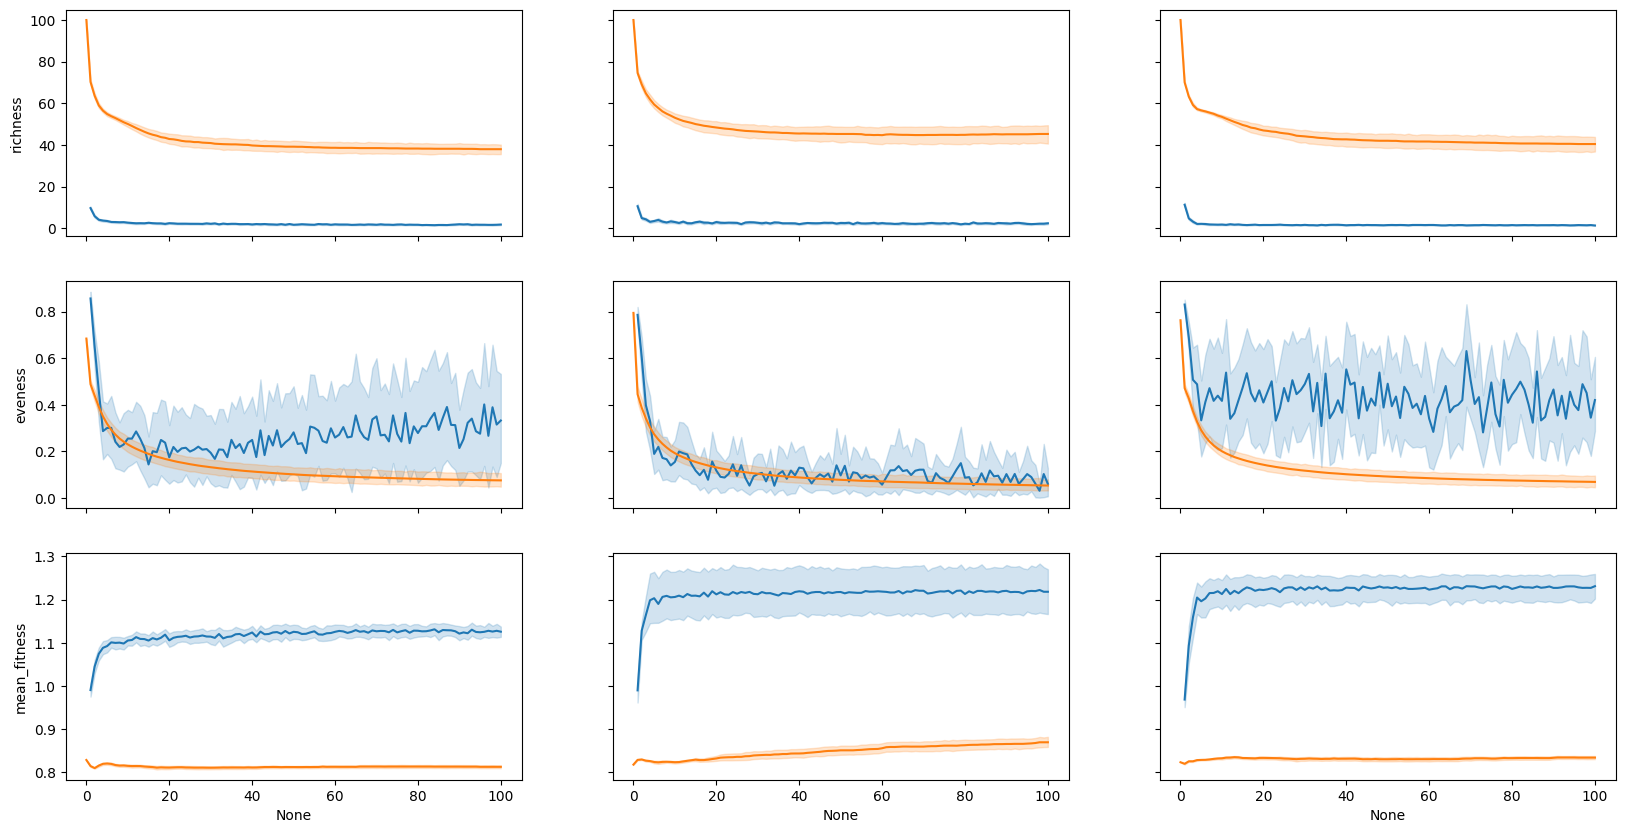

In [59]:
import pickle
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from project_package.generate_pop import SymPop
import seaborn as sns

dump_dir='../examples/'
i=0
fig, axes = plt.subplots(3, 3, figsize=(20, 10), sharex=True, sharey='row')
for test in ['toy_example1','toy_example1_high_mutation_rate','toy_example1_high_escape_rate']:

    with open(dump_dir+test+'.time_series_hostassociated.txt', 'rb') as handle:
      time_series_hostassociated=pickle.loads(handle.read())
    
    with open(dump_dir+test+'.time_series_freeliving.txt', 'rb') as handle:
      time_series_freeliving=pickle.loads(handle.read())
    
    df=pd.DataFrame()
    for trial in time_series_freeliving.keys():
    
        time_series_hostassociated[trial][0]=nx.Graph(abundance=0)
        df2=pd.DataFrame([[SymPop(G).eveness, SymPop(G).mean_fitness, SymPop(G).pop_size,SymPop(G).richness,'host-associated',str(trial)] for G in time_series_hostassociated[trial]],
                                columns=['eveness','mean_fitness','pop_size','richness','metapop','trial'])
        df=pd.concat([df, df2])
    
        if trial==0:
            continue
        df3=pd.DataFrame([[SymPop(G).eveness, SymPop(G).mean_fitness, SymPop(G).pop_size,SymPop(G).richness,'free-living',str(trial)] for G in time_series_freeliving[trial]],
                                columns=['eveness','mean_fitness','pop_size','richness','metapop','trial'])
        df=pd.concat([df, df3])
    
    sns.lineplot(ax=axes[0,i], data=df[(df.pop_size>0)],x=df[(df.pop_size>0)].index,y='richness',hue='metapop',legend=False)
    sns.lineplot(ax=axes[1,i], data=df[(df.pop_size>0) & ~(df.eveness.isna())],x=df[(df.pop_size>0) & ~(df.eveness.isna())].index,y='eveness',hue='metapop',legend=False)
    sns.lineplot(ax=axes[2,i], data=df[(df.pop_size>0)],x=df[(df.pop_size>0)].index,y='mean_fitness',hue='metapop',legend=False)
    i+=1
    
plt.savefig(dump_dir+'toy_example1'+".multiplot.svg", format='svg')

In [ ]:
import pickle
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from project_package.generate_pop import SymPop
import seaborn as sns

dump_dir='../examples/'
for test in ['toy_example','toy_example_high_mutationrate','toy_example_high_escaperate']:

    with open(dump_dir+test+'.time_series_hostassociated.txt', 'rb') as handle:
      time_series_hostassociated=pickle.loads(handle.read())
    
    with open(dump_dir+test+'.time_series_freeliving.txt', 'rb') as handle:
      time_series_freeliving=pickle.loads(handle.read())
    
    df=pd.DataFrame()
    for trial in time_series_freeliving.keys():
    
        time_series_hostassociated[trial][0]=nx.Graph(abundance=0)
        df2=pd.DataFrame([[SymPop(G).eveness, SymPop(G).mean_fitness, SymPop(G).pop_size,SymPop(G).richness,'host-associated',str(trial)] for G in time_series_hostassociated[trial]],
                                columns=['eveness','mean_fitness','pop_size','richness','metapop','trial'])
        df=pd.concat([df, df2])
    
        if trial==0:
            continue
        df3=pd.DataFrame([[SymPop(G).eveness, SymPop(G).mean_fitness, SymPop(G).pop_size,SymPop(G).richness,'free-living',str(trial)] for G in time_series_freeliving[trial]],
                                columns=['eveness','mean_fitness','pop_size','richness','metapop','trial'])
        df=pd.concat([df, df3])

    fig, ax = plt.subplots()
    
    for var in ['richness','mean_fitness']:
        plt.figure(figsize=(4,3))
        sns.lineplot(data=df[(df.pop_size>0)],x=df[(df.pop_size>0)].index,y=var,hue='metapop',legend=False)
        plt.savefig(dump_dir+test+'.'+var+".plot.svg", format='svg')
    
    
    plt.figure(figsize=(4,3))
    sns.lineplot(data=df[(df.pop_size>0) & ~(df.eveness.isna())],x=df[(df.pop_size>0) & ~(df.eveness.isna())].index,y=var,hue='metapop',legend=False)
    plt.savefig(dump_dir+test+'.'+var+".plot.svg", format='svg')

In [60]:
import pandas as pd
import sys
sys.path.append("/Users/maeva/Desktop/Modeling_trophosome/src/")
#sys.path.append("/home/qiulab/data/CRF_project/work/Modeling_trophosome/src/")

from project_package.generate_pop import generate_initial_pop_unlinked, generate_random_fisherlog_pop_unlinked,generate_random_fisherlog_pop_binomial_tree, SymPop
from project_package.update_pop import update_pop3
from project_package.run_model import run_generation_of_host_pop
from project_package.plot import visualize_pop
from project_package.simplify import merge_graphs

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing
from alive_progress import alive_bar

import time


# import seaborn as sns
%matplotlib inline
%reload_ext autoreload
%autoreload 2
# np.random.seed(666)

for myparams in [['toy_example1_high_escape_rate',1E-12,1E-1]]:

    test=myparams[0]
    
    ## init results objects    
    time_series_freeliving={}
    time_series_hostassociated={}
    
    ## params grow_and_steady
    mutation_rate=myparams[1]
    growth_factor=1.2
    steady_state_runtime=50
    max_runtime=np.inf
    pop_size_thr=1E6
    simplify=1
    verbose=0
    sampling_rate=1
    
    ## params run_host_pop_gen
    n_worms=1
    infection_sym_count=10
    tot_host_pop_gen=100
    escape_rate=myparams[2]
    n_trials=1
    cpus=4
    
    # init tree log-fisher
    init_pop_strains=100
    is_init_pop_log_fisher=True
    
    if is_init_pop_log_fisher==True:  
        freelivingG=generate_random_fisherlog_pop_unlinked(i=init_pop_strains) #n=individuals, i=strains
        freelivingG=nx.relabel_nodes(freelivingG, dict([[i,'0.0.'+str(i)] for i in range(init_pop_strains)]))
        
    ## init tree
    
    # fitnesses=[0.95,0.9] # allele_id:fitness
    # abundances=[300000000,700000000] # allele_id:abundance # total 1G cells
    # freelivingG=generate_initial_pop_unlinked(fitnesses,abundances)
    # freelivingG=nx.relabel_nodes(freelivingG, {0:'0.0.0',1:'0.0.1'})
    # time_series_freeliving[0]=freelivingG
    
    
    
    
    myparams=['## params grow_and_steady',
    'mutation_rate='+str(mutation_rate),
    'growth_factor='+str(growth_factor),
    'steady_state_runtime='+str(steady_state_runtime),
    'max_runtime='+str(max_runtime),
    'pop_size_thr='+str(pop_size_thr),
    'simplify='+str(simplify),
    'verbose='+str(verbose),
    'sampling_rate='+str(sampling_rate),
    '',
    '## params run_host_pop_gen',
    'n_worms='+str(n_worms),
    'infection_sym_count='+str(infection_sym_count),
    'tot_host_pop_gen='+str(tot_host_pop_gen),
    'escape_rate='+str(escape_rate),
    'n_trials='+str(n_trials),
    'cpus='+str(cpus),
    '',
    '## init tree',
    'init_pop_strains='+str(init_pop_strains),
    'is_init_pop_log_fisher='+str(is_init_pop_log_fisher)]
    
    
    print(SymPop(freelivingG).pop_size)
    time_series_freeliving[0]=freelivingG
    
    
    ###############################
    ## init results objects    
    time_series_freeliving={}
    time_series_hostassociated={}
    
    start_time=time.time()
    
    with alive_bar((tot_host_pop_gen+1) * n_trials ,force_tty=True) as bar:
        for trial in range(n_trials):
            host_pop_gen=0
            time_series_freeliving[trial]=[freelivingG]
            time_series_hostassociated[trial]=[nx.Graph()]
            myfreelivingG=freelivingG.copy()
        
            for host_pop_gen in range(1,tot_host_pop_gen+1):
            
                merged_Graph_hostassociated, merged_Graph_freeliving,RESULTS=run_generation_of_host_pop(myfreelivingG, n_worms, infection_sym_count,host_pop_gen,escape_rate,
                                     mutation_rate, steady_state_runtime,
                                     max_runtime, growth_factor=growth_factor,
                                     stop_when_fixed=True, pop_size_thr=pop_size_thr, simplify=simplify,
                                     verbose=verbose, t=0,sampling_rate=sampling_rate,nthreads=cpus)
                
                time_series_hostassociated[trial]+=[merged_Graph_hostassociated]
                time_series_freeliving[trial]+=[merged_Graph_freeliving]
                myfreelivingG=merged_Graph_freeliving
                
                bar() 
    print('finished')
    
    print('it took', time.time()-start_time, 'seconds')



3361
|                                        | ▃▅▇ 0/101 [0%] in 0s (~0s, 0.0/s) 

python(33053) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33054) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33055) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33056) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▍                                       | ▃▅▇ 1/101 [1%] in 2s (~2:50, 0.6/s) 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33057) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33058) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33059) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33060) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▍                                       | ▅▇▇ 1/101 [1%] in 2s (~3:01, 0.5/s) 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33061) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33062) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33063) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33064) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█▎                                      | █▆▄ 3/101 [3%] in 3s (~2:26, 0.8/s) 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33065) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33066) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33067) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33068) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█▋                                      | ▅▃▁ 4/101 [4%] in 4s (~1:57, 0.9/s) 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33069) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33070) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33071) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33072) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██                                      | ▂▂▄ 5/101 [5%] in 4s (~1:40, 1.0/s) 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33073) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33074) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33075) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33076) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▍                                     | ▃▅▇ 6/101 [6%] in 5s (~1:30, 1.1/s) 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33077) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33078) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33079) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33080) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▊                                     | ▆█▆ 7/101 [7%] in 6s (~1:23, 1.2/s) 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33081) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33082) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33083) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33084) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▏                                    | ▇▅▃ 8/101 [8%] in 6s (~1:18, 1.2/s) 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33085) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33086) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33087) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33088) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▋                                    | ▃▁▃ 9/101 [9%] in 7s (~1:15, 1.2/s) 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33089) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33090) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33091) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33092) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████                                    | ▂▄▆ 10/101 [10%] in 7s (~1:13, 1.3/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33093) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33094) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33095) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33096) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▍                                   | ▆█▆ 11/101 [11%] in 8s (~1:10, 1.3/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33097) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33098) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33099) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33100) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▊                                   | ▇▅▃ 12/101 [12%] in 9s (~1:09, 1.3/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33101) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33102) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33103) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33104) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████▏                                  | ▃▁▃ 13/101 [13%] in 10s (~1:07, 1.3/s

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33105) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33106) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33107) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33108) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████▌                                  | ▃▅▇ 14/101 [14%] in 10s (~1:06, 1.3/s

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33109) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33110) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33111) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33112) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████                                  | ▆█▆ 15/101 [15%] in 11s (~1:05, 1.3/s

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33113) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33114) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33115) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33116) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████▍                                 | ▆▄▂ 16/101 [16%] in 12s (~1:03, 1.4/s

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33118) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33119) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33120) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33121) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████▊                                 | ▂▂▄ 17/101 [17%] in 12s (~1:02, 1.4/s

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33122) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33123) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33124) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33125) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████▏                                | ▃▅▇ 18/101 [18%] in 13s (~1:01, 1.4/s

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33126) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33127) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33128) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33129) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████▌                                | ▇▇▅ 19/101 [19%] in 14s (~1:00, 1.4/s

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33130) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33131) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33132) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33133) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████▉                                | ▅▃▁ 20/101 [20%] in 14s (~59s, 1.4/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33134) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33135) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33136) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33137) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████▍                               | ▂▂▄ 21/101 [21%] in 15s (~58s, 1.4/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33138) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33139) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33140) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33141) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████▊                               | ▄▆█ 22/101 [22%] in 16s (~57s, 1.4/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33142) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33143) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33144) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33145) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████▏                              | ▇▅▃ 23/101 [23%] in 17s (~57s, 1.4/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33146) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33147) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33148) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33149) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████▌                              | ▂▂▄ 24/101 [24%] in 17s (~57s, 1.4/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33150) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33151) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33152) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33153) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████▉                              | ▅▇▇ 25/101 [25%] in 18s (~57s, 1.3/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33154) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33155) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33156) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33157) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████▎                             | ▇▅▃ 26/101 [26%] in 19s (~56s, 1.3/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33158) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33159) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33160) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33161) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████▊                             | ▃▁▃ 27/101 [27%] in 20s (~56s, 1.3/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33162) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33163) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33164) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33165) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████▏                            | ▃▅▇ 28/101 [28%] in 21s (~55s, 1.3/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33166) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33167) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33168) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33169) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████▌                            | █▆▄ 29/101 [29%] in 22s (~54s, 1.3/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33170) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33171) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33172) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33173) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████▉                            | ▁▃▅ 30/101 [30%] in 23s (~55s, 1.3/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33174) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33175) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33176) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33177) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▎                           | ▅▇▇ 31/101 [31%] in 24s (~54s, 1.3/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33178) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33179) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33180) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33181) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▋                           | ▇▅▃ 32/101 [32%] in 24s (~54s, 1.3/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33182) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33183) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33184) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33185) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▏                          | ▃▁▃ 33/101 [33%] in 25s (~53s, 1.3/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33186) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33187) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33188) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33189) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▌                          | ▃▅▇ 34/101 [34%] in 26s (~52s, 1.3/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33190) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33191) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33192) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33193) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▉                          | ▇▇▅ 35/101 [35%] in 27s (~51s, 1.3/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33194) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33195) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33196) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33197) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████▎                         | ▅▃▁ 36/101 [36%] in 27s (~50s, 1.3/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33198) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33199) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33200) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33201) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████▋                         | ▁▃▅ 37/101 [37%] in 28s (~50s, 1.3/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33202) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33203) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33204) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33205) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████                         | ▆█▆ 38/101 [38%] in 29s (~49s, 1.3/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33206) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33207) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33208) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33209) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████▌                        | ▆▄▂ 39/101 [39%] in 30s (~48s, 1.3/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33210) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33211) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33212) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33213) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████▉                        | ▂▂▄ 40/101 [40%] in 31s (~48s, 1.3/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33214) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33215) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33216) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33217) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▎                       | ▄▆█ 41/101 [41%] in 31s (~47s, 1.3/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33218) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33219) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33220) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33221) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▋                       | █▆▄ 42/101 [42%] in 32s (~46s, 1.3/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33222) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33223) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33224) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33225) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████                       | ▃▁▃ 43/101 [43%] in 33s (~45s, 1.3/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33226) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33227) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33228) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33229) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████▍                      | ▃▅▇ 44/101 [44%] in 34s (~45s, 1.3/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33230) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33231) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33232) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33233) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████▉                      | ▇▇▅ 45/101 [45%] in 35s (~44s, 1.3/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33234) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33235) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33236) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33237) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▎                     | ▅▃▁ 46/101 [46%] in 35s (~43s, 1.3/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33238) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33239) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33240) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33241) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▋                     | ▁▃▅ 47/101 [47%] in 36s (~42s, 1.3/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33242) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33243) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33244) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33245) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████                     | ▅▇▇ 48/101 [48%] in 37s (~41s, 1.3/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33246) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33247) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33248) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33249) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▍                    | ▆▄▂ 49/101 [49%] in 38s (~41s, 1.3/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33250) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33251) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33252) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33253) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▊                    | ▁▃▅ 50/101 [50%] in 39s (~40s, 1.3/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33254) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33255) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33256) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33257) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████▎                   | ▅▇▇ 51/101 [50%] in 40s (~39s, 1.3/s)

python(33258) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33259) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33260) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33261) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████▋                   | ▅▃▁ 52/101 [51%] in 41s (~39s, 1.3/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33262) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33263) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33264) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33265) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████                   | ▄▆█ 53/101 [52%] in 42s (~39s, 1.3/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33267) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33268) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33269) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33270) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████▍                  | ▆▄▂ 54/101 [53%] in 43s (~38s, 1.2/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33272) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33273) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33274) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33275) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████▊                  | ▂▄▆ 55/101 [54%] in 44s (~38s, 1.2/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33277) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33278) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33279) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33280) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▏                 | ▇▇▅ 56/101 [55%] in 45s (~37s, 1.2/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33282) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33283) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33284) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33285) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▋                 | ▃▁▃ 57/101 [56%] in 46s (~36s, 1.2/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33287) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33288) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33289) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33290) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████                 | ▆█▆ 58/101 [57%] in 48s (~36s, 1.2/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33291) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33292) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33293) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33294) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▍                | ▂▂▄ 59/101 [58%] in 49s (~36s, 1.2/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33297) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33298) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33299) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33300) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▊                | ▇▇▅ 60/101 [59%] in 51s (~35s, 1.2/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33302) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33303) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33304) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33305) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████▏               | ▄▂▂ 61/101 [60%] in 52s (~35s, 1.2/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33307) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33308) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33309) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33310) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████▌               | ▅▇▇ 62/101 [61%] in 53s (~34s, 1.2/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33311) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33312) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33313) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33314) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████               | ▄▂▂ 63/101 [62%] in 55s (~33s, 1.2/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33315) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33316) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33317) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33318) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████▍              | ▇▇▅ 64/101 [63%] in 56s (~33s, 1.1/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33320) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33321) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33322) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33323) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████▊              | ▂▂▄ 65/101 [64%] in 58s (~33s, 1.1/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33327) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33328) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33329) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33330) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▏             | █▆▄ 66/101 [65%] in 59s (~32s, 1.1/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33331) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33332) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33333) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33334) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▌             | ▃▅▇ 67/101 [66%] in 1:01 (~32s, 1.1/s

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33337) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33338) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33339) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33340) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▉             | ▇▅▃ 68/101 [67%] in 1:02 (~31s, 1.1/s

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33342) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33343) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33344) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33345) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▍            | ▁▃▅ 69/101 [68%] in 1:04 (~30s, 1.1/s

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33346) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33347) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33348) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33349) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▊            | ▆█▆ 70/101 [69%] in 1:05 (~29s, 1.1/s

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33350) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33351) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33352) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33353) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▏           | ▄▂▂ 71/101 [70%] in 1:06 (~28s, 1.1/s

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33354) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33355) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33356) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33357) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▌           | ▄▆█ 72/101 [71%] in 1:07 (~28s, 1.1/s

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33358) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33359) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33360) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33361) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▉           | ▇▅▃ 73/101 [72%] in 1:08 (~27s, 1.1/s

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33362) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33363) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33364) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33365) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████▎          | ▂▄▆ 74/101 [73%] in 1:10 (~26s, 1.1/s

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33367) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33368) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33369) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33370) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████▊          | █▆▄ 75/101 [74%] in 1:11 (~25s, 1.1/s

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33371) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33372) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33373) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33374) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████▏         | ▂▂▄ 76/101 [75%] in 1:12 (~24s, 1.1/s

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33375) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33376) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33377) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33378) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████▌         | ▅▇▇ 77/101 [76%] in 1:13 (~23s, 1.0/s

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33379) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33380) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33381) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33382) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████▉         | ▅▃▁ 78/101 [77%] in 1:14 (~22s, 1.0/s

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33383) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33384) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33385) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33386) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▎        | ▂▄▆ 79/101 [78%] in 1:15 (~22s, 1.0/s

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33387) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33388) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33389) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33390) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▋        | █▆▄ 80/101 [79%] in 1:17 (~21s, 1.0/s

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33392) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33393) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33394) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33395) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▏       | ▂▂▄ 81/101 [80%] in 1:18 (~20s, 1.0/s

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33397) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33398) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33399) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33400) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▏       | ▇▇▅ 81/101 [80%] in 1:19 (~19s, 1.0/s

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33402) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33403) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33404) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33405) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▉       | ▃▁▃ 83/101 [82%] in 1:20 (~18s, 1.0/s

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33406) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33407) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33408) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33409) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▎      | ▄▆█ 84/101 [83%] in 1:22 (~17s, 1.0/s

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33410) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33411) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33412) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33413) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▋      | ▆▄▂ 85/101 [84%] in 1:23 (~16s, 1.0/s

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33414) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33415) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33416) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33417) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████      | ▁▃▅ 86/101 [85%] in 1:24 (~15s, 1.0/s

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33418) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33419) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33420) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33421) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▌     | ▇▇▅ 87/101 [86%] in 1:25 (~14s, 1.0/s

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33422) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33423) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33424) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33425) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▉     | ▂▂▄ 88/101 [87%] in 1:26 (~13s, 1.0/s

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33427) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33428) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33429) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33430) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▎    | ▅▇▇ 89/101 [88%] in 1:28 (~12s, 1.0/s

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33431) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33432) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33433) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33434) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▋    | ▅▃▁ 90/101 [89%] in 1:29 (~11s, 1.0/s

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33435) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33436) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33437) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33438) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████    | ▂▄▆ 91/101 [90%] in 1:30 (~10s, 1.0/s

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33439) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33440) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33441) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33442) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▍   | █▆▄ 92/101 [91%] in 1:31 (~9s, 1.0/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33443) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33444) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33445) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33446) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▉   | ▃▁▃ 93/101 [92%] in 1:32 (~8s, 1.0/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33447) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33448) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33449) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33450) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▎  | ▄▆█ 94/101 [93%] in 1:33 (~7s, 1.0/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33451) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33452) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33453) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33454) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▋  | ▆▄▂ 95/101 [94%] in 1:34 (~6s, 1.0/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33455) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33456) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33457) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33458) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████  | ▂▄▆ 96/101 [95%] in 1:36 (~6s, 1.0/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33459) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33460) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33461) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33462) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▍ | ▇▇▅ 97/101 [96%] in 1:37 (~5s, 1.0/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33463) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33464) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33465) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33466) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▊ | ▃▁▃ 98/101 [97%] in 1:38 (~4s, 1.0/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33468) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33469) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33470) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33471) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▊ | ▄▆█ 98/101 [97%] in 1:39 (~3s, 1.0/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33472) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33473) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33474) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33475) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████▋⚠︎ (!) 100/101 [99%] in 1:40.3 (0.99/s) 
finished
it took 100.31964683532715 seconds
1


/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


In [136]:
dump_dir='../examples/'
test='toy_example_high_mutationrate'

with open(dump_dir+test+'.time_series_hostassociated.txt', 'rb') as handle:
  time_series_hostassociated=pickle.loads(handle.read())

with open(dump_dir+test+'.time_series_freeliving.txt', 'rb') as handle:
  time_series_freeliving=pickle.loads(handle.read())

df=pd.DataFrame()
for trial in time_series_freeliving.keys():

    time_series_hostassociated[trial][0]=nx.Graph(abundance=0)
    df2=pd.DataFrame([[SymPop(G).eveness, SymPop(G).mean_fitness, SymPop(G).pop_size,SymPop(G).richness,'host-associated',str(trial)] for G in time_series_hostassociated[trial]],
                            columns=['eveness','mean_fitness','pop_size','richness','metapop','trial'])
    df=pd.concat([df, df2])

    if trial==0:
        continue
    df3=pd.DataFrame([[SymPop(G).eveness, SymPop(G).mean_fitness, SymPop(G).pop_size,SymPop(G).richness,'free-living',str(trial)] for G in time_series_freeliving[trial]],
                            columns=['eveness','mean_fitness','pop_size','richness','metapop','trial'])
    df=pd.concat([df, df3])

/Users/maeva/miniconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/maeva/miniconda3/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: divide by zero encountered in log
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


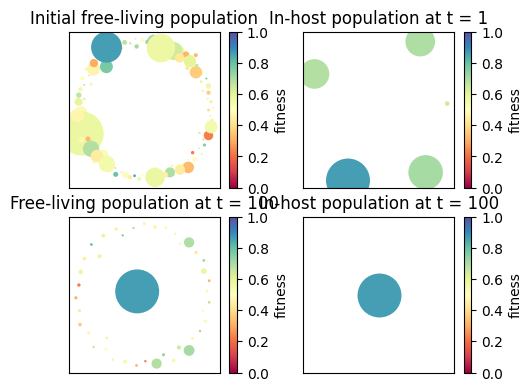

In [143]:
%matplotlib inline
# %reload_ext autoreload
# %autoreload 2



fig, axes = plt.subplots(2, 2, figsize=(5, 4), sharex=True, sharey='row')
fig.tight_layout() 
#at t=1
plt.subplot(2, 2, 1)
visualize_pop(time_series_freeliving[0][0],view_node_labels=False, view_edge_labels=False, replace_title='Initial free-living population')
plt.subplot(2, 2, 2)
visualize_pop(time_series_hostassociated[0][1],view_node_labels=False,view_edge_labels=False, replace_title='In-host population at t = 1')
plt.subplot(2, 2, 3)
visualize_pop(time_series_freeliving[0][100],view_node_labels=False, view_edge_labels=False, replace_title='Free-living population at t = 100')
plt.subplot(2, 2, 4)
visualize_pop(time_series_hostassociated[0][100],view_node_labels=False, view_edge_labels=False, replace_title='In-host population at t = 100')

plt.savefig(dump_dir+test+".visualize_pop.plot.svg", format='svg')